In [6]:
import keras
from keras.models import Model
from keras.layers import Dense, Input, Lambda
from keras.optimizers import Adam
import keras.backend as K
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pydot
from IPython.display import SVG

In [68]:
# and data and or data
X = np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,0], #and
              [0,0,1],[0,1,1],[1,0,1],[1,1,1]]) #or
Y = np.array([0,0,0,1, #and
              0,1,1,1]) #or
Y = keras.utils.to_categorical(Y, 2)
print(X.shape, Y.shape)
print(X)
print(Y)

(8, 3) (8, 2)
[[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]


In [69]:
# input layer
inputs = Input(shape=X.shape[1:],name="input")

## with def

In [9]:
# and layers and or layers
def andGate(inputs):
    andDense = Dense(16, activation="relu", name="and1")(inputs)
    andDense = Dense(32, activation="relu", name="and2")(andDense) 
    return andDense
def orGate(inputs):
    orDense = Dense(32, activation="sigmoid", name="or1")(inputs)     
    return orDense

In [10]:
# switch cases for and and or
x_switch = Lambda(lambda x: K.switch(x[:,2]<1,
                                     andGate(x[:,:2]),
                                     orGate(x[:,:2])),
                  output_shape=(32,))(inputs)

In [11]:
# output layer
outputs = Dense(2, activation="softmax", name="softmax")(x_switch)

In [12]:
model = Model(inputs, outputs)

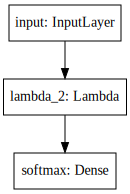

In [13]:
# display the mixture of experts model diagram
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3)                 0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 32)                0         
_________________________________________________________________
softmax (Dense)              (None, 2)                 66        
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X, Y,
          batch_size=4,
          epochs=20000,
          shuffle=True)

Epoch 1/20000
8/8 [==============================] - 0s 42ms/step - loss: 0.9142 - acc: 0.5000
Epoch 2/20000
8/8 [==============================] - 0s 618us/step - loss: 0.9059 - acc: 0.3750
Epoch 3/20000
8/8 [==============================] - 0s 577us/step - loss: 0.8915 - acc: 0.3750
Epoch 4/20000
8/8 [==============================] - 0s 457us/step - loss: 0.8834 - acc: 0.3750
Epoch 5/20000
8/8 [==============================] - 0s 479us/step - loss: 0.8706 - acc: 0.3750
Epoch 6/20000
8/8 [==============================] - 0s 533us/step - loss: 0.8613 - acc: 0.2500
Epoch 7/20000
8/8 [==============================] - 0s 516us/step - loss: 0.8449 - acc: 0.2500
Epoch 8/20000
8/8 [==============================] - 0s 598us/step - loss: 0.8354 - acc: 0.2500
Epoch 9/20000
8/8 [==============================] - 0s 542us/step - loss: 0.8320 - acc: 0.2500
Epoch 10/20000
8/8 [==============================] - 0s 540us/step - loss: 0.8179 - acc: 0.2500
Epoch 11/20000
8/8 [====================

8/8 [==============================] - 0s 616us/step - loss: 0.6504 - acc: 0.6250
Epoch 85/20000
8/8 [==============================] - 0s 513us/step - loss: 0.6502 - acc: 0.6250
Epoch 86/20000
8/8 [==============================] - 0s 559us/step - loss: 0.6495 - acc: 0.6250
Epoch 87/20000
8/8 [==============================] - 0s 731us/step - loss: 0.6498 - acc: 0.6250
Epoch 88/20000
8/8 [==============================] - 0s 496us/step - loss: 0.6486 - acc: 0.6250
Epoch 89/20000
8/8 [==============================] - 0s 562us/step - loss: 0.6481 - acc: 0.6250
Epoch 90/20000
8/8 [==============================] - 0s 556us/step - loss: 0.6477 - acc: 0.6250
Epoch 91/20000
8/8 [==============================] - 0s 665us/step - loss: 0.6473 - acc: 0.6250
Epoch 92/20000
8/8 [==============================] - 0s 507us/step - loss: 0.6468 - acc: 0.6250
Epoch 93/20000
8/8 [==============================] - 0s 479us/step - loss: 0.6463 - acc: 0.6250
Epoch 94/20000
8/8 [=========================

8/8 [==============================] - 0s 595us/step - loss: 0.6168 - acc: 0.7500
Epoch 168/20000
8/8 [==============================] - 0s 529us/step - loss: 0.6164 - acc: 0.7500
Epoch 169/20000
8/8 [==============================] - 0s 707us/step - loss: 0.6161 - acc: 0.7500
Epoch 170/20000
8/8 [==============================] - 0s 610us/step - loss: 0.6158 - acc: 0.7500
Epoch 171/20000
8/8 [==============================] - 0s 667us/step - loss: 0.6156 - acc: 0.7500
Epoch 172/20000
8/8 [==============================] - 0s 768us/step - loss: 0.6148 - acc: 0.7500
Epoch 173/20000
8/8 [==============================] - 0s 678us/step - loss: 0.6148 - acc: 0.7500
Epoch 174/20000
8/8 [==============================] - 0s 674us/step - loss: 0.6141 - acc: 0.7500
Epoch 175/20000
8/8 [==============================] - 0s 862us/step - loss: 0.6137 - acc: 0.7500
Epoch 176/20000
8/8 [==============================] - 0s 747us/step - loss: 0.6134 - acc: 0.7500
Epoch 177/20000
8/8 [===============

Epoch 250/20000
8/8 [==============================] - 0s 402us/step - loss: 0.5887 - acc: 0.8750
Epoch 251/20000
8/8 [==============================] - 0s 703us/step - loss: 0.5884 - acc: 0.8750
Epoch 252/20000
8/8 [==============================] - 0s 479us/step - loss: 0.5884 - acc: 0.8750
Epoch 253/20000
8/8 [==============================] - 0s 438us/step - loss: 0.5880 - acc: 0.8750
Epoch 254/20000
8/8 [==============================] - 0s 514us/step - loss: 0.5878 - acc: 0.8750
Epoch 255/20000
8/8 [==============================] - 0s 447us/step - loss: 0.5872 - acc: 0.8750
Epoch 256/20000
8/8 [==============================] - 0s 585us/step - loss: 0.5869 - acc: 0.8750
Epoch 257/20000
8/8 [==============================] - 0s 551us/step - loss: 0.5868 - acc: 0.8750
Epoch 258/20000
8/8 [==============================] - 0s 571us/step - loss: 0.5862 - acc: 0.8750
Epoch 259/20000
8/8 [==============================] - 0s 498us/step - loss: 0.5859 - acc: 0.8750
Epoch 260/20000
8/8 

8/8 [==============================] - 0s 621us/step - loss: 0.5645 - acc: 0.8750
Epoch 333/20000
8/8 [==============================] - 0s 567us/step - loss: 0.5643 - acc: 0.8750
Epoch 334/20000
8/8 [==============================] - 0s 585us/step - loss: 0.5639 - acc: 0.8750
Epoch 335/20000
8/8 [==============================] - 0s 581us/step - loss: 0.5640 - acc: 0.8750
Epoch 336/20000
8/8 [==============================] - 0s 580us/step - loss: 0.5634 - acc: 0.8750
Epoch 337/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5633 - acc: 0.8750
Epoch 338/20000
8/8 [==============================] - 0s 559us/step - loss: 0.5628 - acc: 0.8750
Epoch 339/20000
8/8 [==============================] - 0s 489us/step - loss: 0.5628 - acc: 0.8750
Epoch 340/20000
8/8 [==============================] - 0s 576us/step - loss: 0.5622 - acc: 0.8750
Epoch 341/20000
8/8 [==============================] - 0s 510us/step - loss: 0.5620 - acc: 0.8750
Epoch 342/20000
8/8 [===============

Epoch 415/20000
8/8 [==============================] - 0s 464us/step - loss: 0.5427 - acc: 0.8750
Epoch 416/20000
8/8 [==============================] - 0s 475us/step - loss: 0.5424 - acc: 0.8750
Epoch 417/20000
8/8 [==============================] - 0s 466us/step - loss: 0.5425 - acc: 0.8750
Epoch 418/20000
8/8 [==============================] - 0s 500us/step - loss: 0.5419 - acc: 0.8750
Epoch 419/20000
8/8 [==============================] - 0s 575us/step - loss: 0.5417 - acc: 0.8750
Epoch 420/20000
8/8 [==============================] - 0s 457us/step - loss: 0.5414 - acc: 0.8750
Epoch 421/20000
8/8 [==============================] - 0s 536us/step - loss: 0.5413 - acc: 0.8750
Epoch 422/20000
8/8 [==============================] - 0s 558us/step - loss: 0.5410 - acc: 0.8750
Epoch 423/20000
8/8 [==============================] - ETA: 0s - loss: 0.4464 - acc: 1.000 - 0s 591us/step - loss: 0.5409 - acc: 0.8750
Epoch 424/20000
8/8 [==============================] - 0s 731us/step - loss: 0.5

8/8 [==============================] - 0s 555us/step - loss: 0.5229 - acc: 0.8750
Epoch 498/20000
8/8 [==============================] - 0s 635us/step - loss: 0.5227 - acc: 0.8750
Epoch 499/20000
8/8 [==============================] - 0s 620us/step - loss: 0.5227 - acc: 0.8750
Epoch 500/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5229 - acc: 0.8750
Epoch 501/20000
8/8 [==============================] - 0s 484us/step - loss: 0.5220 - acc: 0.8750
Epoch 502/20000
8/8 [==============================] - 0s 542us/step - loss: 0.5220 - acc: 0.8750
Epoch 503/20000
8/8 [==============================] - 0s 606us/step - loss: 0.5219 - acc: 0.8750
Epoch 504/20000
8/8 [==============================] - 0s 566us/step - loss: 0.5215 - acc: 0.8750
Epoch 505/20000
8/8 [==============================] - 0s 548us/step - loss: 0.5210 - acc: 0.8750
Epoch 506/20000
8/8 [==============================] - 0s 559us/step - loss: 0.5208 - acc: 0.8750
Epoch 507/20000
8/8 [===============

8/8 [==============================] - 0s 570us/step - loss: 0.5048 - acc: 0.8750
Epoch 580/20000
8/8 [==============================] - 0s 684us/step - loss: 0.5048 - acc: 0.8750
Epoch 581/20000
8/8 [==============================] - 0s 656us/step - loss: 0.5043 - acc: 0.8750
Epoch 582/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5044 - acc: 0.8750
Epoch 583/20000
8/8 [==============================] - 0s 549us/step - loss: 0.5041 - acc: 0.8750
Epoch 584/20000
8/8 [==============================] - 0s 648us/step - loss: 0.5039 - acc: 0.8750
Epoch 585/20000
8/8 [==============================] - 0s 517us/step - loss: 0.5038 - acc: 0.8750
Epoch 586/20000
8/8 [==============================] - 0s 484us/step - loss: 0.5032 - acc: 0.8750
Epoch 587/20000
8/8 [==============================] - 0s 554us/step - loss: 0.5033 - acc: 0.8750
Epoch 588/20000
8/8 [==============================] - 0s 480us/step - loss: 0.5027 - acc: 0.8750
Epoch 589/20000
8/8 [===============

8/8 [==============================] - 0s 567us/step - loss: 0.4878 - acc: 0.8750
Epoch 662/20000
8/8 [==============================] - 0s 619us/step - loss: 0.4878 - acc: 0.8750
Epoch 663/20000
8/8 [==============================] - 0s 498us/step - loss: 0.4874 - acc: 0.8750
Epoch 664/20000
8/8 [==============================] - 0s 463us/step - loss: 0.4873 - acc: 0.8750
Epoch 665/20000
8/8 [==============================] - ETA: 0s - loss: 0.3529 - acc: 1.000 - 0s 524us/step - loss: 0.4870 - acc: 0.8750
Epoch 666/20000
8/8 [==============================] - 0s 536us/step - loss: 0.4869 - acc: 0.8750
Epoch 667/20000
8/8 [==============================] - 0s 543us/step - loss: 0.4867 - acc: 0.8750
Epoch 668/20000
8/8 [==============================] - 0s 611us/step - loss: 0.4866 - acc: 0.8750
Epoch 669/20000
8/8 [==============================] - 0s 528us/step - loss: 0.4863 - acc: 0.8750
Epoch 670/20000
8/8 [==============================] - 0s 616us/step - loss: 0.4863 - acc: 0.875

8/8 [==============================] - 0s 839us/step - loss: 0.4722 - acc: 0.8750
Epoch 744/20000
8/8 [==============================] - 0s 438us/step - loss: 0.4719 - acc: 0.8750
Epoch 745/20000
8/8 [==============================] - 0s 563us/step - loss: 0.4718 - acc: 0.8750
Epoch 746/20000
8/8 [==============================] - 0s 561us/step - loss: 0.4716 - acc: 0.8750
Epoch 747/20000
8/8 [==============================] - 0s 631us/step - loss: 0.4714 - acc: 0.8750
Epoch 748/20000
8/8 [==============================] - 0s 608us/step - loss: 0.4714 - acc: 0.8750
Epoch 749/20000
8/8 [==============================] - 0s 721us/step - loss: 0.4710 - acc: 0.8750
Epoch 750/20000
8/8 [==============================] - 0s 641us/step - loss: 0.4709 - acc: 0.8750
Epoch 751/20000
8/8 [==============================] - 0s 519us/step - loss: 0.4706 - acc: 0.8750
Epoch 752/20000
8/8 [==============================] - 0s 484us/step - loss: 0.4704 - acc: 0.8750
Epoch 753/20000
8/8 [===============

8/8 [==============================] - 0s 519us/step - loss: 0.4574 - acc: 0.8750
Epoch 827/20000
8/8 [==============================] - 0s 562us/step - loss: 0.4571 - acc: 0.8750
Epoch 828/20000
8/8 [==============================] - 0s 515us/step - loss: 0.4570 - acc: 0.8750
Epoch 829/20000
8/8 [==============================] - 0s 483us/step - loss: 0.4568 - acc: 0.8750
Epoch 830/20000
8/8 [==============================] - 0s 500us/step - loss: 0.4570 - acc: 0.8750
Epoch 831/20000
8/8 [==============================] - 0s 595us/step - loss: 0.4564 - acc: 0.8750
Epoch 832/20000
8/8 [==============================] - 0s 646us/step - loss: 0.4563 - acc: 0.8750
Epoch 833/20000
8/8 [==============================] - 0s 608us/step - loss: 0.4560 - acc: 0.8750
Epoch 834/20000
8/8 [==============================] - 0s 562us/step - loss: 0.4560 - acc: 0.8750
Epoch 835/20000
8/8 [==============================] - 0s 629us/step - loss: 0.4558 - acc: 0.8750
Epoch 836/20000
8/8 [===============

8/8 [==============================] - 0s 609us/step - loss: 0.4437 - acc: 0.8750
Epoch 908/20000
8/8 [==============================] - 0s 622us/step - loss: 0.4436 - acc: 0.8750
Epoch 909/20000
8/8 [==============================] - 0s 572us/step - loss: 0.4437 - acc: 0.8750
Epoch 910/20000
8/8 [==============================] - 0s 471us/step - loss: 0.4433 - acc: 0.8750
Epoch 911/20000
8/8 [==============================] - 0s 649us/step - loss: 0.4431 - acc: 0.8750
Epoch 912/20000
8/8 [==============================] - 0s 715us/step - loss: 0.4429 - acc: 0.8750
Epoch 913/20000
8/8 [==============================] - 0s 672us/step - loss: 0.4430 - acc: 0.8750
Epoch 914/20000
8/8 [==============================] - 0s 700us/step - loss: 0.4426 - acc: 0.8750
Epoch 915/20000
8/8 [==============================] - 0s 480us/step - loss: 0.4425 - acc: 0.8750
Epoch 916/20000
8/8 [==============================] - 0s 533us/step - loss: 0.4425 - acc: 0.8750
Epoch 917/20000
8/8 [===============

8/8 [==============================] - 0s 683us/step - loss: 0.4307 - acc: 0.8750
Epoch 991/20000
8/8 [==============================] - 0s 825us/step - loss: 0.4305 - acc: 0.8750
Epoch 992/20000
8/8 [==============================] - 0s 702us/step - loss: 0.4307 - acc: 0.8750
Epoch 993/20000
8/8 [==============================] - 0s 572us/step - loss: 0.4304 - acc: 0.8750
Epoch 994/20000
8/8 [==============================] - ETA: 0s - loss: 0.5839 - acc: 0.750 - 0s 774us/step - loss: 0.4301 - acc: 0.8750
Epoch 995/20000
8/8 [==============================] - 0s 562us/step - loss: 0.4299 - acc: 0.8750
Epoch 996/20000
8/8 [==============================] - 0s 680us/step - loss: 0.4299 - acc: 0.8750
Epoch 997/20000
8/8 [==============================] - 0s 519us/step - loss: 0.4296 - acc: 0.8750
Epoch 998/20000
8/8 [==============================] - 0s 565us/step - loss: 0.4297 - acc: 0.8750
Epoch 999/20000
8/8 [==============================] - 0s 604us/step - loss: 0.4294 - acc: 0.875

8/8 [==============================] - 0s 440us/step - loss: 0.4187 - acc: 0.8750
Epoch 1072/20000
8/8 [==============================] - 0s 479us/step - loss: 0.4186 - acc: 0.8750
Epoch 1073/20000
8/8 [==============================] - 0s 541us/step - loss: 0.4184 - acc: 0.8750
Epoch 1074/20000
8/8 [==============================] - 0s 788us/step - loss: 0.4184 - acc: 0.8750
Epoch 1075/20000
8/8 [==============================] - 0s 641us/step - loss: 0.4184 - acc: 0.8750
Epoch 1076/20000
8/8 [==============================] - 0s 638us/step - loss: 0.4180 - acc: 0.8750
Epoch 1077/20000
8/8 [==============================] - 0s 628us/step - loss: 0.4181 - acc: 0.8750
Epoch 1078/20000
8/8 [==============================] - 0s 654us/step - loss: 0.4177 - acc: 0.8750
Epoch 1079/20000
8/8 [==============================] - 0s 555us/step - loss: 0.4176 - acc: 0.8750
Epoch 1080/20000
8/8 [==============================] - 0s 558us/step - loss: 0.4174 - acc: 0.8750
Epoch 1081/20000
8/8 [=====

8/8 [==============================] - 0s 738us/step - loss: 0.4072 - acc: 0.8750
Epoch 1154/20000
8/8 [==============================] - 0s 671us/step - loss: 0.4071 - acc: 0.8750
Epoch 1155/20000
8/8 [==============================] - 0s 582us/step - loss: 0.4071 - acc: 0.8750
Epoch 1156/20000
8/8 [==============================] - 0s 525us/step - loss: 0.4071 - acc: 0.8750
Epoch 1157/20000
8/8 [==============================] - 0s 576us/step - loss: 0.4066 - acc: 0.8750
Epoch 1158/20000
8/8 [==============================] - 0s 571us/step - loss: 0.4065 - acc: 0.8750
Epoch 1159/20000
8/8 [==============================] - ETA: 0s - loss: 0.5005 - acc: 0.750 - 0s 470us/step - loss: 0.4066 - acc: 0.8750
Epoch 1160/20000
8/8 [==============================] - 0s 627us/step - loss: 0.4062 - acc: 0.8750
Epoch 1161/20000
8/8 [==============================] - 0s 578us/step - loss: 0.4063 - acc: 0.8750
Epoch 1162/20000
8/8 [==============================] - 0s 698us/step - loss: 0.4060 - a

8/8 [==============================] - 0s 746us/step - loss: 0.3965 - acc: 0.8750
Epoch 1235/20000
8/8 [==============================] - 0s 675us/step - loss: 0.3967 - acc: 0.8750
Epoch 1236/20000
8/8 [==============================] - 0s 555us/step - loss: 0.3967 - acc: 0.8750
Epoch 1237/20000
8/8 [==============================] - 0s 597us/step - loss: 0.3963 - acc: 0.8750
Epoch 1238/20000
8/8 [==============================] - 0s 535us/step - loss: 0.3959 - acc: 0.8750
Epoch 1239/20000
8/8 [==============================] - 0s 521us/step - loss: 0.3957 - acc: 0.8750
Epoch 1240/20000
8/8 [==============================] - 0s 508us/step - loss: 0.3955 - acc: 0.8750
Epoch 1241/20000
8/8 [==============================] - 0s 595us/step - loss: 0.3954 - acc: 0.8750
Epoch 1242/20000
8/8 [==============================] - 0s 559us/step - loss: 0.3956 - acc: 0.8750
Epoch 1243/20000
8/8 [==============================] - 0s 726us/step - loss: 0.3952 - acc: 0.8750
Epoch 1244/20000
8/8 [=====

8/8 [==============================] - 0s 531us/step - loss: 0.3861 - acc: 0.8750
Epoch 1316/20000
8/8 [==============================] - 0s 604us/step - loss: 0.3860 - acc: 0.8750
Epoch 1317/20000
8/8 [==============================] - 0s 628us/step - loss: 0.3859 - acc: 0.8750
Epoch 1318/20000
8/8 [==============================] - 0s 603us/step - loss: 0.3859 - acc: 0.8750
Epoch 1319/20000
8/8 [==============================] - 0s 585us/step - loss: 0.3857 - acc: 0.8750
Epoch 1320/20000
8/8 [==============================] - 0s 673us/step - loss: 0.3855 - acc: 0.8750
Epoch 1321/20000
8/8 [==============================] - 0s 564us/step - loss: 0.3855 - acc: 0.8750
Epoch 1322/20000
8/8 [==============================] - 0s 476us/step - loss: 0.3853 - acc: 0.8750
Epoch 1323/20000
8/8 [==============================] - 0s 546us/step - loss: 0.3851 - acc: 0.8750
Epoch 1324/20000
8/8 [==============================] - 0s 539us/step - loss: 0.3854 - acc: 0.8750
Epoch 1325/20000
8/8 [=====

8/8 [==============================] - 0s 500us/step - loss: 0.3766 - acc: 0.8750
Epoch 1397/20000
8/8 [==============================] - 0s 563us/step - loss: 0.3765 - acc: 0.8750
Epoch 1398/20000
8/8 [==============================] - 0s 579us/step - loss: 0.3764 - acc: 0.8750
Epoch 1399/20000
8/8 [==============================] - 0s 583us/step - loss: 0.3761 - acc: 0.8750
Epoch 1400/20000
8/8 [==============================] - 0s 657us/step - loss: 0.3760 - acc: 0.8750
Epoch 1401/20000
8/8 [==============================] - 0s 599us/step - loss: 0.3760 - acc: 0.8750
Epoch 1402/20000
8/8 [==============================] - 0s 589us/step - loss: 0.3758 - acc: 0.8750
Epoch 1403/20000
8/8 [==============================] - 0s 630us/step - loss: 0.3757 - acc: 0.8750
Epoch 1404/20000
8/8 [==============================] - 0s 575us/step - loss: 0.3757 - acc: 0.8750
Epoch 1405/20000
8/8 [==============================] - 0s 471us/step - loss: 0.3756 - acc: 0.8750
Epoch 1406/20000
8/8 [=====

8/8 [==============================] - 0s 466us/step - loss: 0.3672 - acc: 0.8750
Epoch 1479/20000
8/8 [==============================] - 0s 632us/step - loss: 0.3672 - acc: 0.8750
Epoch 1480/20000
8/8 [==============================] - 0s 588us/step - loss: 0.3669 - acc: 0.8750
Epoch 1481/20000
8/8 [==============================] - 0s 569us/step - loss: 0.3671 - acc: 0.8750
Epoch 1482/20000
8/8 [==============================] - 0s 615us/step - loss: 0.3668 - acc: 0.8750
Epoch 1483/20000
8/8 [==============================] - 0s 784us/step - loss: 0.3667 - acc: 0.8750
Epoch 1484/20000
8/8 [==============================] - 0s 594us/step - loss: 0.3668 - acc: 0.8750
Epoch 1485/20000
8/8 [==============================] - 0s 582us/step - loss: 0.3664 - acc: 0.8750
Epoch 1486/20000
8/8 [==============================] - 0s 557us/step - loss: 0.3663 - acc: 0.8750
Epoch 1487/20000
8/8 [==============================] - 0s 606us/step - loss: 0.3662 - acc: 0.8750
Epoch 1488/20000
8/8 [=====

8/8 [==============================] - 0s 514us/step - loss: 0.3583 - acc: 0.8750
Epoch 1561/20000
8/8 [==============================] - ETA: 0s - loss: 0.2696 - acc: 1.000 - 0s 664us/step - loss: 0.3583 - acc: 0.8750
Epoch 1562/20000
8/8 [==============================] - 0s 567us/step - loss: 0.3580 - acc: 0.8750
Epoch 1563/20000
8/8 [==============================] - 0s 570us/step - loss: 0.3579 - acc: 0.8750
Epoch 1564/20000
8/8 [==============================] - 0s 613us/step - loss: 0.3580 - acc: 0.8750
Epoch 1565/20000
8/8 [==============================] - 0s 671us/step - loss: 0.3581 - acc: 0.8750
Epoch 1566/20000
8/8 [==============================] - 0s 616us/step - loss: 0.3576 - acc: 0.8750
Epoch 1567/20000
8/8 [==============================] - 0s 720us/step - loss: 0.3577 - acc: 0.8750
Epoch 1568/20000
8/8 [==============================] - 0s 556us/step - loss: 0.3576 - acc: 0.8750
Epoch 1569/20000
8/8 [==============================] - 0s 610us/step - loss: 0.3574 - a

8/8 [==============================] - 0s 621us/step - loss: 0.3502 - acc: 0.8750
Epoch 1641/20000
8/8 [==============================] - 0s 692us/step - loss: 0.3501 - acc: 0.8750
Epoch 1642/20000
8/8 [==============================] - 0s 597us/step - loss: 0.3497 - acc: 0.8750
Epoch 1643/20000
8/8 [==============================] - 0s 574us/step - loss: 0.3497 - acc: 0.8750
Epoch 1644/20000
8/8 [==============================] - 0s 538us/step - loss: 0.3497 - acc: 0.8750
Epoch 1645/20000
8/8 [==============================] - 0s 637us/step - loss: 0.3496 - acc: 0.8750
Epoch 1646/20000
8/8 [==============================] - 0s 560us/step - loss: 0.3494 - acc: 0.8750
Epoch 1647/20000
8/8 [==============================] - ETA: 0s - loss: 0.2537 - acc: 1.000 - 0s 500us/step - loss: 0.3492 - acc: 0.8750
Epoch 1648/20000
8/8 [==============================] - 0s 550us/step - loss: 0.3491 - acc: 0.8750
Epoch 1649/20000
8/8 [==============================] - 0s 516us/step - loss: 0.3491 - a

8/8 [==============================] - 0s 539us/step - loss: 0.3419 - acc: 0.8750
Epoch 1722/20000
8/8 [==============================] - 0s 543us/step - loss: 0.3419 - acc: 0.8750
Epoch 1723/20000
8/8 [==============================] - 0s 534us/step - loss: 0.3417 - acc: 0.8750
Epoch 1724/20000
8/8 [==============================] - 0s 591us/step - loss: 0.3417 - acc: 0.8750
Epoch 1725/20000
8/8 [==============================] - 0s 591us/step - loss: 0.3416 - acc: 0.8750
Epoch 1726/20000
8/8 [==============================] - 0s 530us/step - loss: 0.3414 - acc: 0.8750
Epoch 1727/20000
8/8 [==============================] - 0s 596us/step - loss: 0.3414 - acc: 0.8750
Epoch 1728/20000
8/8 [==============================] - 0s 478us/step - loss: 0.3416 - acc: 0.8750
Epoch 1729/20000
8/8 [==============================] - 0s 574us/step - loss: 0.3414 - acc: 0.8750
Epoch 1730/20000
8/8 [==============================] - 0s 727us/step - loss: 0.3413 - acc: 0.8750
Epoch 1731/20000
8/8 [=====

8/8 [==============================] - 0s 522us/step - loss: 0.3344 - acc: 0.8750
Epoch 1804/20000
8/8 [==============================] - 0s 507us/step - loss: 0.3341 - acc: 0.8750
Epoch 1805/20000
8/8 [==============================] - 0s 443us/step - loss: 0.3342 - acc: 0.8750
Epoch 1806/20000
8/8 [==============================] - ETA: 0s - loss: 0.2582 - acc: 1.000 - 0s 590us/step - loss: 0.3339 - acc: 0.8750
Epoch 1807/20000
8/8 [==============================] - 0s 499us/step - loss: 0.3341 - acc: 0.8750
Epoch 1808/20000
8/8 [==============================] - 0s 736us/step - loss: 0.3339 - acc: 0.8750
Epoch 1809/20000
8/8 [==============================] - 0s 520us/step - loss: 0.3336 - acc: 0.8750
Epoch 1810/20000
8/8 [==============================] - 0s 625us/step - loss: 0.3339 - acc: 0.8750
Epoch 1811/20000
8/8 [==============================] - 0s 496us/step - loss: 0.3336 - acc: 0.8750
Epoch 1812/20000
8/8 [==============================] - 0s 458us/step - loss: 0.3333 - a

8/8 [==============================] - 0s 489us/step - loss: 0.3269 - acc: 0.8750
Epoch 1886/20000
8/8 [==============================] - 0s 435us/step - loss: 0.3268 - acc: 0.8750
Epoch 1887/20000
8/8 [==============================] - 0s 473us/step - loss: 0.3266 - acc: 0.8750
Epoch 1888/20000
8/8 [==============================] - 0s 526us/step - loss: 0.3267 - acc: 0.8750
Epoch 1889/20000
8/8 [==============================] - 0s 533us/step - loss: 0.3265 - acc: 0.8750
Epoch 1890/20000
8/8 [==============================] - 0s 562us/step - loss: 0.3263 - acc: 0.8750
Epoch 1891/20000
8/8 [==============================] - 0s 484us/step - loss: 0.3268 - acc: 0.8750
Epoch 1892/20000
8/8 [==============================] - 0s 521us/step - loss: 0.3265 - acc: 0.8750
Epoch 1893/20000
8/8 [==============================] - 0s 719us/step - loss: 0.3262 - acc: 0.8750
Epoch 1894/20000
8/8 [==============================] - 0s 624us/step - loss: 0.3261 - acc: 0.8750
Epoch 1895/20000
8/8 [=====

8/8 [==============================] - 0s 460us/step - loss: 0.3197 - acc: 0.8750
Epoch 1968/20000
8/8 [==============================] - 0s 550us/step - loss: 0.3196 - acc: 0.8750
Epoch 1969/20000
8/8 [==============================] - 0s 726us/step - loss: 0.3196 - acc: 0.8750
Epoch 1970/20000
8/8 [==============================] - 0s 471us/step - loss: 0.3194 - acc: 0.8750
Epoch 1971/20000
8/8 [==============================] - 0s 529us/step - loss: 0.3195 - acc: 0.8750
Epoch 1972/20000
8/8 [==============================] - 0s 564us/step - loss: 0.3194 - acc: 0.8750
Epoch 1973/20000
8/8 [==============================] - 0s 564us/step - loss: 0.3192 - acc: 0.8750
Epoch 1974/20000
8/8 [==============================] - 0s 642us/step - loss: 0.3191 - acc: 0.8750
Epoch 1975/20000
8/8 [==============================] - 0s 632us/step - loss: 0.3192 - acc: 0.8750
Epoch 1976/20000
8/8 [==============================] - 0s 587us/step - loss: 0.3190 - acc: 0.8750
Epoch 1977/20000
8/8 [=====

8/8 [==============================] - 0s 731us/step - loss: 0.3131 - acc: 0.8750
Epoch 2050/20000
8/8 [==============================] - 0s 448us/step - loss: 0.3129 - acc: 0.8750
Epoch 2051/20000
8/8 [==============================] - 0s 464us/step - loss: 0.3130 - acc: 0.8750
Epoch 2052/20000
8/8 [==============================] - 0s 681us/step - loss: 0.3129 - acc: 0.8750
Epoch 2053/20000
8/8 [==============================] - 0s 656us/step - loss: 0.3126 - acc: 0.8750
Epoch 2054/20000
8/8 [==============================] - 0s 647us/step - loss: 0.3126 - acc: 0.8750
Epoch 2055/20000
8/8 [==============================] - 0s 559us/step - loss: 0.3124 - acc: 0.8750
Epoch 2056/20000
8/8 [==============================] - 0s 545us/step - loss: 0.3122 - acc: 0.8750
Epoch 2057/20000
8/8 [==============================] - 0s 528us/step - loss: 0.3122 - acc: 0.8750
Epoch 2058/20000
8/8 [==============================] - 0s 459us/step - loss: 0.3121 - acc: 0.8750
Epoch 2059/20000
8/8 [=====

8/8 [==============================] - 0s 526us/step - loss: 0.3065 - acc: 0.8750
Epoch 2131/20000
8/8 [==============================] - 0s 526us/step - loss: 0.3067 - acc: 0.8750
Epoch 2132/20000
8/8 [==============================] - 0s 529us/step - loss: 0.3064 - acc: 0.8750
Epoch 2133/20000
8/8 [==============================] - 0s 443us/step - loss: 0.3062 - acc: 0.8750
Epoch 2134/20000
8/8 [==============================] - 0s 595us/step - loss: 0.3061 - acc: 0.8750
Epoch 2135/20000
8/8 [==============================] - ETA: 0s - loss: 0.1983 - acc: 1.000 - 0s 677us/step - loss: 0.3060 - acc: 0.8750
Epoch 2136/20000
8/8 [==============================] - 0s 713us/step - loss: 0.3061 - acc: 0.8750
Epoch 2137/20000
8/8 [==============================] - 0s 652us/step - loss: 0.3059 - acc: 0.8750
Epoch 2138/20000
8/8 [==============================] - 0s 582us/step - loss: 0.3063 - acc: 0.8750
Epoch 2139/20000
8/8 [==============================] - 0s 452us/step - loss: 0.3058 - a

8/8 [==============================] - 0s 545us/step - loss: 0.3003 - acc: 0.8750
Epoch 2212/20000
8/8 [==============================] - 0s 576us/step - loss: 0.3003 - acc: 0.8750
Epoch 2213/20000
8/8 [==============================] - 0s 519us/step - loss: 0.3001 - acc: 0.8750
Epoch 2214/20000
8/8 [==============================] - 0s 590us/step - loss: 0.2999 - acc: 0.8750
Epoch 2215/20000
8/8 [==============================] - 0s 515us/step - loss: 0.2999 - acc: 0.8750
Epoch 2216/20000
8/8 [==============================] - 0s 538us/step - loss: 0.2999 - acc: 0.8750
Epoch 2217/20000
8/8 [==============================] - 0s 496us/step - loss: 0.2998 - acc: 0.8750
Epoch 2218/20000
8/8 [==============================] - 0s 610us/step - loss: 0.2996 - acc: 0.8750
Epoch 2219/20000
8/8 [==============================] - 0s 643us/step - loss: 0.2995 - acc: 0.8750
Epoch 2220/20000
8/8 [==============================] - 0s 556us/step - loss: 0.2997 - acc: 0.8750
Epoch 2221/20000
8/8 [=====

8/8 [==============================] - 0s 658us/step - loss: 0.2941 - acc: 0.8750
Epoch 2294/20000
8/8 [==============================] - 0s 536us/step - loss: 0.2940 - acc: 0.8750
Epoch 2295/20000
8/8 [==============================] - 0s 605us/step - loss: 0.2940 - acc: 0.8750
Epoch 2296/20000
8/8 [==============================] - 0s 552us/step - loss: 0.2938 - acc: 0.8750
Epoch 2297/20000
8/8 [==============================] - 0s 713us/step - loss: 0.2938 - acc: 0.8750
Epoch 2298/20000
8/8 [==============================] - 0s 423us/step - loss: 0.2938 - acc: 0.8750
Epoch 2299/20000
8/8 [==============================] - 0s 563us/step - loss: 0.2937 - acc: 0.8750
Epoch 2300/20000
8/8 [==============================] - 0s 583us/step - loss: 0.2935 - acc: 0.8750
Epoch 2301/20000
8/8 [==============================] - 0s 644us/step - loss: 0.2937 - acc: 0.8750
Epoch 2302/20000
8/8 [==============================] - 0s 637us/step - loss: 0.2933 - acc: 0.8750
Epoch 2303/20000
8/8 [=====

8/8 [==============================] - 0s 523us/step - loss: 0.2883 - acc: 0.8750
Epoch 2376/20000
8/8 [==============================] - 0s 814us/step - loss: 0.2882 - acc: 0.8750
Epoch 2377/20000
8/8 [==============================] - 0s 618us/step - loss: 0.2881 - acc: 0.8750
Epoch 2378/20000
8/8 [==============================] - 0s 640us/step - loss: 0.2879 - acc: 0.8750
Epoch 2379/20000
8/8 [==============================] - 0s 633us/step - loss: 0.2880 - acc: 0.8750
Epoch 2380/20000
8/8 [==============================] - 0s 468us/step - loss: 0.2878 - acc: 0.8750
Epoch 2381/20000
8/8 [==============================] - 0s 569us/step - loss: 0.2877 - acc: 0.8750
Epoch 2382/20000
8/8 [==============================] - 0s 825us/step - loss: 0.2877 - acc: 0.8750
Epoch 2383/20000
8/8 [==============================] - 0s 520us/step - loss: 0.2877 - acc: 0.8750
Epoch 2384/20000
8/8 [==============================] - 0s 593us/step - loss: 0.2875 - acc: 0.8750
Epoch 2385/20000
8/8 [=====

8/8 [==============================] - 0s 602us/step - loss: 0.2826 - acc: 0.8750
Epoch 2457/20000
8/8 [==============================] - 0s 562us/step - loss: 0.2824 - acc: 0.8750
Epoch 2458/20000
8/8 [==============================] - 0s 561us/step - loss: 0.2824 - acc: 0.8750
Epoch 2459/20000
8/8 [==============================] - 0s 565us/step - loss: 0.2824 - acc: 0.8750
Epoch 2460/20000
8/8 [==============================] - 0s 605us/step - loss: 0.2824 - acc: 0.8750
Epoch 2461/20000
8/8 [==============================] - 0s 545us/step - loss: 0.2824 - acc: 0.8750
Epoch 2462/20000
8/8 [==============================] - 0s 578us/step - loss: 0.2821 - acc: 0.8750
Epoch 2463/20000
8/8 [==============================] - 0s 622us/step - loss: 0.2823 - acc: 0.8750
Epoch 2464/20000
8/8 [==============================] - 0s 538us/step - loss: 0.2819 - acc: 0.8750
Epoch 2465/20000
8/8 [==============================] - 0s 525us/step - loss: 0.2821 - acc: 0.8750
Epoch 2466/20000
8/8 [=====

8/8 [==============================] - 0s 466us/step - loss: 0.2771 - acc: 0.8750
Epoch 2538/20000
8/8 [==============================] - 0s 644us/step - loss: 0.2771 - acc: 0.8750
Epoch 2539/20000
8/8 [==============================] - 0s 541us/step - loss: 0.2769 - acc: 0.8750
Epoch 2540/20000
8/8 [==============================] - 0s 454us/step - loss: 0.2772 - acc: 0.8750
Epoch 2541/20000
8/8 [==============================] - 0s 535us/step - loss: 0.2768 - acc: 0.8750
Epoch 2542/20000
8/8 [==============================] - 0s 519us/step - loss: 0.2769 - acc: 0.8750
Epoch 2543/20000
8/8 [==============================] - 0s 602us/step - loss: 0.2766 - acc: 0.8750
Epoch 2544/20000
8/8 [==============================] - 0s 655us/step - loss: 0.2766 - acc: 0.8750
Epoch 2545/20000
8/8 [==============================] - 0s 583us/step - loss: 0.2767 - acc: 0.8750
Epoch 2546/20000
8/8 [==============================] - 0s 545us/step - loss: 0.2764 - acc: 0.8750
Epoch 2547/20000
8/8 [=====

8/8 [==============================] - 0s 517us/step - loss: 0.2717 - acc: 0.8750
Epoch 2619/20000
8/8 [==============================] - 0s 527us/step - loss: 0.2718 - acc: 0.8750
Epoch 2620/20000
8/8 [==============================] - 0s 711us/step - loss: 0.2716 - acc: 0.8750
Epoch 2621/20000
8/8 [==============================] - 0s 559us/step - loss: 0.2716 - acc: 0.8750
Epoch 2622/20000
8/8 [==============================] - 0s 501us/step - loss: 0.2716 - acc: 0.8750
Epoch 2623/20000
8/8 [==============================] - 0s 550us/step - loss: 0.2717 - acc: 0.8750
Epoch 2624/20000
8/8 [==============================] - 0s 506us/step - loss: 0.2714 - acc: 0.8750
Epoch 2625/20000
8/8 [==============================] - ETA: 0s - loss: 0.1923 - acc: 1.000 - 0s 614us/step - loss: 0.2715 - acc: 0.8750
Epoch 2626/20000
8/8 [==============================] - 0s 476us/step - loss: 0.2716 - acc: 0.8750
Epoch 2627/20000
8/8 [==============================] - 0s 694us/step - loss: 0.2712 - a

8/8 [==============================] - 0s 770us/step - loss: 0.2668 - acc: 0.8750
Epoch 2701/20000
8/8 [==============================] - 0s 552us/step - loss: 0.2666 - acc: 0.8750
Epoch 2702/20000
8/8 [==============================] - ETA: 0s - loss: 0.3128 - acc: 0.750 - 0s 520us/step - loss: 0.2670 - acc: 0.8750
Epoch 2703/20000
8/8 [==============================] - 0s 569us/step - loss: 0.2664 - acc: 0.8750
Epoch 2704/20000
8/8 [==============================] - 0s 601us/step - loss: 0.2665 - acc: 0.8750
Epoch 2705/20000
8/8 [==============================] - 0s 480us/step - loss: 0.2663 - acc: 0.8750
Epoch 2706/20000
8/8 [==============================] - 0s 607us/step - loss: 0.2666 - acc: 0.8750
Epoch 2707/20000
8/8 [==============================] - 0s 553us/step - loss: 0.2662 - acc: 0.8750
Epoch 2708/20000
8/8 [==============================] - 0s 534us/step - loss: 0.2661 - acc: 0.8750
Epoch 2709/20000
8/8 [==============================] - 0s 601us/step - loss: 0.2661 - a

8/8 [==============================] - 0s 592us/step - loss: 0.2617 - acc: 0.8750
Epoch 2783/20000
8/8 [==============================] - 0s 501us/step - loss: 0.2619 - acc: 0.8750
Epoch 2784/20000
8/8 [==============================] - 0s 534us/step - loss: 0.2618 - acc: 0.8750
Epoch 2785/20000
8/8 [==============================] - 0s 497us/step - loss: 0.2616 - acc: 0.8750
Epoch 2786/20000
8/8 [==============================] - 0s 648us/step - loss: 0.2616 - acc: 0.8750
Epoch 2787/20000
8/8 [==============================] - 0s 628us/step - loss: 0.2615 - acc: 0.8750
Epoch 2788/20000
8/8 [==============================] - 0s 633us/step - loss: 0.2614 - acc: 0.8750
Epoch 2789/20000
8/8 [==============================] - 0s 564us/step - loss: 0.2613 - acc: 0.8750
Epoch 2790/20000
8/8 [==============================] - 0s 544us/step - loss: 0.2613 - acc: 0.8750
Epoch 2791/20000
8/8 [==============================] - 0s 456us/step - loss: 0.2612 - acc: 0.8750
Epoch 2792/20000
8/8 [=====

8/8 [==============================] - 0s 596us/step - loss: 0.2574 - acc: 0.8750
Epoch 2864/20000
8/8 [==============================] - 0s 700us/step - loss: 0.2571 - acc: 0.8750
Epoch 2865/20000
8/8 [==============================] - 0s 585us/step - loss: 0.2569 - acc: 0.8750
Epoch 2866/20000
8/8 [==============================] - 0s 579us/step - loss: 0.2571 - acc: 0.8750
Epoch 2867/20000
8/8 [==============================] - 0s 588us/step - loss: 0.2567 - acc: 0.8750
Epoch 2868/20000
8/8 [==============================] - 0s 568us/step - loss: 0.2568 - acc: 0.8750
Epoch 2869/20000
8/8 [==============================] - 0s 511us/step - loss: 0.2570 - acc: 0.8750
Epoch 2870/20000
8/8 [==============================] - 0s 607us/step - loss: 0.2566 - acc: 0.8750
Epoch 2871/20000
8/8 [==============================] - 0s 600us/step - loss: 0.2568 - acc: 0.8750
Epoch 2872/20000
8/8 [==============================] - 0s 600us/step - loss: 0.2565 - acc: 0.8750
Epoch 2873/20000
8/8 [=====

8/8 [==============================] - 0s 548us/step - loss: 0.2524 - acc: 0.8750
Epoch 2945/20000
8/8 [==============================] - 0s 515us/step - loss: 0.2525 - acc: 0.8750
Epoch 2946/20000
8/8 [==============================] - 0s 460us/step - loss: 0.2524 - acc: 0.8750
Epoch 2947/20000
8/8 [==============================] - 0s 638us/step - loss: 0.2523 - acc: 0.8750
Epoch 2948/20000
8/8 [==============================] - 0s 548us/step - loss: 0.2524 - acc: 0.8750
Epoch 2949/20000
8/8 [==============================] - 0s 704us/step - loss: 0.2523 - acc: 0.8750
Epoch 2950/20000
8/8 [==============================] - 0s 682us/step - loss: 0.2522 - acc: 0.8750
Epoch 2951/20000
8/8 [==============================] - 0s 551us/step - loss: 0.2521 - acc: 0.8750
Epoch 2952/20000
8/8 [==============================] - 0s 732us/step - loss: 0.2521 - acc: 0.8750
Epoch 2953/20000
8/8 [==============================] - 0s 645us/step - loss: 0.2520 - acc: 0.8750
Epoch 2954/20000
8/8 [=====

8/8 [==============================] - 0s 641us/step - loss: 0.2481 - acc: 0.8750
Epoch 3026/20000
8/8 [==============================] - 0s 623us/step - loss: 0.2484 - acc: 0.8750
Epoch 3027/20000
8/8 [==============================] - 0s 508us/step - loss: 0.2479 - acc: 0.8750
Epoch 3028/20000
8/8 [==============================] - 0s 706us/step - loss: 0.2481 - acc: 0.8750
Epoch 3029/20000
8/8 [==============================] - 0s 585us/step - loss: 0.2478 - acc: 0.8750
Epoch 3030/20000
8/8 [==============================] - 0s 906us/step - loss: 0.2477 - acc: 0.8750
Epoch 3031/20000
8/8 [==============================] - 0s 568us/step - loss: 0.2477 - acc: 0.8750
Epoch 3032/20000
8/8 [==============================] - 0s 562us/step - loss: 0.2478 - acc: 0.8750
Epoch 3033/20000
8/8 [==============================] - 0s 509us/step - loss: 0.2478 - acc: 0.8750
Epoch 3034/20000
8/8 [==============================] - 0s 541us/step - loss: 0.2475 - acc: 0.8750
Epoch 3035/20000
8/8 [=====

8/8 [==============================] - 0s 615us/step - loss: 0.2437 - acc: 0.8750
Epoch 3106/20000
8/8 [==============================] - 0s 579us/step - loss: 0.2438 - acc: 0.8750
Epoch 3107/20000
8/8 [==============================] - 0s 528us/step - loss: 0.2439 - acc: 0.8750
Epoch 3108/20000
8/8 [==============================] - 0s 554us/step - loss: 0.2437 - acc: 0.8750
Epoch 3109/20000
8/8 [==============================] - 0s 562us/step - loss: 0.2438 - acc: 0.8750
Epoch 3110/20000
8/8 [==============================] - 0s 618us/step - loss: 0.2435 - acc: 0.8750
Epoch 3111/20000
8/8 [==============================] - 0s 524us/step - loss: 0.2435 - acc: 0.8750
Epoch 3112/20000
8/8 [==============================] - 0s 615us/step - loss: 0.2436 - acc: 0.8750
Epoch 3113/20000
8/8 [==============================] - 0s 722us/step - loss: 0.2433 - acc: 0.8750
Epoch 3114/20000
8/8 [==============================] - 0s 604us/step - loss: 0.2433 - acc: 0.8750
Epoch 3115/20000
8/8 [=====

8/8 [==============================] - 0s 673us/step - loss: 0.2396 - acc: 0.8750
Epoch 3188/20000
8/8 [==============================] - 0s 509us/step - loss: 0.2397 - acc: 0.8750
Epoch 3189/20000
8/8 [==============================] - 0s 622us/step - loss: 0.2394 - acc: 0.8750
Epoch 3190/20000
8/8 [==============================] - 0s 497us/step - loss: 0.2393 - acc: 0.8750
Epoch 3191/20000
8/8 [==============================] - 0s 472us/step - loss: 0.2393 - acc: 0.8750
Epoch 3192/20000
8/8 [==============================] - 0s 559us/step - loss: 0.2394 - acc: 0.8750
Epoch 3193/20000
8/8 [==============================] - 0s 590us/step - loss: 0.2395 - acc: 0.8750
Epoch 3194/20000
8/8 [==============================] - 0s 574us/step - loss: 0.2395 - acc: 0.8750
Epoch 3195/20000
8/8 [==============================] - 0s 613us/step - loss: 0.2391 - acc: 0.8750
Epoch 3196/20000
8/8 [==============================] - 0s 552us/step - loss: 0.2392 - acc: 0.8750
Epoch 3197/20000
8/8 [=====

8/8 [==============================] - 0s 601us/step - loss: 0.2354 - acc: 0.8750
Epoch 3270/20000
8/8 [==============================] - 0s 641us/step - loss: 0.2354 - acc: 0.8750
Epoch 3271/20000
8/8 [==============================] - 0s 500us/step - loss: 0.2354 - acc: 0.8750
Epoch 3272/20000
8/8 [==============================] - 0s 561us/step - loss: 0.2353 - acc: 0.8750
Epoch 3273/20000
8/8 [==============================] - 0s 576us/step - loss: 0.2352 - acc: 0.8750
Epoch 3274/20000
8/8 [==============================] - 0s 584us/step - loss: 0.2353 - acc: 0.8750
Epoch 3275/20000
8/8 [==============================] - 0s 619us/step - loss: 0.2352 - acc: 0.8750
Epoch 3276/20000
8/8 [==============================] - 0s 602us/step - loss: 0.2352 - acc: 0.8750
Epoch 3277/20000
8/8 [==============================] - 0s 630us/step - loss: 0.2350 - acc: 0.8750
Epoch 3278/20000
8/8 [==============================] - 0s 533us/step - loss: 0.2350 - acc: 0.8750
Epoch 3279/20000
8/8 [=====

8/8 [==============================] - 0s 581us/step - loss: 0.2313 - acc: 0.8750
Epoch 3352/20000
8/8 [==============================] - 0s 556us/step - loss: 0.2313 - acc: 0.8750
Epoch 3353/20000
8/8 [==============================] - 0s 528us/step - loss: 0.2313 - acc: 0.8750
Epoch 3354/20000
8/8 [==============================] - 0s 500us/step - loss: 0.2312 - acc: 0.8750
Epoch 3355/20000
8/8 [==============================] - 0s 708us/step - loss: 0.2311 - acc: 0.8750
Epoch 3356/20000
8/8 [==============================] - 0s 592us/step - loss: 0.2312 - acc: 0.8750
Epoch 3357/20000
8/8 [==============================] - 0s 628us/step - loss: 0.2311 - acc: 0.8750
Epoch 3358/20000
8/8 [==============================] - 0s 470us/step - loss: 0.2310 - acc: 0.8750
Epoch 3359/20000
8/8 [==============================] - 0s 606us/step - loss: 0.2313 - acc: 0.8750
Epoch 3360/20000
8/8 [==============================] - 0s 636us/step - loss: 0.2309 - acc: 0.8750
Epoch 3361/20000
8/8 [=====

8/8 [==============================] - 0s 665us/step - loss: 0.2274 - acc: 0.8750
Epoch 3433/20000
8/8 [==============================] - 0s 527us/step - loss: 0.2274 - acc: 0.8750
Epoch 3434/20000
8/8 [==============================] - 0s 520us/step - loss: 0.2275 - acc: 0.8750
Epoch 3435/20000
8/8 [==============================] - 0s 452us/step - loss: 0.2274 - acc: 0.8750
Epoch 3436/20000
8/8 [==============================] - ETA: 0s - loss: 0.3522 - acc: 0.750 - 0s 516us/step - loss: 0.2273 - acc: 0.8750
Epoch 3437/20000
8/8 [==============================] - 0s 521us/step - loss: 0.2273 - acc: 0.8750
Epoch 3438/20000
8/8 [==============================] - 0s 510us/step - loss: 0.2274 - acc: 0.8750
Epoch 3439/20000
8/8 [==============================] - 0s 645us/step - loss: 0.2272 - acc: 0.8750
Epoch 3440/20000
8/8 [==============================] - 0s 524us/step - loss: 0.2272 - acc: 0.8750
Epoch 3441/20000
8/8 [==============================] - 0s 842us/step - loss: 0.2272 - a

8/8 [==============================] - 0s 724us/step - loss: 0.2239 - acc: 0.8750
Epoch 3515/20000
8/8 [==============================] - 0s 712us/step - loss: 0.2237 - acc: 0.8750
Epoch 3516/20000
8/8 [==============================] - 0s 548us/step - loss: 0.2236 - acc: 0.8750
Epoch 3517/20000
8/8 [==============================] - 0s 675us/step - loss: 0.2235 - acc: 0.8750
Epoch 3518/20000
8/8 [==============================] - 0s 569us/step - loss: 0.2235 - acc: 0.8750
Epoch 3519/20000
8/8 [==============================] - 0s 618us/step - loss: 0.2235 - acc: 0.8750
Epoch 3520/20000
8/8 [==============================] - 0s 570us/step - loss: 0.2234 - acc: 0.8750
Epoch 3521/20000
8/8 [==============================] - 0s 601us/step - loss: 0.2235 - acc: 0.8750
Epoch 3522/20000
8/8 [==============================] - 0s 489us/step - loss: 0.2235 - acc: 0.8750
Epoch 3523/20000
8/8 [==============================] - 0s 460us/step - loss: 0.2237 - acc: 0.8750
Epoch 3524/20000
8/8 [=====

8/8 [==============================] - 0s 622us/step - loss: 0.2201 - acc: 0.8750
Epoch 3597/20000
8/8 [==============================] - 0s 538us/step - loss: 0.2202 - acc: 0.8750
Epoch 3598/20000
8/8 [==============================] - 0s 559us/step - loss: 0.2199 - acc: 0.8750
Epoch 3599/20000
8/8 [==============================] - 0s 547us/step - loss: 0.2198 - acc: 0.8750
Epoch 3600/20000
8/8 [==============================] - 0s 574us/step - loss: 0.2199 - acc: 0.8750
Epoch 3601/20000
8/8 [==============================] - 0s 568us/step - loss: 0.2197 - acc: 0.8750
Epoch 3602/20000
8/8 [==============================] - 0s 626us/step - loss: 0.2197 - acc: 0.8750
Epoch 3603/20000
8/8 [==============================] - 0s 502us/step - loss: 0.2197 - acc: 0.8750
Epoch 3604/20000
8/8 [==============================] - 0s 563us/step - loss: 0.2196 - acc: 0.8750
Epoch 3605/20000
8/8 [==============================] - 0s 645us/step - loss: 0.2197 - acc: 0.8750
Epoch 3606/20000
8/8 [=====

8/8 [==============================] - 0s 544us/step - loss: 0.2164 - acc: 0.8750
Epoch 3679/20000
8/8 [==============================] - 0s 726us/step - loss: 0.2165 - acc: 0.8750
Epoch 3680/20000
8/8 [==============================] - 0s 733us/step - loss: 0.2163 - acc: 0.8750
Epoch 3681/20000
8/8 [==============================] - 0s 545us/step - loss: 0.2163 - acc: 0.8750
Epoch 3682/20000
8/8 [==============================] - 0s 440us/step - loss: 0.2163 - acc: 0.8750
Epoch 3683/20000
8/8 [==============================] - 0s 517us/step - loss: 0.2164 - acc: 0.8750
Epoch 3684/20000
8/8 [==============================] - 0s 586us/step - loss: 0.2164 - acc: 0.8750
Epoch 3685/20000
8/8 [==============================] - 0s 511us/step - loss: 0.2162 - acc: 0.8750
Epoch 3686/20000
8/8 [==============================] - 0s 597us/step - loss: 0.2164 - acc: 0.8750
Epoch 3687/20000
8/8 [==============================] - 0s 580us/step - loss: 0.2162 - acc: 0.8750
Epoch 3688/20000
8/8 [=====

8/8 [==============================] - 0s 509us/step - loss: 0.2129 - acc: 0.8750
Epoch 3761/20000
8/8 [==============================] - 0s 640us/step - loss: 0.2132 - acc: 0.8750
Epoch 3762/20000
8/8 [==============================] - 0s 646us/step - loss: 0.2129 - acc: 0.8750
Epoch 3763/20000
8/8 [==============================] - 0s 645us/step - loss: 0.2128 - acc: 0.8750
Epoch 3764/20000
8/8 [==============================] - 0s 625us/step - loss: 0.2130 - acc: 0.8750
Epoch 3765/20000
8/8 [==============================] - 0s 536us/step - loss: 0.2127 - acc: 0.8750
Epoch 3766/20000
8/8 [==============================] - 0s 747us/step - loss: 0.2126 - acc: 0.8750
Epoch 3767/20000
8/8 [==============================] - 0s 574us/step - loss: 0.2130 - acc: 0.8750
Epoch 3768/20000
8/8 [==============================] - 0s 487us/step - loss: 0.2125 - acc: 0.8750
Epoch 3769/20000
8/8 [==============================] - ETA: 0s - loss: 0.2434 - acc: 0.750 - 0s 635us/step - loss: 0.2128 - a

8/8 [==============================] - 0s 487us/step - loss: 0.2096 - acc: 0.8750
Epoch 3842/20000
8/8 [==============================] - 0s 769us/step - loss: 0.2095 - acc: 0.8750
Epoch 3843/20000
8/8 [==============================] - 0s 566us/step - loss: 0.2094 - acc: 0.8750
Epoch 3844/20000
8/8 [==============================] - 0s 544us/step - loss: 0.2095 - acc: 0.8750
Epoch 3845/20000
8/8 [==============================] - 0s 580us/step - loss: 0.2095 - acc: 0.8750
Epoch 3846/20000
8/8 [==============================] - 0s 638us/step - loss: 0.2094 - acc: 0.8750
Epoch 3847/20000
8/8 [==============================] - 0s 469us/step - loss: 0.2093 - acc: 0.8750
Epoch 3848/20000
8/8 [==============================] - 0s 466us/step - loss: 0.2092 - acc: 0.8750
Epoch 3849/20000
8/8 [==============================] - 0s 608us/step - loss: 0.2095 - acc: 0.8750
Epoch 3850/20000
8/8 [==============================] - ETA: 0s - loss: 0.1021 - acc: 1.000 - 0s 608us/step - loss: 0.2092 - a

8/8 [==============================] - 0s 628us/step - loss: 0.2062 - acc: 0.8750
Epoch 3923/20000
8/8 [==============================] - 0s 606us/step - loss: 0.2062 - acc: 0.8750
Epoch 3924/20000
8/8 [==============================] - ETA: 0s - loss: 0.1341 - acc: 1.000 - 0s 663us/step - loss: 0.2063 - acc: 0.8750
Epoch 3925/20000
8/8 [==============================] - 0s 586us/step - loss: 0.2064 - acc: 0.8750
Epoch 3926/20000
8/8 [==============================] - 0s 666us/step - loss: 0.2063 - acc: 0.8750
Epoch 3927/20000
8/8 [==============================] - 0s 642us/step - loss: 0.2063 - acc: 0.8750
Epoch 3928/20000
8/8 [==============================] - 0s 574us/step - loss: 0.2060 - acc: 1.0000
Epoch 3929/20000
8/8 [==============================] - 0s 464us/step - loss: 0.2063 - acc: 0.8750
Epoch 3930/20000
8/8 [==============================] - ETA: 0s - loss: 0.1559 - acc: 1.000 - 0s 520us/step - loss: 0.2062 - acc: 0.8750
Epoch 3931/20000
8/8 [============================

8/8 [==============================] - 0s 550us/step - loss: 0.2033 - acc: 1.0000
Epoch 4004/20000
8/8 [==============================] - 0s 583us/step - loss: 0.2031 - acc: 1.0000
Epoch 4005/20000
8/8 [==============================] - 0s 605us/step - loss: 0.2030 - acc: 1.0000
Epoch 4006/20000
8/8 [==============================] - 0s 564us/step - loss: 0.2032 - acc: 1.0000
Epoch 4007/20000
8/8 [==============================] - 0s 565us/step - loss: 0.2029 - acc: 1.0000
Epoch 4008/20000
8/8 [==============================] - 0s 521us/step - loss: 0.2030 - acc: 1.0000
Epoch 4009/20000
8/8 [==============================] - 0s 538us/step - loss: 0.2030 - acc: 1.0000
Epoch 4010/20000
8/8 [==============================] - 0s 522us/step - loss: 0.2029 - acc: 1.0000
Epoch 4011/20000
8/8 [==============================] - 0s 544us/step - loss: 0.2028 - acc: 1.0000
Epoch 4012/20000
8/8 [==============================] - 0s 468us/step - loss: 0.2030 - acc: 1.0000
Epoch 4013/20000
8/8 [=====

Epoch 4085/20000
8/8 [==============================] - 0s 503us/step - loss: 0.1999 - acc: 1.0000
Epoch 4086/20000
8/8 [==============================] - 0s 544us/step - loss: 0.1999 - acc: 1.0000
Epoch 4087/20000
8/8 [==============================] - 0s 508us/step - loss: 0.1999 - acc: 1.0000
Epoch 4088/20000
8/8 [==============================] - 0s 611us/step - loss: 0.1998 - acc: 1.0000
Epoch 4089/20000
8/8 [==============================] - ETA: 0s - loss: 0.2713 - acc: 1.000 - 0s 691us/step - loss: 0.1997 - acc: 1.0000
Epoch 4090/20000
8/8 [==============================] - 0s 736us/step - loss: 0.1996 - acc: 1.0000
Epoch 4091/20000
8/8 [==============================] - 0s 570us/step - loss: 0.1997 - acc: 1.0000
Epoch 4092/20000
8/8 [==============================] - 0s 509us/step - loss: 0.1997 - acc: 1.0000
Epoch 4093/20000
8/8 [==============================] - 0s 504us/step - loss: 0.1998 - acc: 1.0000
Epoch 4094/20000
8/8 [==============================] - 0s 497us/step -

Epoch 4167/20000
8/8 [==============================] - 0s 571us/step - loss: 0.1967 - acc: 1.0000
Epoch 4168/20000
8/8 [==============================] - 0s 626us/step - loss: 0.1968 - acc: 1.0000
Epoch 4169/20000
8/8 [==============================] - 0s 523us/step - loss: 0.1968 - acc: 1.0000
Epoch 4170/20000
8/8 [==============================] - 0s 580us/step - loss: 0.1967 - acc: 1.0000
Epoch 4171/20000
8/8 [==============================] - 0s 520us/step - loss: 0.1967 - acc: 1.0000
Epoch 4172/20000
8/8 [==============================] - 0s 583us/step - loss: 0.1966 - acc: 1.0000
Epoch 4173/20000
8/8 [==============================] - 0s 614us/step - loss: 0.1968 - acc: 1.0000
Epoch 4174/20000
8/8 [==============================] - 0s 547us/step - loss: 0.1968 - acc: 1.0000
Epoch 4175/20000
8/8 [==============================] - 0s 521us/step - loss: 0.1965 - acc: 1.0000
Epoch 4176/20000
8/8 [==============================] - 0s 494us/step - loss: 0.1966 - acc: 1.0000
Epoch 4177

Epoch 4249/20000
8/8 [==============================] - 0s 515us/step - loss: 0.1938 - acc: 1.0000
Epoch 4250/20000
8/8 [==============================] - 0s 479us/step - loss: 0.1936 - acc: 1.0000
Epoch 4251/20000
8/8 [==============================] - 0s 664us/step - loss: 0.1937 - acc: 1.0000
Epoch 4252/20000
8/8 [==============================] - 0s 537us/step - loss: 0.1937 - acc: 1.0000
Epoch 4253/20000
8/8 [==============================] - 0s 548us/step - loss: 0.1939 - acc: 1.0000
Epoch 4254/20000
8/8 [==============================] - 0s 513us/step - loss: 0.1936 - acc: 1.0000
Epoch 4255/20000
8/8 [==============================] - 0s 539us/step - loss: 0.1935 - acc: 1.0000
Epoch 4256/20000
8/8 [==============================] - 0s 504us/step - loss: 0.1935 - acc: 1.0000
Epoch 4257/20000
8/8 [==============================] - 0s 641us/step - loss: 0.1934 - acc: 1.0000
Epoch 4258/20000
8/8 [==============================] - 0s 565us/step - loss: 0.1936 - acc: 1.0000
Epoch 4259

Epoch 4331/20000
8/8 [==============================] - 0s 720us/step - loss: 0.1909 - acc: 1.0000
Epoch 4332/20000
8/8 [==============================] - 0s 651us/step - loss: 0.1908 - acc: 1.0000
Epoch 4333/20000
8/8 [==============================] - 0s 597us/step - loss: 0.1907 - acc: 1.0000
Epoch 4334/20000
8/8 [==============================] - 0s 484us/step - loss: 0.1908 - acc: 1.0000
Epoch 4335/20000
8/8 [==============================] - 0s 441us/step - loss: 0.1906 - acc: 1.0000
Epoch 4336/20000
8/8 [==============================] - 0s 425us/step - loss: 0.1907 - acc: 1.0000
Epoch 4337/20000
8/8 [==============================] - 0s 577us/step - loss: 0.1905 - acc: 1.0000
Epoch 4338/20000
8/8 [==============================] - 0s 581us/step - loss: 0.1905 - acc: 1.0000
Epoch 4339/20000
8/8 [==============================] - 0s 585us/step - loss: 0.1906 - acc: 1.0000
Epoch 4340/20000
8/8 [==============================] - 0s 443us/step - loss: 0.1907 - acc: 1.0000
Epoch 4341

8/8 [==============================] - 0s 543us/step - loss: 0.1879 - acc: 1.0000
Epoch 4413/20000
8/8 [==============================] - 0s 623us/step - loss: 0.1878 - acc: 1.0000
Epoch 4414/20000
8/8 [==============================] - 0s 556us/step - loss: 0.1878 - acc: 1.0000
Epoch 4415/20000
8/8 [==============================] - 0s 532us/step - loss: 0.1879 - acc: 1.0000
Epoch 4416/20000
8/8 [==============================] - 0s 587us/step - loss: 0.1876 - acc: 1.0000
Epoch 4417/20000
8/8 [==============================] - 0s 543us/step - loss: 0.1879 - acc: 1.0000
Epoch 4418/20000
8/8 [==============================] - 0s 555us/step - loss: 0.1876 - acc: 1.0000
Epoch 4419/20000
8/8 [==============================] - 0s 712us/step - loss: 0.1877 - acc: 1.0000
Epoch 4420/20000
8/8 [==============================] - 0s 541us/step - loss: 0.1875 - acc: 1.0000
Epoch 4421/20000
8/8 [==============================] - 0s 520us/step - loss: 0.1877 - acc: 1.0000
Epoch 4422/20000
8/8 [=====

8/8 [==============================] - 0s 514us/step - loss: 0.1853 - acc: 1.0000
Epoch 4495/20000
8/8 [==============================] - 0s 573us/step - loss: 0.1849 - acc: 1.0000
Epoch 4496/20000
8/8 [==============================] - 0s 595us/step - loss: 0.1849 - acc: 1.0000
Epoch 4497/20000
8/8 [==============================] - 0s 462us/step - loss: 0.1848 - acc: 1.0000
Epoch 4498/20000
8/8 [==============================] - 0s 558us/step - loss: 0.1848 - acc: 1.0000
Epoch 4499/20000
8/8 [==============================] - 0s 461us/step - loss: 0.1848 - acc: 1.0000
Epoch 4500/20000
8/8 [==============================] - 0s 602us/step - loss: 0.1848 - acc: 1.0000
Epoch 4501/20000
8/8 [==============================] - 0s 438us/step - loss: 0.1847 - acc: 1.0000
Epoch 4502/20000
8/8 [==============================] - 0s 562us/step - loss: 0.1846 - acc: 1.0000
Epoch 4503/20000
8/8 [==============================] - 0s 520us/step - loss: 0.1846 - acc: 1.0000
Epoch 4504/20000
8/8 [=====

8/8 [==============================] - 0s 636us/step - loss: 0.1822 - acc: 1.0000
Epoch 4577/20000
8/8 [==============================] - 0s 539us/step - loss: 0.1821 - acc: 1.0000
Epoch 4578/20000
8/8 [==============================] - 0s 589us/step - loss: 0.1822 - acc: 1.0000
Epoch 4579/20000
8/8 [==============================] - ETA: 0s - loss: 0.0826 - acc: 1.000 - 0s 605us/step - loss: 0.1820 - acc: 1.0000
Epoch 4580/20000
8/8 [==============================] - 0s 641us/step - loss: 0.1822 - acc: 1.0000
Epoch 4581/20000
8/8 [==============================] - 0s 603us/step - loss: 0.1822 - acc: 1.0000
Epoch 4582/20000
8/8 [==============================] - 0s 542us/step - loss: 0.1820 - acc: 1.0000
Epoch 4583/20000
8/8 [==============================] - 0s 637us/step - loss: 0.1819 - acc: 1.0000
Epoch 4584/20000
8/8 [==============================] - 0s 677us/step - loss: 0.1819 - acc: 1.0000
Epoch 4585/20000
8/8 [==============================] - 0s 477us/step - loss: 0.1820 - a

8/8 [==============================] - 0s 532us/step - loss: 0.1796 - acc: 1.0000
Epoch 4659/20000
8/8 [==============================] - 0s 649us/step - loss: 0.1794 - acc: 1.0000
Epoch 4660/20000
8/8 [==============================] - 0s 637us/step - loss: 0.1793 - acc: 1.0000
Epoch 4661/20000
8/8 [==============================] - 0s 527us/step - loss: 0.1795 - acc: 1.0000
Epoch 4662/20000
8/8 [==============================] - 0s 502us/step - loss: 0.1793 - acc: 1.0000
Epoch 4663/20000
8/8 [==============================] - 0s 643us/step - loss: 0.1793 - acc: 1.0000
Epoch 4664/20000
8/8 [==============================] - 0s 613us/step - loss: 0.1792 - acc: 1.0000
Epoch 4665/20000
8/8 [==============================] - 0s 515us/step - loss: 0.1792 - acc: 1.0000
Epoch 4666/20000
8/8 [==============================] - 0s 520us/step - loss: 0.1791 - acc: 1.0000
Epoch 4667/20000
8/8 [==============================] - 0s 702us/step - loss: 0.1791 - acc: 1.0000
Epoch 4668/20000
8/8 [=====

8/8 [==============================] - 0s 509us/step - loss: 0.1767 - acc: 1.0000
Epoch 4740/20000
8/8 [==============================] - ETA: 0s - loss: 0.2604 - acc: 1.000 - 0s 714us/step - loss: 0.1768 - acc: 1.0000
Epoch 4741/20000
8/8 [==============================] - 0s 477us/step - loss: 0.1768 - acc: 1.0000
Epoch 4742/20000
8/8 [==============================] - 0s 515us/step - loss: 0.1767 - acc: 1.0000
Epoch 4743/20000
8/8 [==============================] - ETA: 0s - loss: 0.2742 - acc: 1.000 - 0s 628us/step - loss: 0.1765 - acc: 1.0000
Epoch 4744/20000
8/8 [==============================] - 0s 731us/step - loss: 0.1766 - acc: 1.0000
Epoch 4745/20000
8/8 [==============================] - 0s 556us/step - loss: 0.1765 - acc: 1.0000
Epoch 4746/20000
8/8 [==============================] - 0s 535us/step - loss: 0.1766 - acc: 1.0000
Epoch 4747/20000
8/8 [==============================] - 0s 580us/step - loss: 0.1767 - acc: 1.0000
Epoch 4748/20000
8/8 [============================

8/8 [==============================] - 0s 900us/step - loss: 0.1741 - acc: 1.0000
Epoch 4821/20000
8/8 [==============================] - 0s 484us/step - loss: 0.1741 - acc: 1.0000
Epoch 4822/20000
8/8 [==============================] - 0s 483us/step - loss: 0.1741 - acc: 1.0000
Epoch 4823/20000
8/8 [==============================] - 0s 624us/step - loss: 0.1740 - acc: 1.0000
Epoch 4824/20000
8/8 [==============================] - 0s 574us/step - loss: 0.1740 - acc: 1.0000
Epoch 4825/20000
8/8 [==============================] - 0s 531us/step - loss: 0.1740 - acc: 1.0000
Epoch 4826/20000
8/8 [==============================] - 0s 547us/step - loss: 0.1740 - acc: 1.0000
Epoch 4827/20000
8/8 [==============================] - 0s 687us/step - loss: 0.1740 - acc: 1.0000
Epoch 4828/20000
8/8 [==============================] - 0s 551us/step - loss: 0.1738 - acc: 1.0000
Epoch 4829/20000
8/8 [==============================] - 0s 592us/step - loss: 0.1739 - acc: 1.0000
Epoch 4830/20000
8/8 [=====

8/8 [==============================] - 0s 644us/step - loss: 0.1715 - acc: 1.0000
Epoch 4903/20000
8/8 [==============================] - 0s 635us/step - loss: 0.1716 - acc: 1.0000
Epoch 4904/20000
8/8 [==============================] - 0s 439us/step - loss: 0.1714 - acc: 1.0000
Epoch 4905/20000
8/8 [==============================] - 0s 640us/step - loss: 0.1714 - acc: 1.0000
Epoch 4906/20000
8/8 [==============================] - 0s 603us/step - loss: 0.1715 - acc: 1.0000
Epoch 4907/20000
8/8 [==============================] - 0s 535us/step - loss: 0.1716 - acc: 1.0000
Epoch 4908/20000
8/8 [==============================] - 0s 623us/step - loss: 0.1713 - acc: 1.0000
Epoch 4909/20000
8/8 [==============================] - ETA: 0s - loss: 0.1360 - acc: 1.000 - 0s 656us/step - loss: 0.1713 - acc: 1.0000
Epoch 4910/20000
8/8 [==============================] - 0s 619us/step - loss: 0.1714 - acc: 1.0000
Epoch 4911/20000
8/8 [==============================] - 0s 729us/step - loss: 0.1712 - a

8/8 [==============================] - 0s 520us/step - loss: 0.1691 - acc: 1.0000
Epoch 4983/20000
8/8 [==============================] - 0s 523us/step - loss: 0.1691 - acc: 1.0000
Epoch 4984/20000
8/8 [==============================] - 0s 446us/step - loss: 0.1690 - acc: 1.0000
Epoch 4985/20000
8/8 [==============================] - 0s 450us/step - loss: 0.1690 - acc: 1.0000
Epoch 4986/20000
8/8 [==============================] - 0s 576us/step - loss: 0.1691 - acc: 1.0000
Epoch 4987/20000
8/8 [==============================] - ETA: 0s - loss: 0.1496 - acc: 1.000 - 0s 584us/step - loss: 0.1692 - acc: 1.0000
Epoch 4988/20000
8/8 [==============================] - 0s 426us/step - loss: 0.1689 - acc: 1.0000
Epoch 4989/20000
8/8 [==============================] - 0s 536us/step - loss: 0.1689 - acc: 1.0000
Epoch 4990/20000
8/8 [==============================] - 0s 580us/step - loss: 0.1688 - acc: 1.0000
Epoch 4991/20000
8/8 [==============================] - 0s 569us/step - loss: 0.1689 - a

8/8 [==============================] - 0s 587us/step - loss: 0.1666 - acc: 1.0000
Epoch 5064/20000
8/8 [==============================] - 0s 533us/step - loss: 0.1666 - acc: 1.0000
Epoch 5065/20000
8/8 [==============================] - 0s 483us/step - loss: 0.1666 - acc: 1.0000
Epoch 5066/20000
8/8 [==============================] - ETA: 0s - loss: 0.2179 - acc: 1.000 - 0s 549us/step - loss: 0.1666 - acc: 1.0000
Epoch 5067/20000
8/8 [==============================] - ETA: 0s - loss: 0.1936 - acc: 1.000 - 0s 448us/step - loss: 0.1667 - acc: 1.0000
Epoch 5068/20000
8/8 [==============================] - 0s 511us/step - loss: 0.1665 - acc: 1.0000
Epoch 5069/20000
8/8 [==============================] - 0s 523us/step - loss: 0.1666 - acc: 1.0000
Epoch 5070/20000
8/8 [==============================] - 0s 615us/step - loss: 0.1664 - acc: 1.0000
Epoch 5071/20000
8/8 [==============================] - 0s 650us/step - loss: 0.1664 - acc: 1.0000
Epoch 5072/20000
8/8 [============================

8/8 [==============================] - 0s 721us/step - loss: 0.1645 - acc: 1.0000
Epoch 5145/20000
8/8 [==============================] - 0s 483us/step - loss: 0.1643 - acc: 1.0000
Epoch 5146/20000
8/8 [==============================] - 0s 510us/step - loss: 0.1645 - acc: 1.0000
Epoch 5147/20000
8/8 [==============================] - 0s 495us/step - loss: 0.1642 - acc: 1.0000
Epoch 5148/20000
8/8 [==============================] - 0s 535us/step - loss: 0.1641 - acc: 1.0000
Epoch 5149/20000
8/8 [==============================] - 0s 595us/step - loss: 0.1641 - acc: 1.0000
Epoch 5150/20000
8/8 [==============================] - 0s 486us/step - loss: 0.1641 - acc: 1.0000
Epoch 5151/20000
8/8 [==============================] - 0s 574us/step - loss: 0.1641 - acc: 1.0000
Epoch 5152/20000
8/8 [==============================] - 0s 559us/step - loss: 0.1642 - acc: 1.0000
Epoch 5153/20000
8/8 [==============================] - 0s 614us/step - loss: 0.1640 - acc: 1.0000
Epoch 5154/20000
8/8 [=====

8/8 [==============================] - 0s 522us/step - loss: 0.1621 - acc: 1.0000
Epoch 5227/20000
8/8 [==============================] - 0s 541us/step - loss: 0.1619 - acc: 1.0000
Epoch 5228/20000
8/8 [==============================] - 0s 578us/step - loss: 0.1620 - acc: 1.0000
Epoch 5229/20000
8/8 [==============================] - 0s 559us/step - loss: 0.1619 - acc: 1.0000
Epoch 5230/20000
8/8 [==============================] - 0s 592us/step - loss: 0.1618 - acc: 1.0000
Epoch 5231/20000
8/8 [==============================] - 0s 471us/step - loss: 0.1619 - acc: 1.0000
Epoch 5232/20000
8/8 [==============================] - 0s 668us/step - loss: 0.1619 - acc: 1.0000
Epoch 5233/20000
8/8 [==============================] - 0s 590us/step - loss: 0.1617 - acc: 1.0000
Epoch 5234/20000
8/8 [==============================] - 0s 744us/step - loss: 0.1617 - acc: 1.0000
Epoch 5235/20000
8/8 [==============================] - 0s 642us/step - loss: 0.1618 - acc: 1.0000
Epoch 5236/20000
8/8 [=====

8/8 [==============================] - 0s 504us/step - loss: 0.1597 - acc: 1.0000
Epoch 5309/20000
8/8 [==============================] - 0s 490us/step - loss: 0.1598 - acc: 1.0000
Epoch 5310/20000
8/8 [==============================] - 0s 587us/step - loss: 0.1597 - acc: 1.0000
Epoch 5311/20000
8/8 [==============================] - 0s 571us/step - loss: 0.1597 - acc: 1.0000
Epoch 5312/20000
8/8 [==============================] - 0s 415us/step - loss: 0.1595 - acc: 1.0000
Epoch 5313/20000
8/8 [==============================] - 0s 679us/step - loss: 0.1595 - acc: 1.0000
Epoch 5314/20000
8/8 [==============================] - 0s 552us/step - loss: 0.1595 - acc: 1.0000
Epoch 5315/20000
8/8 [==============================] - 0s 685us/step - loss: 0.1594 - acc: 1.0000
Epoch 5316/20000
8/8 [==============================] - ETA: 0s - loss: 0.1197 - acc: 1.000 - 0s 619us/step - loss: 0.1595 - acc: 1.0000
Epoch 5317/20000
8/8 [==============================] - 0s 478us/step - loss: 0.1593 - a

8/8 [==============================] - 0s 692us/step - loss: 0.1577 - acc: 1.0000
Epoch 5389/20000
8/8 [==============================] - 0s 524us/step - loss: 0.1574 - acc: 1.0000
Epoch 5390/20000
8/8 [==============================] - 0s 599us/step - loss: 0.1573 - acc: 1.0000
Epoch 5391/20000
8/8 [==============================] - 0s 709us/step - loss: 0.1574 - acc: 1.0000
Epoch 5392/20000
8/8 [==============================] - 0s 580us/step - loss: 0.1573 - acc: 1.0000
Epoch 5393/20000
8/8 [==============================] - 0s 539us/step - loss: 0.1573 - acc: 1.0000
Epoch 5394/20000
8/8 [==============================] - 0s 444us/step - loss: 0.1574 - acc: 1.0000
Epoch 5395/20000
8/8 [==============================] - 0s 526us/step - loss: 0.1573 - acc: 1.0000
Epoch 5396/20000
8/8 [==============================] - 0s 565us/step - loss: 0.1572 - acc: 1.0000
Epoch 5397/20000
8/8 [==============================] - 0s 533us/step - loss: 0.1573 - acc: 1.0000
Epoch 5398/20000
8/8 [=====

8/8 [==============================] - 0s 566us/step - loss: 0.1554 - acc: 1.0000
Epoch 5471/20000
8/8 [==============================] - 0s 583us/step - loss: 0.1552 - acc: 1.0000
Epoch 5472/20000
8/8 [==============================] - 0s 795us/step - loss: 0.1551 - acc: 1.0000
Epoch 5473/20000
8/8 [==============================] - 0s 615us/step - loss: 0.1551 - acc: 1.0000
Epoch 5474/20000
8/8 [==============================] - 0s 683us/step - loss: 0.1552 - acc: 1.0000
Epoch 5475/20000
8/8 [==============================] - 0s 529us/step - loss: 0.1550 - acc: 1.0000
Epoch 5476/20000
8/8 [==============================] - 0s 565us/step - loss: 0.1551 - acc: 1.0000
Epoch 5477/20000
8/8 [==============================] - 0s 556us/step - loss: 0.1551 - acc: 1.0000
Epoch 5478/20000
8/8 [==============================] - 0s 528us/step - loss: 0.1550 - acc: 1.0000
Epoch 5479/20000
8/8 [==============================] - 0s 555us/step - loss: 0.1549 - acc: 1.0000
Epoch 5480/20000
8/8 [=====

8/8 [==============================] - 0s 470us/step - loss: 0.1530 - acc: 1.0000
Epoch 5553/20000
8/8 [==============================] - 0s 549us/step - loss: 0.1530 - acc: 1.0000
Epoch 5554/20000
8/8 [==============================] - 0s 525us/step - loss: 0.1530 - acc: 1.0000
Epoch 5555/20000
8/8 [==============================] - 0s 508us/step - loss: 0.1530 - acc: 1.0000
Epoch 5556/20000
8/8 [==============================] - 0s 503us/step - loss: 0.1529 - acc: 1.0000
Epoch 5557/20000
8/8 [==============================] - 0s 441us/step - loss: 0.1529 - acc: 1.0000
Epoch 5558/20000
8/8 [==============================] - 0s 519us/step - loss: 0.1530 - acc: 1.0000
Epoch 5559/20000
8/8 [==============================] - 0s 507us/step - loss: 0.1530 - acc: 1.0000
Epoch 5560/20000
8/8 [==============================] - 0s 498us/step - loss: 0.1528 - acc: 1.0000
Epoch 5561/20000
8/8 [==============================] - 0s 588us/step - loss: 0.1528 - acc: 1.0000
Epoch 5562/20000
8/8 [=====

8/8 [==============================] - 0s 640us/step - loss: 0.1511 - acc: 1.0000
Epoch 5635/20000
8/8 [==============================] - 0s 470us/step - loss: 0.1509 - acc: 1.0000
Epoch 5636/20000
8/8 [==============================] - 0s 535us/step - loss: 0.1509 - acc: 1.0000
Epoch 5637/20000
8/8 [==============================] - 0s 656us/step - loss: 0.1510 - acc: 1.0000
Epoch 5638/20000
8/8 [==============================] - 0s 637us/step - loss: 0.1508 - acc: 1.0000
Epoch 5639/20000
8/8 [==============================] - 0s 565us/step - loss: 0.1507 - acc: 1.0000
Epoch 5640/20000
8/8 [==============================] - 0s 562us/step - loss: 0.1507 - acc: 1.0000
Epoch 5641/20000
8/8 [==============================] - 0s 543us/step - loss: 0.1509 - acc: 1.0000
Epoch 5642/20000
8/8 [==============================] - 0s 629us/step - loss: 0.1507 - acc: 1.0000
Epoch 5643/20000
8/8 [==============================] - 0s 508us/step - loss: 0.1507 - acc: 1.0000
Epoch 5644/20000
8/8 [=====

8/8 [==============================] - 0s 580us/step - loss: 0.1490 - acc: 1.0000
Epoch 5716/20000
8/8 [==============================] - 0s 622us/step - loss: 0.1488 - acc: 1.0000
Epoch 5717/20000
8/8 [==============================] - 0s 669us/step - loss: 0.1489 - acc: 1.0000
Epoch 5718/20000
8/8 [==============================] - 0s 552us/step - loss: 0.1487 - acc: 1.0000
Epoch 5719/20000
8/8 [==============================] - 0s 779us/step - loss: 0.1487 - acc: 1.0000
Epoch 5720/20000
8/8 [==============================] - 0s 587us/step - loss: 0.1487 - acc: 1.0000
Epoch 5721/20000
8/8 [==============================] - 0s 584us/step - loss: 0.1488 - acc: 1.0000
Epoch 5722/20000
8/8 [==============================] - 0s 464us/step - loss: 0.1486 - acc: 1.0000
Epoch 5723/20000
8/8 [==============================] - 0s 671us/step - loss: 0.1488 - acc: 1.0000
Epoch 5724/20000
8/8 [==============================] - 0s 490us/step - loss: 0.1486 - acc: 1.0000
Epoch 5725/20000
8/8 [=====

8/8 [==============================] - 0s 566us/step - loss: 0.1467 - acc: 1.0000
Epoch 5797/20000
8/8 [==============================] - 0s 650us/step - loss: 0.1467 - acc: 1.0000
Epoch 5798/20000
8/8 [==============================] - 0s 553us/step - loss: 0.1467 - acc: 1.0000
Epoch 5799/20000
8/8 [==============================] - 0s 524us/step - loss: 0.1467 - acc: 1.0000
Epoch 5800/20000
8/8 [==============================] - 0s 439us/step - loss: 0.1466 - acc: 1.0000
Epoch 5801/20000
8/8 [==============================] - 0s 567us/step - loss: 0.1468 - acc: 1.0000
Epoch 5802/20000
8/8 [==============================] - 0s 599us/step - loss: 0.1467 - acc: 1.0000
Epoch 5803/20000
8/8 [==============================] - 0s 646us/step - loss: 0.1467 - acc: 1.0000
Epoch 5804/20000
8/8 [==============================] - 0s 553us/step - loss: 0.1465 - acc: 1.0000
Epoch 5805/20000
8/8 [==============================] - 0s 537us/step - loss: 0.1466 - acc: 1.0000
Epoch 5806/20000
8/8 [=====

8/8 [==============================] - 0s 555us/step - loss: 0.1448 - acc: 1.0000
Epoch 5878/20000
8/8 [==============================] - 0s 499us/step - loss: 0.1447 - acc: 1.0000
Epoch 5879/20000
8/8 [==============================] - 0s 596us/step - loss: 0.1446 - acc: 1.0000
Epoch 5880/20000
8/8 [==============================] - 0s 529us/step - loss: 0.1449 - acc: 1.0000
Epoch 5881/20000
8/8 [==============================] - 0s 531us/step - loss: 0.1448 - acc: 1.0000
Epoch 5882/20000
8/8 [==============================] - 0s 647us/step - loss: 0.1446 - acc: 1.0000
Epoch 5883/20000
8/8 [==============================] - 0s 536us/step - loss: 0.1446 - acc: 1.0000
Epoch 5884/20000
8/8 [==============================] - 0s 600us/step - loss: 0.1447 - acc: 1.0000
Epoch 5885/20000
8/8 [==============================] - 0s 710us/step - loss: 0.1445 - acc: 1.0000
Epoch 5886/20000
8/8 [==============================] - 0s 565us/step - loss: 0.1444 - acc: 1.0000
Epoch 5887/20000
8/8 [=====

Epoch 5958/20000
8/8 [==============================] - 0s 604us/step - loss: 0.1429 - acc: 1.0000
Epoch 5959/20000
8/8 [==============================] - ETA: 0s - loss: 0.1579 - acc: 1.000 - 0s 541us/step - loss: 0.1428 - acc: 1.0000
Epoch 5960/20000
8/8 [==============================] - 0s 656us/step - loss: 0.1427 - acc: 1.0000
Epoch 5961/20000
8/8 [==============================] - 0s 636us/step - loss: 0.1426 - acc: 1.0000
Epoch 5962/20000
8/8 [==============================] - 0s 547us/step - loss: 0.1426 - acc: 1.0000
Epoch 5963/20000
8/8 [==============================] - 0s 454us/step - loss: 0.1426 - acc: 1.0000
Epoch 5964/20000
8/8 [==============================] - 0s 575us/step - loss: 0.1426 - acc: 1.0000
Epoch 5965/20000
8/8 [==============================] - 0s 660us/step - loss: 0.1425 - acc: 1.0000
Epoch 5966/20000
8/8 [==============================] - 0s 610us/step - loss: 0.1426 - acc: 1.0000
Epoch 5967/20000
8/8 [==============================] - 0s 588us/step -

Epoch 6040/20000
8/8 [==============================] - 0s 561us/step - loss: 0.1408 - acc: 1.0000
Epoch 6041/20000
8/8 [==============================] - 0s 607us/step - loss: 0.1409 - acc: 1.0000
Epoch 6042/20000
8/8 [==============================] - 0s 574us/step - loss: 0.1407 - acc: 1.0000
Epoch 6043/20000
8/8 [==============================] - ETA: 0s - loss: 0.0888 - acc: 1.000 - 0s 679us/step - loss: 0.1407 - acc: 1.0000
Epoch 6044/20000
8/8 [==============================] - 0s 597us/step - loss: 0.1407 - acc: 1.0000
Epoch 6045/20000
8/8 [==============================] - 0s 678us/step - loss: 0.1406 - acc: 1.0000
Epoch 6046/20000
8/8 [==============================] - 0s 473us/step - loss: 0.1407 - acc: 1.0000
Epoch 6047/20000
8/8 [==============================] - ETA: 0s - loss: 0.1063 - acc: 1.000 - 0s 551us/step - loss: 0.1408 - acc: 1.0000
Epoch 6048/20000
8/8 [==============================] - 0s 610us/step - loss: 0.1407 - acc: 1.0000
Epoch 6049/20000
8/8 [===========

8/8 [==============================] - 0s 568us/step - loss: 0.1388 - acc: 1.0000
Epoch 6122/20000
8/8 [==============================] - 0s 630us/step - loss: 0.1388 - acc: 1.0000
Epoch 6123/20000
8/8 [==============================] - 0s 526us/step - loss: 0.1388 - acc: 1.0000
Epoch 6124/20000
8/8 [==============================] - ETA: 0s - loss: 0.0852 - acc: 1.000 - 0s 583us/step - loss: 0.1388 - acc: 1.0000
Epoch 6125/20000
8/8 [==============================] - 0s 556us/step - loss: 0.1387 - acc: 1.0000
Epoch 6126/20000
8/8 [==============================] - 0s 754us/step - loss: 0.1388 - acc: 1.0000
Epoch 6127/20000
8/8 [==============================] - 0s 609us/step - loss: 0.1387 - acc: 1.0000
Epoch 6128/20000
8/8 [==============================] - 0s 831us/step - loss: 0.1386 - acc: 1.0000
Epoch 6129/20000
8/8 [==============================] - 0s 531us/step - loss: 0.1388 - acc: 1.0000
Epoch 6130/20000
8/8 [==============================] - 0s 592us/step - loss: 0.1387 - a

8/8 [==============================] - 0s 625us/step - loss: 0.1370 - acc: 1.0000
Epoch 6204/20000
8/8 [==============================] - 0s 542us/step - loss: 0.1370 - acc: 1.0000
Epoch 6205/20000
8/8 [==============================] - 0s 627us/step - loss: 0.1371 - acc: 1.0000
Epoch 6206/20000
8/8 [==============================] - 0s 687us/step - loss: 0.1369 - acc: 1.0000
Epoch 6207/20000
8/8 [==============================] - 0s 678us/step - loss: 0.1369 - acc: 1.0000
Epoch 6208/20000
8/8 [==============================] - 0s 468us/step - loss: 0.1368 - acc: 1.0000
Epoch 6209/20000
8/8 [==============================] - 0s 591us/step - loss: 0.1370 - acc: 1.0000
Epoch 6210/20000
8/8 [==============================] - 0s 551us/step - loss: 0.1368 - acc: 1.0000
Epoch 6211/20000
8/8 [==============================] - 0s 471us/step - loss: 0.1368 - acc: 1.0000
Epoch 6212/20000
8/8 [==============================] - 0s 441us/step - loss: 0.1368 - acc: 1.0000
Epoch 6213/20000
8/8 [=====

8/8 [==============================] - 0s 522us/step - loss: 0.1350 - acc: 1.0000
Epoch 6286/20000
8/8 [==============================] - 0s 669us/step - loss: 0.1352 - acc: 1.0000
Epoch 6287/20000
8/8 [==============================] - 0s 569us/step - loss: 0.1350 - acc: 1.0000
Epoch 6288/20000
8/8 [==============================] - 0s 667us/step - loss: 0.1352 - acc: 1.0000
Epoch 6289/20000
8/8 [==============================] - 0s 625us/step - loss: 0.1352 - acc: 1.0000
Epoch 6290/20000
8/8 [==============================] - ETA: 0s - loss: 0.0831 - acc: 1.000 - 0s 545us/step - loss: 0.1350 - acc: 1.0000
Epoch 6291/20000
8/8 [==============================] - 0s 741us/step - loss: 0.1349 - acc: 1.0000
Epoch 6292/20000
8/8 [==============================] - 0s 546us/step - loss: 0.1349 - acc: 1.0000
Epoch 6293/20000
8/8 [==============================] - 0s 486us/step - loss: 0.1351 - acc: 1.0000
Epoch 6294/20000
8/8 [==============================] - 0s 689us/step - loss: 0.1349 - a

8/8 [==============================] - 0s 618us/step - loss: 0.1333 - acc: 1.0000
Epoch 6367/20000
8/8 [==============================] - 0s 601us/step - loss: 0.1333 - acc: 1.0000
Epoch 6368/20000
8/8 [==============================] - 0s 518us/step - loss: 0.1333 - acc: 1.0000
Epoch 6369/20000
8/8 [==============================] - 0s 620us/step - loss: 0.1333 - acc: 1.0000
Epoch 6370/20000
8/8 [==============================] - 0s 585us/step - loss: 0.1332 - acc: 1.0000
Epoch 6371/20000
8/8 [==============================] - 0s 568us/step - loss: 0.1331 - acc: 1.0000
Epoch 6372/20000
8/8 [==============================] - 0s 654us/step - loss: 0.1331 - acc: 1.0000
Epoch 6373/20000
8/8 [==============================] - 0s 575us/step - loss: 0.1332 - acc: 1.0000
Epoch 6374/20000
8/8 [==============================] - 0s 619us/step - loss: 0.1332 - acc: 1.0000
Epoch 6375/20000
8/8 [==============================] - 0s 593us/step - loss: 0.1331 - acc: 1.0000
Epoch 6376/20000
8/8 [=====

8/8 [==============================] - 0s 553us/step - loss: 0.1315 - acc: 1.0000
Epoch 6449/20000
8/8 [==============================] - 0s 596us/step - loss: 0.1314 - acc: 1.0000
Epoch 6450/20000
8/8 [==============================] - 0s 668us/step - loss: 0.1314 - acc: 1.0000
Epoch 6451/20000
8/8 [==============================] - 0s 472us/step - loss: 0.1314 - acc: 1.0000
Epoch 6452/20000
8/8 [==============================] - 0s 638us/step - loss: 0.1313 - acc: 1.0000
Epoch 6453/20000
8/8 [==============================] - 0s 550us/step - loss: 0.1315 - acc: 1.0000
Epoch 6454/20000
8/8 [==============================] - 0s 542us/step - loss: 0.1315 - acc: 1.0000
Epoch 6455/20000
8/8 [==============================] - 0s 546us/step - loss: 0.1315 - acc: 1.0000
Epoch 6456/20000
8/8 [==============================] - 0s 622us/step - loss: 0.1313 - acc: 1.0000
Epoch 6457/20000
8/8 [==============================] - 0s 602us/step - loss: 0.1313 - acc: 1.0000
Epoch 6458/20000
8/8 [=====

8/8 [==============================] - 0s 526us/step - loss: 0.1297 - acc: 1.0000
Epoch 6531/20000
8/8 [==============================] - 0s 579us/step - loss: 0.1298 - acc: 1.0000
Epoch 6532/20000
8/8 [==============================] - 0s 604us/step - loss: 0.1296 - acc: 1.0000
Epoch 6533/20000
8/8 [==============================] - ETA: 0s - loss: 0.1799 - acc: 1.000 - 0s 568us/step - loss: 0.1296 - acc: 1.0000
Epoch 6534/20000
8/8 [==============================] - ETA: 0s - loss: 0.1454 - acc: 1.000 - 0s 534us/step - loss: 0.1298 - acc: 1.0000
Epoch 6535/20000
8/8 [==============================] - 0s 600us/step - loss: 0.1297 - acc: 1.0000
Epoch 6536/20000
8/8 [==============================] - 0s 516us/step - loss: 0.1296 - acc: 1.0000
Epoch 6537/20000
8/8 [==============================] - 0s 597us/step - loss: 0.1297 - acc: 1.0000
Epoch 6538/20000
8/8 [==============================] - 0s 584us/step - loss: 0.1295 - acc: 1.0000
Epoch 6539/20000
8/8 [============================

8/8 [==============================] - 0s 747us/step - loss: 0.1280 - acc: 1.0000
Epoch 6612/20000
8/8 [==============================] - 0s 634us/step - loss: 0.1280 - acc: 1.0000
Epoch 6613/20000
8/8 [==============================] - 0s 683us/step - loss: 0.1281 - acc: 1.0000
Epoch 6614/20000
8/8 [==============================] - 0s 564us/step - loss: 0.1281 - acc: 1.0000
Epoch 6615/20000
8/8 [==============================] - 0s 651us/step - loss: 0.1279 - acc: 1.0000
Epoch 6616/20000
8/8 [==============================] - 0s 600us/step - loss: 0.1279 - acc: 1.0000
Epoch 6617/20000
8/8 [==============================] - 0s 575us/step - loss: 0.1280 - acc: 1.0000
Epoch 6618/20000
8/8 [==============================] - 0s 653us/step - loss: 0.1278 - acc: 1.0000
Epoch 6619/20000
8/8 [==============================] - 0s 728us/step - loss: 0.1278 - acc: 1.0000
Epoch 6620/20000
8/8 [==============================] - 0s 584us/step - loss: 0.1278 - acc: 1.0000
Epoch 6621/20000
8/8 [=====

8/8 [==============================] - 0s 578us/step - loss: 0.1263 - acc: 1.0000
Epoch 6693/20000
8/8 [==============================] - 0s 545us/step - loss: 0.1263 - acc: 1.0000
Epoch 6694/20000
8/8 [==============================] - 0s 518us/step - loss: 0.1263 - acc: 1.0000
Epoch 6695/20000
8/8 [==============================] - 0s 651us/step - loss: 0.1264 - acc: 1.0000
Epoch 6696/20000
8/8 [==============================] - 0s 654us/step - loss: 0.1262 - acc: 1.0000
Epoch 6697/20000
8/8 [==============================] - 0s 566us/step - loss: 0.1262 - acc: 1.0000
Epoch 6698/20000
8/8 [==============================] - 0s 565us/step - loss: 0.1262 - acc: 1.0000
Epoch 6699/20000
8/8 [==============================] - 0s 586us/step - loss: 0.1264 - acc: 1.0000
Epoch 6700/20000
8/8 [==============================] - 0s 522us/step - loss: 0.1261 - acc: 1.0000
Epoch 6701/20000
8/8 [==============================] - 0s 509us/step - loss: 0.1261 - acc: 1.0000
Epoch 6702/20000
8/8 [=====

8/8 [==============================] - 0s 589us/step - loss: 0.1248 - acc: 1.0000
Epoch 6774/20000
8/8 [==============================] - 0s 549us/step - loss: 0.1248 - acc: 1.0000
Epoch 6775/20000
8/8 [==============================] - 0s 532us/step - loss: 0.1248 - acc: 1.0000
Epoch 6776/20000
8/8 [==============================] - 0s 586us/step - loss: 0.1247 - acc: 1.0000
Epoch 6777/20000
8/8 [==============================] - 0s 576us/step - loss: 0.1245 - acc: 1.0000
Epoch 6778/20000
8/8 [==============================] - 0s 477us/step - loss: 0.1247 - acc: 1.0000
Epoch 6779/20000
8/8 [==============================] - 0s 741us/step - loss: 0.1245 - acc: 1.0000
Epoch 6780/20000
8/8 [==============================] - 0s 573us/step - loss: 0.1245 - acc: 1.0000
Epoch 6781/20000
8/8 [==============================] - 0s 501us/step - loss: 0.1245 - acc: 1.0000
Epoch 6782/20000
8/8 [==============================] - 0s 623us/step - loss: 0.1246 - acc: 1.0000
Epoch 6783/20000
8/8 [=====

8/8 [==============================] - 0s 633us/step - loss: 0.1231 - acc: 1.0000
Epoch 6856/20000
8/8 [==============================] - 0s 719us/step - loss: 0.1230 - acc: 1.0000
Epoch 6857/20000
8/8 [==============================] - 0s 566us/step - loss: 0.1231 - acc: 1.0000
Epoch 6858/20000
8/8 [==============================] - 0s 610us/step - loss: 0.1230 - acc: 1.0000
Epoch 6859/20000
8/8 [==============================] - 0s 573us/step - loss: 0.1230 - acc: 1.0000
Epoch 6860/20000
8/8 [==============================] - 0s 517us/step - loss: 0.1229 - acc: 1.0000
Epoch 6861/20000
8/8 [==============================] - 0s 607us/step - loss: 0.1229 - acc: 1.0000
Epoch 6862/20000
8/8 [==============================] - ETA: 0s - loss: 0.0940 - acc: 1.000 - 0s 537us/step - loss: 0.1230 - acc: 1.0000
Epoch 6863/20000
8/8 [==============================] - 0s 508us/step - loss: 0.1229 - acc: 1.0000
Epoch 6864/20000
8/8 [==============================] - 0s 798us/step - loss: 0.1230 - a

8/8 [==============================] - 0s 504us/step - loss: 0.1214 - acc: 1.0000
Epoch 6936/20000
8/8 [==============================] - 0s 579us/step - loss: 0.1214 - acc: 1.0000
Epoch 6937/20000
8/8 [==============================] - 0s 634us/step - loss: 0.1214 - acc: 1.0000
Epoch 6938/20000
8/8 [==============================] - 0s 611us/step - loss: 0.1215 - acc: 1.0000
Epoch 6939/20000
8/8 [==============================] - 0s 613us/step - loss: 0.1214 - acc: 1.0000
Epoch 6940/20000
8/8 [==============================] - 0s 511us/step - loss: 0.1214 - acc: 1.0000
Epoch 6941/20000
8/8 [==============================] - 0s 551us/step - loss: 0.1214 - acc: 1.0000
Epoch 6942/20000
8/8 [==============================] - 0s 471us/step - loss: 0.1213 - acc: 1.0000
Epoch 6943/20000
8/8 [==============================] - 0s 494us/step - loss: 0.1212 - acc: 1.0000
Epoch 6944/20000
8/8 [==============================] - 0s 559us/step - loss: 0.1212 - acc: 1.0000
Epoch 6945/20000
8/8 [=====

8/8 [==============================] - 0s 540us/step - loss: 0.1199 - acc: 1.0000
Epoch 7018/20000
8/8 [==============================] - 0s 540us/step - loss: 0.1200 - acc: 1.0000
Epoch 7019/20000
8/8 [==============================] - 0s 548us/step - loss: 0.1198 - acc: 1.0000
Epoch 7020/20000
8/8 [==============================] - 0s 592us/step - loss: 0.1198 - acc: 1.0000
Epoch 7021/20000
8/8 [==============================] - 0s 602us/step - loss: 0.1197 - acc: 1.0000
Epoch 7022/20000
8/8 [==============================] - 0s 757us/step - loss: 0.1197 - acc: 1.0000
Epoch 7023/20000
8/8 [==============================] - 0s 580us/step - loss: 0.1197 - acc: 1.0000
Epoch 7024/20000
8/8 [==============================] - 0s 668us/step - loss: 0.1199 - acc: 1.0000
Epoch 7025/20000
8/8 [==============================] - 0s 747us/step - loss: 0.1197 - acc: 1.0000
Epoch 7026/20000
8/8 [==============================] - 0s 573us/step - loss: 0.1197 - acc: 1.0000
Epoch 7027/20000
8/8 [=====

8/8 [==============================] - 0s 573us/step - loss: 0.1182 - acc: 1.0000
Epoch 7099/20000
8/8 [==============================] - 0s 551us/step - loss: 0.1183 - acc: 1.0000
Epoch 7100/20000
8/8 [==============================] - 0s 727us/step - loss: 0.1183 - acc: 1.0000
Epoch 7101/20000
8/8 [==============================] - 0s 544us/step - loss: 0.1184 - acc: 1.0000
Epoch 7102/20000
8/8 [==============================] - 0s 587us/step - loss: 0.1183 - acc: 1.0000
Epoch 7103/20000
8/8 [==============================] - 0s 703us/step - loss: 0.1184 - acc: 1.0000
Epoch 7104/20000
8/8 [==============================] - 0s 536us/step - loss: 0.1181 - acc: 1.0000
Epoch 7105/20000
8/8 [==============================] - 0s 699us/step - loss: 0.1182 - acc: 1.0000
Epoch 7106/20000
8/8 [==============================] - 0s 527us/step - loss: 0.1181 - acc: 1.0000
Epoch 7107/20000
8/8 [==============================] - 0s 435us/step - loss: 0.1182 - acc: 1.0000
Epoch 7108/20000
8/8 [=====

Epoch 7179/20000
8/8 [==============================] - 0s 649us/step - loss: 0.1168 - acc: 1.0000
Epoch 7180/20000
8/8 [==============================] - 0s 818us/step - loss: 0.1168 - acc: 1.0000
Epoch 7181/20000
8/8 [==============================] - 0s 507us/step - loss: 0.1167 - acc: 1.0000
Epoch 7182/20000
8/8 [==============================] - 0s 458us/step - loss: 0.1167 - acc: 1.0000
Epoch 7183/20000
8/8 [==============================] - 0s 468us/step - loss: 0.1167 - acc: 1.0000
Epoch 7184/20000
8/8 [==============================] - 0s 532us/step - loss: 0.1167 - acc: 1.0000
Epoch 7185/20000
8/8 [==============================] - 0s 641us/step - loss: 0.1166 - acc: 1.0000
Epoch 7186/20000
8/8 [==============================] - 0s 540us/step - loss: 0.1166 - acc: 1.0000
Epoch 7187/20000
8/8 [==============================] - 0s 631us/step - loss: 0.1166 - acc: 1.0000
Epoch 7188/20000
8/8 [==============================] - 0s 768us/step - loss: 0.1166 - acc: 1.0000
Epoch 7189

8/8 [==============================] - 0s 475us/step - loss: 0.1152 - acc: 1.0000
Epoch 7261/20000
8/8 [==============================] - 0s 516us/step - loss: 0.1154 - acc: 1.0000
Epoch 7262/20000
8/8 [==============================] - 0s 519us/step - loss: 0.1154 - acc: 1.0000
Epoch 7263/20000
8/8 [==============================] - 0s 594us/step - loss: 0.1152 - acc: 1.0000
Epoch 7264/20000
8/8 [==============================] - ETA: 0s - loss: 0.1523 - acc: 1.000 - 0s 553us/step - loss: 0.1152 - acc: 1.0000
Epoch 7265/20000
8/8 [==============================] - 0s 654us/step - loss: 0.1152 - acc: 1.0000
Epoch 7266/20000
8/8 [==============================] - 0s 582us/step - loss: 0.1151 - acc: 1.0000
Epoch 7267/20000
8/8 [==============================] - 0s 526us/step - loss: 0.1151 - acc: 1.0000
Epoch 7268/20000
8/8 [==============================] - 0s 567us/step - loss: 0.1152 - acc: 1.0000
Epoch 7269/20000
8/8 [==============================] - 0s 593us/step - loss: 0.1152 - a

Epoch 7342/20000
8/8 [==============================] - 0s 526us/step - loss: 0.1139 - acc: 1.0000
Epoch 7343/20000
8/8 [==============================] - 0s 588us/step - loss: 0.1138 - acc: 1.0000
Epoch 7344/20000
8/8 [==============================] - 0s 608us/step - loss: 0.1137 - acc: 1.0000
Epoch 7345/20000
8/8 [==============================] - 0s 660us/step - loss: 0.1138 - acc: 1.0000
Epoch 7346/20000
8/8 [==============================] - ETA: 0s - loss: 0.0939 - acc: 1.000 - 0s 679us/step - loss: 0.1139 - acc: 1.0000
Epoch 7347/20000
8/8 [==============================] - 0s 702us/step - loss: 0.1137 - acc: 1.0000
Epoch 7348/20000
8/8 [==============================] - 0s 673us/step - loss: 0.1137 - acc: 1.0000
Epoch 7349/20000
8/8 [==============================] - 0s 595us/step - loss: 0.1138 - acc: 1.0000
Epoch 7350/20000
8/8 [==============================] - 0s 577us/step - loss: 0.1137 - acc: 1.0000
Epoch 7351/20000
8/8 [==============================] - 0s 652us/step -

8/8 [==============================] - 0s 606us/step - loss: 0.1125 - acc: 1.0000
Epoch 7423/20000
8/8 [==============================] - 0s 560us/step - loss: 0.1124 - acc: 1.0000
Epoch 7424/20000
8/8 [==============================] - 0s 611us/step - loss: 0.1124 - acc: 1.0000
Epoch 7425/20000
8/8 [==============================] - 0s 521us/step - loss: 0.1123 - acc: 1.0000
Epoch 7426/20000
8/8 [==============================] - 0s 712us/step - loss: 0.1124 - acc: 1.0000
Epoch 7427/20000
8/8 [==============================] - 0s 691us/step - loss: 0.1124 - acc: 1.0000
Epoch 7428/20000
8/8 [==============================] - 0s 718us/step - loss: 0.1123 - acc: 1.0000
Epoch 7429/20000
8/8 [==============================] - 0s 532us/step - loss: 0.1124 - acc: 1.0000
Epoch 7430/20000
8/8 [==============================] - 0s 530us/step - loss: 0.1122 - acc: 1.0000
Epoch 7431/20000
8/8 [==============================] - 0s 515us/step - loss: 0.1124 - acc: 1.0000
Epoch 7432/20000
8/8 [=====

Epoch 7504/20000
8/8 [==============================] - 0s 519us/step - loss: 0.1110 - acc: 1.0000
Epoch 7505/20000
8/8 [==============================] - 0s 518us/step - loss: 0.1109 - acc: 1.0000
Epoch 7506/20000
8/8 [==============================] - 0s 579us/step - loss: 0.1109 - acc: 1.0000
Epoch 7507/20000
8/8 [==============================] - 0s 540us/step - loss: 0.1110 - acc: 1.0000
Epoch 7508/20000
8/8 [==============================] - 0s 564us/step - loss: 0.1109 - acc: 1.0000
Epoch 7509/20000
8/8 [==============================] - 0s 690us/step - loss: 0.1109 - acc: 1.0000
Epoch 7510/20000
8/8 [==============================] - 0s 653us/step - loss: 0.1110 - acc: 1.0000
Epoch 7511/20000
8/8 [==============================] - 0s 592us/step - loss: 0.1108 - acc: 1.0000
Epoch 7512/20000
8/8 [==============================] - 0s 675us/step - loss: 0.1109 - acc: 1.0000
Epoch 7513/20000
8/8 [==============================] - 0s 605us/step - loss: 0.1108 - acc: 1.0000
Epoch 7514

8/8 [==============================] - 0s 638us/step - loss: 0.1097 - acc: 1.0000
Epoch 7586/20000
8/8 [==============================] - 0s 565us/step - loss: 0.1095 - acc: 1.0000
Epoch 7587/20000
8/8 [==============================] - 0s 621us/step - loss: 0.1095 - acc: 1.0000
Epoch 7588/20000
8/8 [==============================] - 0s 522us/step - loss: 0.1095 - acc: 1.0000
Epoch 7589/20000
8/8 [==============================] - 0s 613us/step - loss: 0.1095 - acc: 1.0000
Epoch 7590/20000
8/8 [==============================] - 0s 465us/step - loss: 0.1095 - acc: 1.0000
Epoch 7591/20000
8/8 [==============================] - 0s 480us/step - loss: 0.1095 - acc: 1.0000
Epoch 7592/20000
8/8 [==============================] - 0s 530us/step - loss: 0.1096 - acc: 1.0000
Epoch 7593/20000
8/8 [==============================] - 0s 462us/step - loss: 0.1096 - acc: 1.0000
Epoch 7594/20000
8/8 [==============================] - 0s 511us/step - loss: 0.1096 - acc: 1.0000
Epoch 7595/20000
8/8 [=====

8/8 [==============================] - 0s 712us/step - loss: 0.1082 - acc: 1.0000
Epoch 7667/20000
8/8 [==============================] - 0s 500us/step - loss: 0.1081 - acc: 1.0000
Epoch 7668/20000
8/8 [==============================] - 0s 532us/step - loss: 0.1082 - acc: 1.0000
Epoch 7669/20000
8/8 [==============================] - 0s 612us/step - loss: 0.1081 - acc: 1.0000
Epoch 7670/20000
8/8 [==============================] - 0s 697us/step - loss: 0.1081 - acc: 1.0000
Epoch 7671/20000
8/8 [==============================] - 0s 613us/step - loss: 0.1082 - acc: 1.0000
Epoch 7672/20000
8/8 [==============================] - 0s 474us/step - loss: 0.1081 - acc: 1.0000
Epoch 7673/20000
8/8 [==============================] - 0s 485us/step - loss: 0.1082 - acc: 1.0000
Epoch 7674/20000
8/8 [==============================] - 0s 510us/step - loss: 0.1080 - acc: 1.0000
Epoch 7675/20000
8/8 [==============================] - 0s 537us/step - loss: 0.1080 - acc: 1.0000
Epoch 7676/20000
8/8 [=====

8/8 [==============================] - 0s 533us/step - loss: 0.1068 - acc: 1.0000
Epoch 7748/20000
8/8 [==============================] - 0s 528us/step - loss: 0.1069 - acc: 1.0000
Epoch 7749/20000
8/8 [==============================] - 0s 657us/step - loss: 0.1069 - acc: 1.0000
Epoch 7750/20000
8/8 [==============================] - 0s 618us/step - loss: 0.1068 - acc: 1.0000
Epoch 7751/20000
8/8 [==============================] - 0s 631us/step - loss: 0.1067 - acc: 1.0000
Epoch 7752/20000
8/8 [==============================] - 0s 609us/step - loss: 0.1067 - acc: 1.0000
Epoch 7753/20000
8/8 [==============================] - 0s 707us/step - loss: 0.1068 - acc: 1.0000
Epoch 7754/20000
8/8 [==============================] - 0s 628us/step - loss: 0.1067 - acc: 1.0000
Epoch 7755/20000
8/8 [==============================] - 0s 514us/step - loss: 0.1067 - acc: 1.0000
Epoch 7756/20000
8/8 [==============================] - 0s 510us/step - loss: 0.1068 - acc: 1.0000
Epoch 7757/20000
8/8 [=====

8/8 [==============================] - 0s 508us/step - loss: 0.1055 - acc: 1.0000
Epoch 7830/20000
8/8 [==============================] - 0s 474us/step - loss: 0.1056 - acc: 1.0000
Epoch 7831/20000
8/8 [==============================] - 0s 524us/step - loss: 0.1056 - acc: 1.0000
Epoch 7832/20000
8/8 [==============================] - 0s 535us/step - loss: 0.1054 - acc: 1.0000
Epoch 7833/20000
8/8 [==============================] - 0s 606us/step - loss: 0.1054 - acc: 1.0000
Epoch 7834/20000
8/8 [==============================] - 0s 549us/step - loss: 0.1054 - acc: 1.0000
Epoch 7835/20000
8/8 [==============================] - 0s 692us/step - loss: 0.1055 - acc: 1.0000
Epoch 7836/20000
8/8 [==============================] - 0s 677us/step - loss: 0.1055 - acc: 1.0000
Epoch 7837/20000
8/8 [==============================] - 0s 466us/step - loss: 0.1055 - acc: 1.0000
Epoch 7838/20000
8/8 [==============================] - 0s 582us/step - loss: 0.1054 - acc: 1.0000
Epoch 7839/20000
8/8 [=====

8/8 [==============================] - 0s 557us/step - loss: 0.1042 - acc: 1.0000
Epoch 7912/20000
8/8 [==============================] - 0s 578us/step - loss: 0.1043 - acc: 1.0000
Epoch 7913/20000
8/8 [==============================] - 0s 679us/step - loss: 0.1042 - acc: 1.0000
Epoch 7914/20000
8/8 [==============================] - 0s 523us/step - loss: 0.1042 - acc: 1.0000
Epoch 7915/20000
8/8 [==============================] - 0s 578us/step - loss: 0.1041 - acc: 1.0000
Epoch 7916/20000
8/8 [==============================] - 0s 527us/step - loss: 0.1041 - acc: 1.0000
Epoch 7917/20000
8/8 [==============================] - 0s 600us/step - loss: 0.1042 - acc: 1.0000
Epoch 7918/20000
8/8 [==============================] - 0s 540us/step - loss: 0.1041 - acc: 1.0000
Epoch 7919/20000
8/8 [==============================] - 0s 571us/step - loss: 0.1042 - acc: 1.0000
Epoch 7920/20000
8/8 [==============================] - 0s 584us/step - loss: 0.1040 - acc: 1.0000
Epoch 7921/20000
8/8 [=====

8/8 [==============================] - 0s 570us/step - loss: 0.1029 - acc: 1.0000
Epoch 7992/20000
8/8 [==============================] - ETA: 0s - loss: 0.1677 - acc: 1.000 - 0s 546us/step - loss: 0.1028 - acc: 1.0000
Epoch 7993/20000
8/8 [==============================] - 0s 716us/step - loss: 0.1030 - acc: 1.0000
Epoch 7994/20000
8/8 [==============================] - 0s 635us/step - loss: 0.1029 - acc: 1.0000
Epoch 7995/20000
8/8 [==============================] - 0s 722us/step - loss: 0.1029 - acc: 1.0000
Epoch 7996/20000
8/8 [==============================] - 0s 628us/step - loss: 0.1028 - acc: 1.0000
Epoch 7997/20000
8/8 [==============================] - 0s 652us/step - loss: 0.1028 - acc: 1.0000
Epoch 7998/20000
8/8 [==============================] - 0s 514us/step - loss: 0.1028 - acc: 1.0000
Epoch 7999/20000
8/8 [==============================] - 0s 620us/step - loss: 0.1029 - acc: 1.0000
Epoch 8000/20000
8/8 [==============================] - 0s 526us/step - loss: 0.1030 - a

8/8 [==============================] - 0s 527us/step - loss: 0.1017 - acc: 1.0000
Epoch 8073/20000
8/8 [==============================] - 0s 576us/step - loss: 0.1018 - acc: 1.0000
Epoch 8074/20000
8/8 [==============================] - 0s 559us/step - loss: 0.1017 - acc: 1.0000
Epoch 8075/20000
8/8 [==============================] - 0s 529us/step - loss: 0.1016 - acc: 1.0000
Epoch 8076/20000
8/8 [==============================] - 0s 620us/step - loss: 0.1016 - acc: 1.0000
Epoch 8077/20000
8/8 [==============================] - 0s 686us/step - loss: 0.1017 - acc: 1.0000
Epoch 8078/20000
8/8 [==============================] - 0s 666us/step - loss: 0.1016 - acc: 1.0000
Epoch 8079/20000
8/8 [==============================] - 0s 683us/step - loss: 0.1016 - acc: 1.0000
Epoch 8080/20000
8/8 [==============================] - 0s 581us/step - loss: 0.1016 - acc: 1.0000
Epoch 8081/20000
8/8 [==============================] - 0s 493us/step - loss: 0.1015 - acc: 1.0000
Epoch 8082/20000
8/8 [=====

8/8 [==============================] - 0s 578us/step - loss: 0.1003 - acc: 1.0000
Epoch 8155/20000
8/8 [==============================] - 0s 473us/step - loss: 0.1004 - acc: 1.0000
Epoch 8156/20000
8/8 [==============================] - 0s 585us/step - loss: 0.1003 - acc: 1.0000
Epoch 8157/20000
8/8 [==============================] - 0s 474us/step - loss: 0.1003 - acc: 1.0000
Epoch 8158/20000
8/8 [==============================] - 0s 620us/step - loss: 0.1004 - acc: 1.0000
Epoch 8159/20000
8/8 [==============================] - 0s 551us/step - loss: 0.1003 - acc: 1.0000
Epoch 8160/20000
8/8 [==============================] - 0s 722us/step - loss: 0.1003 - acc: 1.0000
Epoch 8161/20000
8/8 [==============================] - 0s 620us/step - loss: 0.1002 - acc: 1.0000
Epoch 8162/20000
8/8 [==============================] - 0s 670us/step - loss: 0.1004 - acc: 1.0000
Epoch 8163/20000
8/8 [==============================] - 0s 514us/step - loss: 0.1002 - acc: 1.0000
Epoch 8164/20000
8/8 [=====

8/8 [==============================] - 0s 678us/step - loss: 0.0991 - acc: 1.0000
Epoch 8236/20000
8/8 [==============================] - 0s 511us/step - loss: 0.0992 - acc: 1.0000
Epoch 8237/20000
8/8 [==============================] - 0s 601us/step - loss: 0.0991 - acc: 1.0000
Epoch 8238/20000
8/8 [==============================] - 0s 627us/step - loss: 0.0992 - acc: 1.0000
Epoch 8239/20000
8/8 [==============================] - 0s 575us/step - loss: 0.0990 - acc: 1.0000
Epoch 8240/20000
8/8 [==============================] - 0s 549us/step - loss: 0.0992 - acc: 1.0000
Epoch 8241/20000
8/8 [==============================] - 0s 632us/step - loss: 0.0990 - acc: 1.0000
Epoch 8242/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0990 - acc: 1.0000
Epoch 8243/20000
8/8 [==============================] - 0s 583us/step - loss: 0.0991 - acc: 1.0000
Epoch 8244/20000
8/8 [==============================] - 0s 603us/step - loss: 0.0990 - acc: 1.0000
Epoch 8245/20000
8/8 [=====

8/8 [==============================] - 0s 564us/step - loss: 0.0979 - acc: 1.0000
Epoch 8318/20000
8/8 [==============================] - 0s 608us/step - loss: 0.0978 - acc: 1.0000
Epoch 8319/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0979 - acc: 1.0000
Epoch 8320/20000
8/8 [==============================] - 0s 614us/step - loss: 0.0979 - acc: 1.0000
Epoch 8321/20000
8/8 [==============================] - 0s 560us/step - loss: 0.0980 - acc: 1.0000
Epoch 8322/20000
8/8 [==============================] - 0s 672us/step - loss: 0.0979 - acc: 1.0000
Epoch 8323/20000
8/8 [==============================] - 0s 578us/step - loss: 0.0979 - acc: 1.0000
Epoch 8324/20000
8/8 [==============================] - 0s 628us/step - loss: 0.0979 - acc: 1.0000
Epoch 8325/20000
8/8 [==============================] - 0s 592us/step - loss: 0.0977 - acc: 1.0000
Epoch 8326/20000
8/8 [==============================] - 0s 563us/step - loss: 0.0979 - acc: 1.0000
Epoch 8327/20000
8/8 [=====

8/8 [==============================] - 0s 559us/step - loss: 0.0966 - acc: 1.0000
Epoch 8400/20000
8/8 [==============================] - 0s 553us/step - loss: 0.0967 - acc: 1.0000
Epoch 8401/20000
8/8 [==============================] - 0s 509us/step - loss: 0.0966 - acc: 1.0000
Epoch 8402/20000
8/8 [==============================] - 0s 487us/step - loss: 0.0966 - acc: 1.0000
Epoch 8403/20000
8/8 [==============================] - 0s 531us/step - loss: 0.0966 - acc: 1.0000
Epoch 8404/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0965 - acc: 1.0000
Epoch 8405/20000
8/8 [==============================] - 0s 735us/step - loss: 0.0966 - acc: 1.0000
Epoch 8406/20000
8/8 [==============================] - 0s 591us/step - loss: 0.0965 - acc: 1.0000
Epoch 8407/20000
8/8 [==============================] - 0s 479us/step - loss: 0.0967 - acc: 1.0000
Epoch 8408/20000
8/8 [==============================] - 0s 526us/step - loss: 0.0965 - acc: 1.0000
Epoch 8409/20000
8/8 [=====

8/8 [==============================] - 0s 677us/step - loss: 0.0955 - acc: 1.0000
Epoch 8481/20000
8/8 [==============================] - 0s 559us/step - loss: 0.0956 - acc: 1.0000
Epoch 8482/20000
8/8 [==============================] - 0s 534us/step - loss: 0.0954 - acc: 1.0000
Epoch 8483/20000
8/8 [==============================] - 0s 561us/step - loss: 0.0955 - acc: 1.0000
Epoch 8484/20000
8/8 [==============================] - 0s 620us/step - loss: 0.0954 - acc: 1.0000
Epoch 8485/20000
8/8 [==============================] - 0s 699us/step - loss: 0.0953 - acc: 1.0000
Epoch 8486/20000
8/8 [==============================] - 0s 479us/step - loss: 0.0954 - acc: 1.0000
Epoch 8487/20000
8/8 [==============================] - 0s 750us/step - loss: 0.0954 - acc: 1.0000
Epoch 8488/20000
8/8 [==============================] - 0s 520us/step - loss: 0.0954 - acc: 1.0000
Epoch 8489/20000
8/8 [==============================] - 0s 600us/step - loss: 0.0953 - acc: 1.0000
Epoch 8490/20000
8/8 [=====

8/8 [==============================] - 0s 496us/step - loss: 0.0943 - acc: 1.0000
Epoch 8562/20000
8/8 [==============================] - 0s 589us/step - loss: 0.0943 - acc: 1.0000
Epoch 8563/20000
8/8 [==============================] - 0s 646us/step - loss: 0.0942 - acc: 1.0000
Epoch 8564/20000
8/8 [==============================] - 0s 597us/step - loss: 0.0942 - acc: 1.0000
Epoch 8565/20000
8/8 [==============================] - 0s 701us/step - loss: 0.0942 - acc: 1.0000
Epoch 8566/20000
8/8 [==============================] - 0s 435us/step - loss: 0.0943 - acc: 1.0000
Epoch 8567/20000
8/8 [==============================] - 0s 472us/step - loss: 0.0941 - acc: 1.0000
Epoch 8568/20000
8/8 [==============================] - 0s 562us/step - loss: 0.0941 - acc: 1.0000
Epoch 8569/20000
8/8 [==============================] - 0s 547us/step - loss: 0.0941 - acc: 1.0000
Epoch 8570/20000
8/8 [==============================] - 0s 548us/step - loss: 0.0941 - acc: 1.0000
Epoch 8571/20000
8/8 [=====

8/8 [==============================] - 0s 538us/step - loss: 0.0931 - acc: 1.0000
Epoch 8643/20000
8/8 [==============================] - 0s 445us/step - loss: 0.0930 - acc: 1.0000
Epoch 8644/20000
8/8 [==============================] - 0s 591us/step - loss: 0.0931 - acc: 1.0000
Epoch 8645/20000
8/8 [==============================] - 0s 476us/step - loss: 0.0930 - acc: 1.0000
Epoch 8646/20000
8/8 [==============================] - 0s 525us/step - loss: 0.0931 - acc: 1.0000
Epoch 8647/20000
8/8 [==============================] - 0s 614us/step - loss: 0.0931 - acc: 1.0000
Epoch 8648/20000
8/8 [==============================] - 0s 630us/step - loss: 0.0930 - acc: 1.0000
Epoch 8649/20000
8/8 [==============================] - 0s 623us/step - loss: 0.0930 - acc: 1.0000
Epoch 8650/20000
8/8 [==============================] - 0s 569us/step - loss: 0.0929 - acc: 1.0000
Epoch 8651/20000
8/8 [==============================] - 0s 615us/step - loss: 0.0930 - acc: 1.0000
Epoch 8652/20000
8/8 [=====

8/8 [==============================] - 0s 544us/step - loss: 0.0920 - acc: 1.0000
Epoch 8724/20000
8/8 [==============================] - 0s 538us/step - loss: 0.0920 - acc: 1.0000
Epoch 8725/20000
8/8 [==============================] - 0s 514us/step - loss: 0.0920 - acc: 1.0000
Epoch 8726/20000
8/8 [==============================] - 0s 517us/step - loss: 0.0919 - acc: 1.0000
Epoch 8727/20000
8/8 [==============================] - 0s 531us/step - loss: 0.0919 - acc: 1.0000
Epoch 8728/20000
8/8 [==============================] - 0s 465us/step - loss: 0.0918 - acc: 1.0000
Epoch 8729/20000
8/8 [==============================] - 0s 656us/step - loss: 0.0918 - acc: 1.0000
Epoch 8730/20000
8/8 [==============================] - 0s 510us/step - loss: 0.0918 - acc: 1.0000
Epoch 8731/20000
8/8 [==============================] - 0s 521us/step - loss: 0.0918 - acc: 1.0000
Epoch 8732/20000
8/8 [==============================] - 0s 553us/step - loss: 0.0918 - acc: 1.0000
Epoch 8733/20000
8/8 [=====

8/8 [==============================] - 0s 536us/step - loss: 0.0908 - acc: 1.0000
Epoch 8805/20000
8/8 [==============================] - 0s 551us/step - loss: 0.0908 - acc: 1.0000
Epoch 8806/20000
8/8 [==============================] - 0s 504us/step - loss: 0.0907 - acc: 1.0000
Epoch 8807/20000
8/8 [==============================] - 0s 619us/step - loss: 0.0907 - acc: 1.0000
Epoch 8808/20000
8/8 [==============================] - 0s 742us/step - loss: 0.0908 - acc: 1.0000
Epoch 8809/20000
8/8 [==============================] - 0s 614us/step - loss: 0.0907 - acc: 1.0000
Epoch 8810/20000
8/8 [==============================] - 0s 647us/step - loss: 0.0907 - acc: 1.0000
Epoch 8811/20000
8/8 [==============================] - 0s 710us/step - loss: 0.0907 - acc: 1.0000
Epoch 8812/20000
8/8 [==============================] - 0s 565us/step - loss: 0.0908 - acc: 1.0000
Epoch 8813/20000
8/8 [==============================] - 0s 487us/step - loss: 0.0906 - acc: 1.0000
Epoch 8814/20000
8/8 [=====

8/8 [==============================] - 0s 585us/step - loss: 0.0896 - acc: 1.0000
Epoch 8887/20000
8/8 [==============================] - 0s 551us/step - loss: 0.0896 - acc: 1.0000
Epoch 8888/20000
8/8 [==============================] - 0s 683us/step - loss: 0.0898 - acc: 1.0000
Epoch 8889/20000
8/8 [==============================] - 0s 591us/step - loss: 0.0896 - acc: 1.0000
Epoch 8890/20000
8/8 [==============================] - 0s 537us/step - loss: 0.0896 - acc: 1.0000
Epoch 8891/20000
8/8 [==============================] - 0s 614us/step - loss: 0.0896 - acc: 1.0000
Epoch 8892/20000
8/8 [==============================] - 0s 505us/step - loss: 0.0895 - acc: 1.0000
Epoch 8893/20000
8/8 [==============================] - 0s 452us/step - loss: 0.0896 - acc: 1.0000
Epoch 8894/20000
8/8 [==============================] - 0s 515us/step - loss: 0.0896 - acc: 1.0000
Epoch 8895/20000
8/8 [==============================] - 0s 688us/step - loss: 0.0896 - acc: 1.0000
Epoch 8896/20000
8/8 [=====

8/8 [==============================] - 0s 593us/step - loss: 0.0886 - acc: 1.0000
Epoch 8968/20000
8/8 [==============================] - 0s 590us/step - loss: 0.0885 - acc: 1.0000
Epoch 8969/20000
8/8 [==============================] - 0s 496us/step - loss: 0.0885 - acc: 1.0000
Epoch 8970/20000
8/8 [==============================] - 0s 609us/step - loss: 0.0885 - acc: 1.0000
Epoch 8971/20000
8/8 [==============================] - 0s 753us/step - loss: 0.0886 - acc: 1.0000
Epoch 8972/20000
8/8 [==============================] - 0s 573us/step - loss: 0.0886 - acc: 1.0000
Epoch 8973/20000
8/8 [==============================] - 0s 609us/step - loss: 0.0884 - acc: 1.0000
Epoch 8974/20000
8/8 [==============================] - 0s 764us/step - loss: 0.0885 - acc: 1.0000
Epoch 8975/20000
8/8 [==============================] - 0s 600us/step - loss: 0.0884 - acc: 1.0000
Epoch 8976/20000
8/8 [==============================] - 0s 551us/step - loss: 0.0884 - acc: 1.0000
Epoch 8977/20000
8/8 [=====

Epoch 9049/20000
8/8 [==============================] - 0s 625us/step - loss: 0.0875 - acc: 1.0000
Epoch 9050/20000
8/8 [==============================] - 0s 620us/step - loss: 0.0874 - acc: 1.0000
Epoch 9051/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0874 - acc: 1.0000
Epoch 9052/20000
8/8 [==============================] - 0s 584us/step - loss: 0.0874 - acc: 1.0000
Epoch 9053/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0874 - acc: 1.0000
Epoch 9054/20000
8/8 [==============================] - 0s 426us/step - loss: 0.0874 - acc: 1.0000
Epoch 9055/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0875 - acc: 1.0000
Epoch 9056/20000
8/8 [==============================] - 0s 647us/step - loss: 0.0873 - acc: 1.0000
Epoch 9057/20000
8/8 [==============================] - 0s 686us/step - loss: 0.0873 - acc: 1.0000
Epoch 9058/20000
8/8 [==============================] - 0s 566us/step - loss: 0.0873 - acc: 1.0000
Epoch 9059

Epoch 9131/20000
8/8 [==============================] - 0s 646us/step - loss: 0.0863 - acc: 1.0000
Epoch 9132/20000
8/8 [==============================] - 0s 655us/step - loss: 0.0863 - acc: 1.0000
Epoch 9133/20000
8/8 [==============================] - 0s 547us/step - loss: 0.0864 - acc: 1.0000
Epoch 9134/20000
8/8 [==============================] - 0s 494us/step - loss: 0.0864 - acc: 1.0000
Epoch 9135/20000
8/8 [==============================] - 0s 552us/step - loss: 0.0862 - acc: 1.0000
Epoch 9136/20000
8/8 [==============================] - 0s 519us/step - loss: 0.0862 - acc: 1.0000
Epoch 9137/20000
8/8 [==============================] - 0s 540us/step - loss: 0.0862 - acc: 1.0000
Epoch 9138/20000
8/8 [==============================] - 0s 537us/step - loss: 0.0862 - acc: 1.0000
Epoch 9139/20000
8/8 [==============================] - 0s 493us/step - loss: 0.0862 - acc: 1.0000
Epoch 9140/20000
8/8 [==============================] - 0s 588us/step - loss: 0.0862 - acc: 1.0000
Epoch 9141

Epoch 9213/20000
8/8 [==============================] - 0s 672us/step - loss: 0.0852 - acc: 1.0000
Epoch 9214/20000
8/8 [==============================] - 0s 671us/step - loss: 0.0853 - acc: 1.0000
Epoch 9215/20000
8/8 [==============================] - 0s 556us/step - loss: 0.0852 - acc: 1.0000
Epoch 9216/20000
8/8 [==============================] - 0s 605us/step - loss: 0.0852 - acc: 1.0000
Epoch 9217/20000
8/8 [==============================] - 0s 469us/step - loss: 0.0851 - acc: 1.0000
Epoch 9218/20000
8/8 [==============================] - 0s 644us/step - loss: 0.0852 - acc: 1.0000
Epoch 9219/20000
8/8 [==============================] - 0s 547us/step - loss: 0.0851 - acc: 1.0000
Epoch 9220/20000
8/8 [==============================] - 0s 471us/step - loss: 0.0851 - acc: 1.0000
Epoch 9221/20000
8/8 [==============================] - 0s 649us/step - loss: 0.0851 - acc: 1.0000
Epoch 9222/20000
8/8 [==============================] - 0s 603us/step - loss: 0.0851 - acc: 1.0000
Epoch 9223

Epoch 9295/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0842 - acc: 1.0000
Epoch 9296/20000
8/8 [==============================] - 0s 670us/step - loss: 0.0843 - acc: 1.0000
Epoch 9297/20000
8/8 [==============================] - 0s 532us/step - loss: 0.0841 - acc: 1.0000
Epoch 9298/20000
8/8 [==============================] - 0s 467us/step - loss: 0.0841 - acc: 1.0000
Epoch 9299/20000
8/8 [==============================] - 0s 709us/step - loss: 0.0841 - acc: 1.0000
Epoch 9300/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0840 - acc: 1.0000
Epoch 9301/20000
8/8 [==============================] - 0s 629us/step - loss: 0.0841 - acc: 1.0000
Epoch 9302/20000
8/8 [==============================] - 0s 708us/step - loss: 0.0841 - acc: 1.0000
Epoch 9303/20000
8/8 [==============================] - ETA: 0s - loss: 0.1265 - acc: 1.000 - 0s 598us/step - loss: 0.0840 - acc: 1.0000
Epoch 9304/20000
8/8 [==============================] - 0s 503us/step -

8/8 [==============================] - 0s 561us/step - loss: 0.0831 - acc: 1.0000
Epoch 9376/20000
8/8 [==============================] - 0s 569us/step - loss: 0.0831 - acc: 1.0000
Epoch 9377/20000
8/8 [==============================] - 0s 507us/step - loss: 0.0831 - acc: 1.0000
Epoch 9378/20000
8/8 [==============================] - 0s 495us/step - loss: 0.0831 - acc: 1.0000
Epoch 9379/20000
8/8 [==============================] - 0s 572us/step - loss: 0.0830 - acc: 1.0000
Epoch 9380/20000
8/8 [==============================] - 0s 503us/step - loss: 0.0830 - acc: 1.0000
Epoch 9381/20000
8/8 [==============================] - 0s 615us/step - loss: 0.0830 - acc: 1.0000
Epoch 9382/20000
8/8 [==============================] - 0s 485us/step - loss: 0.0830 - acc: 1.0000
Epoch 9383/20000
8/8 [==============================] - 0s 546us/step - loss: 0.0830 - acc: 1.0000
Epoch 9384/20000
8/8 [==============================] - 0s 571us/step - loss: 0.0830 - acc: 1.0000
Epoch 9385/20000
8/8 [=====

8/8 [==============================] - 0s 628us/step - loss: 0.0820 - acc: 1.0000
Epoch 9457/20000
8/8 [==============================] - 0s 589us/step - loss: 0.0820 - acc: 1.0000
Epoch 9458/20000
8/8 [==============================] - 0s 569us/step - loss: 0.0820 - acc: 1.0000
Epoch 9459/20000
8/8 [==============================] - 0s 693us/step - loss: 0.0820 - acc: 1.0000
Epoch 9460/20000
8/8 [==============================] - 0s 540us/step - loss: 0.0820 - acc: 1.0000
Epoch 9461/20000
8/8 [==============================] - 0s 551us/step - loss: 0.0820 - acc: 1.0000
Epoch 9462/20000
8/8 [==============================] - 0s 781us/step - loss: 0.0821 - acc: 1.0000
Epoch 9463/20000
8/8 [==============================] - 0s 600us/step - loss: 0.0821 - acc: 1.0000
Epoch 9464/20000
8/8 [==============================] - 0s 575us/step - loss: 0.0819 - acc: 1.0000
Epoch 9465/20000
8/8 [==============================] - 0s 456us/step - loss: 0.0819 - acc: 1.0000
Epoch 9466/20000
8/8 [=====

8/8 [==============================] - 0s 645us/step - loss: 0.0810 - acc: 1.0000
Epoch 9539/20000
8/8 [==============================] - 0s 592us/step - loss: 0.0811 - acc: 1.0000
Epoch 9540/20000
8/8 [==============================] - 0s 526us/step - loss: 0.0811 - acc: 1.0000
Epoch 9541/20000
8/8 [==============================] - 0s 559us/step - loss: 0.0811 - acc: 1.0000
Epoch 9542/20000
8/8 [==============================] - 0s 497us/step - loss: 0.0809 - acc: 1.0000
Epoch 9543/20000
8/8 [==============================] - 0s 563us/step - loss: 0.0810 - acc: 1.0000
Epoch 9544/20000
8/8 [==============================] - 0s 507us/step - loss: 0.0810 - acc: 1.0000
Epoch 9545/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0811 - acc: 1.0000
Epoch 9546/20000
8/8 [==============================] - 0s 514us/step - loss: 0.0809 - acc: 1.0000
Epoch 9547/20000
8/8 [==============================] - 0s 588us/step - loss: 0.0809 - acc: 1.0000
Epoch 9548/20000
8/8 [=====

8/8 [==============================] - 0s 581us/step - loss: 0.0799 - acc: 1.0000
Epoch 9620/20000
8/8 [==============================] - 0s 512us/step - loss: 0.0801 - acc: 1.0000
Epoch 9621/20000
8/8 [==============================] - 0s 559us/step - loss: 0.0799 - acc: 1.0000
Epoch 9622/20000
8/8 [==============================] - 0s 606us/step - loss: 0.0800 - acc: 1.0000
Epoch 9623/20000
8/8 [==============================] - 0s 629us/step - loss: 0.0800 - acc: 1.0000
Epoch 9624/20000
8/8 [==============================] - 0s 487us/step - loss: 0.0799 - acc: 1.0000
Epoch 9625/20000
8/8 [==============================] - 0s 633us/step - loss: 0.0799 - acc: 1.0000
Epoch 9626/20000
8/8 [==============================] - 0s 476us/step - loss: 0.0799 - acc: 1.0000
Epoch 9627/20000
8/8 [==============================] - 0s 599us/step - loss: 0.0799 - acc: 1.0000
Epoch 9628/20000
8/8 [==============================] - 0s 419us/step - loss: 0.0798 - acc: 1.0000
Epoch 9629/20000
8/8 [=====

8/8 [==============================] - 0s 524us/step - loss: 0.0789 - acc: 1.0000
Epoch 9702/20000
8/8 [==============================] - 0s 451us/step - loss: 0.0790 - acc: 1.0000
Epoch 9703/20000
8/8 [==============================] - 0s 543us/step - loss: 0.0789 - acc: 1.0000
Epoch 9704/20000
8/8 [==============================] - 0s 583us/step - loss: 0.0789 - acc: 1.0000
Epoch 9705/20000
8/8 [==============================] - 0s 449us/step - loss: 0.0789 - acc: 1.0000
Epoch 9706/20000
8/8 [==============================] - 0s 661us/step - loss: 0.0789 - acc: 1.0000
Epoch 9707/20000
8/8 [==============================] - 0s 524us/step - loss: 0.0789 - acc: 1.0000
Epoch 9708/20000
8/8 [==============================] - 0s 525us/step - loss: 0.0789 - acc: 1.0000
Epoch 9709/20000
8/8 [==============================] - 0s 616us/step - loss: 0.0788 - acc: 1.0000
Epoch 9710/20000
8/8 [==============================] - 0s 567us/step - loss: 0.0788 - acc: 1.0000
Epoch 9711/20000
8/8 [=====

8/8 [==============================] - 0s 567us/step - loss: 0.0780 - acc: 1.0000
Epoch 9783/20000
8/8 [==============================] - 0s 546us/step - loss: 0.0779 - acc: 1.0000
Epoch 9784/20000
8/8 [==============================] - 0s 726us/step - loss: 0.0779 - acc: 1.0000
Epoch 9785/20000
8/8 [==============================] - 0s 466us/step - loss: 0.0779 - acc: 1.0000
Epoch 9786/20000
8/8 [==============================] - 0s 601us/step - loss: 0.0779 - acc: 1.0000
Epoch 9787/20000
8/8 [==============================] - 0s 628us/step - loss: 0.0779 - acc: 1.0000
Epoch 9788/20000
8/8 [==============================] - 0s 587us/step - loss: 0.0779 - acc: 1.0000
Epoch 9789/20000
8/8 [==============================] - 0s 569us/step - loss: 0.0778 - acc: 1.0000
Epoch 9790/20000
8/8 [==============================] - 0s 526us/step - loss: 0.0778 - acc: 1.0000
Epoch 9791/20000
8/8 [==============================] - 0s 474us/step - loss: 0.0778 - acc: 1.0000
Epoch 9792/20000
8/8 [=====

8/8 [==============================] - 0s 447us/step - loss: 0.0770 - acc: 1.0000
Epoch 9865/20000
8/8 [==============================] - 0s 477us/step - loss: 0.0769 - acc: 1.0000
Epoch 9866/20000
8/8 [==============================] - 0s 632us/step - loss: 0.0770 - acc: 1.0000
Epoch 9867/20000
8/8 [==============================] - 0s 542us/step - loss: 0.0770 - acc: 1.0000
Epoch 9868/20000
8/8 [==============================] - 0s 561us/step - loss: 0.0769 - acc: 1.0000
Epoch 9869/20000
8/8 [==============================] - 0s 484us/step - loss: 0.0770 - acc: 1.0000
Epoch 9870/20000
8/8 [==============================] - 0s 737us/step - loss: 0.0768 - acc: 1.0000
Epoch 9871/20000
8/8 [==============================] - 0s 532us/step - loss: 0.0768 - acc: 1.0000
Epoch 9872/20000
8/8 [==============================] - 0s 635us/step - loss: 0.0769 - acc: 1.0000
Epoch 9873/20000
8/8 [==============================] - 0s 455us/step - loss: 0.0768 - acc: 1.0000
Epoch 9874/20000
8/8 [=====

Epoch 9946/20000
8/8 [==============================] - 0s 623us/step - loss: 0.0760 - acc: 1.0000
Epoch 9947/20000
8/8 [==============================] - ETA: 0s - loss: 0.1249 - acc: 1.000 - 0s 589us/step - loss: 0.0759 - acc: 1.0000
Epoch 9948/20000
8/8 [==============================] - 0s 466us/step - loss: 0.0761 - acc: 1.0000
Epoch 9949/20000
8/8 [==============================] - 0s 587us/step - loss: 0.0761 - acc: 1.0000
Epoch 9950/20000
8/8 [==============================] - 0s 612us/step - loss: 0.0761 - acc: 1.0000
Epoch 9951/20000
8/8 [==============================] - 0s 587us/step - loss: 0.0759 - acc: 1.0000
Epoch 9952/20000
8/8 [==============================] - 0s 572us/step - loss: 0.0759 - acc: 1.0000
Epoch 9953/20000
8/8 [==============================] - 0s 488us/step - loss: 0.0759 - acc: 1.0000
Epoch 9954/20000
8/8 [==============================] - 0s 545us/step - loss: 0.0759 - acc: 1.0000
Epoch 9955/20000
8/8 [==============================] - 0s 553us/step -

8/8 [==============================] - 0s 627us/step - loss: 0.0752 - acc: 1.0000
Epoch 10028/20000
8/8 [==============================] - 0s 525us/step - loss: 0.0750 - acc: 1.0000
Epoch 10029/20000
8/8 [==============================] - 0s 527us/step - loss: 0.0750 - acc: 1.0000
Epoch 10030/20000
8/8 [==============================] - 0s 539us/step - loss: 0.0750 - acc: 1.0000
Epoch 10031/20000
8/8 [==============================] - 0s 706us/step - loss: 0.0750 - acc: 1.0000
Epoch 10032/20000
8/8 [==============================] - 0s 497us/step - loss: 0.0751 - acc: 1.0000
Epoch 10033/20000
8/8 [==============================] - 0s 701us/step - loss: 0.0751 - acc: 1.0000
Epoch 10034/20000
8/8 [==============================] - 0s 449us/step - loss: 0.0751 - acc: 1.0000
Epoch 10035/20000
8/8 [==============================] - 0s 615us/step - loss: 0.0749 - acc: 1.0000
Epoch 10036/20000
8/8 [==============================] - 0s 556us/step - loss: 0.0750 - acc: 1.0000
Epoch 10037/20000


Epoch 10108/20000
8/8 [==============================] - 0s 546us/step - loss: 0.0741 - acc: 1.0000
Epoch 10109/20000
8/8 [==============================] - 0s 545us/step - loss: 0.0741 - acc: 1.0000
Epoch 10110/20000
8/8 [==============================] - 0s 547us/step - loss: 0.0741 - acc: 1.0000
Epoch 10111/20000
8/8 [==============================] - 0s 543us/step - loss: 0.0742 - acc: 1.0000
Epoch 10112/20000
8/8 [==============================] - 0s 557us/step - loss: 0.0742 - acc: 1.0000
Epoch 10113/20000
8/8 [==============================] - ETA: 0s - loss: 0.0490 - acc: 1.000 - 0s 543us/step - loss: 0.0741 - acc: 1.0000
Epoch 10114/20000
8/8 [==============================] - 0s 648us/step - loss: 0.0741 - acc: 1.0000
Epoch 10115/20000
8/8 [==============================] - 0s 455us/step - loss: 0.0741 - acc: 1.0000
Epoch 10116/20000
8/8 [==============================] - 0s 526us/step - loss: 0.0741 - acc: 1.0000
Epoch 10117/20000
8/8 [==============================] - 0s 60

8/8 [==============================] - 0s 592us/step - loss: 0.0732 - acc: 1.0000
Epoch 10189/20000
8/8 [==============================] - 0s 534us/step - loss: 0.0732 - acc: 1.0000
Epoch 10190/20000
8/8 [==============================] - ETA: 0s - loss: 0.1082 - acc: 1.000 - 0s 686us/step - loss: 0.0732 - acc: 1.0000
Epoch 10191/20000
8/8 [==============================] - 0s 585us/step - loss: 0.0732 - acc: 1.0000
Epoch 10192/20000
8/8 [==============================] - 0s 742us/step - loss: 0.0732 - acc: 1.0000
Epoch 10193/20000
8/8 [==============================] - 0s 576us/step - loss: 0.0733 - acc: 1.0000
Epoch 10194/20000
8/8 [==============================] - 0s 610us/step - loss: 0.0732 - acc: 1.0000
Epoch 10195/20000
8/8 [==============================] - 0s 557us/step - loss: 0.0732 - acc: 1.0000
Epoch 10196/20000
8/8 [==============================] - 0s 457us/step - loss: 0.0731 - acc: 1.0000
Epoch 10197/20000
8/8 [==============================] - 0s 505us/step - loss: 0

8/8 [==============================] - 0s 521us/step - loss: 0.0725 - acc: 1.0000
Epoch 10270/20000
8/8 [==============================] - 0s 681us/step - loss: 0.0724 - acc: 1.0000
Epoch 10271/20000
8/8 [==============================] - 0s 702us/step - loss: 0.0724 - acc: 1.0000
Epoch 10272/20000
8/8 [==============================] - 0s 654us/step - loss: 0.0723 - acc: 1.0000
Epoch 10273/20000
8/8 [==============================] - 0s 775us/step - loss: 0.0724 - acc: 1.0000
Epoch 10274/20000
8/8 [==============================] - 0s 564us/step - loss: 0.0723 - acc: 1.0000
Epoch 10275/20000
8/8 [==============================] - 0s 504us/step - loss: 0.0724 - acc: 1.0000
Epoch 10276/20000
8/8 [==============================] - 0s 588us/step - loss: 0.0724 - acc: 1.0000
Epoch 10277/20000
8/8 [==============================] - 0s 672us/step - loss: 0.0723 - acc: 1.0000
Epoch 10278/20000
8/8 [==============================] - 0s 649us/step - loss: 0.0723 - acc: 1.0000
Epoch 10279/20000


8/8 [==============================] - 0s 523us/step - loss: 0.0716 - acc: 1.0000
Epoch 10351/20000
8/8 [==============================] - 0s 567us/step - loss: 0.0714 - acc: 1.0000
Epoch 10352/20000
8/8 [==============================] - 0s 463us/step - loss: 0.0714 - acc: 1.0000
Epoch 10353/20000
8/8 [==============================] - 0s 537us/step - loss: 0.0715 - acc: 1.0000
Epoch 10354/20000
8/8 [==============================] - 0s 582us/step - loss: 0.0715 - acc: 1.0000
Epoch 10355/20000
8/8 [==============================] - 0s 492us/step - loss: 0.0714 - acc: 1.0000
Epoch 10356/20000
8/8 [==============================] - 0s 575us/step - loss: 0.0714 - acc: 1.0000
Epoch 10357/20000
8/8 [==============================] - 0s 618us/step - loss: 0.0714 - acc: 1.0000
Epoch 10358/20000
8/8 [==============================] - 0s 587us/step - loss: 0.0714 - acc: 1.0000
Epoch 10359/20000
8/8 [==============================] - 0s 626us/step - loss: 0.0714 - acc: 1.0000
Epoch 10360/20000


8/8 [==============================] - 0s 649us/step - loss: 0.0707 - acc: 1.0000
Epoch 10431/20000
8/8 [==============================] - 0s 629us/step - loss: 0.0706 - acc: 1.0000
Epoch 10432/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0707 - acc: 1.0000
Epoch 10433/20000
8/8 [==============================] - 0s 558us/step - loss: 0.0706 - acc: 1.0000
Epoch 10434/20000
8/8 [==============================] - 0s 589us/step - loss: 0.0706 - acc: 1.0000
Epoch 10435/20000
8/8 [==============================] - 0s 554us/step - loss: 0.0706 - acc: 1.0000
Epoch 10436/20000
8/8 [==============================] - 0s 536us/step - loss: 0.0705 - acc: 1.0000
Epoch 10437/20000
8/8 [==============================] - 0s 585us/step - loss: 0.0706 - acc: 1.0000
Epoch 10438/20000
8/8 [==============================] - 0s 562us/step - loss: 0.0705 - acc: 1.0000
Epoch 10439/20000
8/8 [==============================] - 0s 553us/step - loss: 0.0706 - acc: 1.0000
Epoch 10440/20000


8/8 [==============================] - 0s 550us/step - loss: 0.0698 - acc: 1.0000
Epoch 10512/20000
8/8 [==============================] - 0s 623us/step - loss: 0.0697 - acc: 1.0000
Epoch 10513/20000
8/8 [==============================] - 0s 612us/step - loss: 0.0697 - acc: 1.0000
Epoch 10514/20000
8/8 [==============================] - 0s 638us/step - loss: 0.0697 - acc: 1.0000
Epoch 10515/20000
8/8 [==============================] - 0s 646us/step - loss: 0.0697 - acc: 1.0000
Epoch 10516/20000
8/8 [==============================] - 0s 442us/step - loss: 0.0698 - acc: 1.0000
Epoch 10517/20000
8/8 [==============================] - 0s 540us/step - loss: 0.0698 - acc: 1.0000
Epoch 10518/20000
8/8 [==============================] - 0s 553us/step - loss: 0.0696 - acc: 1.0000
Epoch 10519/20000
8/8 [==============================] - 0s 611us/step - loss: 0.0697 - acc: 1.0000
Epoch 10520/20000
8/8 [==============================] - 0s 526us/step - loss: 0.0697 - acc: 1.0000
Epoch 10521/20000


8/8 [==============================] - 0s 464us/step - loss: 0.0689 - acc: 1.0000
Epoch 10593/20000
8/8 [==============================] - 0s 589us/step - loss: 0.0690 - acc: 1.0000
Epoch 10594/20000
8/8 [==============================] - 0s 579us/step - loss: 0.0689 - acc: 1.0000
Epoch 10595/20000
8/8 [==============================] - 0s 641us/step - loss: 0.0690 - acc: 1.0000
Epoch 10596/20000
8/8 [==============================] - 0s 573us/step - loss: 0.0688 - acc: 1.0000
Epoch 10597/20000
8/8 [==============================] - 0s 730us/step - loss: 0.0688 - acc: 1.0000
Epoch 10598/20000
8/8 [==============================] - 0s 567us/step - loss: 0.0688 - acc: 1.0000
Epoch 10599/20000
8/8 [==============================] - 0s 618us/step - loss: 0.0689 - acc: 1.0000
Epoch 10600/20000
8/8 [==============================] - 0s 749us/step - loss: 0.0689 - acc: 1.0000
Epoch 10601/20000
8/8 [==============================] - 0s 556us/step - loss: 0.0688 - acc: 1.0000
Epoch 10602/20000


8/8 [==============================] - 0s 582us/step - loss: 0.0680 - acc: 1.0000
Epoch 10674/20000
8/8 [==============================] - 0s 744us/step - loss: 0.0680 - acc: 1.0000
Epoch 10675/20000
8/8 [==============================] - 0s 697us/step - loss: 0.0680 - acc: 1.0000
Epoch 10676/20000
8/8 [==============================] - 0s 624us/step - loss: 0.0681 - acc: 1.0000
Epoch 10677/20000
8/8 [==============================] - 0s 485us/step - loss: 0.0681 - acc: 1.0000
Epoch 10678/20000
8/8 [==============================] - 0s 548us/step - loss: 0.0680 - acc: 1.0000
Epoch 10679/20000
8/8 [==============================] - 0s 490us/step - loss: 0.0680 - acc: 1.0000
Epoch 10680/20000
8/8 [==============================] - 0s 620us/step - loss: 0.0680 - acc: 1.0000
Epoch 10681/20000
8/8 [==============================] - 0s 539us/step - loss: 0.0680 - acc: 1.0000
Epoch 10682/20000
8/8 [==============================] - 0s 528us/step - loss: 0.0681 - acc: 1.0000
Epoch 10683/20000


Epoch 10755/20000
8/8 [==============================] - 0s 607us/step - loss: 0.0673 - acc: 1.0000
Epoch 10756/20000
8/8 [==============================] - 0s 602us/step - loss: 0.0672 - acc: 1.0000
Epoch 10757/20000
8/8 [==============================] - 0s 791us/step - loss: 0.0672 - acc: 1.0000
Epoch 10758/20000
8/8 [==============================] - 0s 712us/step - loss: 0.0672 - acc: 1.0000
Epoch 10759/20000
8/8 [==============================] - 0s 635us/step - loss: 0.0672 - acc: 1.0000
Epoch 10760/20000
8/8 [==============================] - 0s 585us/step - loss: 0.0672 - acc: 1.0000
Epoch 10761/20000
8/8 [==============================] - 0s 866us/step - loss: 0.0671 - acc: 1.0000
Epoch 10762/20000
8/8 [==============================] - 0s 554us/step - loss: 0.0671 - acc: 1.0000
Epoch 10763/20000
8/8 [==============================] - 0s 757us/step - loss: 0.0671 - acc: 1.0000
Epoch 10764/20000
8/8 [==============================] - 0s 605us/step - loss: 0.0671 - acc: 1.0000


8/8 [==============================] - 0s 642us/step - loss: 0.0665 - acc: 1.0000
Epoch 10836/20000
8/8 [==============================] - 0s 669us/step - loss: 0.0664 - acc: 1.0000
Epoch 10837/20000
8/8 [==============================] - 0s 572us/step - loss: 0.0664 - acc: 1.0000
Epoch 10838/20000
8/8 [==============================] - 0s 634us/step - loss: 0.0663 - acc: 1.0000
Epoch 10839/20000
8/8 [==============================] - 0s 561us/step - loss: 0.0664 - acc: 1.0000
Epoch 10840/20000
8/8 [==============================] - 0s 983us/step - loss: 0.0663 - acc: 1.0000
Epoch 10841/20000
8/8 [==============================] - 0s 629us/step - loss: 0.0663 - acc: 1.0000
Epoch 10842/20000
8/8 [==============================] - 0s 586us/step - loss: 0.0663 - acc: 1.0000
Epoch 10843/20000
8/8 [==============================] - 0s 642us/step - loss: 0.0663 - acc: 1.0000
Epoch 10844/20000
8/8 [==============================] - 0s 624us/step - loss: 0.0663 - acc: 1.0000
Epoch 10845/20000


8/8 [==============================] - 0s 698us/step - loss: 0.0657 - acc: 1.0000
Epoch 10917/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0655 - acc: 1.0000
Epoch 10918/20000
8/8 [==============================] - 0s 584us/step - loss: 0.0655 - acc: 1.0000
Epoch 10919/20000
8/8 [==============================] - 0s 714us/step - loss: 0.0656 - acc: 1.0000
Epoch 10920/20000
8/8 [==============================] - 0s 575us/step - loss: 0.0657 - acc: 1.0000
Epoch 10921/20000
8/8 [==============================] - 0s 593us/step - loss: 0.0656 - acc: 1.0000
Epoch 10922/20000
8/8 [==============================] - 0s 614us/step - loss: 0.0655 - acc: 1.0000
Epoch 10923/20000
8/8 [==============================] - 0s 556us/step - loss: 0.0655 - acc: 1.0000
Epoch 10924/20000
8/8 [==============================] - 0s 532us/step - loss: 0.0655 - acc: 1.0000
Epoch 10925/20000
8/8 [==============================] - 0s 758us/step - loss: 0.0654 - acc: 1.0000
Epoch 10926/20000


8/8 [==============================] - 0s 513us/step - loss: 0.0647 - acc: 1.0000
Epoch 10998/20000
8/8 [==============================] - 0s 556us/step - loss: 0.0649 - acc: 1.0000
Epoch 10999/20000
8/8 [==============================] - 0s 646us/step - loss: 0.0647 - acc: 1.0000
Epoch 11000/20000
8/8 [==============================] - 0s 643us/step - loss: 0.0647 - acc: 1.0000
Epoch 11001/20000
8/8 [==============================] - 0s 535us/step - loss: 0.0647 - acc: 1.0000
Epoch 11002/20000
8/8 [==============================] - 0s 564us/step - loss: 0.0648 - acc: 1.0000
Epoch 11003/20000
8/8 [==============================] - ETA: 0s - loss: 0.0693 - acc: 1.000 - 0s 632us/step - loss: 0.0648 - acc: 1.0000
Epoch 11004/20000
8/8 [==============================] - 0s 614us/step - loss: 0.0647 - acc: 1.0000
Epoch 11005/20000
8/8 [==============================] - 0s 592us/step - loss: 0.0647 - acc: 1.0000
Epoch 11006/20000
8/8 [==============================] - 0s 586us/step - loss: 0

8/8 [==============================] - 0s 609us/step - loss: 0.0640 - acc: 1.0000
Epoch 11078/20000
8/8 [==============================] - 0s 548us/step - loss: 0.0640 - acc: 1.0000
Epoch 11079/20000
8/8 [==============================] - 0s 709us/step - loss: 0.0640 - acc: 1.0000
Epoch 11080/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0640 - acc: 1.0000
Epoch 11081/20000
8/8 [==============================] - 0s 603us/step - loss: 0.0640 - acc: 1.0000
Epoch 11082/20000
8/8 [==============================] - 0s 890us/step - loss: 0.0639 - acc: 1.0000
Epoch 11083/20000
8/8 [==============================] - 0s 801us/step - loss: 0.0639 - acc: 1.0000
Epoch 11084/20000
8/8 [==============================] - 0s 667us/step - loss: 0.0639 - acc: 1.0000
Epoch 11085/20000
8/8 [==============================] - 0s 878us/step - loss: 0.0640 - acc: 1.0000
Epoch 11086/20000
8/8 [==============================] - 0s 526us/step - loss: 0.0639 - acc: 1.0000
Epoch 11087/20000


8/8 [==============================] - 0s 460us/step - loss: 0.0632 - acc: 1.0000
Epoch 11158/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0632 - acc: 1.0000
Epoch 11159/20000
8/8 [==============================] - 0s 619us/step - loss: 0.0632 - acc: 1.0000
Epoch 11160/20000
8/8 [==============================] - 0s 545us/step - loss: 0.0632 - acc: 1.0000
Epoch 11161/20000
8/8 [==============================] - 0s 593us/step - loss: 0.0631 - acc: 1.0000
Epoch 11162/20000
8/8 [==============================] - 0s 499us/step - loss: 0.0632 - acc: 1.0000
Epoch 11163/20000
8/8 [==============================] - 0s 588us/step - loss: 0.0631 - acc: 1.0000
Epoch 11164/20000
8/8 [==============================] - 0s 710us/step - loss: 0.0631 - acc: 1.0000
Epoch 11165/20000
8/8 [==============================] - 0s 619us/step - loss: 0.0631 - acc: 1.0000
Epoch 11166/20000
8/8 [==============================] - 0s 732us/step - loss: 0.0631 - acc: 1.0000
Epoch 11167/20000


8/8 [==============================] - 0s 541us/step - loss: 0.0624 - acc: 1.0000
Epoch 11240/20000
8/8 [==============================] - 0s 465us/step - loss: 0.0625 - acc: 1.0000
Epoch 11241/20000
8/8 [==============================] - 0s 524us/step - loss: 0.0625 - acc: 1.0000
Epoch 11242/20000
8/8 [==============================] - 0s 676us/step - loss: 0.0624 - acc: 1.0000
Epoch 11243/20000
8/8 [==============================] - 0s 662us/step - loss: 0.0624 - acc: 1.0000
Epoch 11244/20000
8/8 [==============================] - 0s 660us/step - loss: 0.0623 - acc: 1.0000
Epoch 11245/20000
8/8 [==============================] - 0s 494us/step - loss: 0.0623 - acc: 1.0000
Epoch 11246/20000
8/8 [==============================] - 0s 581us/step - loss: 0.0624 - acc: 1.0000
Epoch 11247/20000
8/8 [==============================] - 0s 680us/step - loss: 0.0624 - acc: 1.0000
Epoch 11248/20000
8/8 [==============================] - 0s 571us/step - loss: 0.0623 - acc: 1.0000
Epoch 11249/20000


8/8 [==============================] - 0s 614us/step - loss: 0.0618 - acc: 1.0000
Epoch 11320/20000
8/8 [==============================] - 0s 639us/step - loss: 0.0617 - acc: 1.0000
Epoch 11321/20000
8/8 [==============================] - ETA: 0s - loss: 0.0300 - acc: 1.000 - 0s 618us/step - loss: 0.0616 - acc: 1.0000
Epoch 11322/20000
8/8 [==============================] - 0s 614us/step - loss: 0.0616 - acc: 1.0000
Epoch 11323/20000
8/8 [==============================] - 0s 498us/step - loss: 0.0616 - acc: 1.0000
Epoch 11324/20000
8/8 [==============================] - 0s 659us/step - loss: 0.0616 - acc: 1.0000
Epoch 11325/20000
8/8 [==============================] - 0s 614us/step - loss: 0.0616 - acc: 1.0000
Epoch 11326/20000
8/8 [==============================] - 0s 555us/step - loss: 0.0616 - acc: 1.0000
Epoch 11327/20000
8/8 [==============================] - 0s 615us/step - loss: 0.0616 - acc: 1.0000
Epoch 11328/20000
8/8 [==============================] - 0s 616us/step - loss: 0

8/8 [==============================] - 0s 545us/step - loss: 0.0610 - acc: 1.0000
Epoch 11400/20000
8/8 [==============================] - 0s 683us/step - loss: 0.0610 - acc: 1.0000
Epoch 11401/20000
8/8 [==============================] - 0s 686us/step - loss: 0.0609 - acc: 1.0000
Epoch 11402/20000
8/8 [==============================] - 0s 591us/step - loss: 0.0610 - acc: 1.0000
Epoch 11403/20000
8/8 [==============================] - 0s 516us/step - loss: 0.0610 - acc: 1.0000
Epoch 11404/20000
8/8 [==============================] - ETA: 0s - loss: 0.0597 - acc: 1.000 - 0s 622us/step - loss: 0.0609 - acc: 1.0000
Epoch 11405/20000
8/8 [==============================] - 0s 549us/step - loss: 0.0609 - acc: 1.0000
Epoch 11406/20000
8/8 [==============================] - 0s 489us/step - loss: 0.0609 - acc: 1.0000
Epoch 11407/20000
8/8 [==============================] - 0s 662us/step - loss: 0.0609 - acc: 1.0000
Epoch 11408/20000
8/8 [==============================] - 0s 624us/step - loss: 0

8/8 [==============================] - 0s 597us/step - loss: 0.0602 - acc: 1.0000
Epoch 11481/20000
8/8 [==============================] - 0s 457us/step - loss: 0.0602 - acc: 1.0000
Epoch 11482/20000
8/8 [==============================] - 0s 463us/step - loss: 0.0602 - acc: 1.0000
Epoch 11483/20000
8/8 [==============================] - 0s 693us/step - loss: 0.0602 - acc: 1.0000
Epoch 11484/20000
8/8 [==============================] - 0s 552us/step - loss: 0.0603 - acc: 1.0000
Epoch 11485/20000
8/8 [==============================] - 0s 456us/step - loss: 0.0601 - acc: 1.0000
Epoch 11486/20000
8/8 [==============================] - 0s 560us/step - loss: 0.0601 - acc: 1.0000
Epoch 11487/20000
8/8 [==============================] - 0s 696us/step - loss: 0.0602 - acc: 1.0000
Epoch 11488/20000
8/8 [==============================] - 0s 587us/step - loss: 0.0601 - acc: 1.0000
Epoch 11489/20000
8/8 [==============================] - 0s 717us/step - loss: 0.0602 - acc: 1.0000
Epoch 11490/20000


8/8 [==============================] - 0s 603us/step - loss: 0.0594 - acc: 1.0000
Epoch 11563/20000
8/8 [==============================] - ETA: 0s - loss: 0.0823 - acc: 1.000 - 0s 587us/step - loss: 0.0594 - acc: 1.0000
Epoch 11564/20000
8/8 [==============================] - 0s 653us/step - loss: 0.0595 - acc: 1.0000
Epoch 11565/20000
8/8 [==============================] - ETA: 0s - loss: 0.0946 - acc: 1.000 - 0s 515us/step - loss: 0.0594 - acc: 1.0000
Epoch 11566/20000
8/8 [==============================] - 0s 516us/step - loss: 0.0594 - acc: 1.0000
Epoch 11567/20000
8/8 [==============================] - 0s 575us/step - loss: 0.0594 - acc: 1.0000
Epoch 11568/20000
8/8 [==============================] - 0s 500us/step - loss: 0.0595 - acc: 1.0000
Epoch 11569/20000
8/8 [==============================] - 0s 687us/step - loss: 0.0594 - acc: 1.0000
Epoch 11570/20000
8/8 [==============================] - 0s 638us/step - loss: 0.0594 - acc: 1.0000
Epoch 11571/20000
8/8 [===================

Epoch 11643/20000
8/8 [==============================] - 0s 583us/step - loss: 0.0587 - acc: 1.0000
Epoch 11644/20000
8/8 [==============================] - 0s 500us/step - loss: 0.0587 - acc: 1.0000
Epoch 11645/20000
8/8 [==============================] - 0s 547us/step - loss: 0.0587 - acc: 1.0000
Epoch 11646/20000
8/8 [==============================] - 0s 572us/step - loss: 0.0588 - acc: 1.0000
Epoch 11647/20000
8/8 [==============================] - 0s 714us/step - loss: 0.0587 - acc: 1.0000
Epoch 11648/20000
8/8 [==============================] - 0s 562us/step - loss: 0.0587 - acc: 1.0000
Epoch 11649/20000
8/8 [==============================] - 0s 555us/step - loss: 0.0587 - acc: 1.0000
Epoch 11650/20000
8/8 [==============================] - 0s 672us/step - loss: 0.0587 - acc: 1.0000
Epoch 11651/20000
8/8 [==============================] - 0s 553us/step - loss: 0.0586 - acc: 1.0000
Epoch 11652/20000
8/8 [==============================] - 0s 555us/step - loss: 0.0587 - acc: 1.0000


8/8 [==============================] - 0s 529us/step - loss: 0.0580 - acc: 1.0000
Epoch 11725/20000
8/8 [==============================] - 0s 499us/step - loss: 0.0580 - acc: 1.0000
Epoch 11726/20000
8/8 [==============================] - 0s 483us/step - loss: 0.0581 - acc: 1.0000
Epoch 11727/20000
8/8 [==============================] - 0s 573us/step - loss: 0.0581 - acc: 1.0000
Epoch 11728/20000
8/8 [==============================] - 0s 502us/step - loss: 0.0580 - acc: 1.0000
Epoch 11729/20000
8/8 [==============================] - 0s 609us/step - loss: 0.0580 - acc: 1.0000
Epoch 11730/20000
8/8 [==============================] - 0s 756us/step - loss: 0.0581 - acc: 1.0000
Epoch 11731/20000
8/8 [==============================] - 0s 441us/step - loss: 0.0579 - acc: 1.0000
Epoch 11732/20000
8/8 [==============================] - 0s 469us/step - loss: 0.0580 - acc: 1.0000
Epoch 11733/20000
8/8 [==============================] - 0s 586us/step - loss: 0.0580 - acc: 1.0000
Epoch 11734/20000


Epoch 11805/20000
8/8 [==============================] - 0s 579us/step - loss: 0.0573 - acc: 1.0000
Epoch 11806/20000
8/8 [==============================] - 0s 751us/step - loss: 0.0573 - acc: 1.0000
Epoch 11807/20000
8/8 [==============================] - 0s 595us/step - loss: 0.0573 - acc: 1.0000
Epoch 11808/20000
8/8 [==============================] - 0s 603us/step - loss: 0.0573 - acc: 1.0000
Epoch 11809/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0573 - acc: 1.0000
Epoch 11810/20000
8/8 [==============================] - 0s 592us/step - loss: 0.0573 - acc: 1.0000
Epoch 11811/20000
8/8 [==============================] - 0s 579us/step - loss: 0.0573 - acc: 1.0000
Epoch 11812/20000
8/8 [==============================] - 0s 572us/step - loss: 0.0573 - acc: 1.0000
Epoch 11813/20000
8/8 [==============================] - 0s 607us/step - loss: 0.0573 - acc: 1.0000
Epoch 11814/20000
8/8 [==============================] - 0s 668us/step - loss: 0.0572 - acc: 1.0000


8/8 [==============================] - 0s 532us/step - loss: 0.0567 - acc: 1.0000
Epoch 11887/20000
8/8 [==============================] - 0s 705us/step - loss: 0.0566 - acc: 1.0000
Epoch 11888/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0566 - acc: 1.0000
Epoch 11889/20000
8/8 [==============================] - 0s 518us/step - loss: 0.0566 - acc: 1.0000
Epoch 11890/20000
8/8 [==============================] - 0s 704us/step - loss: 0.0566 - acc: 1.0000
Epoch 11891/20000
8/8 [==============================] - 0s 584us/step - loss: 0.0566 - acc: 1.0000
Epoch 11892/20000
8/8 [==============================] - ETA: 0s - loss: 0.0757 - acc: 1.000 - 0s 668us/step - loss: 0.0566 - acc: 1.0000
Epoch 11893/20000
8/8 [==============================] - 0s 630us/step - loss: 0.0566 - acc: 1.0000
Epoch 11894/20000
8/8 [==============================] - 0s 554us/step - loss: 0.0566 - acc: 1.0000
Epoch 11895/20000
8/8 [==============================] - 0s 422us/step - loss: 0

8/8 [==============================] - 0s 573us/step - loss: 0.0560 - acc: 1.0000
Epoch 11968/20000
8/8 [==============================] - 0s 551us/step - loss: 0.0560 - acc: 1.0000
Epoch 11969/20000
8/8 [==============================] - 0s 633us/step - loss: 0.0559 - acc: 1.0000
Epoch 11970/20000
8/8 [==============================] - 0s 564us/step - loss: 0.0559 - acc: 1.0000
Epoch 11971/20000
8/8 [==============================] - 0s 589us/step - loss: 0.0559 - acc: 1.0000
Epoch 11972/20000
8/8 [==============================] - 0s 582us/step - loss: 0.0559 - acc: 1.0000
Epoch 11973/20000
8/8 [==============================] - 0s 445us/step - loss: 0.0559 - acc: 1.0000
Epoch 11974/20000
8/8 [==============================] - 0s 665us/step - loss: 0.0559 - acc: 1.0000
Epoch 11975/20000
8/8 [==============================] - 0s 703us/step - loss: 0.0558 - acc: 1.0000
Epoch 11976/20000
8/8 [==============================] - 0s 494us/step - loss: 0.0559 - acc: 1.0000
Epoch 11977/20000


8/8 [==============================] - 0s 547us/step - loss: 0.0552 - acc: 1.0000
Epoch 12049/20000
8/8 [==============================] - 0s 470us/step - loss: 0.0553 - acc: 1.0000
Epoch 12050/20000
8/8 [==============================] - 0s 606us/step - loss: 0.0553 - acc: 1.0000
Epoch 12051/20000
8/8 [==============================] - 0s 554us/step - loss: 0.0552 - acc: 1.0000
Epoch 12052/20000
8/8 [==============================] - 0s 550us/step - loss: 0.0552 - acc: 1.0000
Epoch 12053/20000
8/8 [==============================] - 0s 570us/step - loss: 0.0552 - acc: 1.0000
Epoch 12054/20000
8/8 [==============================] - 0s 652us/step - loss: 0.0552 - acc: 1.0000
Epoch 12055/20000
8/8 [==============================] - 0s 505us/step - loss: 0.0553 - acc: 1.0000
Epoch 12056/20000
8/8 [==============================] - 0s 572us/step - loss: 0.0552 - acc: 1.0000
Epoch 12057/20000
8/8 [==============================] - 0s 573us/step - loss: 0.0552 - acc: 1.0000
Epoch 12058/20000


Epoch 12129/20000
8/8 [==============================] - 0s 611us/step - loss: 0.0546 - acc: 1.0000
Epoch 12130/20000
8/8 [==============================] - 0s 571us/step - loss: 0.0545 - acc: 1.0000
Epoch 12131/20000
8/8 [==============================] - 0s 481us/step - loss: 0.0546 - acc: 1.0000
Epoch 12132/20000
8/8 [==============================] - 0s 546us/step - loss: 0.0546 - acc: 1.0000
Epoch 12133/20000
8/8 [==============================] - 0s 606us/step - loss: 0.0545 - acc: 1.0000
Epoch 12134/20000
8/8 [==============================] - 0s 467us/step - loss: 0.0546 - acc: 1.0000
Epoch 12135/20000
8/8 [==============================] - 0s 436us/step - loss: 0.0545 - acc: 1.0000
Epoch 12136/20000
8/8 [==============================] - 0s 515us/step - loss: 0.0546 - acc: 1.0000
Epoch 12137/20000
8/8 [==============================] - 0s 523us/step - loss: 0.0545 - acc: 1.0000
Epoch 12138/20000
8/8 [==============================] - 0s 594us/step - loss: 0.0545 - acc: 1.0000


8/8 [==============================] - 0s 622us/step - loss: 0.0539 - acc: 1.0000
Epoch 12211/20000
8/8 [==============================] - 0s 795us/step - loss: 0.0539 - acc: 1.0000
Epoch 12212/20000
8/8 [==============================] - 0s 646us/step - loss: 0.0538 - acc: 1.0000
Epoch 12213/20000
8/8 [==============================] - 0s 534us/step - loss: 0.0539 - acc: 1.0000
Epoch 12214/20000
8/8 [==============================] - 0s 486us/step - loss: 0.0540 - acc: 1.0000
Epoch 12215/20000
8/8 [==============================] - 0s 569us/step - loss: 0.0539 - acc: 1.0000
Epoch 12216/20000
8/8 [==============================] - 0s 582us/step - loss: 0.0539 - acc: 1.0000
Epoch 12217/20000
8/8 [==============================] - ETA: 0s - loss: 0.0961 - acc: 1.000 - 0s 589us/step - loss: 0.0538 - acc: 1.0000
Epoch 12218/20000
8/8 [==============================] - 0s 579us/step - loss: 0.0539 - acc: 1.0000
Epoch 12219/20000
8/8 [==============================] - 0s 622us/step - loss: 0

8/8 [==============================] - 0s 681us/step - loss: 0.0532 - acc: 1.0000
Epoch 12292/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0532 - acc: 1.0000
Epoch 12293/20000
8/8 [==============================] - 0s 550us/step - loss: 0.0532 - acc: 1.0000
Epoch 12294/20000
8/8 [==============================] - 0s 608us/step - loss: 0.0532 - acc: 1.0000
Epoch 12295/20000
8/8 [==============================] - 0s 573us/step - loss: 0.0533 - acc: 1.0000
Epoch 12296/20000
8/8 [==============================] - 0s 508us/step - loss: 0.0532 - acc: 1.0000
Epoch 12297/20000
8/8 [==============================] - 0s 583us/step - loss: 0.0532 - acc: 1.0000
Epoch 12298/20000
8/8 [==============================] - 0s 572us/step - loss: 0.0532 - acc: 1.0000
Epoch 12299/20000
8/8 [==============================] - 0s 602us/step - loss: 0.0532 - acc: 1.0000
Epoch 12300/20000
8/8 [==============================] - 0s 573us/step - loss: 0.0532 - acc: 1.0000
Epoch 12301/20000


8/8 [==============================] - 0s 597us/step - loss: 0.0525 - acc: 1.0000
Epoch 12373/20000
8/8 [==============================] - 0s 584us/step - loss: 0.0526 - acc: 1.0000
Epoch 12374/20000
8/8 [==============================] - 0s 663us/step - loss: 0.0526 - acc: 1.0000
Epoch 12375/20000
8/8 [==============================] - 0s 594us/step - loss: 0.0526 - acc: 1.0000
Epoch 12376/20000
8/8 [==============================] - 0s 565us/step - loss: 0.0525 - acc: 1.0000
Epoch 12377/20000
8/8 [==============================] - 0s 631us/step - loss: 0.0525 - acc: 1.0000
Epoch 12378/20000
8/8 [==============================] - 0s 525us/step - loss: 0.0526 - acc: 1.0000
Epoch 12379/20000
8/8 [==============================] - 0s 697us/step - loss: 0.0525 - acc: 1.0000
Epoch 12380/20000
8/8 [==============================] - ETA: 0s - loss: 0.0498 - acc: 1.000 - 0s 576us/step - loss: 0.0526 - acc: 1.0000
Epoch 12381/20000
8/8 [==============================] - 0s 647us/step - loss: 0

8/8 [==============================] - 0s 554us/step - loss: 0.0519 - acc: 1.0000
Epoch 12453/20000
8/8 [==============================] - 0s 565us/step - loss: 0.0519 - acc: 1.0000
Epoch 12454/20000
8/8 [==============================] - 0s 563us/step - loss: 0.0519 - acc: 1.0000
Epoch 12455/20000
8/8 [==============================] - 0s 805us/step - loss: 0.0520 - acc: 1.0000
Epoch 12456/20000
8/8 [==============================] - 0s 544us/step - loss: 0.0519 - acc: 1.0000
Epoch 12457/20000
8/8 [==============================] - 0s 507us/step - loss: 0.0519 - acc: 1.0000
Epoch 12458/20000
8/8 [==============================] - 0s 497us/step - loss: 0.0519 - acc: 1.0000
Epoch 12459/20000
8/8 [==============================] - 0s 429us/step - loss: 0.0518 - acc: 1.0000
Epoch 12460/20000
8/8 [==============================] - 0s 718us/step - loss: 0.0518 - acc: 1.0000
Epoch 12461/20000
8/8 [==============================] - 0s 629us/step - loss: 0.0519 - acc: 1.0000
Epoch 12462/20000


8/8 [==============================] - 0s 495us/step - loss: 0.0513 - acc: 1.0000
Epoch 12534/20000
8/8 [==============================] - 0s 516us/step - loss: 0.0513 - acc: 1.0000
Epoch 12535/20000
8/8 [==============================] - 0s 583us/step - loss: 0.0513 - acc: 1.0000
Epoch 12536/20000
8/8 [==============================] - 0s 438us/step - loss: 0.0514 - acc: 1.0000
Epoch 12537/20000
8/8 [==============================] - 0s 462us/step - loss: 0.0513 - acc: 1.0000
Epoch 12538/20000
8/8 [==============================] - 0s 557us/step - loss: 0.0512 - acc: 1.0000
Epoch 12539/20000
8/8 [==============================] - 0s 562us/step - loss: 0.0512 - acc: 1.0000
Epoch 12540/20000
8/8 [==============================] - 0s 582us/step - loss: 0.0512 - acc: 1.0000
Epoch 12541/20000
8/8 [==============================] - 0s 582us/step - loss: 0.0512 - acc: 1.0000
Epoch 12542/20000
8/8 [==============================] - 0s 525us/step - loss: 0.0513 - acc: 1.0000
Epoch 12543/20000


8/8 [==============================] - 0s 609us/step - loss: 0.0507 - acc: 1.0000
Epoch 12615/20000
8/8 [==============================] - 0s 635us/step - loss: 0.0507 - acc: 1.0000
Epoch 12616/20000
8/8 [==============================] - 0s 646us/step - loss: 0.0506 - acc: 1.0000
Epoch 12617/20000
8/8 [==============================] - 0s 634us/step - loss: 0.0507 - acc: 1.0000
Epoch 12618/20000
8/8 [==============================] - 0s 645us/step - loss: 0.0507 - acc: 1.0000
Epoch 12619/20000
8/8 [==============================] - 0s 495us/step - loss: 0.0506 - acc: 1.0000
Epoch 12620/20000
8/8 [==============================] - 0s 587us/step - loss: 0.0506 - acc: 1.0000
Epoch 12621/20000
8/8 [==============================] - 0s 578us/step - loss: 0.0507 - acc: 1.0000
Epoch 12622/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0506 - acc: 1.0000
Epoch 12623/20000
8/8 [==============================] - 0s 578us/step - loss: 0.0506 - acc: 1.0000
Epoch 12624/20000


8/8 [==============================] - 0s 580us/step - loss: 0.0501 - acc: 1.0000
Epoch 12694/20000
8/8 [==============================] - 0s 579us/step - loss: 0.0501 - acc: 1.0000
Epoch 12695/20000
8/8 [==============================] - 0s 689us/step - loss: 0.0501 - acc: 1.0000
Epoch 12696/20000
8/8 [==============================] - 0s 633us/step - loss: 0.0500 - acc: 1.0000
Epoch 12697/20000
8/8 [==============================] - 0s 552us/step - loss: 0.0500 - acc: 1.0000
Epoch 12698/20000
8/8 [==============================] - 0s 990us/step - loss: 0.0500 - acc: 1.0000
Epoch 12699/20000
8/8 [==============================] - 0s 715us/step - loss: 0.0500 - acc: 1.0000
Epoch 12700/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0501 - acc: 1.0000
Epoch 12701/20000
8/8 [==============================] - ETA: 0s - loss: 0.0893 - acc: 1.000 - 0s 543us/step - loss: 0.0500 - acc: 1.0000
Epoch 12702/20000
8/8 [==============================] - 0s 533us/step - loss: 0

8/8 [==============================] - 0s 606us/step - loss: 0.0495 - acc: 1.0000
Epoch 12773/20000
8/8 [==============================] - 0s 547us/step - loss: 0.0495 - acc: 1.0000
Epoch 12774/20000
8/8 [==============================] - 0s 478us/step - loss: 0.0495 - acc: 1.0000
Epoch 12775/20000
8/8 [==============================] - 0s 736us/step - loss: 0.0495 - acc: 1.0000
Epoch 12776/20000
8/8 [==============================] - 0s 590us/step - loss: 0.0495 - acc: 1.0000
Epoch 12777/20000
8/8 [==============================] - 0s 620us/step - loss: 0.0494 - acc: 1.0000
Epoch 12778/20000
8/8 [==============================] - 0s 577us/step - loss: 0.0494 - acc: 1.0000
Epoch 12779/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0495 - acc: 1.0000
Epoch 12780/20000
8/8 [==============================] - 0s 608us/step - loss: 0.0494 - acc: 1.0000
Epoch 12781/20000
8/8 [==============================] - ETA: 0s - loss: 0.0787 - acc: 1.000 - 0s 499us/step - loss: 0

8/8 [==============================] - 0s 549us/step - loss: 0.0489 - acc: 1.0000
Epoch 12853/20000
8/8 [==============================] - 0s 561us/step - loss: 0.0488 - acc: 1.0000
Epoch 12854/20000
8/8 [==============================] - 0s 553us/step - loss: 0.0489 - acc: 1.0000
Epoch 12855/20000
8/8 [==============================] - 0s 493us/step - loss: 0.0488 - acc: 1.0000
Epoch 12856/20000
8/8 [==============================] - 0s 532us/step - loss: 0.0488 - acc: 1.0000
Epoch 12857/20000
8/8 [==============================] - 0s 526us/step - loss: 0.0488 - acc: 1.0000
Epoch 12858/20000
8/8 [==============================] - 0s 654us/step - loss: 0.0488 - acc: 1.0000
Epoch 12859/20000
8/8 [==============================] - 0s 578us/step - loss: 0.0488 - acc: 1.0000
Epoch 12860/20000
8/8 [==============================] - 0s 595us/step - loss: 0.0488 - acc: 1.0000
Epoch 12861/20000
8/8 [==============================] - 0s 487us/step - loss: 0.0488 - acc: 1.0000
Epoch 12862/20000


Epoch 12934/20000
8/8 [==============================] - 0s 529us/step - loss: 0.0483 - acc: 1.0000
Epoch 12935/20000
8/8 [==============================] - ETA: 0s - loss: 0.0382 - acc: 1.000 - 0s 520us/step - loss: 0.0483 - acc: 1.0000
Epoch 12936/20000
8/8 [==============================] - 0s 598us/step - loss: 0.0482 - acc: 1.0000
Epoch 12937/20000
8/8 [==============================] - 0s 564us/step - loss: 0.0483 - acc: 1.0000
Epoch 12938/20000
8/8 [==============================] - 0s 691us/step - loss: 0.0483 - acc: 1.0000
Epoch 12939/20000
8/8 [==============================] - 0s 425us/step - loss: 0.0482 - acc: 1.0000
Epoch 12940/20000
8/8 [==============================] - 0s 490us/step - loss: 0.0483 - acc: 1.0000
Epoch 12941/20000
8/8 [==============================] - 0s 443us/step - loss: 0.0482 - acc: 1.0000
Epoch 12942/20000
8/8 [==============================] - 0s 595us/step - loss: 0.0483 - acc: 1.0000
Epoch 12943/20000
8/8 [==============================] - 0s 40

8/8 [==============================] - 0s 482us/step - loss: 0.0477 - acc: 1.0000
Epoch 13015/20000
8/8 [==============================] - 0s 521us/step - loss: 0.0477 - acc: 1.0000
Epoch 13016/20000
8/8 [==============================] - 0s 416us/step - loss: 0.0477 - acc: 1.0000
Epoch 13017/20000
8/8 [==============================] - 0s 435us/step - loss: 0.0477 - acc: 1.0000
Epoch 13018/20000
8/8 [==============================] - 0s 438us/step - loss: 0.0477 - acc: 1.0000
Epoch 13019/20000
8/8 [==============================] - 0s 562us/step - loss: 0.0477 - acc: 1.0000
Epoch 13020/20000
8/8 [==============================] - 0s 548us/step - loss: 0.0476 - acc: 1.0000
Epoch 13021/20000
8/8 [==============================] - 0s 651us/step - loss: 0.0476 - acc: 1.0000
Epoch 13022/20000
8/8 [==============================] - 0s 654us/step - loss: 0.0476 - acc: 1.0000
Epoch 13023/20000
8/8 [==============================] - 0s 722us/step - loss: 0.0476 - acc: 1.0000
Epoch 13024/20000


8/8 [==============================] - 0s 500us/step - loss: 0.0471 - acc: 1.0000
Epoch 13096/20000
8/8 [==============================] - 0s 518us/step - loss: 0.0471 - acc: 1.0000
Epoch 13097/20000
8/8 [==============================] - 0s 573us/step - loss: 0.0471 - acc: 1.0000
Epoch 13098/20000
8/8 [==============================] - 0s 690us/step - loss: 0.0471 - acc: 1.0000
Epoch 13099/20000
8/8 [==============================] - 0s 497us/step - loss: 0.0471 - acc: 1.0000
Epoch 13100/20000
8/8 [==============================] - 0s 560us/step - loss: 0.0471 - acc: 1.0000
Epoch 13101/20000
8/8 [==============================] - 0s 574us/step - loss: 0.0471 - acc: 1.0000
Epoch 13102/20000
8/8 [==============================] - 0s 729us/step - loss: 0.0471 - acc: 1.0000
Epoch 13103/20000
8/8 [==============================] - 0s 493us/step - loss: 0.0470 - acc: 1.0000
Epoch 13104/20000
8/8 [==============================] - 0s 553us/step - loss: 0.0471 - acc: 1.0000
Epoch 13105/20000


8/8 [==============================] - 0s 583us/step - loss: 0.0466 - acc: 1.0000
Epoch 13177/20000
8/8 [==============================] - 0s 472us/step - loss: 0.0466 - acc: 1.0000
Epoch 13178/20000
8/8 [==============================] - 0s 514us/step - loss: 0.0466 - acc: 1.0000
Epoch 13179/20000
8/8 [==============================] - 0s 476us/step - loss: 0.0466 - acc: 1.0000
Epoch 13180/20000
8/8 [==============================] - 0s 523us/step - loss: 0.0465 - acc: 1.0000
Epoch 13181/20000
8/8 [==============================] - 0s 424us/step - loss: 0.0465 - acc: 1.0000
Epoch 13182/20000
8/8 [==============================] - 0s 534us/step - loss: 0.0466 - acc: 1.0000
Epoch 13183/20000
8/8 [==============================] - 0s 650us/step - loss: 0.0465 - acc: 1.0000
Epoch 13184/20000
8/8 [==============================] - 0s 505us/step - loss: 0.0466 - acc: 1.0000
Epoch 13185/20000
8/8 [==============================] - 0s 423us/step - loss: 0.0465 - acc: 1.0000
Epoch 13186/20000


8/8 [==============================] - 0s 567us/step - loss: 0.0460 - acc: 1.0000
Epoch 13258/20000
8/8 [==============================] - 0s 657us/step - loss: 0.0460 - acc: 1.0000
Epoch 13259/20000
8/8 [==============================] - 0s 536us/step - loss: 0.0460 - acc: 1.0000
Epoch 13260/20000
8/8 [==============================] - 0s 491us/step - loss: 0.0461 - acc: 1.0000
Epoch 13261/20000
8/8 [==============================] - 0s 595us/step - loss: 0.0460 - acc: 1.0000
Epoch 13262/20000
8/8 [==============================] - 0s 729us/step - loss: 0.0460 - acc: 1.0000
Epoch 13263/20000
8/8 [==============================] - 0s 627us/step - loss: 0.0460 - acc: 1.0000
Epoch 13264/20000
8/8 [==============================] - ETA: 0s - loss: 0.0283 - acc: 1.000 - 0s 557us/step - loss: 0.0460 - acc: 1.0000
Epoch 13265/20000
8/8 [==============================] - 0s 672us/step - loss: 0.0460 - acc: 1.0000
Epoch 13266/20000
8/8 [==============================] - 0s 536us/step - loss: 0

Epoch 13338/20000
8/8 [==============================] - ETA: 0s - loss: 0.0428 - acc: 1.000 - 0s 530us/step - loss: 0.0455 - acc: 1.0000
Epoch 13339/20000
8/8 [==============================] - 0s 514us/step - loss: 0.0455 - acc: 1.0000
Epoch 13340/20000
8/8 [==============================] - 0s 570us/step - loss: 0.0455 - acc: 1.0000
Epoch 13341/20000
8/8 [==============================] - 0s 726us/step - loss: 0.0454 - acc: 1.0000
Epoch 13342/20000
8/8 [==============================] - 0s 588us/step - loss: 0.0455 - acc: 1.0000
Epoch 13343/20000
8/8 [==============================] - 0s 557us/step - loss: 0.0454 - acc: 1.0000
Epoch 13344/20000
8/8 [==============================] - 0s 543us/step - loss: 0.0455 - acc: 1.0000
Epoch 13345/20000
8/8 [==============================] - 0s 585us/step - loss: 0.0454 - acc: 1.0000
Epoch 13346/20000
8/8 [==============================] - 0s 681us/step - loss: 0.0455 - acc: 1.0000
Epoch 13347/20000
8/8 [==============================] - 0s 61

8/8 [==============================] - 0s 647us/step - loss: 0.0449 - acc: 1.0000
Epoch 13419/20000
8/8 [==============================] - 0s 615us/step - loss: 0.0449 - acc: 1.0000
Epoch 13420/20000
8/8 [==============================] - 0s 655us/step - loss: 0.0449 - acc: 1.0000
Epoch 13421/20000
8/8 [==============================] - 0s 650us/step - loss: 0.0449 - acc: 1.0000
Epoch 13422/20000
8/8 [==============================] - 0s 555us/step - loss: 0.0450 - acc: 1.0000
Epoch 13423/20000
8/8 [==============================] - 0s 631us/step - loss: 0.0449 - acc: 1.0000
Epoch 13424/20000
8/8 [==============================] - 0s 529us/step - loss: 0.0449 - acc: 1.0000
Epoch 13425/20000
8/8 [==============================] - 0s 528us/step - loss: 0.0449 - acc: 1.0000
Epoch 13426/20000
8/8 [==============================] - 0s 515us/step - loss: 0.0449 - acc: 1.0000
Epoch 13427/20000
8/8 [==============================] - 0s 644us/step - loss: 0.0449 - acc: 1.0000
Epoch 13428/20000


8/8 [==============================] - 0s 595us/step - loss: 0.0444 - acc: 1.0000
Epoch 13501/20000
8/8 [==============================] - 0s 514us/step - loss: 0.0444 - acc: 1.0000
Epoch 13502/20000
8/8 [==============================] - 0s 454us/step - loss: 0.0444 - acc: 1.0000
Epoch 13503/20000
8/8 [==============================] - ETA: 0s - loss: 0.0352 - acc: 1.000 - 0s 523us/step - loss: 0.0444 - acc: 1.0000
Epoch 13504/20000
8/8 [==============================] - 0s 438us/step - loss: 0.0443 - acc: 1.0000
Epoch 13505/20000
8/8 [==============================] - ETA: 0s - loss: 0.0416 - acc: 1.000 - 0s 443us/step - loss: 0.0444 - acc: 1.0000
Epoch 13506/20000
8/8 [==============================] - 0s 677us/step - loss: 0.0444 - acc: 1.0000
Epoch 13507/20000
8/8 [==============================] - 0s 434us/step - loss: 0.0443 - acc: 1.0000
Epoch 13508/20000
8/8 [==============================] - 0s 573us/step - loss: 0.0444 - acc: 1.0000
Epoch 13509/20000
8/8 [===================

8/8 [==============================] - 0s 497us/step - loss: 0.0438 - acc: 1.0000
Epoch 13580/20000
8/8 [==============================] - 0s 516us/step - loss: 0.0439 - acc: 1.0000
Epoch 13581/20000
8/8 [==============================] - 0s 552us/step - loss: 0.0438 - acc: 1.0000
Epoch 13582/20000
8/8 [==============================] - 0s 564us/step - loss: 0.0439 - acc: 1.0000
Epoch 13583/20000
8/8 [==============================] - 0s 577us/step - loss: 0.0439 - acc: 1.0000
Epoch 13584/20000
8/8 [==============================] - ETA: 0s - loss: 0.0493 - acc: 1.000 - 0s 585us/step - loss: 0.0439 - acc: 1.0000
Epoch 13585/20000
8/8 [==============================] - 0s 556us/step - loss: 0.0438 - acc: 1.0000
Epoch 13586/20000
8/8 [==============================] - 0s 463us/step - loss: 0.0439 - acc: 1.0000
Epoch 13587/20000
8/8 [==============================] - 0s 617us/step - loss: 0.0438 - acc: 1.0000
Epoch 13588/20000
8/8 [==============================] - 0s 579us/step - loss: 0

8/8 [==============================] - 0s 506us/step - loss: 0.0434 - acc: 1.0000
Epoch 13661/20000
8/8 [==============================] - 0s 518us/step - loss: 0.0433 - acc: 1.0000
Epoch 13662/20000
8/8 [==============================] - 0s 555us/step - loss: 0.0433 - acc: 1.0000
Epoch 13663/20000
8/8 [==============================] - 0s 576us/step - loss: 0.0433 - acc: 1.0000
Epoch 13664/20000
8/8 [==============================] - 0s 468us/step - loss: 0.0433 - acc: 1.0000
Epoch 13665/20000
8/8 [==============================] - 0s 605us/step - loss: 0.0433 - acc: 1.0000
Epoch 13666/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0433 - acc: 1.0000
Epoch 13667/20000
8/8 [==============================] - 0s 528us/step - loss: 0.0434 - acc: 1.0000
Epoch 13668/20000
8/8 [==============================] - 0s 561us/step - loss: 0.0433 - acc: 1.0000
Epoch 13669/20000
8/8 [==============================] - 0s 548us/step - loss: 0.0433 - acc: 1.0000
Epoch 13670/20000


8/8 [==============================] - 0s 628us/step - loss: 0.0429 - acc: 1.0000
Epoch 13742/20000
8/8 [==============================] - 0s 493us/step - loss: 0.0428 - acc: 1.0000
Epoch 13743/20000
8/8 [==============================] - 0s 583us/step - loss: 0.0428 - acc: 1.0000
Epoch 13744/20000
8/8 [==============================] - 0s 741us/step - loss: 0.0428 - acc: 1.0000
Epoch 13745/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0428 - acc: 1.0000
Epoch 13746/20000
8/8 [==============================] - 0s 569us/step - loss: 0.0428 - acc: 1.0000
Epoch 13747/20000
8/8 [==============================] - 0s 452us/step - loss: 0.0428 - acc: 1.0000
Epoch 13748/20000
8/8 [==============================] - 0s 574us/step - loss: 0.0428 - acc: 1.0000
Epoch 13749/20000
8/8 [==============================] - 0s 592us/step - loss: 0.0428 - acc: 1.0000
Epoch 13750/20000
8/8 [==============================] - ETA: 0s - loss: 0.0481 - acc: 1.000 - 0s 652us/step - loss: 0

8/8 [==============================] - 0s 589us/step - loss: 0.0423 - acc: 1.0000
Epoch 13822/20000
8/8 [==============================] - 0s 509us/step - loss: 0.0423 - acc: 1.0000
Epoch 13823/20000
8/8 [==============================] - 0s 486us/step - loss: 0.0423 - acc: 1.0000
Epoch 13824/20000
8/8 [==============================] - 0s 539us/step - loss: 0.0423 - acc: 1.0000
Epoch 13825/20000
8/8 [==============================] - 0s 643us/step - loss: 0.0423 - acc: 1.0000
Epoch 13826/20000
8/8 [==============================] - 0s 677us/step - loss: 0.0423 - acc: 1.0000
Epoch 13827/20000
8/8 [==============================] - 0s 692us/step - loss: 0.0423 - acc: 1.0000
Epoch 13828/20000
8/8 [==============================] - 0s 531us/step - loss: 0.0423 - acc: 1.0000
Epoch 13829/20000
8/8 [==============================] - 0s 514us/step - loss: 0.0423 - acc: 1.0000
Epoch 13830/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0422 - acc: 1.0000
Epoch 13831/20000


8/8 [==============================] - 0s 571us/step - loss: 0.0418 - acc: 1.0000
Epoch 13902/20000
8/8 [==============================] - 0s 537us/step - loss: 0.0418 - acc: 1.0000
Epoch 13903/20000
8/8 [==============================] - 0s 765us/step - loss: 0.0418 - acc: 1.0000
Epoch 13904/20000
8/8 [==============================] - 0s 584us/step - loss: 0.0418 - acc: 1.0000
Epoch 13905/20000
8/8 [==============================] - 0s 618us/step - loss: 0.0418 - acc: 1.0000
Epoch 13906/20000
8/8 [==============================] - 0s 594us/step - loss: 0.0418 - acc: 1.0000
Epoch 13907/20000
8/8 [==============================] - 0s 674us/step - loss: 0.0418 - acc: 1.0000
Epoch 13908/20000
8/8 [==============================] - 0s 502us/step - loss: 0.0417 - acc: 1.0000
Epoch 13909/20000
8/8 [==============================] - ETA: 0s - loss: 0.0082 - acc: 1.000 - 0s 546us/step - loss: 0.0417 - acc: 1.0000
Epoch 13910/20000
8/8 [==============================] - 0s 499us/step - loss: 0

8/8 [==============================] - 0s 606us/step - loss: 0.0414 - acc: 1.0000
Epoch 13982/20000
8/8 [==============================] - 0s 501us/step - loss: 0.0413 - acc: 1.0000
Epoch 13983/20000
8/8 [==============================] - ETA: 0s - loss: 0.0218 - acc: 1.000 - 0s 766us/step - loss: 0.0413 - acc: 1.0000
Epoch 13984/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0413 - acc: 1.0000
Epoch 13985/20000
8/8 [==============================] - ETA: 0s - loss: 0.0223 - acc: 1.000 - 0s 491us/step - loss: 0.0413 - acc: 1.0000
Epoch 13986/20000
8/8 [==============================] - 0s 455us/step - loss: 0.0413 - acc: 1.0000
Epoch 13987/20000
8/8 [==============================] - 0s 612us/step - loss: 0.0412 - acc: 1.0000
Epoch 13988/20000
8/8 [==============================] - 0s 625us/step - loss: 0.0413 - acc: 1.0000
Epoch 13989/20000
8/8 [==============================] - 0s 537us/step - loss: 0.0413 - acc: 1.0000
Epoch 13990/20000
8/8 [===================

Epoch 14062/20000
8/8 [==============================] - 0s 429us/step - loss: 0.0408 - acc: 1.0000
Epoch 14063/20000
8/8 [==============================] - 0s 456us/step - loss: 0.0408 - acc: 1.0000
Epoch 14064/20000
8/8 [==============================] - 0s 584us/step - loss: 0.0407 - acc: 1.0000
Epoch 14065/20000
8/8 [==============================] - 0s 687us/step - loss: 0.0408 - acc: 1.0000
Epoch 14066/20000
8/8 [==============================] - 0s 581us/step - loss: 0.0408 - acc: 1.0000
Epoch 14067/20000
8/8 [==============================] - 0s 516us/step - loss: 0.0408 - acc: 1.0000
Epoch 14068/20000
8/8 [==============================] - ETA: 0s - loss: 0.0598 - acc: 1.000 - 0s 685us/step - loss: 0.0407 - acc: 1.0000
Epoch 14069/20000
8/8 [==============================] - 0s 526us/step - loss: 0.0407 - acc: 1.0000
Epoch 14070/20000
8/8 [==============================] - 0s 637us/step - loss: 0.0408 - acc: 1.0000
Epoch 14071/20000
8/8 [==============================] - 0s 51

8/8 [==============================] - 0s 553us/step - loss: 0.0403 - acc: 1.0000
Epoch 14144/20000
8/8 [==============================] - 0s 578us/step - loss: 0.0403 - acc: 1.0000
Epoch 14145/20000
8/8 [==============================] - 0s 463us/step - loss: 0.0403 - acc: 1.0000
Epoch 14146/20000
8/8 [==============================] - 0s 514us/step - loss: 0.0403 - acc: 1.0000
Epoch 14147/20000
8/8 [==============================] - 0s 503us/step - loss: 0.0403 - acc: 1.0000
Epoch 14148/20000
8/8 [==============================] - 0s 577us/step - loss: 0.0403 - acc: 1.0000
Epoch 14149/20000
8/8 [==============================] - 0s 599us/step - loss: 0.0402 - acc: 1.0000
Epoch 14150/20000
8/8 [==============================] - 0s 748us/step - loss: 0.0402 - acc: 1.0000
Epoch 14151/20000
8/8 [==============================] - 0s 504us/step - loss: 0.0402 - acc: 1.0000
Epoch 14152/20000
8/8 [==============================] - 0s 528us/step - loss: 0.0402 - acc: 1.0000
Epoch 14153/20000


8/8 [==============================] - 0s 566us/step - loss: 0.0398 - acc: 1.0000
Epoch 14225/20000
8/8 [==============================] - 0s 710us/step - loss: 0.0398 - acc: 1.0000
Epoch 14226/20000
8/8 [==============================] - 0s 668us/step - loss: 0.0398 - acc: 1.0000
Epoch 14227/20000
8/8 [==============================] - 0s 596us/step - loss: 0.0398 - acc: 1.0000
Epoch 14228/20000
8/8 [==============================] - 0s 543us/step - loss: 0.0398 - acc: 1.0000
Epoch 14229/20000
8/8 [==============================] - 0s 508us/step - loss: 0.0398 - acc: 1.0000
Epoch 14230/20000
8/8 [==============================] - 0s 544us/step - loss: 0.0398 - acc: 1.0000
Epoch 14231/20000
8/8 [==============================] - 0s 655us/step - loss: 0.0398 - acc: 1.0000
Epoch 14232/20000
8/8 [==============================] - 0s 614us/step - loss: 0.0398 - acc: 1.0000
Epoch 14233/20000
8/8 [==============================] - 0s 743us/step - loss: 0.0397 - acc: 1.0000
Epoch 14234/20000


8/8 [==============================] - 0s 659us/step - loss: 0.0393 - acc: 1.0000
Epoch 14306/20000
8/8 [==============================] - 0s 586us/step - loss: 0.0393 - acc: 1.0000
Epoch 14307/20000
8/8 [==============================] - 0s 668us/step - loss: 0.0393 - acc: 1.0000
Epoch 14308/20000
8/8 [==============================] - 0s 473us/step - loss: 0.0393 - acc: 1.0000
Epoch 14309/20000
8/8 [==============================] - 0s 563us/step - loss: 0.0393 - acc: 1.0000
Epoch 14310/20000
8/8 [==============================] - 0s 438us/step - loss: 0.0393 - acc: 1.0000
Epoch 14311/20000
8/8 [==============================] - 0s 612us/step - loss: 0.0393 - acc: 1.0000
Epoch 14312/20000
8/8 [==============================] - 0s 652us/step - loss: 0.0393 - acc: 1.0000
Epoch 14313/20000
8/8 [==============================] - 0s 556us/step - loss: 0.0393 - acc: 1.0000
Epoch 14314/20000
8/8 [==============================] - 0s 540us/step - loss: 0.0393 - acc: 1.0000
Epoch 14315/20000


Epoch 14386/20000
8/8 [==============================] - 0s 525us/step - loss: 0.0388 - acc: 1.0000
Epoch 14387/20000
8/8 [==============================] - 0s 583us/step - loss: 0.0389 - acc: 1.0000
Epoch 14388/20000
8/8 [==============================] - 0s 659us/step - loss: 0.0388 - acc: 1.0000
Epoch 14389/20000
8/8 [==============================] - 0s 476us/step - loss: 0.0389 - acc: 1.0000
Epoch 14390/20000
8/8 [==============================] - 0s 473us/step - loss: 0.0388 - acc: 1.0000
Epoch 14391/20000
8/8 [==============================] - 0s 529us/step - loss: 0.0389 - acc: 1.0000
Epoch 14392/20000
8/8 [==============================] - 0s 541us/step - loss: 0.0388 - acc: 1.0000
Epoch 14393/20000
8/8 [==============================] - ETA: 0s - loss: 0.0259 - acc: 1.000 - 0s 589us/step - loss: 0.0388 - acc: 1.0000
Epoch 14394/20000
8/8 [==============================] - 0s 453us/step - loss: 0.0388 - acc: 1.0000
Epoch 14395/20000
8/8 [==============================] - 0s 55

8/8 [==============================] - 0s 534us/step - loss: 0.0384 - acc: 1.0000
Epoch 14467/20000
8/8 [==============================] - 0s 636us/step - loss: 0.0384 - acc: 1.0000
Epoch 14468/20000
8/8 [==============================] - 0s 519us/step - loss: 0.0384 - acc: 1.0000
Epoch 14469/20000
8/8 [==============================] - 0s 560us/step - loss: 0.0384 - acc: 1.0000
Epoch 14470/20000
8/8 [==============================] - 0s 697us/step - loss: 0.0384 - acc: 1.0000
Epoch 14471/20000
8/8 [==============================] - 0s 683us/step - loss: 0.0384 - acc: 1.0000
Epoch 14472/20000
8/8 [==============================] - 0s 520us/step - loss: 0.0384 - acc: 1.0000
Epoch 14473/20000
8/8 [==============================] - 0s 563us/step - loss: 0.0384 - acc: 1.0000
Epoch 14474/20000
8/8 [==============================] - ETA: 0s - loss: 0.0367 - acc: 1.000 - 0s 514us/step - loss: 0.0384 - acc: 1.0000
Epoch 14475/20000
8/8 [==============================] - 0s 547us/step - loss: 0

Epoch 14547/20000
8/8 [==============================] - 0s 528us/step - loss: 0.0379 - acc: 1.0000
Epoch 14548/20000
8/8 [==============================] - 0s 527us/step - loss: 0.0379 - acc: 1.0000
Epoch 14549/20000
8/8 [==============================] - 0s 473us/step - loss: 0.0379 - acc: 1.0000
Epoch 14550/20000
8/8 [==============================] - ETA: 0s - loss: 0.0232 - acc: 1.000 - 0s 412us/step - loss: 0.0379 - acc: 1.0000
Epoch 14551/20000
8/8 [==============================] - 0s 587us/step - loss: 0.0379 - acc: 1.0000
Epoch 14552/20000
8/8 [==============================] - 0s 571us/step - loss: 0.0379 - acc: 1.0000
Epoch 14553/20000
8/8 [==============================] - 0s 435us/step - loss: 0.0379 - acc: 1.0000
Epoch 14554/20000
8/8 [==============================] - 0s 519us/step - loss: 0.0379 - acc: 1.0000
Epoch 14555/20000
8/8 [==============================] - 0s 538us/step - loss: 0.0379 - acc: 1.0000
Epoch 14556/20000
8/8 [==============================] - 0s 53

8/8 [==============================] - 0s 512us/step - loss: 0.0375 - acc: 1.0000
Epoch 14626/20000
8/8 [==============================] - 0s 639us/step - loss: 0.0375 - acc: 1.0000
Epoch 14627/20000
8/8 [==============================] - 0s 614us/step - loss: 0.0375 - acc: 1.0000
Epoch 14628/20000
8/8 [==============================] - 0s 775us/step - loss: 0.0375 - acc: 1.0000
Epoch 14629/20000
8/8 [==============================] - 0s 610us/step - loss: 0.0375 - acc: 1.0000
Epoch 14630/20000
8/8 [==============================] - 0s 581us/step - loss: 0.0375 - acc: 1.0000
Epoch 14631/20000
8/8 [==============================] - 0s 603us/step - loss: 0.0375 - acc: 1.0000
Epoch 14632/20000
8/8 [==============================] - 0s 682us/step - loss: 0.0375 - acc: 1.0000
Epoch 14633/20000
8/8 [==============================] - 0s 597us/step - loss: 0.0375 - acc: 1.0000
Epoch 14634/20000
8/8 [==============================] - 0s 585us/step - loss: 0.0375 - acc: 1.0000
Epoch 14635/20000


8/8 [==============================] - 0s 476us/step - loss: 0.0370 - acc: 1.0000
Epoch 14707/20000
8/8 [==============================] - 0s 652us/step - loss: 0.0370 - acc: 1.0000
Epoch 14708/20000
8/8 [==============================] - 0s 608us/step - loss: 0.0370 - acc: 1.0000
Epoch 14709/20000
8/8 [==============================] - 0s 552us/step - loss: 0.0370 - acc: 1.0000
Epoch 14710/20000
8/8 [==============================] - 0s 518us/step - loss: 0.0371 - acc: 1.0000
Epoch 14711/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0370 - acc: 1.0000
Epoch 14712/20000
8/8 [==============================] - 0s 583us/step - loss: 0.0370 - acc: 1.0000
Epoch 14713/20000
8/8 [==============================] - 0s 680us/step - loss: 0.0371 - acc: 1.0000
Epoch 14714/20000
8/8 [==============================] - 0s 642us/step - loss: 0.0370 - acc: 1.0000
Epoch 14715/20000
8/8 [==============================] - 0s 629us/step - loss: 0.0370 - acc: 1.0000
Epoch 14716/20000


8/8 [==============================] - 0s 563us/step - loss: 0.0366 - acc: 1.0000
Epoch 14788/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0366 - acc: 1.0000
Epoch 14789/20000
8/8 [==============================] - 0s 551us/step - loss: 0.0366 - acc: 1.0000
Epoch 14790/20000
8/8 [==============================] - 0s 509us/step - loss: 0.0366 - acc: 1.0000
Epoch 14791/20000
8/8 [==============================] - 0s 588us/step - loss: 0.0366 - acc: 1.0000
Epoch 14792/20000
8/8 [==============================] - 0s 555us/step - loss: 0.0366 - acc: 1.0000
Epoch 14793/20000
8/8 [==============================] - 0s 706us/step - loss: 0.0365 - acc: 1.0000
Epoch 14794/20000
8/8 [==============================] - 0s 619us/step - loss: 0.0366 - acc: 1.0000
Epoch 14795/20000
8/8 [==============================] - 0s 457us/step - loss: 0.0366 - acc: 1.0000
Epoch 14796/20000
8/8 [==============================] - 0s 429us/step - loss: 0.0366 - acc: 1.0000
Epoch 14797/20000


8/8 [==============================] - 0s 664us/step - loss: 0.0362 - acc: 1.0000
Epoch 14869/20000
8/8 [==============================] - 0s 701us/step - loss: 0.0362 - acc: 1.0000
Epoch 14870/20000
8/8 [==============================] - 0s 584us/step - loss: 0.0361 - acc: 1.0000
Epoch 14871/20000
8/8 [==============================] - ETA: 0s - loss: 0.0503 - acc: 1.000 - 0s 525us/step - loss: 0.0361 - acc: 1.0000
Epoch 14872/20000
8/8 [==============================] - 0s 656us/step - loss: 0.0361 - acc: 1.0000
Epoch 14873/20000
8/8 [==============================] - 0s 596us/step - loss: 0.0361 - acc: 1.0000
Epoch 14874/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0361 - acc: 1.0000
Epoch 14875/20000
8/8 [==============================] - 0s 641us/step - loss: 0.0361 - acc: 1.0000
Epoch 14876/20000
8/8 [==============================] - 0s 567us/step - loss: 0.0361 - acc: 1.0000
Epoch 14877/20000
8/8 [==============================] - 0s 563us/step - loss: 0

8/8 [==============================] - 0s 598us/step - loss: 0.0357 - acc: 1.0000
Epoch 14950/20000
8/8 [==============================] - 0s 572us/step - loss: 0.0357 - acc: 1.0000
Epoch 14951/20000
8/8 [==============================] - 0s 540us/step - loss: 0.0358 - acc: 1.0000
Epoch 14952/20000
8/8 [==============================] - 0s 625us/step - loss: 0.0357 - acc: 1.0000
Epoch 14953/20000
8/8 [==============================] - 0s 650us/step - loss: 0.0357 - acc: 1.0000
Epoch 14954/20000
8/8 [==============================] - 0s 542us/step - loss: 0.0357 - acc: 1.0000
Epoch 14955/20000
8/8 [==============================] - 0s 530us/step - loss: 0.0357 - acc: 1.0000
Epoch 14956/20000
8/8 [==============================] - 0s 560us/step - loss: 0.0357 - acc: 1.0000
Epoch 14957/20000
8/8 [==============================] - 0s 442us/step - loss: 0.0357 - acc: 1.0000
Epoch 14958/20000
8/8 [==============================] - 0s 657us/step - loss: 0.0357 - acc: 1.0000
Epoch 14959/20000


8/8 [==============================] - 0s 611us/step - loss: 0.0354 - acc: 1.0000
Epoch 15030/20000
8/8 [==============================] - 0s 811us/step - loss: 0.0353 - acc: 1.0000
Epoch 15031/20000
8/8 [==============================] - 0s 485us/step - loss: 0.0353 - acc: 1.0000
Epoch 15032/20000
8/8 [==============================] - 0s 566us/step - loss: 0.0353 - acc: 1.0000
Epoch 15033/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0353 - acc: 1.0000
Epoch 15034/20000
8/8 [==============================] - 0s 467us/step - loss: 0.0352 - acc: 1.0000
Epoch 15035/20000
8/8 [==============================] - 0s 560us/step - loss: 0.0352 - acc: 1.0000
Epoch 15036/20000
8/8 [==============================] - 0s 486us/step - loss: 0.0352 - acc: 1.0000
Epoch 15037/20000
8/8 [==============================] - 0s 530us/step - loss: 0.0352 - acc: 1.0000
Epoch 15038/20000
8/8 [==============================] - 0s 599us/step - loss: 0.0352 - acc: 1.0000
Epoch 15039/20000


8/8 [==============================] - 0s 615us/step - loss: 0.0349 - acc: 1.0000
Epoch 15110/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0348 - acc: 1.0000
Epoch 15111/20000
8/8 [==============================] - 0s 552us/step - loss: 0.0348 - acc: 1.0000
Epoch 15112/20000
8/8 [==============================] - 0s 586us/step - loss: 0.0349 - acc: 1.0000
Epoch 15113/20000
8/8 [==============================] - 0s 834us/step - loss: 0.0349 - acc: 1.0000
Epoch 15114/20000
8/8 [==============================] - 0s 547us/step - loss: 0.0348 - acc: 1.0000
Epoch 15115/20000
8/8 [==============================] - 0s 495us/step - loss: 0.0348 - acc: 1.0000
Epoch 15116/20000
8/8 [==============================] - 0s 656us/step - loss: 0.0348 - acc: 1.0000
Epoch 15117/20000
8/8 [==============================] - 0s 477us/step - loss: 0.0349 - acc: 1.0000
Epoch 15118/20000
8/8 [==============================] - 0s 514us/step - loss: 0.0348 - acc: 1.0000
Epoch 15119/20000


8/8 [==============================] - 0s 563us/step - loss: 0.0344 - acc: 1.0000
Epoch 15191/20000
8/8 [==============================] - 0s 581us/step - loss: 0.0345 - acc: 1.0000
Epoch 15192/20000
8/8 [==============================] - 0s 709us/step - loss: 0.0344 - acc: 1.0000
Epoch 15193/20000
8/8 [==============================] - 0s 607us/step - loss: 0.0344 - acc: 1.0000
Epoch 15194/20000
8/8 [==============================] - 0s 648us/step - loss: 0.0345 - acc: 1.0000
Epoch 15195/20000
8/8 [==============================] - 0s 670us/step - loss: 0.0344 - acc: 1.0000
Epoch 15196/20000
8/8 [==============================] - 0s 569us/step - loss: 0.0344 - acc: 1.0000
Epoch 15197/20000
8/8 [==============================] - 0s 504us/step - loss: 0.0344 - acc: 1.0000
Epoch 15198/20000
8/8 [==============================] - 0s 554us/step - loss: 0.0344 - acc: 1.0000
Epoch 15199/20000
8/8 [==============================] - 0s 647us/step - loss: 0.0344 - acc: 1.0000
Epoch 15200/20000


8/8 [==============================] - 0s 668us/step - loss: 0.0340 - acc: 1.0000
Epoch 15271/20000
8/8 [==============================] - 0s 599us/step - loss: 0.0340 - acc: 1.0000
Epoch 15272/20000
8/8 [==============================] - 0s 607us/step - loss: 0.0340 - acc: 1.0000
Epoch 15273/20000
8/8 [==============================] - 0s 543us/step - loss: 0.0340 - acc: 1.0000
Epoch 15274/20000
8/8 [==============================] - 0s 581us/step - loss: 0.0341 - acc: 1.0000
Epoch 15275/20000
8/8 [==============================] - 0s 534us/step - loss: 0.0340 - acc: 1.0000
Epoch 15276/20000
8/8 [==============================] - 0s 512us/step - loss: 0.0340 - acc: 1.0000
Epoch 15277/20000
8/8 [==============================] - 0s 562us/step - loss: 0.0340 - acc: 1.0000
Epoch 15278/20000
8/8 [==============================] - 0s 464us/step - loss: 0.0340 - acc: 1.0000
Epoch 15279/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0340 - acc: 1.0000
Epoch 15280/20000


8/8 [==============================] - 0s 626us/step - loss: 0.0337 - acc: 1.0000
Epoch 15351/20000
8/8 [==============================] - ETA: 0s - loss: 0.0069 - acc: 1.000 - 0s 546us/step - loss: 0.0336 - acc: 1.0000
Epoch 15352/20000
8/8 [==============================] - 0s 626us/step - loss: 0.0336 - acc: 1.0000
Epoch 15353/20000
8/8 [==============================] - 0s 491us/step - loss: 0.0337 - acc: 1.0000
Epoch 15354/20000
8/8 [==============================] - 0s 507us/step - loss: 0.0337 - acc: 1.0000
Epoch 15355/20000
8/8 [==============================] - 0s 647us/step - loss: 0.0336 - acc: 1.0000
Epoch 15356/20000
8/8 [==============================] - 0s 526us/step - loss: 0.0336 - acc: 1.0000
Epoch 15357/20000
8/8 [==============================] - 0s 536us/step - loss: 0.0336 - acc: 1.0000
Epoch 15358/20000
8/8 [==============================] - 0s 553us/step - loss: 0.0336 - acc: 1.0000
Epoch 15359/20000
8/8 [==============================] - 0s 564us/step - loss: 0

8/8 [==============================] - 0s 504us/step - loss: 0.0332 - acc: 1.0000
Epoch 15431/20000
8/8 [==============================] - 0s 512us/step - loss: 0.0333 - acc: 1.0000
Epoch 15432/20000
8/8 [==============================] - 0s 558us/step - loss: 0.0333 - acc: 1.0000
Epoch 15433/20000
8/8 [==============================] - 0s 669us/step - loss: 0.0332 - acc: 1.0000
Epoch 15434/20000
8/8 [==============================] - 0s 512us/step - loss: 0.0332 - acc: 1.0000
Epoch 15435/20000
8/8 [==============================] - 0s 588us/step - loss: 0.0332 - acc: 1.0000
Epoch 15436/20000
8/8 [==============================] - 0s 557us/step - loss: 0.0332 - acc: 1.0000
Epoch 15437/20000
8/8 [==============================] - ETA: 0s - loss: 0.0316 - acc: 1.000 - 0s 520us/step - loss: 0.0332 - acc: 1.0000
Epoch 15438/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0332 - acc: 1.0000
Epoch 15439/20000
8/8 [==============================] - 0s 446us/step - loss: 0

Epoch 15511/20000
8/8 [==============================] - 0s 799us/step - loss: 0.0328 - acc: 1.0000
Epoch 15512/20000
8/8 [==============================] - 0s 561us/step - loss: 0.0328 - acc: 1.0000
Epoch 15513/20000
8/8 [==============================] - 0s 562us/step - loss: 0.0329 - acc: 1.0000
Epoch 15514/20000
8/8 [==============================] - 0s 627us/step - loss: 0.0329 - acc: 1.0000
Epoch 15515/20000
8/8 [==============================] - 0s 604us/step - loss: 0.0328 - acc: 1.0000
Epoch 15516/20000
8/8 [==============================] - 0s 571us/step - loss: 0.0329 - acc: 1.0000
Epoch 15517/20000
8/8 [==============================] - 0s 639us/step - loss: 0.0328 - acc: 1.0000
Epoch 15518/20000
8/8 [==============================] - 0s 454us/step - loss: 0.0328 - acc: 1.0000
Epoch 15519/20000
8/8 [==============================] - 0s 586us/step - loss: 0.0328 - acc: 1.0000
Epoch 15520/20000
8/8 [==============================] - 0s 459us/step - loss: 0.0328 - acc: 1.0000


8/8 [==============================] - 0s 561us/step - loss: 0.0324 - acc: 1.0000
Epoch 15592/20000
8/8 [==============================] - 0s 618us/step - loss: 0.0325 - acc: 1.0000
Epoch 15593/20000
8/8 [==============================] - 0s 578us/step - loss: 0.0324 - acc: 1.0000
Epoch 15594/20000
8/8 [==============================] - 0s 518us/step - loss: 0.0324 - acc: 1.0000
Epoch 15595/20000
8/8 [==============================] - 0s 549us/step - loss: 0.0324 - acc: 1.0000
Epoch 15596/20000
8/8 [==============================] - 0s 494us/step - loss: 0.0324 - acc: 1.0000
Epoch 15597/20000
8/8 [==============================] - 0s 570us/step - loss: 0.0324 - acc: 1.0000
Epoch 15598/20000
8/8 [==============================] - 0s 572us/step - loss: 0.0324 - acc: 1.0000
Epoch 15599/20000
8/8 [==============================] - 0s 726us/step - loss: 0.0325 - acc: 1.0000
Epoch 15600/20000
8/8 [==============================] - 0s 567us/step - loss: 0.0325 - acc: 1.0000
Epoch 15601/20000


8/8 [==============================] - 0s 641us/step - loss: 0.0321 - acc: 1.0000
Epoch 15672/20000
8/8 [==============================] - 0s 557us/step - loss: 0.0321 - acc: 1.0000
Epoch 15673/20000
8/8 [==============================] - 0s 665us/step - loss: 0.0320 - acc: 1.0000
Epoch 15674/20000
8/8 [==============================] - 0s 485us/step - loss: 0.0321 - acc: 1.0000
Epoch 15675/20000
8/8 [==============================] - 0s 579us/step - loss: 0.0321 - acc: 1.0000
Epoch 15676/20000
8/8 [==============================] - 0s 472us/step - loss: 0.0321 - acc: 1.0000
Epoch 15677/20000
8/8 [==============================] - 0s 538us/step - loss: 0.0321 - acc: 1.0000
Epoch 15678/20000
8/8 [==============================] - 0s 501us/step - loss: 0.0321 - acc: 1.0000
Epoch 15679/20000
8/8 [==============================] - 0s 584us/step - loss: 0.0320 - acc: 1.0000
Epoch 15680/20000
8/8 [==============================] - 0s 520us/step - loss: 0.0320 - acc: 1.0000
Epoch 15681/20000


8/8 [==============================] - 0s 653us/step - loss: 0.0317 - acc: 1.0000
Epoch 15752/20000
8/8 [==============================] - ETA: 0s - loss: 0.0061 - acc: 1.000 - 0s 701us/step - loss: 0.0317 - acc: 1.0000
Epoch 15753/20000
8/8 [==============================] - 0s 639us/step - loss: 0.0317 - acc: 1.0000
Epoch 15754/20000
8/8 [==============================] - 0s 729us/step - loss: 0.0317 - acc: 1.0000
Epoch 15755/20000
8/8 [==============================] - 0s 569us/step - loss: 0.0317 - acc: 1.0000
Epoch 15756/20000
8/8 [==============================] - 0s 561us/step - loss: 0.0317 - acc: 1.0000
Epoch 15757/20000
8/8 [==============================] - 0s 681us/step - loss: 0.0317 - acc: 1.0000
Epoch 15758/20000
8/8 [==============================] - 0s 530us/step - loss: 0.0317 - acc: 1.0000
Epoch 15759/20000
8/8 [==============================] - 0s 497us/step - loss: 0.0316 - acc: 1.0000
Epoch 15760/20000
8/8 [==============================] - 0s 551us/step - loss: 0

8/8 [==============================] - 0s 595us/step - loss: 0.0314 - acc: 1.0000
Epoch 15831/20000
8/8 [==============================] - 0s 669us/step - loss: 0.0313 - acc: 1.0000
Epoch 15832/20000
8/8 [==============================] - 0s 552us/step - loss: 0.0313 - acc: 1.0000
Epoch 15833/20000
8/8 [==============================] - 0s 756us/step - loss: 0.0313 - acc: 1.0000
Epoch 15834/20000
8/8 [==============================] - 0s 551us/step - loss: 0.0313 - acc: 1.0000
Epoch 15835/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0313 - acc: 1.0000
Epoch 15836/20000
8/8 [==============================] - 0s 491us/step - loss: 0.0313 - acc: 1.0000
Epoch 15837/20000
8/8 [==============================] - 0s 517us/step - loss: 0.0313 - acc: 1.0000
Epoch 15838/20000
8/8 [==============================] - 0s 675us/step - loss: 0.0313 - acc: 1.0000
Epoch 15839/20000
8/8 [==============================] - 0s 492us/step - loss: 0.0313 - acc: 1.0000
Epoch 15840/20000


Epoch 15911/20000
8/8 [==============================] - 0s 647us/step - loss: 0.0309 - acc: 1.0000
Epoch 15912/20000
8/8 [==============================] - 0s 564us/step - loss: 0.0309 - acc: 1.0000
Epoch 15913/20000
8/8 [==============================] - 0s 502us/step - loss: 0.0309 - acc: 1.0000
Epoch 15914/20000
8/8 [==============================] - 0s 554us/step - loss: 0.0309 - acc: 1.0000
Epoch 15915/20000
8/8 [==============================] - 0s 615us/step - loss: 0.0309 - acc: 1.0000
Epoch 15916/20000
8/8 [==============================] - 0s 582us/step - loss: 0.0309 - acc: 1.0000
Epoch 15917/20000
8/8 [==============================] - 0s 502us/step - loss: 0.0309 - acc: 1.0000
Epoch 15918/20000
8/8 [==============================] - 0s 591us/step - loss: 0.0310 - acc: 1.0000
Epoch 15919/20000
8/8 [==============================] - 0s 540us/step - loss: 0.0310 - acc: 1.0000
Epoch 15920/20000
8/8 [==============================] - 0s 574us/step - loss: 0.0310 - acc: 1.0000


8/8 [==============================] - 0s 590us/step - loss: 0.0306 - acc: 1.0000
Epoch 15992/20000
8/8 [==============================] - 0s 556us/step - loss: 0.0306 - acc: 1.0000
Epoch 15993/20000
8/8 [==============================] - 0s 556us/step - loss: 0.0306 - acc: 1.0000
Epoch 15994/20000
8/8 [==============================] - 0s 601us/step - loss: 0.0306 - acc: 1.0000
Epoch 15995/20000
8/8 [==============================] - 0s 737us/step - loss: 0.0306 - acc: 1.0000
Epoch 15996/20000
8/8 [==============================] - 0s 606us/step - loss: 0.0306 - acc: 1.0000
Epoch 15997/20000
8/8 [==============================] - 0s 473us/step - loss: 0.0306 - acc: 1.0000
Epoch 15998/20000
8/8 [==============================] - 0s 938us/step - loss: 0.0305 - acc: 1.0000
Epoch 15999/20000
8/8 [==============================] - 0s 540us/step - loss: 0.0305 - acc: 1.0000
Epoch 16000/20000
8/8 [==============================] - ETA: 0s - loss: 0.0408 - acc: 1.000 - 0s 640us/step - loss: 0

8/8 [==============================] - 0s 486us/step - loss: 0.0302 - acc: 1.0000
Epoch 16072/20000
8/8 [==============================] - 0s 529us/step - loss: 0.0302 - acc: 1.0000
Epoch 16073/20000
8/8 [==============================] - 0s 521us/step - loss: 0.0302 - acc: 1.0000
Epoch 16074/20000
8/8 [==============================] - 0s 567us/step - loss: 0.0302 - acc: 1.0000
Epoch 16075/20000
8/8 [==============================] - 0s 697us/step - loss: 0.0302 - acc: 1.0000
Epoch 16076/20000
8/8 [==============================] - 0s 705us/step - loss: 0.0302 - acc: 1.0000
Epoch 16077/20000
8/8 [==============================] - 0s 620us/step - loss: 0.0302 - acc: 1.0000
Epoch 16078/20000
8/8 [==============================] - 0s 768us/step - loss: 0.0302 - acc: 1.0000
Epoch 16079/20000
8/8 [==============================] - 0s 635us/step - loss: 0.0302 - acc: 1.0000
Epoch 16080/20000
8/8 [==============================] - 0s 515us/step - loss: 0.0302 - acc: 1.0000
Epoch 16081/20000


8/8 [==============================] - 0s 677us/step - loss: 0.0298 - acc: 1.0000
Epoch 16153/20000
8/8 [==============================] - 0s 487us/step - loss: 0.0299 - acc: 1.0000
Epoch 16154/20000
8/8 [==============================] - 0s 512us/step - loss: 0.0298 - acc: 1.0000
Epoch 16155/20000
8/8 [==============================] - 0s 574us/step - loss: 0.0298 - acc: 1.0000
Epoch 16156/20000
8/8 [==============================] - 0s 537us/step - loss: 0.0298 - acc: 1.0000
Epoch 16157/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0299 - acc: 1.0000
Epoch 16158/20000
8/8 [==============================] - 0s 733us/step - loss: 0.0298 - acc: 1.0000
Epoch 16159/20000
8/8 [==============================] - 0s 466us/step - loss: 0.0298 - acc: 1.0000
Epoch 16160/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0299 - acc: 1.0000
Epoch 16161/20000
8/8 [==============================] - 0s 481us/step - loss: 0.0298 - acc: 1.0000
Epoch 16162/20000


8/8 [==============================] - 0s 535us/step - loss: 0.0295 - acc: 1.0000
Epoch 16233/20000
8/8 [==============================] - 0s 624us/step - loss: 0.0295 - acc: 1.0000
Epoch 16234/20000
8/8 [==============================] - 0s 625us/step - loss: 0.0295 - acc: 1.0000
Epoch 16235/20000
8/8 [==============================] - 0s 681us/step - loss: 0.0295 - acc: 1.0000
Epoch 16236/20000
8/8 [==============================] - 0s 657us/step - loss: 0.0295 - acc: 1.0000
Epoch 16237/20000
8/8 [==============================] - 0s 758us/step - loss: 0.0295 - acc: 1.0000
Epoch 16238/20000
8/8 [==============================] - 0s 545us/step - loss: 0.0295 - acc: 1.0000
Epoch 16239/20000
8/8 [==============================] - 0s 774us/step - loss: 0.0295 - acc: 1.0000
Epoch 16240/20000
8/8 [==============================] - 0s 619us/step - loss: 0.0295 - acc: 1.0000
Epoch 16241/20000
8/8 [==============================] - 0s 495us/step - loss: 0.0295 - acc: 1.0000
Epoch 16242/20000


Epoch 16313/20000
8/8 [==============================] - 0s 470us/step - loss: 0.0292 - acc: 1.0000
Epoch 16314/20000
8/8 [==============================] - 0s 518us/step - loss: 0.0292 - acc: 1.0000
Epoch 16315/20000
8/8 [==============================] - 0s 630us/step - loss: 0.0291 - acc: 1.0000
Epoch 16316/20000
8/8 [==============================] - 0s 607us/step - loss: 0.0291 - acc: 1.0000
Epoch 16317/20000
8/8 [==============================] - 0s 610us/step - loss: 0.0292 - acc: 1.0000
Epoch 16318/20000
8/8 [==============================] - 0s 555us/step - loss: 0.0292 - acc: 1.0000
Epoch 16319/20000
8/8 [==============================] - 0s 557us/step - loss: 0.0291 - acc: 1.0000
Epoch 16320/20000
8/8 [==============================] - 0s 621us/step - loss: 0.0291 - acc: 1.0000
Epoch 16321/20000
8/8 [==============================] - 0s 547us/step - loss: 0.0291 - acc: 1.0000
Epoch 16322/20000
8/8 [==============================] - 0s 624us/step - loss: 0.0291 - acc: 1.0000


8/8 [==============================] - 0s 667us/step - loss: 0.0288 - acc: 1.0000
Epoch 16395/20000
8/8 [==============================] - 0s 592us/step - loss: 0.0288 - acc: 1.0000
Epoch 16396/20000
8/8 [==============================] - 0s 700us/step - loss: 0.0289 - acc: 1.0000
Epoch 16397/20000
8/8 [==============================] - 0s 573us/step - loss: 0.0288 - acc: 1.0000
Epoch 16398/20000
8/8 [==============================] - 0s 605us/step - loss: 0.0288 - acc: 1.0000
Epoch 16399/20000
8/8 [==============================] - 0s 571us/step - loss: 0.0288 - acc: 1.0000
Epoch 16400/20000
8/8 [==============================] - 0s 620us/step - loss: 0.0288 - acc: 1.0000
Epoch 16401/20000
8/8 [==============================] - 0s 483us/step - loss: 0.0288 - acc: 1.0000
Epoch 16402/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0288 - acc: 1.0000
Epoch 16403/20000
8/8 [==============================] - 0s 503us/step - loss: 0.0288 - acc: 1.0000
Epoch 16404/20000


8/8 [==============================] - 0s 532us/step - loss: 0.0285 - acc: 1.0000
Epoch 16476/20000
8/8 [==============================] - 0s 491us/step - loss: 0.0285 - acc: 1.0000
Epoch 16477/20000
8/8 [==============================] - 0s 672us/step - loss: 0.0285 - acc: 1.0000
Epoch 16478/20000
8/8 [==============================] - 0s 567us/step - loss: 0.0285 - acc: 1.0000
Epoch 16479/20000
8/8 [==============================] - 0s 510us/step - loss: 0.0285 - acc: 1.0000
Epoch 16480/20000
8/8 [==============================] - 0s 680us/step - loss: 0.0284 - acc: 1.0000
Epoch 16481/20000
8/8 [==============================] - 0s 532us/step - loss: 0.0285 - acc: 1.0000
Epoch 16482/20000
8/8 [==============================] - 0s 635us/step - loss: 0.0284 - acc: 1.0000
Epoch 16483/20000
8/8 [==============================] - 0s 662us/step - loss: 0.0284 - acc: 1.0000
Epoch 16484/20000
8/8 [==============================] - 0s 627us/step - loss: 0.0284 - acc: 1.0000
Epoch 16485/20000


Epoch 16556/20000
8/8 [==============================] - 0s 626us/step - loss: 0.0282 - acc: 1.0000
Epoch 16557/20000
8/8 [==============================] - 0s 620us/step - loss: 0.0281 - acc: 1.0000
Epoch 16558/20000
8/8 [==============================] - 0s 590us/step - loss: 0.0281 - acc: 1.0000
Epoch 16559/20000
8/8 [==============================] - 0s 605us/step - loss: 0.0281 - acc: 1.0000
Epoch 16560/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0281 - acc: 1.0000
Epoch 16561/20000
8/8 [==============================] - 0s 518us/step - loss: 0.0281 - acc: 1.0000
Epoch 16562/20000
8/8 [==============================] - 0s 597us/step - loss: 0.0281 - acc: 1.0000
Epoch 16563/20000
8/8 [==============================] - 0s 565us/step - loss: 0.0281 - acc: 1.0000
Epoch 16564/20000
8/8 [==============================] - 0s 522us/step - loss: 0.0282 - acc: 1.0000
Epoch 16565/20000
8/8 [==============================] - 0s 485us/step - loss: 0.0281 - acc: 1.0000


8/8 [==============================] - 0s 615us/step - loss: 0.0278 - acc: 1.0000
Epoch 16638/20000
8/8 [==============================] - 0s 559us/step - loss: 0.0278 - acc: 1.0000
Epoch 16639/20000
8/8 [==============================] - 0s 671us/step - loss: 0.0278 - acc: 1.0000
Epoch 16640/20000
8/8 [==============================] - 0s 516us/step - loss: 0.0278 - acc: 1.0000
Epoch 16641/20000
8/8 [==============================] - 0s 564us/step - loss: 0.0278 - acc: 1.0000
Epoch 16642/20000
8/8 [==============================] - 0s 583us/step - loss: 0.0278 - acc: 1.0000
Epoch 16643/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0278 - acc: 1.0000
Epoch 16644/20000
8/8 [==============================] - 0s 619us/step - loss: 0.0278 - acc: 1.0000
Epoch 16645/20000
8/8 [==============================] - 0s 546us/step - loss: 0.0278 - acc: 1.0000
Epoch 16646/20000
8/8 [==============================] - 0s 650us/step - loss: 0.0278 - acc: 1.0000
Epoch 16647/20000


Epoch 16718/20000
8/8 [==============================] - 0s 518us/step - loss: 0.0275 - acc: 1.0000
Epoch 16719/20000
8/8 [==============================] - 0s 544us/step - loss: 0.0274 - acc: 1.0000
Epoch 16720/20000
8/8 [==============================] - 0s 586us/step - loss: 0.0275 - acc: 1.0000
Epoch 16721/20000
8/8 [==============================] - 0s 513us/step - loss: 0.0274 - acc: 1.0000
Epoch 16722/20000
8/8 [==============================] - 0s 659us/step - loss: 0.0274 - acc: 1.0000
Epoch 16723/20000
8/8 [==============================] - 0s 589us/step - loss: 0.0274 - acc: 1.0000
Epoch 16724/20000
8/8 [==============================] - 0s 524us/step - loss: 0.0275 - acc: 1.0000
Epoch 16725/20000
8/8 [==============================] - 0s 448us/step - loss: 0.0274 - acc: 1.0000
Epoch 16726/20000
8/8 [==============================] - 0s 472us/step - loss: 0.0274 - acc: 1.0000
Epoch 16727/20000
8/8 [==============================] - 0s 604us/step - loss: 0.0275 - acc: 1.0000


8/8 [==============================] - 0s 661us/step - loss: 0.0272 - acc: 1.0000
Epoch 16800/20000
8/8 [==============================] - 0s 491us/step - loss: 0.0271 - acc: 1.0000
Epoch 16801/20000
8/8 [==============================] - 0s 480us/step - loss: 0.0271 - acc: 1.0000
Epoch 16802/20000
8/8 [==============================] - 0s 515us/step - loss: 0.0271 - acc: 1.0000
Epoch 16803/20000
8/8 [==============================] - 0s 550us/step - loss: 0.0271 - acc: 1.0000
Epoch 16804/20000
8/8 [==============================] - 0s 500us/step - loss: 0.0271 - acc: 1.0000
Epoch 16805/20000
8/8 [==============================] - 0s 635us/step - loss: 0.0271 - acc: 1.0000
Epoch 16806/20000
8/8 [==============================] - 0s 501us/step - loss: 0.0271 - acc: 1.0000
Epoch 16807/20000
8/8 [==============================] - 0s 545us/step - loss: 0.0271 - acc: 1.0000
Epoch 16808/20000
8/8 [==============================] - 0s 564us/step - loss: 0.0271 - acc: 1.0000
Epoch 16809/20000


8/8 [==============================] - 0s 431us/step - loss: 0.0268 - acc: 1.0000
Epoch 16881/20000
8/8 [==============================] - 0s 532us/step - loss: 0.0269 - acc: 1.0000
Epoch 16882/20000
8/8 [==============================] - 0s 586us/step - loss: 0.0268 - acc: 1.0000
Epoch 16883/20000
8/8 [==============================] - 0s 473us/step - loss: 0.0268 - acc: 1.0000
Epoch 16884/20000
8/8 [==============================] - 0s 740us/step - loss: 0.0268 - acc: 1.0000
Epoch 16885/20000
8/8 [==============================] - 0s 520us/step - loss: 0.0268 - acc: 1.0000
Epoch 16886/20000
8/8 [==============================] - 0s 611us/step - loss: 0.0268 - acc: 1.0000
Epoch 16887/20000
8/8 [==============================] - 0s 572us/step - loss: 0.0268 - acc: 1.0000
Epoch 16888/20000
8/8 [==============================] - 0s 489us/step - loss: 0.0268 - acc: 1.0000
Epoch 16889/20000
8/8 [==============================] - 0s 538us/step - loss: 0.0268 - acc: 1.0000
Epoch 16890/20000


8/8 [==============================] - 0s 579us/step - loss: 0.0265 - acc: 1.0000
Epoch 16961/20000
8/8 [==============================] - 0s 632us/step - loss: 0.0265 - acc: 1.0000
Epoch 16962/20000
8/8 [==============================] - 0s 647us/step - loss: 0.0265 - acc: 1.0000
Epoch 16963/20000
8/8 [==============================] - 0s 521us/step - loss: 0.0265 - acc: 1.0000
Epoch 16964/20000
8/8 [==============================] - 0s 624us/step - loss: 0.0265 - acc: 1.0000
Epoch 16965/20000
8/8 [==============================] - 0s 458us/step - loss: 0.0265 - acc: 1.0000
Epoch 16966/20000
8/8 [==============================] - 0s 576us/step - loss: 0.0265 - acc: 1.0000
Epoch 16967/20000
8/8 [==============================] - 0s 680us/step - loss: 0.0265 - acc: 1.0000
Epoch 16968/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0265 - acc: 1.0000
Epoch 16969/20000
8/8 [==============================] - 0s 470us/step - loss: 0.0265 - acc: 1.0000
Epoch 16970/20000


8/8 [==============================] - 0s 585us/step - loss: 0.0262 - acc: 1.0000
Epoch 17042/20000
8/8 [==============================] - 0s 660us/step - loss: 0.0262 - acc: 1.0000
Epoch 17043/20000
8/8 [==============================] - 0s 540us/step - loss: 0.0262 - acc: 1.0000
Epoch 17044/20000
8/8 [==============================] - 0s 617us/step - loss: 0.0262 - acc: 1.0000
Epoch 17045/20000
8/8 [==============================] - 0s 596us/step - loss: 0.0262 - acc: 1.0000
Epoch 17046/20000
8/8 [==============================] - 0s 733us/step - loss: 0.0262 - acc: 1.0000
Epoch 17047/20000
8/8 [==============================] - 0s 587us/step - loss: 0.0262 - acc: 1.0000
Epoch 17048/20000
8/8 [==============================] - 0s 582us/step - loss: 0.0262 - acc: 1.0000
Epoch 17049/20000
8/8 [==============================] - 0s 464us/step - loss: 0.0261 - acc: 1.0000
Epoch 17050/20000
8/8 [==============================] - 0s 527us/step - loss: 0.0261 - acc: 1.0000
Epoch 17051/20000


8/8 [==============================] - 0s 522us/step - loss: 0.0259 - acc: 1.0000
Epoch 17124/20000
8/8 [==============================] - 0s 679us/step - loss: 0.0259 - acc: 1.0000
Epoch 17125/20000
8/8 [==============================] - 0s 519us/step - loss: 0.0258 - acc: 1.0000
Epoch 17126/20000
8/8 [==============================] - 0s 645us/step - loss: 0.0259 - acc: 1.0000
Epoch 17127/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0258 - acc: 1.0000
Epoch 17128/20000
8/8 [==============================] - 0s 553us/step - loss: 0.0258 - acc: 1.0000
Epoch 17129/20000
8/8 [==============================] - 0s 557us/step - loss: 0.0258 - acc: 1.0000
Epoch 17130/20000
8/8 [==============================] - 0s 560us/step - loss: 0.0259 - acc: 1.0000
Epoch 17131/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0258 - acc: 1.0000
Epoch 17132/20000
8/8 [==============================] - 0s 673us/step - loss: 0.0258 - acc: 1.0000
Epoch 17133/20000


8/8 [==============================] - 0s 690us/step - loss: 0.0256 - acc: 1.0000
Epoch 17205/20000
8/8 [==============================] - 0s 534us/step - loss: 0.0256 - acc: 1.0000
Epoch 17206/20000
8/8 [==============================] - 0s 555us/step - loss: 0.0256 - acc: 1.0000
Epoch 17207/20000
8/8 [==============================] - 0s 542us/step - loss: 0.0256 - acc: 1.0000
Epoch 17208/20000
8/8 [==============================] - 0s 852us/step - loss: 0.0255 - acc: 1.0000
Epoch 17209/20000
8/8 [==============================] - 0s 620us/step - loss: 0.0255 - acc: 1.0000
Epoch 17210/20000
8/8 [==============================] - 0s 729us/step - loss: 0.0255 - acc: 1.0000
Epoch 17211/20000
8/8 [==============================] - 0s 478us/step - loss: 0.0256 - acc: 1.0000
Epoch 17212/20000
8/8 [==============================] - 0s 600us/step - loss: 0.0255 - acc: 1.0000
Epoch 17213/20000
8/8 [==============================] - 0s 599us/step - loss: 0.0255 - acc: 1.0000
Epoch 17214/20000


8/8 [==============================] - 0s 443us/step - loss: 0.0252 - acc: 1.0000
Epoch 17286/20000
8/8 [==============================] - 0s 448us/step - loss: 0.0252 - acc: 1.0000
Epoch 17287/20000
8/8 [==============================] - 0s 638us/step - loss: 0.0252 - acc: 1.0000
Epoch 17288/20000
8/8 [==============================] - 0s 589us/step - loss: 0.0252 - acc: 1.0000
Epoch 17289/20000
8/8 [==============================] - 0s 517us/step - loss: 0.0253 - acc: 1.0000
Epoch 17290/20000
8/8 [==============================] - 0s 562us/step - loss: 0.0252 - acc: 1.0000
Epoch 17291/20000
8/8 [==============================] - 0s 499us/step - loss: 0.0252 - acc: 1.0000
Epoch 17292/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0252 - acc: 1.0000
Epoch 17293/20000
8/8 [==============================] - 0s 637us/step - loss: 0.0252 - acc: 1.0000
Epoch 17294/20000
8/8 [==============================] - 0s 539us/step - loss: 0.0252 - acc: 1.0000
Epoch 17295/20000


Epoch 17366/20000
8/8 [==============================] - 0s 421us/step - loss: 0.0249 - acc: 1.0000
Epoch 17367/20000
8/8 [==============================] - 0s 511us/step - loss: 0.0249 - acc: 1.0000
Epoch 17368/20000
8/8 [==============================] - 0s 590us/step - loss: 0.0249 - acc: 1.0000
Epoch 17369/20000
8/8 [==============================] - 0s 529us/step - loss: 0.0250 - acc: 1.0000
Epoch 17370/20000
8/8 [==============================] - ETA: 0s - loss: 0.0156 - acc: 1.000 - 0s 470us/step - loss: 0.0249 - acc: 1.0000
Epoch 17371/20000
8/8 [==============================] - 0s 605us/step - loss: 0.0249 - acc: 1.0000
Epoch 17372/20000
8/8 [==============================] - 0s 567us/step - loss: 0.0249 - acc: 1.0000
Epoch 17373/20000
8/8 [==============================] - 0s 451us/step - loss: 0.0249 - acc: 1.0000
Epoch 17374/20000
8/8 [==============================] - 0s 538us/step - loss: 0.0249 - acc: 1.0000
Epoch 17375/20000
8/8 [==============================] - 0s 60

8/8 [==============================] - 0s 596us/step - loss: 0.0246 - acc: 1.0000
Epoch 17448/20000
8/8 [==============================] - 0s 595us/step - loss: 0.0246 - acc: 1.0000
Epoch 17449/20000
8/8 [==============================] - 0s 775us/step - loss: 0.0246 - acc: 1.0000
Epoch 17450/20000
8/8 [==============================] - 0s 624us/step - loss: 0.0246 - acc: 1.0000
Epoch 17451/20000
8/8 [==============================] - 0s 540us/step - loss: 0.0247 - acc: 1.0000
Epoch 17452/20000
8/8 [==============================] - 0s 657us/step - loss: 0.0247 - acc: 1.0000
Epoch 17453/20000
8/8 [==============================] - 0s 428us/step - loss: 0.0246 - acc: 1.0000
Epoch 17454/20000
8/8 [==============================] - 0s 552us/step - loss: 0.0246 - acc: 1.0000
Epoch 17455/20000
8/8 [==============================] - 0s 692us/step - loss: 0.0246 - acc: 1.0000
Epoch 17456/20000
8/8 [==============================] - 0s 762us/step - loss: 0.0246 - acc: 1.0000
Epoch 17457/20000


Epoch 17528/20000
8/8 [==============================] - 0s 565us/step - loss: 0.0244 - acc: 1.0000
Epoch 17529/20000
8/8 [==============================] - 0s 502us/step - loss: 0.0243 - acc: 1.0000
Epoch 17530/20000
8/8 [==============================] - 0s 625us/step - loss: 0.0243 - acc: 1.0000
Epoch 17531/20000
8/8 [==============================] - 0s 642us/step - loss: 0.0243 - acc: 1.0000
Epoch 17532/20000
8/8 [==============================] - 0s 535us/step - loss: 0.0243 - acc: 1.0000
Epoch 17533/20000
8/8 [==============================] - 0s 619us/step - loss: 0.0244 - acc: 1.0000
Epoch 17534/20000
8/8 [==============================] - 0s 643us/step - loss: 0.0243 - acc: 1.0000
Epoch 17535/20000
8/8 [==============================] - 0s 616us/step - loss: 0.0243 - acc: 1.0000
Epoch 17536/20000
8/8 [==============================] - 0s 521us/step - loss: 0.0243 - acc: 1.0000
Epoch 17537/20000
8/8 [==============================] - 0s 636us/step - loss: 0.0243 - acc: 1.0000


8/8 [==============================] - 0s 710us/step - loss: 0.0240 - acc: 1.0000
Epoch 17610/20000
8/8 [==============================] - 0s 658us/step - loss: 0.0240 - acc: 1.0000
Epoch 17611/20000
8/8 [==============================] - 0s 512us/step - loss: 0.0240 - acc: 1.0000
Epoch 17612/20000
8/8 [==============================] - 0s 563us/step - loss: 0.0240 - acc: 1.0000
Epoch 17613/20000
8/8 [==============================] - 0s 560us/step - loss: 0.0240 - acc: 1.0000
Epoch 17614/20000
8/8 [==============================] - 0s 609us/step - loss: 0.0240 - acc: 1.0000
Epoch 17615/20000
8/8 [==============================] - 0s 586us/step - loss: 0.0241 - acc: 1.0000
Epoch 17616/20000
8/8 [==============================] - 0s 588us/step - loss: 0.0241 - acc: 1.0000
Epoch 17617/20000
8/8 [==============================] - 0s 647us/step - loss: 0.0240 - acc: 1.0000
Epoch 17618/20000
8/8 [==============================] - 0s 594us/step - loss: 0.0240 - acc: 1.0000
Epoch 17619/20000


Epoch 17690/20000
8/8 [==============================] - 0s 515us/step - loss: 0.0238 - acc: 1.0000
Epoch 17691/20000
8/8 [==============================] - 0s 557us/step - loss: 0.0238 - acc: 1.0000
Epoch 17692/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0238 - acc: 1.0000
Epoch 17693/20000
8/8 [==============================] - 0s 677us/step - loss: 0.0237 - acc: 1.0000
Epoch 17694/20000
8/8 [==============================] - 0s 701us/step - loss: 0.0237 - acc: 1.0000
Epoch 17695/20000
8/8 [==============================] - 0s 571us/step - loss: 0.0237 - acc: 1.0000
Epoch 17696/20000
8/8 [==============================] - 0s 571us/step - loss: 0.0237 - acc: 1.0000
Epoch 17697/20000
8/8 [==============================] - 0s 528us/step - loss: 0.0237 - acc: 1.0000
Epoch 17698/20000
8/8 [==============================] - 0s 644us/step - loss: 0.0237 - acc: 1.0000
Epoch 17699/20000
8/8 [==============================] - 0s 514us/step - loss: 0.0237 - acc: 1.0000


8/8 [==============================] - 0s 514us/step - loss: 0.0235 - acc: 1.0000
Epoch 17772/20000
8/8 [==============================] - 0s 636us/step - loss: 0.0235 - acc: 1.0000
Epoch 17773/20000
8/8 [==============================] - 0s 510us/step - loss: 0.0235 - acc: 1.0000
Epoch 17774/20000
8/8 [==============================] - 0s 701us/step - loss: 0.0235 - acc: 1.0000
Epoch 17775/20000
8/8 [==============================] - 0s 509us/step - loss: 0.0234 - acc: 1.0000
Epoch 17776/20000
8/8 [==============================] - 0s 575us/step - loss: 0.0235 - acc: 1.0000
Epoch 17777/20000
8/8 [==============================] - 0s 412us/step - loss: 0.0234 - acc: 1.0000
Epoch 17778/20000
8/8 [==============================] - 0s 598us/step - loss: 0.0235 - acc: 1.0000
Epoch 17779/20000
8/8 [==============================] - 0s 544us/step - loss: 0.0234 - acc: 1.0000
Epoch 17780/20000
8/8 [==============================] - 0s 454us/step - loss: 0.0234 - acc: 1.0000
Epoch 17781/20000


8/8 [==============================] - 0s 493us/step - loss: 0.0232 - acc: 1.0000
Epoch 17853/20000
8/8 [==============================] - 0s 519us/step - loss: 0.0232 - acc: 1.0000
Epoch 17854/20000
8/8 [==============================] - 0s 503us/step - loss: 0.0232 - acc: 1.0000
Epoch 17855/20000
8/8 [==============================] - 0s 609us/step - loss: 0.0232 - acc: 1.0000
Epoch 17856/20000
8/8 [==============================] - 0s 618us/step - loss: 0.0232 - acc: 1.0000
Epoch 17857/20000
8/8 [==============================] - 0s 527us/step - loss: 0.0232 - acc: 1.0000
Epoch 17858/20000
8/8 [==============================] - 0s 554us/step - loss: 0.0232 - acc: 1.0000
Epoch 17859/20000
8/8 [==============================] - 0s 544us/step - loss: 0.0232 - acc: 1.0000
Epoch 17860/20000
8/8 [==============================] - 0s 536us/step - loss: 0.0231 - acc: 1.0000
Epoch 17861/20000
8/8 [==============================] - 0s 575us/step - loss: 0.0231 - acc: 1.0000
Epoch 17862/20000


8/8 [==============================] - 0s 599us/step - loss: 0.0229 - acc: 1.0000
Epoch 17934/20000
8/8 [==============================] - 0s 604us/step - loss: 0.0229 - acc: 1.0000
Epoch 17935/20000
8/8 [==============================] - 0s 566us/step - loss: 0.0229 - acc: 1.0000
Epoch 17936/20000
8/8 [==============================] - 0s 632us/step - loss: 0.0229 - acc: 1.0000
Epoch 17937/20000
8/8 [==============================] - 0s 655us/step - loss: 0.0229 - acc: 1.0000
Epoch 17938/20000
8/8 [==============================] - 0s 554us/step - loss: 0.0229 - acc: 1.0000
Epoch 17939/20000
8/8 [==============================] - 0s 624us/step - loss: 0.0229 - acc: 1.0000
Epoch 17940/20000
8/8 [==============================] - ETA: 0s - loss: 0.0123 - acc: 1.000 - 0s 434us/step - loss: 0.0229 - acc: 1.0000
Epoch 17941/20000
8/8 [==============================] - 0s 518us/step - loss: 0.0229 - acc: 1.0000
Epoch 17942/20000
8/8 [==============================] - 0s 578us/step - loss: 0

8/8 [==============================] - 0s 556us/step - loss: 0.0226 - acc: 1.0000
Epoch 18015/20000
8/8 [==============================] - 0s 502us/step - loss: 0.0226 - acc: 1.0000
Epoch 18016/20000
8/8 [==============================] - 0s 545us/step - loss: 0.0226 - acc: 1.0000
Epoch 18017/20000
8/8 [==============================] - 0s 518us/step - loss: 0.0226 - acc: 1.0000
Epoch 18018/20000
8/8 [==============================] - 0s 615us/step - loss: 0.0226 - acc: 1.0000
Epoch 18019/20000
8/8 [==============================] - 0s 583us/step - loss: 0.0226 - acc: 1.0000
Epoch 18020/20000
8/8 [==============================] - 0s 618us/step - loss: 0.0226 - acc: 1.0000
Epoch 18021/20000
8/8 [==============================] - 0s 705us/step - loss: 0.0226 - acc: 1.0000
Epoch 18022/20000
8/8 [==============================] - 0s 463us/step - loss: 0.0226 - acc: 1.0000
Epoch 18023/20000
8/8 [==============================] - 0s 507us/step - loss: 0.0226 - acc: 1.0000
Epoch 18024/20000


8/8 [==============================] - 0s 502us/step - loss: 0.0223 - acc: 1.0000
Epoch 18095/20000
8/8 [==============================] - 0s 632us/step - loss: 0.0224 - acc: 1.0000
Epoch 18096/20000
8/8 [==============================] - ETA: 0s - loss: 0.0308 - acc: 1.000 - 0s 584us/step - loss: 0.0223 - acc: 1.0000
Epoch 18097/20000
8/8 [==============================] - 0s 396us/step - loss: 0.0223 - acc: 1.0000
Epoch 18098/20000
8/8 [==============================] - 0s 569us/step - loss: 0.0223 - acc: 1.0000
Epoch 18099/20000
8/8 [==============================] - 0s 637us/step - loss: 0.0223 - acc: 1.0000
Epoch 18100/20000
8/8 [==============================] - 0s 603us/step - loss: 0.0223 - acc: 1.0000
Epoch 18101/20000
8/8 [==============================] - 0s 603us/step - loss: 0.0223 - acc: 1.0000
Epoch 18102/20000
8/8 [==============================] - 0s 582us/step - loss: 0.0224 - acc: 1.0000
Epoch 18103/20000
8/8 [==============================] - 0s 643us/step - loss: 0

8/8 [==============================] - 0s 477us/step - loss: 0.0221 - acc: 1.0000
Epoch 18175/20000
8/8 [==============================] - 0s 546us/step - loss: 0.0221 - acc: 1.0000
Epoch 18176/20000
8/8 [==============================] - 0s 412us/step - loss: 0.0221 - acc: 1.0000
Epoch 18177/20000
8/8 [==============================] - 0s 560us/step - loss: 0.0221 - acc: 1.0000
Epoch 18178/20000
8/8 [==============================] - 0s 536us/step - loss: 0.0221 - acc: 1.0000
Epoch 18179/20000
8/8 [==============================] - 0s 621us/step - loss: 0.0221 - acc: 1.0000
Epoch 18180/20000
8/8 [==============================] - 0s 598us/step - loss: 0.0220 - acc: 1.0000
Epoch 18181/20000
8/8 [==============================] - 0s 662us/step - loss: 0.0220 - acc: 1.0000
Epoch 18182/20000
8/8 [==============================] - 0s 585us/step - loss: 0.0220 - acc: 1.0000
Epoch 18183/20000
8/8 [==============================] - 0s 653us/step - loss: 0.0221 - acc: 1.0000
Epoch 18184/20000


8/8 [==============================] - 0s 615us/step - loss: 0.0218 - acc: 1.0000
Epoch 18256/20000
8/8 [==============================] - 0s 600us/step - loss: 0.0218 - acc: 1.0000
Epoch 18257/20000
8/8 [==============================] - 0s 651us/step - loss: 0.0218 - acc: 1.0000
Epoch 18258/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0218 - acc: 1.0000
Epoch 18259/20000
8/8 [==============================] - 0s 511us/step - loss: 0.0218 - acc: 1.0000
Epoch 18260/20000
8/8 [==============================] - 0s 512us/step - loss: 0.0218 - acc: 1.0000
Epoch 18261/20000
8/8 [==============================] - 0s 761us/step - loss: 0.0218 - acc: 1.0000
Epoch 18262/20000
8/8 [==============================] - 0s 553us/step - loss: 0.0218 - acc: 1.0000
Epoch 18263/20000
8/8 [==============================] - 0s 603us/step - loss: 0.0218 - acc: 1.0000
Epoch 18264/20000
8/8 [==============================] - 0s 492us/step - loss: 0.0218 - acc: 1.0000
Epoch 18265/20000


8/8 [==============================] - 0s 880us/step - loss: 0.0215 - acc: 1.0000
Epoch 18337/20000
8/8 [==============================] - 0s 445us/step - loss: 0.0215 - acc: 1.0000
Epoch 18338/20000
8/8 [==============================] - 0s 539us/step - loss: 0.0215 - acc: 1.0000
Epoch 18339/20000
8/8 [==============================] - 0s 623us/step - loss: 0.0216 - acc: 1.0000
Epoch 18340/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0215 - acc: 1.0000
Epoch 18341/20000
8/8 [==============================] - 0s 525us/step - loss: 0.0215 - acc: 1.0000
Epoch 18342/20000
8/8 [==============================] - 0s 560us/step - loss: 0.0215 - acc: 1.0000
Epoch 18343/20000
8/8 [==============================] - 0s 491us/step - loss: 0.0215 - acc: 1.0000
Epoch 18344/20000
8/8 [==============================] - 0s 555us/step - loss: 0.0215 - acc: 1.0000
Epoch 18345/20000
8/8 [==============================] - 0s 650us/step - loss: 0.0215 - acc: 1.0000
Epoch 18346/20000


Epoch 18417/20000
8/8 [==============================] - 0s 620us/step - loss: 0.0213 - acc: 1.0000
Epoch 18418/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0213 - acc: 1.0000
Epoch 18419/20000
8/8 [==============================] - 0s 605us/step - loss: 0.0213 - acc: 1.0000
Epoch 18420/20000
8/8 [==============================] - 0s 531us/step - loss: 0.0213 - acc: 1.0000
Epoch 18421/20000
8/8 [==============================] - 0s 535us/step - loss: 0.0213 - acc: 1.0000
Epoch 18422/20000
8/8 [==============================] - 0s 544us/step - loss: 0.0213 - acc: 1.0000
Epoch 18423/20000
8/8 [==============================] - 0s 598us/step - loss: 0.0213 - acc: 1.0000
Epoch 18424/20000
8/8 [==============================] - 0s 469us/step - loss: 0.0212 - acc: 1.0000
Epoch 18425/20000
8/8 [==============================] - 0s 533us/step - loss: 0.0212 - acc: 1.0000
Epoch 18426/20000
8/8 [==============================] - 0s 393us/step - loss: 0.0212 - acc: 1.0000


8/8 [==============================] - 0s 540us/step - loss: 0.0210 - acc: 1.0000
Epoch 18499/20000
8/8 [==============================] - 0s 573us/step - loss: 0.0210 - acc: 1.0000
Epoch 18500/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0210 - acc: 1.0000
Epoch 18501/20000
8/8 [==============================] - 0s 479us/step - loss: 0.0210 - acc: 1.0000
Epoch 18502/20000
8/8 [==============================] - 0s 535us/step - loss: 0.0210 - acc: 1.0000
Epoch 18503/20000
8/8 [==============================] - 0s 570us/step - loss: 0.0210 - acc: 1.0000
Epoch 18504/20000
8/8 [==============================] - 0s 677us/step - loss: 0.0210 - acc: 1.0000
Epoch 18505/20000
8/8 [==============================] - 0s 472us/step - loss: 0.0210 - acc: 1.0000
Epoch 18506/20000
8/8 [==============================] - 0s 484us/step - loss: 0.0210 - acc: 1.0000
Epoch 18507/20000
8/8 [==============================] - 0s 768us/step - loss: 0.0210 - acc: 1.0000
Epoch 18508/20000


Epoch 18579/20000
8/8 [==============================] - 0s 685us/step - loss: 0.0208 - acc: 1.0000
Epoch 18580/20000
8/8 [==============================] - 0s 535us/step - loss: 0.0207 - acc: 1.0000
Epoch 18581/20000
8/8 [==============================] - ETA: 0s - loss: 0.0232 - acc: 1.000 - 0s 628us/step - loss: 0.0208 - acc: 1.0000
Epoch 18582/20000
8/8 [==============================] - 0s 542us/step - loss: 0.0208 - acc: 1.0000
Epoch 18583/20000
8/8 [==============================] - 0s 567us/step - loss: 0.0207 - acc: 1.0000
Epoch 18584/20000
8/8 [==============================] - 0s 676us/step - loss: 0.0207 - acc: 1.0000
Epoch 18585/20000
8/8 [==============================] - 0s 591us/step - loss: 0.0207 - acc: 1.0000
Epoch 18586/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0207 - acc: 1.0000
Epoch 18587/20000
8/8 [==============================] - 0s 540us/step - loss: 0.0207 - acc: 1.0000
Epoch 18588/20000
8/8 [==============================] - 0s 64

8/8 [==============================] - 0s 441us/step - loss: 0.0205 - acc: 1.0000
Epoch 18659/20000
8/8 [==============================] - 0s 679us/step - loss: 0.0205 - acc: 1.0000
Epoch 18660/20000
8/8 [==============================] - 0s 566us/step - loss: 0.0205 - acc: 1.0000
Epoch 18661/20000
8/8 [==============================] - 0s 441us/step - loss: 0.0205 - acc: 1.0000
Epoch 18662/20000
8/8 [==============================] - 0s 489us/step - loss: 0.0205 - acc: 1.0000
Epoch 18663/20000
8/8 [==============================] - 0s 517us/step - loss: 0.0205 - acc: 1.0000
Epoch 18664/20000
8/8 [==============================] - 0s 874us/step - loss: 0.0205 - acc: 1.0000
Epoch 18665/20000
8/8 [==============================] - 0s 644us/step - loss: 0.0205 - acc: 1.0000
Epoch 18666/20000
8/8 [==============================] - 0s 529us/step - loss: 0.0205 - acc: 1.0000
Epoch 18667/20000
8/8 [==============================] - 0s 542us/step - loss: 0.0205 - acc: 1.0000
Epoch 18668/20000


8/8 [==============================] - ETA: 0s - loss: 0.0192 - acc: 1.000 - 0s 567us/step - loss: 0.0203 - acc: 1.0000
Epoch 18741/20000
8/8 [==============================] - 0s 532us/step - loss: 0.0202 - acc: 1.0000
Epoch 18742/20000
8/8 [==============================] - 0s 592us/step - loss: 0.0202 - acc: 1.0000
Epoch 18743/20000
8/8 [==============================] - 0s 555us/step - loss: 0.0202 - acc: 1.0000
Epoch 18744/20000
8/8 [==============================] - 0s 551us/step - loss: 0.0203 - acc: 1.0000
Epoch 18745/20000
8/8 [==============================] - 0s 496us/step - loss: 0.0202 - acc: 1.0000
Epoch 18746/20000
8/8 [==============================] - 0s 545us/step - loss: 0.0202 - acc: 1.0000
Epoch 18747/20000
8/8 [==============================] - 0s 543us/step - loss: 0.0202 - acc: 1.0000
Epoch 18748/20000
8/8 [==============================] - 0s 548us/step - loss: 0.0202 - acc: 1.0000
Epoch 18749/20000
8/8 [==============================] - 0s 536us/step - loss: 0

8/8 [==============================] - 0s 621us/step - loss: 0.0200 - acc: 1.0000
Epoch 18821/20000
8/8 [==============================] - 0s 615us/step - loss: 0.0200 - acc: 1.0000
Epoch 18822/20000
8/8 [==============================] - 0s 464us/step - loss: 0.0200 - acc: 1.0000
Epoch 18823/20000
8/8 [==============================] - 0s 585us/step - loss: 0.0200 - acc: 1.0000
Epoch 18824/20000
8/8 [==============================] - 0s 616us/step - loss: 0.0200 - acc: 1.0000
Epoch 18825/20000
8/8 [==============================] - 0s 542us/step - loss: 0.0200 - acc: 1.0000
Epoch 18826/20000
8/8 [==============================] - 0s 518us/step - loss: 0.0200 - acc: 1.0000
Epoch 18827/20000
8/8 [==============================] - 0s 444us/step - loss: 0.0200 - acc: 1.0000
Epoch 18828/20000
8/8 [==============================] - 0s 486us/step - loss: 0.0200 - acc: 1.0000
Epoch 18829/20000
8/8 [==============================] - 0s 662us/step - loss: 0.0200 - acc: 1.0000
Epoch 18830/20000


8/8 [==============================] - 0s 571us/step - loss: 0.0198 - acc: 1.0000
Epoch 18901/20000
8/8 [==============================] - 0s 536us/step - loss: 0.0198 - acc: 1.0000
Epoch 18902/20000
8/8 [==============================] - 0s 769us/step - loss: 0.0198 - acc: 1.0000
Epoch 18903/20000
8/8 [==============================] - 0s 574us/step - loss: 0.0198 - acc: 1.0000
Epoch 18904/20000
8/8 [==============================] - 0s 495us/step - loss: 0.0198 - acc: 1.0000
Epoch 18905/20000
8/8 [==============================] - 0s 541us/step - loss: 0.0197 - acc: 1.0000
Epoch 18906/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0198 - acc: 1.0000
Epoch 18907/20000
8/8 [==============================] - 0s 510us/step - loss: 0.0198 - acc: 1.0000
Epoch 18908/20000
8/8 [==============================] - 0s 459us/step - loss: 0.0198 - acc: 1.0000
Epoch 18909/20000
8/8 [==============================] - 0s 740us/step - loss: 0.0197 - acc: 1.0000
Epoch 18910/20000


8/8 [==============================] - 0s 616us/step - loss: 0.0196 - acc: 1.0000
Epoch 18980/20000
8/8 [==============================] - 0s 515us/step - loss: 0.0195 - acc: 1.0000
Epoch 18981/20000
8/8 [==============================] - 0s 603us/step - loss: 0.0195 - acc: 1.0000
Epoch 18982/20000
8/8 [==============================] - 0s 496us/step - loss: 0.0195 - acc: 1.0000
Epoch 18983/20000
8/8 [==============================] - 0s 581us/step - loss: 0.0195 - acc: 1.0000
Epoch 18984/20000
8/8 [==============================] - 0s 476us/step - loss: 0.0195 - acc: 1.0000
Epoch 18985/20000
8/8 [==============================] - 0s 527us/step - loss: 0.0195 - acc: 1.0000
Epoch 18986/20000
8/8 [==============================] - 0s 521us/step - loss: 0.0195 - acc: 1.0000
Epoch 18987/20000
8/8 [==============================] - 0s 660us/step - loss: 0.0195 - acc: 1.0000
Epoch 18988/20000
8/8 [==============================] - 0s 543us/step - loss: 0.0195 - acc: 1.0000
Epoch 18989/20000


Epoch 19060/20000
8/8 [==============================] - 0s 502us/step - loss: 0.0193 - acc: 1.0000
Epoch 19061/20000
8/8 [==============================] - 0s 669us/step - loss: 0.0193 - acc: 1.0000
Epoch 19062/20000
8/8 [==============================] - 0s 454us/step - loss: 0.0193 - acc: 1.0000
Epoch 19063/20000
8/8 [==============================] - 0s 507us/step - loss: 0.0193 - acc: 1.0000
Epoch 19064/20000
8/8 [==============================] - 0s 666us/step - loss: 0.0193 - acc: 1.0000
Epoch 19065/20000
8/8 [==============================] - 0s 574us/step - loss: 0.0193 - acc: 1.0000
Epoch 19066/20000
8/8 [==============================] - 0s 588us/step - loss: 0.0193 - acc: 1.0000
Epoch 19067/20000
8/8 [==============================] - 0s 553us/step - loss: 0.0193 - acc: 1.0000
Epoch 19068/20000
8/8 [==============================] - 0s 462us/step - loss: 0.0193 - acc: 1.0000
Epoch 19069/20000
8/8 [==============================] - 0s 511us/step - loss: 0.0193 - acc: 1.0000


8/8 [==============================] - 0s 515us/step - loss: 0.0191 - acc: 1.0000
Epoch 19141/20000
8/8 [==============================] - 0s 519us/step - loss: 0.0191 - acc: 1.0000
Epoch 19142/20000
8/8 [==============================] - 0s 608us/step - loss: 0.0191 - acc: 1.0000
Epoch 19143/20000
8/8 [==============================] - 0s 590us/step - loss: 0.0191 - acc: 1.0000
Epoch 19144/20000
8/8 [==============================] - 0s 609us/step - loss: 0.0191 - acc: 1.0000
Epoch 19145/20000
8/8 [==============================] - 0s 418us/step - loss: 0.0191 - acc: 1.0000
Epoch 19146/20000
8/8 [==============================] - 0s 661us/step - loss: 0.0191 - acc: 1.0000
Epoch 19147/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0191 - acc: 1.0000
Epoch 19148/20000
8/8 [==============================] - 0s 566us/step - loss: 0.0191 - acc: 1.0000
Epoch 19149/20000
8/8 [==============================] - 0s 605us/step - loss: 0.0190 - acc: 1.0000
Epoch 19150/20000


8/8 [==============================] - 0s 542us/step - loss: 0.0188 - acc: 1.0000
Epoch 19222/20000
8/8 [==============================] - 0s 488us/step - loss: 0.0188 - acc: 1.0000
Epoch 19223/20000
8/8 [==============================] - 0s 780us/step - loss: 0.0188 - acc: 1.0000
Epoch 19224/20000
8/8 [==============================] - 0s 571us/step - loss: 0.0189 - acc: 1.0000
Epoch 19225/20000
8/8 [==============================] - 0s 620us/step - loss: 0.0188 - acc: 1.0000
Epoch 19226/20000
8/8 [==============================] - 0s 578us/step - loss: 0.0188 - acc: 1.0000
Epoch 19227/20000
8/8 [==============================] - 0s 535us/step - loss: 0.0188 - acc: 1.0000
Epoch 19228/20000
8/8 [==============================] - 0s 706us/step - loss: 0.0188 - acc: 1.0000
Epoch 19229/20000
8/8 [==============================] - 0s 544us/step - loss: 0.0188 - acc: 1.0000
Epoch 19230/20000
8/8 [==============================] - 0s 644us/step - loss: 0.0188 - acc: 1.0000
Epoch 19231/20000


8/8 [==============================] - 0s 477us/step - loss: 0.0186 - acc: 1.0000
Epoch 19302/20000
8/8 [==============================] - 0s 485us/step - loss: 0.0186 - acc: 1.0000
Epoch 19303/20000
8/8 [==============================] - 0s 505us/step - loss: 0.0186 - acc: 1.0000
Epoch 19304/20000
8/8 [==============================] - 0s 487us/step - loss: 0.0186 - acc: 1.0000
Epoch 19305/20000
8/8 [==============================] - 0s 562us/step - loss: 0.0186 - acc: 1.0000
Epoch 19306/20000
8/8 [==============================] - 0s 565us/step - loss: 0.0186 - acc: 1.0000
Epoch 19307/20000
8/8 [==============================] - 0s 566us/step - loss: 0.0186 - acc: 1.0000
Epoch 19308/20000
8/8 [==============================] - 0s 570us/step - loss: 0.0186 - acc: 1.0000
Epoch 19309/20000
8/8 [==============================] - 0s 541us/step - loss: 0.0186 - acc: 1.0000
Epoch 19310/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0186 - acc: 1.0000
Epoch 19311/20000


8/8 [==============================] - 0s 576us/step - loss: 0.0184 - acc: 1.0000
Epoch 19384/20000
8/8 [==============================] - ETA: 0s - loss: 0.0268 - acc: 1.000 - 0s 549us/step - loss: 0.0184 - acc: 1.0000
Epoch 19385/20000
8/8 [==============================] - 0s 452us/step - loss: 0.0184 - acc: 1.0000
Epoch 19386/20000
8/8 [==============================] - 0s 561us/step - loss: 0.0184 - acc: 1.0000
Epoch 19387/20000
8/8 [==============================] - ETA: 0s - loss: 0.0276 - acc: 1.000 - 0s 694us/step - loss: 0.0184 - acc: 1.0000
Epoch 19388/20000
8/8 [==============================] - 0s 592us/step - loss: 0.0184 - acc: 1.0000
Epoch 19389/20000
8/8 [==============================] - 0s 557us/step - loss: 0.0184 - acc: 1.0000
Epoch 19390/20000
8/8 [==============================] - ETA: 0s - loss: 0.0243 - acc: 1.000 - 0s 533us/step - loss: 0.0184 - acc: 1.0000
Epoch 19391/20000
8/8 [==============================] - 0s 537us/step - loss: 0.0184 - acc: 1.0000
Epoc

8/8 [==============================] - 0s 591us/step - loss: 0.0181 - acc: 1.0000
Epoch 19464/20000
8/8 [==============================] - 0s 596us/step - loss: 0.0182 - acc: 1.0000
Epoch 19465/20000
8/8 [==============================] - 0s 545us/step - loss: 0.0181 - acc: 1.0000
Epoch 19466/20000
8/8 [==============================] - 0s 639us/step - loss: 0.0182 - acc: 1.0000
Epoch 19467/20000
8/8 [==============================] - 0s 589us/step - loss: 0.0182 - acc: 1.0000
Epoch 19468/20000
8/8 [==============================] - 0s 636us/step - loss: 0.0181 - acc: 1.0000
Epoch 19469/20000
8/8 [==============================] - 0s 582us/step - loss: 0.0182 - acc: 1.0000
Epoch 19470/20000
8/8 [==============================] - ETA: 0s - loss: 0.0174 - acc: 1.000 - 0s 487us/step - loss: 0.0182 - acc: 1.0000
Epoch 19471/20000
8/8 [==============================] - 0s 561us/step - loss: 0.0181 - acc: 1.0000
Epoch 19472/20000
8/8 [==============================] - 0s 469us/step - loss: 0

8/8 [==============================] - 0s 643us/step - loss: 0.0179 - acc: 1.0000
Epoch 19544/20000
8/8 [==============================] - 0s 602us/step - loss: 0.0179 - acc: 1.0000
Epoch 19545/20000
8/8 [==============================] - 0s 514us/step - loss: 0.0179 - acc: 1.0000
Epoch 19546/20000
8/8 [==============================] - 0s 621us/step - loss: 0.0179 - acc: 1.0000
Epoch 19547/20000
8/8 [==============================] - 0s 596us/step - loss: 0.0179 - acc: 1.0000
Epoch 19548/20000
8/8 [==============================] - 0s 536us/step - loss: 0.0179 - acc: 1.0000
Epoch 19549/20000
8/8 [==============================] - 0s 581us/step - loss: 0.0179 - acc: 1.0000
Epoch 19550/20000
8/8 [==============================] - 0s 528us/step - loss: 0.0179 - acc: 1.0000
Epoch 19551/20000
8/8 [==============================] - 0s 642us/step - loss: 0.0179 - acc: 1.0000
Epoch 19552/20000
8/8 [==============================] - 0s 629us/step - loss: 0.0179 - acc: 1.0000
Epoch 19553/20000


8/8 [==============================] - 0s 592us/step - loss: 0.0177 - acc: 1.0000
Epoch 19623/20000
8/8 [==============================] - 0s 560us/step - loss: 0.0177 - acc: 1.0000
Epoch 19624/20000
8/8 [==============================] - 0s 675us/step - loss: 0.0177 - acc: 1.0000
Epoch 19625/20000
8/8 [==============================] - 0s 710us/step - loss: 0.0177 - acc: 1.0000
Epoch 19626/20000
8/8 [==============================] - 0s 479us/step - loss: 0.0177 - acc: 1.0000
Epoch 19627/20000
8/8 [==============================] - 0s 514us/step - loss: 0.0177 - acc: 1.0000
Epoch 19628/20000
8/8 [==============================] - 0s 583us/step - loss: 0.0177 - acc: 1.0000
Epoch 19629/20000
8/8 [==============================] - ETA: 0s - loss: 0.0161 - acc: 1.000 - 0s 532us/step - loss: 0.0177 - acc: 1.0000
Epoch 19630/20000
8/8 [==============================] - 0s 448us/step - loss: 0.0177 - acc: 1.0000
Epoch 19631/20000
8/8 [==============================] - 0s 503us/step - loss: 0

8/8 [==============================] - 0s 528us/step - loss: 0.0175 - acc: 1.0000
Epoch 19703/20000
8/8 [==============================] - 0s 503us/step - loss: 0.0175 - acc: 1.0000
Epoch 19704/20000
8/8 [==============================] - 0s 504us/step - loss: 0.0175 - acc: 1.0000
Epoch 19705/20000
8/8 [==============================] - 0s 594us/step - loss: 0.0175 - acc: 1.0000
Epoch 19706/20000
8/8 [==============================] - 0s 629us/step - loss: 0.0175 - acc: 1.0000
Epoch 19707/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0175 - acc: 1.0000
Epoch 19708/20000
8/8 [==============================] - 0s 536us/step - loss: 0.0175 - acc: 1.0000
Epoch 19709/20000
8/8 [==============================] - 0s 542us/step - loss: 0.0175 - acc: 1.0000
Epoch 19710/20000
8/8 [==============================] - 0s 510us/step - loss: 0.0175 - acc: 1.0000
Epoch 19711/20000
8/8 [==============================] - 0s 512us/step - loss: 0.0175 - acc: 1.0000
Epoch 19712/20000


Epoch 19783/20000
8/8 [==============================] - 0s 608us/step - loss: 0.0173 - acc: 1.0000
Epoch 19784/20000
8/8 [==============================] - 0s 574us/step - loss: 0.0173 - acc: 1.0000
Epoch 19785/20000
8/8 [==============================] - 0s 637us/step - loss: 0.0173 - acc: 1.0000
Epoch 19786/20000
8/8 [==============================] - 0s 516us/step - loss: 0.0173 - acc: 1.0000
Epoch 19787/20000
8/8 [==============================] - 0s 585us/step - loss: 0.0173 - acc: 1.0000
Epoch 19788/20000
8/8 [==============================] - 0s 451us/step - loss: 0.0173 - acc: 1.0000
Epoch 19789/20000
8/8 [==============================] - 0s 590us/step - loss: 0.0173 - acc: 1.0000
Epoch 19790/20000
8/8 [==============================] - 0s 502us/step - loss: 0.0173 - acc: 1.0000
Epoch 19791/20000
8/8 [==============================] - 0s 517us/step - loss: 0.0173 - acc: 1.0000
Epoch 19792/20000
8/8 [==============================] - 0s 497us/step - loss: 0.0173 - acc: 1.0000


8/8 [==============================] - 0s 516us/step - loss: 0.0171 - acc: 1.0000
Epoch 19865/20000
8/8 [==============================] - 0s 478us/step - loss: 0.0171 - acc: 1.0000
Epoch 19866/20000
8/8 [==============================] - 0s 708us/step - loss: 0.0171 - acc: 1.0000
Epoch 19867/20000
8/8 [==============================] - 0s 493us/step - loss: 0.0171 - acc: 1.0000
Epoch 19868/20000
8/8 [==============================] - 0s 475us/step - loss: 0.0171 - acc: 1.0000
Epoch 19869/20000
8/8 [==============================] - 0s 588us/step - loss: 0.0171 - acc: 1.0000
Epoch 19870/20000
8/8 [==============================] - 0s 702us/step - loss: 0.0171 - acc: 1.0000
Epoch 19871/20000
8/8 [==============================] - 0s 623us/step - loss: 0.0171 - acc: 1.0000
Epoch 19872/20000
8/8 [==============================] - 0s 524us/step - loss: 0.0170 - acc: 1.0000
Epoch 19873/20000
8/8 [==============================] - 0s 526us/step - loss: 0.0170 - acc: 1.0000
Epoch 19874/20000


8/8 [==============================] - 0s 528us/step - loss: 0.0169 - acc: 1.0000
Epoch 19946/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0169 - acc: 1.0000
Epoch 19947/20000
8/8 [==============================] - 0s 605us/step - loss: 0.0168 - acc: 1.0000
Epoch 19948/20000
8/8 [==============================] - 0s 497us/step - loss: 0.0169 - acc: 1.0000
Epoch 19949/20000
8/8 [==============================] - 0s 579us/step - loss: 0.0169 - acc: 1.0000
Epoch 19950/20000
8/8 [==============================] - 0s 493us/step - loss: 0.0168 - acc: 1.0000
Epoch 19951/20000
8/8 [==============================] - 0s 616us/step - loss: 0.0169 - acc: 1.0000
Epoch 19952/20000
8/8 [==============================] - 0s 466us/step - loss: 0.0168 - acc: 1.0000
Epoch 19953/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0168 - acc: 1.0000
Epoch 19954/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0169 - acc: 1.0000
Epoch 19955/20000


In [16]:
model.evaluate(X,Y)

8/8 [==============================] - 0s 2ms/step


[0.016710512340068817, 1.0]

In [17]:
model.predict(X)

array([[  9.99607861e-01,   3.92128859e-04],
       [  9.91367519e-01,   8.63241684e-03],
       [  9.96286750e-01,   3.71321384e-03],
       [  9.39955376e-03,   9.90600467e-01],
       [  9.45535421e-01,   5.44645116e-02],
       [  2.32277866e-02,   9.76772249e-01],
       [  3.13959904e-02,   9.68604028e-01],
       [  5.28976670e-05,   9.99947071e-01]], dtype=float32)

## directly without def

In [77]:
# switch cases for and and or
x_switch = Lambda(lambda x: K.switch(x[:,2]<1,
                                     Dense(32, activation="relu", name="and1")(x[:,:2]),
                                     Dense(32, activation="relu", name="or1")
                                     (Dense(16, activation="relu", name="or2")(x[:,:2]))),
                  output_shape=(32,))(inputs)

In [71]:
# output layer
outputs = Dense(2, activation="softmax", name="softmax")(x_switch)

In [72]:
model = Model(inputs, outputs)

In [73]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3)                 0         
_________________________________________________________________
lambda_12 (Lambda)           (None, 32)                0         
_________________________________________________________________
softmax (Dense)              (None, 2)                 66        
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.fit(X, Y,
          batch_size=4,
          epochs=20000,
          shuffle=True)

Epoch 1/20000
8/8 [==============================] - 0s 46ms/step - loss: 0.6618 - acc: 0.6250
Epoch 2/20000
8/8 [==============================] - 0s 524us/step - loss: 0.6593 - acc: 0.5000
Epoch 3/20000
8/8 [==============================] - 0s 585us/step - loss: 0.6571 - acc: 0.5000
Epoch 4/20000
8/8 [==============================] - 0s 502us/step - loss: 0.6557 - acc: 0.5000
Epoch 5/20000
8/8 [==============================] - 0s 442us/step - loss: 0.6527 - acc: 0.5000
Epoch 6/20000
8/8 [==============================] - 0s 438us/step - loss: 0.6510 - acc: 0.5000
Epoch 7/20000
8/8 [==============================] - 0s 466us/step - loss: 0.6489 - acc: 0.5000
Epoch 8/20000
8/8 [==============================] - 0s 439us/step - loss: 0.6475 - acc: 0.5000
Epoch 9/20000
8/8 [==============================] - 0s 481us/step - loss: 0.6461 - acc: 0.5000
Epoch 10/20000
8/8 [==============================] - 0s 502us/step - loss: 0.6440 - acc: 0.5000
Epoch 11/20000
8/8 [====================

8/8 [==============================] - 0s 554us/step - loss: 0.5458 - acc: 1.0000
Epoch 85/20000
8/8 [==============================] - 0s 746us/step - loss: 0.5446 - acc: 1.0000
Epoch 86/20000
8/8 [==============================] - 0s 619us/step - loss: 0.5436 - acc: 1.0000
Epoch 87/20000
8/8 [==============================] - 0s 651us/step - loss: 0.5427 - acc: 1.0000
Epoch 88/20000
8/8 [==============================] - 0s 515us/step - loss: 0.5415 - acc: 1.0000
Epoch 89/20000
8/8 [==============================] - 0s 779us/step - loss: 0.5406 - acc: 1.0000
Epoch 90/20000
8/8 [==============================] - 0s 563us/step - loss: 0.5396 - acc: 1.0000
Epoch 91/20000
8/8 [==============================] - 0s 550us/step - loss: 0.5386 - acc: 1.0000
Epoch 92/20000
8/8 [==============================] - 0s 479us/step - loss: 0.5376 - acc: 1.0000
Epoch 93/20000
8/8 [==============================] - 0s 565us/step - loss: 0.5365 - acc: 1.0000
Epoch 94/20000
8/8 [=========================

8/8 [==============================] - 0s 600us/step - loss: 0.4733 - acc: 1.0000
Epoch 167/20000
8/8 [==============================] - 0s 578us/step - loss: 0.4725 - acc: 1.0000
Epoch 168/20000
8/8 [==============================] - 0s 662us/step - loss: 0.4718 - acc: 1.0000
Epoch 169/20000
8/8 [==============================] - 0s 823us/step - loss: 0.4710 - acc: 1.0000
Epoch 170/20000
8/8 [==============================] - 0s 608us/step - loss: 0.4704 - acc: 1.0000
Epoch 171/20000
8/8 [==============================] - 0s 630us/step - loss: 0.4694 - acc: 1.0000
Epoch 172/20000
8/8 [==============================] - 0s 577us/step - loss: 0.4687 - acc: 1.0000
Epoch 173/20000
8/8 [==============================] - 0s 640us/step - loss: 0.4680 - acc: 1.0000
Epoch 174/20000
8/8 [==============================] - 0s 650us/step - loss: 0.4672 - acc: 1.0000
Epoch 175/20000
8/8 [==============================] - 0s 574us/step - loss: 0.4664 - acc: 1.0000
Epoch 176/20000
8/8 [===============

8/8 [==============================] - 0s 707us/step - loss: 0.4154 - acc: 1.0000
Epoch 250/20000
8/8 [==============================] - 0s 603us/step - loss: 0.4148 - acc: 1.0000
Epoch 251/20000
8/8 [==============================] - 0s 561us/step - loss: 0.4141 - acc: 1.0000
Epoch 252/20000
8/8 [==============================] - 0s 600us/step - loss: 0.4136 - acc: 1.0000
Epoch 253/20000
8/8 [==============================] - 0s 566us/step - loss: 0.4130 - acc: 1.0000
Epoch 254/20000
8/8 [==============================] - 0s 620us/step - loss: 0.4123 - acc: 1.0000
Epoch 255/20000
8/8 [==============================] - 0s 703us/step - loss: 0.4117 - acc: 1.0000
Epoch 256/20000
8/8 [==============================] - 0s 563us/step - loss: 0.4110 - acc: 1.0000
Epoch 257/20000
8/8 [==============================] - 0s 562us/step - loss: 0.4104 - acc: 1.0000
Epoch 258/20000
8/8 [==============================] - 0s 749us/step - loss: 0.4098 - acc: 1.0000
Epoch 259/20000
8/8 [===============

8/8 [==============================] - 0s 650us/step - loss: 0.3673 - acc: 1.0000
Epoch 333/20000
8/8 [==============================] - 0s 603us/step - loss: 0.3667 - acc: 1.0000
Epoch 334/20000
8/8 [==============================] - 0s 564us/step - loss: 0.3662 - acc: 1.0000
Epoch 335/20000
8/8 [==============================] - ETA: 0s - loss: 0.2179 - acc: 1.000 - 0s 632us/step - loss: 0.3656 - acc: 1.0000
Epoch 336/20000
8/8 [==============================] - 0s 565us/step - loss: 0.3651 - acc: 1.0000
Epoch 337/20000
8/8 [==============================] - 0s 545us/step - loss: 0.3646 - acc: 1.0000
Epoch 338/20000
8/8 [==============================] - 0s 684us/step - loss: 0.3641 - acc: 1.0000
Epoch 339/20000
8/8 [==============================] - 0s 581us/step - loss: 0.3636 - acc: 1.0000
Epoch 340/20000
8/8 [==============================] - 0s 471us/step - loss: 0.3630 - acc: 1.0000
Epoch 341/20000
8/8 [==============================] - 0s 540us/step - loss: 0.3625 - acc: 1.000

8/8 [==============================] - 0s 468us/step - loss: 0.3268 - acc: 1.0000
Epoch 415/20000
8/8 [==============================] - 0s 521us/step - loss: 0.3263 - acc: 1.0000
Epoch 416/20000
8/8 [==============================] - ETA: 0s - loss: 0.2377 - acc: 1.000 - 0s 501us/step - loss: 0.3258 - acc: 1.0000
Epoch 417/20000
8/8 [==============================] - 0s 581us/step - loss: 0.3255 - acc: 1.0000
Epoch 418/20000
8/8 [==============================] - 0s 734us/step - loss: 0.3250 - acc: 1.0000
Epoch 419/20000
8/8 [==============================] - 0s 433us/step - loss: 0.3245 - acc: 1.0000
Epoch 420/20000
8/8 [==============================] - 0s 470us/step - loss: 0.3241 - acc: 1.0000
Epoch 421/20000
8/8 [==============================] - 0s 521us/step - loss: 0.3236 - acc: 1.0000
Epoch 422/20000
8/8 [==============================] - 0s 660us/step - loss: 0.3232 - acc: 1.0000
Epoch 423/20000
8/8 [==============================] - 0s 653us/step - loss: 0.3227 - acc: 1.000

Epoch 497/20000
8/8 [==============================] - 0s 482us/step - loss: 0.2918 - acc: 1.0000
Epoch 498/20000
8/8 [==============================] - 0s 585us/step - loss: 0.2914 - acc: 1.0000
Epoch 499/20000
8/8 [==============================] - 0s 564us/step - loss: 0.2911 - acc: 1.0000
Epoch 500/20000
8/8 [==============================] - 0s 546us/step - loss: 0.2906 - acc: 1.0000
Epoch 501/20000
8/8 [==============================] - 0s 593us/step - loss: 0.2903 - acc: 1.0000
Epoch 502/20000
8/8 [==============================] - 0s 570us/step - loss: 0.2899 - acc: 1.0000
Epoch 503/20000
8/8 [==============================] - 0s 618us/step - loss: 0.2895 - acc: 1.0000
Epoch 504/20000
8/8 [==============================] - 0s 641us/step - loss: 0.2891 - acc: 1.0000
Epoch 505/20000
8/8 [==============================] - 0s 621us/step - loss: 0.2887 - acc: 1.0000
Epoch 506/20000
8/8 [==============================] - 0s 600us/step - loss: 0.2883 - acc: 1.0000
Epoch 507/20000
8/8 

8/8 [==============================] - 0s 691us/step - loss: 0.2619 - acc: 1.0000
Epoch 580/20000
8/8 [==============================] - 0s 532us/step - loss: 0.2615 - acc: 1.0000
Epoch 581/20000
8/8 [==============================] - 0s 546us/step - loss: 0.2613 - acc: 1.0000
Epoch 582/20000
8/8 [==============================] - 0s 568us/step - loss: 0.2609 - acc: 1.0000
Epoch 583/20000
8/8 [==============================] - 0s 648us/step - loss: 0.2606 - acc: 1.0000
Epoch 584/20000
8/8 [==============================] - 0s 626us/step - loss: 0.2603 - acc: 1.0000
Epoch 585/20000
8/8 [==============================] - 0s 620us/step - loss: 0.2599 - acc: 1.0000
Epoch 586/20000
8/8 [==============================] - 0s 577us/step - loss: 0.2595 - acc: 1.0000
Epoch 587/20000
8/8 [==============================] - 0s 512us/step - loss: 0.2592 - acc: 1.0000
Epoch 588/20000
8/8 [==============================] - ETA: 0s - loss: 0.3120 - acc: 1.000 - 0s 532us/step - loss: 0.2589 - acc: 1.000

8/8 [==============================] - 0s 708us/step - loss: 0.2359 - acc: 1.0000
Epoch 662/20000
8/8 [==============================] - 0s 676us/step - loss: 0.2356 - acc: 1.0000
Epoch 663/20000
8/8 [==============================] - 0s 639us/step - loss: 0.2353 - acc: 1.0000
Epoch 664/20000
8/8 [==============================] - 0s 557us/step - loss: 0.2350 - acc: 1.0000
Epoch 665/20000
8/8 [==============================] - 0s 742us/step - loss: 0.2347 - acc: 1.0000
Epoch 666/20000
8/8 [==============================] - 0s 518us/step - loss: 0.2344 - acc: 1.0000
Epoch 667/20000
8/8 [==============================] - 0s 719us/step - loss: 0.2341 - acc: 1.0000
Epoch 668/20000
8/8 [==============================] - 0s 476us/step - loss: 0.2338 - acc: 1.0000
Epoch 669/20000
8/8 [==============================] - 0s 569us/step - loss: 0.2335 - acc: 1.0000
Epoch 670/20000
8/8 [==============================] - 0s 839us/step - loss: 0.2332 - acc: 1.0000
Epoch 671/20000
8/8 [===============

8/8 [==============================] - 0s 605us/step - loss: 0.2134 - acc: 1.0000
Epoch 743/20000
8/8 [==============================] - 0s 484us/step - loss: 0.2131 - acc: 1.0000
Epoch 744/20000
8/8 [==============================] - 0s 552us/step - loss: 0.2128 - acc: 1.0000
Epoch 745/20000
8/8 [==============================] - 0s 581us/step - loss: 0.2125 - acc: 1.0000
Epoch 746/20000
8/8 [==============================] - 0s 614us/step - loss: 0.2124 - acc: 1.0000
Epoch 747/20000
8/8 [==============================] - 0s 719us/step - loss: 0.2121 - acc: 1.0000
Epoch 748/20000
8/8 [==============================] - 0s 688us/step - loss: 0.2118 - acc: 1.0000
Epoch 749/20000
8/8 [==============================] - 0s 611us/step - loss: 0.2115 - acc: 1.0000
Epoch 750/20000
8/8 [==============================] - 0s 695us/step - loss: 0.2113 - acc: 1.0000
Epoch 751/20000
8/8 [==============================] - 0s 577us/step - loss: 0.2110 - acc: 1.0000
Epoch 752/20000
8/8 [===============

Epoch 825/20000
8/8 [==============================] - 0s 609us/step - loss: 0.1931 - acc: 1.0000
Epoch 826/20000
8/8 [==============================] - 0s 585us/step - loss: 0.1928 - acc: 1.0000
Epoch 827/20000
8/8 [==============================] - 0s 629us/step - loss: 0.1926 - acc: 1.0000
Epoch 828/20000
8/8 [==============================] - ETA: 0s - loss: 0.1703 - acc: 1.000 - 0s 523us/step - loss: 0.1924 - acc: 1.0000
Epoch 829/20000
8/8 [==============================] - 0s 633us/step - loss: 0.1921 - acc: 1.0000
Epoch 830/20000
8/8 [==============================] - 0s 623us/step - loss: 0.1919 - acc: 1.0000
Epoch 831/20000
8/8 [==============================] - 0s 756us/step - loss: 0.1917 - acc: 1.0000
Epoch 832/20000
8/8 [==============================] - 0s 638us/step - loss: 0.1915 - acc: 1.0000
Epoch 833/20000
8/8 [==============================] - 0s 598us/step - loss: 0.1913 - acc: 1.0000
Epoch 834/20000
8/8 [==============================] - 0s 484us/step - loss: 0.1

8/8 [==============================] - 0s 588us/step - loss: 0.1754 - acc: 1.0000
Epoch 908/20000
8/8 [==============================] - 0s 647us/step - loss: 0.1752 - acc: 1.0000
Epoch 909/20000
8/8 [==============================] - 0s 590us/step - loss: 0.1750 - acc: 1.0000
Epoch 910/20000
8/8 [==============================] - 0s 646us/step - loss: 0.1748 - acc: 1.0000
Epoch 911/20000
8/8 [==============================] - 0s 487us/step - loss: 0.1746 - acc: 1.0000
Epoch 912/20000
8/8 [==============================] - 0s 568us/step - loss: 0.1744 - acc: 1.0000
Epoch 913/20000
8/8 [==============================] - 0s 714us/step - loss: 0.1742 - acc: 1.0000
Epoch 914/20000
8/8 [==============================] - 0s 645us/step - loss: 0.1740 - acc: 1.0000
Epoch 915/20000
8/8 [==============================] - 0s 615us/step - loss: 0.1738 - acc: 1.0000
Epoch 916/20000
8/8 [==============================] - 0s 536us/step - loss: 0.1736 - acc: 1.0000
Epoch 917/20000
8/8 [===============

8/8 [==============================] - 0s 588us/step - loss: 0.1597 - acc: 1.0000
Epoch 990/20000
8/8 [==============================] - 0s 574us/step - loss: 0.1595 - acc: 1.0000
Epoch 991/20000
8/8 [==============================] - 0s 665us/step - loss: 0.1593 - acc: 1.0000
Epoch 992/20000
8/8 [==============================] - 0s 557us/step - loss: 0.1592 - acc: 1.0000
Epoch 993/20000
8/8 [==============================] - 0s 582us/step - loss: 0.1590 - acc: 1.0000
Epoch 994/20000
8/8 [==============================] - 0s 544us/step - loss: 0.1588 - acc: 1.0000
Epoch 995/20000
8/8 [==============================] - 0s 678us/step - loss: 0.1586 - acc: 1.0000
Epoch 996/20000
8/8 [==============================] - 0s 497us/step - loss: 0.1584 - acc: 1.0000
Epoch 997/20000
8/8 [==============================] - 0s 651us/step - loss: 0.1582 - acc: 1.0000
Epoch 998/20000
8/8 [==============================] - 0s 554us/step - loss: 0.1580 - acc: 1.0000
Epoch 999/20000
8/8 [===============

8/8 [==============================] - 0s 626us/step - loss: 0.1458 - acc: 1.0000
Epoch 1071/20000
8/8 [==============================] - 0s 738us/step - loss: 0.1456 - acc: 1.0000
Epoch 1072/20000
8/8 [==============================] - 0s 502us/step - loss: 0.1455 - acc: 1.0000
Epoch 1073/20000
8/8 [==============================] - 0s 556us/step - loss: 0.1453 - acc: 1.0000
Epoch 1074/20000
8/8 [==============================] - ETA: 0s - loss: 0.1405 - acc: 1.000 - 0s 614us/step - loss: 0.1452 - acc: 1.0000
Epoch 1075/20000
8/8 [==============================] - 0s 578us/step - loss: 0.1450 - acc: 1.0000
Epoch 1076/20000
8/8 [==============================] - 0s 559us/step - loss: 0.1448 - acc: 1.0000
Epoch 1077/20000
8/8 [==============================] - 0s 641us/step - loss: 0.1447 - acc: 1.0000
Epoch 1078/20000
8/8 [==============================] - 0s 457us/step - loss: 0.1445 - acc: 1.0000
Epoch 1079/20000
8/8 [==============================] - 0s 745us/step - loss: 0.1444 - a

8/8 [==============================] - 0s 586us/step - loss: 0.1335 - acc: 1.0000
Epoch 1151/20000
8/8 [==============================] - 0s 620us/step - loss: 0.1334 - acc: 1.0000
Epoch 1152/20000
8/8 [==============================] - 0s 664us/step - loss: 0.1332 - acc: 1.0000
Epoch 1153/20000
8/8 [==============================] - 0s 510us/step - loss: 0.1331 - acc: 1.0000
Epoch 1154/20000
8/8 [==============================] - 0s 680us/step - loss: 0.1329 - acc: 1.0000
Epoch 1155/20000
8/8 [==============================] - 0s 593us/step - loss: 0.1328 - acc: 1.0000
Epoch 1156/20000
8/8 [==============================] - 0s 571us/step - loss: 0.1327 - acc: 1.0000
Epoch 1157/20000
8/8 [==============================] - 0s 533us/step - loss: 0.1325 - acc: 1.0000
Epoch 1158/20000
8/8 [==============================] - 0s 703us/step - loss: 0.1324 - acc: 1.0000
Epoch 1159/20000
8/8 [==============================] - 0s 499us/step - loss: 0.1322 - acc: 1.0000
Epoch 1160/20000
8/8 [=====

8/8 [==============================] - 0s 658us/step - loss: 0.1222 - acc: 1.0000
Epoch 1233/20000
8/8 [==============================] - 0s 678us/step - loss: 0.1221 - acc: 1.0000
Epoch 1234/20000
8/8 [==============================] - 0s 608us/step - loss: 0.1220 - acc: 1.0000
Epoch 1235/20000
8/8 [==============================] - 0s 518us/step - loss: 0.1218 - acc: 1.0000
Epoch 1236/20000
8/8 [==============================] - 0s 572us/step - loss: 0.1217 - acc: 1.0000
Epoch 1237/20000
8/8 [==============================] - 0s 600us/step - loss: 0.1216 - acc: 1.0000
Epoch 1238/20000
8/8 [==============================] - 0s 655us/step - loss: 0.1214 - acc: 1.0000
Epoch 1239/20000
8/8 [==============================] - 0s 621us/step - loss: 0.1213 - acc: 1.0000
Epoch 1240/20000
8/8 [==============================] - 0s 535us/step - loss: 0.1212 - acc: 1.0000
Epoch 1241/20000
8/8 [==============================] - 0s 545us/step - loss: 0.1210 - acc: 1.0000
Epoch 1242/20000
8/8 [=====

8/8 [==============================] - 0s 587us/step - loss: 0.1123 - acc: 1.0000
Epoch 1313/20000
8/8 [==============================] - 0s 584us/step - loss: 0.1122 - acc: 1.0000
Epoch 1314/20000
8/8 [==============================] - 0s 547us/step - loss: 0.1120 - acc: 1.0000
Epoch 1315/20000
8/8 [==============================] - 0s 796us/step - loss: 0.1119 - acc: 1.0000
Epoch 1316/20000
8/8 [==============================] - 0s 778us/step - loss: 0.1118 - acc: 1.0000
Epoch 1317/20000
8/8 [==============================] - 0s 501us/step - loss: 0.1117 - acc: 1.0000
Epoch 1318/20000
8/8 [==============================] - 0s 512us/step - loss: 0.1116 - acc: 1.0000
Epoch 1319/20000
8/8 [==============================] - 0s 528us/step - loss: 0.1115 - acc: 1.0000
Epoch 1320/20000
8/8 [==============================] - 0s 550us/step - loss: 0.1113 - acc: 1.0000
Epoch 1321/20000
8/8 [==============================] - 0s 603us/step - loss: 0.1112 - acc: 1.0000
Epoch 1322/20000
8/8 [=====

8/8 [==============================] - 0s 545us/step - loss: 0.1031 - acc: 1.0000
Epoch 1395/20000
8/8 [==============================] - 0s 623us/step - loss: 0.1030 - acc: 1.0000
Epoch 1396/20000
8/8 [==============================] - 0s 646us/step - loss: 0.1029 - acc: 1.0000
Epoch 1397/20000
8/8 [==============================] - 0s 557us/step - loss: 0.1028 - acc: 1.0000
Epoch 1398/20000
8/8 [==============================] - 0s 578us/step - loss: 0.1026 - acc: 1.0000
Epoch 1399/20000
8/8 [==============================] - 0s 557us/step - loss: 0.1025 - acc: 1.0000
Epoch 1400/20000
8/8 [==============================] - 0s 650us/step - loss: 0.1024 - acc: 1.0000
Epoch 1401/20000
8/8 [==============================] - 0s 760us/step - loss: 0.1023 - acc: 1.0000
Epoch 1402/20000
8/8 [==============================] - 0s 529us/step - loss: 0.1022 - acc: 1.0000
Epoch 1403/20000
8/8 [==============================] - 0s 662us/step - loss: 0.1021 - acc: 1.0000
Epoch 1404/20000
8/8 [=====

Epoch 1476/20000
8/8 [==============================] - 0s 629us/step - loss: 0.0948 - acc: 1.0000
Epoch 1477/20000
8/8 [==============================] - 0s 560us/step - loss: 0.0947 - acc: 1.0000
Epoch 1478/20000
8/8 [==============================] - 0s 600us/step - loss: 0.0946 - acc: 1.0000
Epoch 1479/20000
8/8 [==============================] - 0s 550us/step - loss: 0.0945 - acc: 1.0000
Epoch 1480/20000
8/8 [==============================] - ETA: 0s - loss: 0.0798 - acc: 1.000 - 0s 556us/step - loss: 0.0944 - acc: 1.0000
Epoch 1481/20000
8/8 [==============================] - 0s 563us/step - loss: 0.0943 - acc: 1.0000
Epoch 1482/20000
8/8 [==============================] - 0s 594us/step - loss: 0.0942 - acc: 1.0000
Epoch 1483/20000
8/8 [==============================] - 0s 572us/step - loss: 0.0941 - acc: 1.0000
Epoch 1484/20000
8/8 [==============================] - 0s 495us/step - loss: 0.0940 - acc: 1.0000
Epoch 1485/20000
8/8 [==============================] - 0s 523us/step -

8/8 [==============================] - 0s 728us/step - loss: 0.0873 - acc: 1.0000
Epoch 1558/20000
8/8 [==============================] - 0s 691us/step - loss: 0.0873 - acc: 1.0000
Epoch 1559/20000
8/8 [==============================] - 0s 581us/step - loss: 0.0872 - acc: 1.0000
Epoch 1560/20000
8/8 [==============================] - 0s 620us/step - loss: 0.0871 - acc: 1.0000
Epoch 1561/20000
8/8 [==============================] - ETA: 0s - loss: 0.1292 - acc: 1.000 - 0s 634us/step - loss: 0.0870 - acc: 1.0000
Epoch 1562/20000
8/8 [==============================] - 0s 584us/step - loss: 0.0869 - acc: 1.0000
Epoch 1563/20000
8/8 [==============================] - 0s 504us/step - loss: 0.0868 - acc: 1.0000
Epoch 1564/20000
8/8 [==============================] - 0s 524us/step - loss: 0.0867 - acc: 1.0000
Epoch 1565/20000
8/8 [==============================] - 0s 666us/step - loss: 0.0867 - acc: 1.0000
Epoch 1566/20000
8/8 [==============================] - 0s 701us/step - loss: 0.0866 - a

8/8 [==============================] - 0s 569us/step - loss: 0.0807 - acc: 1.0000
Epoch 1638/20000
8/8 [==============================] - ETA: 0s - loss: 0.0926 - acc: 1.000 - 0s 499us/step - loss: 0.0806 - acc: 1.0000
Epoch 1639/20000
8/8 [==============================] - 0s 595us/step - loss: 0.0805 - acc: 1.0000
Epoch 1640/20000
8/8 [==============================] - 0s 595us/step - loss: 0.0805 - acc: 1.0000
Epoch 1641/20000
8/8 [==============================] - 0s 759us/step - loss: 0.0804 - acc: 1.0000
Epoch 1642/20000
8/8 [==============================] - 0s 729us/step - loss: 0.0803 - acc: 1.0000
Epoch 1643/20000
8/8 [==============================] - 0s 571us/step - loss: 0.0802 - acc: 1.0000
Epoch 1644/20000
8/8 [==============================] - 0s 531us/step - loss: 0.0801 - acc: 1.0000
Epoch 1645/20000
8/8 [==============================] - ETA: 0s - loss: 0.0695 - acc: 1.000 - 0s 550us/step - loss: 0.0801 - acc: 1.0000
Epoch 1646/20000
8/8 [============================

8/8 [==============================] - 0s 578us/step - loss: 0.0746 - acc: 1.0000
Epoch 1719/20000
8/8 [==============================] - 0s 475us/step - loss: 0.0745 - acc: 1.0000
Epoch 1720/20000
8/8 [==============================] - 0s 525us/step - loss: 0.0744 - acc: 1.0000
Epoch 1721/20000
8/8 [==============================] - 0s 614us/step - loss: 0.0743 - acc: 1.0000
Epoch 1722/20000
8/8 [==============================] - 0s 634us/step - loss: 0.0743 - acc: 1.0000
Epoch 1723/20000
8/8 [==============================] - 0s 659us/step - loss: 0.0742 - acc: 1.0000
Epoch 1724/20000
8/8 [==============================] - 0s 628us/step - loss: 0.0741 - acc: 1.0000
Epoch 1725/20000
8/8 [==============================] - 0s 686us/step - loss: 0.0740 - acc: 1.0000
Epoch 1726/20000
8/8 [==============================] - ETA: 0s - loss: 0.0685 - acc: 1.000 - 0s 588us/step - loss: 0.0740 - acc: 1.0000
Epoch 1727/20000
8/8 [==============================] - 0s 537us/step - loss: 0.0739 - a

8/8 [==============================] - 0s 627us/step - loss: 0.0689 - acc: 1.0000
Epoch 1801/20000
8/8 [==============================] - 0s 668us/step - loss: 0.0688 - acc: 1.0000
Epoch 1802/20000
8/8 [==============================] - 0s 527us/step - loss: 0.0687 - acc: 1.0000
Epoch 1803/20000
8/8 [==============================] - 0s 604us/step - loss: 0.0687 - acc: 1.0000
Epoch 1804/20000
8/8 [==============================] - 0s 646us/step - loss: 0.0686 - acc: 1.0000
Epoch 1805/20000
8/8 [==============================] - 0s 541us/step - loss: 0.0686 - acc: 1.0000
Epoch 1806/20000
8/8 [==============================] - 0s 549us/step - loss: 0.0685 - acc: 1.0000
Epoch 1807/20000
8/8 [==============================] - 0s 547us/step - loss: 0.0684 - acc: 1.0000
Epoch 1808/20000
8/8 [==============================] - 0s 547us/step - loss: 0.0683 - acc: 1.0000
Epoch 1809/20000
8/8 [==============================] - 0s 699us/step - loss: 0.0683 - acc: 1.0000
Epoch 1810/20000
8/8 [=====

8/8 [==============================] - 0s 531us/step - loss: 0.0637 - acc: 1.0000
Epoch 1883/20000
8/8 [==============================] - 0s 519us/step - loss: 0.0637 - acc: 1.0000
Epoch 1884/20000
8/8 [==============================] - 0s 542us/step - loss: 0.0636 - acc: 1.0000
Epoch 1885/20000
8/8 [==============================] - 0s 721us/step - loss: 0.0635 - acc: 1.0000
Epoch 1886/20000
8/8 [==============================] - 0s 630us/step - loss: 0.0635 - acc: 1.0000
Epoch 1887/20000
8/8 [==============================] - 0s 714us/step - loss: 0.0634 - acc: 1.0000
Epoch 1888/20000
8/8 [==============================] - 0s 497us/step - loss: 0.0634 - acc: 1.0000
Epoch 1889/20000
8/8 [==============================] - 0s 640us/step - loss: 0.0633 - acc: 1.0000
Epoch 1890/20000
8/8 [==============================] - 0s 477us/step - loss: 0.0632 - acc: 1.0000
Epoch 1891/20000
8/8 [==============================] - 0s 503us/step - loss: 0.0632 - acc: 1.0000
Epoch 1892/20000
8/8 [=====

8/8 [==============================] - 0s 570us/step - loss: 0.0590 - acc: 1.0000
Epoch 1964/20000
8/8 [==============================] - 0s 668us/step - loss: 0.0590 - acc: 1.0000
Epoch 1965/20000
8/8 [==============================] - 0s 525us/step - loss: 0.0589 - acc: 1.0000
Epoch 1966/20000
8/8 [==============================] - 0s 535us/step - loss: 0.0589 - acc: 1.0000
Epoch 1967/20000
8/8 [==============================] - 0s 668us/step - loss: 0.0588 - acc: 1.0000
Epoch 1968/20000
8/8 [==============================] - 0s 546us/step - loss: 0.0588 - acc: 1.0000
Epoch 1969/20000
8/8 [==============================] - 0s 511us/step - loss: 0.0587 - acc: 1.0000
Epoch 1970/20000
8/8 [==============================] - 0s 609us/step - loss: 0.0587 - acc: 1.0000
Epoch 1971/20000
8/8 [==============================] - ETA: 0s - loss: 0.0485 - acc: 1.000 - 0s 486us/step - loss: 0.0586 - acc: 1.0000
Epoch 1972/20000
8/8 [==============================] - 0s 529us/step - loss: 0.0586 - a

8/8 [==============================] - 0s 603us/step - loss: 0.0548 - acc: 1.0000
Epoch 2045/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0547 - acc: 1.0000
Epoch 2046/20000
8/8 [==============================] - 0s 602us/step - loss: 0.0547 - acc: 1.0000
Epoch 2047/20000
8/8 [==============================] - 0s 567us/step - loss: 0.0546 - acc: 1.0000
Epoch 2048/20000
8/8 [==============================] - 0s 608us/step - loss: 0.0546 - acc: 1.0000
Epoch 2049/20000
8/8 [==============================] - 0s 544us/step - loss: 0.0545 - acc: 1.0000
Epoch 2050/20000
8/8 [==============================] - 0s 569us/step - loss: 0.0545 - acc: 1.0000
Epoch 2051/20000
8/8 [==============================] - 0s 647us/step - loss: 0.0544 - acc: 1.0000
Epoch 2052/20000
8/8 [==============================] - 0s 586us/step - loss: 0.0544 - acc: 1.0000
Epoch 2053/20000
8/8 [==============================] - 0s 545us/step - loss: 0.0543 - acc: 1.0000
Epoch 2054/20000
8/8 [=====

8/8 [==============================] - 0s 498us/step - loss: 0.0508 - acc: 1.0000
Epoch 2126/20000
8/8 [==============================] - 0s 503us/step - loss: 0.0508 - acc: 1.0000
Epoch 2127/20000
8/8 [==============================] - 0s 501us/step - loss: 0.0507 - acc: 1.0000
Epoch 2128/20000
8/8 [==============================] - 0s 566us/step - loss: 0.0507 - acc: 1.0000
Epoch 2129/20000
8/8 [==============================] - 0s 756us/step - loss: 0.0506 - acc: 1.0000
Epoch 2130/20000
8/8 [==============================] - 0s 587us/step - loss: 0.0506 - acc: 1.0000
Epoch 2131/20000
8/8 [==============================] - 0s 714us/step - loss: 0.0505 - acc: 1.0000
Epoch 2132/20000
8/8 [==============================] - 0s 599us/step - loss: 0.0505 - acc: 1.0000
Epoch 2133/20000
8/8 [==============================] - 0s 844us/step - loss: 0.0505 - acc: 1.0000
Epoch 2134/20000
8/8 [==============================] - 0s 657us/step - loss: 0.0504 - acc: 1.0000
Epoch 2135/20000
8/8 [=====

8/8 [==============================] - 0s 579us/step - loss: 0.0472 - acc: 1.0000
Epoch 2208/20000
8/8 [==============================] - 0s 676us/step - loss: 0.0471 - acc: 1.0000
Epoch 2209/20000
8/8 [==============================] - 0s 486us/step - loss: 0.0471 - acc: 1.0000
Epoch 2210/20000
8/8 [==============================] - 0s 418us/step - loss: 0.0470 - acc: 1.0000
Epoch 2211/20000
8/8 [==============================] - 0s 582us/step - loss: 0.0470 - acc: 1.0000
Epoch 2212/20000
8/8 [==============================] - 0s 590us/step - loss: 0.0470 - acc: 1.0000
Epoch 2213/20000
8/8 [==============================] - 0s 756us/step - loss: 0.0469 - acc: 1.0000
Epoch 2214/20000
8/8 [==============================] - 0s 543us/step - loss: 0.0469 - acc: 1.0000
Epoch 2215/20000
8/8 [==============================] - 0s 616us/step - loss: 0.0468 - acc: 1.0000
Epoch 2216/20000
8/8 [==============================] - 0s 583us/step - loss: 0.0468 - acc: 1.0000
Epoch 2217/20000
8/8 [=====

8/8 [==============================] - 0s 544us/step - loss: 0.0438 - acc: 1.0000
Epoch 2289/20000
8/8 [==============================] - 0s 547us/step - loss: 0.0438 - acc: 1.0000
Epoch 2290/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0438 - acc: 1.0000
Epoch 2291/20000
8/8 [==============================] - 0s 593us/step - loss: 0.0437 - acc: 1.0000
Epoch 2292/20000
8/8 [==============================] - 0s 539us/step - loss: 0.0437 - acc: 1.0000
Epoch 2293/20000
8/8 [==============================] - 0s 480us/step - loss: 0.0436 - acc: 1.0000
Epoch 2294/20000
8/8 [==============================] - 0s 610us/step - loss: 0.0436 - acc: 1.0000
Epoch 2295/20000
8/8 [==============================] - 0s 687us/step - loss: 0.0436 - acc: 1.0000
Epoch 2296/20000
8/8 [==============================] - 0s 556us/step - loss: 0.0435 - acc: 1.0000
Epoch 2297/20000
8/8 [==============================] - 0s 549us/step - loss: 0.0435 - acc: 1.0000
Epoch 2298/20000
8/8 [=====

8/8 [==============================] - 0s 688us/step - loss: 0.0407 - acc: 1.0000
Epoch 2371/20000
8/8 [==============================] - 0s 618us/step - loss: 0.0407 - acc: 1.0000
Epoch 2372/20000
8/8 [==============================] - 0s 519us/step - loss: 0.0407 - acc: 1.0000
Epoch 2373/20000
8/8 [==============================] - 0s 596us/step - loss: 0.0406 - acc: 1.0000
Epoch 2374/20000
8/8 [==============================] - 0s 783us/step - loss: 0.0406 - acc: 1.0000
Epoch 2375/20000
8/8 [==============================] - 0s 586us/step - loss: 0.0406 - acc: 1.0000
Epoch 2376/20000
8/8 [==============================] - 0s 651us/step - loss: 0.0405 - acc: 1.0000
Epoch 2377/20000
8/8 [==============================] - 0s 583us/step - loss: 0.0405 - acc: 1.0000
Epoch 2378/20000
8/8 [==============================] - 0s 512us/step - loss: 0.0404 - acc: 1.0000
Epoch 2379/20000
8/8 [==============================] - 0s 670us/step - loss: 0.0404 - acc: 1.0000
Epoch 2380/20000
8/8 [=====

8/8 [==============================] - 0s 662us/step - loss: 0.0379 - acc: 1.0000
Epoch 2453/20000
8/8 [==============================] - 0s 545us/step - loss: 0.0378 - acc: 1.0000
Epoch 2454/20000
8/8 [==============================] - 0s 636us/step - loss: 0.0378 - acc: 1.0000
Epoch 2455/20000
8/8 [==============================] - 0s 518us/step - loss: 0.0378 - acc: 1.0000
Epoch 2456/20000
8/8 [==============================] - 0s 735us/step - loss: 0.0377 - acc: 1.0000
Epoch 2457/20000
8/8 [==============================] - 0s 483us/step - loss: 0.0377 - acc: 1.0000
Epoch 2458/20000
8/8 [==============================] - 0s 545us/step - loss: 0.0377 - acc: 1.0000
Epoch 2459/20000
8/8 [==============================] - 0s 569us/step - loss: 0.0376 - acc: 1.0000
Epoch 2460/20000
8/8 [==============================] - 0s 711us/step - loss: 0.0376 - acc: 1.0000
Epoch 2461/20000
8/8 [==============================] - 0s 658us/step - loss: 0.0376 - acc: 1.0000
Epoch 2462/20000
8/8 [=====

8/8 [==============================] - 0s 498us/step - loss: 0.0352 - acc: 1.0000
Epoch 2535/20000
8/8 [==============================] - 0s 662us/step - loss: 0.0352 - acc: 1.0000
Epoch 2536/20000
8/8 [==============================] - 0s 564us/step - loss: 0.0352 - acc: 1.0000
Epoch 2537/20000
8/8 [==============================] - 0s 702us/step - loss: 0.0351 - acc: 1.0000
Epoch 2538/20000
8/8 [==============================] - 0s 600us/step - loss: 0.0351 - acc: 1.0000
Epoch 2539/20000
8/8 [==============================] - 0s 573us/step - loss: 0.0351 - acc: 1.0000
Epoch 2540/20000
8/8 [==============================] - 0s 648us/step - loss: 0.0350 - acc: 1.0000
Epoch 2541/20000
8/8 [==============================] - 0s 493us/step - loss: 0.0350 - acc: 1.0000
Epoch 2542/20000
8/8 [==============================] - 0s 588us/step - loss: 0.0350 - acc: 1.0000
Epoch 2543/20000
8/8 [==============================] - 0s 621us/step - loss: 0.0349 - acc: 1.0000
Epoch 2544/20000
8/8 [=====

8/8 [==============================] - 0s 622us/step - loss: 0.0328 - acc: 1.0000
Epoch 2617/20000
8/8 [==============================] - 0s 609us/step - loss: 0.0328 - acc: 1.0000
Epoch 2618/20000
8/8 [==============================] - ETA: 0s - loss: 0.0415 - acc: 1.000 - 0s 615us/step - loss: 0.0327 - acc: 1.0000
Epoch 2619/20000
8/8 [==============================] - 0s 505us/step - loss: 0.0327 - acc: 1.0000
Epoch 2620/20000
8/8 [==============================] - 0s 669us/step - loss: 0.0327 - acc: 1.0000
Epoch 2621/20000
8/8 [==============================] - 0s 558us/step - loss: 0.0326 - acc: 1.0000
Epoch 2622/20000
8/8 [==============================] - 0s 552us/step - loss: 0.0326 - acc: 1.0000
Epoch 2623/20000
8/8 [==============================] - 0s 614us/step - loss: 0.0326 - acc: 1.0000
Epoch 2624/20000
8/8 [==============================] - 0s 593us/step - loss: 0.0325 - acc: 1.0000
Epoch 2625/20000
8/8 [==============================] - 0s 621us/step - loss: 0.0325 - a

8/8 [==============================] - 0s 516us/step - loss: 0.0305 - acc: 1.0000
Epoch 2698/20000
8/8 [==============================] - 0s 665us/step - loss: 0.0305 - acc: 1.0000
Epoch 2699/20000
8/8 [==============================] - 0s 592us/step - loss: 0.0305 - acc: 1.0000
Epoch 2700/20000
8/8 [==============================] - 0s 482us/step - loss: 0.0305 - acc: 1.0000
Epoch 2701/20000
8/8 [==============================] - 0s 480us/step - loss: 0.0304 - acc: 1.0000
Epoch 2702/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0304 - acc: 1.0000
Epoch 2703/20000
8/8 [==============================] - ETA: 0s - loss: 0.0325 - acc: 1.000 - 0s 600us/step - loss: 0.0304 - acc: 1.0000
Epoch 2704/20000
8/8 [==============================] - 0s 543us/step - loss: 0.0304 - acc: 1.0000
Epoch 2705/20000
8/8 [==============================] - 0s 591us/step - loss: 0.0303 - acc: 1.0000
Epoch 2706/20000
8/8 [==============================] - 0s 659us/step - loss: 0.0303 - a

8/8 [==============================] - 0s 553us/step - loss: 0.0284 - acc: 1.0000
Epoch 2780/20000
8/8 [==============================] - 0s 590us/step - loss: 0.0284 - acc: 1.0000
Epoch 2781/20000
8/8 [==============================] - 0s 574us/step - loss: 0.0284 - acc: 1.0000
Epoch 2782/20000
8/8 [==============================] - 0s 579us/step - loss: 0.0284 - acc: 1.0000
Epoch 2783/20000
8/8 [==============================] - 0s 551us/step - loss: 0.0283 - acc: 1.0000
Epoch 2784/20000
8/8 [==============================] - 0s 575us/step - loss: 0.0283 - acc: 1.0000
Epoch 2785/20000
8/8 [==============================] - 0s 597us/step - loss: 0.0283 - acc: 1.0000
Epoch 2786/20000
8/8 [==============================] - 0s 617us/step - loss: 0.0283 - acc: 1.0000
Epoch 2787/20000
8/8 [==============================] - 0s 435us/step - loss: 0.0283 - acc: 1.0000
Epoch 2788/20000
8/8 [==============================] - 0s 497us/step - loss: 0.0282 - acc: 1.0000
Epoch 2789/20000
8/8 [=====

8/8 [==============================] - 0s 784us/step - loss: 0.0265 - acc: 1.0000
Epoch 2862/20000
8/8 [==============================] - 0s 532us/step - loss: 0.0265 - acc: 1.0000
Epoch 2863/20000
8/8 [==============================] - 0s 648us/step - loss: 0.0265 - acc: 1.0000
Epoch 2864/20000
8/8 [==============================] - 0s 665us/step - loss: 0.0264 - acc: 1.0000
Epoch 2865/20000
8/8 [==============================] - 0s 567us/step - loss: 0.0264 - acc: 1.0000
Epoch 2866/20000
8/8 [==============================] - 0s 530us/step - loss: 0.0264 - acc: 1.0000
Epoch 2867/20000
8/8 [==============================] - 0s 536us/step - loss: 0.0264 - acc: 1.0000
Epoch 2868/20000
8/8 [==============================] - 0s 512us/step - loss: 0.0263 - acc: 1.0000
Epoch 2869/20000
8/8 [==============================] - 0s 534us/step - loss: 0.0263 - acc: 1.0000
Epoch 2870/20000
8/8 [==============================] - 0s 538us/step - loss: 0.0263 - acc: 1.0000
Epoch 2871/20000
8/8 [=====

8/8 [==============================] - 0s 631us/step - loss: 0.0247 - acc: 1.0000
Epoch 2943/20000
8/8 [==============================] - 0s 606us/step - loss: 0.0247 - acc: 1.0000
Epoch 2944/20000
8/8 [==============================] - 0s 664us/step - loss: 0.0247 - acc: 1.0000
Epoch 2945/20000
8/8 [==============================] - 0s 511us/step - loss: 0.0247 - acc: 1.0000
Epoch 2946/20000
8/8 [==============================] - 0s 610us/step - loss: 0.0246 - acc: 1.0000
Epoch 2947/20000
8/8 [==============================] - 0s 607us/step - loss: 0.0246 - acc: 1.0000
Epoch 2948/20000
8/8 [==============================] - 0s 534us/step - loss: 0.0246 - acc: 1.0000
Epoch 2949/20000
8/8 [==============================] - 0s 529us/step - loss: 0.0246 - acc: 1.0000
Epoch 2950/20000
8/8 [==============================] - 0s 547us/step - loss: 0.0246 - acc: 1.0000
Epoch 2951/20000
8/8 [==============================] - 0s 644us/step - loss: 0.0245 - acc: 1.0000
Epoch 2952/20000
8/8 [=====

8/8 [==============================] - 0s 637us/step - loss: 0.0230 - acc: 1.0000
Epoch 3025/20000
8/8 [==============================] - 0s 492us/step - loss: 0.0230 - acc: 1.0000
Epoch 3026/20000
8/8 [==============================] - 0s 504us/step - loss: 0.0230 - acc: 1.0000
Epoch 3027/20000
8/8 [==============================] - 0s 668us/step - loss: 0.0230 - acc: 1.0000
Epoch 3028/20000
8/8 [==============================] - 0s 574us/step - loss: 0.0230 - acc: 1.0000
Epoch 3029/20000
8/8 [==============================] - 0s 597us/step - loss: 0.0229 - acc: 1.0000
Epoch 3030/20000
8/8 [==============================] - 0s 572us/step - loss: 0.0229 - acc: 1.0000
Epoch 3031/20000
8/8 [==============================] - 0s 551us/step - loss: 0.0229 - acc: 1.0000
Epoch 3032/20000
8/8 [==============================] - 0s 521us/step - loss: 0.0229 - acc: 1.0000
Epoch 3033/20000
8/8 [==============================] - 0s 657us/step - loss: 0.0229 - acc: 1.0000
Epoch 3034/20000
8/8 [=====

8/8 [==============================] - 0s 758us/step - loss: 0.0215 - acc: 1.0000
Epoch 3107/20000
8/8 [==============================] - ETA: 0s - loss: 0.0257 - acc: 1.000 - 0s 730us/step - loss: 0.0215 - acc: 1.0000
Epoch 3108/20000
8/8 [==============================] - 0s 695us/step - loss: 0.0215 - acc: 1.0000
Epoch 3109/20000
8/8 [==============================] - 0s 465us/step - loss: 0.0214 - acc: 1.0000
Epoch 3110/20000
8/8 [==============================] - 0s 509us/step - loss: 0.0214 - acc: 1.0000
Epoch 3111/20000
8/8 [==============================] - 0s 571us/step - loss: 0.0214 - acc: 1.0000
Epoch 3112/20000
8/8 [==============================] - 0s 506us/step - loss: 0.0214 - acc: 1.0000
Epoch 3113/20000
8/8 [==============================] - 0s 566us/step - loss: 0.0214 - acc: 1.0000
Epoch 3114/20000
8/8 [==============================] - 0s 690us/step - loss: 0.0213 - acc: 1.0000
Epoch 3115/20000
8/8 [==============================] - 0s 690us/step - loss: 0.0213 - a

8/8 [==============================] - 0s 555us/step - loss: 0.0201 - acc: 1.0000
Epoch 3189/20000
8/8 [==============================] - 0s 683us/step - loss: 0.0200 - acc: 1.0000
Epoch 3190/20000
8/8 [==============================] - 0s 604us/step - loss: 0.0200 - acc: 1.0000
Epoch 3191/20000
8/8 [==============================] - 0s 593us/step - loss: 0.0200 - acc: 1.0000
Epoch 3192/20000
8/8 [==============================] - 0s 600us/step - loss: 0.0200 - acc: 1.0000
Epoch 3193/20000
8/8 [==============================] - 0s 622us/step - loss: 0.0200 - acc: 1.0000
Epoch 3194/20000
8/8 [==============================] - 0s 577us/step - loss: 0.0200 - acc: 1.0000
Epoch 3195/20000
8/8 [==============================] - 0s 518us/step - loss: 0.0199 - acc: 1.0000
Epoch 3196/20000
8/8 [==============================] - 0s 639us/step - loss: 0.0199 - acc: 1.0000
Epoch 3197/20000
8/8 [==============================] - 0s 504us/step - loss: 0.0199 - acc: 1.0000
Epoch 3198/20000
8/8 [=====

8/8 [==============================] - 0s 715us/step - loss: 0.0187 - acc: 1.0000
Epoch 3271/20000
8/8 [==============================] - 0s 558us/step - loss: 0.0187 - acc: 1.0000
Epoch 3272/20000
8/8 [==============================] - 0s 570us/step - loss: 0.0187 - acc: 1.0000
Epoch 3273/20000
8/8 [==============================] - 0s 641us/step - loss: 0.0187 - acc: 1.0000
Epoch 3274/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0186 - acc: 1.0000
Epoch 3275/20000
8/8 [==============================] - 0s 502us/step - loss: 0.0186 - acc: 1.0000
Epoch 3276/20000
8/8 [==============================] - 0s 541us/step - loss: 0.0186 - acc: 1.0000
Epoch 3277/20000
8/8 [==============================] - 0s 638us/step - loss: 0.0186 - acc: 1.0000
Epoch 3278/20000
8/8 [==============================] - 0s 599us/step - loss: 0.0186 - acc: 1.0000
Epoch 3279/20000
8/8 [==============================] - 0s 478us/step - loss: 0.0186 - acc: 1.0000
Epoch 3280/20000
8/8 [=====

8/8 [==============================] - 0s 520us/step - loss: 0.0175 - acc: 1.0000
Epoch 3353/20000
8/8 [==============================] - 0s 570us/step - loss: 0.0175 - acc: 1.0000
Epoch 3354/20000
8/8 [==============================] - 0s 497us/step - loss: 0.0174 - acc: 1.0000
Epoch 3355/20000
8/8 [==============================] - 0s 610us/step - loss: 0.0174 - acc: 1.0000
Epoch 3356/20000
8/8 [==============================] - 0s 689us/step - loss: 0.0174 - acc: 1.0000
Epoch 3357/20000
8/8 [==============================] - 0s 694us/step - loss: 0.0174 - acc: 1.0000
Epoch 3358/20000
8/8 [==============================] - 0s 754us/step - loss: 0.0174 - acc: 1.0000
Epoch 3359/20000
8/8 [==============================] - 0s 610us/step - loss: 0.0174 - acc: 1.0000
Epoch 3360/20000
8/8 [==============================] - 0s 527us/step - loss: 0.0173 - acc: 1.0000
Epoch 3361/20000
8/8 [==============================] - 0s 618us/step - loss: 0.0173 - acc: 1.0000
Epoch 3362/20000
8/8 [=====

8/8 [==============================] - 0s 451us/step - loss: 0.0163 - acc: 1.0000
Epoch 3435/20000
8/8 [==============================] - 0s 546us/step - loss: 0.0163 - acc: 1.0000
Epoch 3436/20000
8/8 [==============================] - 0s 565us/step - loss: 0.0163 - acc: 1.0000
Epoch 3437/20000
8/8 [==============================] - 0s 932us/step - loss: 0.0163 - acc: 1.0000
Epoch 3438/20000
8/8 [==============================] - 0s 665us/step - loss: 0.0163 - acc: 1.0000
Epoch 3439/20000
8/8 [==============================] - 0s 497us/step - loss: 0.0162 - acc: 1.0000
Epoch 3440/20000
8/8 [==============================] - 0s 561us/step - loss: 0.0162 - acc: 1.0000
Epoch 3441/20000
8/8 [==============================] - 0s 616us/step - loss: 0.0162 - acc: 1.0000
Epoch 3442/20000
8/8 [==============================] - 0s 575us/step - loss: 0.0162 - acc: 1.0000
Epoch 3443/20000
8/8 [==============================] - 0s 567us/step - loss: 0.0162 - acc: 1.0000
Epoch 3444/20000
8/8 [=====

Epoch 3516/20000
8/8 [==============================] - 0s 528us/step - loss: 0.0152 - acc: 1.0000
Epoch 3517/20000
8/8 [==============================] - 0s 610us/step - loss: 0.0152 - acc: 1.0000
Epoch 3518/20000
8/8 [==============================] - ETA: 0s - loss: 0.0174 - acc: 1.000 - 0s 596us/step - loss: 0.0152 - acc: 1.0000
Epoch 3519/20000
8/8 [==============================] - 0s 575us/step - loss: 0.0152 - acc: 1.0000
Epoch 3520/20000
8/8 [==============================] - 0s 536us/step - loss: 0.0152 - acc: 1.0000
Epoch 3521/20000
8/8 [==============================] - 0s 638us/step - loss: 0.0152 - acc: 1.0000
Epoch 3522/20000
8/8 [==============================] - 0s 654us/step - loss: 0.0152 - acc: 1.0000
Epoch 3523/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0151 - acc: 1.0000
Epoch 3524/20000
8/8 [==============================] - 0s 601us/step - loss: 0.0151 - acc: 1.0000
Epoch 3525/20000
8/8 [==============================] - 0s 528us/step -

8/8 [==============================] - 0s 604us/step - loss: 0.0142 - acc: 1.0000
Epoch 3597/20000
8/8 [==============================] - 0s 566us/step - loss: 0.0142 - acc: 1.0000
Epoch 3598/20000
8/8 [==============================] - 0s 702us/step - loss: 0.0142 - acc: 1.0000
Epoch 3599/20000
8/8 [==============================] - 0s 678us/step - loss: 0.0142 - acc: 1.0000
Epoch 3600/20000
8/8 [==============================] - 0s 642us/step - loss: 0.0142 - acc: 1.0000
Epoch 3601/20000
8/8 [==============================] - 0s 634us/step - loss: 0.0142 - acc: 1.0000
Epoch 3602/20000
8/8 [==============================] - 0s 537us/step - loss: 0.0142 - acc: 1.0000
Epoch 3603/20000
8/8 [==============================] - 0s 590us/step - loss: 0.0142 - acc: 1.0000
Epoch 3604/20000
8/8 [==============================] - 0s 564us/step - loss: 0.0142 - acc: 1.0000
Epoch 3605/20000
8/8 [==============================] - 0s 634us/step - loss: 0.0141 - acc: 1.0000
Epoch 3606/20000
8/8 [=====

8/8 [==============================] - 0s 706us/step - loss: 0.0133 - acc: 1.0000
Epoch 3678/20000
8/8 [==============================] - 0s 565us/step - loss: 0.0133 - acc: 1.0000
Epoch 3679/20000
8/8 [==============================] - 0s 644us/step - loss: 0.0133 - acc: 1.0000
Epoch 3680/20000
8/8 [==============================] - 0s 536us/step - loss: 0.0133 - acc: 1.0000
Epoch 3681/20000
8/8 [==============================] - 0s 603us/step - loss: 0.0133 - acc: 1.0000
Epoch 3682/20000
8/8 [==============================] - 0s 686us/step - loss: 0.0133 - acc: 1.0000
Epoch 3683/20000
8/8 [==============================] - 0s 740us/step - loss: 0.0133 - acc: 1.0000
Epoch 3684/20000
8/8 [==============================] - 0s 481us/step - loss: 0.0132 - acc: 1.0000
Epoch 3685/20000
8/8 [==============================] - 0s 590us/step - loss: 0.0132 - acc: 1.0000
Epoch 3686/20000
8/8 [==============================] - 0s 430us/step - loss: 0.0132 - acc: 1.0000
Epoch 3687/20000
8/8 [=====

8/8 [==============================] - 0s 713us/step - loss: 0.0124 - acc: 1.0000
Epoch 3760/20000
8/8 [==============================] - 0s 632us/step - loss: 0.0124 - acc: 1.0000
Epoch 3761/20000
8/8 [==============================] - 0s 550us/step - loss: 0.0124 - acc: 1.0000
Epoch 3762/20000
8/8 [==============================] - 0s 596us/step - loss: 0.0124 - acc: 1.0000
Epoch 3763/20000
8/8 [==============================] - 0s 686us/step - loss: 0.0124 - acc: 1.0000
Epoch 3764/20000
8/8 [==============================] - 0s 599us/step - loss: 0.0124 - acc: 1.0000
Epoch 3765/20000
8/8 [==============================] - 0s 689us/step - loss: 0.0124 - acc: 1.0000
Epoch 3766/20000
8/8 [==============================] - 0s 601us/step - loss: 0.0124 - acc: 1.0000
Epoch 3767/20000
8/8 [==============================] - 0s 625us/step - loss: 0.0124 - acc: 1.0000
Epoch 3768/20000
8/8 [==============================] - 0s 606us/step - loss: 0.0124 - acc: 1.0000
Epoch 3769/20000
8/8 [=====

8/8 [==============================] - 0s 663us/step - loss: 0.0116 - acc: 1.0000
Epoch 3842/20000
8/8 [==============================] - 0s 522us/step - loss: 0.0116 - acc: 1.0000
Epoch 3843/20000
8/8 [==============================] - 0s 737us/step - loss: 0.0116 - acc: 1.0000
Epoch 3844/20000
8/8 [==============================] - ETA: 0s - loss: 0.0120 - acc: 1.000 - 0s 518us/step - loss: 0.0116 - acc: 1.0000
Epoch 3845/20000
8/8 [==============================] - 0s 745us/step - loss: 0.0116 - acc: 1.0000
Epoch 3846/20000
8/8 [==============================] - 0s 861us/step - loss: 0.0116 - acc: 1.0000
Epoch 3847/20000
8/8 [==============================] - 0s 707us/step - loss: 0.0116 - acc: 1.0000
Epoch 3848/20000
8/8 [==============================] - 0s 545us/step - loss: 0.0116 - acc: 1.0000
Epoch 3849/20000
8/8 [==============================] - 0s 637us/step - loss: 0.0116 - acc: 1.0000
Epoch 3850/20000
8/8 [==============================] - 0s 666us/step - loss: 0.0115 - a

8/8 [==============================] - 0s 644us/step - loss: 0.0109 - acc: 1.0000
Epoch 3924/20000
8/8 [==============================] - 0s 721us/step - loss: 0.0109 - acc: 1.0000
Epoch 3925/20000
8/8 [==============================] - 0s 679us/step - loss: 0.0109 - acc: 1.0000
Epoch 3926/20000
8/8 [==============================] - 0s 549us/step - loss: 0.0108 - acc: 1.0000
Epoch 3927/20000
8/8 [==============================] - 0s 567us/step - loss: 0.0108 - acc: 1.0000
Epoch 3928/20000
8/8 [==============================] - 0s 538us/step - loss: 0.0108 - acc: 1.0000
Epoch 3929/20000
8/8 [==============================] - 0s 519us/step - loss: 0.0108 - acc: 1.0000
Epoch 3930/20000
8/8 [==============================] - 0s 548us/step - loss: 0.0108 - acc: 1.0000
Epoch 3931/20000
8/8 [==============================] - 0s 485us/step - loss: 0.0108 - acc: 1.0000
Epoch 3932/20000
8/8 [==============================] - 0s 610us/step - loss: 0.0108 - acc: 1.0000
Epoch 3933/20000
8/8 [=====

8/8 [==============================] - 0s 552us/step - loss: 0.0102 - acc: 1.0000
Epoch 4004/20000
8/8 [==============================] - 0s 548us/step - loss: 0.0102 - acc: 1.0000
Epoch 4005/20000
8/8 [==============================] - 0s 623us/step - loss: 0.0102 - acc: 1.0000
Epoch 4006/20000
8/8 [==============================] - 0s 646us/step - loss: 0.0102 - acc: 1.0000
Epoch 4007/20000
8/8 [==============================] - 0s 689us/step - loss: 0.0102 - acc: 1.0000
Epoch 4008/20000
8/8 [==============================] - 0s 602us/step - loss: 0.0101 - acc: 1.0000
Epoch 4009/20000
8/8 [==============================] - 0s 608us/step - loss: 0.0101 - acc: 1.0000
Epoch 4010/20000
8/8 [==============================] - 0s 749us/step - loss: 0.0101 - acc: 1.0000
Epoch 4011/20000
8/8 [==============================] - 0s 541us/step - loss: 0.0101 - acc: 1.0000
Epoch 4012/20000
8/8 [==============================] - 0s 778us/step - loss: 0.0101 - acc: 1.0000
Epoch 4013/20000
8/8 [=====

8/8 [==============================] - 0s 643us/step - loss: 0.0095 - acc: 1.0000
Epoch 4086/20000
8/8 [==============================] - 0s 672us/step - loss: 0.0095 - acc: 1.0000
Epoch 4087/20000
8/8 [==============================] - 0s 584us/step - loss: 0.0095 - acc: 1.0000
Epoch 4088/20000
8/8 [==============================] - 0s 563us/step - loss: 0.0095 - acc: 1.0000
Epoch 4089/20000
8/8 [==============================] - 0s 684us/step - loss: 0.0095 - acc: 1.0000
Epoch 4090/20000
8/8 [==============================] - 0s 604us/step - loss: 0.0095 - acc: 1.0000
Epoch 4091/20000
8/8 [==============================] - 0s 543us/step - loss: 0.0095 - acc: 1.0000
Epoch 4092/20000
8/8 [==============================] - 0s 559us/step - loss: 0.0095 - acc: 1.0000
Epoch 4093/20000
8/8 [==============================] - 0s 661us/step - loss: 0.0095 - acc: 1.0000
Epoch 4094/20000
8/8 [==============================] - 0s 522us/step - loss: 0.0095 - acc: 1.0000
Epoch 4095/20000
8/8 [=====

8/8 [==============================] - 0s 765us/step - loss: 0.0089 - acc: 1.0000
Epoch 4168/20000
8/8 [==============================] - 0s 543us/step - loss: 0.0089 - acc: 1.0000
Epoch 4169/20000
8/8 [==============================] - 0s 621us/step - loss: 0.0089 - acc: 1.0000
Epoch 4170/20000
8/8 [==============================] - 0s 856us/step - loss: 0.0089 - acc: 1.0000
Epoch 4171/20000
8/8 [==============================] - 0s 606us/step - loss: 0.0089 - acc: 1.0000
Epoch 4172/20000
8/8 [==============================] - 0s 526us/step - loss: 0.0089 - acc: 1.0000
Epoch 4173/20000
8/8 [==============================] - 0s 572us/step - loss: 0.0089 - acc: 1.0000
Epoch 4174/20000
8/8 [==============================] - 0s 498us/step - loss: 0.0089 - acc: 1.0000
Epoch 4175/20000
8/8 [==============================] - 0s 550us/step - loss: 0.0088 - acc: 1.0000
Epoch 4176/20000
8/8 [==============================] - 0s 570us/step - loss: 0.0088 - acc: 1.0000
Epoch 4177/20000
8/8 [=====

8/8 [==============================] - 0s 548us/step - loss: 0.0083 - acc: 1.0000
Epoch 4250/20000
8/8 [==============================] - 0s 498us/step - loss: 0.0083 - acc: 1.0000
Epoch 4251/20000
8/8 [==============================] - 0s 516us/step - loss: 0.0083 - acc: 1.0000
Epoch 4252/20000
8/8 [==============================] - 0s 512us/step - loss: 0.0083 - acc: 1.0000
Epoch 4253/20000
8/8 [==============================] - 0s 482us/step - loss: 0.0083 - acc: 1.0000
Epoch 4254/20000
8/8 [==============================] - 0s 504us/step - loss: 0.0083 - acc: 1.0000
Epoch 4255/20000
8/8 [==============================] - 0s 509us/step - loss: 0.0083 - acc: 1.0000
Epoch 4256/20000
8/8 [==============================] - 0s 531us/step - loss: 0.0083 - acc: 1.0000
Epoch 4257/20000
8/8 [==============================] - 0s 588us/step - loss: 0.0083 - acc: 1.0000
Epoch 4258/20000
8/8 [==============================] - 0s 544us/step - loss: 0.0083 - acc: 1.0000
Epoch 4259/20000
8/8 [=====

8/8 [==============================] - 0s 537us/step - loss: 0.0078 - acc: 1.0000
Epoch 4332/20000
8/8 [==============================] - 0s 583us/step - loss: 0.0078 - acc: 1.0000
Epoch 4333/20000
8/8 [==============================] - 0s 593us/step - loss: 0.0078 - acc: 1.0000
Epoch 4334/20000
8/8 [==============================] - 0s 599us/step - loss: 0.0078 - acc: 1.0000
Epoch 4335/20000
8/8 [==============================] - 0s 541us/step - loss: 0.0078 - acc: 1.0000
Epoch 4336/20000
8/8 [==============================] - 0s 576us/step - loss: 0.0078 - acc: 1.0000
Epoch 4337/20000
8/8 [==============================] - 0s 554us/step - loss: 0.0078 - acc: 1.0000
Epoch 4338/20000
8/8 [==============================] - 0s 565us/step - loss: 0.0077 - acc: 1.0000
Epoch 4339/20000
8/8 [==============================] - 0s 675us/step - loss: 0.0077 - acc: 1.0000
Epoch 4340/20000
8/8 [==============================] - 0s 556us/step - loss: 0.0077 - acc: 1.0000
Epoch 4341/20000
8/8 [=====

8/8 [==============================] - 0s 516us/step - loss: 0.0073 - acc: 1.0000
Epoch 4413/20000
8/8 [==============================] - 0s 466us/step - loss: 0.0073 - acc: 1.0000
Epoch 4414/20000
8/8 [==============================] - 0s 633us/step - loss: 0.0073 - acc: 1.0000
Epoch 4415/20000
8/8 [==============================] - 0s 559us/step - loss: 0.0073 - acc: 1.0000
Epoch 4416/20000
8/8 [==============================] - 0s 471us/step - loss: 0.0073 - acc: 1.0000
Epoch 4417/20000
8/8 [==============================] - 0s 540us/step - loss: 0.0073 - acc: 1.0000
Epoch 4418/20000
8/8 [==============================] - ETA: 0s - loss: 0.0084 - acc: 1.000 - 0s 522us/step - loss: 0.0073 - acc: 1.0000
Epoch 4419/20000
8/8 [==============================] - 0s 625us/step - loss: 0.0073 - acc: 1.0000
Epoch 4420/20000
8/8 [==============================] - 0s 716us/step - loss: 0.0072 - acc: 1.0000
Epoch 4421/20000
8/8 [==============================] - 0s 589us/step - loss: 0.0072 - a

8/8 [==============================] - 0s 506us/step - loss: 0.0068 - acc: 1.0000
Epoch 4495/20000
8/8 [==============================] - 0s 539us/step - loss: 0.0068 - acc: 1.0000
Epoch 4496/20000
8/8 [==============================] - 0s 594us/step - loss: 0.0068 - acc: 1.0000
Epoch 4497/20000
8/8 [==============================] - 0s 577us/step - loss: 0.0068 - acc: 1.0000
Epoch 4498/20000
8/8 [==============================] - 0s 644us/step - loss: 0.0068 - acc: 1.0000
Epoch 4499/20000
8/8 [==============================] - 0s 586us/step - loss: 0.0068 - acc: 1.0000
Epoch 4500/20000
8/8 [==============================] - 0s 712us/step - loss: 0.0068 - acc: 1.0000
Epoch 4501/20000
8/8 [==============================] - 0s 605us/step - loss: 0.0068 - acc: 1.0000
Epoch 4502/20000
8/8 [==============================] - 0s 502us/step - loss: 0.0068 - acc: 1.0000
Epoch 4503/20000
8/8 [==============================] - 0s 666us/step - loss: 0.0068 - acc: 1.0000
Epoch 4504/20000
8/8 [=====

8/8 [==============================] - 0s 676us/step - loss: 0.0064 - acc: 1.0000
Epoch 4576/20000
8/8 [==============================] - ETA: 0s - loss: 0.0102 - acc: 1.000 - 0s 541us/step - loss: 0.0064 - acc: 1.0000
Epoch 4577/20000
8/8 [==============================] - 0s 574us/step - loss: 0.0064 - acc: 1.0000
Epoch 4578/20000
8/8 [==============================] - 0s 560us/step - loss: 0.0064 - acc: 1.0000
Epoch 4579/20000
8/8 [==============================] - 0s 680us/step - loss: 0.0064 - acc: 1.0000
Epoch 4580/20000
8/8 [==============================] - 0s 482us/step - loss: 0.0064 - acc: 1.0000
Epoch 4581/20000
8/8 [==============================] - 0s 659us/step - loss: 0.0064 - acc: 1.0000
Epoch 4582/20000
8/8 [==============================] - 0s 654us/step - loss: 0.0064 - acc: 1.0000
Epoch 4583/20000
8/8 [==============================] - 0s 647us/step - loss: 0.0063 - acc: 1.0000
Epoch 4584/20000
8/8 [==============================] - 0s 671us/step - loss: 0.0063 - a

8/8 [==============================] - 0s 541us/step - loss: 0.0060 - acc: 1.0000
Epoch 4657/20000
8/8 [==============================] - 0s 484us/step - loss: 0.0060 - acc: 1.0000
Epoch 4658/20000
8/8 [==============================] - 0s 486us/step - loss: 0.0060 - acc: 1.0000
Epoch 4659/20000
8/8 [==============================] - 0s 626us/step - loss: 0.0060 - acc: 1.0000
Epoch 4660/20000
8/8 [==============================] - 0s 564us/step - loss: 0.0060 - acc: 1.0000
Epoch 4661/20000
8/8 [==============================] - 0s 487us/step - loss: 0.0060 - acc: 1.0000
Epoch 4662/20000
8/8 [==============================] - 0s 497us/step - loss: 0.0060 - acc: 1.0000
Epoch 4663/20000
8/8 [==============================] - 0s 546us/step - loss: 0.0059 - acc: 1.0000
Epoch 4664/20000
8/8 [==============================] - 0s 528us/step - loss: 0.0059 - acc: 1.0000
Epoch 4665/20000
8/8 [==============================] - 0s 563us/step - loss: 0.0059 - acc: 1.0000
Epoch 4666/20000
8/8 [=====

8/8 [==============================] - 0s 705us/step - loss: 0.0056 - acc: 1.0000
Epoch 4738/20000
8/8 [==============================] - 0s 582us/step - loss: 0.0056 - acc: 1.0000
Epoch 4739/20000
8/8 [==============================] - 0s 595us/step - loss: 0.0056 - acc: 1.0000
Epoch 4740/20000
8/8 [==============================] - 0s 705us/step - loss: 0.0056 - acc: 1.0000
Epoch 4741/20000
8/8 [==============================] - 0s 476us/step - loss: 0.0056 - acc: 1.0000
Epoch 4742/20000
8/8 [==============================] - 0s 660us/step - loss: 0.0056 - acc: 1.0000
Epoch 4743/20000
8/8 [==============================] - 0s 607us/step - loss: 0.0056 - acc: 1.0000
Epoch 4744/20000
8/8 [==============================] - 0s 529us/step - loss: 0.0056 - acc: 1.0000
Epoch 4745/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0056 - acc: 1.0000
Epoch 4746/20000
8/8 [==============================] - 0s 640us/step - loss: 0.0056 - acc: 1.0000
Epoch 4747/20000
8/8 [=====

8/8 [==============================] - 0s 650us/step - loss: 0.0052 - acc: 1.0000
Epoch 4820/20000
8/8 [==============================] - 0s 774us/step - loss: 0.0052 - acc: 1.0000
Epoch 4821/20000
8/8 [==============================] - 0s 654us/step - loss: 0.0052 - acc: 1.0000
Epoch 4822/20000
8/8 [==============================] - 0s 411us/step - loss: 0.0052 - acc: 1.0000
Epoch 4823/20000
8/8 [==============================] - 0s 494us/step - loss: 0.0052 - acc: 1.0000
Epoch 4824/20000
8/8 [==============================] - 0s 460us/step - loss: 0.0052 - acc: 1.0000
Epoch 4825/20000
8/8 [==============================] - 0s 483us/step - loss: 0.0052 - acc: 1.0000
Epoch 4826/20000
8/8 [==============================] - 0s 547us/step - loss: 0.0052 - acc: 1.0000
Epoch 4827/20000
8/8 [==============================] - 0s 515us/step - loss: 0.0052 - acc: 1.0000
Epoch 4828/20000
8/8 [==============================] - 0s 537us/step - loss: 0.0052 - acc: 1.0000
Epoch 4829/20000
8/8 [=====

Epoch 4901/20000
8/8 [==============================] - 0s 552us/step - loss: 0.0049 - acc: 1.0000
Epoch 4902/20000
8/8 [==============================] - 0s 707us/step - loss: 0.0049 - acc: 1.0000
Epoch 4903/20000
8/8 [==============================] - 0s 621us/step - loss: 0.0049 - acc: 1.0000
Epoch 4904/20000
8/8 [==============================] - 0s 530us/step - loss: 0.0049 - acc: 1.0000
Epoch 4905/20000
8/8 [==============================] - 0s 675us/step - loss: 0.0049 - acc: 1.0000
Epoch 4906/20000
8/8 [==============================] - 0s 725us/step - loss: 0.0049 - acc: 1.0000
Epoch 4907/20000
8/8 [==============================] - 0s 439us/step - loss: 0.0049 - acc: 1.0000
Epoch 4908/20000
8/8 [==============================] - 0s 710us/step - loss: 0.0049 - acc: 1.0000
Epoch 4909/20000
8/8 [==============================] - 0s 594us/step - loss: 0.0049 - acc: 1.0000
Epoch 4910/20000
8/8 [==============================] - 0s 587us/step - loss: 0.0049 - acc: 1.0000
Epoch 4911

8/8 [==============================] - 0s 611us/step - loss: 0.0046 - acc: 1.0000
Epoch 4983/20000
8/8 [==============================] - 0s 635us/step - loss: 0.0046 - acc: 1.0000
Epoch 4984/20000
8/8 [==============================] - 0s 716us/step - loss: 0.0046 - acc: 1.0000
Epoch 4985/20000
8/8 [==============================] - 0s 536us/step - loss: 0.0046 - acc: 1.0000
Epoch 4986/20000
8/8 [==============================] - 0s 725us/step - loss: 0.0046 - acc: 1.0000
Epoch 4987/20000
8/8 [==============================] - 0s 652us/step - loss: 0.0046 - acc: 1.0000
Epoch 4988/20000
8/8 [==============================] - 0s 592us/step - loss: 0.0046 - acc: 1.0000
Epoch 4989/20000
8/8 [==============================] - 0s 493us/step - loss: 0.0046 - acc: 1.0000
Epoch 4990/20000
8/8 [==============================] - 0s 652us/step - loss: 0.0046 - acc: 1.0000
Epoch 4991/20000
8/8 [==============================] - 0s 624us/step - loss: 0.0046 - acc: 1.0000
Epoch 4992/20000
8/8 [=====

8/8 [==============================] - 0s 433us/step - loss: 0.0043 - acc: 1.0000
Epoch 5065/20000
8/8 [==============================] - 0s 451us/step - loss: 0.0043 - acc: 1.0000
Epoch 5066/20000
8/8 [==============================] - 0s 590us/step - loss: 0.0043 - acc: 1.0000
Epoch 5067/20000
8/8 [==============================] - 0s 474us/step - loss: 0.0043 - acc: 1.0000
Epoch 5068/20000
8/8 [==============================] - ETA: 0s - loss: 0.0056 - acc: 1.000 - 0s 594us/step - loss: 0.0043 - acc: 1.0000
Epoch 5069/20000
8/8 [==============================] - 0s 588us/step - loss: 0.0043 - acc: 1.0000
Epoch 5070/20000
8/8 [==============================] - 0s 558us/step - loss: 0.0043 - acc: 1.0000
Epoch 5071/20000
8/8 [==============================] - 0s 624us/step - loss: 0.0043 - acc: 1.0000
Epoch 5072/20000
8/8 [==============================] - 0s 578us/step - loss: 0.0043 - acc: 1.0000
Epoch 5073/20000
8/8 [==============================] - 0s 476us/step - loss: 0.0043 - a

Epoch 5146/20000
8/8 [==============================] - 0s 720us/step - loss: 0.0040 - acc: 1.0000
Epoch 5147/20000
8/8 [==============================] - 0s 482us/step - loss: 0.0040 - acc: 1.0000
Epoch 5148/20000
8/8 [==============================] - 0s 620us/step - loss: 0.0040 - acc: 1.0000
Epoch 5149/20000
8/8 [==============================] - 0s 549us/step - loss: 0.0040 - acc: 1.0000
Epoch 5150/20000
8/8 [==============================] - ETA: 0s - loss: 0.0061 - acc: 1.000 - 0s 733us/step - loss: 0.0040 - acc: 1.0000
Epoch 5151/20000
8/8 [==============================] - 0s 624us/step - loss: 0.0040 - acc: 1.0000
Epoch 5152/20000
8/8 [==============================] - 0s 464us/step - loss: 0.0040 - acc: 1.0000
Epoch 5153/20000
8/8 [==============================] - 0s 583us/step - loss: 0.0040 - acc: 1.0000
Epoch 5154/20000
8/8 [==============================] - 0s 680us/step - loss: 0.0040 - acc: 1.0000
Epoch 5155/20000
8/8 [==============================] - 0s 608us/step -

8/8 [==============================] - 0s 598us/step - loss: 0.0038 - acc: 1.0000
Epoch 5228/20000
8/8 [==============================] - 0s 472us/step - loss: 0.0038 - acc: 1.0000
Epoch 5229/20000
8/8 [==============================] - 0s 648us/step - loss: 0.0038 - acc: 1.0000
Epoch 5230/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0038 - acc: 1.0000
Epoch 5231/20000
8/8 [==============================] - 0s 411us/step - loss: 0.0038 - acc: 1.0000
Epoch 5232/20000
8/8 [==============================] - 0s 571us/step - loss: 0.0038 - acc: 1.0000
Epoch 5233/20000
8/8 [==============================] - 0s 480us/step - loss: 0.0038 - acc: 1.0000
Epoch 5234/20000
8/8 [==============================] - 0s 529us/step - loss: 0.0038 - acc: 1.0000
Epoch 5235/20000
8/8 [==============================] - 0s 598us/step - loss: 0.0037 - acc: 1.0000
Epoch 5236/20000
8/8 [==============================] - 0s 648us/step - loss: 0.0037 - acc: 1.0000
Epoch 5237/20000
8/8 [=====

8/8 [==============================] - 0s 625us/step - loss: 0.0035 - acc: 1.0000
Epoch 5309/20000
8/8 [==============================] - 0s 618us/step - loss: 0.0035 - acc: 1.0000
Epoch 5310/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0035 - acc: 1.0000
Epoch 5311/20000
8/8 [==============================] - 0s 458us/step - loss: 0.0035 - acc: 1.0000
Epoch 5312/20000
8/8 [==============================] - 0s 512us/step - loss: 0.0035 - acc: 1.0000
Epoch 5313/20000
8/8 [==============================] - 0s 537us/step - loss: 0.0035 - acc: 1.0000
Epoch 5314/20000
8/8 [==============================] - 0s 560us/step - loss: 0.0035 - acc: 1.0000
Epoch 5315/20000
8/8 [==============================] - 0s 564us/step - loss: 0.0035 - acc: 1.0000
Epoch 5316/20000
8/8 [==============================] - 0s 497us/step - loss: 0.0035 - acc: 1.0000
Epoch 5317/20000
8/8 [==============================] - 0s 679us/step - loss: 0.0035 - acc: 1.0000
Epoch 5318/20000
8/8 [=====

8/8 [==============================] - 0s 645us/step - loss: 0.0033 - acc: 1.0000
Epoch 5390/20000
8/8 [==============================] - 0s 629us/step - loss: 0.0033 - acc: 1.0000
Epoch 5391/20000
8/8 [==============================] - 0s 603us/step - loss: 0.0033 - acc: 1.0000
Epoch 5392/20000
8/8 [==============================] - 0s 637us/step - loss: 0.0033 - acc: 1.0000
Epoch 5393/20000
8/8 [==============================] - 0s 539us/step - loss: 0.0033 - acc: 1.0000
Epoch 5394/20000
8/8 [==============================] - 0s 596us/step - loss: 0.0033 - acc: 1.0000
Epoch 5395/20000
8/8 [==============================] - 0s 597us/step - loss: 0.0033 - acc: 1.0000
Epoch 5396/20000
8/8 [==============================] - 0s 599us/step - loss: 0.0033 - acc: 1.0000
Epoch 5397/20000
8/8 [==============================] - 0s 558us/step - loss: 0.0033 - acc: 1.0000
Epoch 5398/20000
8/8 [==============================] - 0s 527us/step - loss: 0.0033 - acc: 1.0000
Epoch 5399/20000
8/8 [=====

Epoch 5471/20000
8/8 [==============================] - 0s 652us/step - loss: 0.0031 - acc: 1.0000
Epoch 5472/20000
8/8 [==============================] - 0s 513us/step - loss: 0.0031 - acc: 1.0000
Epoch 5473/20000
8/8 [==============================] - 0s 600us/step - loss: 0.0031 - acc: 1.0000
Epoch 5474/20000
8/8 [==============================] - 0s 542us/step - loss: 0.0031 - acc: 1.0000
Epoch 5475/20000
8/8 [==============================] - 0s 434us/step - loss: 0.0031 - acc: 1.0000
Epoch 5476/20000
8/8 [==============================] - 0s 603us/step - loss: 0.0031 - acc: 1.0000
Epoch 5477/20000
8/8 [==============================] - 0s 484us/step - loss: 0.0031 - acc: 1.0000
Epoch 5478/20000
8/8 [==============================] - 0s 426us/step - loss: 0.0031 - acc: 1.0000
Epoch 5479/20000
8/8 [==============================] - 0s 531us/step - loss: 0.0031 - acc: 1.0000
Epoch 5480/20000
8/8 [==============================] - 0s 498us/step - loss: 0.0031 - acc: 1.0000
Epoch 5481

8/8 [==============================] - 0s 502us/step - loss: 0.0029 - acc: 1.0000
Epoch 5553/20000
8/8 [==============================] - 0s 533us/step - loss: 0.0029 - acc: 1.0000
Epoch 5554/20000
8/8 [==============================] - 0s 721us/step - loss: 0.0029 - acc: 1.0000
Epoch 5555/20000
8/8 [==============================] - 0s 451us/step - loss: 0.0029 - acc: 1.0000
Epoch 5556/20000
8/8 [==============================] - 0s 564us/step - loss: 0.0029 - acc: 1.0000
Epoch 5557/20000
8/8 [==============================] - 0s 651us/step - loss: 0.0029 - acc: 1.0000
Epoch 5558/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0029 - acc: 1.0000
Epoch 5559/20000
8/8 [==============================] - 0s 516us/step - loss: 0.0029 - acc: 1.0000
Epoch 5560/20000
8/8 [==============================] - 0s 583us/step - loss: 0.0029 - acc: 1.0000
Epoch 5561/20000
8/8 [==============================] - 0s 676us/step - loss: 0.0029 - acc: 1.0000
Epoch 5562/20000
8/8 [=====

8/8 [==============================] - 0s 681us/step - loss: 0.0027 - acc: 1.0000
Epoch 5633/20000
8/8 [==============================] - 0s 629us/step - loss: 0.0027 - acc: 1.0000
Epoch 5634/20000
8/8 [==============================] - 0s 808us/step - loss: 0.0027 - acc: 1.0000
Epoch 5635/20000
8/8 [==============================] - 0s 568us/step - loss: 0.0027 - acc: 1.0000
Epoch 5636/20000
8/8 [==============================] - 0s 587us/step - loss: 0.0027 - acc: 1.0000
Epoch 5637/20000
8/8 [==============================] - ETA: 0s - loss: 0.0010 - acc: 1.000 - 0s 543us/step - loss: 0.0027 - acc: 1.0000
Epoch 5638/20000
8/8 [==============================] - 0s 460us/step - loss: 0.0027 - acc: 1.0000
Epoch 5639/20000
8/8 [==============================] - 0s 521us/step - loss: 0.0027 - acc: 1.0000
Epoch 5640/20000
8/8 [==============================] - 0s 676us/step - loss: 0.0027 - acc: 1.0000
Epoch 5641/20000
8/8 [==============================] - 0s 692us/step - loss: 0.0027 - a

8/8 [==============================] - 0s 709us/step - loss: 0.0026 - acc: 1.0000
Epoch 5714/20000
8/8 [==============================] - 0s 577us/step - loss: 0.0026 - acc: 1.0000
Epoch 5715/20000
8/8 [==============================] - 0s 791us/step - loss: 0.0026 - acc: 1.0000
Epoch 5716/20000
8/8 [==============================] - 0s 623us/step - loss: 0.0025 - acc: 1.0000
Epoch 5717/20000
8/8 [==============================] - 0s 624us/step - loss: 0.0025 - acc: 1.0000
Epoch 5718/20000
8/8 [==============================] - 0s 694us/step - loss: 0.0025 - acc: 1.0000
Epoch 5719/20000
8/8 [==============================] - 0s 754us/step - loss: 0.0025 - acc: 1.0000
Epoch 5720/20000
8/8 [==============================] - 0s 548us/step - loss: 0.0025 - acc: 1.0000
Epoch 5721/20000
8/8 [==============================] - 0s 756us/step - loss: 0.0025 - acc: 1.0000
Epoch 5722/20000
8/8 [==============================] - 0s 759us/step - loss: 0.0025 - acc: 1.0000
Epoch 5723/20000
8/8 [=====

8/8 [==============================] - 0s 656us/step - loss: 0.0024 - acc: 1.0000
Epoch 5795/20000
8/8 [==============================] - 0s 540us/step - loss: 0.0024 - acc: 1.0000
Epoch 5796/20000
8/8 [==============================] - 0s 592us/step - loss: 0.0024 - acc: 1.0000
Epoch 5797/20000
8/8 [==============================] - 0s 743us/step - loss: 0.0024 - acc: 1.0000
Epoch 5798/20000
8/8 [==============================] - 0s 578us/step - loss: 0.0024 - acc: 1.0000
Epoch 5799/20000
8/8 [==============================] - 0s 572us/step - loss: 0.0024 - acc: 1.0000
Epoch 5800/20000
8/8 [==============================] - 0s 558us/step - loss: 0.0024 - acc: 1.0000
Epoch 5801/20000
8/8 [==============================] - 0s 673us/step - loss: 0.0024 - acc: 1.0000
Epoch 5802/20000
8/8 [==============================] - 0s 511us/step - loss: 0.0024 - acc: 1.0000
Epoch 5803/20000
8/8 [==============================] - 0s 599us/step - loss: 0.0024 - acc: 1.0000
Epoch 5804/20000
8/8 [=====

8/8 [==============================] - 0s 490us/step - loss: 0.0022 - acc: 1.0000
Epoch 5877/20000
8/8 [==============================] - 0s 541us/step - loss: 0.0022 - acc: 1.0000
Epoch 5878/20000
8/8 [==============================] - 0s 485us/step - loss: 0.0022 - acc: 1.0000
Epoch 5879/20000
8/8 [==============================] - 0s 665us/step - loss: 0.0022 - acc: 1.0000
Epoch 5880/20000
8/8 [==============================] - 0s 684us/step - loss: 0.0022 - acc: 1.0000
Epoch 5881/20000
8/8 [==============================] - 0s 523us/step - loss: 0.0022 - acc: 1.0000
Epoch 5882/20000
8/8 [==============================] - 0s 546us/step - loss: 0.0022 - acc: 1.0000
Epoch 5883/20000
8/8 [==============================] - 0s 590us/step - loss: 0.0022 - acc: 1.0000
Epoch 5884/20000
8/8 [==============================] - 0s 657us/step - loss: 0.0022 - acc: 1.0000
Epoch 5885/20000
8/8 [==============================] - 0s 564us/step - loss: 0.0022 - acc: 1.0000
Epoch 5886/20000
8/8 [=====

8/8 [==============================] - 0s 446us/step - loss: 0.0021 - acc: 1.0000
Epoch 5958/20000
8/8 [==============================] - 0s 549us/step - loss: 0.0021 - acc: 1.0000
Epoch 5959/20000
8/8 [==============================] - 0s 571us/step - loss: 0.0021 - acc: 1.0000
Epoch 5960/20000
8/8 [==============================] - 0s 560us/step - loss: 0.0021 - acc: 1.0000
Epoch 5961/20000
8/8 [==============================] - 0s 549us/step - loss: 0.0021 - acc: 1.0000
Epoch 5962/20000
8/8 [==============================] - 0s 660us/step - loss: 0.0021 - acc: 1.0000
Epoch 5963/20000
8/8 [==============================] - 0s 553us/step - loss: 0.0021 - acc: 1.0000
Epoch 5964/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0021 - acc: 1.0000
Epoch 5965/20000
8/8 [==============================] - 0s 651us/step - loss: 0.0021 - acc: 1.0000
Epoch 5966/20000
8/8 [==============================] - 0s 612us/step - loss: 0.0021 - acc: 1.0000
Epoch 5967/20000
8/8 [=====

8/8 [==============================] - 0s 645us/step - loss: 0.0020 - acc: 1.0000
Epoch 6039/20000
8/8 [==============================] - 0s 608us/step - loss: 0.0020 - acc: 1.0000
Epoch 6040/20000
8/8 [==============================] - 0s 654us/step - loss: 0.0020 - acc: 1.0000
Epoch 6041/20000
8/8 [==============================] - 0s 625us/step - loss: 0.0020 - acc: 1.0000
Epoch 6042/20000
8/8 [==============================] - 0s 566us/step - loss: 0.0020 - acc: 1.0000
Epoch 6043/20000
8/8 [==============================] - 0s 547us/step - loss: 0.0020 - acc: 1.0000
Epoch 6044/20000
8/8 [==============================] - 0s 540us/step - loss: 0.0020 - acc: 1.0000
Epoch 6045/20000
8/8 [==============================] - 0s 570us/step - loss: 0.0020 - acc: 1.0000
Epoch 6046/20000
8/8 [==============================] - 0s 635us/step - loss: 0.0020 - acc: 1.0000
Epoch 6047/20000
8/8 [==============================] - 0s 700us/step - loss: 0.0020 - acc: 1.0000
Epoch 6048/20000
8/8 [=====

Epoch 6120/20000
8/8 [==============================] - 0s 528us/step - loss: 0.0018 - acc: 1.0000
Epoch 6121/20000
8/8 [==============================] - 0s 589us/step - loss: 0.0018 - acc: 1.0000
Epoch 6122/20000
8/8 [==============================] - 0s 486us/step - loss: 0.0018 - acc: 1.0000
Epoch 6123/20000
8/8 [==============================] - 0s 511us/step - loss: 0.0018 - acc: 1.0000
Epoch 6124/20000
8/8 [==============================] - 0s 559us/step - loss: 0.0018 - acc: 1.0000
Epoch 6125/20000
8/8 [==============================] - 0s 580us/step - loss: 0.0018 - acc: 1.0000
Epoch 6126/20000
8/8 [==============================] - 0s 666us/step - loss: 0.0018 - acc: 1.0000
Epoch 6127/20000
8/8 [==============================] - 0s 641us/step - loss: 0.0018 - acc: 1.0000
Epoch 6128/20000
8/8 [==============================] - 0s 484us/step - loss: 0.0018 - acc: 1.0000
Epoch 6129/20000
8/8 [==============================] - 0s 747us/step - loss: 0.0018 - acc: 1.0000
Epoch 6130

Epoch 6202/20000
8/8 [==============================] - 0s 639us/step - loss: 0.0017 - acc: 1.0000
Epoch 6203/20000
8/8 [==============================] - 0s 602us/step - loss: 0.0017 - acc: 1.0000
Epoch 6204/20000
8/8 [==============================] - 0s 619us/step - loss: 0.0017 - acc: 1.0000
Epoch 6205/20000
8/8 [==============================] - 0s 677us/step - loss: 0.0017 - acc: 1.0000
Epoch 6206/20000
8/8 [==============================] - 0s 695us/step - loss: 0.0017 - acc: 1.0000
Epoch 6207/20000
8/8 [==============================] - 0s 601us/step - loss: 0.0017 - acc: 1.0000
Epoch 6208/20000
8/8 [==============================] - 0s 533us/step - loss: 0.0017 - acc: 1.0000
Epoch 6209/20000
8/8 [==============================] - 0s 601us/step - loss: 0.0017 - acc: 1.0000
Epoch 6210/20000
8/8 [==============================] - 0s 537us/step - loss: 0.0017 - acc: 1.0000
Epoch 6211/20000
8/8 [==============================] - 0s 685us/step - loss: 0.0017 - acc: 1.0000
Epoch 6212

8/8 [==============================] - 0s 549us/step - loss: 0.0016 - acc: 1.0000
Epoch 6285/20000
8/8 [==============================] - 0s 561us/step - loss: 0.0016 - acc: 1.0000
Epoch 6286/20000
8/8 [==============================] - 0s 593us/step - loss: 0.0016 - acc: 1.0000
Epoch 6287/20000
8/8 [==============================] - 0s 644us/step - loss: 0.0016 - acc: 1.0000
Epoch 6288/20000
8/8 [==============================] - 0s 740us/step - loss: 0.0016 - acc: 1.0000
Epoch 6289/20000
8/8 [==============================] - 0s 478us/step - loss: 0.0016 - acc: 1.0000
Epoch 6290/20000
8/8 [==============================] - 0s 581us/step - loss: 0.0016 - acc: 1.0000
Epoch 6291/20000
8/8 [==============================] - 0s 608us/step - loss: 0.0016 - acc: 1.0000
Epoch 6292/20000
8/8 [==============================] - 0s 524us/step - loss: 0.0016 - acc: 1.0000
Epoch 6293/20000
8/8 [==============================] - 0s 596us/step - loss: 0.0016 - acc: 1.0000
Epoch 6294/20000
8/8 [=====

8/8 [==============================] - 0s 839us/step - loss: 0.0015 - acc: 1.0000
Epoch 6366/20000
8/8 [==============================] - 0s 505us/step - loss: 0.0015 - acc: 1.0000
Epoch 6367/20000
8/8 [==============================] - 0s 581us/step - loss: 0.0015 - acc: 1.0000
Epoch 6368/20000
8/8 [==============================] - 0s 556us/step - loss: 0.0015 - acc: 1.0000
Epoch 6369/20000
8/8 [==============================] - 0s 695us/step - loss: 0.0015 - acc: 1.0000
Epoch 6370/20000
8/8 [==============================] - 0s 578us/step - loss: 0.0015 - acc: 1.0000
Epoch 6371/20000
8/8 [==============================] - 0s 507us/step - loss: 0.0015 - acc: 1.0000
Epoch 6372/20000
8/8 [==============================] - 0s 543us/step - loss: 0.0015 - acc: 1.0000
Epoch 6373/20000
8/8 [==============================] - 0s 579us/step - loss: 0.0015 - acc: 1.0000
Epoch 6374/20000
8/8 [==============================] - 0s 619us/step - loss: 0.0015 - acc: 1.0000
Epoch 6375/20000
8/8 [=====

8/8 [==============================] - 0s 570us/step - loss: 0.0014 - acc: 1.0000
Epoch 6447/20000
8/8 [==============================] - 0s 629us/step - loss: 0.0014 - acc: 1.0000
Epoch 6448/20000
8/8 [==============================] - 0s 566us/step - loss: 0.0014 - acc: 1.0000
Epoch 6449/20000
8/8 [==============================] - 0s 508us/step - loss: 0.0014 - acc: 1.0000
Epoch 6450/20000
8/8 [==============================] - 0s 452us/step - loss: 0.0014 - acc: 1.0000
Epoch 6451/20000
8/8 [==============================] - 0s 539us/step - loss: 0.0014 - acc: 1.0000
Epoch 6452/20000
8/8 [==============================] - 0s 575us/step - loss: 0.0014 - acc: 1.0000
Epoch 6453/20000
8/8 [==============================] - 0s 603us/step - loss: 0.0014 - acc: 1.0000
Epoch 6454/20000
8/8 [==============================] - 0s 610us/step - loss: 0.0014 - acc: 1.0000
Epoch 6455/20000
8/8 [==============================] - 0s 620us/step - loss: 0.0014 - acc: 1.0000
Epoch 6456/20000
8/8 [=====

8/8 [==============================] - 0s 549us/step - loss: 0.0013 - acc: 1.0000
Epoch 6529/20000
8/8 [==============================] - 0s 614us/step - loss: 0.0013 - acc: 1.0000
Epoch 6530/20000
8/8 [==============================] - 0s 590us/step - loss: 0.0013 - acc: 1.0000
Epoch 6531/20000
8/8 [==============================] - 0s 530us/step - loss: 0.0013 - acc: 1.0000
Epoch 6532/20000
8/8 [==============================] - 0s 602us/step - loss: 0.0013 - acc: 1.0000
Epoch 6533/20000
8/8 [==============================] - 0s 497us/step - loss: 0.0013 - acc: 1.0000
Epoch 6534/20000
8/8 [==============================] - 0s 512us/step - loss: 0.0013 - acc: 1.0000
Epoch 6535/20000
8/8 [==============================] - 0s 660us/step - loss: 0.0013 - acc: 1.0000
Epoch 6536/20000
8/8 [==============================] - 0s 726us/step - loss: 0.0013 - acc: 1.0000
Epoch 6537/20000
8/8 [==============================] - 0s 673us/step - loss: 0.0013 - acc: 1.0000
Epoch 6538/20000
8/8 [=====

Epoch 6610/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0012 - acc: 1.0000
Epoch 6611/20000
8/8 [==============================] - 0s 615us/step - loss: 0.0012 - acc: 1.0000
Epoch 6612/20000
8/8 [==============================] - 0s 556us/step - loss: 0.0012 - acc: 1.0000
Epoch 6613/20000
8/8 [==============================] - 0s 500us/step - loss: 0.0012 - acc: 1.0000
Epoch 6614/20000
8/8 [==============================] - 0s 611us/step - loss: 0.0012 - acc: 1.0000
Epoch 6615/20000
8/8 [==============================] - 0s 480us/step - loss: 0.0012 - acc: 1.0000
Epoch 6616/20000
8/8 [==============================] - 0s 531us/step - loss: 0.0012 - acc: 1.0000
Epoch 6617/20000
8/8 [==============================] - 0s 615us/step - loss: 0.0012 - acc: 1.0000
Epoch 6618/20000
8/8 [==============================] - 0s 570us/step - loss: 0.0012 - acc: 1.0000
Epoch 6619/20000
8/8 [==============================] - 0s 491us/step - loss: 0.0012 - acc: 1.0000
Epoch 6620

Epoch 6692/20000
8/8 [==============================] - 0s 686us/step - loss: 0.0012 - acc: 1.0000
Epoch 6693/20000
8/8 [==============================] - 0s 505us/step - loss: 0.0012 - acc: 1.0000
Epoch 6694/20000
8/8 [==============================] - 0s 678us/step - loss: 0.0012 - acc: 1.0000
Epoch 6695/20000
8/8 [==============================] - 0s 572us/step - loss: 0.0012 - acc: 1.0000
Epoch 6696/20000
8/8 [==============================] - ETA: 0s - loss: 0.0014 - acc: 1.000 - 0s 504us/step - loss: 0.0012 - acc: 1.0000
Epoch 6697/20000
8/8 [==============================] - 0s 540us/step - loss: 0.0012 - acc: 1.0000
Epoch 6698/20000
8/8 [==============================] - 0s 527us/step - loss: 0.0012 - acc: 1.0000
Epoch 6699/20000
8/8 [==============================] - 0s 552us/step - loss: 0.0012 - acc: 1.0000
Epoch 6700/20000
8/8 [==============================] - 0s 726us/step - loss: 0.0012 - acc: 1.0000
Epoch 6701/20000
8/8 [==============================] - 0s 621us/step -

8/8 [==============================] - 0s 656us/step - loss: 0.0011 - acc: 1.0000
Epoch 6774/20000
8/8 [==============================] - 0s 497us/step - loss: 0.0011 - acc: 1.0000
Epoch 6775/20000
8/8 [==============================] - 0s 648us/step - loss: 0.0011 - acc: 1.0000
Epoch 6776/20000
8/8 [==============================] - 0s 597us/step - loss: 0.0011 - acc: 1.0000
Epoch 6777/20000
8/8 [==============================] - 0s 606us/step - loss: 0.0011 - acc: 1.0000
Epoch 6778/20000
8/8 [==============================] - 0s 643us/step - loss: 0.0011 - acc: 1.0000
Epoch 6779/20000
8/8 [==============================] - 0s 613us/step - loss: 0.0011 - acc: 1.0000
Epoch 6780/20000
8/8 [==============================] - 0s 599us/step - loss: 0.0011 - acc: 1.0000
Epoch 6781/20000
8/8 [==============================] - 0s 738us/step - loss: 0.0011 - acc: 1.0000
Epoch 6782/20000
8/8 [==============================] - 0s 560us/step - loss: 0.0011 - acc: 1.0000
Epoch 6783/20000
8/8 [=====

8/8 [==============================] - 0s 586us/step - loss: 0.0010 - acc: 1.0000
Epoch 6856/20000
8/8 [==============================] - 0s 474us/step - loss: 0.0010 - acc: 1.0000
Epoch 6857/20000
8/8 [==============================] - 0s 656us/step - loss: 0.0010 - acc: 1.0000
Epoch 6858/20000
8/8 [==============================] - 0s 591us/step - loss: 0.0010 - acc: 1.0000
Epoch 6859/20000
8/8 [==============================] - 0s 553us/step - loss: 0.0010 - acc: 1.0000
Epoch 6860/20000
8/8 [==============================] - 0s 532us/step - loss: 0.0010 - acc: 1.0000
Epoch 6861/20000
8/8 [==============================] - 0s 703us/step - loss: 0.0010 - acc: 1.0000
Epoch 6862/20000
8/8 [==============================] - 0s 654us/step - loss: 0.0010 - acc: 1.0000
Epoch 6863/20000
8/8 [==============================] - 0s 490us/step - loss: 0.0010 - acc: 1.0000
Epoch 6864/20000
8/8 [==============================] - 0s 467us/step - loss: 0.0010 - acc: 1.0000
Epoch 6865/20000
8/8 [=====

8/8 [==============================] - 0s 719us/step - loss: 9.6552e-04 - acc: 1.0000
Epoch 6936/20000
8/8 [==============================] - 0s 634us/step - loss: 9.6487e-04 - acc: 1.0000
Epoch 6937/20000
8/8 [==============================] - 0s 708us/step - loss: 9.6387e-04 - acc: 1.0000
Epoch 6938/20000
8/8 [==============================] - 0s 550us/step - loss: 9.6334e-04 - acc: 1.0000
Epoch 6939/20000
8/8 [==============================] - ETA: 0s - loss: 0.0011 - acc: 1.000 - 0s 736us/step - loss: 9.6248e-04 - acc: 1.0000
Epoch 6940/20000
8/8 [==============================] - 0s 590us/step - loss: 9.6166e-04 - acc: 1.0000
Epoch 6941/20000
8/8 [==============================] - 0s 560us/step - loss: 9.6089e-04 - acc: 1.0000
Epoch 6942/20000
8/8 [==============================] - 0s 665us/step - loss: 9.6031e-04 - acc: 1.0000
Epoch 6943/20000
8/8 [==============================] - 0s 526us/step - loss: 9.5943e-04 - acc: 1.0000
Epoch 6944/20000
8/8 [==============================

Epoch 7012/20000
8/8 [==============================] - 0s 598us/step - loss: 9.0842e-04 - acc: 1.0000
Epoch 7013/20000
8/8 [==============================] - 0s 651us/step - loss: 9.0757e-04 - acc: 1.0000
Epoch 7014/20000
8/8 [==============================] - 0s 638us/step - loss: 9.0688e-04 - acc: 1.0000
Epoch 7015/20000
8/8 [==============================] - 0s 636us/step - loss: 9.0630e-04 - acc: 1.0000
Epoch 7016/20000
8/8 [==============================] - 0s 565us/step - loss: 9.0543e-04 - acc: 1.0000
Epoch 7017/20000
8/8 [==============================] - 0s 584us/step - loss: 9.0478e-04 - acc: 1.0000
Epoch 7018/20000
8/8 [==============================] - 0s 540us/step - loss: 9.0392e-04 - acc: 1.0000
Epoch 7019/20000
8/8 [==============================] - 0s 658us/step - loss: 9.0325e-04 - acc: 1.0000
Epoch 7020/20000
8/8 [==============================] - 0s 660us/step - loss: 9.0258e-04 - acc: 1.0000
Epoch 7021/20000
8/8 [==============================] - 0s 559us/step - l

Epoch 7090/20000
8/8 [==============================] - 0s 540us/step - loss: 8.5373e-04 - acc: 1.0000
Epoch 7091/20000
8/8 [==============================] - 0s 550us/step - loss: 8.5328e-04 - acc: 1.0000
Epoch 7092/20000
8/8 [==============================] - 0s 626us/step - loss: 8.5249e-04 - acc: 1.0000
Epoch 7093/20000
8/8 [==============================] - 0s 620us/step - loss: 8.5188e-04 - acc: 1.0000
Epoch 7094/20000
8/8 [==============================] - 0s 502us/step - loss: 8.5101e-04 - acc: 1.0000
Epoch 7095/20000
8/8 [==============================] - 0s 477us/step - loss: 8.5053e-04 - acc: 1.0000
Epoch 7096/20000
8/8 [==============================] - 0s 466us/step - loss: 8.4976e-04 - acc: 1.0000
Epoch 7097/20000
8/8 [==============================] - 0s 512us/step - loss: 8.4921e-04 - acc: 1.0000
Epoch 7098/20000
8/8 [==============================] - 0s 620us/step - loss: 8.4848e-04 - acc: 1.0000
Epoch 7099/20000
8/8 [==============================] - 0s 629us/step - l

8/8 [==============================] - 0s 711us/step - loss: 8.0270e-04 - acc: 1.0000
Epoch 7169/20000
8/8 [==============================] - 0s 606us/step - loss: 8.0201e-04 - acc: 1.0000
Epoch 7170/20000
8/8 [==============================] - 0s 573us/step - loss: 8.0138e-04 - acc: 1.0000
Epoch 7171/20000
8/8 [==============================] - 0s 571us/step - loss: 8.0070e-04 - acc: 1.0000
Epoch 7172/20000
8/8 [==============================] - 0s 584us/step - loss: 8.0010e-04 - acc: 1.0000
Epoch 7173/20000
8/8 [==============================] - 0s 623us/step - loss: 7.9931e-04 - acc: 1.0000
Epoch 7174/20000
8/8 [==============================] - 0s 680us/step - loss: 7.9879e-04 - acc: 1.0000
Epoch 7175/20000
8/8 [==============================] - 0s 768us/step - loss: 7.9823e-04 - acc: 1.0000
Epoch 7176/20000
8/8 [==============================] - ETA: 0s - loss: 9.8823e-04 - acc: 1.000 - 0s 509us/step - loss: 7.9762e-04 - acc: 1.0000
Epoch 7177/20000
8/8 [==========================

8/8 [==============================] - 0s 602us/step - loss: 7.5454e-04 - acc: 1.0000
Epoch 7247/20000
8/8 [==============================] - 0s 673us/step - loss: 7.5383e-04 - acc: 1.0000
Epoch 7248/20000
8/8 [==============================] - 0s 643us/step - loss: 7.5338e-04 - acc: 1.0000
Epoch 7249/20000
8/8 [==============================] - 0s 501us/step - loss: 7.5262e-04 - acc: 1.0000
Epoch 7250/20000
8/8 [==============================] - 0s 597us/step - loss: 7.5223e-04 - acc: 1.0000
Epoch 7251/20000
8/8 [==============================] - 0s 900us/step - loss: 7.5144e-04 - acc: 1.0000
Epoch 7252/20000
8/8 [==============================] - 0s 750us/step - loss: 7.5079e-04 - acc: 1.0000
Epoch 7253/20000
8/8 [==============================] - 0s 429us/step - loss: 7.5046e-04 - acc: 1.0000
Epoch 7254/20000
8/8 [==============================] - 0s 595us/step - loss: 7.4974e-04 - acc: 1.0000
Epoch 7255/20000
8/8 [==============================] - 0s 495us/step - loss: 7.4913e-04 -

8/8 [==============================] - 0s 546us/step - loss: 7.0932e-04 - acc: 1.0000
Epoch 7325/20000
8/8 [==============================] - 0s 592us/step - loss: 7.0876e-04 - acc: 1.0000
Epoch 7326/20000
8/8 [==============================] - 0s 655us/step - loss: 7.0822e-04 - acc: 1.0000
Epoch 7327/20000
8/8 [==============================] - 0s 628us/step - loss: 7.0758e-04 - acc: 1.0000
Epoch 7328/20000
8/8 [==============================] - 0s 488us/step - loss: 7.0707e-04 - acc: 1.0000
Epoch 7329/20000
8/8 [==============================] - 0s 515us/step - loss: 7.0649e-04 - acc: 1.0000
Epoch 7330/20000
8/8 [==============================] - 0s 594us/step - loss: 7.0605e-04 - acc: 1.0000
Epoch 7331/20000
8/8 [==============================] - 0s 549us/step - loss: 7.0538e-04 - acc: 1.0000
Epoch 7332/20000
8/8 [==============================] - 0s 582us/step - loss: 7.0481e-04 - acc: 1.0000
Epoch 7333/20000
8/8 [==============================] - 0s 621us/step - loss: 7.0435e-04 -

8/8 [==============================] - 0s 636us/step - loss: 6.6669e-04 - acc: 1.0000
Epoch 7403/20000
8/8 [==============================] - 0s 635us/step - loss: 6.6618e-04 - acc: 1.0000
Epoch 7404/20000
8/8 [==============================] - 0s 764us/step - loss: 6.6579e-04 - acc: 1.0000
Epoch 7405/20000
8/8 [==============================] - 0s 468us/step - loss: 6.6530e-04 - acc: 1.0000
Epoch 7406/20000
8/8 [==============================] - 0s 589us/step - loss: 6.6467e-04 - acc: 1.0000
Epoch 7407/20000
8/8 [==============================] - 0s 514us/step - loss: 6.6418e-04 - acc: 1.0000
Epoch 7408/20000
8/8 [==============================] - 0s 601us/step - loss: 6.6363e-04 - acc: 1.0000
Epoch 7409/20000
8/8 [==============================] - 0s 750us/step - loss: 6.6311e-04 - acc: 1.0000
Epoch 7410/20000
8/8 [==============================] - 0s 651us/step - loss: 6.6258e-04 - acc: 1.0000
Epoch 7411/20000
8/8 [==============================] - 0s 708us/step - loss: 6.6207e-04 -

8/8 [==============================] - 0s 570us/step - loss: 6.2683e-04 - acc: 1.0000
Epoch 7481/20000
8/8 [==============================] - 0s 580us/step - loss: 6.2636e-04 - acc: 1.0000
Epoch 7482/20000
8/8 [==============================] - 0s 598us/step - loss: 6.2580e-04 - acc: 1.0000
Epoch 7483/20000
8/8 [==============================] - 0s 711us/step - loss: 6.2534e-04 - acc: 1.0000
Epoch 7484/20000
8/8 [==============================] - 0s 594us/step - loss: 6.2483e-04 - acc: 1.0000
Epoch 7485/20000
8/8 [==============================] - ETA: 0s - loss: 5.8689e-04 - acc: 1.000 - 0s 576us/step - loss: 6.2442e-04 - acc: 1.0000
Epoch 7486/20000
8/8 [==============================] - 0s 573us/step - loss: 6.2388e-04 - acc: 1.0000
Epoch 7487/20000
8/8 [==============================] - 0s 732us/step - loss: 6.2341e-04 - acc: 1.0000
Epoch 7488/20000
8/8 [==============================] - 0s 636us/step - loss: 6.2284e-04 - acc: 1.0000
Epoch 7489/20000
8/8 [==========================

8/8 [==============================] - 0s 685us/step - loss: 5.8975e-04 - acc: 1.0000
Epoch 7558/20000
8/8 [==============================] - 0s 702us/step - loss: 5.8923e-04 - acc: 1.0000
Epoch 7559/20000
8/8 [==============================] - 0s 484us/step - loss: 5.8864e-04 - acc: 1.0000
Epoch 7560/20000
8/8 [==============================] - 0s 593us/step - loss: 5.8833e-04 - acc: 1.0000
Epoch 7561/20000
8/8 [==============================] - 0s 642us/step - loss: 5.8789e-04 - acc: 1.0000
Epoch 7562/20000
8/8 [==============================] - 0s 601us/step - loss: 5.8738e-04 - acc: 1.0000
Epoch 7563/20000
8/8 [==============================] - 0s 591us/step - loss: 5.8690e-04 - acc: 1.0000
Epoch 7564/20000
8/8 [==============================] - 0s 562us/step - loss: 5.8639e-04 - acc: 1.0000
Epoch 7565/20000
8/8 [==============================] - 0s 655us/step - loss: 5.8597e-04 - acc: 1.0000
Epoch 7566/20000
8/8 [==============================] - 0s 756us/step - loss: 5.8546e-04 -

8/8 [==============================] - 0s 585us/step - loss: 5.5437e-04 - acc: 1.0000
Epoch 7636/20000
8/8 [==============================] - 0s 560us/step - loss: 5.5393e-04 - acc: 1.0000
Epoch 7637/20000
8/8 [==============================] - 0s 516us/step - loss: 5.5349e-04 - acc: 1.0000
Epoch 7638/20000
8/8 [==============================] - ETA: 0s - loss: 1.9046e-04 - acc: 1.000 - 0s 526us/step - loss: 5.5288e-04 - acc: 1.0000
Epoch 7639/20000
8/8 [==============================] - 0s 520us/step - loss: 5.5256e-04 - acc: 1.0000
Epoch 7640/20000
8/8 [==============================] - 0s 522us/step - loss: 5.5209e-04 - acc: 1.0000
Epoch 7641/20000
8/8 [==============================] - 0s 620us/step - loss: 5.5173e-04 - acc: 1.0000
Epoch 7642/20000
8/8 [==============================] - 0s 549us/step - loss: 5.5125e-04 - acc: 1.0000
Epoch 7643/20000
8/8 [==============================] - 0s 592us/step - loss: 5.5083e-04 - acc: 1.0000
Epoch 7644/20000
8/8 [==========================

8/8 [==============================] - 0s 603us/step - loss: 5.2077e-04 - acc: 1.0000
Epoch 7715/20000
8/8 [==============================] - 0s 530us/step - loss: 5.2031e-04 - acc: 1.0000
Epoch 7716/20000
8/8 [==============================] - 0s 502us/step - loss: 5.1990e-04 - acc: 1.0000
Epoch 7717/20000
8/8 [==============================] - 0s 637us/step - loss: 5.1949e-04 - acc: 1.0000
Epoch 7718/20000
8/8 [==============================] - 0s 573us/step - loss: 5.1906e-04 - acc: 1.0000
Epoch 7719/20000
8/8 [==============================] - 0s 532us/step - loss: 5.1875e-04 - acc: 1.0000
Epoch 7720/20000
8/8 [==============================] - 0s 458us/step - loss: 5.1814e-04 - acc: 1.0000
Epoch 7721/20000
8/8 [==============================] - 0s 455us/step - loss: 5.1784e-04 - acc: 1.0000
Epoch 7722/20000
8/8 [==============================] - 0s 427us/step - loss: 5.1743e-04 - acc: 1.0000
Epoch 7723/20000
8/8 [==============================] - 0s 499us/step - loss: 5.1702e-04 -

8/8 [==============================] - 0s 575us/step - loss: 4.8948e-04 - acc: 1.0000
Epoch 7793/20000
8/8 [==============================] - 0s 542us/step - loss: 4.8907e-04 - acc: 1.0000
Epoch 7794/20000
8/8 [==============================] - 0s 558us/step - loss: 4.8876e-04 - acc: 1.0000
Epoch 7795/20000
8/8 [==============================] - 0s 585us/step - loss: 4.8835e-04 - acc: 1.0000
Epoch 7796/20000
8/8 [==============================] - 0s 515us/step - loss: 4.8796e-04 - acc: 1.0000
Epoch 7797/20000
8/8 [==============================] - 0s 558us/step - loss: 4.8763e-04 - acc: 1.0000
Epoch 7798/20000
8/8 [==============================] - 0s 589us/step - loss: 4.8723e-04 - acc: 1.0000
Epoch 7799/20000
8/8 [==============================] - 0s 510us/step - loss: 4.8682e-04 - acc: 1.0000
Epoch 7800/20000
8/8 [==============================] - 0s 456us/step - loss: 4.8636e-04 - acc: 1.0000
Epoch 7801/20000
8/8 [==============================] - 0s 463us/step - loss: 4.8601e-04 -

8/8 [==============================] - 0s 695us/step - loss: 4.6009e-04 - acc: 1.0000
Epoch 7871/20000
8/8 [==============================] - 0s 493us/step - loss: 4.5979e-04 - acc: 1.0000
Epoch 7872/20000
8/8 [==============================] - 0s 797us/step - loss: 4.5949e-04 - acc: 1.0000
Epoch 7873/20000
8/8 [==============================] - 0s 679us/step - loss: 4.5904e-04 - acc: 1.0000
Epoch 7874/20000
8/8 [==============================] - 0s 589us/step - loss: 4.5877e-04 - acc: 1.0000
Epoch 7875/20000
8/8 [==============================] - 0s 595us/step - loss: 4.5835e-04 - acc: 1.0000
Epoch 7876/20000
8/8 [==============================] - 0s 557us/step - loss: 4.5805e-04 - acc: 1.0000
Epoch 7877/20000
8/8 [==============================] - 0s 733us/step - loss: 4.5766e-04 - acc: 1.0000
Epoch 7878/20000
8/8 [==============================] - 0s 577us/step - loss: 4.5725e-04 - acc: 1.0000
Epoch 7879/20000
8/8 [==============================] - 0s 658us/step - loss: 4.5692e-04 -

8/8 [==============================] - 0s 540us/step - loss: 4.3219e-04 - acc: 1.0000
Epoch 7950/20000
8/8 [==============================] - 0s 756us/step - loss: 4.3184e-04 - acc: 1.0000
Epoch 7951/20000
8/8 [==============================] - 0s 613us/step - loss: 4.3154e-04 - acc: 1.0000
Epoch 7952/20000
8/8 [==============================] - 0s 704us/step - loss: 4.3118e-04 - acc: 1.0000
Epoch 7953/20000
8/8 [==============================] - 0s 664us/step - loss: 4.3081e-04 - acc: 1.0000
Epoch 7954/20000
8/8 [==============================] - ETA: 0s - loss: 5.0650e-04 - acc: 1.000 - 0s 586us/step - loss: 4.3048e-04 - acc: 1.0000
Epoch 7955/20000
8/8 [==============================] - 0s 603us/step - loss: 4.3014e-04 - acc: 1.0000
Epoch 7956/20000
8/8 [==============================] - 0s 661us/step - loss: 4.2981e-04 - acc: 1.0000
Epoch 7957/20000
8/8 [==============================] - 0s 620us/step - loss: 4.2941e-04 - acc: 1.0000
Epoch 7958/20000
8/8 [==========================

8/8 [==============================] - 0s 660us/step - loss: 4.0619e-04 - acc: 1.0000
Epoch 8028/20000
8/8 [==============================] - 0s 627us/step - loss: 4.0601e-04 - acc: 1.0000
Epoch 8029/20000
8/8 [==============================] - 0s 594us/step - loss: 4.0561e-04 - acc: 1.0000
Epoch 8030/20000
8/8 [==============================] - 0s 629us/step - loss: 4.0541e-04 - acc: 1.0000
Epoch 8031/20000
8/8 [==============================] - 0s 665us/step - loss: 4.0502e-04 - acc: 1.0000
Epoch 8032/20000
8/8 [==============================] - 0s 512us/step - loss: 4.0463e-04 - acc: 1.0000
Epoch 8033/20000
8/8 [==============================] - 0s 570us/step - loss: 4.0436e-04 - acc: 1.0000
Epoch 8034/20000
8/8 [==============================] - 0s 539us/step - loss: 4.0397e-04 - acc: 1.0000
Epoch 8035/20000
8/8 [==============================] - 0s 597us/step - loss: 4.0376e-04 - acc: 1.0000
Epoch 8036/20000
8/8 [==============================] - 0s 609us/step - loss: 4.0331e-04 -

8/8 [==============================] - 0s 635us/step - loss: 3.8190e-04 - acc: 1.0000
Epoch 8106/20000
8/8 [==============================] - 0s 582us/step - loss: 3.8157e-04 - acc: 1.0000
Epoch 8107/20000
8/8 [==============================] - 0s 678us/step - loss: 3.8126e-04 - acc: 1.0000
Epoch 8108/20000
8/8 [==============================] - 0s 636us/step - loss: 3.8090e-04 - acc: 1.0000
Epoch 8109/20000
8/8 [==============================] - 0s 571us/step - loss: 3.8067e-04 - acc: 1.0000
Epoch 8110/20000
8/8 [==============================] - 0s 545us/step - loss: 3.8036e-04 - acc: 1.0000
Epoch 8111/20000
8/8 [==============================] - 0s 660us/step - loss: 3.8006e-04 - acc: 1.0000
Epoch 8112/20000
8/8 [==============================] - 0s 507us/step - loss: 3.7977e-04 - acc: 1.0000
Epoch 8113/20000
8/8 [==============================] - 0s 544us/step - loss: 3.7944e-04 - acc: 1.0000
Epoch 8114/20000
8/8 [==============================] - 0s 601us/step - loss: 3.7909e-04 -

Epoch 8184/20000
8/8 [==============================] - ETA: 0s - loss: 2.4098e-04 - acc: 1.000 - 0s 551us/step - loss: 3.5865e-04 - acc: 1.0000
Epoch 8185/20000
8/8 [==============================] - 0s 675us/step - loss: 3.5836e-04 - acc: 1.0000
Epoch 8186/20000
8/8 [==============================] - 0s 601us/step - loss: 3.5803e-04 - acc: 1.0000
Epoch 8187/20000
8/8 [==============================] - 0s 623us/step - loss: 3.5781e-04 - acc: 1.0000
Epoch 8188/20000
8/8 [==============================] - 0s 595us/step - loss: 3.5757e-04 - acc: 1.0000
Epoch 8189/20000
8/8 [==============================] - 0s 583us/step - loss: 3.5729e-04 - acc: 1.0000
Epoch 8190/20000
8/8 [==============================] - 0s 572us/step - loss: 3.5699e-04 - acc: 1.0000
Epoch 8191/20000
8/8 [==============================] - 0s 645us/step - loss: 3.5660e-04 - acc: 1.0000
Epoch 8192/20000
8/8 [==============================] - 0s 546us/step - loss: 3.5639e-04 - acc: 1.0000
Epoch 8193/20000
8/8 [=========

8/8 [==============================] - 0s 569us/step - loss: 3.3681e-04 - acc: 1.0000
Epoch 8264/20000
8/8 [==============================] - 0s 631us/step - loss: 3.3651e-04 - acc: 1.0000
Epoch 8265/20000
8/8 [==============================] - 0s 549us/step - loss: 3.3632e-04 - acc: 1.0000
Epoch 8266/20000
8/8 [==============================] - 0s 562us/step - loss: 3.3606e-04 - acc: 1.0000
Epoch 8267/20000
8/8 [==============================] - 0s 611us/step - loss: 3.3574e-04 - acc: 1.0000
Epoch 8268/20000
8/8 [==============================] - 0s 502us/step - loss: 3.3553e-04 - acc: 1.0000
Epoch 8269/20000
8/8 [==============================] - 0s 534us/step - loss: 3.3521e-04 - acc: 1.0000
Epoch 8270/20000
8/8 [==============================] - 0s 500us/step - loss: 3.3497e-04 - acc: 1.0000
Epoch 8271/20000
8/8 [==============================] - 0s 531us/step - loss: 3.3471e-04 - acc: 1.0000
Epoch 8272/20000
8/8 [==============================] - 0s 633us/step - loss: 3.3443e-04 -

8/8 [==============================] - 0s 726us/step - loss: 3.1666e-04 - acc: 1.0000
Epoch 8342/20000
8/8 [==============================] - 0s 731us/step - loss: 3.1637e-04 - acc: 1.0000
Epoch 8343/20000
8/8 [==============================] - 0s 764us/step - loss: 3.1611e-04 - acc: 1.0000
Epoch 8344/20000
8/8 [==============================] - 0s 610us/step - loss: 3.1584e-04 - acc: 1.0000
Epoch 8345/20000
8/8 [==============================] - 0s 633us/step - loss: 3.1563e-04 - acc: 1.0000
Epoch 8346/20000
8/8 [==============================] - 0s 554us/step - loss: 3.1535e-04 - acc: 1.0000
Epoch 8347/20000
8/8 [==============================] - 0s 549us/step - loss: 3.1512e-04 - acc: 1.0000
Epoch 8348/20000
8/8 [==============================] - 0s 576us/step - loss: 3.1480e-04 - acc: 1.0000
Epoch 8349/20000
8/8 [==============================] - 0s 590us/step - loss: 3.1461e-04 - acc: 1.0000
Epoch 8350/20000
8/8 [==============================] - 0s 532us/step - loss: 3.1435e-04 -

8/8 [==============================] - 0s 501us/step - loss: 2.9762e-04 - acc: 1.0000
Epoch 8420/20000
8/8 [==============================] - 0s 509us/step - loss: 2.9741e-04 - acc: 1.0000
Epoch 8421/20000
8/8 [==============================] - ETA: 0s - loss: 2.6850e-04 - acc: 1.000 - 0s 547us/step - loss: 2.9717e-04 - acc: 1.0000
Epoch 8422/20000
8/8 [==============================] - 0s 531us/step - loss: 2.9691e-04 - acc: 1.0000
Epoch 8423/20000
8/8 [==============================] - 0s 485us/step - loss: 2.9670e-04 - acc: 1.0000
Epoch 8424/20000
8/8 [==============================] - 0s 581us/step - loss: 2.9643e-04 - acc: 1.0000
Epoch 8425/20000
8/8 [==============================] - 0s 599us/step - loss: 2.9620e-04 - acc: 1.0000
Epoch 8426/20000
8/8 [==============================] - 0s 607us/step - loss: 2.9597e-04 - acc: 1.0000
Epoch 8427/20000
8/8 [==============================] - 0s 506us/step - loss: 2.9571e-04 - acc: 1.0000
Epoch 8428/20000
8/8 [==========================

8/8 [==============================] - 0s 561us/step - loss: 2.7978e-04 - acc: 1.0000
Epoch 8498/20000
8/8 [==============================] - 0s 592us/step - loss: 2.7955e-04 - acc: 1.0000
Epoch 8499/20000
8/8 [==============================] - 0s 632us/step - loss: 2.7934e-04 - acc: 1.0000
Epoch 8500/20000
8/8 [==============================] - 0s 535us/step - loss: 2.7909e-04 - acc: 1.0000
Epoch 8501/20000
8/8 [==============================] - 0s 502us/step - loss: 2.7889e-04 - acc: 1.0000
Epoch 8502/20000
8/8 [==============================] - 0s 529us/step - loss: 2.7872e-04 - acc: 1.0000
Epoch 8503/20000
8/8 [==============================] - 0s 511us/step - loss: 2.7840e-04 - acc: 1.0000
Epoch 8504/20000
8/8 [==============================] - 0s 605us/step - loss: 2.7823e-04 - acc: 1.0000
Epoch 8505/20000
8/8 [==============================] - 0s 617us/step - loss: 2.7805e-04 - acc: 1.0000
Epoch 8506/20000
8/8 [==============================] - 0s 636us/step - loss: 2.7783e-04 -

8/8 [==============================] - 0s 769us/step - loss: 2.6301e-04 - acc: 1.0000
Epoch 8576/20000
8/8 [==============================] - 0s 621us/step - loss: 2.6283e-04 - acc: 1.0000
Epoch 8577/20000
8/8 [==============================] - 0s 493us/step - loss: 2.6256e-04 - acc: 1.0000
Epoch 8578/20000
8/8 [==============================] - 0s 651us/step - loss: 2.6236e-04 - acc: 1.0000
Epoch 8579/20000
8/8 [==============================] - 0s 600us/step - loss: 2.6226e-04 - acc: 1.0000
Epoch 8580/20000
8/8 [==============================] - 0s 575us/step - loss: 2.6204e-04 - acc: 1.0000
Epoch 8581/20000
8/8 [==============================] - 0s 507us/step - loss: 2.6183e-04 - acc: 1.0000
Epoch 8582/20000
8/8 [==============================] - 0s 470us/step - loss: 2.6159e-04 - acc: 1.0000
Epoch 8583/20000
8/8 [==============================] - 0s 608us/step - loss: 2.6137e-04 - acc: 1.0000
Epoch 8584/20000
8/8 [==============================] - 0s 451us/step - loss: 2.6116e-04 -

8/8 [==============================] - 0s 942us/step - loss: 2.4713e-04 - acc: 1.0000
Epoch 8655/20000
8/8 [==============================] - 0s 608us/step - loss: 2.4687e-04 - acc: 1.0000
Epoch 8656/20000
8/8 [==============================] - 0s 601us/step - loss: 2.4670e-04 - acc: 1.0000
Epoch 8657/20000
8/8 [==============================] - 0s 607us/step - loss: 2.4652e-04 - acc: 1.0000
Epoch 8658/20000
8/8 [==============================] - 0s 628us/step - loss: 2.4632e-04 - acc: 1.0000
Epoch 8659/20000
8/8 [==============================] - 0s 596us/step - loss: 2.4614e-04 - acc: 1.0000
Epoch 8660/20000
8/8 [==============================] - 0s 650us/step - loss: 2.4591e-04 - acc: 1.0000
Epoch 8661/20000
8/8 [==============================] - 0s 566us/step - loss: 2.4574e-04 - acc: 1.0000
Epoch 8662/20000
8/8 [==============================] - 0s 540us/step - loss: 2.4561e-04 - acc: 1.0000
Epoch 8663/20000
8/8 [==============================] - 0s 659us/step - loss: 2.4535e-04 -

8/8 [==============================] - 0s 449us/step - loss: 2.3235e-04 - acc: 1.0000
Epoch 8733/20000
8/8 [==============================] - 0s 485us/step - loss: 2.3219e-04 - acc: 1.0000
Epoch 8734/20000
8/8 [==============================] - 0s 505us/step - loss: 2.3197e-04 - acc: 1.0000
Epoch 8735/20000
8/8 [==============================] - 0s 479us/step - loss: 2.3180e-04 - acc: 1.0000
Epoch 8736/20000
8/8 [==============================] - 0s 569us/step - loss: 2.3162e-04 - acc: 1.0000
Epoch 8737/20000
8/8 [==============================] - 0s 716us/step - loss: 2.3144e-04 - acc: 1.0000
Epoch 8738/20000
8/8 [==============================] - 0s 487us/step - loss: 2.3121e-04 - acc: 1.0000
Epoch 8739/20000
8/8 [==============================] - 0s 621us/step - loss: 2.3108e-04 - acc: 1.0000
Epoch 8740/20000
8/8 [==============================] - 0s 590us/step - loss: 2.3089e-04 - acc: 1.0000
Epoch 8741/20000
8/8 [==============================] - 0s 719us/step - loss: 2.3069e-04 -

8/8 [==============================] - 0s 675us/step - loss: 2.1828e-04 - acc: 1.0000
Epoch 8812/20000
8/8 [==============================] - 0s 636us/step - loss: 2.1810e-04 - acc: 1.0000
Epoch 8813/20000
8/8 [==============================] - 0s 698us/step - loss: 2.1793e-04 - acc: 1.0000
Epoch 8814/20000
8/8 [==============================] - 0s 497us/step - loss: 2.1772e-04 - acc: 1.0000
Epoch 8815/20000
8/8 [==============================] - 0s 574us/step - loss: 2.1762e-04 - acc: 1.0000
Epoch 8816/20000
8/8 [==============================] - 0s 455us/step - loss: 2.1744e-04 - acc: 1.0000
Epoch 8817/20000
8/8 [==============================] - ETA: 0s - loss: 2.7171e-04 - acc: 1.000 - 0s 521us/step - loss: 2.1726e-04 - acc: 1.0000
Epoch 8818/20000
8/8 [==============================] - 0s 486us/step - loss: 2.1709e-04 - acc: 1.0000
Epoch 8819/20000
8/8 [==============================] - 0s 439us/step - loss: 2.1690e-04 - acc: 1.0000
Epoch 8820/20000
8/8 [==========================

8/8 [==============================] - 0s 657us/step - loss: 2.0522e-04 - acc: 1.0000
Epoch 8890/20000
8/8 [==============================] - 0s 536us/step - loss: 2.0506e-04 - acc: 1.0000
Epoch 8891/20000
8/8 [==============================] - 0s 507us/step - loss: 2.0491e-04 - acc: 1.0000
Epoch 8892/20000
8/8 [==============================] - 0s 567us/step - loss: 2.0476e-04 - acc: 1.0000
Epoch 8893/20000
8/8 [==============================] - 0s 668us/step - loss: 2.0461e-04 - acc: 1.0000
Epoch 8894/20000
8/8 [==============================] - 0s 591us/step - loss: 2.0441e-04 - acc: 1.0000
Epoch 8895/20000
8/8 [==============================] - 0s 657us/step - loss: 2.0429e-04 - acc: 1.0000
Epoch 8896/20000
8/8 [==============================] - 0s 569us/step - loss: 2.0414e-04 - acc: 1.0000
Epoch 8897/20000
8/8 [==============================] - 0s 572us/step - loss: 2.0392e-04 - acc: 1.0000
Epoch 8898/20000
8/8 [==============================] - 0s 711us/step - loss: 2.0380e-04 -

8/8 [==============================] - 0s 528us/step - loss: 1.9314e-04 - acc: 1.0000
Epoch 8967/20000
8/8 [==============================] - 0s 540us/step - loss: 1.9299e-04 - acc: 1.0000
Epoch 8968/20000
8/8 [==============================] - 0s 533us/step - loss: 1.9285e-04 - acc: 1.0000
Epoch 8969/20000
8/8 [==============================] - ETA: 0s - loss: 2.6873e-04 - acc: 1.000 - 0s 708us/step - loss: 1.9270e-04 - acc: 1.0000
Epoch 8970/20000
8/8 [==============================] - 0s 541us/step - loss: 1.9253e-04 - acc: 1.0000
Epoch 8971/20000
8/8 [==============================] - 0s 543us/step - loss: 1.9238e-04 - acc: 1.0000
Epoch 8972/20000
8/8 [==============================] - 0s 579us/step - loss: 1.9223e-04 - acc: 1.0000
Epoch 8973/20000
8/8 [==============================] - 0s 502us/step - loss: 1.9208e-04 - acc: 1.0000
Epoch 8974/20000
8/8 [==============================] - 0s 483us/step - loss: 1.9193e-04 - acc: 1.0000
Epoch 8975/20000
8/8 [==========================

8/8 [==============================] - 0s 523us/step - loss: 1.8164e-04 - acc: 1.0000
Epoch 9045/20000
8/8 [==============================] - 0s 594us/step - loss: 1.8149e-04 - acc: 1.0000
Epoch 9046/20000
8/8 [==============================] - 0s 667us/step - loss: 1.8132e-04 - acc: 1.0000
Epoch 9047/20000
8/8 [==============================] - 0s 716us/step - loss: 1.8116e-04 - acc: 1.0000
Epoch 9048/20000
8/8 [==============================] - 0s 598us/step - loss: 1.8105e-04 - acc: 1.0000
Epoch 9049/20000
8/8 [==============================] - 0s 652us/step - loss: 1.8093e-04 - acc: 1.0000
Epoch 9050/20000
8/8 [==============================] - 0s 576us/step - loss: 1.8079e-04 - acc: 1.0000
Epoch 9051/20000
8/8 [==============================] - 0s 572us/step - loss: 1.8062e-04 - acc: 1.0000
Epoch 9052/20000
8/8 [==============================] - 0s 710us/step - loss: 1.8047e-04 - acc: 1.0000
Epoch 9053/20000
8/8 [==============================] - 0s 538us/step - loss: 1.8032e-04 -

8/8 [==============================] - 0s 689us/step - loss: 1.7091e-04 - acc: 1.0000
Epoch 9122/20000
8/8 [==============================] - 0s 517us/step - loss: 1.7080e-04 - acc: 1.0000
Epoch 9123/20000
8/8 [==============================] - 0s 466us/step - loss: 1.7065e-04 - acc: 1.0000
Epoch 9124/20000
8/8 [==============================] - 0s 516us/step - loss: 1.7052e-04 - acc: 1.0000
Epoch 9125/20000
8/8 [==============================] - 0s 489us/step - loss: 1.7039e-04 - acc: 1.0000
Epoch 9126/20000
8/8 [==============================] - 0s 604us/step - loss: 1.7029e-04 - acc: 1.0000
Epoch 9127/20000
8/8 [==============================] - 0s 683us/step - loss: 1.7009e-04 - acc: 1.0000
Epoch 9128/20000
8/8 [==============================] - 0s 633us/step - loss: 1.6996e-04 - acc: 1.0000
Epoch 9129/20000
8/8 [==============================] - 0s 502us/step - loss: 1.6985e-04 - acc: 1.0000
Epoch 9130/20000
8/8 [==============================] - 0s 521us/step - loss: 1.6967e-04 -

8/8 [==============================] - 0s 596us/step - loss: 1.6063e-04 - acc: 1.0000
Epoch 9201/20000
8/8 [==============================] - 0s 679us/step - loss: 1.6051e-04 - acc: 1.0000
Epoch 9202/20000
8/8 [==============================] - 0s 724us/step - loss: 1.6037e-04 - acc: 1.0000
Epoch 9203/20000
8/8 [==============================] - 0s 623us/step - loss: 1.6022e-04 - acc: 1.0000
Epoch 9204/20000
8/8 [==============================] - 0s 520us/step - loss: 1.6008e-04 - acc: 1.0000
Epoch 9205/20000
8/8 [==============================] - 0s 594us/step - loss: 1.5996e-04 - acc: 1.0000
Epoch 9206/20000
8/8 [==============================] - 0s 653us/step - loss: 1.5988e-04 - acc: 1.0000
Epoch 9207/20000
8/8 [==============================] - ETA: 0s - loss: 1.1942e-04 - acc: 1.000 - 0s 584us/step - loss: 1.5972e-04 - acc: 1.0000
Epoch 9208/20000
8/8 [==============================] - 0s 701us/step - loss: 1.5959e-04 - acc: 1.0000
Epoch 9209/20000
8/8 [==========================

8/8 [==============================] - 0s 689us/step - loss: 1.5113e-04 - acc: 1.0000
Epoch 9278/20000
8/8 [==============================] - 0s 625us/step - loss: 1.5104e-04 - acc: 1.0000
Epoch 9279/20000
8/8 [==============================] - 0s 632us/step - loss: 1.5090e-04 - acc: 1.0000
Epoch 9280/20000
8/8 [==============================] - 0s 580us/step - loss: 1.5083e-04 - acc: 1.0000
Epoch 9281/20000
8/8 [==============================] - 0s 861us/step - loss: 1.5068e-04 - acc: 1.0000
Epoch 9282/20000
8/8 [==============================] - 0s 670us/step - loss: 1.5058e-04 - acc: 1.0000
Epoch 9283/20000
8/8 [==============================] - 0s 624us/step - loss: 1.5045e-04 - acc: 1.0000
Epoch 9284/20000
8/8 [==============================] - 0s 608us/step - loss: 1.5032e-04 - acc: 1.0000
Epoch 9285/20000
8/8 [==============================] - 0s 455us/step - loss: 1.5018e-04 - acc: 1.0000
Epoch 9286/20000
8/8 [==============================] - 0s 603us/step - loss: 1.5006e-04 -

8/8 [==============================] - 0s 581us/step - loss: 1.4215e-04 - acc: 1.0000
Epoch 9356/20000
8/8 [==============================] - 0s 632us/step - loss: 1.4205e-04 - acc: 1.0000
Epoch 9357/20000
8/8 [==============================] - 0s 640us/step - loss: 1.4195e-04 - acc: 1.0000
Epoch 9358/20000
8/8 [==============================] - 0s 585us/step - loss: 1.4184e-04 - acc: 1.0000
Epoch 9359/20000
8/8 [==============================] - 0s 617us/step - loss: 1.4174e-04 - acc: 1.0000
Epoch 9360/20000
8/8 [==============================] - 0s 609us/step - loss: 1.4159e-04 - acc: 1.0000
Epoch 9361/20000
8/8 [==============================] - 0s 628us/step - loss: 1.4150e-04 - acc: 1.0000
Epoch 9362/20000
8/8 [==============================] - 0s 668us/step - loss: 1.4138e-04 - acc: 1.0000
Epoch 9363/20000
8/8 [==============================] - ETA: 0s - loss: 1.0521e-04 - acc: 1.000 - 0s 570us/step - loss: 1.4127e-04 - acc: 1.0000
Epoch 9364/20000
8/8 [==========================

8/8 [==============================] - 0s 620us/step - loss: 1.3372e-04 - acc: 1.0000
Epoch 9434/20000
8/8 [==============================] - ETA: 0s - loss: 1.2736e-04 - acc: 1.000 - 0s 634us/step - loss: 1.3363e-04 - acc: 1.0000
Epoch 9435/20000
8/8 [==============================] - 0s 649us/step - loss: 1.3350e-04 - acc: 1.0000
Epoch 9436/20000
8/8 [==============================] - 0s 691us/step - loss: 1.3342e-04 - acc: 1.0000
Epoch 9437/20000
8/8 [==============================] - 0s 570us/step - loss: 1.3328e-04 - acc: 1.0000
Epoch 9438/20000
8/8 [==============================] - 0s 568us/step - loss: 1.3319e-04 - acc: 1.0000
Epoch 9439/20000
8/8 [==============================] - 0s 670us/step - loss: 1.3308e-04 - acc: 1.0000
Epoch 9440/20000
8/8 [==============================] - 0s 670us/step - loss: 1.3298e-04 - acc: 1.0000
Epoch 9441/20000
8/8 [==============================] - ETA: 0s - loss: 1.1865e-04 - acc: 1.000 - 0s 619us/step - loss: 1.3287e-04 - acc: 1.0000
Epoch 

8/8 [==============================] - 0s 736us/step - loss: 1.2584e-04 - acc: 1.0000
Epoch 9511/20000
8/8 [==============================] - 0s 641us/step - loss: 1.2576e-04 - acc: 1.0000
Epoch 9512/20000
8/8 [==============================] - 0s 693us/step - loss: 1.2568e-04 - acc: 1.0000
Epoch 9513/20000
8/8 [==============================] - 0s 715us/step - loss: 1.2553e-04 - acc: 1.0000
Epoch 9514/20000
8/8 [==============================] - 0s 565us/step - loss: 1.2545e-04 - acc: 1.0000
Epoch 9515/20000
8/8 [==============================] - 0s 478us/step - loss: 1.2538e-04 - acc: 1.0000
Epoch 9516/20000
8/8 [==============================] - 0s 546us/step - loss: 1.2527e-04 - acc: 1.0000
Epoch 9517/20000
8/8 [==============================] - 0s 646us/step - loss: 1.2518e-04 - acc: 1.0000
Epoch 9518/20000
8/8 [==============================] - 0s 616us/step - loss: 1.2506e-04 - acc: 1.0000
Epoch 9519/20000
8/8 [==============================] - 0s 609us/step - loss: 1.2495e-04 -

8/8 [==============================] - 0s 624us/step - loss: 1.1844e-04 - acc: 1.0000
Epoch 9588/20000
8/8 [==============================] - 0s 590us/step - loss: 1.1836e-04 - acc: 1.0000
Epoch 9589/20000
8/8 [==============================] - 0s 601us/step - loss: 1.1827e-04 - acc: 1.0000
Epoch 9590/20000
8/8 [==============================] - 0s 558us/step - loss: 1.1817e-04 - acc: 1.0000
Epoch 9591/20000
8/8 [==============================] - 0s 520us/step - loss: 1.1806e-04 - acc: 1.0000
Epoch 9592/20000
8/8 [==============================] - 0s 572us/step - loss: 1.1798e-04 - acc: 1.0000
Epoch 9593/20000
8/8 [==============================] - 0s 578us/step - loss: 1.1790e-04 - acc: 1.0000
Epoch 9594/20000
8/8 [==============================] - 0s 507us/step - loss: 1.1778e-04 - acc: 1.0000
Epoch 9595/20000
8/8 [==============================] - 0s 648us/step - loss: 1.1771e-04 - acc: 1.0000
Epoch 9596/20000
8/8 [==============================] - 0s 652us/step - loss: 1.1760e-04 -

8/8 [==============================] - 0s 499us/step - loss: 1.1140e-04 - acc: 1.0000
Epoch 9666/20000
8/8 [==============================] - 0s 628us/step - loss: 1.1131e-04 - acc: 1.0000
Epoch 9667/20000
8/8 [==============================] - 0s 527us/step - loss: 1.1121e-04 - acc: 1.0000
Epoch 9668/20000
8/8 [==============================] - 0s 576us/step - loss: 1.1114e-04 - acc: 1.0000
Epoch 9669/20000
8/8 [==============================] - 0s 622us/step - loss: 1.1103e-04 - acc: 1.0000
Epoch 9670/20000
8/8 [==============================] - 0s 567us/step - loss: 1.1096e-04 - acc: 1.0000
Epoch 9671/20000
8/8 [==============================] - 0s 668us/step - loss: 1.1085e-04 - acc: 1.0000
Epoch 9672/20000
8/8 [==============================] - 0s 429us/step - loss: 1.1077e-04 - acc: 1.0000
Epoch 9673/20000
8/8 [==============================] - 0s 663us/step - loss: 1.1066e-04 - acc: 1.0000
Epoch 9674/20000
8/8 [==============================] - 0s 536us/step - loss: 1.1062e-04 -

8/8 [==============================] - 0s 545us/step - loss: 1.0472e-04 - acc: 1.0000
Epoch 9744/20000
8/8 [==============================] - 0s 644us/step - loss: 1.0465e-04 - acc: 1.0000
Epoch 9745/20000
8/8 [==============================] - 0s 660us/step - loss: 1.0458e-04 - acc: 1.0000
Epoch 9746/20000
8/8 [==============================] - 0s 498us/step - loss: 1.0447e-04 - acc: 1.0000
Epoch 9747/20000
8/8 [==============================] - 0s 548us/step - loss: 1.0444e-04 - acc: 1.0000
Epoch 9748/20000
8/8 [==============================] - 0s 621us/step - loss: 1.0434e-04 - acc: 1.0000
Epoch 9749/20000
8/8 [==============================] - 0s 528us/step - loss: 1.0426e-04 - acc: 1.0000
Epoch 9750/20000
8/8 [==============================] - 0s 661us/step - loss: 1.0418e-04 - acc: 1.0000
Epoch 9751/20000
8/8 [==============================] - 0s 605us/step - loss: 1.0409e-04 - acc: 1.0000
Epoch 9752/20000
8/8 [==============================] - 0s 514us/step - loss: 1.0403e-04 -

8/8 [==============================] - 0s 587us/step - loss: 9.8512e-05 - acc: 1.0000
Epoch 9822/20000
8/8 [==============================] - 0s 673us/step - loss: 9.8431e-05 - acc: 1.0000
Epoch 9823/20000
8/8 [==============================] - 0s 765us/step - loss: 9.8356e-05 - acc: 1.0000
Epoch 9824/20000
8/8 [==============================] - 0s 739us/step - loss: 9.8274e-05 - acc: 1.0000
Epoch 9825/20000
8/8 [==============================] - 0s 647us/step - loss: 9.8192e-05 - acc: 1.0000
Epoch 9826/20000
8/8 [==============================] - 0s 631us/step - loss: 9.8132e-05 - acc: 1.0000
Epoch 9827/20000
8/8 [==============================] - 0s 545us/step - loss: 9.8028e-05 - acc: 1.0000
Epoch 9828/20000
8/8 [==============================] - 0s 536us/step - loss: 9.7961e-05 - acc: 1.0000
Epoch 9829/20000
8/8 [==============================] - 0s 520us/step - loss: 9.7887e-05 - acc: 1.0000
Epoch 9830/20000
8/8 [==============================] - 0s 429us/step - loss: 9.7797e-05 -

8/8 [==============================] - 0s 719us/step - loss: 9.2648e-05 - acc: 1.0000
Epoch 9900/20000
8/8 [==============================] - 0s 619us/step - loss: 9.2551e-05 - acc: 1.0000
Epoch 9901/20000
8/8 [==============================] - 0s 493us/step - loss: 9.2499e-05 - acc: 1.0000
Epoch 9902/20000
8/8 [==============================] - 0s 492us/step - loss: 9.2424e-05 - acc: 1.0000
Epoch 9903/20000
8/8 [==============================] - 0s 748us/step - loss: 9.2350e-05 - acc: 1.0000
Epoch 9904/20000
8/8 [==============================] - 0s 651us/step - loss: 9.2283e-05 - acc: 1.0000
Epoch 9905/20000
8/8 [==============================] - 0s 600us/step - loss: 9.2171e-05 - acc: 1.0000
Epoch 9906/20000
8/8 [==============================] - 0s 585us/step - loss: 9.2141e-05 - acc: 1.0000
Epoch 9907/20000
8/8 [==============================] - 0s 527us/step - loss: 9.2067e-05 - acc: 1.0000
Epoch 9908/20000
8/8 [==============================] - 0s 751us/step - loss: 9.1985e-05 -

8/8 [==============================] - 0s 700us/step - loss: 8.7052e-05 - acc: 1.0000
Epoch 9979/20000
8/8 [==============================] - 0s 586us/step - loss: 8.6970e-05 - acc: 1.0000
Epoch 9980/20000
8/8 [==============================] - 0s 517us/step - loss: 8.6918e-05 - acc: 1.0000
Epoch 9981/20000
8/8 [==============================] - 0s 510us/step - loss: 8.6836e-05 - acc: 1.0000
Epoch 9982/20000
8/8 [==============================] - 0s 585us/step - loss: 8.6776e-05 - acc: 1.0000
Epoch 9983/20000
8/8 [==============================] - 0s 738us/step - loss: 8.6701e-05 - acc: 1.0000
Epoch 9984/20000
8/8 [==============================] - 0s 656us/step - loss: 8.6634e-05 - acc: 1.0000
Epoch 9985/20000
8/8 [==============================] - 0s 564us/step - loss: 8.6575e-05 - acc: 1.0000
Epoch 9986/20000
8/8 [==============================] - 0s 512us/step - loss: 8.6508e-05 - acc: 1.0000
Epoch 9987/20000
8/8 [==============================] - 0s 614us/step - loss: 8.6426e-05 -

8/8 [==============================] - 0s 711us/step - loss: 8.1888e-05 - acc: 1.0000
Epoch 10057/20000
8/8 [==============================] - 0s 667us/step - loss: 8.1828e-05 - acc: 1.0000
Epoch 10058/20000
8/8 [==============================] - 0s 644us/step - loss: 8.1746e-05 - acc: 1.0000
Epoch 10059/20000
8/8 [==============================] - 0s 601us/step - loss: 8.1664e-05 - acc: 1.0000
Epoch 10060/20000
8/8 [==============================] - 0s 617us/step - loss: 8.1605e-05 - acc: 1.0000
Epoch 10061/20000
8/8 [==============================] - 0s 650us/step - loss: 8.1552e-05 - acc: 1.0000
Epoch 10062/20000
8/8 [==============================] - 0s 778us/step - loss: 8.1485e-05 - acc: 1.0000
Epoch 10063/20000
8/8 [==============================] - 0s 738us/step - loss: 8.1403e-05 - acc: 1.0000
Epoch 10064/20000
8/8 [==============================] - 0s 609us/step - loss: 8.1344e-05 - acc: 1.0000
Epoch 10065/20000
8/8 [==============================] - 0s 490us/step - loss: 8.1

Epoch 10135/20000
8/8 [==============================] - 0s 595us/step - loss: 7.6917e-05 - acc: 1.0000
Epoch 10136/20000
8/8 [==============================] - 0s 641us/step - loss: 7.6880e-05 - acc: 1.0000
Epoch 10137/20000
8/8 [==============================] - 0s 639us/step - loss: 7.6813e-05 - acc: 1.0000
Epoch 10138/20000
8/8 [==============================] - 0s 587us/step - loss: 7.6754e-05 - acc: 1.0000
Epoch 10139/20000
8/8 [==============================] - 0s 565us/step - loss: 7.6686e-05 - acc: 1.0000
Epoch 10140/20000
8/8 [==============================] - 0s 454us/step - loss: 7.6634e-05 - acc: 1.0000
Epoch 10141/20000
8/8 [==============================] - 0s 505us/step - loss: 7.6582e-05 - acc: 1.0000
Epoch 10142/20000
8/8 [==============================] - 0s 464us/step - loss: 7.6508e-05 - acc: 1.0000
Epoch 10143/20000
8/8 [==============================] - 0s 496us/step - loss: 7.6441e-05 - acc: 1.0000
Epoch 10144/20000
8/8 [==============================] - 0s 547u

8/8 [==============================] - 0s 598us/step - loss: 7.2417e-05 - acc: 1.0000
Epoch 10213/20000
8/8 [==============================] - 0s 591us/step - loss: 7.2357e-05 - acc: 1.0000
Epoch 10214/20000
8/8 [==============================] - 0s 581us/step - loss: 7.2298e-05 - acc: 1.0000
Epoch 10215/20000
8/8 [==============================] - 0s 554us/step - loss: 7.2253e-05 - acc: 1.0000
Epoch 10216/20000
8/8 [==============================] - 0s 557us/step - loss: 7.2186e-05 - acc: 1.0000
Epoch 10217/20000
8/8 [==============================] - 0s 515us/step - loss: 7.2126e-05 - acc: 1.0000
Epoch 10218/20000
8/8 [==============================] - 0s 584us/step - loss: 7.2081e-05 - acc: 1.0000
Epoch 10219/20000
8/8 [==============================] - 0s 629us/step - loss: 7.2014e-05 - acc: 1.0000
Epoch 10220/20000
8/8 [==============================] - 0s 559us/step - loss: 7.1962e-05 - acc: 1.0000
Epoch 10221/20000
8/8 [==============================] - 0s 628us/step - loss: 7.1

8/8 [==============================] - 0s 480us/step - loss: 6.8110e-05 - acc: 1.0000
Epoch 10291/20000
8/8 [==============================] - 0s 518us/step - loss: 6.8058e-05 - acc: 1.0000
Epoch 10292/20000
8/8 [==============================] - 0s 557us/step - loss: 6.7991e-05 - acc: 1.0000
Epoch 10293/20000
8/8 [==============================] - 0s 710us/step - loss: 6.7946e-05 - acc: 1.0000
Epoch 10294/20000
8/8 [==============================] - 0s 438us/step - loss: 6.7886e-05 - acc: 1.0000
Epoch 10295/20000
8/8 [==============================] - 0s 633us/step - loss: 6.7827e-05 - acc: 1.0000
Epoch 10296/20000
8/8 [==============================] - 0s 611us/step - loss: 6.7797e-05 - acc: 1.0000
Epoch 10297/20000
8/8 [==============================] - 0s 589us/step - loss: 6.7722e-05 - acc: 1.0000
Epoch 10298/20000
8/8 [==============================] - 0s 608us/step - loss: 6.7678e-05 - acc: 1.0000
Epoch 10299/20000
8/8 [==============================] - 0s 609us/step - loss: 6.7

8/8 [==============================] - 0s 574us/step - loss: 6.4056e-05 - acc: 1.0000
Epoch 10369/20000
8/8 [==============================] - 0s 583us/step - loss: 6.3997e-05 - acc: 1.0000
Epoch 10370/20000
8/8 [==============================] - 0s 560us/step - loss: 6.3952e-05 - acc: 1.0000
Epoch 10371/20000
8/8 [==============================] - 0s 558us/step - loss: 6.3907e-05 - acc: 1.0000
Epoch 10372/20000
8/8 [==============================] - 0s 497us/step - loss: 6.3833e-05 - acc: 1.0000
Epoch 10373/20000
8/8 [==============================] - 0s 549us/step - loss: 6.3795e-05 - acc: 1.0000
Epoch 10374/20000
8/8 [==============================] - 0s 498us/step - loss: 6.3736e-05 - acc: 1.0000
Epoch 10375/20000
8/8 [==============================] - 0s 545us/step - loss: 6.3691e-05 - acc: 1.0000
Epoch 10376/20000
8/8 [==============================] - 0s 530us/step - loss: 6.3654e-05 - acc: 1.0000
Epoch 10377/20000
8/8 [==============================] - 0s 668us/step - loss: 6.3

8/8 [==============================] - 0s 718us/step - loss: 6.0293e-05 - acc: 1.0000
Epoch 10446/20000
8/8 [==============================] - 0s 542us/step - loss: 6.0241e-05 - acc: 1.0000
Epoch 10447/20000
8/8 [==============================] - 0s 600us/step - loss: 6.0181e-05 - acc: 1.0000
Epoch 10448/20000
8/8 [==============================] - 0s 528us/step - loss: 6.0137e-05 - acc: 1.0000
Epoch 10449/20000
8/8 [==============================] - ETA: 0s - loss: 9.6968e-05 - acc: 1.000 - 0s 577us/step - loss: 6.0092e-05 - acc: 1.0000
Epoch 10450/20000
8/8 [==============================] - 0s 666us/step - loss: 6.0062e-05 - acc: 1.0000
Epoch 10451/20000
8/8 [==============================] - 0s 559us/step - loss: 6.0003e-05 - acc: 1.0000
Epoch 10452/20000
8/8 [==============================] - 0s 560us/step - loss: 5.9943e-05 - acc: 1.0000
Epoch 10453/20000
8/8 [==============================] - 0s 523us/step - loss: 5.9913e-05 - acc: 1.0000
Epoch 10454/20000
8/8 [=================

8/8 [==============================] - 0s 755us/step - loss: 5.6754e-05 - acc: 1.0000
Epoch 10523/20000
8/8 [==============================] - 0s 600us/step - loss: 5.6694e-05 - acc: 1.0000
Epoch 10524/20000
8/8 [==============================] - 0s 507us/step - loss: 5.6635e-05 - acc: 1.0000
Epoch 10525/20000
8/8 [==============================] - 0s 485us/step - loss: 5.6605e-05 - acc: 1.0000
Epoch 10526/20000
8/8 [==============================] - 0s 659us/step - loss: 5.6575e-05 - acc: 1.0000
Epoch 10527/20000
8/8 [==============================] - 0s 533us/step - loss: 5.6515e-05 - acc: 1.0000
Epoch 10528/20000
8/8 [==============================] - 0s 526us/step - loss: 5.6463e-05 - acc: 1.0000
Epoch 10529/20000
8/8 [==============================] - 0s 636us/step - loss: 5.6441e-05 - acc: 1.0000
Epoch 10530/20000
8/8 [==============================] - 0s 562us/step - loss: 5.6381e-05 - acc: 1.0000
Epoch 10531/20000
8/8 [==============================] - 0s 557us/step - loss: 5.6

8/8 [==============================] - 0s 560us/step - loss: 5.3446e-05 - acc: 1.0000
Epoch 10599/20000
8/8 [==============================] - 0s 515us/step - loss: 5.3401e-05 - acc: 1.0000
Epoch 10600/20000
8/8 [==============================] - 0s 658us/step - loss: 5.3356e-05 - acc: 1.0000
Epoch 10601/20000
8/8 [==============================] - 0s 596us/step - loss: 5.3296e-05 - acc: 1.0000
Epoch 10602/20000
8/8 [==============================] - 0s 558us/step - loss: 5.3289e-05 - acc: 1.0000
Epoch 10603/20000
8/8 [==============================] - 0s 577us/step - loss: 5.3252e-05 - acc: 1.0000
Epoch 10604/20000
8/8 [==============================] - 0s 526us/step - loss: 5.3200e-05 - acc: 1.0000
Epoch 10605/20000
8/8 [==============================] - 0s 621us/step - loss: 5.3162e-05 - acc: 1.0000
Epoch 10606/20000
8/8 [==============================] - 0s 593us/step - loss: 5.3118e-05 - acc: 1.0000
Epoch 10607/20000
8/8 [==============================] - 0s 647us/step - loss: 5.3

8/8 [==============================] - 0s 521us/step - loss: 5.0316e-05 - acc: 1.0000
Epoch 10676/20000
8/8 [==============================] - 0s 560us/step - loss: 5.0286e-05 - acc: 1.0000
Epoch 10677/20000
8/8 [==============================] - 0s 661us/step - loss: 5.0234e-05 - acc: 1.0000
Epoch 10678/20000
8/8 [==============================] - 0s 688us/step - loss: 5.0182e-05 - acc: 1.0000
Epoch 10679/20000
8/8 [==============================] - 0s 559us/step - loss: 5.0160e-05 - acc: 1.0000
Epoch 10680/20000
8/8 [==============================] - 0s 588us/step - loss: 5.0107e-05 - acc: 1.0000
Epoch 10681/20000
8/8 [==============================] - 0s 474us/step - loss: 5.0055e-05 - acc: 1.0000
Epoch 10682/20000
8/8 [==============================] - ETA: 0s - loss: 4.5242e-05 - acc: 1.000 - 0s 506us/step - loss: 5.0025e-05 - acc: 1.0000
Epoch 10683/20000
8/8 [==============================] - 0s 556us/step - loss: 4.9988e-05 - acc: 1.0000
Epoch 10684/20000
8/8 [=================

8/8 [==============================] - 0s 649us/step - loss: 4.7417e-05 - acc: 1.0000
Epoch 10751/20000
8/8 [==============================] - 0s 651us/step - loss: 4.7395e-05 - acc: 1.0000
Epoch 10752/20000
8/8 [==============================] - 0s 579us/step - loss: 4.7365e-05 - acc: 1.0000
Epoch 10753/20000
8/8 [==============================] - 0s 703us/step - loss: 4.7328e-05 - acc: 1.0000
Epoch 10754/20000
8/8 [==============================] - 0s 739us/step - loss: 4.7283e-05 - acc: 1.0000
Epoch 10755/20000
8/8 [==============================] - 0s 670us/step - loss: 4.7231e-05 - acc: 1.0000
Epoch 10756/20000
8/8 [==============================] - 0s 598us/step - loss: 4.7216e-05 - acc: 1.0000
Epoch 10757/20000
8/8 [==============================] - 0s 530us/step - loss: 4.7164e-05 - acc: 1.0000
Epoch 10758/20000
8/8 [==============================] - 0s 496us/step - loss: 4.7149e-05 - acc: 1.0000
Epoch 10759/20000
8/8 [==============================] - 0s 621us/step - loss: 4.7

8/8 [==============================] - 0s 435us/step - loss: 4.4601e-05 - acc: 1.0000
Epoch 10829/20000
8/8 [==============================] - 0s 536us/step - loss: 4.4579e-05 - acc: 1.0000
Epoch 10830/20000
8/8 [==============================] - 0s 488us/step - loss: 4.4541e-05 - acc: 1.0000
Epoch 10831/20000
8/8 [==============================] - 0s 511us/step - loss: 4.4519e-05 - acc: 1.0000
Epoch 10832/20000
8/8 [==============================] - 0s 533us/step - loss: 4.4459e-05 - acc: 1.0000
Epoch 10833/20000
8/8 [==============================] - 0s 494us/step - loss: 4.4444e-05 - acc: 1.0000
Epoch 10834/20000
8/8 [==============================] - 0s 523us/step - loss: 4.4400e-05 - acc: 1.0000
Epoch 10835/20000
8/8 [==============================] - 0s 553us/step - loss: 4.4385e-05 - acc: 1.0000
Epoch 10836/20000
8/8 [==============================] - 0s 507us/step - loss: 4.4340e-05 - acc: 1.0000
Epoch 10837/20000
8/8 [==============================] - 0s 518us/step - loss: 4.4

8/8 [==============================] - 0s 520us/step - loss: 4.1963e-05 - acc: 1.0000
Epoch 10907/20000
8/8 [==============================] - 0s 621us/step - loss: 4.1919e-05 - acc: 1.0000
Epoch 10908/20000
8/8 [==============================] - 0s 555us/step - loss: 4.1904e-05 - acc: 1.0000
Epoch 10909/20000
8/8 [==============================] - 0s 427us/step - loss: 4.1866e-05 - acc: 1.0000
Epoch 10910/20000
8/8 [==============================] - 0s 688us/step - loss: 4.1807e-05 - acc: 1.0000
Epoch 10911/20000
8/8 [==============================] - ETA: 0s - loss: 2.5049e-05 - acc: 1.000 - 0s 493us/step - loss: 4.1784e-05 - acc: 1.0000
Epoch 10912/20000
8/8 [==============================] - 0s 614us/step - loss: 4.1769e-05 - acc: 1.0000
Epoch 10913/20000
8/8 [==============================] - 0s 516us/step - loss: 4.1732e-05 - acc: 1.0000
Epoch 10914/20000
8/8 [==============================] - 0s 538us/step - loss: 4.1702e-05 - acc: 1.0000
Epoch 10915/20000
8/8 [=================

8/8 [==============================] - 0s 494us/step - loss: 3.9534e-05 - acc: 1.0000
Epoch 10983/20000
8/8 [==============================] - 0s 636us/step - loss: 3.9512e-05 - acc: 1.0000
Epoch 10984/20000
8/8 [==============================] - 0s 562us/step - loss: 3.9475e-05 - acc: 1.0000
Epoch 10985/20000
8/8 [==============================] - 0s 686us/step - loss: 3.9445e-05 - acc: 1.0000
Epoch 10986/20000
8/8 [==============================] - 0s 489us/step - loss: 3.9400e-05 - acc: 1.0000
Epoch 10987/20000
8/8 [==============================] - 0s 529us/step - loss: 3.9363e-05 - acc: 1.0000
Epoch 10988/20000
8/8 [==============================] - 0s 553us/step - loss: 3.9340e-05 - acc: 1.0000
Epoch 10989/20000
8/8 [==============================] - 0s 572us/step - loss: 3.9318e-05 - acc: 1.0000
Epoch 10990/20000
8/8 [==============================] - 0s 590us/step - loss: 3.9288e-05 - acc: 1.0000
Epoch 10991/20000
8/8 [==============================] - 0s 678us/step - loss: 3.9

8/8 [==============================] - 0s 653us/step - loss: 3.7195e-05 - acc: 1.0000
Epoch 11061/20000
8/8 [==============================] - 0s 610us/step - loss: 3.7165e-05 - acc: 1.0000
Epoch 11062/20000
8/8 [==============================] - 0s 566us/step - loss: 3.7135e-05 - acc: 1.0000
Epoch 11063/20000
8/8 [==============================] - 0s 718us/step - loss: 3.7083e-05 - acc: 1.0000
Epoch 11064/20000
8/8 [==============================] - 0s 595us/step - loss: 3.7068e-05 - acc: 1.0000
Epoch 11065/20000
8/8 [==============================] - 0s 483us/step - loss: 3.7038e-05 - acc: 1.0000
Epoch 11066/20000
8/8 [==============================] - 0s 480us/step - loss: 3.7016e-05 - acc: 1.0000
Epoch 11067/20000
8/8 [==============================] - 0s 658us/step - loss: 3.6978e-05 - acc: 1.0000
Epoch 11068/20000
8/8 [==============================] - 0s 555us/step - loss: 3.6949e-05 - acc: 1.0000
Epoch 11069/20000
8/8 [==============================] - 0s 565us/step - loss: 3.6

8/8 [==============================] - 0s 514us/step - loss: 3.4982e-05 - acc: 1.0000
Epoch 11139/20000
8/8 [==============================] - 0s 634us/step - loss: 3.4944e-05 - acc: 1.0000
Epoch 11140/20000
8/8 [==============================] - 0s 583us/step - loss: 3.4922e-05 - acc: 1.0000
Epoch 11141/20000
8/8 [==============================] - 0s 493us/step - loss: 3.4907e-05 - acc: 1.0000
Epoch 11142/20000
8/8 [==============================] - 0s 598us/step - loss: 3.4877e-05 - acc: 1.0000
Epoch 11143/20000
8/8 [==============================] - 0s 534us/step - loss: 3.4840e-05 - acc: 1.0000
Epoch 11144/20000
8/8 [==============================] - 0s 559us/step - loss: 3.4825e-05 - acc: 1.0000
Epoch 11145/20000
8/8 [==============================] - 0s 461us/step - loss: 3.4773e-05 - acc: 1.0000
Epoch 11146/20000
8/8 [==============================] - 0s 573us/step - loss: 3.4758e-05 - acc: 1.0000
Epoch 11147/20000
8/8 [==============================] - 0s 655us/step - loss: 3.4

8/8 [==============================] - 0s 639us/step - loss: 3.2895e-05 - acc: 1.0000
Epoch 11217/20000
8/8 [==============================] - ETA: 0s - loss: 3.1472e-05 - acc: 1.000 - 0s 579us/step - loss: 3.2873e-05 - acc: 1.0000
Epoch 11218/20000
8/8 [==============================] - 0s 607us/step - loss: 3.2821e-05 - acc: 1.0000
Epoch 11219/20000
8/8 [==============================] - 0s 598us/step - loss: 3.2806e-05 - acc: 1.0000
Epoch 11220/20000
8/8 [==============================] - 0s 583us/step - loss: 3.2791e-05 - acc: 1.0000
Epoch 11221/20000
8/8 [==============================] - 0s 721us/step - loss: 3.2761e-05 - acc: 1.0000
Epoch 11222/20000
8/8 [==============================] - 0s 540us/step - loss: 3.2754e-05 - acc: 1.0000
Epoch 11223/20000
8/8 [==============================] - 0s 736us/step - loss: 3.2702e-05 - acc: 1.0000
Epoch 11224/20000
8/8 [==============================] - 0s 563us/step - loss: 3.2679e-05 - acc: 1.0000
Epoch 11225/20000
8/8 [=================

8/8 [==============================] - 0s 661us/step - loss: 3.0928e-05 - acc: 1.0000
Epoch 11295/20000
8/8 [==============================] - 0s 612us/step - loss: 3.0913e-05 - acc: 1.0000
Epoch 11296/20000
8/8 [==============================] - 0s 477us/step - loss: 3.0898e-05 - acc: 1.0000
Epoch 11297/20000
8/8 [==============================] - 0s 416us/step - loss: 3.0869e-05 - acc: 1.0000
Epoch 11298/20000
8/8 [==============================] - 0s 595us/step - loss: 3.0839e-05 - acc: 1.0000
Epoch 11299/20000
8/8 [==============================] - 0s 728us/step - loss: 3.0824e-05 - acc: 1.0000
Epoch 11300/20000
8/8 [==============================] - 0s 480us/step - loss: 3.0809e-05 - acc: 1.0000
Epoch 11301/20000
8/8 [==============================] - 0s 597us/step - loss: 3.0764e-05 - acc: 1.0000
Epoch 11302/20000
8/8 [==============================] - 0s 503us/step - loss: 3.0757e-05 - acc: 1.0000
Epoch 11303/20000
8/8 [==============================] - 0s 591us/step - loss: 3.0

8/8 [==============================] - 0s 522us/step - loss: 2.9110e-05 - acc: 1.0000
Epoch 11372/20000
8/8 [==============================] - 0s 590us/step - loss: 2.9095e-05 - acc: 1.0000
Epoch 11373/20000
8/8 [==============================] - 0s 454us/step - loss: 2.9080e-05 - acc: 1.0000
Epoch 11374/20000
8/8 [==============================] - 0s 674us/step - loss: 2.9058e-05 - acc: 1.0000
Epoch 11375/20000
8/8 [==============================] - 0s 552us/step - loss: 2.9043e-05 - acc: 1.0000
Epoch 11376/20000
8/8 [==============================] - 0s 579us/step - loss: 2.9013e-05 - acc: 1.0000
Epoch 11377/20000
8/8 [==============================] - 0s 555us/step - loss: 2.8983e-05 - acc: 1.0000
Epoch 11378/20000
8/8 [==============================] - 0s 563us/step - loss: 2.8954e-05 - acc: 1.0000
Epoch 11379/20000
8/8 [==============================] - 0s 595us/step - loss: 2.8939e-05 - acc: 1.0000
Epoch 11380/20000
8/8 [==============================] - 0s 552us/step - loss: 2.8

8/8 [==============================] - 0s 589us/step - loss: 2.7441e-05 - acc: 1.0000
Epoch 11449/20000
8/8 [==============================] - 0s 528us/step - loss: 2.7396e-05 - acc: 1.0000
Epoch 11450/20000
8/8 [==============================] - 0s 428us/step - loss: 2.7374e-05 - acc: 1.0000
Epoch 11451/20000
8/8 [==============================] - 0s 464us/step - loss: 2.7344e-05 - acc: 1.0000
Epoch 11452/20000
8/8 [==============================] - 0s 534us/step - loss: 2.7322e-05 - acc: 1.0000
Epoch 11453/20000
8/8 [==============================] - 0s 463us/step - loss: 2.7314e-05 - acc: 1.0000
Epoch 11454/20000
8/8 [==============================] - 0s 618us/step - loss: 2.7314e-05 - acc: 1.0000
Epoch 11455/20000
8/8 [==============================] - 0s 548us/step - loss: 2.7277e-05 - acc: 1.0000
Epoch 11456/20000
8/8 [==============================] - 0s 521us/step - loss: 2.7247e-05 - acc: 1.0000
Epoch 11457/20000
8/8 [==============================] - 0s 418us/step - loss: 2.7

8/8 [==============================] - 0s 621us/step - loss: 2.5809e-05 - acc: 1.0000
Epoch 11526/20000
8/8 [==============================] - 0s 607us/step - loss: 2.5787e-05 - acc: 1.0000
Epoch 11527/20000
8/8 [==============================] - ETA: 0s - loss: 2.8983e-05 - acc: 1.000 - 0s 540us/step - loss: 2.5750e-05 - acc: 1.0000
Epoch 11528/20000
8/8 [==============================] - 0s 545us/step - loss: 2.5735e-05 - acc: 1.0000
Epoch 11529/20000
8/8 [==============================] - 0s 575us/step - loss: 2.5713e-05 - acc: 1.0000
Epoch 11530/20000
8/8 [==============================] - 0s 565us/step - loss: 2.5683e-05 - acc: 1.0000
Epoch 11531/20000
8/8 [==============================] - ETA: 0s - loss: 1.8895e-05 - acc: 1.000 - 0s 635us/step - loss: 2.5675e-05 - acc: 1.0000
Epoch 11532/20000
8/8 [==============================] - 0s 704us/step - loss: 2.5653e-05 - acc: 1.0000
Epoch 11533/20000
8/8 [==============================] - 0s 646us/step - loss: 2.5631e-05 - acc: 1.000

8/8 [==============================] - 0s 683us/step - loss: 2.4275e-05 - acc: 1.0000
Epoch 11604/20000
8/8 [==============================] - 0s 594us/step - loss: 2.4260e-05 - acc: 1.0000
Epoch 11605/20000
8/8 [==============================] - 0s 540us/step - loss: 2.4237e-05 - acc: 1.0000
Epoch 11606/20000
8/8 [==============================] - 0s 630us/step - loss: 2.4215e-05 - acc: 1.0000
Epoch 11607/20000
8/8 [==============================] - 0s 559us/step - loss: 2.4200e-05 - acc: 1.0000
Epoch 11608/20000
8/8 [==============================] - 0s 593us/step - loss: 2.4178e-05 - acc: 1.0000
Epoch 11609/20000
8/8 [==============================] - 0s 652us/step - loss: 2.4155e-05 - acc: 1.0000
Epoch 11610/20000
8/8 [==============================] - 0s 770us/step - loss: 2.4125e-05 - acc: 1.0000
Epoch 11611/20000
8/8 [==============================] - 0s 574us/step - loss: 2.4125e-05 - acc: 1.0000
Epoch 11612/20000
8/8 [==============================] - 0s 527us/step - loss: 2.4

8/8 [==============================] - 0s 516us/step - loss: 2.2851e-05 - acc: 1.0000
Epoch 11681/20000
8/8 [==============================] - 0s 588us/step - loss: 2.2829e-05 - acc: 1.0000
Epoch 11682/20000
8/8 [==============================] - 0s 540us/step - loss: 2.2822e-05 - acc: 1.0000
Epoch 11683/20000
8/8 [==============================] - 0s 598us/step - loss: 2.2799e-05 - acc: 1.0000
Epoch 11684/20000
8/8 [==============================] - 0s 673us/step - loss: 2.2777e-05 - acc: 1.0000
Epoch 11685/20000
8/8 [==============================] - 0s 573us/step - loss: 2.2755e-05 - acc: 1.0000
Epoch 11686/20000
8/8 [==============================] - 0s 541us/step - loss: 2.2725e-05 - acc: 1.0000
Epoch 11687/20000
8/8 [==============================] - 0s 632us/step - loss: 2.2725e-05 - acc: 1.0000
Epoch 11688/20000
8/8 [==============================] - 0s 735us/step - loss: 2.2702e-05 - acc: 1.0000
Epoch 11689/20000
8/8 [==============================] - 0s 561us/step - loss: 2.2

8/8 [==============================] - 0s 643us/step - loss: 2.1480e-05 - acc: 1.0000
Epoch 11759/20000
8/8 [==============================] - 0s 715us/step - loss: 2.1458e-05 - acc: 1.0000
Epoch 11760/20000
8/8 [==============================] - 0s 602us/step - loss: 2.1458e-05 - acc: 1.0000
Epoch 11761/20000
8/8 [==============================] - 0s 568us/step - loss: 2.1443e-05 - acc: 1.0000
Epoch 11762/20000
8/8 [==============================] - 0s 597us/step - loss: 2.1428e-05 - acc: 1.0000
Epoch 11763/20000
8/8 [==============================] - 0s 636us/step - loss: 2.1413e-05 - acc: 1.0000
Epoch 11764/20000
8/8 [==============================] - 0s 474us/step - loss: 2.1398e-05 - acc: 1.0000
Epoch 11765/20000
8/8 [==============================] - 0s 561us/step - loss: 2.1376e-05 - acc: 1.0000
Epoch 11766/20000
8/8 [==============================] - 0s 567us/step - loss: 2.1361e-05 - acc: 1.0000
Epoch 11767/20000
8/8 [==============================] - 0s 569us/step - loss: 2.1

8/8 [==============================] - 0s 603us/step - loss: 2.0214e-05 - acc: 1.0000
Epoch 11836/20000
8/8 [==============================] - 0s 504us/step - loss: 2.0206e-05 - acc: 1.0000
Epoch 11837/20000
8/8 [==============================] - 0s 523us/step - loss: 2.0199e-05 - acc: 1.0000
Epoch 11838/20000
8/8 [==============================] - 0s 676us/step - loss: 2.0184e-05 - acc: 1.0000
Epoch 11839/20000
8/8 [==============================] - 0s 651us/step - loss: 2.0169e-05 - acc: 1.0000
Epoch 11840/20000
8/8 [==============================] - 0s 669us/step - loss: 2.0154e-05 - acc: 1.0000
Epoch 11841/20000
8/8 [==============================] - 0s 732us/step - loss: 2.0147e-05 - acc: 1.0000
Epoch 11842/20000
8/8 [==============================] - 0s 639us/step - loss: 2.0124e-05 - acc: 1.0000
Epoch 11843/20000
8/8 [==============================] - 0s 589us/step - loss: 2.0102e-05 - acc: 1.0000
Epoch 11844/20000
8/8 [==============================] - 0s 600us/step - loss: 2.0

8/8 [==============================] - 0s 563us/step - loss: 1.9029e-05 - acc: 1.0000
Epoch 11914/20000
8/8 [==============================] - 0s 521us/step - loss: 1.9022e-05 - acc: 1.0000
Epoch 11915/20000
8/8 [==============================] - 0s 528us/step - loss: 1.8992e-05 - acc: 1.0000
Epoch 11916/20000
8/8 [==============================] - 0s 561us/step - loss: 1.8977e-05 - acc: 1.0000
Epoch 11917/20000
8/8 [==============================] - 0s 476us/step - loss: 1.8962e-05 - acc: 1.0000
Epoch 11918/20000
8/8 [==============================] - 0s 542us/step - loss: 1.8955e-05 - acc: 1.0000
Epoch 11919/20000
8/8 [==============================] - 0s 557us/step - loss: 1.8932e-05 - acc: 1.0000
Epoch 11920/20000
8/8 [==============================] - 0s 529us/step - loss: 1.8917e-05 - acc: 1.0000
Epoch 11921/20000
8/8 [==============================] - 0s 601us/step - loss: 1.8917e-05 - acc: 1.0000
Epoch 11922/20000
8/8 [==============================] - 0s 702us/step - loss: 1.8

8/8 [==============================] - 0s 558us/step - loss: 1.7889e-05 - acc: 1.0000
Epoch 11992/20000
8/8 [==============================] - 0s 551us/step - loss: 1.7874e-05 - acc: 1.0000
Epoch 11993/20000
8/8 [==============================] - ETA: 0s - loss: 5.2154e-06 - acc: 1.000 - 0s 739us/step - loss: 1.7859e-05 - acc: 1.0000
Epoch 11994/20000
8/8 [==============================] - 0s 521us/step - loss: 1.7844e-05 - acc: 1.0000
Epoch 11995/20000
8/8 [==============================] - 0s 489us/step - loss: 1.7837e-05 - acc: 1.0000
Epoch 11996/20000
8/8 [==============================] - 0s 647us/step - loss: 1.7822e-05 - acc: 1.0000
Epoch 11997/20000
8/8 [==============================] - ETA: 0s - loss: 2.1488e-05 - acc: 1.000 - 0s 761us/step - loss: 1.7822e-05 - acc: 1.0000
Epoch 11998/20000
8/8 [==============================] - 0s 625us/step - loss: 1.7800e-05 - acc: 1.0000
Epoch 11999/20000
8/8 [==============================] - 0s 739us/step - loss: 1.7777e-05 - acc: 1.000

8/8 [==============================] - 0s 617us/step - loss: 1.6831e-05 - acc: 1.0000
Epoch 12069/20000
8/8 [==============================] - 0s 669us/step - loss: 1.6809e-05 - acc: 1.0000
Epoch 12070/20000
8/8 [==============================] - 0s 556us/step - loss: 1.6794e-05 - acc: 1.0000
Epoch 12071/20000
8/8 [==============================] - 0s 612us/step - loss: 1.6794e-05 - acc: 1.0000
Epoch 12072/20000
8/8 [==============================] - 0s 492us/step - loss: 1.6779e-05 - acc: 1.0000
Epoch 12073/20000
8/8 [==============================] - 0s 653us/step - loss: 1.6779e-05 - acc: 1.0000
Epoch 12074/20000
8/8 [==============================] - 0s 722us/step - loss: 1.6772e-05 - acc: 1.0000
Epoch 12075/20000
8/8 [==============================] - ETA: 0s - loss: 2.3485e-05 - acc: 1.000 - 0s 614us/step - loss: 1.6742e-05 - acc: 1.0000
Epoch 12076/20000
8/8 [==============================] - 0s 617us/step - loss: 1.6742e-05 - acc: 1.0000
Epoch 12077/20000
8/8 [=================

8/8 [==============================] - 0s 610us/step - loss: 1.5870e-05 - acc: 1.0000
Epoch 12145/20000
8/8 [==============================] - 0s 526us/step - loss: 1.5870e-05 - acc: 1.0000
Epoch 12146/20000
8/8 [==============================] - 0s 649us/step - loss: 1.5848e-05 - acc: 1.0000
Epoch 12147/20000
8/8 [==============================] - 0s 582us/step - loss: 1.5833e-05 - acc: 1.0000
Epoch 12148/20000
8/8 [==============================] - 0s 637us/step - loss: 1.5833e-05 - acc: 1.0000
Epoch 12149/20000
8/8 [==============================] - 0s 637us/step - loss: 1.5803e-05 - acc: 1.0000
Epoch 12150/20000
8/8 [==============================] - 0s 618us/step - loss: 1.5781e-05 - acc: 1.0000
Epoch 12151/20000
8/8 [==============================] - 0s 620us/step - loss: 1.5773e-05 - acc: 1.0000
Epoch 12152/20000
8/8 [==============================] - 0s 553us/step - loss: 1.5758e-05 - acc: 1.0000
Epoch 12153/20000
8/8 [==============================] - 0s 517us/step - loss: 1.5

8/8 [==============================] - 0s 600us/step - loss: 1.4961e-05 - acc: 1.0000
Epoch 12221/20000
8/8 [==============================] - 0s 532us/step - loss: 1.4954e-05 - acc: 1.0000
Epoch 12222/20000
8/8 [==============================] - 0s 508us/step - loss: 1.4939e-05 - acc: 1.0000
Epoch 12223/20000
8/8 [==============================] - 0s 622us/step - loss: 1.4931e-05 - acc: 1.0000
Epoch 12224/20000
8/8 [==============================] - 0s 555us/step - loss: 1.4924e-05 - acc: 1.0000
Epoch 12225/20000
8/8 [==============================] - 0s 526us/step - loss: 1.4901e-05 - acc: 1.0000
Epoch 12226/20000
8/8 [==============================] - 0s 477us/step - loss: 1.4894e-05 - acc: 1.0000
Epoch 12227/20000
8/8 [==============================] - 0s 601us/step - loss: 1.4864e-05 - acc: 1.0000
Epoch 12228/20000
8/8 [==============================] - 0s 462us/step - loss: 1.4849e-05 - acc: 1.0000
Epoch 12229/20000
8/8 [==============================] - 0s 633us/step - loss: 1.4

8/8 [==============================] - 0s 756us/step - loss: 1.4067e-05 - acc: 1.0000
Epoch 12299/20000
8/8 [==============================] - 0s 545us/step - loss: 1.4059e-05 - acc: 1.0000
Epoch 12300/20000
8/8 [==============================] - 0s 474us/step - loss: 1.4052e-05 - acc: 1.0000
Epoch 12301/20000
8/8 [==============================] - 0s 482us/step - loss: 1.4030e-05 - acc: 1.0000
Epoch 12302/20000
8/8 [==============================] - 0s 542us/step - loss: 1.4022e-05 - acc: 1.0000
Epoch 12303/20000
8/8 [==============================] - 0s 647us/step - loss: 1.4007e-05 - acc: 1.0000
Epoch 12304/20000
8/8 [==============================] - 0s 548us/step - loss: 1.4000e-05 - acc: 1.0000
Epoch 12305/20000
8/8 [==============================] - 0s 461us/step - loss: 1.3992e-05 - acc: 1.0000
Epoch 12306/20000
8/8 [==============================] - 0s 506us/step - loss: 1.3992e-05 - acc: 1.0000
Epoch 12307/20000
8/8 [==============================] - 0s 603us/step - loss: 1.3

8/8 [==============================] - 0s 658us/step - loss: 1.3210e-05 - acc: 1.0000
Epoch 12377/20000
8/8 [==============================] - ETA: 0s - loss: 1.4126e-05 - acc: 1.000 - 0s 575us/step - loss: 1.3203e-05 - acc: 1.0000
Epoch 12378/20000
8/8 [==============================] - 0s 592us/step - loss: 1.3203e-05 - acc: 1.0000
Epoch 12379/20000
8/8 [==============================] - 0s 618us/step - loss: 1.3195e-05 - acc: 1.0000
Epoch 12380/20000
8/8 [==============================] - 0s 506us/step - loss: 1.3180e-05 - acc: 1.0000
Epoch 12381/20000
8/8 [==============================] - ETA: 0s - loss: 1.0446e-05 - acc: 1.000 - 0s 821us/step - loss: 1.3165e-05 - acc: 1.0000
Epoch 12382/20000
8/8 [==============================] - 0s 599us/step - loss: 1.3158e-05 - acc: 1.0000
Epoch 12383/20000
8/8 [==============================] - 0s 527us/step - loss: 1.3158e-05 - acc: 1.0000
Epoch 12384/20000
8/8 [==============================] - 0s 620us/step - loss: 1.3158e-05 - acc: 1.000

8/8 [==============================] - 0s 570us/step - loss: 1.2458e-05 - acc: 1.0000
Epoch 12454/20000
8/8 [==============================] - 0s 575us/step - loss: 1.2443e-05 - acc: 1.0000
Epoch 12455/20000
8/8 [==============================] - 0s 725us/step - loss: 1.2435e-05 - acc: 1.0000
Epoch 12456/20000
8/8 [==============================] - 0s 524us/step - loss: 1.2413e-05 - acc: 1.0000
Epoch 12457/20000
8/8 [==============================] - 0s 495us/step - loss: 1.2413e-05 - acc: 1.0000
Epoch 12458/20000
8/8 [==============================] - 0s 837us/step - loss: 1.2413e-05 - acc: 1.0000
Epoch 12459/20000
8/8 [==============================] - 0s 626us/step - loss: 1.2398e-05 - acc: 1.0000
Epoch 12460/20000
8/8 [==============================] - 0s 516us/step - loss: 1.2376e-05 - acc: 1.0000
Epoch 12461/20000
8/8 [==============================] - 0s 571us/step - loss: 1.2376e-05 - acc: 1.0000
Epoch 12462/20000
8/8 [==============================] - 0s 730us/step - loss: 1.2

8/8 [==============================] - 0s 648us/step - loss: 1.1727e-05 - acc: 1.0000
Epoch 12531/20000
8/8 [==============================] - 0s 655us/step - loss: 1.1712e-05 - acc: 1.0000
Epoch 12532/20000
8/8 [==============================] - 0s 575us/step - loss: 1.1705e-05 - acc: 1.0000
Epoch 12533/20000
8/8 [==============================] - 0s 576us/step - loss: 1.1698e-05 - acc: 1.0000
Epoch 12534/20000
8/8 [==============================] - 0s 570us/step - loss: 1.1690e-05 - acc: 1.0000
Epoch 12535/20000
8/8 [==============================] - 0s 622us/step - loss: 1.1690e-05 - acc: 1.0000
Epoch 12536/20000
8/8 [==============================] - 0s 727us/step - loss: 1.1683e-05 - acc: 1.0000
Epoch 12537/20000
8/8 [==============================] - 0s 660us/step - loss: 1.1653e-05 - acc: 1.0000
Epoch 12538/20000
8/8 [==============================] - 0s 490us/step - loss: 1.1638e-05 - acc: 1.0000
Epoch 12539/20000
8/8 [==============================] - 0s 537us/step - loss: 1.1

8/8 [==============================] - 0s 641us/step - loss: 1.1020e-05 - acc: 1.0000
Epoch 12609/20000
8/8 [==============================] - 0s 758us/step - loss: 1.1012e-05 - acc: 1.0000
Epoch 12610/20000
8/8 [==============================] - 0s 607us/step - loss: 1.0997e-05 - acc: 1.0000
Epoch 12611/20000
8/8 [==============================] - 0s 628us/step - loss: 1.0990e-05 - acc: 1.0000
Epoch 12612/20000
8/8 [==============================] - 0s 664us/step - loss: 1.0982e-05 - acc: 1.0000
Epoch 12613/20000
8/8 [==============================] - 0s 621us/step - loss: 1.0982e-05 - acc: 1.0000
Epoch 12614/20000
8/8 [==============================] - 0s 631us/step - loss: 1.0982e-05 - acc: 1.0000
Epoch 12615/20000
8/8 [==============================] - 0s 628us/step - loss: 1.0982e-05 - acc: 1.0000
Epoch 12616/20000
8/8 [==============================] - 0s 576us/step - loss: 1.0952e-05 - acc: 1.0000
Epoch 12617/20000
8/8 [==============================] - 0s 631us/step - loss: 1.0

8/8 [==============================] - 0s 578us/step - loss: 1.0379e-05 - acc: 1.0000
Epoch 12686/20000
8/8 [==============================] - 0s 600us/step - loss: 1.0371e-05 - acc: 1.0000
Epoch 12687/20000
8/8 [==============================] - 0s 673us/step - loss: 1.0364e-05 - acc: 1.0000
Epoch 12688/20000
8/8 [==============================] - 0s 654us/step - loss: 1.0356e-05 - acc: 1.0000
Epoch 12689/20000
8/8 [==============================] - 0s 563us/step - loss: 1.0334e-05 - acc: 1.0000
Epoch 12690/20000
8/8 [==============================] - 0s 691us/step - loss: 1.0319e-05 - acc: 1.0000
Epoch 12691/20000
8/8 [==============================] - 0s 616us/step - loss: 1.0319e-05 - acc: 1.0000
Epoch 12692/20000
8/8 [==============================] - 0s 578us/step - loss: 1.0312e-05 - acc: 1.0000
Epoch 12693/20000
8/8 [==============================] - 0s 767us/step - loss: 1.0297e-05 - acc: 1.0000
Epoch 12694/20000
8/8 [==============================] - 0s 582us/step - loss: 1.0

8/8 [==============================] - 0s 651us/step - loss: 9.7454e-06 - acc: 1.0000
Epoch 12764/20000
8/8 [==============================] - 0s 571us/step - loss: 9.7380e-06 - acc: 1.0000
Epoch 12765/20000
8/8 [==============================] - 0s 521us/step - loss: 9.7380e-06 - acc: 1.0000
Epoch 12766/20000
8/8 [==============================] - 0s 574us/step - loss: 9.7380e-06 - acc: 1.0000
Epoch 12767/20000
8/8 [==============================] - 0s 656us/step - loss: 9.7305e-06 - acc: 1.0000
Epoch 12768/20000
8/8 [==============================] - 0s 563us/step - loss: 9.7231e-06 - acc: 1.0000
Epoch 12769/20000
8/8 [==============================] - 0s 676us/step - loss: 9.7156e-06 - acc: 1.0000
Epoch 12770/20000
8/8 [==============================] - 0s 592us/step - loss: 9.7156e-06 - acc: 1.0000
Epoch 12771/20000
8/8 [==============================] - 0s 537us/step - loss: 9.7082e-06 - acc: 1.0000
Epoch 12772/20000
8/8 [==============================] - 0s 627us/step - loss: 9.6

8/8 [==============================] - 0s 497us/step - loss: 9.1792e-06 - acc: 1.0000
Epoch 12842/20000
8/8 [==============================] - 0s 594us/step - loss: 9.1792e-06 - acc: 1.0000
Epoch 12843/20000
8/8 [==============================] - 0s 621us/step - loss: 9.1643e-06 - acc: 1.0000
Epoch 12844/20000
8/8 [==============================] - 0s 630us/step - loss: 9.1494e-06 - acc: 1.0000
Epoch 12845/20000
8/8 [==============================] - 0s 625us/step - loss: 9.1419e-06 - acc: 1.0000
Epoch 12846/20000
8/8 [==============================] - 0s 514us/step - loss: 9.1419e-06 - acc: 1.0000
Epoch 12847/20000
8/8 [==============================] - 0s 534us/step - loss: 9.1419e-06 - acc: 1.0000
Epoch 12848/20000
8/8 [==============================] - 0s 675us/step - loss: 9.1345e-06 - acc: 1.0000
Epoch 12849/20000
8/8 [==============================] - 0s 762us/step - loss: 9.1270e-06 - acc: 1.0000
Epoch 12850/20000
8/8 [==============================] - 0s 679us/step - loss: 9.1

8/8 [==============================] - 0s 621us/step - loss: 8.6502e-06 - acc: 1.0000
Epoch 12919/20000
8/8 [==============================] - 0s 568us/step - loss: 8.6353e-06 - acc: 1.0000
Epoch 12920/20000
8/8 [==============================] - 0s 616us/step - loss: 8.6278e-06 - acc: 1.0000
Epoch 12921/20000
8/8 [==============================] - 0s 525us/step - loss: 8.6204e-06 - acc: 1.0000
Epoch 12922/20000
8/8 [==============================] - 0s 510us/step - loss: 8.6204e-06 - acc: 1.0000
Epoch 12923/20000
8/8 [==============================] - 0s 399us/step - loss: 8.6129e-06 - acc: 1.0000
Epoch 12924/20000
8/8 [==============================] - 0s 540us/step - loss: 8.6129e-06 - acc: 1.0000
Epoch 12925/20000
8/8 [==============================] - ETA: 0s - loss: 6.2883e-06 - acc: 1.000 - 0s 599us/step - loss: 8.6055e-06 - acc: 1.0000
Epoch 12926/20000
8/8 [==============================] - 0s 613us/step - loss: 8.6055e-06 - acc: 1.0000
Epoch 12927/20000
8/8 [=================

8/8 [==============================] - 0s 441us/step - loss: 8.1212e-06 - acc: 1.0000
Epoch 12997/20000
8/8 [==============================] - 0s 482us/step - loss: 8.1212e-06 - acc: 1.0000
Epoch 12998/20000
8/8 [==============================] - 0s 545us/step - loss: 8.1063e-06 - acc: 1.0000
Epoch 12999/20000
8/8 [==============================] - 0s 716us/step - loss: 8.0988e-06 - acc: 1.0000
Epoch 13000/20000
8/8 [==============================] - 0s 603us/step - loss: 8.0914e-06 - acc: 1.0000
Epoch 13001/20000
8/8 [==============================] - 0s 626us/step - loss: 8.0839e-06 - acc: 1.0000
Epoch 13002/20000
8/8 [==============================] - 0s 590us/step - loss: 8.0765e-06 - acc: 1.0000
Epoch 13003/20000
8/8 [==============================] - 0s 666us/step - loss: 8.0765e-06 - acc: 1.0000
Epoch 13004/20000
8/8 [==============================] - 0s 604us/step - loss: 8.0765e-06 - acc: 1.0000
Epoch 13005/20000
8/8 [==============================] - ETA: 0s - loss: 8.6725e-0

8/8 [==============================] - 0s 571us/step - loss: 7.6816e-06 - acc: 1.0000
Epoch 13073/20000
8/8 [==============================] - 0s 670us/step - loss: 7.6592e-06 - acc: 1.0000
Epoch 13074/20000
8/8 [==============================] - 0s 647us/step - loss: 7.6443e-06 - acc: 1.0000
Epoch 13075/20000
8/8 [==============================] - 0s 673us/step - loss: 7.6294e-06 - acc: 1.0000
Epoch 13076/20000
8/8 [==============================] - 0s 614us/step - loss: 7.6294e-06 - acc: 1.0000
Epoch 13077/20000
8/8 [==============================] - 0s 625us/step - loss: 7.6294e-06 - acc: 1.0000
Epoch 13078/20000
8/8 [==============================] - 0s 515us/step - loss: 7.6220e-06 - acc: 1.0000
Epoch 13079/20000
8/8 [==============================] - 0s 542us/step - loss: 7.6220e-06 - acc: 1.0000
Epoch 13080/20000
8/8 [==============================] - 0s 685us/step - loss: 7.6220e-06 - acc: 1.0000
Epoch 13081/20000
8/8 [==============================] - 0s 494us/step - loss: 7.6

8/8 [==============================] - 0s 571us/step - loss: 7.1973e-06 - acc: 1.0000
Epoch 13151/20000
8/8 [==============================] - 0s 550us/step - loss: 7.1973e-06 - acc: 1.0000
Epoch 13152/20000
8/8 [==============================] - 0s 618us/step - loss: 7.1824e-06 - acc: 1.0000
Epoch 13153/20000
8/8 [==============================] - 0s 596us/step - loss: 7.1824e-06 - acc: 1.0000
Epoch 13154/20000
8/8 [==============================] - 0s 598us/step - loss: 7.1824e-06 - acc: 1.0000
Epoch 13155/20000
8/8 [==============================] - 0s 647us/step - loss: 7.1824e-06 - acc: 1.0000
Epoch 13156/20000
8/8 [==============================] - 0s 477us/step - loss: 7.1675e-06 - acc: 1.0000
Epoch 13157/20000
8/8 [==============================] - 0s 601us/step - loss: 7.1675e-06 - acc: 1.0000
Epoch 13158/20000
8/8 [==============================] - 0s 553us/step - loss: 7.1601e-06 - acc: 1.0000
Epoch 13159/20000
8/8 [==============================] - 0s 480us/step - loss: 7.1

8/8 [==============================] - 0s 587us/step - loss: 6.7726e-06 - acc: 1.0000
Epoch 13229/20000
8/8 [==============================] - ETA: 0s - loss: 5.6923e-06 - acc: 1.000 - 0s 558us/step - loss: 6.7726e-06 - acc: 1.0000
Epoch 13230/20000
8/8 [==============================] - 0s 584us/step - loss: 6.7726e-06 - acc: 1.0000
Epoch 13231/20000
8/8 [==============================] - 0s 653us/step - loss: 6.7652e-06 - acc: 1.0000
Epoch 13232/20000
8/8 [==============================] - 0s 828us/step - loss: 6.7652e-06 - acc: 1.0000
Epoch 13233/20000
8/8 [==============================] - ETA: 0s - loss: 7.6592e-06 - acc: 1.000 - 0s 587us/step - loss: 6.7652e-06 - acc: 1.0000
Epoch 13234/20000
8/8 [==============================] - 0s 570us/step - loss: 6.7577e-06 - acc: 1.0000
Epoch 13235/20000
8/8 [==============================] - 0s 631us/step - loss: 6.7503e-06 - acc: 1.0000
Epoch 13236/20000
8/8 [==============================] - 0s 623us/step - loss: 6.7354e-06 - acc: 1.000

8/8 [==============================] - 0s 758us/step - loss: 6.3926e-06 - acc: 1.0000
Epoch 13306/20000
8/8 [==============================] - 0s 685us/step - loss: 6.3852e-06 - acc: 1.0000
Epoch 13307/20000
8/8 [==============================] - 0s 594us/step - loss: 6.3852e-06 - acc: 1.0000
Epoch 13308/20000
8/8 [==============================] - 0s 612us/step - loss: 6.3628e-06 - acc: 1.0000
Epoch 13309/20000
8/8 [==============================] - 0s 649us/step - loss: 6.3628e-06 - acc: 1.0000
Epoch 13310/20000
8/8 [==============================] - 0s 466us/step - loss: 6.3479e-06 - acc: 1.0000
Epoch 13311/20000
8/8 [==============================] - 0s 566us/step - loss: 6.3479e-06 - acc: 1.0000
Epoch 13312/20000
8/8 [==============================] - 0s 548us/step - loss: 6.3479e-06 - acc: 1.0000
Epoch 13313/20000
8/8 [==============================] - 0s 438us/step - loss: 6.3405e-06 - acc: 1.0000
Epoch 13314/20000
8/8 [==============================] - 0s 625us/step - loss: 6.3

8/8 [==============================] - 0s 678us/step - loss: 6.0201e-06 - acc: 1.0000
Epoch 13383/20000
8/8 [==============================] - 0s 498us/step - loss: 6.0201e-06 - acc: 1.0000
Epoch 13384/20000
8/8 [==============================] - 0s 675us/step - loss: 5.9828e-06 - acc: 1.0000
Epoch 13385/20000
8/8 [==============================] - 0s 641us/step - loss: 5.9754e-06 - acc: 1.0000
Epoch 13386/20000
8/8 [==============================] - 0s 688us/step - loss: 5.9754e-06 - acc: 1.0000
Epoch 13387/20000
8/8 [==============================] - 0s 565us/step - loss: 5.9679e-06 - acc: 1.0000
Epoch 13388/20000
8/8 [==============================] - 0s 664us/step - loss: 5.9679e-06 - acc: 1.0000
Epoch 13389/20000
8/8 [==============================] - 0s 671us/step - loss: 5.9679e-06 - acc: 1.0000
Epoch 13390/20000
8/8 [==============================] - 0s 687us/step - loss: 5.9679e-06 - acc: 1.0000
Epoch 13391/20000
8/8 [==============================] - 0s 781us/step - loss: 5.9

Epoch 13461/20000
8/8 [==============================] - 0s 518us/step - loss: 5.6476e-06 - acc: 1.0000
Epoch 13462/20000
8/8 [==============================] - 0s 524us/step - loss: 5.6476e-06 - acc: 1.0000
Epoch 13463/20000
8/8 [==============================] - 0s 584us/step - loss: 5.6401e-06 - acc: 1.0000
Epoch 13464/20000
8/8 [==============================] - 0s 669us/step - loss: 5.6327e-06 - acc: 1.0000
Epoch 13465/20000
8/8 [==============================] - 0s 591us/step - loss: 5.6178e-06 - acc: 1.0000
Epoch 13466/20000
8/8 [==============================] - 0s 560us/step - loss: 5.6103e-06 - acc: 1.0000
Epoch 13467/20000
8/8 [==============================] - 0s 598us/step - loss: 5.6103e-06 - acc: 1.0000
Epoch 13468/20000
8/8 [==============================] - 0s 525us/step - loss: 5.6029e-06 - acc: 1.0000
Epoch 13469/20000
8/8 [==============================] - 0s 552us/step - loss: 5.6029e-06 - acc: 1.0000
Epoch 13470/20000
8/8 [==============================] - 0s 544u

Epoch 13539/20000
8/8 [==============================] - 0s 533us/step - loss: 5.3048e-06 - acc: 1.0000
Epoch 13540/20000
8/8 [==============================] - 0s 619us/step - loss: 5.3048e-06 - acc: 1.0000
Epoch 13541/20000
8/8 [==============================] - 0s 516us/step - loss: 5.3048e-06 - acc: 1.0000
Epoch 13542/20000
8/8 [==============================] - 0s 541us/step - loss: 5.2974e-06 - acc: 1.0000
Epoch 13543/20000
8/8 [==============================] - 0s 572us/step - loss: 5.2974e-06 - acc: 1.0000
Epoch 13544/20000
8/8 [==============================] - 0s 624us/step - loss: 5.2974e-06 - acc: 1.0000
Epoch 13545/20000
8/8 [==============================] - 0s 644us/step - loss: 5.2974e-06 - acc: 1.0000
Epoch 13546/20000
8/8 [==============================] - 0s 620us/step - loss: 5.2825e-06 - acc: 1.0000
Epoch 13547/20000
8/8 [==============================] - 0s 631us/step - loss: 5.2825e-06 - acc: 1.0000
Epoch 13548/20000
8/8 [==============================] - 0s 665u

Epoch 13616/20000
8/8 [==============================] - 0s 558us/step - loss: 4.9919e-06 - acc: 1.0000
Epoch 13617/20000
8/8 [==============================] - 0s 451us/step - loss: 4.9845e-06 - acc: 1.0000
Epoch 13618/20000
8/8 [==============================] - 0s 789us/step - loss: 4.9845e-06 - acc: 1.0000
Epoch 13619/20000
8/8 [==============================] - 0s 621us/step - loss: 4.9845e-06 - acc: 1.0000
Epoch 13620/20000
8/8 [==============================] - 0s 617us/step - loss: 4.9770e-06 - acc: 1.0000
Epoch 13621/20000
8/8 [==============================] - 0s 577us/step - loss: 4.9770e-06 - acc: 1.0000
Epoch 13622/20000
8/8 [==============================] - 0s 681us/step - loss: 4.9770e-06 - acc: 1.0000
Epoch 13623/20000
8/8 [==============================] - 0s 599us/step - loss: 4.9696e-06 - acc: 1.0000
Epoch 13624/20000
8/8 [==============================] - 0s 579us/step - loss: 4.9621e-06 - acc: 1.0000
Epoch 13625/20000
8/8 [==============================] - 0s 540u

8/8 [==============================] - 0s 449us/step - loss: 4.7162e-06 - acc: 1.0000
Epoch 13694/20000
8/8 [==============================] - 0s 596us/step - loss: 4.7162e-06 - acc: 1.0000
Epoch 13695/20000
8/8 [==============================] - 0s 592us/step - loss: 4.7088e-06 - acc: 1.0000
Epoch 13696/20000
8/8 [==============================] - 0s 513us/step - loss: 4.6939e-06 - acc: 1.0000
Epoch 13697/20000
8/8 [==============================] - 0s 594us/step - loss: 4.6864e-06 - acc: 1.0000
Epoch 13698/20000
8/8 [==============================] - 0s 584us/step - loss: 4.6864e-06 - acc: 1.0000
Epoch 13699/20000
8/8 [==============================] - 0s 602us/step - loss: 4.6864e-06 - acc: 1.0000
Epoch 13700/20000
8/8 [==============================] - 0s 655us/step - loss: 4.6864e-06 - acc: 1.0000
Epoch 13701/20000
8/8 [==============================] - 0s 622us/step - loss: 4.6864e-06 - acc: 1.0000
Epoch 13702/20000
8/8 [==============================] - 0s 631us/step - loss: 4.6

8/8 [==============================] - 0s 459us/step - loss: 4.4331e-06 - acc: 1.0000
Epoch 13771/20000
8/8 [==============================] - 0s 608us/step - loss: 4.4182e-06 - acc: 1.0000
Epoch 13772/20000
8/8 [==============================] - 0s 530us/step - loss: 4.4182e-06 - acc: 1.0000
Epoch 13773/20000
8/8 [==============================] - 0s 471us/step - loss: 4.4182e-06 - acc: 1.0000
Epoch 13774/20000
8/8 [==============================] - 0s 566us/step - loss: 4.4182e-06 - acc: 1.0000
Epoch 13775/20000
8/8 [==============================] - 0s 591us/step - loss: 4.4182e-06 - acc: 1.0000
Epoch 13776/20000
8/8 [==============================] - ETA: 0s - loss: 7.5996e-06 - acc: 1.000 - 0s 457us/step - loss: 4.4182e-06 - acc: 1.0000
Epoch 13777/20000
8/8 [==============================] - 0s 827us/step - loss: 4.4033e-06 - acc: 1.0000
Epoch 13778/20000
8/8 [==============================] - 0s 730us/step - loss: 4.4033e-06 - acc: 1.0000
Epoch 13779/20000
8/8 [=================

8/8 [==============================] - 0s 582us/step - loss: 4.1723e-06 - acc: 1.0000
Epoch 13847/20000
8/8 [==============================] - 0s 515us/step - loss: 4.1723e-06 - acc: 1.0000
Epoch 13848/20000
8/8 [==============================] - 0s 526us/step - loss: 4.1723e-06 - acc: 1.0000
Epoch 13849/20000
8/8 [==============================] - 0s 538us/step - loss: 4.1723e-06 - acc: 1.0000
Epoch 13850/20000
8/8 [==============================] - 0s 560us/step - loss: 4.1649e-06 - acc: 1.0000
Epoch 13851/20000
8/8 [==============================] - 0s 565us/step - loss: 4.1649e-06 - acc: 1.0000
Epoch 13852/20000
8/8 [==============================] - 0s 526us/step - loss: 4.1649e-06 - acc: 1.0000
Epoch 13853/20000
8/8 [==============================] - 0s 975us/step - loss: 4.1649e-06 - acc: 1.0000
Epoch 13854/20000
8/8 [==============================] - 0s 581us/step - loss: 4.1574e-06 - acc: 1.0000
Epoch 13855/20000
8/8 [==============================] - 0s 603us/step - loss: 4.1

8/8 [==============================] - 0s 687us/step - loss: 3.9339e-06 - acc: 1.0000
Epoch 13925/20000
8/8 [==============================] - 0s 735us/step - loss: 3.9265e-06 - acc: 1.0000
Epoch 13926/20000
8/8 [==============================] - 0s 616us/step - loss: 3.9265e-06 - acc: 1.0000
Epoch 13927/20000
8/8 [==============================] - 0s 722us/step - loss: 3.9190e-06 - acc: 1.0000
Epoch 13928/20000
8/8 [==============================] - 0s 754us/step - loss: 3.9190e-06 - acc: 1.0000
Epoch 13929/20000
8/8 [==============================] - 0s 614us/step - loss: 3.9116e-06 - acc: 1.0000
Epoch 13930/20000
8/8 [==============================] - 0s 607us/step - loss: 3.9116e-06 - acc: 1.0000
Epoch 13931/20000
8/8 [==============================] - 0s 489us/step - loss: 3.8967e-06 - acc: 1.0000
Epoch 13932/20000
8/8 [==============================] - 0s 699us/step - loss: 3.8967e-06 - acc: 1.0000
Epoch 13933/20000
8/8 [==============================] - 0s 751us/step - loss: 3.8

Epoch 14003/20000
8/8 [==============================] - 0s 607us/step - loss: 3.6955e-06 - acc: 1.0000
Epoch 14004/20000
8/8 [==============================] - 0s 574us/step - loss: 3.6955e-06 - acc: 1.0000
Epoch 14005/20000
8/8 [==============================] - 0s 747us/step - loss: 3.6955e-06 - acc: 1.0000
Epoch 14006/20000
8/8 [==============================] - 0s 653us/step - loss: 3.6880e-06 - acc: 1.0000
Epoch 14007/20000
8/8 [==============================] - 0s 653us/step - loss: 3.6806e-06 - acc: 1.0000
Epoch 14008/20000
8/8 [==============================] - 0s 654us/step - loss: 3.6806e-06 - acc: 1.0000
Epoch 14009/20000
8/8 [==============================] - 0s 635us/step - loss: 3.6806e-06 - acc: 1.0000
Epoch 14010/20000
8/8 [==============================] - 0s 675us/step - loss: 3.6806e-06 - acc: 1.0000
Epoch 14011/20000
8/8 [==============================] - 0s 625us/step - loss: 3.6731e-06 - acc: 1.0000
Epoch 14012/20000
8/8 [==============================] - 0s 480u

8/8 [==============================] - 0s 661us/step - loss: 3.4794e-06 - acc: 1.0000
Epoch 14081/20000
8/8 [==============================] - 0s 617us/step - loss: 3.4794e-06 - acc: 1.0000
Epoch 14082/20000
8/8 [==============================] - 0s 633us/step - loss: 3.4794e-06 - acc: 1.0000
Epoch 14083/20000
8/8 [==============================] - 0s 588us/step - loss: 3.4794e-06 - acc: 1.0000
Epoch 14084/20000
8/8 [==============================] - 0s 509us/step - loss: 3.4794e-06 - acc: 1.0000
Epoch 14085/20000
8/8 [==============================] - 0s 692us/step - loss: 3.4720e-06 - acc: 1.0000
Epoch 14086/20000
8/8 [==============================] - 0s 462us/step - loss: 3.4720e-06 - acc: 1.0000
Epoch 14087/20000
8/8 [==============================] - 0s 690us/step - loss: 3.4571e-06 - acc: 1.0000
Epoch 14088/20000
8/8 [==============================] - 0s 646us/step - loss: 3.4571e-06 - acc: 1.0000
Epoch 14089/20000
8/8 [==============================] - 0s 606us/step - loss: 3.4

8/8 [==============================] - 0s 672us/step - loss: 3.2708e-06 - acc: 1.0000
Epoch 14159/20000
8/8 [==============================] - 0s 666us/step - loss: 3.2708e-06 - acc: 1.0000
Epoch 14160/20000
8/8 [==============================] - 0s 629us/step - loss: 3.2634e-06 - acc: 1.0000
Epoch 14161/20000
8/8 [==============================] - 0s 496us/step - loss: 3.2634e-06 - acc: 1.0000
Epoch 14162/20000
8/8 [==============================] - 0s 591us/step - loss: 3.2559e-06 - acc: 1.0000
Epoch 14163/20000
8/8 [==============================] - 0s 585us/step - loss: 3.2559e-06 - acc: 1.0000
Epoch 14164/20000
8/8 [==============================] - 0s 572us/step - loss: 3.2559e-06 - acc: 1.0000
Epoch 14165/20000
8/8 [==============================] - 0s 543us/step - loss: 3.2559e-06 - acc: 1.0000
Epoch 14166/20000
8/8 [==============================] - 0s 653us/step - loss: 3.2559e-06 - acc: 1.0000
Epoch 14167/20000
8/8 [==============================] - 0s 593us/step - loss: 3.2

8/8 [==============================] - 0s 747us/step - loss: 3.0771e-06 - acc: 1.0000
Epoch 14235/20000
8/8 [==============================] - 0s 481us/step - loss: 3.0771e-06 - acc: 1.0000
Epoch 14236/20000
8/8 [==============================] - 0s 437us/step - loss: 3.0771e-06 - acc: 1.0000
Epoch 14237/20000
8/8 [==============================] - 0s 447us/step - loss: 3.0771e-06 - acc: 1.0000
Epoch 14238/20000
8/8 [==============================] - 0s 512us/step - loss: 3.0696e-06 - acc: 1.0000
Epoch 14239/20000
8/8 [==============================] - 0s 535us/step - loss: 3.0696e-06 - acc: 1.0000
Epoch 14240/20000
8/8 [==============================] - 0s 612us/step - loss: 3.0696e-06 - acc: 1.0000
Epoch 14241/20000
8/8 [==============================] - 0s 543us/step - loss: 3.0696e-06 - acc: 1.0000
Epoch 14242/20000
8/8 [==============================] - 0s 562us/step - loss: 3.0696e-06 - acc: 1.0000
Epoch 14243/20000
8/8 [==============================] - 0s 485us/step - loss: 3.0

8/8 [==============================] - 0s 609us/step - loss: 2.9132e-06 - acc: 1.0000
Epoch 14312/20000
8/8 [==============================] - 0s 669us/step - loss: 2.9132e-06 - acc: 1.0000
Epoch 14313/20000
8/8 [==============================] - 0s 546us/step - loss: 2.9057e-06 - acc: 1.0000
Epoch 14314/20000
8/8 [==============================] - 0s 621us/step - loss: 2.9057e-06 - acc: 1.0000
Epoch 14315/20000
8/8 [==============================] - 0s 715us/step - loss: 2.9057e-06 - acc: 1.0000
Epoch 14316/20000
8/8 [==============================] - ETA: 0s - loss: 3.6955e-06 - acc: 1.000 - 0s 639us/step - loss: 2.9057e-06 - acc: 1.0000
Epoch 14317/20000
8/8 [==============================] - ETA: 0s - loss: 3.5018e-06 - acc: 1.000 - 0s 744us/step - loss: 2.8983e-06 - acc: 1.0000
Epoch 14318/20000
8/8 [==============================] - ETA: 0s - loss: 2.8163e-06 - acc: 1.000 - 0s 596us/step - loss: 2.8983e-06 - acc: 1.0000
Epoch 14319/20000
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 703us/step - loss: 2.7418e-06 - acc: 1.0000
Epoch 14388/20000
8/8 [==============================] - 0s 788us/step - loss: 2.7344e-06 - acc: 1.0000
Epoch 14389/20000
8/8 [==============================] - 0s 559us/step - loss: 2.7269e-06 - acc: 1.0000
Epoch 14390/20000
8/8 [==============================] - 0s 656us/step - loss: 2.7269e-06 - acc: 1.0000
Epoch 14391/20000
8/8 [==============================] - 0s 695us/step - loss: 2.7269e-06 - acc: 1.0000
Epoch 14392/20000
8/8 [==============================] - 0s 499us/step - loss: 2.7269e-06 - acc: 1.0000
Epoch 14393/20000
8/8 [==============================] - 0s 564us/step - loss: 2.7269e-06 - acc: 1.0000
Epoch 14394/20000
8/8 [==============================] - 0s 594us/step - loss: 2.7195e-06 - acc: 1.0000
Epoch 14395/20000
8/8 [==============================] - 0s 545us/step - loss: 2.7195e-06 - acc: 1.0000
Epoch 14396/20000
8/8 [==============================] - 0s 551us/step - loss: 2.7

Epoch 14465/20000
8/8 [==============================] - 0s 576us/step - loss: 2.5779e-06 - acc: 1.0000
Epoch 14466/20000
8/8 [==============================] - 0s 544us/step - loss: 2.5705e-06 - acc: 1.0000
Epoch 14467/20000
8/8 [==============================] - 0s 516us/step - loss: 2.5705e-06 - acc: 1.0000
Epoch 14468/20000
8/8 [==============================] - 0s 594us/step - loss: 2.5705e-06 - acc: 1.0000
Epoch 14469/20000
8/8 [==============================] - 0s 626us/step - loss: 2.5630e-06 - acc: 1.0000
Epoch 14470/20000
8/8 [==============================] - 0s 603us/step - loss: 2.5630e-06 - acc: 1.0000
Epoch 14471/20000
8/8 [==============================] - 0s 610us/step - loss: 2.5556e-06 - acc: 1.0000
Epoch 14472/20000
8/8 [==============================] - 0s 691us/step - loss: 2.5556e-06 - acc: 1.0000
Epoch 14473/20000
8/8 [==============================] - 0s 628us/step - loss: 2.5556e-06 - acc: 1.0000
Epoch 14474/20000
8/8 [==============================] - 0s 475u

Epoch 14543/20000
8/8 [==============================] - 0s 706us/step - loss: 2.4214e-06 - acc: 1.0000
Epoch 14544/20000
8/8 [==============================] - 0s 480us/step - loss: 2.4214e-06 - acc: 1.0000
Epoch 14545/20000
8/8 [==============================] - 0s 611us/step - loss: 2.4140e-06 - acc: 1.0000
Epoch 14546/20000
8/8 [==============================] - 0s 657us/step - loss: 2.4140e-06 - acc: 1.0000
Epoch 14547/20000
8/8 [==============================] - 0s 621us/step - loss: 2.4140e-06 - acc: 1.0000
Epoch 14548/20000
8/8 [==============================] - 0s 536us/step - loss: 2.4140e-06 - acc: 1.0000
Epoch 14549/20000
8/8 [==============================] - 0s 727us/step - loss: 2.4140e-06 - acc: 1.0000
Epoch 14550/20000
8/8 [==============================] - 0s 573us/step - loss: 2.4140e-06 - acc: 1.0000
Epoch 14551/20000
8/8 [==============================] - 0s 523us/step - loss: 2.4140e-06 - acc: 1.0000
Epoch 14552/20000
8/8 [==============================] - 0s 573u

8/8 [==============================] - 0s 601us/step - loss: 2.2948e-06 - acc: 1.0000
Epoch 14621/20000
8/8 [==============================] - 0s 498us/step - loss: 2.2948e-06 - acc: 1.0000
Epoch 14622/20000
8/8 [==============================] - 0s 554us/step - loss: 2.2948e-06 - acc: 1.0000
Epoch 14623/20000
8/8 [==============================] - 0s 633us/step - loss: 2.2873e-06 - acc: 1.0000
Epoch 14624/20000
8/8 [==============================] - 0s 573us/step - loss: 2.2873e-06 - acc: 1.0000
Epoch 14625/20000
8/8 [==============================] - 0s 617us/step - loss: 2.2873e-06 - acc: 1.0000
Epoch 14626/20000
8/8 [==============================] - 0s 591us/step - loss: 2.2873e-06 - acc: 1.0000
Epoch 14627/20000
8/8 [==============================] - 0s 671us/step - loss: 2.2873e-06 - acc: 1.0000
Epoch 14628/20000
8/8 [==============================] - ETA: 0s - loss: 2.6375e-06 - acc: 1.000 - 0s 491us/step - loss: 2.2799e-06 - acc: 1.0000
Epoch 14629/20000
8/8 [=================

8/8 [==============================] - 0s 689us/step - loss: 2.1607e-06 - acc: 1.0000
Epoch 14699/20000
8/8 [==============================] - 0s 574us/step - loss: 2.1532e-06 - acc: 1.0000
Epoch 14700/20000
8/8 [==============================] - 0s 580us/step - loss: 2.1532e-06 - acc: 1.0000
Epoch 14701/20000
8/8 [==============================] - 0s 569us/step - loss: 2.1532e-06 - acc: 1.0000
Epoch 14702/20000
8/8 [==============================] - 0s 695us/step - loss: 2.1458e-06 - acc: 1.0000
Epoch 14703/20000
8/8 [==============================] - ETA: 0s - loss: 1.4156e-06 - acc: 1.000 - 0s 602us/step - loss: 2.1458e-06 - acc: 1.0000
Epoch 14704/20000
8/8 [==============================] - 0s 578us/step - loss: 2.1309e-06 - acc: 1.0000
Epoch 14705/20000
8/8 [==============================] - 0s 576us/step - loss: 2.1309e-06 - acc: 1.0000
Epoch 14706/20000
8/8 [==============================] - 0s 599us/step - loss: 2.1309e-06 - acc: 1.0000
Epoch 14707/20000
8/8 [=================

8/8 [==============================] - 0s 519us/step - loss: 2.0117e-06 - acc: 1.0000
Epoch 14776/20000
8/8 [==============================] - 0s 650us/step - loss: 2.0117e-06 - acc: 1.0000
Epoch 14777/20000
8/8 [==============================] - 0s 604us/step - loss: 2.0117e-06 - acc: 1.0000
Epoch 14778/20000
8/8 [==============================] - 0s 551us/step - loss: 2.0117e-06 - acc: 1.0000
Epoch 14779/20000
8/8 [==============================] - 0s 534us/step - loss: 2.0117e-06 - acc: 1.0000
Epoch 14780/20000
8/8 [==============================] - 0s 611us/step - loss: 2.0117e-06 - acc: 1.0000
Epoch 14781/20000
8/8 [==============================] - 0s 567us/step - loss: 2.0117e-06 - acc: 1.0000
Epoch 14782/20000
8/8 [==============================] - 0s 809us/step - loss: 2.0117e-06 - acc: 1.0000
Epoch 14783/20000
8/8 [==============================] - 0s 700us/step - loss: 2.0042e-06 - acc: 1.0000
Epoch 14784/20000
8/8 [==============================] - 0s 585us/step - loss: 2.0

8/8 [==============================] - 0s 773us/step - loss: 1.9148e-06 - acc: 1.0000
Epoch 14852/20000
8/8 [==============================] - 0s 615us/step - loss: 1.9074e-06 - acc: 1.0000
Epoch 14853/20000
8/8 [==============================] - 0s 706us/step - loss: 1.9074e-06 - acc: 1.0000
Epoch 14854/20000
8/8 [==============================] - 0s 615us/step - loss: 1.9074e-06 - acc: 1.0000
Epoch 14855/20000
8/8 [==============================] - 0s 483us/step - loss: 1.9074e-06 - acc: 1.0000
Epoch 14856/20000
8/8 [==============================] - 0s 754us/step - loss: 1.9074e-06 - acc: 1.0000
Epoch 14857/20000
8/8 [==============================] - 0s 654us/step - loss: 1.9074e-06 - acc: 1.0000
Epoch 14858/20000
8/8 [==============================] - 0s 624us/step - loss: 1.8999e-06 - acc: 1.0000
Epoch 14859/20000
8/8 [==============================] - 0s 611us/step - loss: 1.8999e-06 - acc: 1.0000
Epoch 14860/20000
8/8 [==============================] - 0s 524us/step - loss: 1.8

8/8 [==============================] - 0s 578us/step - loss: 1.7881e-06 - acc: 1.0000
Epoch 14930/20000
8/8 [==============================] - 0s 476us/step - loss: 1.7881e-06 - acc: 1.0000
Epoch 14931/20000
8/8 [==============================] - 0s 680us/step - loss: 1.7881e-06 - acc: 1.0000
Epoch 14932/20000
8/8 [==============================] - 0s 531us/step - loss: 1.7881e-06 - acc: 1.0000
Epoch 14933/20000
8/8 [==============================] - 0s 622us/step - loss: 1.7881e-06 - acc: 1.0000
Epoch 14934/20000
8/8 [==============================] - 0s 836us/step - loss: 1.7881e-06 - acc: 1.0000
Epoch 14935/20000
8/8 [==============================] - 0s 677us/step - loss: 1.7881e-06 - acc: 1.0000
Epoch 14936/20000
8/8 [==============================] - 0s 666us/step - loss: 1.7881e-06 - acc: 1.0000
Epoch 14937/20000
8/8 [==============================] - 0s 661us/step - loss: 1.7881e-06 - acc: 1.0000
Epoch 14938/20000
8/8 [==============================] - 0s 576us/step - loss: 1.7

8/8 [==============================] - 0s 575us/step - loss: 1.6987e-06 - acc: 1.0000
Epoch 15007/20000
8/8 [==============================] - 0s 697us/step - loss: 1.6913e-06 - acc: 1.0000
Epoch 15008/20000
8/8 [==============================] - ETA: 0s - loss: 1.8328e-06 - acc: 1.000 - 0s 529us/step - loss: 1.6913e-06 - acc: 1.0000
Epoch 15009/20000
8/8 [==============================] - 0s 541us/step - loss: 1.6838e-06 - acc: 1.0000
Epoch 15010/20000
8/8 [==============================] - 0s 705us/step - loss: 1.6764e-06 - acc: 1.0000
Epoch 15011/20000
8/8 [==============================] - 0s 445us/step - loss: 1.6764e-06 - acc: 1.0000
Epoch 15012/20000
8/8 [==============================] - 0s 599us/step - loss: 1.6764e-06 - acc: 1.0000
Epoch 15013/20000
8/8 [==============================] - 0s 611us/step - loss: 1.6764e-06 - acc: 1.0000
Epoch 15014/20000
8/8 [==============================] - ETA: 0s - loss: 6.7055e-07 - acc: 1.000 - 0s 596us/step - loss: 1.6764e-06 - acc: 1.000

8/8 [==============================] - 0s 666us/step - loss: 1.5944e-06 - acc: 1.0000
Epoch 15084/20000
8/8 [==============================] - 0s 509us/step - loss: 1.5944e-06 - acc: 1.0000
Epoch 15085/20000
8/8 [==============================] - 0s 636us/step - loss: 1.5870e-06 - acc: 1.0000
Epoch 15086/20000
8/8 [==============================] - 0s 540us/step - loss: 1.5795e-06 - acc: 1.0000
Epoch 15087/20000
8/8 [==============================] - 0s 714us/step - loss: 1.5795e-06 - acc: 1.0000
Epoch 15088/20000
8/8 [==============================] - 0s 658us/step - loss: 1.5795e-06 - acc: 1.0000
Epoch 15089/20000
8/8 [==============================] - 0s 540us/step - loss: 1.5795e-06 - acc: 1.0000
Epoch 15090/20000
8/8 [==============================] - 0s 608us/step - loss: 1.5795e-06 - acc: 1.0000
Epoch 15091/20000
8/8 [==============================] - 0s 580us/step - loss: 1.5795e-06 - acc: 1.0000
Epoch 15092/20000
8/8 [==============================] - 0s 657us/step - loss: 1.5

8/8 [==============================] - 0s 602us/step - loss: 1.5050e-06 - acc: 1.0000
Epoch 15162/20000
8/8 [==============================] - 0s 626us/step - loss: 1.4976e-06 - acc: 1.0000
Epoch 15163/20000
8/8 [==============================] - 0s 686us/step - loss: 1.4976e-06 - acc: 1.0000
Epoch 15164/20000
8/8 [==============================] - 0s 641us/step - loss: 1.4976e-06 - acc: 1.0000
Epoch 15165/20000
8/8 [==============================] - 0s 476us/step - loss: 1.4976e-06 - acc: 1.0000
Epoch 15166/20000
8/8 [==============================] - 0s 516us/step - loss: 1.4976e-06 - acc: 1.0000
Epoch 15167/20000
8/8 [==============================] - 0s 743us/step - loss: 1.4976e-06 - acc: 1.0000
Epoch 15168/20000
8/8 [==============================] - 0s 644us/step - loss: 1.4976e-06 - acc: 1.0000
Epoch 15169/20000
8/8 [==============================] - ETA: 0s - loss: 1.8179e-06 - acc: 1.000 - 0s 652us/step - loss: 1.4976e-06 - acc: 1.0000
Epoch 15170/20000
8/8 [=================

8/8 [==============================] - 0s 490us/step - loss: 1.4231e-06 - acc: 1.0000
Epoch 15239/20000
8/8 [==============================] - 0s 624us/step - loss: 1.4231e-06 - acc: 1.0000
Epoch 15240/20000
8/8 [==============================] - 0s 598us/step - loss: 1.4231e-06 - acc: 1.0000
Epoch 15241/20000
8/8 [==============================] - 0s 644us/step - loss: 1.4231e-06 - acc: 1.0000
Epoch 15242/20000
8/8 [==============================] - 0s 625us/step - loss: 1.4231e-06 - acc: 1.0000
Epoch 15243/20000
8/8 [==============================] - 0s 623us/step - loss: 1.4231e-06 - acc: 1.0000
Epoch 15244/20000
8/8 [==============================] - 0s 541us/step - loss: 1.4156e-06 - acc: 1.0000
Epoch 15245/20000
8/8 [==============================] - 0s 633us/step - loss: 1.4082e-06 - acc: 1.0000
Epoch 15246/20000
8/8 [==============================] - 0s 761us/step - loss: 1.4082e-06 - acc: 1.0000
Epoch 15247/20000
8/8 [==============================] - 0s 540us/step - loss: 1.4

8/8 [==============================] - 0s 595us/step - loss: 1.3486e-06 - acc: 1.0000
Epoch 15317/20000
8/8 [==============================] - 0s 577us/step - loss: 1.3486e-06 - acc: 1.0000
Epoch 15318/20000
8/8 [==============================] - 0s 767us/step - loss: 1.3486e-06 - acc: 1.0000
Epoch 15319/20000
8/8 [==============================] - 0s 469us/step - loss: 1.3486e-06 - acc: 1.0000
Epoch 15320/20000
8/8 [==============================] - 0s 588us/step - loss: 1.3486e-06 - acc: 1.0000
Epoch 15321/20000
8/8 [==============================] - 0s 585us/step - loss: 1.3486e-06 - acc: 1.0000
Epoch 15322/20000
8/8 [==============================] - 0s 587us/step - loss: 1.3486e-06 - acc: 1.0000
Epoch 15323/20000
8/8 [==============================] - ETA: 0s - loss: 1.0282e-06 - acc: 1.000 - 0s 542us/step - loss: 1.3486e-06 - acc: 1.0000
Epoch 15324/20000
8/8 [==============================] - 0s 580us/step - loss: 1.3486e-06 - acc: 1.0000
Epoch 15325/20000
8/8 [=================

8/8 [==============================] - 0s 615us/step - loss: 1.2591e-06 - acc: 1.0000
Epoch 15395/20000
8/8 [==============================] - 0s 488us/step - loss: 1.2591e-06 - acc: 1.0000
Epoch 15396/20000
8/8 [==============================] - 0s 602us/step - loss: 1.2517e-06 - acc: 1.0000
Epoch 15397/20000
8/8 [==============================] - 0s 526us/step - loss: 1.2517e-06 - acc: 1.0000
Epoch 15398/20000
8/8 [==============================] - 0s 514us/step - loss: 1.2517e-06 - acc: 1.0000
Epoch 15399/20000
8/8 [==============================] - 0s 476us/step - loss: 1.2517e-06 - acc: 1.0000
Epoch 15400/20000
8/8 [==============================] - 0s 510us/step - loss: 1.2517e-06 - acc: 1.0000
Epoch 15401/20000
8/8 [==============================] - 0s 577us/step - loss: 1.2517e-06 - acc: 1.0000
Epoch 15402/20000
8/8 [==============================] - 0s 564us/step - loss: 1.2517e-06 - acc: 1.0000
Epoch 15403/20000
8/8 [==============================] - 0s 562us/step - loss: 1.2

8/8 [==============================] - 0s 629us/step - loss: 1.1921e-06 - acc: 1.0000
Epoch 15473/20000
8/8 [==============================] - 0s 606us/step - loss: 1.1921e-06 - acc: 1.0000
Epoch 15474/20000
8/8 [==============================] - 0s 616us/step - loss: 1.1921e-06 - acc: 1.0000
Epoch 15475/20000
8/8 [==============================] - 0s 492us/step - loss: 1.1921e-06 - acc: 1.0000
Epoch 15476/20000
8/8 [==============================] - 0s 630us/step - loss: 1.1921e-06 - acc: 1.0000
Epoch 15477/20000
8/8 [==============================] - 0s 619us/step - loss: 1.1921e-06 - acc: 1.0000
Epoch 15478/20000
8/8 [==============================] - 0s 593us/step - loss: 1.1846e-06 - acc: 1.0000
Epoch 15479/20000
8/8 [==============================] - 0s 593us/step - loss: 1.1846e-06 - acc: 1.0000
Epoch 15480/20000
8/8 [==============================] - 0s 774us/step - loss: 1.1846e-06 - acc: 1.0000
Epoch 15481/20000
8/8 [==============================] - 0s 574us/step - loss: 1.1

8/8 [==============================] - 0s 710us/step - loss: 1.1176e-06 - acc: 1.0000
Epoch 15551/20000
8/8 [==============================] - 0s 670us/step - loss: 1.1176e-06 - acc: 1.0000
Epoch 15552/20000
8/8 [==============================] - ETA: 0s - loss: 1.7881e-06 - acc: 1.000 - 0s 627us/step - loss: 1.1176e-06 - acc: 1.0000
Epoch 15553/20000
8/8 [==============================] - 0s 599us/step - loss: 1.1176e-06 - acc: 1.0000
Epoch 15554/20000
8/8 [==============================] - 0s 705us/step - loss: 1.1176e-06 - acc: 1.0000
Epoch 15555/20000
8/8 [==============================] - ETA: 0s - loss: 1.9223e-06 - acc: 1.000 - 0s 589us/step - loss: 1.1176e-06 - acc: 1.0000
Epoch 15556/20000
8/8 [==============================] - 0s 652us/step - loss: 1.1176e-06 - acc: 1.0000
Epoch 15557/20000
8/8 [==============================] - 0s 660us/step - loss: 1.1176e-06 - acc: 1.0000
Epoch 15558/20000
8/8 [==============================] - 0s 907us/step - loss: 1.1176e-06 - acc: 1.000

8/8 [==============================] - 0s 488us/step - loss: 1.0580e-06 - acc: 1.0000
Epoch 15628/20000
8/8 [==============================] - 0s 579us/step - loss: 1.0580e-06 - acc: 1.0000
Epoch 15629/20000
8/8 [==============================] - 0s 719us/step - loss: 1.0580e-06 - acc: 1.0000
Epoch 15630/20000
8/8 [==============================] - 0s 786us/step - loss: 1.0580e-06 - acc: 1.0000
Epoch 15631/20000
8/8 [==============================] - 0s 535us/step - loss: 1.0580e-06 - acc: 1.0000
Epoch 15632/20000
8/8 [==============================] - 0s 471us/step - loss: 1.0580e-06 - acc: 1.0000
Epoch 15633/20000
8/8 [==============================] - 0s 648us/step - loss: 1.0580e-06 - acc: 1.0000
Epoch 15634/20000
8/8 [==============================] - 0s 530us/step - loss: 1.0580e-06 - acc: 1.0000
Epoch 15635/20000
8/8 [==============================] - 0s 613us/step - loss: 1.0580e-06 - acc: 1.0000
Epoch 15636/20000
8/8 [==============================] - 0s 633us/step - loss: 1.0

8/8 [==============================] - 0s 561us/step - loss: 1.0058e-06 - acc: 1.0000
Epoch 15706/20000
8/8 [==============================] - 0s 607us/step - loss: 1.0058e-06 - acc: 1.0000
Epoch 15707/20000
8/8 [==============================] - 0s 522us/step - loss: 1.0058e-06 - acc: 1.0000
Epoch 15708/20000
8/8 [==============================] - 0s 538us/step - loss: 1.0058e-06 - acc: 1.0000
Epoch 15709/20000
8/8 [==============================] - 0s 553us/step - loss: 1.0058e-06 - acc: 1.0000
Epoch 15710/20000
8/8 [==============================] - 0s 635us/step - loss: 1.0058e-06 - acc: 1.0000
Epoch 15711/20000
8/8 [==============================] - 0s 562us/step - loss: 1.0058e-06 - acc: 1.0000
Epoch 15712/20000
8/8 [==============================] - 0s 540us/step - loss: 1.0058e-06 - acc: 1.0000
Epoch 15713/20000
8/8 [==============================] - 0s 592us/step - loss: 1.0058e-06 - acc: 1.0000
Epoch 15714/20000
8/8 [==============================] - 0s 441us/step - loss: 1.0

8/8 [==============================] - 0s 579us/step - loss: 9.4622e-07 - acc: 1.0000
Epoch 15784/20000
8/8 [==============================] - 0s 608us/step - loss: 9.3877e-07 - acc: 1.0000
Epoch 15785/20000
8/8 [==============================] - 0s 512us/step - loss: 9.3877e-07 - acc: 1.0000
Epoch 15786/20000
8/8 [==============================] - 0s 491us/step - loss: 9.3877e-07 - acc: 1.0000
Epoch 15787/20000
8/8 [==============================] - 0s 661us/step - loss: 9.3877e-07 - acc: 1.0000
Epoch 15788/20000
8/8 [==============================] - 0s 505us/step - loss: 9.3877e-07 - acc: 1.0000
Epoch 15789/20000
8/8 [==============================] - 0s 633us/step - loss: 9.3877e-07 - acc: 1.0000
Epoch 15790/20000
8/8 [==============================] - 0s 578us/step - loss: 9.3877e-07 - acc: 1.0000
Epoch 15791/20000
8/8 [==============================] - 0s 654us/step - loss: 9.3877e-07 - acc: 1.0000
Epoch 15792/20000
8/8 [==============================] - 0s 711us/step - loss: 9.3

8/8 [==============================] - 0s 501us/step - loss: 8.8662e-07 - acc: 1.0000
Epoch 15862/20000
8/8 [==============================] - 0s 727us/step - loss: 8.8662e-07 - acc: 1.0000
Epoch 15863/20000
8/8 [==============================] - 0s 585us/step - loss: 8.8662e-07 - acc: 1.0000
Epoch 15864/20000
8/8 [==============================] - 0s 645us/step - loss: 8.8662e-07 - acc: 1.0000
Epoch 15865/20000
8/8 [==============================] - 0s 642us/step - loss: 8.8662e-07 - acc: 1.0000
Epoch 15866/20000
8/8 [==============================] - 0s 655us/step - loss: 8.8662e-07 - acc: 1.0000
Epoch 15867/20000
8/8 [==============================] - 0s 646us/step - loss: 8.8662e-07 - acc: 1.0000
Epoch 15868/20000
8/8 [==============================] - 0s 651us/step - loss: 8.8662e-07 - acc: 1.0000
Epoch 15869/20000
8/8 [==============================] - 0s 557us/step - loss: 8.8662e-07 - acc: 1.0000
Epoch 15870/20000
8/8 [==============================] - 0s 512us/step - loss: 8.8

Epoch 15939/20000
8/8 [==============================] - 0s 644us/step - loss: 8.3447e-07 - acc: 1.0000
Epoch 15940/20000
8/8 [==============================] - 0s 784us/step - loss: 8.3447e-07 - acc: 1.0000
Epoch 15941/20000
8/8 [==============================] - 0s 580us/step - loss: 8.3447e-07 - acc: 1.0000
Epoch 15942/20000
8/8 [==============================] - 0s 590us/step - loss: 8.3447e-07 - acc: 1.0000
Epoch 15943/20000
8/8 [==============================] - 0s 673us/step - loss: 8.3447e-07 - acc: 1.0000
Epoch 15944/20000
8/8 [==============================] - 0s 685us/step - loss: 8.3447e-07 - acc: 1.0000
Epoch 15945/20000
8/8 [==============================] - 0s 596us/step - loss: 8.3447e-07 - acc: 1.0000
Epoch 15946/20000
8/8 [==============================] - ETA: 0s - loss: 7.1526e-07 - acc: 1.000 - 0s 470us/step - loss: 8.3447e-07 - acc: 1.0000
Epoch 15947/20000
8/8 [==============================] - 0s 683us/step - loss: 8.3447e-07 - acc: 1.0000
Epoch 15948/20000
8/8 

8/8 [==============================] - 0s 524us/step - loss: 7.9721e-07 - acc: 1.0000
Epoch 16016/20000
8/8 [==============================] - 0s 727us/step - loss: 7.9721e-07 - acc: 1.0000
Epoch 16017/20000
8/8 [==============================] - 0s 610us/step - loss: 7.9721e-07 - acc: 1.0000
Epoch 16018/20000
8/8 [==============================] - 0s 695us/step - loss: 7.9721e-07 - acc: 1.0000
Epoch 16019/20000
8/8 [==============================] - 0s 498us/step - loss: 7.9721e-07 - acc: 1.0000
Epoch 16020/20000
8/8 [==============================] - 0s 675us/step - loss: 7.9721e-07 - acc: 1.0000
Epoch 16021/20000
8/8 [==============================] - 0s 708us/step - loss: 7.9721e-07 - acc: 1.0000
Epoch 16022/20000
8/8 [==============================] - 0s 669us/step - loss: 7.9721e-07 - acc: 1.0000
Epoch 16023/20000
8/8 [==============================] - 0s 634us/step - loss: 7.9721e-07 - acc: 1.0000
Epoch 16024/20000
8/8 [==============================] - 0s 668us/step - loss: 7.9

8/8 [==============================] - 0s 728us/step - loss: 7.4506e-07 - acc: 1.0000
Epoch 16094/20000
8/8 [==============================] - 0s 579us/step - loss: 7.4506e-07 - acc: 1.0000
Epoch 16095/20000
8/8 [==============================] - 0s 560us/step - loss: 7.4506e-07 - acc: 1.0000
Epoch 16096/20000
8/8 [==============================] - 0s 543us/step - loss: 7.4506e-07 - acc: 1.0000
Epoch 16097/20000
8/8 [==============================] - 0s 544us/step - loss: 7.4506e-07 - acc: 1.0000
Epoch 16098/20000
8/8 [==============================] - 0s 576us/step - loss: 7.4506e-07 - acc: 1.0000
Epoch 16099/20000
8/8 [==============================] - 0s 551us/step - loss: 7.4506e-07 - acc: 1.0000
Epoch 16100/20000
8/8 [==============================] - 0s 598us/step - loss: 7.4506e-07 - acc: 1.0000
Epoch 16101/20000
8/8 [==============================] - 0s 472us/step - loss: 7.4506e-07 - acc: 1.0000
Epoch 16102/20000
8/8 [==============================] - 0s 581us/step - loss: 7.4

Epoch 16172/20000
8/8 [==============================] - 0s 507us/step - loss: 6.9290e-07 - acc: 1.0000
Epoch 16173/20000
8/8 [==============================] - 0s 706us/step - loss: 6.9290e-07 - acc: 1.0000
Epoch 16174/20000
8/8 [==============================] - 0s 608us/step - loss: 6.9290e-07 - acc: 1.0000
Epoch 16175/20000
8/8 [==============================] - 0s 505us/step - loss: 6.9290e-07 - acc: 1.0000
Epoch 16176/20000
8/8 [==============================] - 0s 435us/step - loss: 6.9290e-07 - acc: 1.0000
Epoch 16177/20000
8/8 [==============================] - 0s 508us/step - loss: 6.9290e-07 - acc: 1.0000
Epoch 16178/20000
8/8 [==============================] - 0s 722us/step - loss: 6.9290e-07 - acc: 1.0000
Epoch 16179/20000
8/8 [==============================] - 0s 612us/step - loss: 6.9290e-07 - acc: 1.0000
Epoch 16180/20000
8/8 [==============================] - 0s 605us/step - loss: 6.9290e-07 - acc: 1.0000
Epoch 16181/20000
8/8 [==============================] - 0s 620u

Epoch 16250/20000
8/8 [==============================] - 0s 445us/step - loss: 6.7055e-07 - acc: 1.0000
Epoch 16251/20000
8/8 [==============================] - ETA: 0s - loss: 7.7486e-07 - acc: 1.000 - 0s 545us/step - loss: 6.7055e-07 - acc: 1.0000
Epoch 16252/20000
8/8 [==============================] - 0s 542us/step - loss: 6.7055e-07 - acc: 1.0000
Epoch 16253/20000
8/8 [==============================] - 0s 554us/step - loss: 6.7055e-07 - acc: 1.0000
Epoch 16254/20000
8/8 [==============================] - 0s 514us/step - loss: 6.7055e-07 - acc: 1.0000
Epoch 16255/20000
8/8 [==============================] - 0s 564us/step - loss: 6.7055e-07 - acc: 1.0000
Epoch 16256/20000
8/8 [==============================] - 0s 567us/step - loss: 6.7055e-07 - acc: 1.0000
Epoch 16257/20000
8/8 [==============================] - 0s 646us/step - loss: 6.7055e-07 - acc: 1.0000
Epoch 16258/20000
8/8 [==============================] - 0s 525us/step - loss: 6.7055e-07 - acc: 1.0000
Epoch 16259/20000
8/8 

8/8 [==============================] - 0s 638us/step - loss: 6.3330e-07 - acc: 1.0000
Epoch 16327/20000
8/8 [==============================] - 0s 598us/step - loss: 6.3330e-07 - acc: 1.0000
Epoch 16328/20000
8/8 [==============================] - 0s 642us/step - loss: 6.3330e-07 - acc: 1.0000
Epoch 16329/20000
8/8 [==============================] - 0s 530us/step - loss: 6.3330e-07 - acc: 1.0000
Epoch 16330/20000
8/8 [==============================] - 0s 578us/step - loss: 6.3330e-07 - acc: 1.0000
Epoch 16331/20000
8/8 [==============================] - 0s 474us/step - loss: 6.3330e-07 - acc: 1.0000
Epoch 16332/20000
8/8 [==============================] - 0s 546us/step - loss: 6.3330e-07 - acc: 1.0000
Epoch 16333/20000
8/8 [==============================] - 0s 512us/step - loss: 6.3330e-07 - acc: 1.0000
Epoch 16334/20000
8/8 [==============================] - 0s 610us/step - loss: 6.3330e-07 - acc: 1.0000
Epoch 16335/20000
8/8 [==============================] - 0s 724us/step - loss: 6.3

8/8 [==============================] - 0s 839us/step - loss: 6.1840e-07 - acc: 1.0000
Epoch 16404/20000
8/8 [==============================] - 0s 552us/step - loss: 6.1840e-07 - acc: 1.0000
Epoch 16405/20000
8/8 [==============================] - 0s 590us/step - loss: 6.1840e-07 - acc: 1.0000
Epoch 16406/20000
8/8 [==============================] - 0s 572us/step - loss: 6.1840e-07 - acc: 1.0000
Epoch 16407/20000
8/8 [==============================] - 0s 531us/step - loss: 6.1840e-07 - acc: 1.0000
Epoch 16408/20000
8/8 [==============================] - 0s 548us/step - loss: 6.1840e-07 - acc: 1.0000
Epoch 16409/20000
8/8 [==============================] - 0s 542us/step - loss: 6.1840e-07 - acc: 1.0000
Epoch 16410/20000
8/8 [==============================] - 0s 572us/step - loss: 6.1840e-07 - acc: 1.0000
Epoch 16411/20000
8/8 [==============================] - ETA: 0s - loss: 5.9605e-07 - acc: 1.000 - 0s 512us/step - loss: 6.1840e-07 - acc: 1.0000
Epoch 16412/20000
8/8 [=================

8/8 [==============================] - 0s 522us/step - loss: 5.6624e-07 - acc: 1.0000
Epoch 16482/20000
8/8 [==============================] - 0s 707us/step - loss: 5.6624e-07 - acc: 1.0000
Epoch 16483/20000
8/8 [==============================] - 0s 489us/step - loss: 5.6624e-07 - acc: 1.0000
Epoch 16484/20000
8/8 [==============================] - 0s 559us/step - loss: 5.6624e-07 - acc: 1.0000
Epoch 16485/20000
8/8 [==============================] - 0s 630us/step - loss: 5.6624e-07 - acc: 1.0000
Epoch 16486/20000
8/8 [==============================] - 0s 550us/step - loss: 5.6624e-07 - acc: 1.0000
Epoch 16487/20000
8/8 [==============================] - 0s 555us/step - loss: 5.6624e-07 - acc: 1.0000
Epoch 16488/20000
8/8 [==============================] - 0s 698us/step - loss: 5.5879e-07 - acc: 1.0000
Epoch 16489/20000
8/8 [==============================] - 0s 618us/step - loss: 5.5879e-07 - acc: 1.0000
Epoch 16490/20000
8/8 [==============================] - 0s 693us/step - loss: 5.5

8/8 [==============================] - 0s 527us/step - loss: 5.2899e-07 - acc: 1.0000
Epoch 16560/20000
8/8 [==============================] - 0s 490us/step - loss: 5.2899e-07 - acc: 1.0000
Epoch 16561/20000
8/8 [==============================] - 0s 576us/step - loss: 5.2899e-07 - acc: 1.0000
Epoch 16562/20000
8/8 [==============================] - 0s 803us/step - loss: 5.2899e-07 - acc: 1.0000
Epoch 16563/20000
8/8 [==============================] - 0s 435us/step - loss: 5.2899e-07 - acc: 1.0000
Epoch 16564/20000
8/8 [==============================] - 0s 574us/step - loss: 5.2899e-07 - acc: 1.0000
Epoch 16565/20000
8/8 [==============================] - 0s 627us/step - loss: 5.2899e-07 - acc: 1.0000
Epoch 16566/20000
8/8 [==============================] - 0s 540us/step - loss: 5.2899e-07 - acc: 1.0000
Epoch 16567/20000
8/8 [==============================] - 0s 490us/step - loss: 5.2899e-07 - acc: 1.0000
Epoch 16568/20000
8/8 [==============================] - 0s 573us/step - loss: 5.2

8/8 [==============================] - 0s 546us/step - loss: 5.0664e-07 - acc: 1.0000
Epoch 16638/20000
8/8 [==============================] - 0s 594us/step - loss: 5.0664e-07 - acc: 1.0000
Epoch 16639/20000
8/8 [==============================] - 0s 662us/step - loss: 5.0664e-07 - acc: 1.0000
Epoch 16640/20000
8/8 [==============================] - 0s 624us/step - loss: 5.0664e-07 - acc: 1.0000
Epoch 16641/20000
8/8 [==============================] - 0s 607us/step - loss: 5.0664e-07 - acc: 1.0000
Epoch 16642/20000
8/8 [==============================] - 0s 577us/step - loss: 5.0664e-07 - acc: 1.0000
Epoch 16643/20000
8/8 [==============================] - 0s 445us/step - loss: 5.0664e-07 - acc: 1.0000
Epoch 16644/20000
8/8 [==============================] - 0s 557us/step - loss: 5.0664e-07 - acc: 1.0000
Epoch 16645/20000
8/8 [==============================] - 0s 549us/step - loss: 5.0664e-07 - acc: 1.0000
Epoch 16646/20000
8/8 [==============================] - 0s 514us/step - loss: 5.0

Epoch 16715/20000
8/8 [==============================] - 0s 617us/step - loss: 4.6939e-07 - acc: 1.0000
Epoch 16716/20000
8/8 [==============================] - ETA: 0s - loss: 6.4075e-07 - acc: 1.000 - 0s 556us/step - loss: 4.6939e-07 - acc: 1.0000
Epoch 16717/20000
8/8 [==============================] - 0s 568us/step - loss: 4.6939e-07 - acc: 1.0000
Epoch 16718/20000
8/8 [==============================] - 0s 619us/step - loss: 4.6939e-07 - acc: 1.0000
Epoch 16719/20000
8/8 [==============================] - 0s 650us/step - loss: 4.6939e-07 - acc: 1.0000
Epoch 16720/20000
8/8 [==============================] - 0s 638us/step - loss: 4.6939e-07 - acc: 1.0000
Epoch 16721/20000
8/8 [==============================] - 0s 642us/step - loss: 4.6939e-07 - acc: 1.0000
Epoch 16722/20000
8/8 [==============================] - 0s 590us/step - loss: 4.6939e-07 - acc: 1.0000
Epoch 16723/20000
8/8 [==============================] - 0s 504us/step - loss: 4.6939e-07 - acc: 1.0000
Epoch 16724/20000
8/8 

Epoch 16793/20000
8/8 [==============================] - 0s 656us/step - loss: 4.5449e-07 - acc: 1.0000
Epoch 16794/20000
8/8 [==============================] - 0s 628us/step - loss: 4.5449e-07 - acc: 1.0000
Epoch 16795/20000
8/8 [==============================] - 0s 713us/step - loss: 4.5449e-07 - acc: 1.0000
Epoch 16796/20000
8/8 [==============================] - 0s 663us/step - loss: 4.5449e-07 - acc: 1.0000
Epoch 16797/20000
8/8 [==============================] - 0s 669us/step - loss: 4.5449e-07 - acc: 1.0000
Epoch 16798/20000
8/8 [==============================] - 0s 651us/step - loss: 4.5449e-07 - acc: 1.0000
Epoch 16799/20000
8/8 [==============================] - 0s 581us/step - loss: 4.5449e-07 - acc: 1.0000
Epoch 16800/20000
8/8 [==============================] - 0s 591us/step - loss: 4.5449e-07 - acc: 1.0000
Epoch 16801/20000
8/8 [==============================] - 0s 430us/step - loss: 4.5449e-07 - acc: 1.0000
Epoch 16802/20000
8/8 [==============================] - 0s 533u

8/8 [==============================] - 0s 646us/step - loss: 4.2468e-07 - acc: 1.0000
Epoch 16871/20000
8/8 [==============================] - 0s 687us/step - loss: 4.2468e-07 - acc: 1.0000
Epoch 16872/20000
8/8 [==============================] - 0s 537us/step - loss: 4.2468e-07 - acc: 1.0000
Epoch 16873/20000
8/8 [==============================] - 0s 538us/step - loss: 4.2468e-07 - acc: 1.0000
Epoch 16874/20000
8/8 [==============================] - 0s 601us/step - loss: 4.2468e-07 - acc: 1.0000
Epoch 16875/20000
8/8 [==============================] - 0s 501us/step - loss: 4.2468e-07 - acc: 1.0000
Epoch 16876/20000
8/8 [==============================] - 0s 667us/step - loss: 4.2468e-07 - acc: 1.0000
Epoch 16877/20000
8/8 [==============================] - 0s 547us/step - loss: 4.2468e-07 - acc: 1.0000
Epoch 16878/20000
8/8 [==============================] - 0s 514us/step - loss: 4.2468e-07 - acc: 1.0000
Epoch 16879/20000
8/8 [==============================] - 0s 495us/step - loss: 4.2

Epoch 16949/20000
8/8 [==============================] - 0s 545us/step - loss: 4.0978e-07 - acc: 1.0000
Epoch 16950/20000
8/8 [==============================] - 0s 685us/step - loss: 4.0978e-07 - acc: 1.0000
Epoch 16951/20000
8/8 [==============================] - 0s 541us/step - loss: 4.0978e-07 - acc: 1.0000
Epoch 16952/20000
8/8 [==============================] - 0s 621us/step - loss: 4.0978e-07 - acc: 1.0000
Epoch 16953/20000
8/8 [==============================] - ETA: 0s - loss: 2.6822e-07 - acc: 1.000 - 0s 561us/step - loss: 4.0978e-07 - acc: 1.0000
Epoch 16954/20000
8/8 [==============================] - 0s 703us/step - loss: 4.0978e-07 - acc: 1.0000
Epoch 16955/20000
8/8 [==============================] - 0s 567us/step - loss: 4.0978e-07 - acc: 1.0000
Epoch 16956/20000
8/8 [==============================] - 0s 705us/step - loss: 4.0978e-07 - acc: 1.0000
Epoch 16957/20000
8/8 [==============================] - 0s 627us/step - loss: 4.0978e-07 - acc: 1.0000
Epoch 16958/20000
8/8 

8/8 [==============================] - 0s 572us/step - loss: 3.9488e-07 - acc: 1.0000
Epoch 17026/20000
8/8 [==============================] - 0s 570us/step - loss: 3.9488e-07 - acc: 1.0000
Epoch 17027/20000
8/8 [==============================] - 0s 546us/step - loss: 3.9488e-07 - acc: 1.0000
Epoch 17028/20000
8/8 [==============================] - 0s 610us/step - loss: 3.9488e-07 - acc: 1.0000
Epoch 17029/20000
8/8 [==============================] - 0s 511us/step - loss: 3.9488e-07 - acc: 1.0000
Epoch 17030/20000
8/8 [==============================] - 0s 466us/step - loss: 3.9488e-07 - acc: 1.0000
Epoch 17031/20000
8/8 [==============================] - 0s 522us/step - loss: 3.9488e-07 - acc: 1.0000
Epoch 17032/20000
8/8 [==============================] - 0s 499us/step - loss: 3.9488e-07 - acc: 1.0000
Epoch 17033/20000
8/8 [==============================] - 0s 473us/step - loss: 3.9488e-07 - acc: 1.0000
Epoch 17034/20000
8/8 [==============================] - 0s 703us/step - loss: 3.9

8/8 [==============================] - 0s 623us/step - loss: 3.6508e-07 - acc: 1.0000
Epoch 17104/20000
8/8 [==============================] - ETA: 0s - loss: 4.7684e-07 - acc: 1.000 - 0s 552us/step - loss: 3.6508e-07 - acc: 1.0000
Epoch 17105/20000
8/8 [==============================] - 0s 642us/step - loss: 3.6508e-07 - acc: 1.0000
Epoch 17106/20000
8/8 [==============================] - 0s 585us/step - loss: 3.6508e-07 - acc: 1.0000
Epoch 17107/20000
8/8 [==============================] - 0s 555us/step - loss: 3.6508e-07 - acc: 1.0000
Epoch 17108/20000
8/8 [==============================] - ETA: 0s - loss: 5.9605e-07 - acc: 1.000 - 0s 550us/step - loss: 3.6508e-07 - acc: 1.0000
Epoch 17109/20000
8/8 [==============================] - 0s 530us/step - loss: 3.6508e-07 - acc: 1.0000
Epoch 17110/20000
8/8 [==============================] - 0s 536us/step - loss: 3.6508e-07 - acc: 1.0000
Epoch 17111/20000
8/8 [==============================] - 0s 466us/step - loss: 3.6508e-07 - acc: 1.000

8/8 [==============================] - 0s 672us/step - loss: 3.5018e-07 - acc: 1.0000
Epoch 17181/20000
8/8 [==============================] - 0s 695us/step - loss: 3.5018e-07 - acc: 1.0000
Epoch 17182/20000
8/8 [==============================] - 0s 529us/step - loss: 3.5018e-07 - acc: 1.0000
Epoch 17183/20000
8/8 [==============================] - 0s 451us/step - loss: 3.5018e-07 - acc: 1.0000
Epoch 17184/20000
8/8 [==============================] - 0s 690us/step - loss: 3.5018e-07 - acc: 1.0000
Epoch 17185/20000
8/8 [==============================] - 0s 475us/step - loss: 3.5018e-07 - acc: 1.0000
Epoch 17186/20000
8/8 [==============================] - 0s 411us/step - loss: 3.5018e-07 - acc: 1.0000
Epoch 17187/20000
8/8 [==============================] - 0s 571us/step - loss: 3.5018e-07 - acc: 1.0000
Epoch 17188/20000
8/8 [==============================] - 0s 557us/step - loss: 3.5018e-07 - acc: 1.0000
Epoch 17189/20000
8/8 [==============================] - 0s 561us/step - loss: 3.4

8/8 [==============================] - 0s 615us/step - loss: 3.2038e-07 - acc: 1.0000
Epoch 17258/20000
8/8 [==============================] - 0s 608us/step - loss: 3.2038e-07 - acc: 1.0000
Epoch 17259/20000
8/8 [==============================] - 0s 631us/step - loss: 3.2038e-07 - acc: 1.0000
Epoch 17260/20000
8/8 [==============================] - 0s 706us/step - loss: 3.2038e-07 - acc: 1.0000
Epoch 17261/20000
8/8 [==============================] - 0s 638us/step - loss: 3.2038e-07 - acc: 1.0000
Epoch 17262/20000
8/8 [==============================] - 0s 588us/step - loss: 3.2038e-07 - acc: 1.0000
Epoch 17263/20000
8/8 [==============================] - 0s 611us/step - loss: 3.2038e-07 - acc: 1.0000
Epoch 17264/20000
8/8 [==============================] - 0s 736us/step - loss: 3.2038e-07 - acc: 1.0000
Epoch 17265/20000
8/8 [==============================] - 0s 649us/step - loss: 3.2038e-07 - acc: 1.0000
Epoch 17266/20000
8/8 [==============================] - 0s 522us/step - loss: 3.2

8/8 [==============================] - 0s 529us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17336/20000
8/8 [==============================] - 0s 557us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17337/20000
8/8 [==============================] - 0s 615us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17338/20000
8/8 [==============================] - 0s 555us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17339/20000
8/8 [==============================] - 0s 600us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17340/20000
8/8 [==============================] - 0s 637us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17341/20000
8/8 [==============================] - 0s 762us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17342/20000
8/8 [==============================] - 0s 620us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17343/20000
8/8 [==============================] - 0s 670us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17344/20000
8/8 [==============================] - 0s 680us/step - loss: 2.9

8/8 [==============================] - 0s 491us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17414/20000
8/8 [==============================] - 0s 748us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17415/20000
8/8 [==============================] - 0s 725us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17416/20000
8/8 [==============================] - 0s 574us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17417/20000
8/8 [==============================] - 0s 603us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17418/20000
8/8 [==============================] - 0s 593us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17419/20000
8/8 [==============================] - 0s 552us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17420/20000
8/8 [==============================] - 0s 465us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17421/20000
8/8 [==============================] - 0s 560us/step - loss: 2.9802e-07 - acc: 1.0000
Epoch 17422/20000
8/8 [==============================] - 0s 531us/step - loss: 2.9

8/8 [==============================] - 0s 607us/step - loss: 2.9057e-07 - acc: 1.0000
Epoch 17492/20000
8/8 [==============================] - 0s 437us/step - loss: 2.9057e-07 - acc: 1.0000
Epoch 17493/20000
8/8 [==============================] - 0s 665us/step - loss: 2.9057e-07 - acc: 1.0000
Epoch 17494/20000
8/8 [==============================] - 0s 638us/step - loss: 2.9057e-07 - acc: 1.0000
Epoch 17495/20000
8/8 [==============================] - 0s 597us/step - loss: 2.9057e-07 - acc: 1.0000
Epoch 17496/20000
8/8 [==============================] - 0s 577us/step - loss: 2.9057e-07 - acc: 1.0000
Epoch 17497/20000
8/8 [==============================] - 0s 804us/step - loss: 2.9057e-07 - acc: 1.0000
Epoch 17498/20000
8/8 [==============================] - 0s 480us/step - loss: 2.9057e-07 - acc: 1.0000
Epoch 17499/20000
8/8 [==============================] - 0s 521us/step - loss: 2.8312e-07 - acc: 1.0000
Epoch 17500/20000
8/8 [==============================] - 0s 538us/step - loss: 2.8

8/8 [==============================] - 0s 693us/step - loss: 2.6077e-07 - acc: 1.0000
Epoch 17569/20000
8/8 [==============================] - 0s 719us/step - loss: 2.6077e-07 - acc: 1.0000
Epoch 17570/20000
8/8 [==============================] - 0s 558us/step - loss: 2.6077e-07 - acc: 1.0000
Epoch 17571/20000
8/8 [==============================] - 0s 648us/step - loss: 2.6077e-07 - acc: 1.0000
Epoch 17572/20000
8/8 [==============================] - 0s 682us/step - loss: 2.6077e-07 - acc: 1.0000
Epoch 17573/20000
8/8 [==============================] - 0s 713us/step - loss: 2.6077e-07 - acc: 1.0000
Epoch 17574/20000
8/8 [==============================] - 0s 590us/step - loss: 2.6077e-07 - acc: 1.0000
Epoch 17575/20000
8/8 [==============================] - 0s 564us/step - loss: 2.6077e-07 - acc: 1.0000
Epoch 17576/20000
8/8 [==============================] - 0s 547us/step - loss: 2.6077e-07 - acc: 1.0000
Epoch 17577/20000
8/8 [==============================] - 0s 557us/step - loss: 2.6

Epoch 17646/20000
8/8 [==============================] - 0s 617us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17647/20000
8/8 [==============================] - 0s 591us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17648/20000
8/8 [==============================] - 0s 563us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17649/20000
8/8 [==============================] - 0s 567us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17650/20000
8/8 [==============================] - 0s 553us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17651/20000
8/8 [==============================] - 0s 582us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17652/20000
8/8 [==============================] - 0s 552us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17653/20000
8/8 [==============================] - 0s 556us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17654/20000
8/8 [==============================] - 0s 747us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17655/20000
8/8 [==============================] - 0s 615u

8/8 [==============================] - 0s 545us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17725/20000
8/8 [==============================] - 0s 523us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17726/20000
8/8 [==============================] - 0s 508us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17727/20000
8/8 [==============================] - 0s 574us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17728/20000
8/8 [==============================] - 0s 625us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17729/20000
8/8 [==============================] - 0s 683us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17730/20000
8/8 [==============================] - 0s 429us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17731/20000
8/8 [==============================] - 0s 590us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17732/20000
8/8 [==============================] - 0s 572us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 17733/20000
8/8 [==============================] - 0s 607us/step - loss: 2.5

8/8 [==============================] - 0s 686us/step - loss: 2.4587e-07 - acc: 1.0000
Epoch 17802/20000
8/8 [==============================] - 0s 562us/step - loss: 2.4587e-07 - acc: 1.0000
Epoch 17803/20000
8/8 [==============================] - 0s 637us/step - loss: 2.4587e-07 - acc: 1.0000
Epoch 17804/20000
8/8 [==============================] - 0s 608us/step - loss: 2.4587e-07 - acc: 1.0000
Epoch 17805/20000
8/8 [==============================] - 0s 623us/step - loss: 2.4587e-07 - acc: 1.0000
Epoch 17806/20000
8/8 [==============================] - 0s 585us/step - loss: 2.4587e-07 - acc: 1.0000
Epoch 17807/20000
8/8 [==============================] - 0s 613us/step - loss: 2.4587e-07 - acc: 1.0000
Epoch 17808/20000
8/8 [==============================] - 0s 568us/step - loss: 2.4587e-07 - acc: 1.0000
Epoch 17809/20000
8/8 [==============================] - 0s 516us/step - loss: 2.4587e-07 - acc: 1.0000
Epoch 17810/20000
8/8 [==============================] - 0s 664us/step - loss: 2.4

8/8 [==============================] - 0s 611us/step - loss: 2.3097e-07 - acc: 1.0000
Epoch 17880/20000
8/8 [==============================] - 0s 531us/step - loss: 2.3097e-07 - acc: 1.0000
Epoch 17881/20000
8/8 [==============================] - 0s 613us/step - loss: 2.3097e-07 - acc: 1.0000
Epoch 17882/20000
8/8 [==============================] - 0s 608us/step - loss: 2.3097e-07 - acc: 1.0000
Epoch 17883/20000
8/8 [==============================] - 0s 703us/step - loss: 2.3097e-07 - acc: 1.0000
Epoch 17884/20000
8/8 [==============================] - 0s 564us/step - loss: 2.3097e-07 - acc: 1.0000
Epoch 17885/20000
8/8 [==============================] - 0s 661us/step - loss: 2.3097e-07 - acc: 1.0000
Epoch 17886/20000
8/8 [==============================] - 0s 539us/step - loss: 2.3097e-07 - acc: 1.0000
Epoch 17887/20000
8/8 [==============================] - 0s 573us/step - loss: 2.3097e-07 - acc: 1.0000
Epoch 17888/20000
8/8 [==============================] - 0s 572us/step - loss: 2.3

8/8 [==============================] - 0s 594us/step - loss: 2.2352e-07 - acc: 1.0000
Epoch 17957/20000
8/8 [==============================] - ETA: 0s - loss: 1.9372e-07 - acc: 1.000 - 0s 780us/step - loss: 2.2352e-07 - acc: 1.0000
Epoch 17958/20000
8/8 [==============================] - 0s 549us/step - loss: 2.2352e-07 - acc: 1.0000
Epoch 17959/20000
8/8 [==============================] - 0s 558us/step - loss: 2.2352e-07 - acc: 1.0000
Epoch 17960/20000
8/8 [==============================] - 0s 510us/step - loss: 2.2352e-07 - acc: 1.0000
Epoch 17961/20000
8/8 [==============================] - 0s 605us/step - loss: 2.2352e-07 - acc: 1.0000
Epoch 17962/20000
8/8 [==============================] - 0s 545us/step - loss: 2.2352e-07 - acc: 1.0000
Epoch 17963/20000
8/8 [==============================] - 0s 620us/step - loss: 2.2352e-07 - acc: 1.0000
Epoch 17964/20000
8/8 [==============================] - 0s 661us/step - loss: 2.2352e-07 - acc: 1.0000
Epoch 17965/20000
8/8 [=================

8/8 [==============================] - 0s 453us/step - loss: 2.1607e-07 - acc: 1.0000
Epoch 18035/20000
8/8 [==============================] - 0s 604us/step - loss: 2.1607e-07 - acc: 1.0000
Epoch 18036/20000
8/8 [==============================] - 0s 604us/step - loss: 2.1607e-07 - acc: 1.0000
Epoch 18037/20000
8/8 [==============================] - 0s 602us/step - loss: 2.1607e-07 - acc: 1.0000
Epoch 18038/20000
8/8 [==============================] - 0s 574us/step - loss: 2.1607e-07 - acc: 1.0000
Epoch 18039/20000
8/8 [==============================] - 0s 578us/step - loss: 2.1607e-07 - acc: 1.0000
Epoch 18040/20000
8/8 [==============================] - 0s 660us/step - loss: 2.0862e-07 - acc: 1.0000
Epoch 18041/20000
8/8 [==============================] - 0s 463us/step - loss: 2.0862e-07 - acc: 1.0000
Epoch 18042/20000
8/8 [==============================] - 0s 409us/step - loss: 2.0862e-07 - acc: 1.0000
Epoch 18043/20000
8/8 [==============================] - 0s 423us/step - loss: 2.0

8/8 [==============================] - 0s 464us/step - loss: 2.0862e-07 - acc: 1.0000
Epoch 18112/20000
8/8 [==============================] - 0s 534us/step - loss: 2.0862e-07 - acc: 1.0000
Epoch 18113/20000
8/8 [==============================] - 0s 434us/step - loss: 2.0862e-07 - acc: 1.0000
Epoch 18114/20000
8/8 [==============================] - 0s 455us/step - loss: 2.0862e-07 - acc: 1.0000
Epoch 18115/20000
8/8 [==============================] - 0s 597us/step - loss: 2.0862e-07 - acc: 1.0000
Epoch 18116/20000
8/8 [==============================] - 0s 633us/step - loss: 2.0862e-07 - acc: 1.0000
Epoch 18117/20000
8/8 [==============================] - 0s 538us/step - loss: 2.0862e-07 - acc: 1.0000
Epoch 18118/20000
8/8 [==============================] - 0s 722us/step - loss: 2.0862e-07 - acc: 1.0000
Epoch 18119/20000
8/8 [==============================] - 0s 778us/step - loss: 2.0862e-07 - acc: 1.0000
Epoch 18120/20000
8/8 [==============================] - 0s 776us/step - loss: 2.0

8/8 [==============================] - 0s 680us/step - loss: 2.0117e-07 - acc: 1.0000
Epoch 18190/20000
8/8 [==============================] - 0s 591us/step - loss: 2.0117e-07 - acc: 1.0000
Epoch 18191/20000
8/8 [==============================] - 0s 620us/step - loss: 2.0117e-07 - acc: 1.0000
Epoch 18192/20000
8/8 [==============================] - 0s 626us/step - loss: 2.0117e-07 - acc: 1.0000
Epoch 18193/20000
8/8 [==============================] - 0s 529us/step - loss: 2.0117e-07 - acc: 1.0000
Epoch 18194/20000
8/8 [==============================] - 0s 487us/step - loss: 2.0117e-07 - acc: 1.0000
Epoch 18195/20000
8/8 [==============================] - 0s 765us/step - loss: 2.0117e-07 - acc: 1.0000
Epoch 18196/20000
8/8 [==============================] - 0s 609us/step - loss: 2.0117e-07 - acc: 1.0000
Epoch 18197/20000
8/8 [==============================] - 0s 580us/step - loss: 2.0117e-07 - acc: 1.0000
Epoch 18198/20000
8/8 [==============================] - 0s 576us/step - loss: 2.0

8/8 [==============================] - 0s 539us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18268/20000
8/8 [==============================] - 0s 631us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18269/20000
8/8 [==============================] - 0s 686us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18270/20000
8/8 [==============================] - 0s 673us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18271/20000
8/8 [==============================] - 0s 491us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18272/20000
8/8 [==============================] - 0s 431us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18273/20000
8/8 [==============================] - 0s 640us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18274/20000
8/8 [==============================] - 0s 548us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18275/20000
8/8 [==============================] - 0s 649us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18276/20000
8/8 [==============================] - 0s 603us/step - loss: 1.9

8/8 [==============================] - 0s 530us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18346/20000
8/8 [==============================] - 0s 572us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18347/20000
8/8 [==============================] - 0s 601us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18348/20000
8/8 [==============================] - 0s 613us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18349/20000
8/8 [==============================] - 0s 550us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18350/20000
8/8 [==============================] - 0s 555us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18351/20000
8/8 [==============================] - 0s 570us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18352/20000
8/8 [==============================] - 0s 521us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18353/20000
8/8 [==============================] - 0s 510us/step - loss: 1.9372e-07 - acc: 1.0000
Epoch 18354/20000
8/8 [==============================] - ETA: 0s - loss: 2.3842e-0

8/8 [==============================] - 0s 576us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18423/20000
8/8 [==============================] - 0s 634us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18424/20000
8/8 [==============================] - 0s 740us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18425/20000
8/8 [==============================] - 0s 558us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18426/20000
8/8 [==============================] - 0s 568us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18427/20000
8/8 [==============================] - ETA: 0s - loss: 1.7881e-07 - acc: 1.000 - 0s 488us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18428/20000
8/8 [==============================] - 0s 549us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18429/20000
8/8 [==============================] - 0s 731us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18430/20000
8/8 [==============================] - 0s 595us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18431/20000
8/8 [=================

8/8 [==============================] - 0s 587us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18500/20000
8/8 [==============================] - 0s 634us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18501/20000
8/8 [==============================] - 0s 618us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18502/20000
8/8 [==============================] - 0s 605us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18503/20000
8/8 [==============================] - 0s 437us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18504/20000
8/8 [==============================] - 0s 681us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18505/20000
8/8 [==============================] - 0s 605us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18506/20000
8/8 [==============================] - 0s 505us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18507/20000
8/8 [==============================] - 0s 461us/step - loss: 1.8626e-07 - acc: 1.0000
Epoch 18508/20000
8/8 [==============================] - 0s 639us/step - loss: 1.8

8/8 [==============================] - 0s 501us/step - loss: 1.7881e-07 - acc: 1.0000
Epoch 18578/20000
8/8 [==============================] - 0s 608us/step - loss: 1.7881e-07 - acc: 1.0000
Epoch 18579/20000
8/8 [==============================] - 0s 657us/step - loss: 1.7881e-07 - acc: 1.0000
Epoch 18580/20000
8/8 [==============================] - 0s 638us/step - loss: 1.7881e-07 - acc: 1.0000
Epoch 18581/20000
8/8 [==============================] - 0s 563us/step - loss: 1.7881e-07 - acc: 1.0000
Epoch 18582/20000
8/8 [==============================] - 0s 547us/step - loss: 1.7881e-07 - acc: 1.0000
Epoch 18583/20000
8/8 [==============================] - 0s 599us/step - loss: 1.7881e-07 - acc: 1.0000
Epoch 18584/20000
8/8 [==============================] - 0s 604us/step - loss: 1.7881e-07 - acc: 1.0000
Epoch 18585/20000
8/8 [==============================] - 0s 477us/step - loss: 1.7881e-07 - acc: 1.0000
Epoch 18586/20000
8/8 [==============================] - 0s 503us/step - loss: 1.7

8/8 [==============================] - 0s 570us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18656/20000
8/8 [==============================] - 0s 690us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18657/20000
8/8 [==============================] - 0s 700us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18658/20000
8/8 [==============================] - 0s 507us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18659/20000
8/8 [==============================] - 0s 698us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18660/20000
8/8 [==============================] - ETA: 0s - loss: 1.9372e-07 - acc: 1.000 - 0s 535us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18661/20000
8/8 [==============================] - 0s 619us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18662/20000
8/8 [==============================] - ETA: 0s - loss: 1.9372e-07 - acc: 1.000 - 0s 455us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18663/20000
8/8 [==============================] - 0s 740us/step - loss: 1.6391e-07 - acc: 1.000

8/8 [==============================] - 0s 649us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18733/20000
8/8 [==============================] - 0s 619us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18734/20000
8/8 [==============================] - 0s 549us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18735/20000
8/8 [==============================] - 0s 459us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18736/20000
8/8 [==============================] - 0s 458us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18737/20000
8/8 [==============================] - ETA: 0s - loss: 1.6391e-07 - acc: 1.000 - 0s 523us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18738/20000
8/8 [==============================] - 0s 704us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18739/20000
8/8 [==============================] - 0s 584us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18740/20000
8/8 [==============================] - 0s 529us/step - loss: 1.6391e-07 - acc: 1.0000
Epoch 18741/20000
8/8 [=================

8/8 [==============================] - 0s 707us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18811/20000
8/8 [==============================] - 0s 604us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18812/20000
8/8 [==============================] - 0s 510us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18813/20000
8/8 [==============================] - 0s 554us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18814/20000
8/8 [==============================] - 0s 596us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18815/20000
8/8 [==============================] - 0s 580us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18816/20000
8/8 [==============================] - 0s 578us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18817/20000
8/8 [==============================] - 0s 569us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18818/20000
8/8 [==============================] - 0s 614us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18819/20000
8/8 [==============================] - 0s 588us/step - loss: 1.5

Epoch 18889/20000
8/8 [==============================] - 0s 665us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18890/20000
8/8 [==============================] - 0s 582us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18891/20000
8/8 [==============================] - 0s 639us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18892/20000
8/8 [==============================] - 0s 576us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18893/20000
8/8 [==============================] - 0s 581us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18894/20000
8/8 [==============================] - 0s 716us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18895/20000
8/8 [==============================] - 0s 554us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18896/20000
8/8 [==============================] - 0s 463us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18897/20000
8/8 [==============================] - 0s 542us/step - loss: 1.5646e-07 - acc: 1.0000
Epoch 18898/20000
8/8 [==============================] - ETA: 0s

Epoch 18967/20000
8/8 [==============================] - 0s 655us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 18968/20000
8/8 [==============================] - 0s 574us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 18969/20000
8/8 [==============================] - 0s 581us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 18970/20000
8/8 [==============================] - 0s 726us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 18971/20000
8/8 [==============================] - 0s 615us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 18972/20000
8/8 [==============================] - 0s 707us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 18973/20000
8/8 [==============================] - 0s 563us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 18974/20000
8/8 [==============================] - 0s 559us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 18975/20000
8/8 [==============================] - 0s 605us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 18976/20000
8/8 [==============================] - 0s 589u

8/8 [==============================] - 0s 523us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19046/20000
8/8 [==============================] - 0s 657us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19047/20000
8/8 [==============================] - 0s 597us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19048/20000
8/8 [==============================] - 0s 633us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19049/20000
8/8 [==============================] - 0s 695us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19050/20000
8/8 [==============================] - 0s 659us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19051/20000
8/8 [==============================] - ETA: 0s - loss: 1.7881e-07 - acc: 1.000 - 0s 596us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19052/20000
8/8 [==============================] - 0s 585us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19053/20000
8/8 [==============================] - 0s 838us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19054/20000
8/8 [=================

8/8 [==============================] - 0s 569us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19124/20000
8/8 [==============================] - 0s 550us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19125/20000
8/8 [==============================] - 0s 611us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19126/20000
8/8 [==============================] - 0s 569us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19127/20000
8/8 [==============================] - 0s 541us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19128/20000
8/8 [==============================] - 0s 513us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19129/20000
8/8 [==============================] - 0s 541us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19130/20000
8/8 [==============================] - 0s 618us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19131/20000
8/8 [==============================] - 0s 493us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19132/20000
8/8 [==============================] - 0s 549us/step - loss: 1.4

8/8 [==============================] - 0s 687us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19201/20000
8/8 [==============================] - 0s 502us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19202/20000
8/8 [==============================] - 0s 662us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19203/20000
8/8 [==============================] - 0s 610us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19204/20000
8/8 [==============================] - 0s 649us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19205/20000
8/8 [==============================] - 0s 600us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19206/20000
8/8 [==============================] - 0s 700us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19207/20000
8/8 [==============================] - 0s 571us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19208/20000
8/8 [==============================] - 0s 633us/step - loss: 1.4901e-07 - acc: 1.0000
Epoch 19209/20000
8/8 [==============================] - 0s 492us/step - loss: 1.4

8/8 [==============================] - 0s 659us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19279/20000
8/8 [==============================] - 0s 674us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19280/20000
8/8 [==============================] - 0s 691us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19281/20000
8/8 [==============================] - 0s 649us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19282/20000
8/8 [==============================] - 0s 649us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19283/20000
8/8 [==============================] - 0s 595us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19284/20000
8/8 [==============================] - 0s 584us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19285/20000
8/8 [==============================] - 0s 618us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19286/20000
8/8 [==============================] - 0s 665us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19287/20000
8/8 [==============================] - 0s 654us/step - loss: 1.4

8/8 [==============================] - 0s 588us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19357/20000
8/8 [==============================] - 0s 593us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19358/20000
8/8 [==============================] - 0s 551us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19359/20000
8/8 [==============================] - 0s 624us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19360/20000
8/8 [==============================] - 0s 573us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19361/20000
8/8 [==============================] - 0s 606us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19362/20000
8/8 [==============================] - 0s 586us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19363/20000
8/8 [==============================] - 0s 683us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19364/20000
8/8 [==============================] - 0s 435us/step - loss: 1.4156e-07 - acc: 1.0000
Epoch 19365/20000
8/8 [==============================] - 0s 543us/step - loss: 1.4

8/8 [==============================] - 0s 686us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19435/20000
8/8 [==============================] - 0s 553us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19436/20000
8/8 [==============================] - 0s 543us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19437/20000
8/8 [==============================] - 0s 667us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19438/20000
8/8 [==============================] - 0s 461us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19439/20000
8/8 [==============================] - 0s 546us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19440/20000
8/8 [==============================] - 0s 641us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19441/20000
8/8 [==============================] - ETA: 0s - loss: 1.4901e-07 - acc: 1.000 - 0s 512us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19442/20000
8/8 [==============================] - 0s 454us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19443/20000
8/8 [=================

8/8 [==============================] - 0s 744us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19511/20000
8/8 [==============================] - 0s 647us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19512/20000
8/8 [==============================] - 0s 657us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19513/20000
8/8 [==============================] - 0s 570us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19514/20000
8/8 [==============================] - 0s 439us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19515/20000
8/8 [==============================] - 0s 597us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19516/20000
8/8 [==============================] - 0s 620us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19517/20000
8/8 [==============================] - 0s 602us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19518/20000
8/8 [==============================] - 0s 630us/step - loss: 1.3411e-07 - acc: 1.0000
Epoch 19519/20000
8/8 [==============================] - 0s 523us/step - loss: 1.3

8/8 [==============================] - 0s 564us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19589/20000
8/8 [==============================] - 0s 691us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19590/20000
8/8 [==============================] - 0s 617us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19591/20000
8/8 [==============================] - 0s 739us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19592/20000
8/8 [==============================] - 0s 624us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19593/20000
8/8 [==============================] - 0s 711us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19594/20000
8/8 [==============================] - 0s 530us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19595/20000
8/8 [==============================] - 0s 615us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19596/20000
8/8 [==============================] - 0s 534us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19597/20000
8/8 [==============================] - 0s 736us/step - loss: 1.2

8/8 [==============================] - 0s 517us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19667/20000
8/8 [==============================] - 0s 584us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19668/20000
8/8 [==============================] - 0s 555us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19669/20000
8/8 [==============================] - 0s 514us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19670/20000
8/8 [==============================] - 0s 732us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19671/20000
8/8 [==============================] - 0s 658us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19672/20000
8/8 [==============================] - 0s 575us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19673/20000
8/8 [==============================] - 0s 606us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19674/20000
8/8 [==============================] - 0s 532us/step - loss: 1.2666e-07 - acc: 1.0000
Epoch 19675/20000
8/8 [==============================] - 0s 508us/step - loss: 1.2

Epoch 19744/20000
8/8 [==============================] - 0s 493us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19745/20000
8/8 [==============================] - 0s 532us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19746/20000
8/8 [==============================] - 0s 631us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19747/20000
8/8 [==============================] - ETA: 0s - loss: 1.1921e-07 - acc: 1.000 - 0s 530us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19748/20000
8/8 [==============================] - 0s 634us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19749/20000
8/8 [==============================] - 0s 508us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19750/20000
8/8 [==============================] - 0s 462us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19751/20000
8/8 [==============================] - 0s 439us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19752/20000
8/8 [==============================] - 0s 663us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19753/20000
8/8 

8/8 [==============================] - 0s 438us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19822/20000
8/8 [==============================] - 0s 740us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19823/20000
8/8 [==============================] - 0s 632us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19824/20000
8/8 [==============================] - 0s 569us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19825/20000
8/8 [==============================] - 0s 622us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19826/20000
8/8 [==============================] - 0s 517us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19827/20000
8/8 [==============================] - 0s 561us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19828/20000
8/8 [==============================] - 0s 605us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19829/20000
8/8 [==============================] - 0s 613us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19830/20000
8/8 [==============================] - 0s 601us/step - loss: 1.1

8/8 [==============================] - 0s 668us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19899/20000
8/8 [==============================] - ETA: 0s - loss: 1.1921e-07 - acc: 1.000 - 0s 611us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19900/20000
8/8 [==============================] - 0s 548us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19901/20000
8/8 [==============================] - 0s 589us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19902/20000
8/8 [==============================] - 0s 520us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19903/20000
8/8 [==============================] - 0s 494us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19904/20000
8/8 [==============================] - 0s 516us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19905/20000
8/8 [==============================] - 0s 525us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19906/20000
8/8 [==============================] - 0s 607us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19907/20000
8/8 [=================

8/8 [==============================] - 0s 639us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19976/20000
8/8 [==============================] - 0s 529us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19977/20000
8/8 [==============================] - 0s 683us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19978/20000
8/8 [==============================] - 0s 890us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19979/20000
8/8 [==============================] - 0s 447us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19980/20000
8/8 [==============================] - 0s 553us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19981/20000
8/8 [==============================] - 0s 502us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19982/20000
8/8 [==============================] - 0s 543us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19983/20000
8/8 [==============================] - 0s 630us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 19984/20000
8/8 [==============================] - 0s 593us/step - loss: 1.1

In [75]:
model.evaluate(X,Y)

8/8 [==============================] - 0s 7ms/step


[1.1920928955078125e-07, 1.0]

## with two inputs

In [78]:
# and data and or data
X2 = np.array([[0,0],[0,1],[1,0],[1,1], # and
              [0,0],[0,1],[1,0],[1,1]]) # or
X2_flag = np.array([[0],[0],[0],[0], # and
                   [1],[1],[1],[1]]) # or
Y2 = np.array([0,0,0,1, #and
               0,1,1,1]) #or
Y2 = keras.utils.to_categorical(Y2, 2)
print(X2.shape, X2_flag.shape, Y2.shape)
print(X2)
print(X2_flag)
print(Y2)

(8, 2) (8, 1) (8, 2)
[[0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]
[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]


In [79]:
# input layer
inputs = Input(shape=X2.shape[1:], name="input")
flags = Input(shape=X2_flag.shape[1:], name="flags")

In [80]:
indense = Dense(4, activation="relu", name="dense1")(inputs)

In [81]:
# and layers and or layers
def andGate(inputs):
    andDense = Dense(16, activation="relu", name="and1")(inputs)
    andDense = Dense(32, activation="relu", name="and2")(andDense) 
    return andDense
def orGate(inputs):
    orDense = Dense(32, activation="sigmoid", name="or1")(inputs)     
    return orDense

In [82]:
# switch cases for and and or
x_switch = Lambda(lambda x: K.switch(x[1][:,0]<1,
                                     andGate(x[0]),
                                     orGate(x[0])),
                  output_shape=(32,))([indense, flags])

In [83]:
# output layer
outputs = Dense(2, activation="softmax", name="softmax")(x_switch)

In [84]:
model = Model([inputs, flags], outputs)

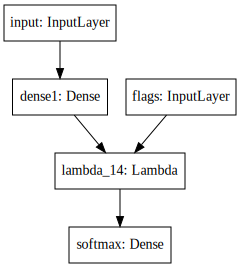

In [85]:
# display the mixture of experts model diagram
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [86]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 2)            0                                            
__________________________________________________________________________________________________
dense1 (Dense)                  (None, 4)            12          input[0][0]                      
__________________________________________________________________________________________________
flags (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
lambda_14 (Lambda)              (None, 32)           0           dense1[0][0]                     
                                                                 flags[0][0]                      
__________

In [87]:
model.fit([X2, X2_flag], Y2,
          batch_size=4,
          epochs=20000,
          shuffle=True)

Epoch 1/20000
8/8 [==============================] - 1s 63ms/step - loss: 0.7556 - acc: 0.5000
Epoch 2/20000
8/8 [==============================] - 0s 506us/step - loss: 0.7525 - acc: 0.5000
Epoch 3/20000
8/8 [==============================] - 0s 543us/step - loss: 0.7445 - acc: 0.5000
Epoch 4/20000
8/8 [==============================] - 0s 527us/step - loss: 0.7400 - acc: 0.5000
Epoch 5/20000
8/8 [==============================] - 0s 702us/step - loss: 0.7375 - acc: 0.5000
Epoch 6/20000
8/8 [==============================] - 0s 600us/step - loss: 0.7294 - acc: 0.5000
Epoch 7/20000
8/8 [==============================] - 0s 593us/step - loss: 0.7274 - acc: 0.5000
Epoch 8/20000
8/8 [==============================] - 0s 596us/step - loss: 0.7204 - acc: 0.5000
Epoch 9/20000
8/8 [==============================] - 0s 514us/step - loss: 0.7160 - acc: 0.5000
Epoch 10/20000
8/8 [==============================] - 0s 642us/step - loss: 0.7116 - acc: 0.5000
Epoch 11/20000
8/8 [====================

8/8 [==============================] - 0s 580us/step - loss: 0.6103 - acc: 0.7500
Epoch 85/20000
8/8 [==============================] - 0s 556us/step - loss: 0.6098 - acc: 0.7500
Epoch 86/20000
8/8 [==============================] - 0s 575us/step - loss: 0.6098 - acc: 0.7500
Epoch 87/20000
8/8 [==============================] - 0s 666us/step - loss: 0.6095 - acc: 0.7500
Epoch 88/20000
8/8 [==============================] - 0s 721us/step - loss: 0.6093 - acc: 0.7500
Epoch 89/20000
8/8 [==============================] - 0s 627us/step - loss: 0.6090 - acc: 0.7500
Epoch 90/20000
8/8 [==============================] - 0s 660us/step - loss: 0.6088 - acc: 0.7500
Epoch 91/20000
8/8 [==============================] - 0s 529us/step - loss: 0.6087 - acc: 0.7500
Epoch 92/20000
8/8 [==============================] - 0s 508us/step - loss: 0.6084 - acc: 0.7500
Epoch 93/20000
8/8 [==============================] - 0s 665us/step - loss: 0.6086 - acc: 0.7500
Epoch 94/20000
8/8 [=========================

8/8 [==============================] - 0s 541us/step - loss: 0.5952 - acc: 0.7500
Epoch 168/20000
8/8 [==============================] - 0s 611us/step - loss: 0.5948 - acc: 0.7500
Epoch 169/20000
8/8 [==============================] - 0s 646us/step - loss: 0.5949 - acc: 0.7500
Epoch 170/20000
8/8 [==============================] - 0s 637us/step - loss: 0.5947 - acc: 0.7500
Epoch 171/20000
8/8 [==============================] - 0s 673us/step - loss: 0.5948 - acc: 0.7500
Epoch 172/20000
8/8 [==============================] - 0s 663us/step - loss: 0.5942 - acc: 0.7500
Epoch 173/20000
8/8 [==============================] - 0s 665us/step - loss: 0.5942 - acc: 0.7500
Epoch 174/20000
8/8 [==============================] - 0s 723us/step - loss: 0.5941 - acc: 0.7500
Epoch 175/20000
8/8 [==============================] - 0s 663us/step - loss: 0.5939 - acc: 0.7500
Epoch 176/20000
8/8 [==============================] - 0s 915us/step - loss: 0.5941 - acc: 0.7500
Epoch 177/20000
8/8 [===============

8/8 [==============================] - 0s 588us/step - loss: 0.5843 - acc: 0.7500
Epoch 250/20000
8/8 [==============================] - 0s 523us/step - loss: 0.5844 - acc: 0.7500
Epoch 251/20000
8/8 [==============================] - 0s 818us/step - loss: 0.5843 - acc: 0.7500
Epoch 252/20000
8/8 [==============================] - 0s 870us/step - loss: 0.5841 - acc: 0.7500
Epoch 253/20000
8/8 [==============================] - 0s 638us/step - loss: 0.5843 - acc: 0.7500
Epoch 254/20000
8/8 [==============================] - 0s 811us/step - loss: 0.5841 - acc: 0.7500
Epoch 255/20000
8/8 [==============================] - 0s 603us/step - loss: 0.5838 - acc: 0.7500
Epoch 256/20000
8/8 [==============================] - 0s 684us/step - loss: 0.5839 - acc: 0.7500
Epoch 257/20000
8/8 [==============================] - 0s 671us/step - loss: 0.5838 - acc: 0.7500
Epoch 258/20000
8/8 [==============================] - 0s 731us/step - loss: 0.5835 - acc: 0.7500
Epoch 259/20000
8/8 [===============

Epoch 332/20000
8/8 [==============================] - ETA: 0s - loss: 0.7799 - acc: 0.500 - 0s 649us/step - loss: 0.5779 - acc: 0.7500
Epoch 333/20000
8/8 [==============================] - 0s 588us/step - loss: 0.5777 - acc: 0.7500
Epoch 334/20000
8/8 [==============================] - 0s 554us/step - loss: 0.5777 - acc: 0.7500
Epoch 335/20000
8/8 [==============================] - 0s 693us/step - loss: 0.5776 - acc: 0.7500
Epoch 336/20000
8/8 [==============================] - 0s 597us/step - loss: 0.5776 - acc: 0.7500
Epoch 337/20000
8/8 [==============================] - 0s 789us/step - loss: 0.5775 - acc: 0.7500
Epoch 338/20000
8/8 [==============================] - 0s 598us/step - loss: 0.5776 - acc: 0.7500
Epoch 339/20000
8/8 [==============================] - 0s 561us/step - loss: 0.5776 - acc: 0.7500
Epoch 340/20000
8/8 [==============================] - 0s 564us/step - loss: 0.5778 - acc: 0.7500
Epoch 341/20000
8/8 [==============================] - 0s 594us/step - loss: 0.5

8/8 [==============================] - 0s 643us/step - loss: 0.5733 - acc: 0.7500
Epoch 415/20000
8/8 [==============================] - 0s 584us/step - loss: 0.5732 - acc: 0.7500
Epoch 416/20000
8/8 [==============================] - 0s 587us/step - loss: 0.5734 - acc: 0.7500
Epoch 417/20000
8/8 [==============================] - 0s 507us/step - loss: 0.5736 - acc: 0.7500
Epoch 418/20000
8/8 [==============================] - 0s 513us/step - loss: 0.5732 - acc: 0.7500
Epoch 419/20000
8/8 [==============================] - 0s 693us/step - loss: 0.5731 - acc: 0.7500
Epoch 420/20000
8/8 [==============================] - 0s 594us/step - loss: 0.5730 - acc: 0.7500
Epoch 421/20000
8/8 [==============================] - 0s 682us/step - loss: 0.5731 - acc: 0.7500
Epoch 422/20000
8/8 [==============================] - 0s 531us/step - loss: 0.5730 - acc: 0.7500
Epoch 423/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5729 - acc: 0.7500
Epoch 424/20000
8/8 [===============

Epoch 497/20000
8/8 [==============================] - 0s 696us/step - loss: 0.5700 - acc: 0.7500
Epoch 498/20000
8/8 [==============================] - 0s 610us/step - loss: 0.5701 - acc: 0.7500
Epoch 499/20000
8/8 [==============================] - 0s 652us/step - loss: 0.5702 - acc: 0.7500
Epoch 500/20000
8/8 [==============================] - 0s 648us/step - loss: 0.5699 - acc: 0.7500
Epoch 501/20000
8/8 [==============================] - 0s 448us/step - loss: 0.5698 - acc: 0.7500
Epoch 502/20000
8/8 [==============================] - 0s 654us/step - loss: 0.5700 - acc: 0.7500
Epoch 503/20000
8/8 [==============================] - 0s 667us/step - loss: 0.5700 - acc: 0.7500
Epoch 504/20000
8/8 [==============================] - 0s 644us/step - loss: 0.5700 - acc: 0.7500
Epoch 505/20000
8/8 [==============================] - 0s 617us/step - loss: 0.5698 - acc: 0.7500
Epoch 506/20000
8/8 [==============================] - 0s 751us/step - loss: 0.5699 - acc: 0.7500
Epoch 507/20000
8/8 

8/8 [==============================] - 0s 663us/step - loss: 0.5678 - acc: 0.7500
Epoch 580/20000
8/8 [==============================] - 0s 645us/step - loss: 0.5679 - acc: 0.7500
Epoch 581/20000
8/8 [==============================] - 0s 689us/step - loss: 0.5677 - acc: 0.7500
Epoch 582/20000
8/8 [==============================] - 0s 755us/step - loss: 0.5677 - acc: 0.7500
Epoch 583/20000
8/8 [==============================] - 0s 827us/step - loss: 0.5678 - acc: 0.7500
Epoch 584/20000
8/8 [==============================] - 0s 744us/step - loss: 0.5680 - acc: 0.7500
Epoch 585/20000
8/8 [==============================] - 0s 686us/step - loss: 0.5676 - acc: 0.7500
Epoch 586/20000
8/8 [==============================] - 0s 638us/step - loss: 0.5676 - acc: 0.7500
Epoch 587/20000
8/8 [==============================] - 0s 709us/step - loss: 0.5676 - acc: 0.7500
Epoch 588/20000
8/8 [==============================] - 0s 625us/step - loss: 0.5675 - acc: 0.7500
Epoch 589/20000
8/8 [===============

8/8 [==============================] - 0s 565us/step - loss: 0.5662 - acc: 0.7500
Epoch 663/20000
8/8 [==============================] - 0s 588us/step - loss: 0.5663 - acc: 0.7500
Epoch 664/20000
8/8 [==============================] - 0s 564us/step - loss: 0.5665 - acc: 0.7500
Epoch 665/20000
8/8 [==============================] - 0s 655us/step - loss: 0.5662 - acc: 0.7500
Epoch 666/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5664 - acc: 0.7500
Epoch 667/20000
8/8 [==============================] - 0s 574us/step - loss: 0.5664 - acc: 0.7500
Epoch 668/20000
8/8 [==============================] - 0s 587us/step - loss: 0.5660 - acc: 0.7500
Epoch 669/20000
8/8 [==============================] - 0s 553us/step - loss: 0.5661 - acc: 0.7500
Epoch 670/20000
8/8 [==============================] - 0s 606us/step - loss: 0.5667 - acc: 0.7500
Epoch 671/20000
8/8 [==============================] - 0s 712us/step - loss: 0.5663 - acc: 0.7500
Epoch 672/20000
8/8 [===============

8/8 [==============================] - 0s 630us/step - loss: 0.5651 - acc: 0.7500
Epoch 745/20000
8/8 [==============================] - 0s 536us/step - loss: 0.5653 - acc: 0.7500
Epoch 746/20000
8/8 [==============================] - 0s 661us/step - loss: 0.5650 - acc: 0.7500
Epoch 747/20000
8/8 [==============================] - 0s 619us/step - loss: 0.5650 - acc: 0.7500
Epoch 748/20000
8/8 [==============================] - 0s 661us/step - loss: 0.5651 - acc: 0.7500
Epoch 749/20000
8/8 [==============================] - 0s 625us/step - loss: 0.5652 - acc: 0.7500
Epoch 750/20000
8/8 [==============================] - 0s 462us/step - loss: 0.5650 - acc: 0.7500
Epoch 751/20000
8/8 [==============================] - 0s 594us/step - loss: 0.5649 - acc: 0.7500
Epoch 752/20000
8/8 [==============================] - 0s 749us/step - loss: 0.5651 - acc: 0.7500
Epoch 753/20000
8/8 [==============================] - 0s 808us/step - loss: 0.5651 - acc: 0.7500
Epoch 754/20000
8/8 [===============

8/8 [==============================] - 0s 574us/step - loss: 0.5644 - acc: 0.7500
Epoch 828/20000
8/8 [==============================] - 0s 852us/step - loss: 0.5643 - acc: 0.7500
Epoch 829/20000
8/8 [==============================] - 0s 814us/step - loss: 0.5644 - acc: 0.7500
Epoch 830/20000
8/8 [==============================] - 0s 720us/step - loss: 0.5642 - acc: 0.7500
Epoch 831/20000
8/8 [==============================] - 0s 749us/step - loss: 0.5644 - acc: 0.7500
Epoch 832/20000
8/8 [==============================] - 0s 730us/step - loss: 0.5643 - acc: 0.7500
Epoch 833/20000
8/8 [==============================] - 0s 618us/step - loss: 0.5643 - acc: 0.7500
Epoch 834/20000
8/8 [==============================] - 0s 731us/step - loss: 0.5644 - acc: 0.7500
Epoch 835/20000
8/8 [==============================] - 0s 730us/step - loss: 0.5643 - acc: 0.7500
Epoch 836/20000
8/8 [==============================] - 0s 637us/step - loss: 0.5641 - acc: 0.7500
Epoch 837/20000
8/8 [===============

8/8 [==============================] - 0s 686us/step - loss: 0.5639 - acc: 0.7500
Epoch 911/20000
8/8 [==============================] - 0s 720us/step - loss: 0.5636 - acc: 0.7500
Epoch 912/20000
8/8 [==============================] - ETA: 0s - loss: 0.3106 - acc: 1.000 - 0s 689us/step - loss: 0.5639 - acc: 0.7500
Epoch 913/20000
8/8 [==============================] - 0s 682us/step - loss: 0.5639 - acc: 0.7500
Epoch 914/20000
8/8 [==============================] - 0s 649us/step - loss: 0.5638 - acc: 0.7500
Epoch 915/20000
8/8 [==============================] - 0s 753us/step - loss: 0.5636 - acc: 0.7500
Epoch 916/20000
8/8 [==============================] - 0s 888us/step - loss: 0.5640 - acc: 0.7500
Epoch 917/20000
8/8 [==============================] - 0s 506us/step - loss: 0.5640 - acc: 0.7500
Epoch 918/20000
8/8 [==============================] - 0s 563us/step - loss: 0.5636 - acc: 0.7500
Epoch 919/20000
8/8 [==============================] - 0s 531us/step - loss: 0.5638 - acc: 0.750

8/8 [==============================] - 0s 610us/step - loss: 0.5633 - acc: 0.7500
Epoch 993/20000
8/8 [==============================] - 0s 681us/step - loss: 0.5635 - acc: 0.7500
Epoch 994/20000
8/8 [==============================] - 0s 618us/step - loss: 0.5635 - acc: 0.7500
Epoch 995/20000
8/8 [==============================] - 0s 723us/step - loss: 0.5638 - acc: 0.7500
Epoch 996/20000
8/8 [==============================] - 0s 656us/step - loss: 0.5633 - acc: 0.7500
Epoch 997/20000
8/8 [==============================] - 0s 617us/step - loss: 0.5634 - acc: 0.7500
Epoch 998/20000
8/8 [==============================] - 0s 660us/step - loss: 0.5633 - acc: 0.7500
Epoch 999/20000
8/8 [==============================] - 0s 680us/step - loss: 0.5633 - acc: 0.7500
Epoch 1000/20000
8/8 [==============================] - 0s 609us/step - loss: 0.5632 - acc: 0.7500
Epoch 1001/20000
8/8 [==============================] - 0s 740us/step - loss: 0.5632 - acc: 0.7500
Epoch 1002/20000
8/8 [============

8/8 [==============================] - 0s 522us/step - loss: 0.5630 - acc: 0.7500
Epoch 1073/20000
8/8 [==============================] - 0s 581us/step - loss: 0.5632 - acc: 0.7500
Epoch 1074/20000
8/8 [==============================] - 0s 582us/step - loss: 0.5630 - acc: 0.7500
Epoch 1075/20000
8/8 [==============================] - 0s 793us/step - loss: 0.5635 - acc: 0.7500
Epoch 1076/20000
8/8 [==============================] - 0s 652us/step - loss: 0.5635 - acc: 0.7500
Epoch 1077/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5630 - acc: 0.7500
Epoch 1078/20000
8/8 [==============================] - 0s 671us/step - loss: 0.5630 - acc: 0.7500
Epoch 1079/20000
8/8 [==============================] - 0s 688us/step - loss: 0.5632 - acc: 0.7500
Epoch 1080/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5631 - acc: 0.7500
Epoch 1081/20000
8/8 [==============================] - 0s 579us/step - loss: 0.5632 - acc: 0.7500
Epoch 1082/20000
8/8 [=====

8/8 [==============================] - 0s 723us/step - loss: 0.5630 - acc: 0.7500
Epoch 1154/20000
8/8 [==============================] - 0s 775us/step - loss: 0.5630 - acc: 0.7500
Epoch 1155/20000
8/8 [==============================] - 0s 662us/step - loss: 0.5631 - acc: 0.7500
Epoch 1156/20000
8/8 [==============================] - 0s 588us/step - loss: 0.5628 - acc: 0.7500
Epoch 1157/20000
8/8 [==============================] - 0s 737us/step - loss: 0.5634 - acc: 0.7500
Epoch 1158/20000
8/8 [==============================] - 0s 672us/step - loss: 0.5633 - acc: 0.7500
Epoch 1159/20000
8/8 [==============================] - 0s 693us/step - loss: 0.5630 - acc: 0.7500
Epoch 1160/20000
8/8 [==============================] - 0s 641us/step - loss: 0.5630 - acc: 0.7500
Epoch 1161/20000
8/8 [==============================] - 0s 718us/step - loss: 0.5628 - acc: 0.7500
Epoch 1162/20000
8/8 [==============================] - 0s 572us/step - loss: 0.5632 - acc: 0.7500
Epoch 1163/20000
8/8 [=====

8/8 [==============================] - 0s 602us/step - loss: 0.5629 - acc: 0.7500
Epoch 1235/20000
8/8 [==============================] - 0s 619us/step - loss: 0.5628 - acc: 0.7500
Epoch 1236/20000
8/8 [==============================] - 0s 620us/step - loss: 0.5628 - acc: 0.7500
Epoch 1237/20000
8/8 [==============================] - 0s 803us/step - loss: 0.5629 - acc: 0.7500
Epoch 1238/20000
8/8 [==============================] - 0s 593us/step - loss: 0.5627 - acc: 0.7500
Epoch 1239/20000
8/8 [==============================] - ETA: 0s - loss: 0.5581 - acc: 0.750 - 0s 692us/step - loss: 0.5627 - acc: 0.7500
Epoch 1240/20000
8/8 [==============================] - 0s 612us/step - loss: 0.5627 - acc: 0.7500
Epoch 1241/20000
8/8 [==============================] - 0s 577us/step - loss: 0.5627 - acc: 0.7500
Epoch 1242/20000
8/8 [==============================] - 0s 606us/step - loss: 0.5629 - acc: 0.7500
Epoch 1243/20000
8/8 [==============================] - 0s 609us/step - loss: 0.5628 - a

8/8 [==============================] - 0s 701us/step - loss: 0.5626 - acc: 0.7500
Epoch 1315/20000
8/8 [==============================] - 0s 569us/step - loss: 0.5625 - acc: 0.7500
Epoch 1316/20000
8/8 [==============================] - 0s 527us/step - loss: 0.5631 - acc: 0.7500
Epoch 1317/20000
8/8 [==============================] - 0s 659us/step - loss: 0.5626 - acc: 0.7500
Epoch 1318/20000
8/8 [==============================] - 0s 586us/step - loss: 0.5626 - acc: 0.7500
Epoch 1319/20000
8/8 [==============================] - 0s 640us/step - loss: 0.5628 - acc: 0.7500
Epoch 1320/20000
8/8 [==============================] - 0s 554us/step - loss: 0.5631 - acc: 0.7500
Epoch 1321/20000
8/8 [==============================] - 0s 540us/step - loss: 0.5627 - acc: 0.7500
Epoch 1322/20000
8/8 [==============================] - 0s 576us/step - loss: 0.5626 - acc: 0.7500
Epoch 1323/20000
8/8 [==============================] - 0s 590us/step - loss: 0.5627 - acc: 0.7500
Epoch 1324/20000
8/8 [=====

8/8 [==============================] - 0s 476us/step - loss: 0.5626 - acc: 0.7500
Epoch 1396/20000
8/8 [==============================] - 0s 491us/step - loss: 0.5628 - acc: 0.7500
Epoch 1397/20000
8/8 [==============================] - 0s 574us/step - loss: 0.5629 - acc: 0.7500
Epoch 1398/20000
8/8 [==============================] - ETA: 0s - loss: 0.5589 - acc: 0.750 - 0s 669us/step - loss: 0.5625 - acc: 0.7500
Epoch 1399/20000
8/8 [==============================] - 0s 704us/step - loss: 0.5627 - acc: 0.7500
Epoch 1400/20000
8/8 [==============================] - 0s 741us/step - loss: 0.5627 - acc: 0.7500
Epoch 1401/20000
8/8 [==============================] - 0s 687us/step - loss: 0.5627 - acc: 0.7500
Epoch 1402/20000
8/8 [==============================] - 0s 683us/step - loss: 0.5625 - acc: 0.7500
Epoch 1403/20000
8/8 [==============================] - 0s 571us/step - loss: 0.5628 - acc: 0.7500
Epoch 1404/20000
8/8 [==============================] - 0s 584us/step - loss: 0.5625 - a

8/8 [==============================] - 0s 742us/step - loss: 0.5625 - acc: 0.7500
Epoch 1477/20000
8/8 [==============================] - 0s 636us/step - loss: 0.5626 - acc: 0.7500
Epoch 1478/20000
8/8 [==============================] - 0s 722us/step - loss: 0.5625 - acc: 0.7500
Epoch 1479/20000
8/8 [==============================] - 0s 573us/step - loss: 0.5627 - acc: 0.7500
Epoch 1480/20000
8/8 [==============================] - 0s 611us/step - loss: 0.5627 - acc: 0.7500
Epoch 1481/20000
8/8 [==============================] - 0s 771us/step - loss: 0.5625 - acc: 0.7500
Epoch 1482/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5627 - acc: 0.7500
Epoch 1483/20000
8/8 [==============================] - 0s 670us/step - loss: 0.5624 - acc: 0.7500
Epoch 1484/20000
8/8 [==============================] - 0s 557us/step - loss: 0.5626 - acc: 0.7500
Epoch 1485/20000
8/8 [==============================] - 0s 535us/step - loss: 0.5629 - acc: 0.7500
Epoch 1486/20000
8/8 [=====

8/8 [==============================] - 0s 689us/step - loss: 0.5625 - acc: 0.7500
Epoch 1559/20000
8/8 [==============================] - ETA: 0s - loss: 0.5671 - acc: 0.750 - 0s 704us/step - loss: 0.5627 - acc: 0.7500
Epoch 1560/20000
8/8 [==============================] - 0s 739us/step - loss: 0.5625 - acc: 0.7500
Epoch 1561/20000
8/8 [==============================] - 0s 928us/step - loss: 0.5627 - acc: 0.7500
Epoch 1562/20000
8/8 [==============================] - 0s 644us/step - loss: 0.5629 - acc: 0.7500
Epoch 1563/20000
8/8 [==============================] - 0s 640us/step - loss: 0.5625 - acc: 0.7500
Epoch 1564/20000
8/8 [==============================] - 0s 783us/step - loss: 0.5626 - acc: 0.7500
Epoch 1565/20000
8/8 [==============================] - 0s 695us/step - loss: 0.5625 - acc: 0.7500
Epoch 1566/20000
8/8 [==============================] - 0s 811us/step - loss: 0.5625 - acc: 0.7500
Epoch 1567/20000
8/8 [==============================] - 0s 723us/step - loss: 0.5630 - a

8/8 [==============================] - 0s 621us/step - loss: 0.5624 - acc: 0.7500
Epoch 1640/20000
8/8 [==============================] - 0s 610us/step - loss: 0.5625 - acc: 0.7500
Epoch 1641/20000
8/8 [==============================] - 0s 649us/step - loss: 0.5625 - acc: 0.7500
Epoch 1642/20000
8/8 [==============================] - 0s 566us/step - loss: 0.5625 - acc: 0.7500
Epoch 1643/20000
8/8 [==============================] - 0s 565us/step - loss: 0.5626 - acc: 0.7500
Epoch 1644/20000
8/8 [==============================] - 0s 695us/step - loss: 0.5626 - acc: 0.7500
Epoch 1645/20000
8/8 [==============================] - 0s 675us/step - loss: 0.5629 - acc: 0.7500
Epoch 1646/20000
8/8 [==============================] - 0s 634us/step - loss: 0.5624 - acc: 0.7500
Epoch 1647/20000
8/8 [==============================] - 0s 615us/step - loss: 0.5625 - acc: 0.7500
Epoch 1648/20000
8/8 [==============================] - 0s 635us/step - loss: 0.5628 - acc: 0.7500
Epoch 1649/20000
8/8 [=====

8/8 [==============================] - 0s 630us/step - loss: 0.5626 - acc: 0.7500
Epoch 1721/20000
8/8 [==============================] - 0s 630us/step - loss: 0.5625 - acc: 0.7500
Epoch 1722/20000
8/8 [==============================] - 0s 575us/step - loss: 0.5629 - acc: 0.7500
Epoch 1723/20000
8/8 [==============================] - 0s 605us/step - loss: 0.5626 - acc: 0.7500
Epoch 1724/20000
8/8 [==============================] - 0s 682us/step - loss: 0.5624 - acc: 0.7500
Epoch 1725/20000
8/8 [==============================] - 0s 644us/step - loss: 0.5630 - acc: 0.7500
Epoch 1726/20000
8/8 [==============================] - 0s 659us/step - loss: 0.5626 - acc: 0.7500
Epoch 1727/20000
8/8 [==============================] - 0s 617us/step - loss: 0.5629 - acc: 0.7500
Epoch 1728/20000
8/8 [==============================] - 0s 667us/step - loss: 0.5625 - acc: 0.7500
Epoch 1729/20000
8/8 [==============================] - 0s 645us/step - loss: 0.5624 - acc: 0.7500
Epoch 1730/20000
8/8 [=====

8/8 [==============================] - 0s 697us/step - loss: 0.5624 - acc: 0.7500
Epoch 1803/20000
8/8 [==============================] - 0s 644us/step - loss: 0.5626 - acc: 0.7500
Epoch 1804/20000
8/8 [==============================] - 0s 669us/step - loss: 0.5624 - acc: 0.7500
Epoch 1805/20000
8/8 [==============================] - 0s 595us/step - loss: 0.5626 - acc: 0.7500
Epoch 1806/20000
8/8 [==============================] - 0s 627us/step - loss: 0.5626 - acc: 0.7500
Epoch 1807/20000
8/8 [==============================] - 0s 584us/step - loss: 0.5624 - acc: 0.7500
Epoch 1808/20000
8/8 [==============================] - 0s 600us/step - loss: 0.5624 - acc: 0.7500
Epoch 1809/20000
8/8 [==============================] - 0s 667us/step - loss: 0.5626 - acc: 0.7500
Epoch 1810/20000
8/8 [==============================] - 0s 641us/step - loss: 0.5624 - acc: 0.7500
Epoch 1811/20000
8/8 [==============================] - 0s 619us/step - loss: 0.5625 - acc: 0.7500
Epoch 1812/20000
8/8 [=====

8/8 [==============================] - ETA: 0s - loss: 0.2899 - acc: 1.000 - 0s 751us/step - loss: 0.5626 - acc: 0.7500
Epoch 1885/20000
8/8 [==============================] - 0s 698us/step - loss: 0.5624 - acc: 0.7500
Epoch 1886/20000
8/8 [==============================] - 0s 661us/step - loss: 0.5626 - acc: 0.7500
Epoch 1887/20000
8/8 [==============================] - 0s 736us/step - loss: 0.5628 - acc: 0.7500
Epoch 1888/20000
8/8 [==============================] - 0s 677us/step - loss: 0.5626 - acc: 0.7500
Epoch 1889/20000
8/8 [==============================] - ETA: 0s - loss: 0.5602 - acc: 0.750 - 0s 617us/step - loss: 0.5626 - acc: 0.7500
Epoch 1890/20000
8/8 [==============================] - 0s 655us/step - loss: 0.5624 - acc: 0.7500
Epoch 1891/20000
8/8 [==============================] - 0s 566us/step - loss: 0.5624 - acc: 0.7500
Epoch 1892/20000
8/8 [==============================] - 0s 727us/step - loss: 0.5626 - acc: 0.7500
Epoch 1893/20000
8/8 [============================

8/8 [==============================] - 0s 541us/step - loss: 0.5625 - acc: 0.7500
Epoch 1967/20000
8/8 [==============================] - 0s 674us/step - loss: 0.5626 - acc: 0.7500
Epoch 1968/20000
8/8 [==============================] - 0s 570us/step - loss: 0.5624 - acc: 0.7500
Epoch 1969/20000
8/8 [==============================] - 0s 597us/step - loss: 0.5629 - acc: 0.7500
Epoch 1970/20000
8/8 [==============================] - 0s 595us/step - loss: 0.5624 - acc: 0.7500
Epoch 1971/20000
8/8 [==============================] - 0s 711us/step - loss: 0.5628 - acc: 0.7500
Epoch 1972/20000
8/8 [==============================] - 0s 763us/step - loss: 0.5626 - acc: 0.7500
Epoch 1973/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5624 - acc: 0.7500
Epoch 1974/20000
8/8 [==============================] - 0s 621us/step - loss: 0.5624 - acc: 0.7500
Epoch 1975/20000
8/8 [==============================] - 0s 684us/step - loss: 0.5629 - acc: 0.7500
Epoch 1976/20000
8/8 [=====

8/8 [==============================] - 0s 664us/step - loss: 0.5626 - acc: 0.7500
Epoch 2049/20000
8/8 [==============================] - 0s 547us/step - loss: 0.5626 - acc: 0.7500
Epoch 2050/20000
8/8 [==============================] - 0s 581us/step - loss: 0.5624 - acc: 0.7500
Epoch 2051/20000
8/8 [==============================] - 0s 640us/step - loss: 0.5624 - acc: 0.7500
Epoch 2052/20000
8/8 [==============================] - ETA: 0s - loss: 0.5612 - acc: 0.750 - 0s 642us/step - loss: 0.5624 - acc: 0.7500
Epoch 2053/20000
8/8 [==============================] - 0s 620us/step - loss: 0.5624 - acc: 0.7500
Epoch 2054/20000
8/8 [==============================] - 0s 626us/step - loss: 0.5624 - acc: 0.7500
Epoch 2055/20000
8/8 [==============================] - 0s 646us/step - loss: 0.5627 - acc: 0.7500
Epoch 2056/20000
8/8 [==============================] - 0s 600us/step - loss: 0.5624 - acc: 0.7500
Epoch 2057/20000
8/8 [==============================] - 0s 538us/step - loss: 0.5624 - a

8/8 [==============================] - 0s 517us/step - loss: 0.5626 - acc: 0.7500
Epoch 2130/20000
8/8 [==============================] - ETA: 0s - loss: 0.8350 - acc: 0.500 - 0s 592us/step - loss: 0.5624 - acc: 0.7500
Epoch 2131/20000
8/8 [==============================] - 0s 624us/step - loss: 0.5625 - acc: 0.7500
Epoch 2132/20000
8/8 [==============================] - 0s 694us/step - loss: 0.5626 - acc: 0.7500
Epoch 2133/20000
8/8 [==============================] - 0s 630us/step - loss: 0.5626 - acc: 0.7500
Epoch 2134/20000
8/8 [==============================] - 0s 596us/step - loss: 0.5629 - acc: 0.7500
Epoch 2135/20000
8/8 [==============================] - 0s 577us/step - loss: 0.5626 - acc: 0.7500
Epoch 2136/20000
8/8 [==============================] - 0s 586us/step - loss: 0.5624 - acc: 0.7500
Epoch 2137/20000
8/8 [==============================] - 0s 566us/step - loss: 0.5624 - acc: 0.7500
Epoch 2138/20000
8/8 [==============================] - 0s 581us/step - loss: 0.5626 - a

8/8 [==============================] - 0s 669us/step - loss: 0.5626 - acc: 0.7500
Epoch 2211/20000
8/8 [==============================] - 0s 578us/step - loss: 0.5626 - acc: 0.7500
Epoch 2212/20000
8/8 [==============================] - 0s 505us/step - loss: 0.5624 - acc: 0.7500
Epoch 2213/20000
8/8 [==============================] - 0s 484us/step - loss: 0.5629 - acc: 0.7500
Epoch 2214/20000
8/8 [==============================] - 0s 584us/step - loss: 0.5626 - acc: 0.7500
Epoch 2215/20000
8/8 [==============================] - 0s 745us/step - loss: 0.5625 - acc: 0.7500
Epoch 2216/20000
8/8 [==============================] - 0s 694us/step - loss: 0.5625 - acc: 0.7500
Epoch 2217/20000
8/8 [==============================] - 0s 590us/step - loss: 0.5626 - acc: 0.7500
Epoch 2218/20000
8/8 [==============================] - 0s 663us/step - loss: 0.5629 - acc: 0.7500
Epoch 2219/20000
8/8 [==============================] - 0s 616us/step - loss: 0.5626 - acc: 0.7500
Epoch 2220/20000
8/8 [=====

8/8 [==============================] - 0s 650us/step - loss: 0.5624 - acc: 0.7500
Epoch 2292/20000
8/8 [==============================] - 0s 706us/step - loss: 0.5626 - acc: 0.7500
Epoch 2293/20000
8/8 [==============================] - 0s 759us/step - loss: 0.5624 - acc: 0.7500
Epoch 2294/20000
8/8 [==============================] - 0s 684us/step - loss: 0.5624 - acc: 0.7500
Epoch 2295/20000
8/8 [==============================] - 0s 650us/step - loss: 0.5628 - acc: 0.7500
Epoch 2296/20000
8/8 [==============================] - 0s 648us/step - loss: 0.5629 - acc: 0.7500
Epoch 2297/20000
8/8 [==============================] - 0s 583us/step - loss: 0.5626 - acc: 0.7500
Epoch 2298/20000
8/8 [==============================] - 0s 550us/step - loss: 0.5629 - acc: 0.7500
Epoch 2299/20000
8/8 [==============================] - 0s 561us/step - loss: 0.5624 - acc: 0.7500
Epoch 2300/20000
8/8 [==============================] - 0s 760us/step - loss: 0.5624 - acc: 0.7500
Epoch 2301/20000
8/8 [=====

8/8 [==============================] - 0s 686us/step - loss: 0.5626 - acc: 0.7500
Epoch 2374/20000
8/8 [==============================] - 0s 696us/step - loss: 0.5624 - acc: 0.7500
Epoch 2375/20000
8/8 [==============================] - 0s 582us/step - loss: 0.5626 - acc: 0.7500
Epoch 2376/20000
8/8 [==============================] - 0s 722us/step - loss: 0.5624 - acc: 0.7500
Epoch 2377/20000
8/8 [==============================] - 0s 654us/step - loss: 0.5624 - acc: 0.7500
Epoch 2378/20000
8/8 [==============================] - 0s 638us/step - loss: 0.5629 - acc: 0.7500
Epoch 2379/20000
8/8 [==============================] - 0s 800us/step - loss: 0.5628 - acc: 0.7500
Epoch 2380/20000
8/8 [==============================] - 0s 688us/step - loss: 0.5625 - acc: 0.7500
Epoch 2381/20000
8/8 [==============================] - 0s 692us/step - loss: 0.5625 - acc: 0.7500
Epoch 2382/20000
8/8 [==============================] - 0s 733us/step - loss: 0.5625 - acc: 0.7500
Epoch 2383/20000
8/8 [=====

8/8 [==============================] - 0s 481us/step - loss: 0.5626 - acc: 0.7500
Epoch 2455/20000
8/8 [==============================] - 0s 663us/step - loss: 0.5626 - acc: 0.7500
Epoch 2456/20000
8/8 [==============================] - 0s 513us/step - loss: 0.5626 - acc: 0.7500
Epoch 2457/20000
8/8 [==============================] - 0s 606us/step - loss: 0.5626 - acc: 0.7500
Epoch 2458/20000
8/8 [==============================] - 0s 583us/step - loss: 0.5628 - acc: 0.7500
Epoch 2459/20000
8/8 [==============================] - 0s 694us/step - loss: 0.5624 - acc: 0.7500
Epoch 2460/20000
8/8 [==============================] - 0s 730us/step - loss: 0.5624 - acc: 0.7500
Epoch 2461/20000
8/8 [==============================] - 0s 650us/step - loss: 0.5626 - acc: 0.7500
Epoch 2462/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5626 - acc: 0.7500
Epoch 2463/20000
8/8 [==============================] - 0s 697us/step - loss: 0.5629 - acc: 0.7500
Epoch 2464/20000
8/8 [=====

8/8 [==============================] - 0s 692us/step - loss: 0.5624 - acc: 0.7500
Epoch 2537/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5624 - acc: 0.7500
Epoch 2538/20000
8/8 [==============================] - 0s 699us/step - loss: 0.5626 - acc: 0.7500
Epoch 2539/20000
8/8 [==============================] - 0s 698us/step - loss: 0.5626 - acc: 0.7500
Epoch 2540/20000
8/8 [==============================] - 0s 565us/step - loss: 0.5625 - acc: 0.7500
Epoch 2541/20000
8/8 [==============================] - 0s 543us/step - loss: 0.5626 - acc: 0.7500
Epoch 2542/20000
8/8 [==============================] - 0s 597us/step - loss: 0.5624 - acc: 0.7500
Epoch 2543/20000
8/8 [==============================] - 0s 451us/step - loss: 0.5624 - acc: 0.7500
Epoch 2544/20000
8/8 [==============================] - 0s 694us/step - loss: 0.5626 - acc: 0.7500
Epoch 2545/20000
8/8 [==============================] - 0s 599us/step - loss: 0.5626 - acc: 0.7500
Epoch 2546/20000
8/8 [=====

8/8 [==============================] - 0s 741us/step - loss: 0.5627 - acc: 0.7500
Epoch 2619/20000
8/8 [==============================] - 0s 612us/step - loss: 0.5624 - acc: 0.7500
Epoch 2620/20000
8/8 [==============================] - 0s 643us/step - loss: 0.5624 - acc: 0.7500
Epoch 2621/20000
8/8 [==============================] - 0s 674us/step - loss: 0.5625 - acc: 0.7500
Epoch 2622/20000
8/8 [==============================] - 0s 763us/step - loss: 0.5624 - acc: 0.7500
Epoch 2623/20000
8/8 [==============================] - 0s 648us/step - loss: 0.5627 - acc: 0.7500
Epoch 2624/20000
8/8 [==============================] - 0s 659us/step - loss: 0.5628 - acc: 0.7500
Epoch 2625/20000
8/8 [==============================] - 0s 716us/step - loss: 0.5624 - acc: 0.7500
Epoch 2626/20000
8/8 [==============================] - 0s 899us/step - loss: 0.5626 - acc: 0.7500
Epoch 2627/20000
8/8 [==============================] - 0s 676us/step - loss: 0.5625 - acc: 0.7500
Epoch 2628/20000
8/8 [=====

8/8 [==============================] - 0s 698us/step - loss: 0.5624 - acc: 0.7500
Epoch 2701/20000
8/8 [==============================] - 0s 585us/step - loss: 0.5626 - acc: 0.7500
Epoch 2702/20000
8/8 [==============================] - 0s 663us/step - loss: 0.5626 - acc: 0.7500
Epoch 2703/20000
8/8 [==============================] - 0s 603us/step - loss: 0.5624 - acc: 0.7500
Epoch 2704/20000
8/8 [==============================] - 0s 660us/step - loss: 0.5629 - acc: 0.7500
Epoch 2705/20000
8/8 [==============================] - 0s 683us/step - loss: 0.5626 - acc: 0.7500
Epoch 2706/20000
8/8 [==============================] - 0s 736us/step - loss: 0.5626 - acc: 0.7500
Epoch 2707/20000
8/8 [==============================] - 0s 631us/step - loss: 0.5625 - acc: 0.7500
Epoch 2708/20000
8/8 [==============================] - 0s 671us/step - loss: 0.5624 - acc: 0.7500
Epoch 2709/20000
8/8 [==============================] - 0s 578us/step - loss: 0.5626 - acc: 0.7500
Epoch 2710/20000
8/8 [=====

8/8 [==============================] - 0s 694us/step - loss: 0.5626 - acc: 0.7500
Epoch 2783/20000
8/8 [==============================] - 0s 545us/step - loss: 0.5624 - acc: 0.7500
Epoch 2784/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5624 - acc: 0.7500
Epoch 2785/20000
8/8 [==============================] - 0s 673us/step - loss: 0.5624 - acc: 0.7500
Epoch 2786/20000
8/8 [==============================] - 0s 539us/step - loss: 0.5625 - acc: 0.7500
Epoch 2787/20000
8/8 [==============================] - 0s 553us/step - loss: 0.5624 - acc: 0.7500
Epoch 2788/20000
8/8 [==============================] - 0s 645us/step - loss: 0.5626 - acc: 0.7500
Epoch 2789/20000
8/8 [==============================] - 0s 638us/step - loss: 0.5629 - acc: 0.7500
Epoch 2790/20000
8/8 [==============================] - 0s 514us/step - loss: 0.5624 - acc: 0.7500
Epoch 2791/20000
8/8 [==============================] - 0s 596us/step - loss: 0.5625 - acc: 0.7500
Epoch 2792/20000
8/8 [=====

8/8 [==============================] - 0s 695us/step - loss: 0.5626 - acc: 0.7500
Epoch 2865/20000
8/8 [==============================] - 0s 584us/step - loss: 0.5623 - acc: 0.7500
Epoch 2866/20000
8/8 [==============================] - 0s 623us/step - loss: 0.5626 - acc: 0.7500
Epoch 2867/20000
8/8 [==============================] - 0s 657us/step - loss: 0.5626 - acc: 0.7500
Epoch 2868/20000
8/8 [==============================] - 0s 670us/step - loss: 0.5625 - acc: 0.7500
Epoch 2869/20000
8/8 [==============================] - 0s 680us/step - loss: 0.5624 - acc: 0.7500
Epoch 2870/20000
8/8 [==============================] - 0s 668us/step - loss: 0.5625 - acc: 0.7500
Epoch 2871/20000
8/8 [==============================] - 0s 644us/step - loss: 0.5624 - acc: 0.7500
Epoch 2872/20000
8/8 [==============================] - 0s 672us/step - loss: 0.5625 - acc: 0.7500
Epoch 2873/20000
8/8 [==============================] - 0s 594us/step - loss: 0.5625 - acc: 0.7500
Epoch 2874/20000
8/8 [=====

8/8 [==============================] - 0s 575us/step - loss: 0.5626 - acc: 0.7500
Epoch 2946/20000
8/8 [==============================] - 0s 622us/step - loss: 0.5624 - acc: 0.7500
Epoch 2947/20000
8/8 [==============================] - 0s 602us/step - loss: 0.5626 - acc: 0.7500
Epoch 2948/20000
8/8 [==============================] - 0s 473us/step - loss: 0.5624 - acc: 0.7500
Epoch 2949/20000
8/8 [==============================] - 0s 519us/step - loss: 0.5626 - acc: 0.7500
Epoch 2950/20000
8/8 [==============================] - 0s 721us/step - loss: 0.5624 - acc: 0.7500
Epoch 2951/20000
8/8 [==============================] - 0s 687us/step - loss: 0.5628 - acc: 0.7500
Epoch 2952/20000
8/8 [==============================] - 0s 590us/step - loss: 0.5626 - acc: 0.7500
Epoch 2953/20000
8/8 [==============================] - ETA: 0s - loss: 0.5623 - acc: 0.750 - 0s 573us/step - loss: 0.5626 - acc: 0.7500
Epoch 2954/20000
8/8 [==============================] - 0s 587us/step - loss: 0.5628 - a

8/8 [==============================] - 0s 590us/step - loss: 0.5624 - acc: 0.7500
Epoch 3028/20000
8/8 [==============================] - 0s 626us/step - loss: 0.5626 - acc: 0.7500
Epoch 3029/20000
8/8 [==============================] - 0s 625us/step - loss: 0.5625 - acc: 0.7500
Epoch 3030/20000
8/8 [==============================] - 0s 678us/step - loss: 0.5626 - acc: 0.7500
Epoch 3031/20000
8/8 [==============================] - 0s 651us/step - loss: 0.5626 - acc: 0.7500
Epoch 3032/20000
8/8 [==============================] - 0s 728us/step - loss: 0.5624 - acc: 0.7500
Epoch 3033/20000
8/8 [==============================] - 0s 686us/step - loss: 0.5625 - acc: 0.7500
Epoch 3034/20000
8/8 [==============================] - 0s 703us/step - loss: 0.5624 - acc: 0.7500
Epoch 3035/20000
8/8 [==============================] - 0s 643us/step - loss: 0.5624 - acc: 0.7500
Epoch 3036/20000
8/8 [==============================] - 0s 504us/step - loss: 0.5624 - acc: 0.7500
Epoch 3037/20000
8/8 [=====

8/8 [==============================] - 0s 631us/step - loss: 0.5624 - acc: 0.7500
Epoch 3110/20000
8/8 [==============================] - ETA: 0s - loss: 0.2881 - acc: 1.000 - 0s 742us/step - loss: 0.5624 - acc: 0.7500
Epoch 3111/20000
8/8 [==============================] - 0s 642us/step - loss: 0.5624 - acc: 0.7500
Epoch 3112/20000
8/8 [==============================] - 0s 652us/step - loss: 0.5625 - acc: 0.7500
Epoch 3113/20000
8/8 [==============================] - 0s 749us/step - loss: 0.5628 - acc: 0.7500
Epoch 3114/20000
8/8 [==============================] - 0s 835us/step - loss: 0.5625 - acc: 0.7500
Epoch 3115/20000
8/8 [==============================] - 0s 551us/step - loss: 0.5624 - acc: 0.7500
Epoch 3116/20000
8/8 [==============================] - 0s 675us/step - loss: 0.5624 - acc: 0.7500
Epoch 3117/20000
8/8 [==============================] - 0s 621us/step - loss: 0.5626 - acc: 0.7500
Epoch 3118/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5624 - a

8/8 [==============================] - 0s 562us/step - loss: 0.5623 - acc: 0.7500
Epoch 3192/20000
8/8 [==============================] - 0s 546us/step - loss: 0.5625 - acc: 0.7500
Epoch 3193/20000
8/8 [==============================] - 0s 628us/step - loss: 0.5626 - acc: 0.7500
Epoch 3194/20000
8/8 [==============================] - ETA: 0s - loss: 0.5625 - acc: 0.750 - 0s 601us/step - loss: 0.5626 - acc: 0.7500
Epoch 3195/20000
8/8 [==============================] - 0s 737us/step - loss: 0.5626 - acc: 0.7500
Epoch 3196/20000
8/8 [==============================] - 0s 531us/step - loss: 0.5626 - acc: 0.7500
Epoch 3197/20000
8/8 [==============================] - 0s 699us/step - loss: 0.5623 - acc: 0.7500
Epoch 3198/20000
8/8 [==============================] - 0s 501us/step - loss: 0.5624 - acc: 0.7500
Epoch 3199/20000
8/8 [==============================] - 0s 485us/step - loss: 0.5624 - acc: 0.7500
Epoch 3200/20000
8/8 [==============================] - 0s 573us/step - loss: 0.5624 - a

8/8 [==============================] - 0s 688us/step - loss: 0.5624 - acc: 0.7500
Epoch 3273/20000
8/8 [==============================] - 0s 567us/step - loss: 0.5625 - acc: 0.7500
Epoch 3274/20000
8/8 [==============================] - 0s 598us/step - loss: 0.5625 - acc: 0.7500
Epoch 3275/20000
8/8 [==============================] - 0s 602us/step - loss: 0.5624 - acc: 0.7500
Epoch 3276/20000
8/8 [==============================] - 0s 668us/step - loss: 0.5624 - acc: 0.7500
Epoch 3277/20000
8/8 [==============================] - 0s 681us/step - loss: 0.5624 - acc: 0.7500
Epoch 3278/20000
8/8 [==============================] - 0s 679us/step - loss: 0.5626 - acc: 0.7500
Epoch 3279/20000
8/8 [==============================] - 0s 547us/step - loss: 0.5626 - acc: 0.7500
Epoch 3280/20000
8/8 [==============================] - 0s 636us/step - loss: 0.5629 - acc: 0.7500
Epoch 3281/20000
8/8 [==============================] - 0s 476us/step - loss: 0.5626 - acc: 0.7500
Epoch 3282/20000
8/8 [=====

Epoch 3354/20000
8/8 [==============================] - 0s 723us/step - loss: 0.5625 - acc: 0.7500
Epoch 3355/20000
8/8 [==============================] - 0s 609us/step - loss: 0.5626 - acc: 0.7500
Epoch 3356/20000
8/8 [==============================] - 0s 615us/step - loss: 0.5625 - acc: 0.7500
Epoch 3357/20000
8/8 [==============================] - 0s 488us/step - loss: 0.5624 - acc: 0.7500
Epoch 3358/20000
8/8 [==============================] - 0s 690us/step - loss: 0.5626 - acc: 0.7500
Epoch 3359/20000
8/8 [==============================] - 0s 703us/step - loss: 0.5628 - acc: 0.7500
Epoch 3360/20000
8/8 [==============================] - 0s 652us/step - loss: 0.5624 - acc: 0.7500
Epoch 3361/20000
8/8 [==============================] - 0s 592us/step - loss: 0.5628 - acc: 0.7500
Epoch 3362/20000
8/8 [==============================] - 0s 635us/step - loss: 0.5626 - acc: 0.7500
Epoch 3363/20000
8/8 [==============================] - 0s 613us/step - loss: 0.5625 - acc: 0.7500
Epoch 3364

Epoch 3436/20000
8/8 [==============================] - 0s 603us/step - loss: 0.5626 - acc: 0.7500
Epoch 3437/20000
8/8 [==============================] - 0s 594us/step - loss: 0.5624 - acc: 0.7500
Epoch 3438/20000
8/8 [==============================] - 0s 513us/step - loss: 0.5625 - acc: 0.7500
Epoch 3439/20000
8/8 [==============================] - 0s 750us/step - loss: 0.5624 - acc: 0.7500
Epoch 3440/20000
8/8 [==============================] - 0s 499us/step - loss: 0.5623 - acc: 0.7500
Epoch 3441/20000
8/8 [==============================] - 0s 602us/step - loss: 0.5626 - acc: 0.7500
Epoch 3442/20000
8/8 [==============================] - 0s 671us/step - loss: 0.5626 - acc: 0.7500
Epoch 3443/20000
8/8 [==============================] - 0s 556us/step - loss: 0.5624 - acc: 0.7500
Epoch 3444/20000
8/8 [==============================] - 0s 593us/step - loss: 0.5624 - acc: 0.7500
Epoch 3445/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5624 - acc: 0.7500
Epoch 3446

8/8 [==============================] - 0s 665us/step - loss: 0.5625 - acc: 0.7500
Epoch 3518/20000
8/8 [==============================] - 0s 572us/step - loss: 0.5625 - acc: 0.7500
Epoch 3519/20000
8/8 [==============================] - 0s 666us/step - loss: 0.5626 - acc: 0.7500
Epoch 3520/20000
8/8 [==============================] - 0s 583us/step - loss: 0.5626 - acc: 0.7500
Epoch 3521/20000
8/8 [==============================] - 0s 606us/step - loss: 0.5624 - acc: 0.7500
Epoch 3522/20000
8/8 [==============================] - 0s 584us/step - loss: 0.5625 - acc: 0.7500
Epoch 3523/20000
8/8 [==============================] - 0s 687us/step - loss: 0.5624 - acc: 0.7500
Epoch 3524/20000
8/8 [==============================] - 0s 553us/step - loss: 0.5624 - acc: 0.7500
Epoch 3525/20000
8/8 [==============================] - 0s 580us/step - loss: 0.5626 - acc: 0.7500
Epoch 3526/20000
8/8 [==============================] - 0s 686us/step - loss: 0.5626 - acc: 0.7500
Epoch 3527/20000
8/8 [=====

8/8 [==============================] - 0s 492us/step - loss: 0.5624 - acc: 0.7500
Epoch 3600/20000
8/8 [==============================] - 0s 722us/step - loss: 0.5624 - acc: 0.7500
Epoch 3601/20000
8/8 [==============================] - 0s 684us/step - loss: 0.5628 - acc: 0.7500
Epoch 3602/20000
8/8 [==============================] - 0s 604us/step - loss: 0.5624 - acc: 0.7500
Epoch 3603/20000
8/8 [==============================] - 0s 805us/step - loss: 0.5630 - acc: 0.7500
Epoch 3604/20000
8/8 [==============================] - 0s 657us/step - loss: 0.5626 - acc: 0.7500
Epoch 3605/20000
8/8 [==============================] - 0s 673us/step - loss: 0.5626 - acc: 0.7500
Epoch 3606/20000
8/8 [==============================] - 0s 659us/step - loss: 0.5626 - acc: 0.7500
Epoch 3607/20000
8/8 [==============================] - 0s 579us/step - loss: 0.5624 - acc: 0.7500
Epoch 3608/20000
8/8 [==============================] - 0s 597us/step - loss: 0.5625 - acc: 0.7500
Epoch 3609/20000
8/8 [=====

8/8 [==============================] - 0s 634us/step - loss: 0.5624 - acc: 0.7500
Epoch 3682/20000
8/8 [==============================] - 0s 564us/step - loss: 0.5626 - acc: 0.7500
Epoch 3683/20000
8/8 [==============================] - 0s 535us/step - loss: 0.5626 - acc: 0.7500
Epoch 3684/20000
8/8 [==============================] - 0s 522us/step - loss: 0.5624 - acc: 0.7500
Epoch 3685/20000
8/8 [==============================] - 0s 512us/step - loss: 0.5624 - acc: 0.7500
Epoch 3686/20000
8/8 [==============================] - 0s 672us/step - loss: 0.5625 - acc: 0.7500
Epoch 3687/20000
8/8 [==============================] - 0s 551us/step - loss: 0.5624 - acc: 0.7500
Epoch 3688/20000
8/8 [==============================] - 0s 641us/step - loss: 0.5623 - acc: 0.7500
Epoch 3689/20000
8/8 [==============================] - 0s 642us/step - loss: 0.5626 - acc: 0.7500
Epoch 3690/20000
8/8 [==============================] - 0s 749us/step - loss: 0.5626 - acc: 0.7500
Epoch 3691/20000
8/8 [=====

Epoch 3763/20000
8/8 [==============================] - 0s 667us/step - loss: 0.5624 - acc: 0.7500
Epoch 3764/20000
8/8 [==============================] - 0s 697us/step - loss: 0.5626 - acc: 0.7500
Epoch 3765/20000
8/8 [==============================] - 0s 542us/step - loss: 0.5624 - acc: 0.7500
Epoch 3766/20000
8/8 [==============================] - 0s 460us/step - loss: 0.5623 - acc: 0.7500
Epoch 3767/20000
8/8 [==============================] - 0s 595us/step - loss: 0.5624 - acc: 0.7500
Epoch 3768/20000
8/8 [==============================] - 0s 619us/step - loss: 0.5624 - acc: 0.7500
Epoch 3769/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5624 - acc: 0.7500
Epoch 3770/20000
8/8 [==============================] - 0s 667us/step - loss: 0.5626 - acc: 0.7500
Epoch 3771/20000
8/8 [==============================] - 0s 603us/step - loss: 0.5626 - acc: 0.7500
Epoch 3772/20000
8/8 [==============================] - 0s 648us/step - loss: 0.5629 - acc: 0.7500
Epoch 3773

8/8 [==============================] - 0s 612us/step - loss: 0.5624 - acc: 0.7500
Epoch 3845/20000
8/8 [==============================] - 0s 618us/step - loss: 0.5624 - acc: 0.7500
Epoch 3846/20000
8/8 [==============================] - 0s 806us/step - loss: 0.5624 - acc: 0.7500
Epoch 3847/20000
8/8 [==============================] - 0s 798us/step - loss: 0.5628 - acc: 0.7500
Epoch 3848/20000
8/8 [==============================] - 0s 709us/step - loss: 0.5625 - acc: 0.7500
Epoch 3849/20000
8/8 [==============================] - 0s 698us/step - loss: 0.5624 - acc: 0.7500
Epoch 3850/20000
8/8 [==============================] - 0s 589us/step - loss: 0.5624 - acc: 0.7500
Epoch 3851/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5626 - acc: 0.7500
Epoch 3852/20000
8/8 [==============================] - 0s 766us/step - loss: 0.5626 - acc: 0.7500
Epoch 3853/20000
8/8 [==============================] - 0s 540us/step - loss: 0.5624 - acc: 0.7500
Epoch 3854/20000
8/8 [=====

Epoch 3926/20000
8/8 [==============================] - 0s 637us/step - loss: 0.5626 - acc: 0.7500
Epoch 3927/20000
8/8 [==============================] - 0s 710us/step - loss: 0.5629 - acc: 0.7500
Epoch 3928/20000
8/8 [==============================] - 0s 596us/step - loss: 0.5624 - acc: 0.7500
Epoch 3929/20000
8/8 [==============================] - 0s 611us/step - loss: 0.5624 - acc: 0.7500
Epoch 3930/20000
8/8 [==============================] - 0s 638us/step - loss: 0.5624 - acc: 0.7500
Epoch 3931/20000
8/8 [==============================] - 0s 733us/step - loss: 0.5625 - acc: 0.7500
Epoch 3932/20000
8/8 [==============================] - 0s 667us/step - loss: 0.5624 - acc: 0.7500
Epoch 3933/20000
8/8 [==============================] - 0s 740us/step - loss: 0.5624 - acc: 0.7500
Epoch 3934/20000
8/8 [==============================] - 0s 672us/step - loss: 0.5626 - acc: 0.7500
Epoch 3935/20000
8/8 [==============================] - 0s 636us/step - loss: 0.5628 - acc: 0.7500
Epoch 3936

8/8 [==============================] - 0s 748us/step - loss: 0.5625 - acc: 0.7500
Epoch 4008/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5625 - acc: 0.7500
Epoch 4009/20000
8/8 [==============================] - 0s 602us/step - loss: 0.5629 - acc: 0.7500
Epoch 4010/20000
8/8 [==============================] - 0s 651us/step - loss: 0.5626 - acc: 0.7500
Epoch 4011/20000
8/8 [==============================] - 0s 676us/step - loss: 0.5624 - acc: 0.7500
Epoch 4012/20000
8/8 [==============================] - 0s 843us/step - loss: 0.5626 - acc: 0.7500
Epoch 4013/20000
8/8 [==============================] - 0s 585us/step - loss: 0.5625 - acc: 0.7500
Epoch 4014/20000
8/8 [==============================] - 0s 846us/step - loss: 0.5624 - acc: 0.7500
Epoch 4015/20000
8/8 [==============================] - 0s 643us/step - loss: 0.5626 - acc: 0.7500
Epoch 4016/20000
8/8 [==============================] - 0s 552us/step - loss: 0.5625 - acc: 0.7500
Epoch 4017/20000
8/8 [=====

8/8 [==============================] - 0s 679us/step - loss: 0.5624 - acc: 0.7500
Epoch 4090/20000
8/8 [==============================] - 0s 549us/step - loss: 0.5626 - acc: 0.7500
Epoch 4091/20000
8/8 [==============================] - 0s 723us/step - loss: 0.5626 - acc: 0.7500
Epoch 4092/20000
8/8 [==============================] - 0s 525us/step - loss: 0.5626 - acc: 0.7500
Epoch 4093/20000
8/8 [==============================] - 0s 678us/step - loss: 0.5629 - acc: 0.7500
Epoch 4094/20000
8/8 [==============================] - 0s 561us/step - loss: 0.5626 - acc: 0.7500
Epoch 4095/20000
8/8 [==============================] - 0s 820us/step - loss: 0.5626 - acc: 0.7500
Epoch 4096/20000
8/8 [==============================] - 0s 766us/step - loss: 0.5626 - acc: 0.7500
Epoch 4097/20000
8/8 [==============================] - 0s 643us/step - loss: 0.5626 - acc: 0.7500
Epoch 4098/20000
8/8 [==============================] - 0s 714us/step - loss: 0.5624 - acc: 0.7500
Epoch 4099/20000
8/8 [=====

8/8 [==============================] - 0s 698us/step - loss: 0.5624 - acc: 0.7500
Epoch 4171/20000
8/8 [==============================] - 0s 640us/step - loss: 0.5626 - acc: 0.7500
Epoch 4172/20000
8/8 [==============================] - 0s 575us/step - loss: 0.5624 - acc: 0.7500
Epoch 4173/20000
8/8 [==============================] - 0s 598us/step - loss: 0.5624 - acc: 0.7500
Epoch 4174/20000
8/8 [==============================] - 0s 669us/step - loss: 0.5625 - acc: 0.7500
Epoch 4175/20000
8/8 [==============================] - 0s 565us/step - loss: 0.5624 - acc: 0.7500
Epoch 4176/20000
8/8 [==============================] - 0s 733us/step - loss: 0.5625 - acc: 0.7500
Epoch 4177/20000
8/8 [==============================] - 0s 558us/step - loss: 0.5626 - acc: 0.7500
Epoch 4178/20000
8/8 [==============================] - 0s 614us/step - loss: 0.5626 - acc: 0.7500
Epoch 4179/20000
8/8 [==============================] - 0s 638us/step - loss: 0.5624 - acc: 0.7500
Epoch 4180/20000
8/8 [=====

8/8 [==============================] - 0s 709us/step - loss: 0.5626 - acc: 0.7500
Epoch 4253/20000
8/8 [==============================] - 0s 665us/step - loss: 0.5626 - acc: 0.7500
Epoch 4254/20000
8/8 [==============================] - 0s 587us/step - loss: 0.5626 - acc: 0.7500
Epoch 4255/20000
8/8 [==============================] - 0s 659us/step - loss: 0.5624 - acc: 0.7500
Epoch 4256/20000
8/8 [==============================] - 0s 563us/step - loss: 0.5625 - acc: 0.7500
Epoch 4257/20000
8/8 [==============================] - 0s 480us/step - loss: 0.5624 - acc: 0.7500
Epoch 4258/20000
8/8 [==============================] - 0s 634us/step - loss: 0.5626 - acc: 0.7500
Epoch 4259/20000
8/8 [==============================] - 0s 631us/step - loss: 0.5626 - acc: 0.7500
Epoch 4260/20000
8/8 [==============================] - 0s 641us/step - loss: 0.5629 - acc: 0.7500
Epoch 4261/20000
8/8 [==============================] - 0s 624us/step - loss: 0.5625 - acc: 0.7500
Epoch 4262/20000
8/8 [=====

8/8 [==============================] - 0s 643us/step - loss: 0.5624 - acc: 0.7500
Epoch 4335/20000
8/8 [==============================] - 0s 813us/step - loss: 0.5624 - acc: 0.7500
Epoch 4336/20000
8/8 [==============================] - 0s 531us/step - loss: 0.5624 - acc: 0.7500
Epoch 4337/20000
8/8 [==============================] - 0s 597us/step - loss: 0.5626 - acc: 0.7500
Epoch 4338/20000
8/8 [==============================] - 0s 615us/step - loss: 0.5624 - acc: 0.7500
Epoch 4339/20000
8/8 [==============================] - 0s 667us/step - loss: 0.5626 - acc: 0.7500
Epoch 4340/20000
8/8 [==============================] - 0s 631us/step - loss: 0.5626 - acc: 0.7500
Epoch 4341/20000
8/8 [==============================] - 0s 604us/step - loss: 0.5624 - acc: 0.7500
Epoch 4342/20000
8/8 [==============================] - 0s 753us/step - loss: 0.5624 - acc: 0.7500
Epoch 4343/20000
8/8 [==============================] - 0s 622us/step - loss: 0.5626 - acc: 0.7500
Epoch 4344/20000
8/8 [=====

8/8 [==============================] - 0s 604us/step - loss: 0.5628 - acc: 0.7500
Epoch 4416/20000
8/8 [==============================] - 0s 637us/step - loss: 0.5624 - acc: 0.7500
Epoch 4417/20000
8/8 [==============================] - 0s 595us/step - loss: 0.5624 - acc: 0.7500
Epoch 4418/20000
8/8 [==============================] - 0s 663us/step - loss: 0.5624 - acc: 0.7500
Epoch 4419/20000
8/8 [==============================] - 0s 660us/step - loss: 0.5624 - acc: 0.7500
Epoch 4420/20000
8/8 [==============================] - 0s 670us/step - loss: 0.5626 - acc: 0.7500
Epoch 4421/20000
8/8 [==============================] - 0s 642us/step - loss: 0.5624 - acc: 0.7500
Epoch 4422/20000
8/8 [==============================] - 0s 661us/step - loss: 0.5624 - acc: 0.7500
Epoch 4423/20000
8/8 [==============================] - 0s 579us/step - loss: 0.5626 - acc: 0.7500
Epoch 4424/20000
8/8 [==============================] - 0s 688us/step - loss: 0.5626 - acc: 0.7500
Epoch 4425/20000
8/8 [=====

8/8 [==============================] - 0s 621us/step - loss: 0.5624 - acc: 0.7500
Epoch 4498/20000
8/8 [==============================] - 0s 555us/step - loss: 0.5628 - acc: 0.7500
Epoch 4499/20000
8/8 [==============================] - 0s 581us/step - loss: 0.5626 - acc: 0.7500
Epoch 4500/20000
8/8 [==============================] - 0s 597us/step - loss: 0.5624 - acc: 0.7500
Epoch 4501/20000
8/8 [==============================] - 0s 568us/step - loss: 0.5624 - acc: 0.7500
Epoch 4502/20000
8/8 [==============================] - 0s 554us/step - loss: 0.5626 - acc: 0.7500
Epoch 4503/20000
8/8 [==============================] - 0s 529us/step - loss: 0.5625 - acc: 0.7500
Epoch 4504/20000
8/8 [==============================] - 0s 964us/step - loss: 0.5626 - acc: 0.7500
Epoch 4505/20000
8/8 [==============================] - 0s 677us/step - loss: 0.5626 - acc: 0.7500
Epoch 4506/20000
8/8 [==============================] - 0s 655us/step - loss: 0.5626 - acc: 0.7500
Epoch 4507/20000
8/8 [=====

8/8 [==============================] - 0s 508us/step - loss: 0.5625 - acc: 0.7500
Epoch 4580/20000
8/8 [==============================] - 0s 641us/step - loss: 0.5626 - acc: 0.7500
Epoch 4581/20000
8/8 [==============================] - 0s 641us/step - loss: 0.5626 - acc: 0.7500
Epoch 4582/20000
8/8 [==============================] - 0s 585us/step - loss: 0.5628 - acc: 0.7500
Epoch 4583/20000
8/8 [==============================] - 0s 506us/step - loss: 0.5625 - acc: 0.7500
Epoch 4584/20000
8/8 [==============================] - ETA: 0s - loss: 0.8385 - acc: 0.500 - 0s 728us/step - loss: 0.5626 - acc: 0.7500
Epoch 4585/20000
8/8 [==============================] - 0s 524us/step - loss: 0.5624 - acc: 0.7500
Epoch 4586/20000
8/8 [==============================] - 0s 555us/step - loss: 0.5624 - acc: 0.7500
Epoch 4587/20000
8/8 [==============================] - 0s 517us/step - loss: 0.5629 - acc: 0.7500
Epoch 4588/20000
8/8 [==============================] - 0s 635us/step - loss: 0.5626 - a

8/8 [==============================] - 0s 580us/step - loss: 0.5623 - acc: 0.7500
Epoch 4660/20000
8/8 [==============================] - 0s 704us/step - loss: 0.5627 - acc: 0.7500
Epoch 4661/20000
8/8 [==============================] - 0s 554us/step - loss: 0.5624 - acc: 0.7500
Epoch 4662/20000
8/8 [==============================] - 0s 666us/step - loss: 0.5627 - acc: 0.7500
Epoch 4663/20000
8/8 [==============================] - 0s 700us/step - loss: 0.5625 - acc: 0.7500
Epoch 4664/20000
8/8 [==============================] - 0s 616us/step - loss: 0.5627 - acc: 0.7500
Epoch 4665/20000
8/8 [==============================] - 0s 503us/step - loss: 0.5626 - acc: 0.7500
Epoch 4666/20000
8/8 [==============================] - 0s 589us/step - loss: 0.5624 - acc: 0.7500
Epoch 4667/20000
8/8 [==============================] - 0s 853us/step - loss: 0.5624 - acc: 0.7500
Epoch 4668/20000
8/8 [==============================] - 0s 706us/step - loss: 0.5624 - acc: 0.7500
Epoch 4669/20000
8/8 [=====

8/8 [==============================] - 0s 717us/step - loss: 0.5624 - acc: 0.7500
Epoch 4742/20000
8/8 [==============================] - 0s 557us/step - loss: 0.5626 - acc: 0.7500
Epoch 4743/20000
8/8 [==============================] - 0s 607us/step - loss: 0.5624 - acc: 0.7500
Epoch 4744/20000
8/8 [==============================] - 0s 531us/step - loss: 0.5626 - acc: 0.7500
Epoch 4745/20000
8/8 [==============================] - 0s 696us/step - loss: 0.5625 - acc: 0.7500
Epoch 4746/20000
8/8 [==============================] - 0s 669us/step - loss: 0.5624 - acc: 0.7500
Epoch 4747/20000
8/8 [==============================] - 0s 645us/step - loss: 0.5625 - acc: 0.7500
Epoch 4748/20000
8/8 [==============================] - 0s 702us/step - loss: 0.5626 - acc: 0.7500
Epoch 4749/20000
8/8 [==============================] - 0s 712us/step - loss: 0.5625 - acc: 0.7500
Epoch 4750/20000
8/8 [==============================] - 0s 617us/step - loss: 0.5625 - acc: 0.7500
Epoch 4751/20000
8/8 [=====

8/8 [==============================] - 0s 651us/step - loss: 0.5625 - acc: 0.7500
Epoch 4823/20000
8/8 [==============================] - 0s 709us/step - loss: 0.5625 - acc: 0.7500
Epoch 4824/20000
8/8 [==============================] - 0s 682us/step - loss: 0.5627 - acc: 0.7500
Epoch 4825/20000
8/8 [==============================] - 0s 614us/step - loss: 0.5623 - acc: 0.7500
Epoch 4826/20000
8/8 [==============================] - 0s 804us/step - loss: 0.5626 - acc: 0.7500
Epoch 4827/20000
8/8 [==============================] - 0s 733us/step - loss: 0.5624 - acc: 0.7500
Epoch 4828/20000
8/8 [==============================] - 0s 640us/step - loss: 0.5628 - acc: 0.7500
Epoch 4829/20000
8/8 [==============================] - 0s 593us/step - loss: 0.5625 - acc: 0.7500
Epoch 4830/20000
8/8 [==============================] - 0s 594us/step - loss: 0.5624 - acc: 0.7500
Epoch 4831/20000
8/8 [==============================] - 0s 492us/step - loss: 0.5626 - acc: 0.7500
Epoch 4832/20000
8/8 [=====

8/8 [==============================] - 0s 595us/step - loss: 0.5624 - acc: 0.7500
Epoch 4904/20000
8/8 [==============================] - 0s 513us/step - loss: 0.5624 - acc: 0.7500
Epoch 4905/20000
8/8 [==============================] - 0s 590us/step - loss: 0.5624 - acc: 0.7500
Epoch 4906/20000
8/8 [==============================] - 0s 719us/step - loss: 0.5624 - acc: 0.7500
Epoch 4907/20000
8/8 [==============================] - 0s 767us/step - loss: 0.5624 - acc: 0.7500
Epoch 4908/20000
8/8 [==============================] - 0s 610us/step - loss: 0.5626 - acc: 0.7500
Epoch 4909/20000
8/8 [==============================] - 0s 678us/step - loss: 0.5626 - acc: 0.7500
Epoch 4910/20000
8/8 [==============================] - 0s 705us/step - loss: 0.5625 - acc: 0.7500
Epoch 4911/20000
8/8 [==============================] - 0s 608us/step - loss: 0.5624 - acc: 0.7500
Epoch 4912/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5624 - acc: 0.7500
Epoch 4913/20000
8/8 [=====

8/8 [==============================] - 0s 783us/step - loss: 0.5625 - acc: 0.7500
Epoch 4986/20000
8/8 [==============================] - 0s 770us/step - loss: 0.5627 - acc: 0.7500
Epoch 4987/20000
8/8 [==============================] - 0s 614us/step - loss: 0.5626 - acc: 0.7500
Epoch 4988/20000
8/8 [==============================] - ETA: 0s - loss: 0.5628 - acc: 0.750 - 0s 520us/step - loss: 0.5626 - acc: 0.7500
Epoch 4989/20000
8/8 [==============================] - 0s 569us/step - loss: 0.5624 - acc: 0.7500
Epoch 4990/20000
8/8 [==============================] - 0s 690us/step - loss: 0.5625 - acc: 0.7500
Epoch 4991/20000
8/8 [==============================] - 0s 618us/step - loss: 0.5629 - acc: 0.7500
Epoch 4992/20000
8/8 [==============================] - 0s 645us/step - loss: 0.5624 - acc: 0.7500
Epoch 4993/20000
8/8 [==============================] - 0s 635us/step - loss: 0.5624 - acc: 0.7500
Epoch 4994/20000
8/8 [==============================] - 0s 555us/step - loss: 0.5623 - a

8/8 [==============================] - ETA: 0s - loss: 0.5620 - acc: 0.750 - 0s 741us/step - loss: 0.5626 - acc: 0.7500
Epoch 5068/20000
8/8 [==============================] - ETA: 0s - loss: 0.8360 - acc: 0.500 - 0s 599us/step - loss: 0.5628 - acc: 0.7500
Epoch 5069/20000
8/8 [==============================] - 0s 634us/step - loss: 0.5626 - acc: 0.7500
Epoch 5070/20000
8/8 [==============================] - ETA: 0s - loss: 0.5629 - acc: 0.750 - 0s 569us/step - loss: 0.5626 - acc: 0.7500
Epoch 5071/20000
8/8 [==============================] - 0s 664us/step - loss: 0.5624 - acc: 0.7500
Epoch 5072/20000
8/8 [==============================] - 0s 717us/step - loss: 0.5626 - acc: 0.7500
Epoch 5073/20000
8/8 [==============================] - 0s 785us/step - loss: 0.5624 - acc: 0.7500
Epoch 5074/20000
8/8 [==============================] - 0s 464us/step - loss: 0.5624 - acc: 0.7500
Epoch 5075/20000
8/8 [==============================] - 0s 546us/step - loss: 0.5624 - acc: 0.7500
Epoch 5076/2

8/8 [==============================] - 0s 505us/step - loss: 0.5626 - acc: 0.7500
Epoch 5149/20000
8/8 [==============================] - 0s 576us/step - loss: 0.5624 - acc: 0.7500
Epoch 5150/20000
8/8 [==============================] - 0s 666us/step - loss: 0.5626 - acc: 0.7500
Epoch 5151/20000
8/8 [==============================] - 0s 461us/step - loss: 0.5626 - acc: 0.7500
Epoch 5152/20000
8/8 [==============================] - 0s 749us/step - loss: 0.5625 - acc: 0.7500
Epoch 5153/20000
8/8 [==============================] - 0s 614us/step - loss: 0.5624 - acc: 0.7500
Epoch 5154/20000
8/8 [==============================] - 0s 597us/step - loss: 0.5629 - acc: 0.7500
Epoch 5155/20000
8/8 [==============================] - 0s 613us/step - loss: 0.5625 - acc: 0.7500
Epoch 5156/20000
8/8 [==============================] - 0s 757us/step - loss: 0.5624 - acc: 0.7500
Epoch 5157/20000
8/8 [==============================] - 0s 668us/step - loss: 0.5624 - acc: 0.7500
Epoch 5158/20000
8/8 [=====

8/8 [==============================] - 0s 734us/step - loss: 0.5624 - acc: 0.7500
Epoch 5231/20000
8/8 [==============================] - 0s 621us/step - loss: 0.5625 - acc: 0.7500
Epoch 5232/20000
8/8 [==============================] - 0s 742us/step - loss: 0.5624 - acc: 0.7500
Epoch 5233/20000
8/8 [==============================] - 0s 645us/step - loss: 0.5626 - acc: 0.7500
Epoch 5234/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5629 - acc: 0.7500
Epoch 5235/20000
8/8 [==============================] - 0s 775us/step - loss: 0.5624 - acc: 0.7500
Epoch 5236/20000
8/8 [==============================] - 0s 656us/step - loss: 0.5624 - acc: 0.7500
Epoch 5237/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5624 - acc: 0.7500
Epoch 5238/20000
8/8 [==============================] - 0s 569us/step - loss: 0.5626 - acc: 0.7500
Epoch 5239/20000
8/8 [==============================] - 0s 617us/step - loss: 0.5626 - acc: 0.7500
Epoch 5240/20000
8/8 [=====

8/8 [==============================] - 0s 516us/step - loss: 0.5627 - acc: 0.7500
Epoch 5312/20000
8/8 [==============================] - 0s 705us/step - loss: 0.5625 - acc: 0.7500
Epoch 5313/20000
8/8 [==============================] - 0s 621us/step - loss: 0.5628 - acc: 0.7500
Epoch 5314/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5627 - acc: 0.7500
Epoch 5315/20000
8/8 [==============================] - 0s 617us/step - loss: 0.5626 - acc: 0.7500
Epoch 5316/20000
8/8 [==============================] - ETA: 0s - loss: 0.8381 - acc: 0.500 - 0s 537us/step - loss: 0.5626 - acc: 0.7500
Epoch 5317/20000
8/8 [==============================] - 0s 634us/step - loss: 0.5624 - acc: 0.7500
Epoch 5318/20000
8/8 [==============================] - 0s 790us/step - loss: 0.5625 - acc: 0.7500
Epoch 5319/20000
8/8 [==============================] - 0s 576us/step - loss: 0.5624 - acc: 0.7500
Epoch 5320/20000
8/8 [==============================] - 0s 771us/step - loss: 0.5623 - a

Epoch 5393/20000
8/8 [==============================] - 0s 595us/step - loss: 0.5626 - acc: 0.7500
Epoch 5394/20000
8/8 [==============================] - 0s 569us/step - loss: 0.5623 - acc: 0.7500
Epoch 5395/20000
8/8 [==============================] - 0s 604us/step - loss: 0.5629 - acc: 0.7500
Epoch 5396/20000
8/8 [==============================] - 0s 797us/step - loss: 0.5624 - acc: 0.7500
Epoch 5397/20000
8/8 [==============================] - 0s 542us/step - loss: 0.5625 - acc: 0.7500
Epoch 5398/20000
8/8 [==============================] - 0s 592us/step - loss: 0.5624 - acc: 0.7500
Epoch 5399/20000
8/8 [==============================] - 0s 487us/step - loss: 0.5628 - acc: 0.7500
Epoch 5400/20000
8/8 [==============================] - 0s 485us/step - loss: 0.5628 - acc: 0.7500
Epoch 5401/20000
8/8 [==============================] - 0s 649us/step - loss: 0.5629 - acc: 0.7500
Epoch 5402/20000
8/8 [==============================] - 0s 551us/step - loss: 0.5626 - acc: 0.7500
Epoch 5403

Epoch 5475/20000
8/8 [==============================] - 0s 795us/step - loss: 0.5624 - acc: 0.7500
Epoch 5476/20000
8/8 [==============================] - 0s 585us/step - loss: 0.5624 - acc: 0.7500
Epoch 5477/20000
8/8 [==============================] - 0s 624us/step - loss: 0.5626 - acc: 0.7500
Epoch 5478/20000
8/8 [==============================] - 0s 700us/step - loss: 0.5624 - acc: 0.7500
Epoch 5479/20000
8/8 [==============================] - 0s 595us/step - loss: 0.5624 - acc: 0.7500
Epoch 5480/20000
8/8 [==============================] - 0s 588us/step - loss: 0.5625 - acc: 0.7500
Epoch 5481/20000
8/8 [==============================] - 0s 584us/step - loss: 0.5629 - acc: 0.7500
Epoch 5482/20000
8/8 [==============================] - 0s 563us/step - loss: 0.5625 - acc: 0.7500
Epoch 5483/20000
8/8 [==============================] - 0s 624us/step - loss: 0.5626 - acc: 0.7500
Epoch 5484/20000
8/8 [==============================] - 0s 712us/step - loss: 0.5629 - acc: 0.7500
Epoch 5485

8/8 [==============================] - 0s 652us/step - loss: 0.5624 - acc: 0.7500
Epoch 5556/20000
8/8 [==============================] - 0s 692us/step - loss: 0.5624 - acc: 0.7500
Epoch 5557/20000
8/8 [==============================] - 0s 593us/step - loss: 0.5624 - acc: 0.7500
Epoch 5558/20000
8/8 [==============================] - 0s 696us/step - loss: 0.5623 - acc: 0.7500
Epoch 5559/20000
8/8 [==============================] - 0s 586us/step - loss: 0.5624 - acc: 0.7500
Epoch 5560/20000
8/8 [==============================] - 0s 629us/step - loss: 0.5628 - acc: 0.7500
Epoch 5561/20000
8/8 [==============================] - 0s 560us/step - loss: 0.5624 - acc: 0.7500
Epoch 5562/20000
8/8 [==============================] - 0s 671us/step - loss: 0.5626 - acc: 0.7500
Epoch 5563/20000
8/8 [==============================] - 0s 692us/step - loss: 0.5623 - acc: 0.7500
Epoch 5564/20000
8/8 [==============================] - 0s 796us/step - loss: 0.5624 - acc: 0.7500
Epoch 5565/20000
8/8 [=====

8/8 [==============================] - 0s 590us/step - loss: 0.5629 - acc: 0.7500
Epoch 5637/20000
8/8 [==============================] - 0s 514us/step - loss: 0.5626 - acc: 0.7500
Epoch 5638/20000
8/8 [==============================] - 0s 668us/step - loss: 0.5626 - acc: 0.7500
Epoch 5639/20000
8/8 [==============================] - 0s 616us/step - loss: 0.5628 - acc: 0.7500
Epoch 5640/20000
8/8 [==============================] - 0s 574us/step - loss: 0.5629 - acc: 0.7500
Epoch 5641/20000
8/8 [==============================] - 0s 812us/step - loss: 0.5626 - acc: 0.7500
Epoch 5642/20000
8/8 [==============================] - 0s 655us/step - loss: 0.5626 - acc: 0.7500
Epoch 5643/20000
8/8 [==============================] - 0s 583us/step - loss: 0.5624 - acc: 0.7500
Epoch 5644/20000
8/8 [==============================] - 0s 541us/step - loss: 0.5625 - acc: 0.7500
Epoch 5645/20000
8/8 [==============================] - 0s 583us/step - loss: 0.5624 - acc: 0.7500
Epoch 5646/20000
8/8 [=====

8/8 [==============================] - 0s 579us/step - loss: 0.5625 - acc: 0.7500
Epoch 5719/20000
8/8 [==============================] - 0s 568us/step - loss: 0.5626 - acc: 0.7500
Epoch 5720/20000
8/8 [==============================] - 0s 612us/step - loss: 0.5629 - acc: 0.7500
Epoch 5721/20000
8/8 [==============================] - 0s 593us/step - loss: 0.5625 - acc: 0.7500
Epoch 5722/20000
8/8 [==============================] - 0s 636us/step - loss: 0.5625 - acc: 0.7500
Epoch 5723/20000
8/8 [==============================] - 0s 547us/step - loss: 0.5624 - acc: 0.7500
Epoch 5724/20000
8/8 [==============================] - 0s 589us/step - loss: 0.5624 - acc: 0.7500
Epoch 5725/20000
8/8 [==============================] - 0s 553us/step - loss: 0.5624 - acc: 0.7500
Epoch 5726/20000
8/8 [==============================] - 0s 519us/step - loss: 0.5624 - acc: 0.7500
Epoch 5727/20000
8/8 [==============================] - 0s 665us/step - loss: 0.5626 - acc: 0.7500
Epoch 5728/20000
8/8 [=====

8/8 [==============================] - 0s 687us/step - loss: 0.5626 - acc: 0.7500
Epoch 5800/20000
8/8 [==============================] - 0s 576us/step - loss: 0.5623 - acc: 0.7500
Epoch 5801/20000
8/8 [==============================] - 0s 653us/step - loss: 0.5624 - acc: 0.7500
Epoch 5802/20000
8/8 [==============================] - 0s 660us/step - loss: 0.5624 - acc: 0.7500
Epoch 5803/20000
8/8 [==============================] - 0s 721us/step - loss: 0.5624 - acc: 0.7500
Epoch 5804/20000
8/8 [==============================] - 0s 668us/step - loss: 0.5626 - acc: 0.7500
Epoch 5805/20000
8/8 [==============================] - 0s 644us/step - loss: 0.5625 - acc: 0.7500
Epoch 5806/20000
8/8 [==============================] - 0s 666us/step - loss: 0.5626 - acc: 0.7500
Epoch 5807/20000
8/8 [==============================] - 0s 557us/step - loss: 0.5628 - acc: 0.7500
Epoch 5808/20000
8/8 [==============================] - 0s 661us/step - loss: 0.5624 - acc: 0.7500
Epoch 5809/20000
8/8 [=====

8/8 [==============================] - 0s 707us/step - loss: 0.5624 - acc: 0.7500
Epoch 5881/20000
8/8 [==============================] - 0s 663us/step - loss: 0.5625 - acc: 0.7500
Epoch 5882/20000
8/8 [==============================] - 0s 606us/step - loss: 0.5626 - acc: 0.7500
Epoch 5883/20000
8/8 [==============================] - 0s 638us/step - loss: 0.5624 - acc: 0.7500
Epoch 5884/20000
8/8 [==============================] - 0s 535us/step - loss: 0.5626 - acc: 0.7500
Epoch 5885/20000
8/8 [==============================] - 0s 506us/step - loss: 0.5624 - acc: 0.7500
Epoch 5886/20000
8/8 [==============================] - 0s 624us/step - loss: 0.5626 - acc: 0.7500
Epoch 5887/20000
8/8 [==============================] - 0s 564us/step - loss: 0.5624 - acc: 0.7500
Epoch 5888/20000
8/8 [==============================] - 0s 496us/step - loss: 0.5624 - acc: 0.7500
Epoch 5889/20000
8/8 [==============================] - 0s 613us/step - loss: 0.5624 - acc: 0.7500
Epoch 5890/20000
8/8 [=====

8/8 [==============================] - 0s 513us/step - loss: 0.5628 - acc: 0.7500
Epoch 5963/20000
8/8 [==============================] - 0s 779us/step - loss: 0.5626 - acc: 0.7500
Epoch 5964/20000
8/8 [==============================] - 0s 678us/step - loss: 0.5624 - acc: 0.7500
Epoch 5965/20000
8/8 [==============================] - 0s 765us/step - loss: 0.5624 - acc: 0.7500
Epoch 5966/20000
8/8 [==============================] - 0s 493us/step - loss: 0.5626 - acc: 0.7500
Epoch 5967/20000
8/8 [==============================] - 0s 525us/step - loss: 0.5628 - acc: 0.7500
Epoch 5968/20000
8/8 [==============================] - 0s 529us/step - loss: 0.5626 - acc: 0.7500
Epoch 5969/20000
8/8 [==============================] - 0s 544us/step - loss: 0.5628 - acc: 0.7500
Epoch 5970/20000
8/8 [==============================] - ETA: 0s - loss: 0.5606 - acc: 0.750 - 0s 539us/step - loss: 0.5625 - acc: 0.7500
Epoch 5971/20000
8/8 [==============================] - 0s 672us/step - loss: 0.5625 - a

8/8 [==============================] - 0s 724us/step - loss: 0.5627 - acc: 0.7500
Epoch 6044/20000
8/8 [==============================] - 0s 590us/step - loss: 0.5626 - acc: 0.7500
Epoch 6045/20000
8/8 [==============================] - 0s 678us/step - loss: 0.5625 - acc: 0.7500
Epoch 6046/20000
8/8 [==============================] - 0s 761us/step - loss: 0.5626 - acc: 0.7500
Epoch 6047/20000
8/8 [==============================] - 0s 552us/step - loss: 0.5624 - acc: 0.7500
Epoch 6048/20000
8/8 [==============================] - ETA: 0s - loss: 0.5626 - acc: 0.750 - 0s 685us/step - loss: 0.5624 - acc: 0.7500
Epoch 6049/20000
8/8 [==============================] - 0s 630us/step - loss: 0.5626 - acc: 0.7500
Epoch 6050/20000
8/8 [==============================] - 0s 616us/step - loss: 0.5626 - acc: 0.7500
Epoch 6051/20000
8/8 [==============================] - 0s 649us/step - loss: 0.5626 - acc: 0.7500
Epoch 6052/20000
8/8 [==============================] - 0s 571us/step - loss: 0.5626 - a

8/8 [==============================] - 0s 661us/step - loss: 0.5624 - acc: 0.7500
Epoch 6125/20000
8/8 [==============================] - 0s 573us/step - loss: 0.5625 - acc: 0.7500
Epoch 6126/20000
8/8 [==============================] - 0s 739us/step - loss: 0.5627 - acc: 0.7500
Epoch 6127/20000
8/8 [==============================] - 0s 649us/step - loss: 0.5624 - acc: 0.7500
Epoch 6128/20000
8/8 [==============================] - 0s 698us/step - loss: 0.5626 - acc: 0.7500
Epoch 6129/20000
8/8 [==============================] - 0s 650us/step - loss: 0.5626 - acc: 0.7500
Epoch 6130/20000
8/8 [==============================] - 0s 555us/step - loss: 0.5624 - acc: 0.7500
Epoch 6131/20000
8/8 [==============================] - 0s 672us/step - loss: 0.5624 - acc: 0.7500
Epoch 6132/20000
8/8 [==============================] - 0s 696us/step - loss: 0.5628 - acc: 0.7500
Epoch 6133/20000
8/8 [==============================] - 0s 513us/step - loss: 0.5628 - acc: 0.7500
Epoch 6134/20000
8/8 [=====

8/8 [==============================] - 0s 522us/step - loss: 0.5627 - acc: 0.7500
Epoch 6206/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5626 - acc: 0.7500
Epoch 6207/20000
8/8 [==============================] - 0s 677us/step - loss: 0.5624 - acc: 0.7500
Epoch 6208/20000
8/8 [==============================] - 0s 516us/step - loss: 0.5624 - acc: 0.7500
Epoch 6209/20000
8/8 [==============================] - 0s 523us/step - loss: 0.5625 - acc: 0.7500
Epoch 6210/20000
8/8 [==============================] - 0s 816us/step - loss: 0.5625 - acc: 0.7500
Epoch 6211/20000
8/8 [==============================] - 0s 694us/step - loss: 0.5625 - acc: 0.7500
Epoch 6212/20000
8/8 [==============================] - 0s 564us/step - loss: 0.5627 - acc: 0.7500
Epoch 6213/20000
8/8 [==============================] - 0s 615us/step - loss: 0.5626 - acc: 0.7500
Epoch 6214/20000
8/8 [==============================] - 0s 651us/step - loss: 0.5626 - acc: 0.7500
Epoch 6215/20000
8/8 [=====

Epoch 6286/20000
8/8 [==============================] - 0s 636us/step - loss: 0.5624 - acc: 0.7500
Epoch 6287/20000
8/8 [==============================] - 0s 596us/step - loss: 0.5626 - acc: 0.7500
Epoch 6288/20000
8/8 [==============================] - 0s 771us/step - loss: 0.5626 - acc: 0.7500
Epoch 6289/20000
8/8 [==============================] - ETA: 0s - loss: 0.8370 - acc: 0.500 - 0s 696us/step - loss: 0.5624 - acc: 0.7500
Epoch 6290/20000
8/8 [==============================] - 0s 671us/step - loss: 0.5626 - acc: 0.7500
Epoch 6291/20000
8/8 [==============================] - 0s 698us/step - loss: 0.5629 - acc: 0.7500
Epoch 6292/20000
8/8 [==============================] - 0s 690us/step - loss: 0.5624 - acc: 0.7500
Epoch 6293/20000
8/8 [==============================] - 0s 725us/step - loss: 0.5624 - acc: 0.7500
Epoch 6294/20000
8/8 [==============================] - 0s 746us/step - loss: 0.5625 - acc: 0.7500
Epoch 6295/20000
8/8 [==============================] - 0s 746us/step -

8/8 [==============================] - 0s 615us/step - loss: 0.5626 - acc: 0.7500
Epoch 6368/20000
8/8 [==============================] - 0s 682us/step - loss: 0.5626 - acc: 0.7500
Epoch 6369/20000
8/8 [==============================] - 0s 644us/step - loss: 0.5624 - acc: 0.7500
Epoch 6370/20000
8/8 [==============================] - 0s 953us/step - loss: 0.5624 - acc: 0.7500
Epoch 6371/20000
8/8 [==============================] - 0s 701us/step - loss: 0.5626 - acc: 0.7500
Epoch 6372/20000
8/8 [==============================] - 0s 619us/step - loss: 0.5626 - acc: 0.7500
Epoch 6373/20000
8/8 [==============================] - 0s 650us/step - loss: 0.5626 - acc: 0.7500
Epoch 6374/20000
8/8 [==============================] - 0s 551us/step - loss: 0.5628 - acc: 0.7500
Epoch 6375/20000
8/8 [==============================] - 0s 717us/step - loss: 0.5624 - acc: 0.7500
Epoch 6376/20000
8/8 [==============================] - 0s 584us/step - loss: 0.5626 - acc: 0.7500
Epoch 6377/20000
8/8 [=====

Epoch 6448/20000
8/8 [==============================] - 0s 609us/step - loss: 0.5626 - acc: 0.7500
Epoch 6449/20000
8/8 [==============================] - 0s 609us/step - loss: 0.5624 - acc: 0.7500
Epoch 6450/20000
8/8 [==============================] - 0s 677us/step - loss: 0.5625 - acc: 0.7500
Epoch 6451/20000
8/8 [==============================] - 0s 502us/step - loss: 0.5624 - acc: 0.7500
Epoch 6452/20000
8/8 [==============================] - 0s 607us/step - loss: 0.5627 - acc: 0.7500
Epoch 6453/20000
8/8 [==============================] - 0s 714us/step - loss: 0.5625 - acc: 0.7500
Epoch 6454/20000
8/8 [==============================] - 0s 517us/step - loss: 0.5628 - acc: 0.7500
Epoch 6455/20000
8/8 [==============================] - 0s 693us/step - loss: 0.5624 - acc: 0.7500
Epoch 6456/20000
8/8 [==============================] - 0s 526us/step - loss: 0.5627 - acc: 0.7500
Epoch 6457/20000
8/8 [==============================] - 0s 582us/step - loss: 0.5624 - acc: 0.7500
Epoch 6458

8/8 [==============================] - 0s 679us/step - loss: 0.5624 - acc: 0.7500
Epoch 6531/20000
8/8 [==============================] - 0s 595us/step - loss: 0.5625 - acc: 0.7500
Epoch 6532/20000
8/8 [==============================] - 0s 625us/step - loss: 0.5626 - acc: 0.7500
Epoch 6533/20000
8/8 [==============================] - 0s 577us/step - loss: 0.5624 - acc: 0.7500
Epoch 6534/20000
8/8 [==============================] - 0s 631us/step - loss: 0.5624 - acc: 0.7500
Epoch 6535/20000
8/8 [==============================] - 0s 611us/step - loss: 0.5624 - acc: 0.7500
Epoch 6536/20000
8/8 [==============================] - 0s 654us/step - loss: 0.5626 - acc: 0.7500
Epoch 6537/20000
8/8 [==============================] - 0s 654us/step - loss: 0.5624 - acc: 0.7500
Epoch 6538/20000
8/8 [==============================] - 0s 607us/step - loss: 0.5626 - acc: 0.7500
Epoch 6539/20000
8/8 [==============================] - 0s 614us/step - loss: 0.5623 - acc: 0.7500
Epoch 6540/20000
8/8 [=====

8/8 [==============================] - 0s 630us/step - loss: 0.5624 - acc: 0.7500
Epoch 6612/20000
8/8 [==============================] - 0s 498us/step - loss: 0.5624 - acc: 0.7500
Epoch 6613/20000
8/8 [==============================] - 0s 634us/step - loss: 0.5625 - acc: 0.7500
Epoch 6614/20000
8/8 [==============================] - 0s 576us/step - loss: 0.5623 - acc: 0.7500
Epoch 6615/20000
8/8 [==============================] - 0s 634us/step - loss: 0.5626 - acc: 0.7500
Epoch 6616/20000
8/8 [==============================] - 0s 661us/step - loss: 0.5629 - acc: 0.7500
Epoch 6617/20000
8/8 [==============================] - 0s 555us/step - loss: 0.5628 - acc: 0.7500
Epoch 6618/20000
8/8 [==============================] - 0s 600us/step - loss: 0.5625 - acc: 0.7500
Epoch 6619/20000
8/8 [==============================] - 0s 560us/step - loss: 0.5624 - acc: 0.7500
Epoch 6620/20000
8/8 [==============================] - ETA: 0s - loss: 0.5611 - acc: 0.750 - 0s 676us/step - loss: 0.5625 - a

8/8 [==============================] - 0s 495us/step - loss: 0.5624 - acc: 0.7500
Epoch 6693/20000
8/8 [==============================] - 0s 560us/step - loss: 0.5626 - acc: 0.7500
Epoch 6694/20000
8/8 [==============================] - 0s 706us/step - loss: 0.5628 - acc: 0.7500
Epoch 6695/20000
8/8 [==============================] - 0s 678us/step - loss: 0.5626 - acc: 0.7500
Epoch 6696/20000
8/8 [==============================] - 0s 555us/step - loss: 0.5628 - acc: 0.7500
Epoch 6697/20000
8/8 [==============================] - 0s 634us/step - loss: 0.5624 - acc: 0.7500
Epoch 6698/20000
8/8 [==============================] - 0s 646us/step - loss: 0.5624 - acc: 0.7500
Epoch 6699/20000
8/8 [==============================] - 0s 611us/step - loss: 0.5624 - acc: 0.7500
Epoch 6700/20000
8/8 [==============================] - 0s 627us/step - loss: 0.5624 - acc: 0.7500
Epoch 6701/20000
8/8 [==============================] - 0s 585us/step - loss: 0.5628 - acc: 0.7500
Epoch 6702/20000
8/8 [=====

8/8 [==============================] - 0s 696us/step - loss: 0.5626 - acc: 0.7500
Epoch 6774/20000
8/8 [==============================] - 0s 599us/step - loss: 0.5624 - acc: 0.7500
Epoch 6775/20000
8/8 [==============================] - 0s 677us/step - loss: 0.5626 - acc: 0.7500
Epoch 6776/20000
8/8 [==============================] - 0s 602us/step - loss: 0.5629 - acc: 0.7500
Epoch 6777/20000
8/8 [==============================] - 0s 519us/step - loss: 0.5626 - acc: 0.7500
Epoch 6778/20000
8/8 [==============================] - 0s 677us/step - loss: 0.5624 - acc: 0.7500
Epoch 6779/20000
8/8 [==============================] - 0s 654us/step - loss: 0.5626 - acc: 0.7500
Epoch 6780/20000
8/8 [==============================] - 0s 595us/step - loss: 0.5624 - acc: 0.7500
Epoch 6781/20000
8/8 [==============================] - 0s 646us/step - loss: 0.5624 - acc: 0.7500
Epoch 6782/20000
8/8 [==============================] - 0s 628us/step - loss: 0.5623 - acc: 0.7500
Epoch 6783/20000
8/8 [=====

8/8 [==============================] - 0s 883us/step - loss: 0.5624 - acc: 0.7500
Epoch 6856/20000
8/8 [==============================] - 0s 641us/step - loss: 0.5624 - acc: 0.7500
Epoch 6857/20000
8/8 [==============================] - 0s 687us/step - loss: 0.5626 - acc: 0.7500
Epoch 6858/20000
8/8 [==============================] - 0s 645us/step - loss: 0.5625 - acc: 0.7500
Epoch 6859/20000
8/8 [==============================] - 0s 607us/step - loss: 0.5626 - acc: 0.7500
Epoch 6860/20000
8/8 [==============================] - 0s 685us/step - loss: 0.5626 - acc: 0.7500
Epoch 6861/20000
8/8 [==============================] - 0s 515us/step - loss: 0.5624 - acc: 0.7500
Epoch 6862/20000
8/8 [==============================] - 0s 604us/step - loss: 0.5626 - acc: 0.7500
Epoch 6863/20000
8/8 [==============================] - 0s 623us/step - loss: 0.5625 - acc: 0.7500
Epoch 6864/20000
8/8 [==============================] - 0s 757us/step - loss: 0.5625 - acc: 0.7500
Epoch 6865/20000
8/8 [=====

8/8 [==============================] - 0s 736us/step - loss: 0.5625 - acc: 0.7500
Epoch 6938/20000
8/8 [==============================] - 0s 599us/step - loss: 0.5624 - acc: 0.7500
Epoch 6939/20000
8/8 [==============================] - 0s 681us/step - loss: 0.5624 - acc: 0.7500
Epoch 6940/20000
8/8 [==============================] - 0s 587us/step - loss: 0.5624 - acc: 0.7500
Epoch 6941/20000
8/8 [==============================] - 0s 617us/step - loss: 0.5624 - acc: 0.7500
Epoch 6942/20000
8/8 [==============================] - 0s 666us/step - loss: 0.5625 - acc: 0.7500
Epoch 6943/20000
8/8 [==============================] - 0s 715us/step - loss: 0.5624 - acc: 0.7500
Epoch 6944/20000
8/8 [==============================] - 0s 577us/step - loss: 0.5624 - acc: 0.7500
Epoch 6945/20000
8/8 [==============================] - 0s 592us/step - loss: 0.5624 - acc: 0.7500
Epoch 6946/20000
8/8 [==============================] - 0s 649us/step - loss: 0.5625 - acc: 0.7500
Epoch 6947/20000
8/8 [=====

8/8 [==============================] - 0s 521us/step - loss: 0.5626 - acc: 0.7500
Epoch 7020/20000
8/8 [==============================] - 0s 605us/step - loss: 0.5624 - acc: 0.7500
Epoch 7021/20000
8/8 [==============================] - 0s 528us/step - loss: 0.5626 - acc: 0.7500
Epoch 7022/20000
8/8 [==============================] - 0s 549us/step - loss: 0.5626 - acc: 0.7500
Epoch 7023/20000
8/8 [==============================] - 0s 544us/step - loss: 0.5626 - acc: 0.7500
Epoch 7024/20000
8/8 [==============================] - 0s 602us/step - loss: 0.5625 - acc: 0.7500
Epoch 7025/20000
8/8 [==============================] - 0s 675us/step - loss: 0.5624 - acc: 0.7500
Epoch 7026/20000
8/8 [==============================] - 0s 563us/step - loss: 0.5625 - acc: 0.7500
Epoch 7027/20000
8/8 [==============================] - 0s 578us/step - loss: 0.5625 - acc: 0.7500
Epoch 7028/20000
8/8 [==============================] - 0s 624us/step - loss: 0.5628 - acc: 0.7500
Epoch 7029/20000
8/8 [=====

8/8 [==============================] - 0s 788us/step - loss: 0.5625 - acc: 0.7500
Epoch 7102/20000
8/8 [==============================] - 0s 708us/step - loss: 0.5624 - acc: 0.7500
Epoch 7103/20000
8/8 [==============================] - 0s 556us/step - loss: 0.5623 - acc: 0.7500
Epoch 7104/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5624 - acc: 0.7500
Epoch 7105/20000
8/8 [==============================] - 0s 508us/step - loss: 0.5630 - acc: 0.7500
Epoch 7106/20000
8/8 [==============================] - 0s 679us/step - loss: 0.5624 - acc: 0.7500
Epoch 7107/20000
8/8 [==============================] - 0s 803us/step - loss: 0.5623 - acc: 0.7500
Epoch 7108/20000
8/8 [==============================] - 0s 659us/step - loss: 0.5628 - acc: 0.7500
Epoch 7109/20000
8/8 [==============================] - 0s 683us/step - loss: 0.5626 - acc: 0.7500
Epoch 7110/20000
8/8 [==============================] - 0s 865us/step - loss: 0.5628 - acc: 0.7500
Epoch 7111/20000
8/8 [=====

8/8 [==============================] - 0s 590us/step - loss: 0.5624 - acc: 0.7500
Epoch 7184/20000
8/8 [==============================] - 0s 577us/step - loss: 0.5624 - acc: 0.7500
Epoch 7185/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5626 - acc: 0.7500
Epoch 7186/20000
8/8 [==============================] - 0s 661us/step - loss: 0.5626 - acc: 0.7500
Epoch 7187/20000
8/8 [==============================] - 0s 650us/step - loss: 0.5626 - acc: 0.7500
Epoch 7188/20000
8/8 [==============================] - 0s 584us/step - loss: 0.5626 - acc: 0.7500
Epoch 7189/20000
8/8 [==============================] - 0s 600us/step - loss: 0.5625 - acc: 0.7500
Epoch 7190/20000
8/8 [==============================] - 0s 585us/step - loss: 0.5625 - acc: 0.7500
Epoch 7191/20000
8/8 [==============================] - 0s 676us/step - loss: 0.5623 - acc: 0.7500
Epoch 7192/20000
8/8 [==============================] - 0s 698us/step - loss: 0.5624 - acc: 0.7500
Epoch 7193/20000
8/8 [=====

8/8 [==============================] - 0s 598us/step - loss: 0.5626 - acc: 0.7500
Epoch 7265/20000
8/8 [==============================] - 0s 641us/step - loss: 0.5624 - acc: 0.7500
Epoch 7266/20000
8/8 [==============================] - 0s 529us/step - loss: 0.5625 - acc: 0.7500
Epoch 7267/20000
8/8 [==============================] - ETA: 0s - loss: 0.8377 - acc: 0.500 - 0s 619us/step - loss: 0.5626 - acc: 0.7500
Epoch 7268/20000
8/8 [==============================] - 0s 621us/step - loss: 0.5626 - acc: 0.7500
Epoch 7269/20000
8/8 [==============================] - 0s 632us/step - loss: 0.5626 - acc: 0.7500
Epoch 7270/20000
8/8 [==============================] - 0s 657us/step - loss: 0.5626 - acc: 0.7500
Epoch 7271/20000
8/8 [==============================] - 0s 654us/step - loss: 0.5626 - acc: 0.7500
Epoch 7272/20000
8/8 [==============================] - 0s 693us/step - loss: 0.5624 - acc: 0.7500
Epoch 7273/20000
8/8 [==============================] - 0s 662us/step - loss: 0.5626 - a

8/8 [==============================] - 0s 765us/step - loss: 0.5626 - acc: 0.7500
Epoch 7346/20000
8/8 [==============================] - 0s 642us/step - loss: 0.5624 - acc: 0.7500
Epoch 7347/20000
8/8 [==============================] - 0s 632us/step - loss: 0.5626 - acc: 0.7500
Epoch 7348/20000
8/8 [==============================] - 0s 611us/step - loss: 0.5624 - acc: 0.7500
Epoch 7349/20000
8/8 [==============================] - 0s 553us/step - loss: 0.5626 - acc: 0.7500
Epoch 7350/20000
8/8 [==============================] - 0s 596us/step - loss: 0.5626 - acc: 0.7500
Epoch 7351/20000
8/8 [==============================] - 0s 605us/step - loss: 0.5624 - acc: 0.7500
Epoch 7352/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5624 - acc: 0.7500
Epoch 7353/20000
8/8 [==============================] - 0s 650us/step - loss: 0.5626 - acc: 0.7500
Epoch 7354/20000
8/8 [==============================] - 0s 666us/step - loss: 0.5625 - acc: 0.7500
Epoch 7355/20000
8/8 [=====

8/8 [==============================] - 0s 767us/step - loss: 0.5625 - acc: 0.7500
Epoch 7428/20000
8/8 [==============================] - 0s 668us/step - loss: 0.5624 - acc: 0.7500
Epoch 7429/20000
8/8 [==============================] - 0s 616us/step - loss: 0.5626 - acc: 0.7500
Epoch 7430/20000
8/8 [==============================] - 0s 527us/step - loss: 0.5624 - acc: 0.7500
Epoch 7431/20000
8/8 [==============================] - 0s 744us/step - loss: 0.5625 - acc: 0.7500
Epoch 7432/20000
8/8 [==============================] - 0s 551us/step - loss: 0.5626 - acc: 0.7500
Epoch 7433/20000
8/8 [==============================] - 0s 531us/step - loss: 0.5626 - acc: 0.7500
Epoch 7434/20000
8/8 [==============================] - 0s 596us/step - loss: 0.5626 - acc: 0.7500
Epoch 7435/20000
8/8 [==============================] - 0s 496us/step - loss: 0.5626 - acc: 0.7500
Epoch 7436/20000
8/8 [==============================] - 0s 652us/step - loss: 0.5624 - acc: 0.7500
Epoch 7437/20000
8/8 [=====

8/8 [==============================] - 0s 639us/step - loss: 0.5626 - acc: 0.7500
Epoch 7510/20000
8/8 [==============================] - 0s 681us/step - loss: 0.5624 - acc: 0.7500
Epoch 7511/20000
8/8 [==============================] - 0s 679us/step - loss: 0.5629 - acc: 0.7500
Epoch 7512/20000
8/8 [==============================] - 0s 583us/step - loss: 0.5625 - acc: 0.7500
Epoch 7513/20000
8/8 [==============================] - 0s 879us/step - loss: 0.5624 - acc: 0.7500
Epoch 7514/20000
8/8 [==============================] - 0s 693us/step - loss: 0.5624 - acc: 0.7500
Epoch 7515/20000
8/8 [==============================] - 0s 713us/step - loss: 0.5626 - acc: 0.7500
Epoch 7516/20000
8/8 [==============================] - 0s 662us/step - loss: 0.5626 - acc: 0.7500
Epoch 7517/20000
8/8 [==============================] - 0s 605us/step - loss: 0.5624 - acc: 0.7500
Epoch 7518/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5624 - acc: 0.7500
Epoch 7519/20000
8/8 [=====

8/8 [==============================] - 0s 716us/step - loss: 0.5626 - acc: 0.7500
Epoch 7591/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5624 - acc: 0.7500
Epoch 7592/20000
8/8 [==============================] - 0s 571us/step - loss: 0.5626 - acc: 0.7500
Epoch 7593/20000
8/8 [==============================] - 0s 588us/step - loss: 0.5624 - acc: 0.7500
Epoch 7594/20000
8/8 [==============================] - 0s 577us/step - loss: 0.5626 - acc: 0.7500
Epoch 7595/20000
8/8 [==============================] - 0s 544us/step - loss: 0.5624 - acc: 0.7500
Epoch 7596/20000
8/8 [==============================] - 0s 517us/step - loss: 0.5626 - acc: 0.7500
Epoch 7597/20000
8/8 [==============================] - 0s 582us/step - loss: 0.5628 - acc: 0.7500
Epoch 7598/20000
8/8 [==============================] - 0s 650us/step - loss: 0.5626 - acc: 0.7500
Epoch 7599/20000
8/8 [==============================] - 0s 468us/step - loss: 0.5624 - acc: 0.7500
Epoch 7600/20000
8/8 [=====

8/8 [==============================] - 0s 671us/step - loss: 0.5626 - acc: 0.7500
Epoch 7673/20000
8/8 [==============================] - 0s 516us/step - loss: 0.5624 - acc: 0.7500
Epoch 7674/20000
8/8 [==============================] - 0s 668us/step - loss: 0.5628 - acc: 0.7500
Epoch 7675/20000
8/8 [==============================] - 0s 789us/step - loss: 0.5629 - acc: 0.7500
Epoch 7676/20000
8/8 [==============================] - 0s 624us/step - loss: 0.5624 - acc: 0.7500
Epoch 7677/20000
8/8 [==============================] - 0s 751us/step - loss: 0.5626 - acc: 0.7500
Epoch 7678/20000
8/8 [==============================] - 0s 755us/step - loss: 0.5628 - acc: 0.7500
Epoch 7679/20000
8/8 [==============================] - 0s 648us/step - loss: 0.5624 - acc: 0.7500
Epoch 7680/20000
8/8 [==============================] - 0s 644us/step - loss: 0.5624 - acc: 0.7500
Epoch 7681/20000
8/8 [==============================] - 0s 661us/step - loss: 0.5628 - acc: 0.7500
Epoch 7682/20000
8/8 [=====

8/8 [==============================] - 0s 643us/step - loss: 0.5626 - acc: 0.7500
Epoch 7755/20000
8/8 [==============================] - 0s 697us/step - loss: 0.5626 - acc: 0.7500
Epoch 7756/20000
8/8 [==============================] - 0s 631us/step - loss: 0.5626 - acc: 0.7500
Epoch 7757/20000
8/8 [==============================] - 0s 777us/step - loss: 0.5625 - acc: 0.7500
Epoch 7758/20000
8/8 [==============================] - 0s 690us/step - loss: 0.5626 - acc: 0.7500
Epoch 7759/20000
8/8 [==============================] - 0s 537us/step - loss: 0.5624 - acc: 0.7500
Epoch 7760/20000
8/8 [==============================] - 0s 560us/step - loss: 0.5624 - acc: 0.7500
Epoch 7761/20000
8/8 [==============================] - 0s 739us/step - loss: 0.5626 - acc: 0.7500
Epoch 7762/20000
8/8 [==============================] - 0s 752us/step - loss: 0.5624 - acc: 0.7500
Epoch 7763/20000
8/8 [==============================] - 0s 675us/step - loss: 0.5624 - acc: 0.7500
Epoch 7764/20000
8/8 [=====

8/8 [==============================] - 0s 624us/step - loss: 0.5626 - acc: 0.7500
Epoch 7836/20000
8/8 [==============================] - 0s 534us/step - loss: 0.5628 - acc: 0.7500
Epoch 7837/20000
8/8 [==============================] - 0s 807us/step - loss: 0.5626 - acc: 0.7500
Epoch 7838/20000
8/8 [==============================] - 0s 718us/step - loss: 0.5626 - acc: 0.7500
Epoch 7839/20000
8/8 [==============================] - 0s 606us/step - loss: 0.5626 - acc: 0.7500
Epoch 7840/20000
8/8 [==============================] - 0s 576us/step - loss: 0.5624 - acc: 0.7500
Epoch 7841/20000
8/8 [==============================] - 0s 586us/step - loss: 0.5626 - acc: 0.7500
Epoch 7842/20000
8/8 [==============================] - 0s 619us/step - loss: 0.5625 - acc: 0.7500
Epoch 7843/20000
8/8 [==============================] - 0s 511us/step - loss: 0.5626 - acc: 0.7500
Epoch 7844/20000
8/8 [==============================] - 0s 598us/step - loss: 0.5626 - acc: 0.7500
Epoch 7845/20000
8/8 [=====

8/8 [==============================] - 0s 607us/step - loss: 0.5626 - acc: 0.7500
Epoch 7918/20000
8/8 [==============================] - 0s 657us/step - loss: 0.5626 - acc: 0.7500
Epoch 7919/20000
8/8 [==============================] - ETA: 0s - loss: 0.5623 - acc: 0.750 - 0s 528us/step - loss: 0.5624 - acc: 0.7500
Epoch 7920/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5625 - acc: 0.7500
Epoch 7921/20000
8/8 [==============================] - 0s 654us/step - loss: 0.5629 - acc: 0.7500
Epoch 7922/20000
8/8 [==============================] - 0s 690us/step - loss: 0.5624 - acc: 0.7500
Epoch 7923/20000
8/8 [==============================] - 0s 704us/step - loss: 0.5624 - acc: 0.7500
Epoch 7924/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5626 - acc: 0.7500
Epoch 7925/20000
8/8 [==============================] - ETA: 0s - loss: 0.8363 - acc: 0.500 - 0s 504us/step - loss: 0.5628 - acc: 0.7500
Epoch 7926/20000
8/8 [============================

8/8 [==============================] - 0s 658us/step - loss: 0.5625 - acc: 0.7500
Epoch 7999/20000
8/8 [==============================] - 0s 740us/step - loss: 0.5624 - acc: 0.7500
Epoch 8000/20000
8/8 [==============================] - ETA: 0s - loss: 0.2868 - acc: 1.000 - 0s 658us/step - loss: 0.5625 - acc: 0.7500
Epoch 8001/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5626 - acc: 0.7500
Epoch 8002/20000
8/8 [==============================] - 0s 784us/step - loss: 0.5626 - acc: 0.7500
Epoch 8003/20000
8/8 [==============================] - 0s 696us/step - loss: 0.5628 - acc: 0.7500
Epoch 8004/20000
8/8 [==============================] - 0s 626us/step - loss: 0.5629 - acc: 0.7500
Epoch 8005/20000
8/8 [==============================] - 0s 691us/step - loss: 0.5624 - acc: 0.7500
Epoch 8006/20000
8/8 [==============================] - 0s 657us/step - loss: 0.5625 - acc: 0.7500
Epoch 8007/20000
8/8 [==============================] - 0s 547us/step - loss: 0.5624 - a

8/8 [==============================] - 0s 599us/step - loss: 0.5626 - acc: 0.7500
Epoch 8079/20000
8/8 [==============================] - 0s 705us/step - loss: 0.5624 - acc: 0.7500
Epoch 8080/20000
8/8 [==============================] - 0s 659us/step - loss: 0.5626 - acc: 0.7500
Epoch 8081/20000
8/8 [==============================] - 0s 662us/step - loss: 0.5625 - acc: 0.7500
Epoch 8082/20000
8/8 [==============================] - 0s 733us/step - loss: 0.5626 - acc: 0.7500
Epoch 8083/20000
8/8 [==============================] - 0s 678us/step - loss: 0.5626 - acc: 0.7500
Epoch 8084/20000
8/8 [==============================] - 0s 706us/step - loss: 0.5624 - acc: 0.7500
Epoch 8085/20000
8/8 [==============================] - 0s 674us/step - loss: 0.5626 - acc: 0.7500
Epoch 8086/20000
8/8 [==============================] - 0s 558us/step - loss: 0.5626 - acc: 0.7500
Epoch 8087/20000
8/8 [==============================] - 0s 567us/step - loss: 0.5629 - acc: 0.7500
Epoch 8088/20000
8/8 [=====

8/8 [==============================] - 0s 548us/step - loss: 0.5628 - acc: 0.7500
Epoch 8161/20000
8/8 [==============================] - 0s 674us/step - loss: 0.5624 - acc: 0.7500
Epoch 8162/20000
8/8 [==============================] - 0s 471us/step - loss: 0.5624 - acc: 0.7500
Epoch 8163/20000
8/8 [==============================] - 0s 591us/step - loss: 0.5626 - acc: 0.7500
Epoch 8164/20000
8/8 [==============================] - 0s 510us/step - loss: 0.5626 - acc: 0.7500
Epoch 8165/20000
8/8 [==============================] - 0s 705us/step - loss: 0.5626 - acc: 0.7500
Epoch 8166/20000
8/8 [==============================] - 0s 661us/step - loss: 0.5625 - acc: 0.7500
Epoch 8167/20000
8/8 [==============================] - 0s 615us/step - loss: 0.5624 - acc: 0.7500
Epoch 8168/20000
8/8 [==============================] - 0s 706us/step - loss: 0.5624 - acc: 0.7500
Epoch 8169/20000
8/8 [==============================] - 0s 679us/step - loss: 0.5623 - acc: 0.7500
Epoch 8170/20000
8/8 [=====

8/8 [==============================] - 0s 557us/step - loss: 0.5626 - acc: 0.7500
Epoch 8243/20000
8/8 [==============================] - 0s 894us/step - loss: 0.5624 - acc: 0.7500
Epoch 8244/20000
8/8 [==============================] - 0s 841us/step - loss: 0.5624 - acc: 0.7500
Epoch 8245/20000
8/8 [==============================] - 0s 646us/step - loss: 0.5626 - acc: 0.7500
Epoch 8246/20000
8/8 [==============================] - 0s 991us/step - loss: 0.5624 - acc: 0.7500
Epoch 8247/20000
8/8 [==============================] - 0s 739us/step - loss: 0.5626 - acc: 0.7500
Epoch 8248/20000
8/8 [==============================] - 0s 629us/step - loss: 0.5624 - acc: 0.7500
Epoch 8249/20000
8/8 [==============================] - 0s 574us/step - loss: 0.5625 - acc: 0.7500
Epoch 8250/20000
8/8 [==============================] - 0s 739us/step - loss: 0.5626 - acc: 0.7500
Epoch 8251/20000
8/8 [==============================] - 0s 769us/step - loss: 0.5626 - acc: 0.7500
Epoch 8252/20000
8/8 [=====

8/8 [==============================] - 0s 623us/step - loss: 0.5624 - acc: 0.7500
Epoch 8325/20000
8/8 [==============================] - 0s 656us/step - loss: 0.5625 - acc: 0.7500
Epoch 8326/20000
8/8 [==============================] - 0s 654us/step - loss: 0.5629 - acc: 0.7500
Epoch 8327/20000
8/8 [==============================] - 0s 530us/step - loss: 0.5624 - acc: 0.7500
Epoch 8328/20000
8/8 [==============================] - 0s 626us/step - loss: 0.5629 - acc: 0.7500
Epoch 8329/20000
8/8 [==============================] - 0s 647us/step - loss: 0.5625 - acc: 0.7500
Epoch 8330/20000
8/8 [==============================] - 0s 540us/step - loss: 0.5625 - acc: 0.7500
Epoch 8331/20000
8/8 [==============================] - 0s 616us/step - loss: 0.5624 - acc: 0.7500
Epoch 8332/20000
8/8 [==============================] - 0s 534us/step - loss: 0.5625 - acc: 0.7500
Epoch 8333/20000
8/8 [==============================] - 0s 531us/step - loss: 0.5624 - acc: 0.7500
Epoch 8334/20000
8/8 [=====

8/8 [==============================] - 0s 658us/step - loss: 0.5629 - acc: 0.7500
Epoch 8406/20000
8/8 [==============================] - 0s 482us/step - loss: 0.5623 - acc: 0.7500
Epoch 8407/20000
8/8 [==============================] - 0s 491us/step - loss: 0.5624 - acc: 0.7500
Epoch 8408/20000
8/8 [==============================] - 0s 702us/step - loss: 0.5624 - acc: 0.7500
Epoch 8409/20000
8/8 [==============================] - 0s 866us/step - loss: 0.5624 - acc: 0.7500
Epoch 8410/20000
8/8 [==============================] - 0s 738us/step - loss: 0.5625 - acc: 0.7500
Epoch 8411/20000
8/8 [==============================] - 0s 652us/step - loss: 0.5624 - acc: 0.7500
Epoch 8412/20000
8/8 [==============================] - 0s 544us/step - loss: 0.5629 - acc: 0.7500
Epoch 8413/20000
8/8 [==============================] - 0s 673us/step - loss: 0.5629 - acc: 0.7500
Epoch 8414/20000
8/8 [==============================] - 0s 526us/step - loss: 0.5625 - acc: 0.7500
Epoch 8415/20000
8/8 [=====

Epoch 8487/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5625 - acc: 0.7500
Epoch 8488/20000
8/8 [==============================] - 0s 589us/step - loss: 0.5624 - acc: 0.7500
Epoch 8489/20000
8/8 [==============================] - 0s 537us/step - loss: 0.5626 - acc: 0.7500
Epoch 8490/20000
8/8 [==============================] - 0s 646us/step - loss: 0.5626 - acc: 0.7500
Epoch 8491/20000
8/8 [==============================] - 0s 626us/step - loss: 0.5624 - acc: 0.7500
Epoch 8492/20000
8/8 [==============================] - 0s 798us/step - loss: 0.5628 - acc: 0.7500
Epoch 8493/20000
8/8 [==============================] - 0s 507us/step - loss: 0.5625 - acc: 0.7500
Epoch 8494/20000
8/8 [==============================] - 0s 660us/step - loss: 0.5624 - acc: 0.7500
Epoch 8495/20000
8/8 [==============================] - 0s 731us/step - loss: 0.5623 - acc: 0.7500
Epoch 8496/20000
8/8 [==============================] - 0s 636us/step - loss: 0.5624 - acc: 0.7500
Epoch 8497

Epoch 8569/20000
8/8 [==============================] - 0s 493us/step - loss: 0.5624 - acc: 0.7500
Epoch 8570/20000
8/8 [==============================] - 0s 627us/step - loss: 0.5625 - acc: 0.7500
Epoch 8571/20000
8/8 [==============================] - 0s 606us/step - loss: 0.5626 - acc: 0.7500
Epoch 8572/20000
8/8 [==============================] - ETA: 0s - loss: 0.5622 - acc: 0.750 - 0s 593us/step - loss: 0.5626 - acc: 0.7500
Epoch 8573/20000
8/8 [==============================] - 0s 678us/step - loss: 0.5626 - acc: 0.7500
Epoch 8574/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5628 - acc: 0.7500
Epoch 8575/20000
8/8 [==============================] - 0s 579us/step - loss: 0.5627 - acc: 0.7500
Epoch 8576/20000
8/8 [==============================] - 0s 769us/step - loss: 0.5627 - acc: 0.7500
Epoch 8577/20000
8/8 [==============================] - 0s 489us/step - loss: 0.5625 - acc: 0.7500
Epoch 8578/20000
8/8 [==============================] - 0s 689us/step -

8/8 [==============================] - 0s 564us/step - loss: 0.5626 - acc: 0.7500
Epoch 8650/20000
8/8 [==============================] - 0s 565us/step - loss: 0.5625 - acc: 0.7500
Epoch 8651/20000
8/8 [==============================] - 0s 585us/step - loss: 0.5625 - acc: 0.7500
Epoch 8652/20000
8/8 [==============================] - 0s 677us/step - loss: 0.5628 - acc: 0.7500
Epoch 8653/20000
8/8 [==============================] - 0s 580us/step - loss: 0.5625 - acc: 0.7500
Epoch 8654/20000
8/8 [==============================] - 0s 711us/step - loss: 0.5624 - acc: 0.7500
Epoch 8655/20000
8/8 [==============================] - 0s 570us/step - loss: 0.5625 - acc: 0.7500
Epoch 8656/20000
8/8 [==============================] - 0s 721us/step - loss: 0.5626 - acc: 0.7500
Epoch 8657/20000
8/8 [==============================] - 0s 539us/step - loss: 0.5624 - acc: 0.7500
Epoch 8658/20000
8/8 [==============================] - 0s 706us/step - loss: 0.5624 - acc: 0.7500
Epoch 8659/20000
8/8 [=====

8/8 [==============================] - 0s 587us/step - loss: 0.5626 - acc: 0.7500
Epoch 8731/20000
8/8 [==============================] - 0s 537us/step - loss: 0.5624 - acc: 0.7500
Epoch 8732/20000
8/8 [==============================] - 0s 544us/step - loss: 0.5628 - acc: 0.7500
Epoch 8733/20000
8/8 [==============================] - 0s 807us/step - loss: 0.5623 - acc: 0.7500
Epoch 8734/20000
8/8 [==============================] - 0s 716us/step - loss: 0.5629 - acc: 0.7500
Epoch 8735/20000
8/8 [==============================] - 0s 792us/step - loss: 0.5626 - acc: 0.7500
Epoch 8736/20000
8/8 [==============================] - 0s 614us/step - loss: 0.5624 - acc: 0.7500
Epoch 8737/20000
8/8 [==============================] - 0s 775us/step - loss: 0.5626 - acc: 0.7500
Epoch 8738/20000
8/8 [==============================] - 0s 680us/step - loss: 0.5625 - acc: 0.7500
Epoch 8739/20000
8/8 [==============================] - 0s 650us/step - loss: 0.5629 - acc: 0.7500
Epoch 8740/20000
8/8 [=====

8/8 [==============================] - 0s 554us/step - loss: 0.5625 - acc: 0.7500
Epoch 8813/20000
8/8 [==============================] - 0s 722us/step - loss: 0.5624 - acc: 0.7500
Epoch 8814/20000
8/8 [==============================] - 0s 627us/step - loss: 0.5626 - acc: 0.7500
Epoch 8815/20000
8/8 [==============================] - 0s 654us/step - loss: 0.5626 - acc: 0.7500
Epoch 8816/20000
8/8 [==============================] - 0s 627us/step - loss: 0.5626 - acc: 0.7500
Epoch 8817/20000
8/8 [==============================] - 0s 654us/step - loss: 0.5624 - acc: 0.7500
Epoch 8818/20000
8/8 [==============================] - 0s 754us/step - loss: 0.5625 - acc: 0.7500
Epoch 8819/20000
8/8 [==============================] - 0s 645us/step - loss: 0.5624 - acc: 0.7500
Epoch 8820/20000
8/8 [==============================] - 0s 713us/step - loss: 0.5625 - acc: 0.7500
Epoch 8821/20000
8/8 [==============================] - 0s 658us/step - loss: 0.5627 - acc: 0.7500
Epoch 8822/20000
8/8 [=====

8/8 [==============================] - 0s 726us/step - loss: 0.5624 - acc: 0.7500
Epoch 8895/20000
8/8 [==============================] - 0s 567us/step - loss: 0.5628 - acc: 0.7500
Epoch 8896/20000
8/8 [==============================] - 0s 768us/step - loss: 0.5624 - acc: 0.7500
Epoch 8897/20000
8/8 [==============================] - 0s 605us/step - loss: 0.5624 - acc: 0.7500
Epoch 8898/20000
8/8 [==============================] - 0s 592us/step - loss: 0.5624 - acc: 0.7500
Epoch 8899/20000
8/8 [==============================] - ETA: 0s - loss: 0.8354 - acc: 0.500 - 0s 514us/step - loss: 0.5628 - acc: 0.7500
Epoch 8900/20000
8/8 [==============================] - 0s 625us/step - loss: 0.5624 - acc: 0.7500
Epoch 8901/20000
8/8 [==============================] - 0s 635us/step - loss: 0.5626 - acc: 0.7500
Epoch 8902/20000
8/8 [==============================] - 0s 617us/step - loss: 0.5624 - acc: 0.7500
Epoch 8903/20000
8/8 [==============================] - 0s 787us/step - loss: 0.5624 - a

8/8 [==============================] - 0s 622us/step - loss: 0.5630 - acc: 0.7500
Epoch 8976/20000
8/8 [==============================] - 0s 519us/step - loss: 0.5624 - acc: 0.7500
Epoch 8977/20000
8/8 [==============================] - 0s 566us/step - loss: 0.5626 - acc: 0.7500
Epoch 8978/20000
8/8 [==============================] - 0s 625us/step - loss: 0.5626 - acc: 0.7500
Epoch 8979/20000
8/8 [==============================] - 0s 694us/step - loss: 0.5629 - acc: 0.7500
Epoch 8980/20000
8/8 [==============================] - 0s 577us/step - loss: 0.5626 - acc: 0.7500
Epoch 8981/20000
8/8 [==============================] - 0s 604us/step - loss: 0.5626 - acc: 0.7500
Epoch 8982/20000
8/8 [==============================] - 0s 731us/step - loss: 0.5626 - acc: 0.7500
Epoch 8983/20000
8/8 [==============================] - 0s 713us/step - loss: 0.5623 - acc: 0.7500
Epoch 8984/20000
8/8 [==============================] - 0s 628us/step - loss: 0.5626 - acc: 0.7500
Epoch 8985/20000
8/8 [=====

8/8 [==============================] - 0s 576us/step - loss: 0.5624 - acc: 0.7500
Epoch 9058/20000
8/8 [==============================] - 0s 591us/step - loss: 0.5624 - acc: 0.7500
Epoch 9059/20000
8/8 [==============================] - 0s 546us/step - loss: 0.5626 - acc: 0.7500
Epoch 9060/20000
8/8 [==============================] - 0s 623us/step - loss: 0.5625 - acc: 0.7500
Epoch 9061/20000
8/8 [==============================] - 0s 679us/step - loss: 0.5626 - acc: 0.7500
Epoch 9062/20000
8/8 [==============================] - 0s 718us/step - loss: 0.5625 - acc: 0.7500
Epoch 9063/20000
8/8 [==============================] - 0s 504us/step - loss: 0.5626 - acc: 0.7500
Epoch 9064/20000
8/8 [==============================] - 0s 622us/step - loss: 0.5626 - acc: 0.7500
Epoch 9065/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5624 - acc: 0.7500
Epoch 9066/20000
8/8 [==============================] - 0s 585us/step - loss: 0.5626 - acc: 0.7500
Epoch 9067/20000
8/8 [=====

8/8 [==============================] - 0s 604us/step - loss: 0.5624 - acc: 0.7500
Epoch 9139/20000
8/8 [==============================] - 0s 664us/step - loss: 0.5628 - acc: 0.7500
Epoch 9140/20000
8/8 [==============================] - 0s 779us/step - loss: 0.5627 - acc: 0.7500
Epoch 9141/20000
8/8 [==============================] - 0s 789us/step - loss: 0.5626 - acc: 0.7500
Epoch 9142/20000
8/8 [==============================] - 0s 552us/step - loss: 0.5628 - acc: 0.7500
Epoch 9143/20000
8/8 [==============================] - 0s 638us/step - loss: 0.5627 - acc: 0.7500
Epoch 9144/20000
8/8 [==============================] - 0s 718us/step - loss: 0.5625 - acc: 0.7500
Epoch 9145/20000
8/8 [==============================] - 0s 588us/step - loss: 0.5625 - acc: 0.7500
Epoch 9146/20000
8/8 [==============================] - 0s 575us/step - loss: 0.5630 - acc: 0.7500
Epoch 9147/20000
8/8 [==============================] - 0s 680us/step - loss: 0.5626 - acc: 0.7500
Epoch 9148/20000
8/8 [=====

8/8 [==============================] - 0s 722us/step - loss: 0.5626 - acc: 0.7500
Epoch 9221/20000
8/8 [==============================] - ETA: 0s - loss: 0.5620 - acc: 0.750 - 0s 580us/step - loss: 0.5626 - acc: 0.7500
Epoch 9222/20000
8/8 [==============================] - 0s 525us/step - loss: 0.5624 - acc: 0.7500
Epoch 9223/20000
8/8 [==============================] - 0s 631us/step - loss: 0.5626 - acc: 0.7500
Epoch 9224/20000
8/8 [==============================] - 0s 498us/step - loss: 0.5624 - acc: 0.7500
Epoch 9225/20000
8/8 [==============================] - 0s 622us/step - loss: 0.5624 - acc: 0.7500
Epoch 9226/20000
8/8 [==============================] - 0s 717us/step - loss: 0.5626 - acc: 0.7500
Epoch 9227/20000
8/8 [==============================] - 0s 686us/step - loss: 0.5628 - acc: 0.7500
Epoch 9228/20000
8/8 [==============================] - 0s 718us/step - loss: 0.5625 - acc: 0.7500
Epoch 9229/20000
8/8 [==============================] - 0s 685us/step - loss: 0.5624 - a

8/8 [==============================] - 0s 705us/step - loss: 0.5624 - acc: 0.7500
Epoch 9302/20000
8/8 [==============================] - ETA: 0s - loss: 0.5621 - acc: 0.750 - 0s 601us/step - loss: 0.5626 - acc: 0.7500
Epoch 9303/20000
8/8 [==============================] - 0s 560us/step - loss: 0.5626 - acc: 0.7500
Epoch 9304/20000
8/8 [==============================] - 0s 673us/step - loss: 0.5626 - acc: 0.7500
Epoch 9305/20000
8/8 [==============================] - 0s 758us/step - loss: 0.5626 - acc: 0.7500
Epoch 9306/20000
8/8 [==============================] - 0s 674us/step - loss: 0.5626 - acc: 0.7500
Epoch 9307/20000
8/8 [==============================] - 0s 594us/step - loss: 0.5624 - acc: 0.7500
Epoch 9308/20000
8/8 [==============================] - 0s 697us/step - loss: 0.5626 - acc: 0.7500
Epoch 9309/20000
8/8 [==============================] - 0s 786us/step - loss: 0.5624 - acc: 0.7500
Epoch 9310/20000
8/8 [==============================] - 0s 563us/step - loss: 0.5626 - a

8/8 [==============================] - 0s 660us/step - loss: 0.5624 - acc: 0.7500
Epoch 9383/20000
8/8 [==============================] - 0s 659us/step - loss: 0.5624 - acc: 0.7500
Epoch 9384/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5624 - acc: 0.7500
Epoch 9385/20000
8/8 [==============================] - 0s 643us/step - loss: 0.5624 - acc: 0.7500
Epoch 9386/20000
8/8 [==============================] - 0s 740us/step - loss: 0.5624 - acc: 0.7500
Epoch 9387/20000
8/8 [==============================] - 0s 584us/step - loss: 0.5626 - acc: 0.7500
Epoch 9388/20000
8/8 [==============================] - 0s 736us/step - loss: 0.5626 - acc: 0.7500
Epoch 9389/20000
8/8 [==============================] - 0s 491us/step - loss: 0.5624 - acc: 0.7500
Epoch 9390/20000
8/8 [==============================] - 0s 534us/step - loss: 0.5624 - acc: 0.7500
Epoch 9391/20000
8/8 [==============================] - 0s 539us/step - loss: 0.5629 - acc: 0.7500
Epoch 9392/20000
8/8 [=====

8/8 [==============================] - 0s 576us/step - loss: 0.5624 - acc: 0.7500
Epoch 9465/20000
8/8 [==============================] - 0s 642us/step - loss: 0.5624 - acc: 0.7500
Epoch 9466/20000
8/8 [==============================] - 0s 490us/step - loss: 0.5624 - acc: 0.7500
Epoch 9467/20000
8/8 [==============================] - 0s 691us/step - loss: 0.5626 - acc: 0.7500
Epoch 9468/20000
8/8 [==============================] - 0s 499us/step - loss: 0.5624 - acc: 0.7500
Epoch 9469/20000
8/8 [==============================] - 0s 570us/step - loss: 0.5626 - acc: 0.7500
Epoch 9470/20000
8/8 [==============================] - 0s 620us/step - loss: 0.5624 - acc: 0.7500
Epoch 9471/20000
8/8 [==============================] - 0s 700us/step - loss: 0.5626 - acc: 0.7500
Epoch 9472/20000
8/8 [==============================] - 0s 774us/step - loss: 0.5624 - acc: 0.7500
Epoch 9473/20000
8/8 [==============================] - 0s 711us/step - loss: 0.5624 - acc: 0.7500
Epoch 9474/20000
8/8 [=====

8/8 [==============================] - 0s 571us/step - loss: 0.5624 - acc: 0.7500
Epoch 9546/20000
8/8 [==============================] - 0s 672us/step - loss: 0.5624 - acc: 0.7500
Epoch 9547/20000
8/8 [==============================] - 0s 614us/step - loss: 0.5623 - acc: 0.7500
Epoch 9548/20000
8/8 [==============================] - 0s 626us/step - loss: 0.5624 - acc: 0.7500
Epoch 9549/20000
8/8 [==============================] - 0s 581us/step - loss: 0.5626 - acc: 0.7500
Epoch 9550/20000
8/8 [==============================] - 0s 624us/step - loss: 0.5623 - acc: 0.7500
Epoch 9551/20000
8/8 [==============================] - 0s 596us/step - loss: 0.5625 - acc: 0.7500
Epoch 9552/20000
8/8 [==============================] - 0s 564us/step - loss: 0.5625 - acc: 0.7500
Epoch 9553/20000
8/8 [==============================] - 0s 733us/step - loss: 0.5624 - acc: 0.7500
Epoch 9554/20000
8/8 [==============================] - 0s 666us/step - loss: 0.5629 - acc: 0.7500
Epoch 9555/20000
8/8 [=====

8/8 [==============================] - 0s 671us/step - loss: 0.5626 - acc: 0.7500
Epoch 9628/20000
8/8 [==============================] - 0s 571us/step - loss: 0.5626 - acc: 0.7500
Epoch 9629/20000
8/8 [==============================] - 0s 805us/step - loss: 0.5624 - acc: 0.7500
Epoch 9630/20000
8/8 [==============================] - 0s 579us/step - loss: 0.5624 - acc: 0.7500
Epoch 9631/20000
8/8 [==============================] - 0s 644us/step - loss: 0.5626 - acc: 0.7500
Epoch 9632/20000
8/8 [==============================] - 0s 500us/step - loss: 0.5628 - acc: 0.7500
Epoch 9633/20000
8/8 [==============================] - 0s 535us/step - loss: 0.5626 - acc: 0.7500
Epoch 9634/20000
8/8 [==============================] - 0s 751us/step - loss: 0.5629 - acc: 0.7500
Epoch 9635/20000
8/8 [==============================] - 0s 656us/step - loss: 0.5624 - acc: 0.7500
Epoch 9636/20000
8/8 [==============================] - 0s 729us/step - loss: 0.5626 - acc: 0.7500
Epoch 9637/20000
8/8 [=====

8/8 [==============================] - 0s 684us/step - loss: 0.5624 - acc: 0.7500
Epoch 9709/20000
8/8 [==============================] - 0s 738us/step - loss: 0.5626 - acc: 0.7500
Epoch 9710/20000
8/8 [==============================] - 0s 649us/step - loss: 0.5625 - acc: 0.7500
Epoch 9711/20000
8/8 [==============================] - 0s 585us/step - loss: 0.5624 - acc: 0.7500
Epoch 9712/20000
8/8 [==============================] - 0s 630us/step - loss: 0.5624 - acc: 0.7500
Epoch 9713/20000
8/8 [==============================] - 0s 645us/step - loss: 0.5626 - acc: 0.7500
Epoch 9714/20000
8/8 [==============================] - 0s 764us/step - loss: 0.5626 - acc: 0.7500
Epoch 9715/20000
8/8 [==============================] - 0s 750us/step - loss: 0.5626 - acc: 0.7500
Epoch 9716/20000
8/8 [==============================] - 0s 612us/step - loss: 0.5626 - acc: 0.7500
Epoch 9717/20000
8/8 [==============================] - 0s 611us/step - loss: 0.5625 - acc: 0.7500
Epoch 9718/20000
8/8 [=====

8/8 [==============================] - 0s 568us/step - loss: 0.5626 - acc: 0.7500
Epoch 9791/20000
8/8 [==============================] - 0s 709us/step - loss: 0.5624 - acc: 0.7500
Epoch 9792/20000
8/8 [==============================] - 0s 599us/step - loss: 0.5626 - acc: 0.7500
Epoch 9793/20000
8/8 [==============================] - 0s 713us/step - loss: 0.5626 - acc: 0.7500
Epoch 9794/20000
8/8 [==============================] - 0s 613us/step - loss: 0.5626 - acc: 0.7500
Epoch 9795/20000
8/8 [==============================] - 0s 588us/step - loss: 0.5626 - acc: 0.7500
Epoch 9796/20000
8/8 [==============================] - 0s 758us/step - loss: 0.5624 - acc: 0.7500
Epoch 9797/20000
8/8 [==============================] - 0s 557us/step - loss: 0.5624 - acc: 0.7500
Epoch 9798/20000
8/8 [==============================] - 0s 656us/step - loss: 0.5624 - acc: 0.7500
Epoch 9799/20000
8/8 [==============================] - 0s 665us/step - loss: 0.5626 - acc: 0.7500
Epoch 9800/20000
8/8 [=====

8/8 [==============================] - 0s 521us/step - loss: 0.5624 - acc: 0.7500
Epoch 9873/20000
8/8 [==============================] - 0s 532us/step - loss: 0.5626 - acc: 0.7500
Epoch 9874/20000
8/8 [==============================] - 0s 595us/step - loss: 0.5625 - acc: 0.7500
Epoch 9875/20000
8/8 [==============================] - 0s 651us/step - loss: 0.5626 - acc: 0.7500
Epoch 9876/20000
8/8 [==============================] - 0s 689us/step - loss: 0.5626 - acc: 0.7500
Epoch 9877/20000
8/8 [==============================] - 0s 695us/step - loss: 0.5629 - acc: 0.7500
Epoch 9878/20000
8/8 [==============================] - 0s 772us/step - loss: 0.5628 - acc: 0.7500
Epoch 9879/20000
8/8 [==============================] - 0s 575us/step - loss: 0.5626 - acc: 0.7500
Epoch 9880/20000
8/8 [==============================] - ETA: 0s - loss: 0.5618 - acc: 0.750 - 0s 641us/step - loss: 0.5624 - acc: 0.7500
Epoch 9881/20000
8/8 [==============================] - 0s 541us/step - loss: 0.5624 - a

8/8 [==============================] - 0s 620us/step - loss: 0.5629 - acc: 0.7500
Epoch 9955/20000
8/8 [==============================] - 0s 580us/step - loss: 0.5629 - acc: 0.7500
Epoch 9956/20000
8/8 [==============================] - 0s 474us/step - loss: 0.5626 - acc: 0.7500
Epoch 9957/20000
8/8 [==============================] - 0s 793us/step - loss: 0.5626 - acc: 0.7500
Epoch 9958/20000
8/8 [==============================] - 0s 648us/step - loss: 0.5628 - acc: 0.7500
Epoch 9959/20000
8/8 [==============================] - 0s 650us/step - loss: 0.5624 - acc: 0.7500
Epoch 9960/20000
8/8 [==============================] - 0s 686us/step - loss: 0.5627 - acc: 0.7500
Epoch 9961/20000
8/8 [==============================] - ETA: 0s - loss: 0.8362 - acc: 0.500 - 0s 578us/step - loss: 0.5625 - acc: 0.7500
Epoch 9962/20000
8/8 [==============================] - 0s 636us/step - loss: 0.5625 - acc: 0.7500
Epoch 9963/20000
8/8 [==============================] - 0s 605us/step - loss: 0.5623 - a

8/8 [==============================] - 0s 685us/step - loss: 0.5625 - acc: 0.7500
Epoch 10036/20000
8/8 [==============================] - 0s 634us/step - loss: 0.5626 - acc: 0.7500
Epoch 10037/20000
8/8 [==============================] - 0s 839us/step - loss: 0.5624 - acc: 0.7500
Epoch 10038/20000
8/8 [==============================] - ETA: 0s - loss: 0.5622 - acc: 0.750 - 0s 680us/step - loss: 0.5624 - acc: 0.7500
Epoch 10039/20000
8/8 [==============================] - 0s 742us/step - loss: 0.5624 - acc: 0.7500
Epoch 10040/20000
8/8 [==============================] - 0s 731us/step - loss: 0.5628 - acc: 0.7500
Epoch 10041/20000
8/8 [==============================] - 0s 754us/step - loss: 0.5624 - acc: 0.7500
Epoch 10042/20000
8/8 [==============================] - 0s 718us/step - loss: 0.5626 - acc: 0.7500
Epoch 10043/20000
8/8 [==============================] - 0s 681us/step - loss: 0.5628 - acc: 0.7500
Epoch 10044/20000
8/8 [==============================] - 0s 779us/step - loss: 0

Epoch 10116/20000
8/8 [==============================] - 0s 688us/step - loss: 0.5626 - acc: 0.7500
Epoch 10117/20000
8/8 [==============================] - 0s 762us/step - loss: 0.5626 - acc: 0.7500
Epoch 10118/20000
8/8 [==============================] - 0s 662us/step - loss: 0.5624 - acc: 0.7500
Epoch 10119/20000
8/8 [==============================] - ETA: 0s - loss: 0.5620 - acc: 0.750 - 0s 771us/step - loss: 0.5624 - acc: 0.7500
Epoch 10120/20000
8/8 [==============================] - 0s 787us/step - loss: 0.5628 - acc: 0.7500
Epoch 10121/20000
8/8 [==============================] - 0s 723us/step - loss: 0.5627 - acc: 0.7500
Epoch 10122/20000
8/8 [==============================] - 0s 650us/step - loss: 0.5626 - acc: 0.7500
Epoch 10123/20000
8/8 [==============================] - 0s 678us/step - loss: 0.5624 - acc: 0.7500
Epoch 10124/20000
8/8 [==============================] - 0s 690us/step - loss: 0.5626 - acc: 0.7500
Epoch 10125/20000
8/8 [==============================] - 0s 77

8/8 [==============================] - 0s 695us/step - loss: 0.5624 - acc: 0.7500
Epoch 10197/20000
8/8 [==============================] - 0s 574us/step - loss: 0.5624 - acc: 0.7500
Epoch 10198/20000
8/8 [==============================] - 0s 604us/step - loss: 0.5624 - acc: 0.7500
Epoch 10199/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5626 - acc: 0.7500
Epoch 10200/20000
8/8 [==============================] - 0s 741us/step - loss: 0.5626 - acc: 0.7500
Epoch 10201/20000
8/8 [==============================] - 0s 602us/step - loss: 0.5624 - acc: 0.7500
Epoch 10202/20000
8/8 [==============================] - 0s 623us/step - loss: 0.5626 - acc: 0.7500
Epoch 10203/20000
8/8 [==============================] - 0s 563us/step - loss: 0.5626 - acc: 0.7500
Epoch 10204/20000
8/8 [==============================] - 0s 504us/step - loss: 0.5626 - acc: 0.7500
Epoch 10205/20000
8/8 [==============================] - 0s 614us/step - loss: 0.5624 - acc: 0.7500
Epoch 10206/20000


8/8 [==============================] - 0s 540us/step - loss: 0.5627 - acc: 0.7500
Epoch 10278/20000
8/8 [==============================] - 0s 671us/step - loss: 0.5624 - acc: 0.7500
Epoch 10279/20000
8/8 [==============================] - 0s 658us/step - loss: 0.5626 - acc: 0.7500
Epoch 10280/20000
8/8 [==============================] - 0s 593us/step - loss: 0.5625 - acc: 0.7500
Epoch 10281/20000
8/8 [==============================] - 0s 663us/step - loss: 0.5624 - acc: 0.7500
Epoch 10282/20000
8/8 [==============================] - 0s 700us/step - loss: 0.5625 - acc: 0.7500
Epoch 10283/20000
8/8 [==============================] - 0s 568us/step - loss: 0.5629 - acc: 0.7500
Epoch 10284/20000
8/8 [==============================] - 0s 654us/step - loss: 0.5629 - acc: 0.7500
Epoch 10285/20000
8/8 [==============================] - 0s 514us/step - loss: 0.5626 - acc: 0.7500
Epoch 10286/20000
8/8 [==============================] - 0s 670us/step - loss: 0.5626 - acc: 0.7500
Epoch 10287/20000


8/8 [==============================] - 0s 703us/step - loss: 0.5624 - acc: 0.7500
Epoch 10359/20000
8/8 [==============================] - 0s 588us/step - loss: 0.5626 - acc: 0.7500
Epoch 10360/20000
8/8 [==============================] - 0s 680us/step - loss: 0.5626 - acc: 0.7500
Epoch 10361/20000
8/8 [==============================] - 0s 733us/step - loss: 0.5624 - acc: 0.7500
Epoch 10362/20000
8/8 [==============================] - 0s 641us/step - loss: 0.5626 - acc: 0.7500
Epoch 10363/20000
8/8 [==============================] - 0s 623us/step - loss: 0.5629 - acc: 0.7500
Epoch 10364/20000
8/8 [==============================] - 0s 625us/step - loss: 0.5628 - acc: 0.7500
Epoch 10365/20000
8/8 [==============================] - 0s 653us/step - loss: 0.5624 - acc: 0.7500
Epoch 10366/20000
8/8 [==============================] - 0s 612us/step - loss: 0.5623 - acc: 0.7500
Epoch 10367/20000
8/8 [==============================] - 0s 562us/step - loss: 0.5625 - acc: 0.7500
Epoch 10368/20000


8/8 [==============================] - 0s 636us/step - loss: 0.5624 - acc: 0.7500
Epoch 10440/20000
8/8 [==============================] - 0s 613us/step - loss: 0.5624 - acc: 0.7500
Epoch 10441/20000
8/8 [==============================] - 0s 631us/step - loss: 0.5625 - acc: 0.7500
Epoch 10442/20000
8/8 [==============================] - ETA: 0s - loss: 0.5621 - acc: 0.750 - 0s 633us/step - loss: 0.5626 - acc: 0.7500
Epoch 10443/20000
8/8 [==============================] - 0s 623us/step - loss: 0.5626 - acc: 0.7500
Epoch 10444/20000
8/8 [==============================] - 0s 825us/step - loss: 0.5626 - acc: 0.7500
Epoch 10445/20000
8/8 [==============================] - 0s 593us/step - loss: 0.5626 - acc: 0.7500
Epoch 10446/20000
8/8 [==============================] - 0s 665us/step - loss: 0.5624 - acc: 0.7500
Epoch 10447/20000
8/8 [==============================] - 0s 615us/step - loss: 0.5624 - acc: 0.7500
Epoch 10448/20000
8/8 [==============================] - 0s 681us/step - loss: 0

8/8 [==============================] - 0s 576us/step - loss: 0.5626 - acc: 0.7500
Epoch 10521/20000
8/8 [==============================] - 0s 722us/step - loss: 0.5625 - acc: 0.7500
Epoch 10522/20000
8/8 [==============================] - 0s 620us/step - loss: 0.5626 - acc: 0.7500
Epoch 10523/20000
8/8 [==============================] - 0s 551us/step - loss: 0.5625 - acc: 0.7500
Epoch 10524/20000
8/8 [==============================] - 0s 750us/step - loss: 0.5624 - acc: 0.7500
Epoch 10525/20000
8/8 [==============================] - 0s 635us/step - loss: 0.5626 - acc: 0.7500
Epoch 10526/20000
8/8 [==============================] - 0s 659us/step - loss: 0.5624 - acc: 0.7500
Epoch 10527/20000
8/8 [==============================] - 0s 684us/step - loss: 0.5626 - acc: 0.7500
Epoch 10528/20000
8/8 [==============================] - 0s 516us/step - loss: 0.5626 - acc: 0.7500
Epoch 10529/20000
8/8 [==============================] - 0s 647us/step - loss: 0.5624 - acc: 0.7500
Epoch 10530/20000


8/8 [==============================] - 0s 622us/step - loss: 0.5626 - acc: 0.7500
Epoch 10602/20000
8/8 [==============================] - 0s 757us/step - loss: 0.5625 - acc: 0.7500
Epoch 10603/20000
8/8 [==============================] - 0s 548us/step - loss: 0.5626 - acc: 0.7500
Epoch 10604/20000
8/8 [==============================] - 0s 573us/step - loss: 0.5625 - acc: 0.7500
Epoch 10605/20000
8/8 [==============================] - 0s 672us/step - loss: 0.5626 - acc: 0.7500
Epoch 10606/20000
8/8 [==============================] - 0s 658us/step - loss: 0.5624 - acc: 0.7500
Epoch 10607/20000
8/8 [==============================] - 0s 685us/step - loss: 0.5626 - acc: 0.7500
Epoch 10608/20000
8/8 [==============================] - 0s 734us/step - loss: 0.5628 - acc: 0.7500
Epoch 10609/20000
8/8 [==============================] - 0s 612us/step - loss: 0.5624 - acc: 0.7500
Epoch 10610/20000
8/8 [==============================] - 0s 850us/step - loss: 0.5625 - acc: 0.7500
Epoch 10611/20000


8/8 [==============================] - 0s 564us/step - loss: 0.5626 - acc: 0.7500
Epoch 10684/20000
8/8 [==============================] - 0s 603us/step - loss: 0.5626 - acc: 0.7500
Epoch 10685/20000
8/8 [==============================] - 0s 675us/step - loss: 0.5626 - acc: 0.7500
Epoch 10686/20000
8/8 [==============================] - 0s 719us/step - loss: 0.5626 - acc: 0.7500
Epoch 10687/20000
8/8 [==============================] - 0s 676us/step - loss: 0.5624 - acc: 0.7500
Epoch 10688/20000
8/8 [==============================] - 0s 614us/step - loss: 0.5626 - acc: 0.7500
Epoch 10689/20000
8/8 [==============================] - ETA: 0s - loss: 0.5623 - acc: 0.750 - 0s 679us/step - loss: 0.5626 - acc: 0.7500
Epoch 10690/20000
8/8 [==============================] - 0s 670us/step - loss: 0.5623 - acc: 0.7500
Epoch 10691/20000
8/8 [==============================] - 0s 655us/step - loss: 0.5626 - acc: 0.7500
Epoch 10692/20000
8/8 [==============================] - 0s 593us/step - loss: 0

8/8 [==============================] - 0s 681us/step - loss: 0.5626 - acc: 0.7500
Epoch 10765/20000
8/8 [==============================] - 0s 593us/step - loss: 0.5626 - acc: 0.7500
Epoch 10766/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5626 - acc: 0.7500
Epoch 10767/20000
8/8 [==============================] - 0s 674us/step - loss: 0.5624 - acc: 0.7500
Epoch 10768/20000
8/8 [==============================] - 0s 473us/step - loss: 0.5626 - acc: 0.7500
Epoch 10769/20000
8/8 [==============================] - 0s 476us/step - loss: 0.5626 - acc: 0.7500
Epoch 10770/20000
8/8 [==============================] - 0s 618us/step - loss: 0.5626 - acc: 0.7500
Epoch 10771/20000
8/8 [==============================] - 0s 745us/step - loss: 0.5624 - acc: 0.7500
Epoch 10772/20000
8/8 [==============================] - 0s 556us/step - loss: 0.5626 - acc: 0.7500
Epoch 10773/20000
8/8 [==============================] - 0s 653us/step - loss: 0.5626 - acc: 0.7500
Epoch 10774/20000


8/8 [==============================] - 0s 592us/step - loss: 0.5626 - acc: 0.7500
Epoch 10846/20000
8/8 [==============================] - 0s 539us/step - loss: 0.5626 - acc: 0.7500
Epoch 10847/20000
8/8 [==============================] - 0s 578us/step - loss: 0.5626 - acc: 0.7500
Epoch 10848/20000
8/8 [==============================] - 0s 694us/step - loss: 0.5626 - acc: 0.7500
Epoch 10849/20000
8/8 [==============================] - 0s 595us/step - loss: 0.5626 - acc: 0.7500
Epoch 10850/20000
8/8 [==============================] - 0s 576us/step - loss: 0.5624 - acc: 0.7500
Epoch 10851/20000
8/8 [==============================] - 0s 592us/step - loss: 0.5626 - acc: 0.7500
Epoch 10852/20000
8/8 [==============================] - 0s 924us/step - loss: 0.5626 - acc: 0.7500
Epoch 10853/20000
8/8 [==============================] - 0s 660us/step - loss: 0.5626 - acc: 0.7500
Epoch 10854/20000
8/8 [==============================] - 0s 692us/step - loss: 0.5626 - acc: 0.7500
Epoch 10855/20000


8/8 [==============================] - 0s 602us/step - loss: 0.5624 - acc: 0.7500
Epoch 10927/20000
8/8 [==============================] - 0s 614us/step - loss: 0.5624 - acc: 0.7500
Epoch 10928/20000
8/8 [==============================] - 0s 714us/step - loss: 0.5626 - acc: 0.7500
Epoch 10929/20000
8/8 [==============================] - 0s 859us/step - loss: 0.5626 - acc: 0.7500
Epoch 10930/20000
8/8 [==============================] - 0s 735us/step - loss: 0.5625 - acc: 0.7500
Epoch 10931/20000
8/8 [==============================] - 0s 502us/step - loss: 0.5624 - acc: 0.7500
Epoch 10932/20000
8/8 [==============================] - 0s 645us/step - loss: 0.5624 - acc: 0.7500
Epoch 10933/20000
8/8 [==============================] - 0s 718us/step - loss: 0.5624 - acc: 0.7500
Epoch 10934/20000
8/8 [==============================] - 0s 631us/step - loss: 0.5624 - acc: 0.7500
Epoch 10935/20000
8/8 [==============================] - 0s 504us/step - loss: 0.5625 - acc: 0.7500
Epoch 10936/20000


Epoch 11007/20000
8/8 [==============================] - 0s 489us/step - loss: 0.5626 - acc: 0.7500
Epoch 11008/20000
8/8 [==============================] - 0s 574us/step - loss: 0.5626 - acc: 0.7500
Epoch 11009/20000
8/8 [==============================] - 0s 602us/step - loss: 0.5625 - acc: 0.7500
Epoch 11010/20000
8/8 [==============================] - 0s 728us/step - loss: 0.5624 - acc: 0.7500
Epoch 11011/20000
8/8 [==============================] - 0s 618us/step - loss: 0.5626 - acc: 0.7500
Epoch 11012/20000
8/8 [==============================] - 0s 640us/step - loss: 0.5626 - acc: 0.7500
Epoch 11013/20000
8/8 [==============================] - 0s 684us/step - loss: 0.5625 - acc: 0.7500
Epoch 11014/20000
8/8 [==============================] - 0s 612us/step - loss: 0.5624 - acc: 0.7500
Epoch 11015/20000
8/8 [==============================] - 0s 612us/step - loss: 0.5625 - acc: 0.7500
Epoch 11016/20000
8/8 [==============================] - 0s 568us/step - loss: 0.5625 - acc: 0.7500


8/8 [==============================] - 0s 579us/step - loss: 0.5626 - acc: 0.7500
Epoch 11089/20000
8/8 [==============================] - 0s 594us/step - loss: 0.5629 - acc: 0.7500
Epoch 11090/20000
8/8 [==============================] - 0s 431us/step - loss: 0.5623 - acc: 0.7500
Epoch 11091/20000
8/8 [==============================] - 0s 546us/step - loss: 0.5624 - acc: 0.7500
Epoch 11092/20000
8/8 [==============================] - 0s 567us/step - loss: 0.5629 - acc: 0.7500
Epoch 11093/20000
8/8 [==============================] - 0s 550us/step - loss: 0.5626 - acc: 0.7500
Epoch 11094/20000
8/8 [==============================] - 0s 619us/step - loss: 0.5624 - acc: 0.7500
Epoch 11095/20000
8/8 [==============================] - 0s 469us/step - loss: 0.5626 - acc: 0.7500
Epoch 11096/20000
8/8 [==============================] - 0s 689us/step - loss: 0.5626 - acc: 0.7500
Epoch 11097/20000
8/8 [==============================] - 0s 636us/step - loss: 0.5624 - acc: 0.7500
Epoch 11098/20000


Epoch 11169/20000
8/8 [==============================] - 0s 622us/step - loss: 0.5628 - acc: 0.7500
Epoch 11170/20000
8/8 [==============================] - 0s 678us/step - loss: 0.5625 - acc: 0.7500
Epoch 11171/20000
8/8 [==============================] - 0s 702us/step - loss: 0.5626 - acc: 0.7500
Epoch 11172/20000
8/8 [==============================] - 0s 525us/step - loss: 0.5623 - acc: 0.7500
Epoch 11173/20000
8/8 [==============================] - 0s 635us/step - loss: 0.5626 - acc: 0.7500
Epoch 11174/20000
8/8 [==============================] - 0s 643us/step - loss: 0.5626 - acc: 0.7500
Epoch 11175/20000
8/8 [==============================] - 0s 627us/step - loss: 0.5626 - acc: 0.7500
Epoch 11176/20000
8/8 [==============================] - 0s 689us/step - loss: 0.5624 - acc: 0.7500
Epoch 11177/20000
8/8 [==============================] - 0s 622us/step - loss: 0.5626 - acc: 0.7500
Epoch 11178/20000
8/8 [==============================] - 0s 722us/step - loss: 0.5626 - acc: 0.7500


8/8 [==============================] - 0s 628us/step - loss: 0.5626 - acc: 0.7500
Epoch 11251/20000
8/8 [==============================] - 0s 628us/step - loss: 0.5626 - acc: 0.7500
Epoch 11252/20000
8/8 [==============================] - 0s 493us/step - loss: 0.5626 - acc: 0.7500
Epoch 11253/20000
8/8 [==============================] - 0s 714us/step - loss: 0.5624 - acc: 0.7500
Epoch 11254/20000
8/8 [==============================] - 0s 626us/step - loss: 0.5625 - acc: 0.7500
Epoch 11255/20000
8/8 [==============================] - 0s 616us/step - loss: 0.5625 - acc: 0.7500
Epoch 11256/20000
8/8 [==============================] - 0s 808us/step - loss: 0.5627 - acc: 0.7500
Epoch 11257/20000
8/8 [==============================] - 0s 658us/step - loss: 0.5626 - acc: 0.7500
Epoch 11258/20000
8/8 [==============================] - 0s 590us/step - loss: 0.5626 - acc: 0.7500
Epoch 11259/20000
8/8 [==============================] - 0s 666us/step - loss: 0.5624 - acc: 0.7500
Epoch 11260/20000


8/8 [==============================] - 0s 823us/step - loss: 0.5626 - acc: 0.7500
Epoch 11331/20000
8/8 [==============================] - 0s 629us/step - loss: 0.5625 - acc: 0.7500
Epoch 11332/20000
8/8 [==============================] - 0s 582us/step - loss: 0.5624 - acc: 0.7500
Epoch 11333/20000
8/8 [==============================] - 0s 696us/step - loss: 0.5624 - acc: 0.7500
Epoch 11334/20000
8/8 [==============================] - 0s 679us/step - loss: 0.5624 - acc: 0.7500
Epoch 11335/20000
8/8 [==============================] - 0s 724us/step - loss: 0.5626 - acc: 0.7500
Epoch 11336/20000
8/8 [==============================] - 0s 579us/step - loss: 0.5625 - acc: 0.7500
Epoch 11337/20000
8/8 [==============================] - 0s 675us/step - loss: 0.5624 - acc: 0.7500
Epoch 11338/20000
8/8 [==============================] - 0s 720us/step - loss: 0.5629 - acc: 0.7500
Epoch 11339/20000
8/8 [==============================] - 0s 595us/step - loss: 0.5625 - acc: 0.7500
Epoch 11340/20000


8/8 [==============================] - 0s 623us/step - loss: 0.5626 - acc: 0.7500
Epoch 11412/20000
8/8 [==============================] - 0s 640us/step - loss: 0.5626 - acc: 0.7500
Epoch 11413/20000
8/8 [==============================] - 0s 649us/step - loss: 0.5624 - acc: 0.7500
Epoch 11414/20000
8/8 [==============================] - 0s 496us/step - loss: 0.5626 - acc: 0.7500
Epoch 11415/20000
8/8 [==============================] - 0s 558us/step - loss: 0.5626 - acc: 0.7500
Epoch 11416/20000
8/8 [==============================] - 0s 558us/step - loss: 0.5626 - acc: 0.7500
Epoch 11417/20000
8/8 [==============================] - 0s 586us/step - loss: 0.5624 - acc: 0.7500
Epoch 11418/20000
8/8 [==============================] - 0s 636us/step - loss: 0.5625 - acc: 0.7500
Epoch 11419/20000
8/8 [==============================] - 0s 598us/step - loss: 0.5626 - acc: 0.7500
Epoch 11420/20000
8/8 [==============================] - 0s 618us/step - loss: 0.5626 - acc: 0.7500
Epoch 11421/20000


8/8 [==============================] - 0s 651us/step - loss: 0.5626 - acc: 0.7500
Epoch 11494/20000
8/8 [==============================] - 0s 699us/step - loss: 0.5626 - acc: 0.7500
Epoch 11495/20000
8/8 [==============================] - 0s 676us/step - loss: 0.5629 - acc: 0.7500
Epoch 11496/20000
8/8 [==============================] - 0s 754us/step - loss: 0.5624 - acc: 0.7500
Epoch 11497/20000
8/8 [==============================] - 0s 577us/step - loss: 0.5624 - acc: 0.7500
Epoch 11498/20000
8/8 [==============================] - 0s 646us/step - loss: 0.5628 - acc: 0.7500
Epoch 11499/20000
8/8 [==============================] - 0s 559us/step - loss: 0.5625 - acc: 0.7500
Epoch 11500/20000
8/8 [==============================] - 0s 545us/step - loss: 0.5624 - acc: 0.7500
Epoch 11501/20000
8/8 [==============================] - 0s 632us/step - loss: 0.5626 - acc: 0.7500
Epoch 11502/20000
8/8 [==============================] - 0s 512us/step - loss: 0.5626 - acc: 0.7500
Epoch 11503/20000


8/8 [==============================] - 0s 533us/step - loss: 0.5625 - acc: 0.7500
Epoch 11575/20000
8/8 [==============================] - 0s 470us/step - loss: 0.5627 - acc: 0.7500
Epoch 11576/20000
8/8 [==============================] - 0s 616us/step - loss: 0.5624 - acc: 0.7500
Epoch 11577/20000
8/8 [==============================] - 0s 679us/step - loss: 0.5626 - acc: 0.7500
Epoch 11578/20000
8/8 [==============================] - 0s 532us/step - loss: 0.5626 - acc: 0.7500
Epoch 11579/20000
8/8 [==============================] - 0s 589us/step - loss: 0.5626 - acc: 0.7500
Epoch 11580/20000
8/8 [==============================] - 0s 697us/step - loss: 0.5626 - acc: 0.7500
Epoch 11581/20000
8/8 [==============================] - 0s 644us/step - loss: 0.5626 - acc: 0.7500
Epoch 11582/20000
8/8 [==============================] - 0s 599us/step - loss: 0.5624 - acc: 0.7500
Epoch 11583/20000
8/8 [==============================] - 0s 717us/step - loss: 0.5628 - acc: 0.7500
Epoch 11584/20000


8/8 [==============================] - 0s 774us/step - loss: 0.5626 - acc: 0.7500
Epoch 11656/20000
8/8 [==============================] - 0s 599us/step - loss: 0.5625 - acc: 0.7500
Epoch 11657/20000
8/8 [==============================] - 0s 672us/step - loss: 0.5625 - acc: 0.7500
Epoch 11658/20000
8/8 [==============================] - 0s 715us/step - loss: 0.5623 - acc: 0.7500
Epoch 11659/20000
8/8 [==============================] - 0s 669us/step - loss: 0.5625 - acc: 0.7500
Epoch 11660/20000
8/8 [==============================] - 0s 692us/step - loss: 0.5624 - acc: 0.7500
Epoch 11661/20000
8/8 [==============================] - 0s 642us/step - loss: 0.5630 - acc: 0.7500
Epoch 11662/20000
8/8 [==============================] - 0s 827us/step - loss: 0.5625 - acc: 0.7500
Epoch 11663/20000
8/8 [==============================] - 0s 749us/step - loss: 0.5626 - acc: 0.7500
Epoch 11664/20000
8/8 [==============================] - 0s 663us/step - loss: 0.5626 - acc: 0.7500
Epoch 11665/20000


8/8 [==============================] - 0s 578us/step - loss: 0.5628 - acc: 0.7500
Epoch 11737/20000
8/8 [==============================] - 0s 656us/step - loss: 0.5626 - acc: 0.7500
Epoch 11738/20000
8/8 [==============================] - 0s 473us/step - loss: 0.5625 - acc: 0.7500
Epoch 11739/20000
8/8 [==============================] - 0s 571us/step - loss: 0.5623 - acc: 0.7500
Epoch 11740/20000
8/8 [==============================] - 0s 638us/step - loss: 0.5625 - acc: 0.7500
Epoch 11741/20000
8/8 [==============================] - 0s 614us/step - loss: 0.5626 - acc: 0.7500
Epoch 11742/20000
8/8 [==============================] - 0s 594us/step - loss: 0.5625 - acc: 0.7500
Epoch 11743/20000
8/8 [==============================] - 0s 665us/step - loss: 0.5626 - acc: 0.7500
Epoch 11744/20000
8/8 [==============================] - 0s 678us/step - loss: 0.5626 - acc: 0.7500
Epoch 11745/20000
8/8 [==============================] - 0s 658us/step - loss: 0.5626 - acc: 0.7500
Epoch 11746/20000


8/8 [==============================] - 0s 646us/step - loss: 0.5626 - acc: 0.7500
Epoch 11819/20000
8/8 [==============================] - 0s 874us/step - loss: 0.5624 - acc: 0.7500
Epoch 11820/20000
8/8 [==============================] - 0s 714us/step - loss: 0.5626 - acc: 0.7500
Epoch 11821/20000
8/8 [==============================] - 0s 525us/step - loss: 0.5626 - acc: 0.7500
Epoch 11822/20000
8/8 [==============================] - 0s 697us/step - loss: 0.5624 - acc: 0.7500
Epoch 11823/20000
8/8 [==============================] - 0s 674us/step - loss: 0.5624 - acc: 0.7500
Epoch 11824/20000
8/8 [==============================] - 0s 513us/step - loss: 0.5625 - acc: 0.7500
Epoch 11825/20000
8/8 [==============================] - 0s 546us/step - loss: 0.5626 - acc: 0.7500
Epoch 11826/20000
8/8 [==============================] - 0s 669us/step - loss: 0.5625 - acc: 0.7500
Epoch 11827/20000
8/8 [==============================] - 0s 653us/step - loss: 0.5625 - acc: 0.7500
Epoch 11828/20000


8/8 [==============================] - 0s 544us/step - loss: 0.5626 - acc: 0.7500
Epoch 11900/20000
8/8 [==============================] - 0s 529us/step - loss: 0.5628 - acc: 0.7500
Epoch 11901/20000
8/8 [==============================] - 0s 755us/step - loss: 0.5626 - acc: 0.7500
Epoch 11902/20000
8/8 [==============================] - 0s 694us/step - loss: 0.5624 - acc: 0.7500
Epoch 11903/20000
8/8 [==============================] - 0s 726us/step - loss: 0.5624 - acc: 0.7500
Epoch 11904/20000
8/8 [==============================] - 0s 763us/step - loss: 0.5625 - acc: 0.7500
Epoch 11905/20000
8/8 [==============================] - 0s 692us/step - loss: 0.5628 - acc: 0.7500
Epoch 11906/20000
8/8 [==============================] - 0s 656us/step - loss: 0.5626 - acc: 0.7500
Epoch 11907/20000
8/8 [==============================] - 0s 623us/step - loss: 0.5626 - acc: 0.7500
Epoch 11908/20000
8/8 [==============================] - 0s 701us/step - loss: 0.5625 - acc: 0.7500
Epoch 11909/20000


8/8 [==============================] - 0s 650us/step - loss: 0.5626 - acc: 0.7500
Epoch 11980/20000
8/8 [==============================] - 0s 604us/step - loss: 0.5628 - acc: 0.7500
Epoch 11981/20000
8/8 [==============================] - 0s 564us/step - loss: 0.5624 - acc: 0.7500
Epoch 11982/20000
8/8 [==============================] - 0s 594us/step - loss: 0.5625 - acc: 0.7500
Epoch 11983/20000
8/8 [==============================] - 0s 726us/step - loss: 0.5625 - acc: 0.7500
Epoch 11984/20000
8/8 [==============================] - 0s 547us/step - loss: 0.5625 - acc: 0.7500
Epoch 11985/20000
8/8 [==============================] - 0s 506us/step - loss: 0.5624 - acc: 0.7500
Epoch 11986/20000
8/8 [==============================] - 0s 651us/step - loss: 0.5626 - acc: 0.7500
Epoch 11987/20000
8/8 [==============================] - 0s 757us/step - loss: 0.5624 - acc: 0.7500
Epoch 11988/20000
8/8 [==============================] - 0s 725us/step - loss: 0.5625 - acc: 0.7500
Epoch 11989/20000


8/8 [==============================] - 0s 602us/step - loss: 0.5624 - acc: 0.7500
Epoch 12060/20000
8/8 [==============================] - 0s 603us/step - loss: 0.5626 - acc: 0.7500
Epoch 12061/20000
8/8 [==============================] - 0s 634us/step - loss: 0.5625 - acc: 0.7500
Epoch 12062/20000
8/8 [==============================] - 0s 738us/step - loss: 0.5626 - acc: 0.7500
Epoch 12063/20000
8/8 [==============================] - 0s 504us/step - loss: 0.5626 - acc: 0.7500
Epoch 12064/20000
8/8 [==============================] - 0s 595us/step - loss: 0.5624 - acc: 0.7500
Epoch 12065/20000
8/8 [==============================] - 0s 627us/step - loss: 0.5626 - acc: 0.7500
Epoch 12066/20000
8/8 [==============================] - 0s 712us/step - loss: 0.5624 - acc: 0.7500
Epoch 12067/20000
8/8 [==============================] - 0s 486us/step - loss: 0.5624 - acc: 0.7500
Epoch 12068/20000
8/8 [==============================] - 0s 716us/step - loss: 0.5625 - acc: 0.7500
Epoch 12069/20000


8/8 [==============================] - 0s 756us/step - loss: 0.5626 - acc: 0.7500
Epoch 12141/20000
8/8 [==============================] - 0s 532us/step - loss: 0.5626 - acc: 0.7500
Epoch 12142/20000
8/8 [==============================] - 0s 651us/step - loss: 0.5629 - acc: 0.7500
Epoch 12143/20000
8/8 [==============================] - 0s 522us/step - loss: 0.5624 - acc: 0.7500
Epoch 12144/20000
8/8 [==============================] - 0s 561us/step - loss: 0.5624 - acc: 0.7500
Epoch 12145/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5626 - acc: 0.7500
Epoch 12146/20000
8/8 [==============================] - 0s 696us/step - loss: 0.5629 - acc: 0.7500
Epoch 12147/20000
8/8 [==============================] - 0s 592us/step - loss: 0.5623 - acc: 0.7500
Epoch 12148/20000
8/8 [==============================] - 0s 651us/step - loss: 0.5626 - acc: 0.7500
Epoch 12149/20000
8/8 [==============================] - 0s 657us/step - loss: 0.5626 - acc: 0.7500
Epoch 12150/20000


Epoch 12221/20000
8/8 [==============================] - 0s 610us/step - loss: 0.5625 - acc: 0.7500
Epoch 12222/20000
8/8 [==============================] - 0s 629us/step - loss: 0.5625 - acc: 0.7500
Epoch 12223/20000
8/8 [==============================] - 0s 697us/step - loss: 0.5625 - acc: 0.7500
Epoch 12224/20000
8/8 [==============================] - 0s 843us/step - loss: 0.5625 - acc: 0.7500
Epoch 12225/20000
8/8 [==============================] - 0s 623us/step - loss: 0.5625 - acc: 0.7500
Epoch 12226/20000
8/8 [==============================] - 0s 571us/step - loss: 0.5627 - acc: 0.7500
Epoch 12227/20000
8/8 [==============================] - 0s 534us/step - loss: 0.5625 - acc: 0.7500
Epoch 12228/20000
8/8 [==============================] - 0s 851us/step - loss: 0.5624 - acc: 0.7500
Epoch 12229/20000
8/8 [==============================] - ETA: 0s - loss: 0.8368 - acc: 0.500 - 0s 558us/step - loss: 0.5624 - acc: 0.7500
Epoch 12230/20000
8/8 [==============================] - ETA: 

8/8 [==============================] - 0s 581us/step - loss: 0.5629 - acc: 0.7500
Epoch 12302/20000
8/8 [==============================] - 0s 738us/step - loss: 0.5629 - acc: 0.7500
Epoch 12303/20000
8/8 [==============================] - 0s 564us/step - loss: 0.5623 - acc: 0.7500
Epoch 12304/20000
8/8 [==============================] - 0s 714us/step - loss: 0.5625 - acc: 0.7500
Epoch 12305/20000
8/8 [==============================] - 0s 693us/step - loss: 0.5624 - acc: 0.7500
Epoch 12306/20000
8/8 [==============================] - 0s 628us/step - loss: 0.5626 - acc: 0.7500
Epoch 12307/20000
8/8 [==============================] - 0s 662us/step - loss: 0.5624 - acc: 0.7500
Epoch 12308/20000
8/8 [==============================] - ETA: 0s - loss: 0.5627 - acc: 0.750 - 0s 696us/step - loss: 0.5626 - acc: 0.7500
Epoch 12309/20000
8/8 [==============================] - 0s 637us/step - loss: 0.5624 - acc: 0.7500
Epoch 12310/20000
8/8 [==============================] - 0s 632us/step - loss: 0

8/8 [==============================] - 0s 667us/step - loss: 0.5625 - acc: 0.7500
Epoch 12383/20000
8/8 [==============================] - 0s 532us/step - loss: 0.5624 - acc: 0.7500
Epoch 12384/20000
8/8 [==============================] - 0s 625us/step - loss: 0.5625 - acc: 0.7500
Epoch 12385/20000
8/8 [==============================] - 0s 602us/step - loss: 0.5626 - acc: 0.7500
Epoch 12386/20000
8/8 [==============================] - 0s 548us/step - loss: 0.5624 - acc: 0.7500
Epoch 12387/20000
8/8 [==============================] - 0s 688us/step - loss: 0.5624 - acc: 0.7500
Epoch 12388/20000
8/8 [==============================] - 0s 513us/step - loss: 0.5626 - acc: 0.7500
Epoch 12389/20000
8/8 [==============================] - 0s 706us/step - loss: 0.5624 - acc: 0.7500
Epoch 12390/20000
8/8 [==============================] - 0s 729us/step - loss: 0.5629 - acc: 0.7500
Epoch 12391/20000
8/8 [==============================] - 0s 521us/step - loss: 0.5628 - acc: 0.7500
Epoch 12392/20000


8/8 [==============================] - 0s 588us/step - loss: 0.5624 - acc: 0.7500
Epoch 12464/20000
8/8 [==============================] - 0s 600us/step - loss: 0.5626 - acc: 0.7500
Epoch 12465/20000
8/8 [==============================] - ETA: 0s - loss: 0.5622 - acc: 0.750 - 0s 554us/step - loss: 0.5624 - acc: 0.7500
Epoch 12466/20000
8/8 [==============================] - 0s 571us/step - loss: 0.5625 - acc: 0.7500
Epoch 12467/20000
8/8 [==============================] - 0s 582us/step - loss: 0.5625 - acc: 0.7500
Epoch 12468/20000
8/8 [==============================] - 0s 683us/step - loss: 0.5623 - acc: 0.7500
Epoch 12469/20000
8/8 [==============================] - 0s 576us/step - loss: 0.5626 - acc: 0.7500
Epoch 12470/20000
8/8 [==============================] - 0s 647us/step - loss: 0.5629 - acc: 0.7500
Epoch 12471/20000
8/8 [==============================] - 0s 554us/step - loss: 0.5624 - acc: 0.7500
Epoch 12472/20000
8/8 [==============================] - 0s 566us/step - loss: 0

8/8 [==============================] - 0s 686us/step - loss: 0.5624 - acc: 0.7500
Epoch 12545/20000
8/8 [==============================] - 0s 568us/step - loss: 0.5624 - acc: 0.7500
Epoch 12546/20000
8/8 [==============================] - 0s 632us/step - loss: 0.5626 - acc: 0.7500
Epoch 12547/20000
8/8 [==============================] - 0s 665us/step - loss: 0.5624 - acc: 0.7500
Epoch 12548/20000
8/8 [==============================] - 0s 709us/step - loss: 0.5624 - acc: 0.7500
Epoch 12549/20000
8/8 [==============================] - 0s 603us/step - loss: 0.5624 - acc: 0.7500
Epoch 12550/20000
8/8 [==============================] - 0s 613us/step - loss: 0.5626 - acc: 0.7500
Epoch 12551/20000
8/8 [==============================] - 0s 697us/step - loss: 0.5625 - acc: 0.7500
Epoch 12552/20000
8/8 [==============================] - 0s 643us/step - loss: 0.5624 - acc: 0.7500
Epoch 12553/20000
8/8 [==============================] - 0s 493us/step - loss: 0.5626 - acc: 0.7500
Epoch 12554/20000


8/8 [==============================] - 0s 634us/step - loss: 0.5624 - acc: 0.7500
Epoch 12624/20000
8/8 [==============================] - 0s 866us/step - loss: 0.5626 - acc: 0.7500
Epoch 12625/20000
8/8 [==============================] - 0s 499us/step - loss: 0.5626 - acc: 0.7500
Epoch 12626/20000
8/8 [==============================] - 0s 682us/step - loss: 0.5626 - acc: 0.7500
Epoch 12627/20000
8/8 [==============================] - 0s 587us/step - loss: 0.5626 - acc: 0.7500
Epoch 12628/20000
8/8 [==============================] - 0s 695us/step - loss: 0.5625 - acc: 0.7500
Epoch 12629/20000
8/8 [==============================] - 0s 643us/step - loss: 0.5624 - acc: 0.7500
Epoch 12630/20000
8/8 [==============================] - 0s 596us/step - loss: 0.5624 - acc: 0.7500
Epoch 12631/20000
8/8 [==============================] - 0s 562us/step - loss: 0.5626 - acc: 0.7500
Epoch 12632/20000
8/8 [==============================] - 0s 686us/step - loss: 0.5624 - acc: 0.7500
Epoch 12633/20000


8/8 [==============================] - 0s 617us/step - loss: 0.5624 - acc: 0.7500
Epoch 12704/20000
8/8 [==============================] - 0s 511us/step - loss: 0.5623 - acc: 0.7500
Epoch 12705/20000
8/8 [==============================] - 0s 608us/step - loss: 0.5626 - acc: 0.7500
Epoch 12706/20000
8/8 [==============================] - 0s 662us/step - loss: 0.5626 - acc: 0.7500
Epoch 12707/20000
8/8 [==============================] - 0s 572us/step - loss: 0.5626 - acc: 0.7500
Epoch 12708/20000
8/8 [==============================] - 0s 575us/step - loss: 0.5628 - acc: 0.7500
Epoch 12709/20000
8/8 [==============================] - 0s 786us/step - loss: 0.5625 - acc: 0.7500
Epoch 12710/20000
8/8 [==============================] - 0s 629us/step - loss: 0.5624 - acc: 0.7500
Epoch 12711/20000
8/8 [==============================] - 0s 711us/step - loss: 0.5625 - acc: 0.7500
Epoch 12712/20000
8/8 [==============================] - 0s 652us/step - loss: 0.5625 - acc: 0.7500
Epoch 12713/20000


8/8 [==============================] - 0s 652us/step - loss: 0.5624 - acc: 0.7500
Epoch 12785/20000
8/8 [==============================] - 0s 636us/step - loss: 0.5624 - acc: 0.7500
Epoch 12786/20000
8/8 [==============================] - 0s 506us/step - loss: 0.5626 - acc: 0.7500
Epoch 12787/20000
8/8 [==============================] - 0s 596us/step - loss: 0.5626 - acc: 0.7500
Epoch 12788/20000
8/8 [==============================] - 0s 547us/step - loss: 0.5629 - acc: 0.7500
Epoch 12789/20000
8/8 [==============================] - 0s 532us/step - loss: 0.5626 - acc: 0.7500
Epoch 12790/20000
8/8 [==============================] - 0s 606us/step - loss: 0.5626 - acc: 0.7500
Epoch 12791/20000
8/8 [==============================] - 0s 581us/step - loss: 0.5624 - acc: 0.7500
Epoch 12792/20000
8/8 [==============================] - 0s 719us/step - loss: 0.5625 - acc: 0.7500
Epoch 12793/20000
8/8 [==============================] - 0s 586us/step - loss: 0.5625 - acc: 0.7500
Epoch 12794/20000


Epoch 12865/20000
8/8 [==============================] - 0s 571us/step - loss: 0.5624 - acc: 0.7500
Epoch 12866/20000
8/8 [==============================] - 0s 635us/step - loss: 0.5624 - acc: 0.7500
Epoch 12867/20000
8/8 [==============================] - 0s 722us/step - loss: 0.5623 - acc: 0.7500
Epoch 12868/20000
8/8 [==============================] - 0s 688us/step - loss: 0.5624 - acc: 0.7500
Epoch 12869/20000
8/8 [==============================] - 0s 668us/step - loss: 0.5626 - acc: 0.7500
Epoch 12870/20000
8/8 [==============================] - 0s 602us/step - loss: 0.5626 - acc: 0.7500
Epoch 12871/20000
8/8 [==============================] - 0s 640us/step - loss: 0.5624 - acc: 0.7500
Epoch 12872/20000
8/8 [==============================] - 0s 673us/step - loss: 0.5626 - acc: 0.7500
Epoch 12873/20000
8/8 [==============================] - 0s 733us/step - loss: 0.5624 - acc: 0.7500
Epoch 12874/20000
8/8 [==============================] - 0s 609us/step - loss: 0.5626 - acc: 0.7500


8/8 [==============================] - 0s 589us/step - loss: 0.5624 - acc: 0.7500
Epoch 12947/20000
8/8 [==============================] - 0s 608us/step - loss: 0.5626 - acc: 0.7500
Epoch 12948/20000
8/8 [==============================] - 0s 619us/step - loss: 0.5625 - acc: 0.7500
Epoch 12949/20000
8/8 [==============================] - 0s 673us/step - loss: 0.5625 - acc: 0.7500
Epoch 12950/20000
8/8 [==============================] - 0s 668us/step - loss: 0.5628 - acc: 0.7500
Epoch 12951/20000
8/8 [==============================] - 0s 748us/step - loss: 0.5625 - acc: 0.7500
Epoch 12952/20000
8/8 [==============================] - 0s 786us/step - loss: 0.5625 - acc: 0.7500
Epoch 12953/20000
8/8 [==============================] - 0s 669us/step - loss: 0.5624 - acc: 0.7500
Epoch 12954/20000
8/8 [==============================] - 0s 786us/step - loss: 0.5627 - acc: 0.7500
Epoch 12955/20000
8/8 [==============================] - 0s 511us/step - loss: 0.5624 - acc: 0.7500
Epoch 12956/20000


8/8 [==============================] - 0s 707us/step - loss: 0.5625 - acc: 0.7500
Epoch 13028/20000
8/8 [==============================] - 0s 689us/step - loss: 0.5627 - acc: 0.7500
Epoch 13029/20000
8/8 [==============================] - 0s 684us/step - loss: 0.5624 - acc: 0.7500
Epoch 13030/20000
8/8 [==============================] - 0s 698us/step - loss: 0.5625 - acc: 0.7500
Epoch 13031/20000
8/8 [==============================] - 0s 630us/step - loss: 0.5625 - acc: 0.7500
Epoch 13032/20000
8/8 [==============================] - 0s 611us/step - loss: 0.5630 - acc: 0.7500
Epoch 13033/20000
8/8 [==============================] - 0s 668us/step - loss: 0.5625 - acc: 0.7500
Epoch 13034/20000
8/8 [==============================] - 0s 668us/step - loss: 0.5628 - acc: 0.7500
Epoch 13035/20000
8/8 [==============================] - 0s 704us/step - loss: 0.5626 - acc: 0.7500
Epoch 13036/20000
8/8 [==============================] - 0s 508us/step - loss: 0.5624 - acc: 0.7500
Epoch 13037/20000


Epoch 13108/20000
8/8 [==============================] - 0s 618us/step - loss: 0.5625 - acc: 0.7500
Epoch 13109/20000
8/8 [==============================] - 0s 591us/step - loss: 0.5626 - acc: 0.7500
Epoch 13110/20000
8/8 [==============================] - 0s 655us/step - loss: 0.5626 - acc: 0.7500
Epoch 13111/20000
8/8 [==============================] - 0s 568us/step - loss: 0.5626 - acc: 0.7500
Epoch 13112/20000
8/8 [==============================] - 0s 561us/step - loss: 0.5625 - acc: 0.7500
Epoch 13113/20000
8/8 [==============================] - 0s 626us/step - loss: 0.5624 - acc: 0.7500
Epoch 13114/20000
8/8 [==============================] - 0s 591us/step - loss: 0.5629 - acc: 0.7500
Epoch 13115/20000
8/8 [==============================] - 0s 642us/step - loss: 0.5629 - acc: 0.7500
Epoch 13116/20000
8/8 [==============================] - 0s 569us/step - loss: 0.5624 - acc: 0.7500
Epoch 13117/20000
8/8 [==============================] - 0s 794us/step - loss: 0.5625 - acc: 0.7500


8/8 [==============================] - 0s 671us/step - loss: 0.5626 - acc: 0.7500
Epoch 13189/20000
8/8 [==============================] - 0s 520us/step - loss: 0.5623 - acc: 0.7500
Epoch 13190/20000
8/8 [==============================] - ETA: 0s - loss: 0.5628 - acc: 0.750 - 0s 575us/step - loss: 0.5624 - acc: 0.7500
Epoch 13191/20000
8/8 [==============================] - ETA: 0s - loss: 0.5619 - acc: 0.750 - 0s 476us/step - loss: 0.5626 - acc: 0.7500
Epoch 13192/20000
8/8 [==============================] - 0s 627us/step - loss: 0.5626 - acc: 0.7500
Epoch 13193/20000
8/8 [==============================] - 0s 802us/step - loss: 0.5624 - acc: 0.7500
Epoch 13194/20000
8/8 [==============================] - 0s 2ms/step - loss: 0.5624 - acc: 0.7500
Epoch 13195/20000
8/8 [==============================] - 0s 675us/step - loss: 0.5626 - acc: 0.7500
Epoch 13196/20000
8/8 [==============================] - 0s 815us/step - loss: 0.5624 - acc: 0.7500
Epoch 13197/20000
8/8 [=====================

Epoch 13269/20000
8/8 [==============================] - 0s 613us/step - loss: 0.5628 - acc: 0.7500
Epoch 13270/20000
8/8 [==============================] - 0s 470us/step - loss: 0.5626 - acc: 0.7500
Epoch 13271/20000
8/8 [==============================] - 0s 646us/step - loss: 0.5629 - acc: 0.7500
Epoch 13272/20000
8/8 [==============================] - 0s 553us/step - loss: 0.5626 - acc: 0.7500
Epoch 13273/20000
8/8 [==============================] - 0s 567us/step - loss: 0.5624 - acc: 0.7500
Epoch 13274/20000
8/8 [==============================] - 0s 730us/step - loss: 0.5624 - acc: 0.7500
Epoch 13275/20000
8/8 [==============================] - 0s 534us/step - loss: 0.5625 - acc: 0.7500
Epoch 13276/20000
8/8 [==============================] - 0s 567us/step - loss: 0.5624 - acc: 0.7500
Epoch 13277/20000
8/8 [==============================] - 0s 602us/step - loss: 0.5626 - acc: 0.7500
Epoch 13278/20000
8/8 [==============================] - 0s 771us/step - loss: 0.5626 - acc: 0.7500


8/8 [==============================] - 0s 566us/step - loss: 0.5626 - acc: 0.7500
Epoch 13349/20000
8/8 [==============================] - 0s 747us/step - loss: 0.5624 - acc: 0.7500
Epoch 13350/20000
8/8 [==============================] - 0s 666us/step - loss: 0.5625 - acc: 0.7500
Epoch 13351/20000
8/8 [==============================] - 0s 613us/step - loss: 0.5626 - acc: 0.7500
Epoch 13352/20000
8/8 [==============================] - 0s 716us/step - loss: 0.5626 - acc: 0.7500
Epoch 13353/20000
8/8 [==============================] - 0s 544us/step - loss: 0.5624 - acc: 0.7500
Epoch 13354/20000
8/8 [==============================] - 0s 584us/step - loss: 0.5624 - acc: 0.7500
Epoch 13355/20000
8/8 [==============================] - 0s 767us/step - loss: 0.5624 - acc: 0.7500
Epoch 13356/20000
8/8 [==============================] - 0s 748us/step - loss: 0.5625 - acc: 0.7500
Epoch 13357/20000
8/8 [==============================] - 0s 628us/step - loss: 0.5626 - acc: 0.7500
Epoch 13358/20000


8/8 [==============================] - 0s 583us/step - loss: 0.5629 - acc: 0.7500
Epoch 13429/20000
8/8 [==============================] - 0s 627us/step - loss: 0.5626 - acc: 0.7500
Epoch 13430/20000
8/8 [==============================] - 0s 628us/step - loss: 0.5624 - acc: 0.7500
Epoch 13431/20000
8/8 [==============================] - 0s 670us/step - loss: 0.5624 - acc: 0.7500
Epoch 13432/20000
8/8 [==============================] - 0s 747us/step - loss: 0.5624 - acc: 0.7500
Epoch 13433/20000
8/8 [==============================] - 0s 691us/step - loss: 0.5624 - acc: 0.7500
Epoch 13434/20000
8/8 [==============================] - 0s 653us/step - loss: 0.5628 - acc: 0.7500
Epoch 13435/20000
8/8 [==============================] - 0s 625us/step - loss: 0.5624 - acc: 0.7500
Epoch 13436/20000
8/8 [==============================] - 0s 690us/step - loss: 0.5624 - acc: 0.7500
Epoch 13437/20000
8/8 [==============================] - 0s 702us/step - loss: 0.5624 - acc: 0.7500
Epoch 13438/20000


8/8 [==============================] - 0s 630us/step - loss: 0.5624 - acc: 0.7500
Epoch 13510/20000
8/8 [==============================] - 0s 700us/step - loss: 0.5625 - acc: 0.7500
Epoch 13511/20000
8/8 [==============================] - 0s 726us/step - loss: 0.5624 - acc: 0.7500
Epoch 13512/20000
8/8 [==============================] - ETA: 0s - loss: 0.5615 - acc: 0.750 - 0s 639us/step - loss: 0.5626 - acc: 0.7500
Epoch 13513/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5624 - acc: 0.7500
Epoch 13514/20000
8/8 [==============================] - 0s 547us/step - loss: 0.5627 - acc: 0.7500
Epoch 13515/20000
8/8 [==============================] - 0s 704us/step - loss: 0.5624 - acc: 0.7500
Epoch 13516/20000
8/8 [==============================] - 0s 706us/step - loss: 0.5626 - acc: 0.7500
Epoch 13517/20000
8/8 [==============================] - 0s 638us/step - loss: 0.5626 - acc: 0.7500
Epoch 13518/20000
8/8 [==============================] - 0s 650us/step - loss: 0

Epoch 13590/20000
8/8 [==============================] - 0s 556us/step - loss: 0.5628 - acc: 0.7500
Epoch 13591/20000
8/8 [==============================] - 0s 551us/step - loss: 0.5626 - acc: 0.7500
Epoch 13592/20000
8/8 [==============================] - 0s 587us/step - loss: 0.5624 - acc: 0.7500
Epoch 13593/20000
8/8 [==============================] - 0s 688us/step - loss: 0.5626 - acc: 0.7500
Epoch 13594/20000
8/8 [==============================] - 0s 774us/step - loss: 0.5624 - acc: 0.7500
Epoch 13595/20000
8/8 [==============================] - 0s 626us/step - loss: 0.5624 - acc: 0.7500
Epoch 13596/20000
8/8 [==============================] - 0s 516us/step - loss: 0.5626 - acc: 0.7500
Epoch 13597/20000
8/8 [==============================] - 0s 535us/step - loss: 0.5624 - acc: 0.7500
Epoch 13598/20000
8/8 [==============================] - 0s 607us/step - loss: 0.5626 - acc: 0.7500
Epoch 13599/20000
8/8 [==============================] - 0s 603us/step - loss: 0.5626 - acc: 0.7500


8/8 [==============================] - 0s 669us/step - loss: 0.5625 - acc: 0.7500
Epoch 13671/20000
8/8 [==============================] - 0s 552us/step - loss: 0.5626 - acc: 0.7500
Epoch 13672/20000
8/8 [==============================] - 0s 739us/step - loss: 0.5626 - acc: 0.7500
Epoch 13673/20000
8/8 [==============================] - 0s 477us/step - loss: 0.5624 - acc: 0.7500
Epoch 13674/20000
8/8 [==============================] - 0s 715us/step - loss: 0.5624 - acc: 0.7500
Epoch 13675/20000
8/8 [==============================] - 0s 636us/step - loss: 0.5623 - acc: 0.7500
Epoch 13676/20000
8/8 [==============================] - 0s 879us/step - loss: 0.5626 - acc: 0.7500
Epoch 13677/20000
8/8 [==============================] - 0s 586us/step - loss: 0.5626 - acc: 0.7500
Epoch 13678/20000
8/8 [==============================] - 0s 567us/step - loss: 0.5625 - acc: 0.7500
Epoch 13679/20000
8/8 [==============================] - 0s 640us/step - loss: 0.5625 - acc: 0.7500
Epoch 13680/20000


8/8 [==============================] - 0s 567us/step - loss: 0.5624 - acc: 0.7500
Epoch 13753/20000
8/8 [==============================] - 0s 656us/step - loss: 0.5626 - acc: 0.7500
Epoch 13754/20000
8/8 [==============================] - 0s 740us/step - loss: 0.5623 - acc: 0.7500
Epoch 13755/20000
8/8 [==============================] - 0s 611us/step - loss: 0.5624 - acc: 0.7500
Epoch 13756/20000
8/8 [==============================] - 0s 620us/step - loss: 0.5624 - acc: 0.7500
Epoch 13757/20000
8/8 [==============================] - 0s 643us/step - loss: 0.5628 - acc: 0.7500
Epoch 13758/20000
8/8 [==============================] - 0s 673us/step - loss: 0.5628 - acc: 0.7500
Epoch 13759/20000
8/8 [==============================] - 0s 575us/step - loss: 0.5625 - acc: 0.7500
Epoch 13760/20000
8/8 [==============================] - 0s 626us/step - loss: 0.5625 - acc: 0.7500
Epoch 13761/20000
8/8 [==============================] - 0s 606us/step - loss: 0.5626 - acc: 0.7500
Epoch 13762/20000


8/8 [==============================] - 0s 500us/step - loss: 0.5624 - acc: 0.7500
Epoch 13833/20000
8/8 [==============================] - 0s 594us/step - loss: 0.5626 - acc: 0.7500
Epoch 13834/20000
8/8 [==============================] - 0s 663us/step - loss: 0.5624 - acc: 0.7500
Epoch 13835/20000
8/8 [==============================] - 0s 666us/step - loss: 0.5624 - acc: 0.7500
Epoch 13836/20000
8/8 [==============================] - 0s 615us/step - loss: 0.5626 - acc: 0.7500
Epoch 13837/20000
8/8 [==============================] - 0s 720us/step - loss: 0.5625 - acc: 0.7500
Epoch 13838/20000
8/8 [==============================] - 0s 641us/step - loss: 0.5625 - acc: 0.7500
Epoch 13839/20000
8/8 [==============================] - 0s 560us/step - loss: 0.5624 - acc: 0.7500
Epoch 13840/20000
8/8 [==============================] - 0s 630us/step - loss: 0.5626 - acc: 0.7500
Epoch 13841/20000
8/8 [==============================] - 0s 698us/step - loss: 0.5624 - acc: 0.7500
Epoch 13842/20000


Epoch 13913/20000
8/8 [==============================] - 0s 542us/step - loss: 0.5626 - acc: 0.7500
Epoch 13914/20000
8/8 [==============================] - 0s 737us/step - loss: 0.5626 - acc: 0.7500
Epoch 13915/20000
8/8 [==============================] - 0s 705us/step - loss: 0.5624 - acc: 0.7500
Epoch 13916/20000
8/8 [==============================] - 0s 563us/step - loss: 0.5625 - acc: 0.7500
Epoch 13917/20000
8/8 [==============================] - 0s 499us/step - loss: 0.5625 - acc: 0.7500
Epoch 13918/20000
8/8 [==============================] - 0s 592us/step - loss: 0.5627 - acc: 0.7500
Epoch 13919/20000
8/8 [==============================] - 0s 671us/step - loss: 0.5626 - acc: 0.7500
Epoch 13920/20000
8/8 [==============================] - ETA: 0s - loss: 0.8379 - acc: 0.500 - 0s 702us/step - loss: 0.5626 - acc: 0.7500
Epoch 13921/20000
8/8 [==============================] - 0s 670us/step - loss: 0.5626 - acc: 0.7500
Epoch 13922/20000
8/8 [==============================] - 0s 55

8/8 [==============================] - 0s 581us/step - loss: 0.5626 - acc: 0.7500
Epoch 13994/20000
8/8 [==============================] - ETA: 0s - loss: 0.2876 - acc: 1.000 - 0s 561us/step - loss: 0.5625 - acc: 0.7500
Epoch 13995/20000
8/8 [==============================] - 0s 502us/step - loss: 0.5623 - acc: 0.7500
Epoch 13996/20000
8/8 [==============================] - 0s 606us/step - loss: 0.5626 - acc: 0.7500
Epoch 13997/20000
8/8 [==============================] - 0s 637us/step - loss: 0.5626 - acc: 0.7500
Epoch 13998/20000
8/8 [==============================] - 0s 625us/step - loss: 0.5625 - acc: 0.7500
Epoch 13999/20000
8/8 [==============================] - 0s 546us/step - loss: 0.5624 - acc: 0.7500
Epoch 14000/20000
8/8 [==============================] - 0s 681us/step - loss: 0.5623 - acc: 0.7500
Epoch 14001/20000
8/8 [==============================] - 0s 575us/step - loss: 0.5626 - acc: 0.7500
Epoch 14002/20000
8/8 [==============================] - 0s 841us/step - loss: 0

8/8 [==============================] - 0s 612us/step - loss: 0.5625 - acc: 0.7500
Epoch 14074/20000
8/8 [==============================] - 0s 660us/step - loss: 0.5624 - acc: 0.7500
Epoch 14075/20000
8/8 [==============================] - 0s 626us/step - loss: 0.5626 - acc: 0.7500
Epoch 14076/20000
8/8 [==============================] - 0s 684us/step - loss: 0.5626 - acc: 0.7500
Epoch 14077/20000
8/8 [==============================] - 0s 677us/step - loss: 0.5626 - acc: 0.7500
Epoch 14078/20000
8/8 [==============================] - 0s 643us/step - loss: 0.5624 - acc: 0.7500
Epoch 14079/20000
8/8 [==============================] - 0s 778us/step - loss: 0.5626 - acc: 0.7500
Epoch 14080/20000
8/8 [==============================] - 0s 627us/step - loss: 0.5624 - acc: 0.7500
Epoch 14081/20000
8/8 [==============================] - 0s 712us/step - loss: 0.5626 - acc: 0.7500
Epoch 14082/20000
8/8 [==============================] - 0s 761us/step - loss: 0.5623 - acc: 0.7500
Epoch 14083/20000


8/8 [==============================] - 0s 781us/step - loss: 0.5624 - acc: 0.7500
Epoch 14156/20000
8/8 [==============================] - 0s 571us/step - loss: 0.5625 - acc: 0.7500
Epoch 14157/20000
8/8 [==============================] - 0s 666us/step - loss: 0.5626 - acc: 0.7500
Epoch 14158/20000
8/8 [==============================] - 0s 608us/step - loss: 0.5624 - acc: 0.7500
Epoch 14159/20000
8/8 [==============================] - 0s 689us/step - loss: 0.5625 - acc: 0.7500
Epoch 14160/20000
8/8 [==============================] - 0s 709us/step - loss: 0.5626 - acc: 0.7500
Epoch 14161/20000
8/8 [==============================] - 0s 514us/step - loss: 0.5628 - acc: 0.7500
Epoch 14162/20000
8/8 [==============================] - 0s 650us/step - loss: 0.5626 - acc: 0.7500
Epoch 14163/20000
8/8 [==============================] - 0s 732us/step - loss: 0.5626 - acc: 0.7500
Epoch 14164/20000
8/8 [==============================] - 0s 727us/step - loss: 0.5629 - acc: 0.7500
Epoch 14165/20000


Epoch 14236/20000
8/8 [==============================] - 0s 749us/step - loss: 0.5626 - acc: 0.7500
Epoch 14237/20000
8/8 [==============================] - 0s 623us/step - loss: 0.5626 - acc: 0.7500
Epoch 14238/20000
8/8 [==============================] - 0s 641us/step - loss: 0.5626 - acc: 0.7500
Epoch 14239/20000
8/8 [==============================] - 0s 588us/step - loss: 0.5626 - acc: 0.7500
Epoch 14240/20000
8/8 [==============================] - 0s 792us/step - loss: 0.5625 - acc: 0.7500
Epoch 14241/20000
8/8 [==============================] - 0s 654us/step - loss: 0.5625 - acc: 0.7500
Epoch 14242/20000
8/8 [==============================] - 0s 683us/step - loss: 0.5625 - acc: 0.7500
Epoch 14243/20000
8/8 [==============================] - 0s 720us/step - loss: 0.5627 - acc: 0.7500
Epoch 14244/20000
8/8 [==============================] - 0s 550us/step - loss: 0.5626 - acc: 0.7500
Epoch 14245/20000
8/8 [==============================] - 0s 699us/step - loss: 0.5623 - acc: 0.7500


8/8 [==============================] - 0s 751us/step - loss: 0.5625 - acc: 0.7500
Epoch 14317/20000
8/8 [==============================] - 0s 646us/step - loss: 0.5627 - acc: 0.7500
Epoch 14318/20000
8/8 [==============================] - 0s 667us/step - loss: 0.5626 - acc: 0.7500
Epoch 14319/20000
8/8 [==============================] - 0s 629us/step - loss: 0.5626 - acc: 0.7500
Epoch 14320/20000
8/8 [==============================] - 0s 677us/step - loss: 0.5626 - acc: 0.7500
Epoch 14321/20000
8/8 [==============================] - 0s 683us/step - loss: 0.5626 - acc: 0.7500
Epoch 14322/20000
8/8 [==============================] - 0s 480us/step - loss: 0.5626 - acc: 0.7500
Epoch 14323/20000
8/8 [==============================] - 0s 598us/step - loss: 0.5625 - acc: 0.7500
Epoch 14324/20000
8/8 [==============================] - 0s 732us/step - loss: 0.5624 - acc: 0.7500
Epoch 14325/20000
8/8 [==============================] - 0s 753us/step - loss: 0.5624 - acc: 0.7500
Epoch 14326/20000


8/8 [==============================] - 0s 503us/step - loss: 0.5623 - acc: 0.7500
Epoch 14398/20000
8/8 [==============================] - 0s 731us/step - loss: 0.5626 - acc: 0.7500
Epoch 14399/20000
8/8 [==============================] - 0s 549us/step - loss: 0.5626 - acc: 0.7500
Epoch 14400/20000
8/8 [==============================] - 0s 706us/step - loss: 0.5624 - acc: 0.7500
Epoch 14401/20000
8/8 [==============================] - 0s 626us/step - loss: 0.5628 - acc: 0.7500
Epoch 14402/20000
8/8 [==============================] - 0s 722us/step - loss: 0.5624 - acc: 0.7500
Epoch 14403/20000
8/8 [==============================] - 0s 713us/step - loss: 0.5629 - acc: 0.7500
Epoch 14404/20000
8/8 [==============================] - 0s 640us/step - loss: 0.5624 - acc: 0.7500
Epoch 14405/20000
8/8 [==============================] - 0s 807us/step - loss: 0.5624 - acc: 0.7500
Epoch 14406/20000
8/8 [==============================] - 0s 679us/step - loss: 0.5626 - acc: 0.7500
Epoch 14407/20000


8/8 [==============================] - 0s 624us/step - loss: 0.5628 - acc: 0.7500
Epoch 14479/20000
8/8 [==============================] - 0s 566us/step - loss: 0.5628 - acc: 0.7500
Epoch 14480/20000
8/8 [==============================] - 0s 892us/step - loss: 0.5627 - acc: 0.7500
Epoch 14481/20000
8/8 [==============================] - 0s 681us/step - loss: 0.5627 - acc: 0.7500
Epoch 14482/20000
8/8 [==============================] - 0s 679us/step - loss: 0.5624 - acc: 0.7500
Epoch 14483/20000
8/8 [==============================] - 0s 714us/step - loss: 0.5626 - acc: 0.7500
Epoch 14484/20000
8/8 [==============================] - 0s 701us/step - loss: 0.5624 - acc: 0.7500
Epoch 14485/20000
8/8 [==============================] - 0s 606us/step - loss: 0.5624 - acc: 0.7500
Epoch 14486/20000
8/8 [==============================] - 0s 738us/step - loss: 0.5626 - acc: 0.7500
Epoch 14487/20000
8/8 [==============================] - 0s 621us/step - loss: 0.5625 - acc: 0.7500
Epoch 14488/20000


8/8 [==============================] - 0s 632us/step - loss: 0.5629 - acc: 0.7500
Epoch 14561/20000
8/8 [==============================] - 0s 550us/step - loss: 0.5625 - acc: 0.7500
Epoch 14562/20000
8/8 [==============================] - 0s 592us/step - loss: 0.5625 - acc: 0.7500
Epoch 14563/20000
8/8 [==============================] - 0s 685us/step - loss: 0.5626 - acc: 0.7500
Epoch 14564/20000
8/8 [==============================] - 0s 699us/step - loss: 0.5626 - acc: 0.7500
Epoch 14565/20000
8/8 [==============================] - 0s 648us/step - loss: 0.5628 - acc: 0.7500
Epoch 14566/20000
8/8 [==============================] - 0s 615us/step - loss: 0.5624 - acc: 0.7500
Epoch 14567/20000
8/8 [==============================] - 0s 684us/step - loss: 0.5625 - acc: 0.7500
Epoch 14568/20000
8/8 [==============================] - 0s 584us/step - loss: 0.5624 - acc: 0.7500
Epoch 14569/20000
8/8 [==============================] - 0s 739us/step - loss: 0.5626 - acc: 0.7500
Epoch 14570/20000


Epoch 14641/20000
8/8 [==============================] - 0s 768us/step - loss: 0.5624 - acc: 0.7500
Epoch 14642/20000
8/8 [==============================] - 0s 654us/step - loss: 0.5626 - acc: 0.7500
Epoch 14643/20000
8/8 [==============================] - 0s 596us/step - loss: 0.5626 - acc: 0.7500
Epoch 14644/20000
8/8 [==============================] - 0s 608us/step - loss: 0.5625 - acc: 0.7500
Epoch 14645/20000
8/8 [==============================] - 0s 668us/step - loss: 0.5625 - acc: 0.7500
Epoch 14646/20000
8/8 [==============================] - 0s 723us/step - loss: 0.5629 - acc: 0.7500
Epoch 14647/20000
8/8 [==============================] - 0s 531us/step - loss: 0.5626 - acc: 0.7500
Epoch 14648/20000
8/8 [==============================] - 0s 761us/step - loss: 0.5624 - acc: 0.7500
Epoch 14649/20000
8/8 [==============================] - 0s 744us/step - loss: 0.5626 - acc: 0.7500
Epoch 14650/20000
8/8 [==============================] - 0s 575us/step - loss: 0.5626 - acc: 0.7500


8/8 [==============================] - 0s 754us/step - loss: 0.5626 - acc: 0.7500
Epoch 14722/20000
8/8 [==============================] - ETA: 0s - loss: 0.5627 - acc: 0.750 - 0s 519us/step - loss: 0.5624 - acc: 0.7500
Epoch 14723/20000
8/8 [==============================] - 0s 812us/step - loss: 0.5626 - acc: 0.7500
Epoch 14724/20000
8/8 [==============================] - 0s 752us/step - loss: 0.5624 - acc: 0.7500
Epoch 14725/20000
8/8 [==============================] - 0s 607us/step - loss: 0.5626 - acc: 0.7500
Epoch 14726/20000
8/8 [==============================] - 0s 622us/step - loss: 0.5628 - acc: 0.7500
Epoch 14727/20000
8/8 [==============================] - 0s 697us/step - loss: 0.5626 - acc: 0.7500
Epoch 14728/20000
8/8 [==============================] - 0s 731us/step - loss: 0.5625 - acc: 0.7500
Epoch 14729/20000
8/8 [==============================] - 0s 656us/step - loss: 0.5624 - acc: 0.7500
Epoch 14730/20000
8/8 [==============================] - 0s 738us/step - loss: 0

Epoch 14802/20000
8/8 [==============================] - 0s 603us/step - loss: 0.5626 - acc: 0.7500
Epoch 14803/20000
8/8 [==============================] - 0s 556us/step - loss: 0.5624 - acc: 0.7500
Epoch 14804/20000
8/8 [==============================] - 0s 570us/step - loss: 0.5626 - acc: 0.7500
Epoch 14805/20000
8/8 [==============================] - 0s 643us/step - loss: 0.5626 - acc: 0.7500
Epoch 14806/20000
8/8 [==============================] - 0s 715us/step - loss: 0.5624 - acc: 0.7500
Epoch 14807/20000
8/8 [==============================] - 0s 568us/step - loss: 0.5628 - acc: 0.7500
Epoch 14808/20000
8/8 [==============================] - 0s 769us/step - loss: 0.5626 - acc: 0.7500
Epoch 14809/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5624 - acc: 0.7500
Epoch 14810/20000
8/8 [==============================] - 0s 508us/step - loss: 0.5623 - acc: 0.7500
Epoch 14811/20000
8/8 [==============================] - 0s 673us/step - loss: 0.5626 - acc: 0.7500


8/8 [==============================] - 0s 521us/step - loss: 0.5626 - acc: 0.7500
Epoch 14884/20000
8/8 [==============================] - 0s 588us/step - loss: 0.5626 - acc: 0.7500
Epoch 14885/20000
8/8 [==============================] - 0s 534us/step - loss: 0.5628 - acc: 0.7500
Epoch 14886/20000
8/8 [==============================] - 0s 646us/step - loss: 0.5625 - acc: 0.7500
Epoch 14887/20000
8/8 [==============================] - 0s 591us/step - loss: 0.5625 - acc: 0.7500
Epoch 14888/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5624 - acc: 0.7500
Epoch 14889/20000
8/8 [==============================] - 0s 725us/step - loss: 0.5626 - acc: 0.7500
Epoch 14890/20000
8/8 [==============================] - 0s 671us/step - loss: 0.5625 - acc: 0.7500
Epoch 14891/20000
8/8 [==============================] - 0s 583us/step - loss: 0.5624 - acc: 0.7500
Epoch 14892/20000
8/8 [==============================] - 0s 735us/step - loss: 0.5626 - acc: 0.7500
Epoch 14893/20000


8/8 [==============================] - 0s 559us/step - loss: 0.5624 - acc: 0.7500
Epoch 14964/20000
8/8 [==============================] - 0s 609us/step - loss: 0.5626 - acc: 0.7500
Epoch 14965/20000
8/8 [==============================] - 0s 565us/step - loss: 0.5626 - acc: 0.7500
Epoch 14966/20000
8/8 [==============================] - 0s 615us/step - loss: 0.5628 - acc: 0.7500
Epoch 14967/20000
8/8 [==============================] - 0s 696us/step - loss: 0.5626 - acc: 0.7500
Epoch 14968/20000
8/8 [==============================] - 0s 559us/step - loss: 0.5625 - acc: 0.7500
Epoch 14969/20000
8/8 [==============================] - 0s 657us/step - loss: 0.5625 - acc: 0.7500
Epoch 14970/20000
8/8 [==============================] - 0s 629us/step - loss: 0.5625 - acc: 0.7500
Epoch 14971/20000
8/8 [==============================] - 0s 752us/step - loss: 0.5627 - acc: 0.7500
Epoch 14972/20000
8/8 [==============================] - 0s 703us/step - loss: 0.5625 - acc: 0.7500
Epoch 14973/20000


Epoch 15044/20000
8/8 [==============================] - 0s 638us/step - loss: 0.5629 - acc: 0.7500
Epoch 15045/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5623 - acc: 0.7500
Epoch 15046/20000
8/8 [==============================] - 0s 685us/step - loss: 0.5626 - acc: 0.7500
Epoch 15047/20000
8/8 [==============================] - 0s 713us/step - loss: 0.5625 - acc: 0.7500
Epoch 15048/20000
8/8 [==============================] - 0s 637us/step - loss: 0.5625 - acc: 0.7500
Epoch 15049/20000
8/8 [==============================] - ETA: 0s - loss: 0.8374 - acc: 0.500 - 0s 602us/step - loss: 0.5624 - acc: 0.7500
Epoch 15050/20000
8/8 [==============================] - 0s 743us/step - loss: 0.5625 - acc: 0.7500
Epoch 15051/20000
8/8 [==============================] - 0s 670us/step - loss: 0.5625 - acc: 0.7500
Epoch 15052/20000
8/8 [==============================] - 0s 621us/step - loss: 0.5627 - acc: 0.7500
Epoch 15053/20000
8/8 [==============================] - ETA: 

Epoch 15125/20000
8/8 [==============================] - 0s 608us/step - loss: 0.5624 - acc: 0.7500
Epoch 15126/20000
8/8 [==============================] - 0s 630us/step - loss: 0.5624 - acc: 0.7500
Epoch 15127/20000
8/8 [==============================] - 0s 623us/step - loss: 0.5625 - acc: 0.7500
Epoch 15128/20000
8/8 [==============================] - 0s 775us/step - loss: 0.5626 - acc: 0.7500
Epoch 15129/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5624 - acc: 0.7500
Epoch 15130/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5624 - acc: 0.7500
Epoch 15131/20000
8/8 [==============================] - 0s 625us/step - loss: 0.5624 - acc: 0.7500
Epoch 15132/20000
8/8 [==============================] - 0s 693us/step - loss: 0.5626 - acc: 0.7500
Epoch 15133/20000
8/8 [==============================] - 0s 590us/step - loss: 0.5624 - acc: 0.7500
Epoch 15134/20000
8/8 [==============================] - 0s 650us/step - loss: 0.5624 - acc: 0.7500


8/8 [==============================] - 0s 574us/step - loss: 0.5625 - acc: 0.7500
Epoch 15207/20000
8/8 [==============================] - 0s 624us/step - loss: 0.5624 - acc: 0.7500
Epoch 15208/20000
8/8 [==============================] - 0s 655us/step - loss: 0.5625 - acc: 0.7500
Epoch 15209/20000
8/8 [==============================] - 0s 538us/step - loss: 0.5625 - acc: 0.7500
Epoch 15210/20000
8/8 [==============================] - 0s 618us/step - loss: 0.5625 - acc: 0.7500
Epoch 15211/20000
8/8 [==============================] - 0s 651us/step - loss: 0.5625 - acc: 0.7500
Epoch 15212/20000
8/8 [==============================] - 0s 700us/step - loss: 0.5624 - acc: 0.7500
Epoch 15213/20000
8/8 [==============================] - 0s 725us/step - loss: 0.5625 - acc: 0.7500
Epoch 15214/20000
8/8 [==============================] - 0s 750us/step - loss: 0.5624 - acc: 0.7500
Epoch 15215/20000
8/8 [==============================] - 0s 644us/step - loss: 0.5624 - acc: 0.7500
Epoch 15216/20000


8/8 [==============================] - 0s 669us/step - loss: 0.5628 - acc: 0.7500
Epoch 15288/20000
8/8 [==============================] - 0s 540us/step - loss: 0.5626 - acc: 0.7500
Epoch 15289/20000
8/8 [==============================] - 0s 534us/step - loss: 0.5624 - acc: 0.7500
Epoch 15290/20000
8/8 [==============================] - 0s 792us/step - loss: 0.5624 - acc: 0.7500
Epoch 15291/20000
8/8 [==============================] - 0s 554us/step - loss: 0.5625 - acc: 0.7500
Epoch 15292/20000
8/8 [==============================] - 0s 675us/step - loss: 0.5626 - acc: 0.7500
Epoch 15293/20000
8/8 [==============================] - 0s 547us/step - loss: 0.5625 - acc: 0.7500
Epoch 15294/20000
8/8 [==============================] - 0s 600us/step - loss: 0.5626 - acc: 0.7500
Epoch 15295/20000
8/8 [==============================] - 0s 619us/step - loss: 0.5626 - acc: 0.7500
Epoch 15296/20000
8/8 [==============================] - 0s 723us/step - loss: 0.5624 - acc: 0.7500
Epoch 15297/20000


8/8 [==============================] - 0s 554us/step - loss: 0.5624 - acc: 0.7500
Epoch 15369/20000
8/8 [==============================] - 0s 681us/step - loss: 0.5626 - acc: 0.7500
Epoch 15370/20000
8/8 [==============================] - 0s 659us/step - loss: 0.5624 - acc: 0.7500
Epoch 15371/20000
8/8 [==============================] - 0s 721us/step - loss: 0.5626 - acc: 0.7500
Epoch 15372/20000
8/8 [==============================] - 0s 706us/step - loss: 0.5626 - acc: 0.7500
Epoch 15373/20000
8/8 [==============================] - 0s 606us/step - loss: 0.5626 - acc: 0.7500
Epoch 15374/20000
8/8 [==============================] - 0s 716us/step - loss: 0.5626 - acc: 0.7500
Epoch 15375/20000
8/8 [==============================] - 0s 608us/step - loss: 0.5624 - acc: 0.7500
Epoch 15376/20000
8/8 [==============================] - 0s 642us/step - loss: 0.5626 - acc: 0.7500
Epoch 15377/20000
8/8 [==============================] - 0s 543us/step - loss: 0.5626 - acc: 0.7500
Epoch 15378/20000


8/8 [==============================] - 0s 562us/step - loss: 0.5626 - acc: 0.7500
Epoch 15448/20000
8/8 [==============================] - 0s 675us/step - loss: 0.5624 - acc: 0.7500
Epoch 15449/20000
8/8 [==============================] - 0s 631us/step - loss: 0.5624 - acc: 0.7500
Epoch 15450/20000
8/8 [==============================] - 0s 615us/step - loss: 0.5624 - acc: 0.7500
Epoch 15451/20000
8/8 [==============================] - 0s 627us/step - loss: 0.5627 - acc: 0.7500
Epoch 15452/20000
8/8 [==============================] - 0s 621us/step - loss: 0.5625 - acc: 0.7500
Epoch 15453/20000
8/8 [==============================] - 0s 548us/step - loss: 0.5626 - acc: 0.7500
Epoch 15454/20000
8/8 [==============================] - 0s 615us/step - loss: 0.5628 - acc: 0.7500
Epoch 15455/20000
8/8 [==============================] - 0s 809us/step - loss: 0.5628 - acc: 0.7500
Epoch 15456/20000
8/8 [==============================] - 0s 569us/step - loss: 0.5626 - acc: 0.7500
Epoch 15457/20000


Epoch 15528/20000
8/8 [==============================] - 0s 556us/step - loss: 0.5624 - acc: 0.7500
Epoch 15529/20000
8/8 [==============================] - 0s 714us/step - loss: 0.5624 - acc: 0.7500
Epoch 15530/20000
8/8 [==============================] - 0s 696us/step - loss: 0.5624 - acc: 0.7500
Epoch 15531/20000
8/8 [==============================] - ETA: 0s - loss: 0.8366 - acc: 0.500 - 0s 701us/step - loss: 0.5628 - acc: 0.7500
Epoch 15532/20000
8/8 [==============================] - 0s 679us/step - loss: 0.5628 - acc: 0.7500
Epoch 15533/20000
8/8 [==============================] - 0s 676us/step - loss: 0.5629 - acc: 0.7500
Epoch 15534/20000
8/8 [==============================] - 0s 654us/step - loss: 0.5628 - acc: 0.7500
Epoch 15535/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5624 - acc: 0.7500
Epoch 15536/20000
8/8 [==============================] - 0s 718us/step - loss: 0.5624 - acc: 0.7500
Epoch 15537/20000
8/8 [==============================] - 0s 87

8/8 [==============================] - 0s 717us/step - loss: 0.5629 - acc: 0.7500
Epoch 15609/20000
8/8 [==============================] - 0s 640us/step - loss: 0.5626 - acc: 0.7500
Epoch 15610/20000
8/8 [==============================] - 0s 715us/step - loss: 0.5626 - acc: 0.7500
Epoch 15611/20000
8/8 [==============================] - 0s 625us/step - loss: 0.5624 - acc: 0.7500
Epoch 15612/20000
8/8 [==============================] - 0s 494us/step - loss: 0.5624 - acc: 0.7500
Epoch 15613/20000
8/8 [==============================] - 0s 652us/step - loss: 0.5626 - acc: 0.7500
Epoch 15614/20000
8/8 [==============================] - 0s 589us/step - loss: 0.5623 - acc: 0.7500
Epoch 15615/20000
8/8 [==============================] - 0s 617us/step - loss: 0.5626 - acc: 0.7500
Epoch 15616/20000
8/8 [==============================] - 0s 873us/step - loss: 0.5626 - acc: 0.7500
Epoch 15617/20000
8/8 [==============================] - 0s 632us/step - loss: 0.5626 - acc: 0.7500
Epoch 15618/20000


8/8 [==============================] - 0s 650us/step - loss: 0.5626 - acc: 0.7500
Epoch 15689/20000
8/8 [==============================] - 0s 512us/step - loss: 0.5625 - acc: 0.7500
Epoch 15690/20000
8/8 [==============================] - 0s 706us/step - loss: 0.5625 - acc: 0.7500
Epoch 15691/20000
8/8 [==============================] - 0s 688us/step - loss: 0.5624 - acc: 0.7500
Epoch 15692/20000
8/8 [==============================] - 0s 548us/step - loss: 0.5625 - acc: 0.7500
Epoch 15693/20000
8/8 [==============================] - 0s 761us/step - loss: 0.5624 - acc: 0.7500
Epoch 15694/20000
8/8 [==============================] - 0s 559us/step - loss: 0.5630 - acc: 0.7500
Epoch 15695/20000
8/8 [==============================] - 0s 539us/step - loss: 0.5624 - acc: 0.7500
Epoch 15696/20000
8/8 [==============================] - 0s 604us/step - loss: 0.5625 - acc: 0.7500
Epoch 15697/20000
8/8 [==============================] - 0s 552us/step - loss: 0.5624 - acc: 0.7500
Epoch 15698/20000


8/8 [==============================] - 0s 605us/step - loss: 0.5624 - acc: 0.7500
Epoch 15770/20000
8/8 [==============================] - 0s 665us/step - loss: 0.5629 - acc: 0.7500
Epoch 15771/20000
8/8 [==============================] - ETA: 0s - loss: 0.5624 - acc: 0.750 - 0s 696us/step - loss: 0.5626 - acc: 0.7500
Epoch 15772/20000
8/8 [==============================] - 0s 686us/step - loss: 0.5625 - acc: 0.7500
Epoch 15773/20000
8/8 [==============================] - 0s 952us/step - loss: 0.5628 - acc: 0.7500
Epoch 15774/20000
8/8 [==============================] - 0s 690us/step - loss: 0.5624 - acc: 0.7500
Epoch 15775/20000
8/8 [==============================] - 0s 646us/step - loss: 0.5624 - acc: 0.7500
Epoch 15776/20000
8/8 [==============================] - 0s 655us/step - loss: 0.5626 - acc: 0.7500
Epoch 15777/20000
8/8 [==============================] - 0s 652us/step - loss: 0.5624 - acc: 0.7500
Epoch 15778/20000
8/8 [==============================] - 0s 724us/step - loss: 0

8/8 [==============================] - 0s 542us/step - loss: 0.5624 - acc: 0.7500
Epoch 15850/20000
8/8 [==============================] - 0s 612us/step - loss: 0.5624 - acc: 0.7500
Epoch 15851/20000
8/8 [==============================] - 0s 583us/step - loss: 0.5625 - acc: 0.7500
Epoch 15852/20000
8/8 [==============================] - 0s 716us/step - loss: 0.5624 - acc: 0.7500
Epoch 15853/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5626 - acc: 0.7500
Epoch 15854/20000
8/8 [==============================] - 0s 637us/step - loss: 0.5625 - acc: 0.7500
Epoch 15855/20000
8/8 [==============================] - 0s 623us/step - loss: 0.5626 - acc: 0.7500
Epoch 15856/20000
8/8 [==============================] - 0s 688us/step - loss: 0.5626 - acc: 0.7500
Epoch 15857/20000
8/8 [==============================] - 0s 529us/step - loss: 0.5626 - acc: 0.7500
Epoch 15858/20000
8/8 [==============================] - 0s 577us/step - loss: 0.5626 - acc: 0.7500
Epoch 15859/20000


Epoch 15931/20000
8/8 [==============================] - 0s 662us/step - loss: 0.5624 - acc: 0.7500
Epoch 15932/20000
8/8 [==============================] - 0s 535us/step - loss: 0.5624 - acc: 0.7500
Epoch 15933/20000
8/8 [==============================] - 0s 561us/step - loss: 0.5626 - acc: 0.7500
Epoch 15934/20000
8/8 [==============================] - 0s 490us/step - loss: 0.5624 - acc: 0.7500
Epoch 15935/20000
8/8 [==============================] - 0s 731us/step - loss: 0.5624 - acc: 0.7500
Epoch 15936/20000
8/8 [==============================] - 0s 631us/step - loss: 0.5624 - acc: 0.7500
Epoch 15937/20000
8/8 [==============================] - 0s 698us/step - loss: 0.5626 - acc: 0.7500
Epoch 15938/20000
8/8 [==============================] - 0s 801us/step - loss: 0.5626 - acc: 0.7500
Epoch 15939/20000
8/8 [==============================] - 0s 519us/step - loss: 0.5624 - acc: 0.7500
Epoch 15940/20000
8/8 [==============================] - 0s 477us/step - loss: 0.5626 - acc: 0.7500


8/8 [==============================] - 0s 767us/step - loss: 0.5626 - acc: 0.7500
Epoch 16013/20000
8/8 [==============================] - 0s 598us/step - loss: 0.5625 - acc: 0.7500
Epoch 16014/20000
8/8 [==============================] - 0s 613us/step - loss: 0.5626 - acc: 0.7500
Epoch 16015/20000
8/8 [==============================] - 0s 588us/step - loss: 0.5626 - acc: 0.7500
Epoch 16016/20000
8/8 [==============================] - 0s 506us/step - loss: 0.5626 - acc: 0.7500
Epoch 16017/20000
8/8 [==============================] - 0s 552us/step - loss: 0.5626 - acc: 0.7500
Epoch 16018/20000
8/8 [==============================] - 0s 461us/step - loss: 0.5625 - acc: 0.7500
Epoch 16019/20000
8/8 [==============================] - 0s 702us/step - loss: 0.5625 - acc: 0.7500
Epoch 16020/20000
8/8 [==============================] - 0s 631us/step - loss: 0.5626 - acc: 0.7500
Epoch 16021/20000
8/8 [==============================] - 0s 627us/step - loss: 0.5628 - acc: 0.7500
Epoch 16022/20000


Epoch 16093/20000
8/8 [==============================] - 0s 666us/step - loss: 0.5625 - acc: 0.7500
Epoch 16094/20000
8/8 [==============================] - 0s 642us/step - loss: 0.5624 - acc: 0.7500
Epoch 16095/20000
8/8 [==============================] - 0s 568us/step - loss: 0.5626 - acc: 0.7500
Epoch 16096/20000
8/8 [==============================] - 0s 583us/step - loss: 0.5624 - acc: 0.7500
Epoch 16097/20000
8/8 [==============================] - 0s 565us/step - loss: 0.5624 - acc: 0.7500
Epoch 16098/20000
8/8 [==============================] - 0s 580us/step - loss: 0.5626 - acc: 0.7500
Epoch 16099/20000
8/8 [==============================] - ETA: 0s - loss: 0.8367 - acc: 0.500 - 0s 614us/step - loss: 0.5625 - acc: 0.7500
Epoch 16100/20000
8/8 [==============================] - 0s 656us/step - loss: 0.5625 - acc: 0.7500
Epoch 16101/20000
8/8 [==============================] - 0s 700us/step - loss: 0.5624 - acc: 0.7500
Epoch 16102/20000
8/8 [==============================] - 0s 68

8/8 [==============================] - 0s 591us/step - loss: 0.5624 - acc: 0.7500
Epoch 16174/20000
8/8 [==============================] - 0s 606us/step - loss: 0.5624 - acc: 0.7500
Epoch 16175/20000
8/8 [==============================] - 0s 734us/step - loss: 0.5628 - acc: 0.7500
Epoch 16176/20000
8/8 [==============================] - 0s 796us/step - loss: 0.5626 - acc: 0.7500
Epoch 16177/20000
8/8 [==============================] - 0s 661us/step - loss: 0.5624 - acc: 0.7500
Epoch 16178/20000
8/8 [==============================] - 0s 722us/step - loss: 0.5624 - acc: 0.7500
Epoch 16179/20000
8/8 [==============================] - 0s 635us/step - loss: 0.5629 - acc: 0.7500
Epoch 16180/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5625 - acc: 0.7500
Epoch 16181/20000
8/8 [==============================] - 0s 670us/step - loss: 0.5625 - acc: 0.7500
Epoch 16182/20000
8/8 [==============================] - 0s 667us/step - loss: 0.5624 - acc: 0.7500
Epoch 16183/20000


Epoch 16255/20000
8/8 [==============================] - 0s 699us/step - loss: 0.5626 - acc: 0.7500
Epoch 16256/20000
8/8 [==============================] - 0s 713us/step - loss: 0.5624 - acc: 0.7500
Epoch 16257/20000
8/8 [==============================] - 0s 674us/step - loss: 0.5624 - acc: 0.7500
Epoch 16258/20000
8/8 [==============================] - 0s 656us/step - loss: 0.5626 - acc: 0.7500
Epoch 16259/20000
8/8 [==============================] - 0s 670us/step - loss: 0.5626 - acc: 0.7500
Epoch 16260/20000
8/8 [==============================] - 0s 540us/step - loss: 0.5626 - acc: 0.7500
Epoch 16261/20000
8/8 [==============================] - 0s 840us/step - loss: 0.5626 - acc: 0.7500
Epoch 16262/20000
8/8 [==============================] - 0s 605us/step - loss: 0.5625 - acc: 0.7500
Epoch 16263/20000
8/8 [==============================] - 0s 538us/step - loss: 0.5627 - acc: 0.7500
Epoch 16264/20000
8/8 [==============================] - 0s 664us/step - loss: 0.5623 - acc: 0.7500


8/8 [==============================] - 0s 512us/step - loss: 0.5626 - acc: 0.7500
Epoch 16337/20000
8/8 [==============================] - 0s 507us/step - loss: 0.5626 - acc: 0.7500
Epoch 16338/20000
8/8 [==============================] - 0s 581us/step - loss: 0.5624 - acc: 0.7500
Epoch 16339/20000
8/8 [==============================] - 0s 681us/step - loss: 0.5626 - acc: 0.7500
Epoch 16340/20000
8/8 [==============================] - 0s 468us/step - loss: 0.5624 - acc: 0.7500
Epoch 16341/20000
8/8 [==============================] - 0s 679us/step - loss: 0.5624 - acc: 0.7500
Epoch 16342/20000
8/8 [==============================] - 0s 589us/step - loss: 0.5626 - acc: 0.7500
Epoch 16343/20000
8/8 [==============================] - 0s 573us/step - loss: 0.5623 - acc: 0.7500
Epoch 16344/20000
8/8 [==============================] - 0s 615us/step - loss: 0.5625 - acc: 0.7500
Epoch 16345/20000
8/8 [==============================] - 0s 585us/step - loss: 0.5624 - acc: 0.7500
Epoch 16346/20000


8/8 [==============================] - 0s 605us/step - loss: 0.5624 - acc: 0.7500
Epoch 16418/20000
8/8 [==============================] - 0s 558us/step - loss: 0.5625 - acc: 0.7500
Epoch 16419/20000
8/8 [==============================] - 0s 643us/step - loss: 0.5626 - acc: 0.7500
Epoch 16420/20000
8/8 [==============================] - 0s 641us/step - loss: 0.5624 - acc: 0.7500
Epoch 16421/20000
8/8 [==============================] - 0s 598us/step - loss: 0.5624 - acc: 0.7500
Epoch 16422/20000
8/8 [==============================] - 0s 573us/step - loss: 0.5624 - acc: 0.7500
Epoch 16423/20000
8/8 [==============================] - 0s 708us/step - loss: 0.5629 - acc: 0.7500
Epoch 16424/20000
8/8 [==============================] - 0s 737us/step - loss: 0.5624 - acc: 0.7500
Epoch 16425/20000
8/8 [==============================] - 0s 694us/step - loss: 0.5624 - acc: 0.7500
Epoch 16426/20000
8/8 [==============================] - 0s 598us/step - loss: 0.5626 - acc: 0.7500
Epoch 16427/20000


8/8 [==============================] - 0s 599us/step - loss: 0.5628 - acc: 0.7500
Epoch 16499/20000
8/8 [==============================] - 0s 580us/step - loss: 0.5625 - acc: 0.7500
Epoch 16500/20000
8/8 [==============================] - 0s 614us/step - loss: 0.5625 - acc: 0.7500
Epoch 16501/20000
8/8 [==============================] - 0s 587us/step - loss: 0.5626 - acc: 0.7500
Epoch 16502/20000
8/8 [==============================] - 0s 516us/step - loss: 0.5629 - acc: 0.7500
Epoch 16503/20000
8/8 [==============================] - 0s 576us/step - loss: 0.5628 - acc: 0.7500
Epoch 16504/20000
8/8 [==============================] - 0s 589us/step - loss: 0.5624 - acc: 0.7500
Epoch 16505/20000
8/8 [==============================] - ETA: 0s - loss: 0.5623 - acc: 0.750 - 0s 680us/step - loss: 0.5623 - acc: 0.7500
Epoch 16506/20000
8/8 [==============================] - 0s 677us/step - loss: 0.5626 - acc: 0.7500
Epoch 16507/20000
8/8 [==============================] - 0s 647us/step - loss: 0

8/8 [==============================] - 0s 650us/step - loss: 0.5626 - acc: 0.7500
Epoch 16579/20000
8/8 [==============================] - 0s 488us/step - loss: 0.5624 - acc: 0.7500
Epoch 16580/20000
8/8 [==============================] - 0s 686us/step - loss: 0.5624 - acc: 0.7500
Epoch 16581/20000
8/8 [==============================] - 0s 682us/step - loss: 0.5628 - acc: 0.7500
Epoch 16582/20000
8/8 [==============================] - 0s 498us/step - loss: 0.5626 - acc: 0.7500
Epoch 16583/20000
8/8 [==============================] - 0s 648us/step - loss: 0.5624 - acc: 0.7500
Epoch 16584/20000
8/8 [==============================] - 0s 664us/step - loss: 0.5625 - acc: 0.7500
Epoch 16585/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5624 - acc: 0.7500
Epoch 16586/20000
8/8 [==============================] - 0s 676us/step - loss: 0.5626 - acc: 0.7500
Epoch 16587/20000
8/8 [==============================] - 0s 627us/step - loss: 0.5624 - acc: 0.7500
Epoch 16588/20000


Epoch 16659/20000
8/8 [==============================] - 0s 595us/step - loss: 0.5626 - acc: 0.7500
Epoch 16660/20000
8/8 [==============================] - 0s 560us/step - loss: 0.5625 - acc: 0.7500
Epoch 16661/20000
8/8 [==============================] - 0s 696us/step - loss: 0.5624 - acc: 0.7500
Epoch 16662/20000
8/8 [==============================] - 0s 736us/step - loss: 0.5626 - acc: 0.7500
Epoch 16663/20000
8/8 [==============================] - 0s 622us/step - loss: 0.5625 - acc: 0.7500
Epoch 16664/20000
8/8 [==============================] - 0s 791us/step - loss: 0.5627 - acc: 0.7500
Epoch 16665/20000
8/8 [==============================] - 0s 653us/step - loss: 0.5626 - acc: 0.7500
Epoch 16666/20000
8/8 [==============================] - 0s 609us/step - loss: 0.5626 - acc: 0.7500
Epoch 16667/20000
8/8 [==============================] - 0s 556us/step - loss: 0.5626 - acc: 0.7500
Epoch 16668/20000
8/8 [==============================] - 0s 575us/step - loss: 0.5625 - acc: 0.7500


8/8 [==============================] - 0s 650us/step - loss: 0.5624 - acc: 0.7500
Epoch 16740/20000
8/8 [==============================] - 0s 709us/step - loss: 0.5624 - acc: 0.7500
Epoch 16741/20000
8/8 [==============================] - 0s 503us/step - loss: 0.5626 - acc: 0.7500
Epoch 16742/20000
8/8 [==============================] - ETA: 0s - loss: 0.5620 - acc: 0.750 - 0s 555us/step - loss: 0.5626 - acc: 0.7500
Epoch 16743/20000
8/8 [==============================] - 0s 465us/step - loss: 0.5626 - acc: 0.7500
Epoch 16744/20000
8/8 [==============================] - 0s 781us/step - loss: 0.5628 - acc: 0.7500
Epoch 16745/20000
8/8 [==============================] - ETA: 0s - loss: 0.5628 - acc: 0.750 - 0s 612us/step - loss: 0.5624 - acc: 0.7500
Epoch 16746/20000
8/8 [==============================] - 0s 632us/step - loss: 0.5624 - acc: 0.7500
Epoch 16747/20000
8/8 [==============================] - 0s 646us/step - loss: 0.5626 - acc: 0.7500
Epoch 16748/20000
8/8 [===================

Epoch 16820/20000
8/8 [==============================] - 0s 695us/step - loss: 0.5624 - acc: 0.7500
Epoch 16821/20000
8/8 [==============================] - 0s 719us/step - loss: 0.5624 - acc: 0.7500
Epoch 16822/20000
8/8 [==============================] - 0s 691us/step - loss: 0.5624 - acc: 0.7500
Epoch 16823/20000
8/8 [==============================] - 0s 619us/step - loss: 0.5626 - acc: 0.7500
Epoch 16824/20000
8/8 [==============================] - 0s 585us/step - loss: 0.5625 - acc: 0.7500
Epoch 16825/20000
8/8 [==============================] - 0s 733us/step - loss: 0.5626 - acc: 0.7500
Epoch 16826/20000
8/8 [==============================] - 0s 612us/step - loss: 0.5624 - acc: 0.7500
Epoch 16827/20000
8/8 [==============================] - 0s 566us/step - loss: 0.5629 - acc: 0.7500
Epoch 16828/20000
8/8 [==============================] - 0s 622us/step - loss: 0.5624 - acc: 0.7500
Epoch 16829/20000
8/8 [==============================] - 0s 594us/step - loss: 0.5626 - acc: 0.7500


Epoch 16901/20000
8/8 [==============================] - 0s 658us/step - loss: 0.5626 - acc: 0.7500
Epoch 16902/20000
8/8 [==============================] - 0s 649us/step - loss: 0.5624 - acc: 0.7500
Epoch 16903/20000
8/8 [==============================] - 0s 592us/step - loss: 0.5624 - acc: 0.7500
Epoch 16904/20000
8/8 [==============================] - 0s 539us/step - loss: 0.5624 - acc: 0.7500
Epoch 16905/20000
8/8 [==============================] - 0s 622us/step - loss: 0.5626 - acc: 0.7500
Epoch 16906/20000
8/8 [==============================] - 0s 656us/step - loss: 0.5626 - acc: 0.7500
Epoch 16907/20000
8/8 [==============================] - 0s 603us/step - loss: 0.5624 - acc: 0.7500
Epoch 16908/20000
8/8 [==============================] - 0s 497us/step - loss: 0.5626 - acc: 0.7500
Epoch 16909/20000
8/8 [==============================] - 0s 539us/step - loss: 0.5628 - acc: 0.7500
Epoch 16910/20000
8/8 [==============================] - 0s 550us/step - loss: 0.5624 - acc: 0.7500


8/8 [==============================] - 0s 672us/step - loss: 0.5626 - acc: 0.7500
Epoch 16983/20000
8/8 [==============================] - 0s 656us/step - loss: 0.5626 - acc: 0.7500
Epoch 16984/20000
8/8 [==============================] - 0s 662us/step - loss: 0.5628 - acc: 0.7500
Epoch 16985/20000
8/8 [==============================] - 0s 799us/step - loss: 0.5624 - acc: 0.7500
Epoch 16986/20000
8/8 [==============================] - 0s 598us/step - loss: 0.5624 - acc: 0.7500
Epoch 16987/20000
8/8 [==============================] - 0s 493us/step - loss: 0.5624 - acc: 0.7500
Epoch 16988/20000
8/8 [==============================] - 0s 576us/step - loss: 0.5628 - acc: 0.7500
Epoch 16989/20000
8/8 [==============================] - 0s 528us/step - loss: 0.5624 - acc: 0.7500
Epoch 16990/20000
8/8 [==============================] - 0s 583us/step - loss: 0.5626 - acc: 0.7500
Epoch 16991/20000
8/8 [==============================] - 0s 643us/step - loss: 0.5624 - acc: 0.7500
Epoch 16992/20000


8/8 [==============================] - 0s 614us/step - loss: 0.5624 - acc: 0.7500
Epoch 17064/20000
8/8 [==============================] - 0s 658us/step - loss: 0.5624 - acc: 0.7500
Epoch 17065/20000
8/8 [==============================] - 0s 552us/step - loss: 0.5626 - acc: 0.7500
Epoch 17066/20000
8/8 [==============================] - 0s 585us/step - loss: 0.5624 - acc: 0.7500
Epoch 17067/20000
8/8 [==============================] - 0s 635us/step - loss: 0.5626 - acc: 0.7500
Epoch 17068/20000
8/8 [==============================] - 0s 818us/step - loss: 0.5625 - acc: 0.7500
Epoch 17069/20000
8/8 [==============================] - 0s 558us/step - loss: 0.5625 - acc: 0.7500
Epoch 17070/20000
8/8 [==============================] - 0s 697us/step - loss: 0.5625 - acc: 0.7500
Epoch 17071/20000
8/8 [==============================] - 0s 737us/step - loss: 0.5625 - acc: 0.7500
Epoch 17072/20000
8/8 [==============================] - 0s 598us/step - loss: 0.5627 - acc: 0.7500
Epoch 17073/20000


Epoch 17144/20000
8/8 [==============================] - 0s 653us/step - loss: 0.5624 - acc: 0.7500
Epoch 17145/20000
8/8 [==============================] - 0s 658us/step - loss: 0.5626 - acc: 0.7500
Epoch 17146/20000
8/8 [==============================] - 0s 692us/step - loss: 0.5626 - acc: 0.7500
Epoch 17147/20000
8/8 [==============================] - 0s 678us/step - loss: 0.5626 - acc: 0.7500
Epoch 17148/20000
8/8 [==============================] - 0s 782us/step - loss: 0.5625 - acc: 0.7500
Epoch 17149/20000
8/8 [==============================] - 0s 509us/step - loss: 0.5625 - acc: 0.7500
Epoch 17150/20000
8/8 [==============================] - 0s 759us/step - loss: 0.5624 - acc: 0.7500
Epoch 17151/20000
8/8 [==============================] - 0s 643us/step - loss: 0.5624 - acc: 0.7500
Epoch 17152/20000
8/8 [==============================] - 0s 631us/step - loss: 0.5626 - acc: 0.7500
Epoch 17153/20000
8/8 [==============================] - 0s 701us/step - loss: 0.5626 - acc: 0.7500


8/8 [==============================] - 0s 609us/step - loss: 0.5625 - acc: 0.7500
Epoch 17226/20000
8/8 [==============================] - 0s 701us/step - loss: 0.5624 - acc: 0.7500
Epoch 17227/20000
8/8 [==============================] - 0s 647us/step - loss: 0.5625 - acc: 0.7500
Epoch 17228/20000
8/8 [==============================] - 0s 636us/step - loss: 0.5625 - acc: 0.7500
Epoch 17229/20000
8/8 [==============================] - 0s 712us/step - loss: 0.5626 - acc: 0.7500
Epoch 17230/20000
8/8 [==============================] - 0s 645us/step - loss: 0.5625 - acc: 0.7500
Epoch 17231/20000
8/8 [==============================] - 0s 975us/step - loss: 0.5625 - acc: 0.7500
Epoch 17232/20000
8/8 [==============================] - 0s 580us/step - loss: 0.5627 - acc: 0.7500
Epoch 17233/20000
8/8 [==============================] - 0s 550us/step - loss: 0.5624 - acc: 0.7500
Epoch 17234/20000
8/8 [==============================] - 0s 585us/step - loss: 0.5624 - acc: 0.7500
Epoch 17235/20000


8/8 [==============================] - 0s 628us/step - loss: 0.5624 - acc: 0.7500
Epoch 17307/20000
8/8 [==============================] - 0s 515us/step - loss: 0.5628 - acc: 0.7500
Epoch 17308/20000
8/8 [==============================] - 0s 568us/step - loss: 0.5626 - acc: 0.7500
Epoch 17309/20000
8/8 [==============================] - 0s 582us/step - loss: 0.5625 - acc: 0.7500
Epoch 17310/20000
8/8 [==============================] - 0s 741us/step - loss: 0.5630 - acc: 0.7500
Epoch 17311/20000
8/8 [==============================] - 0s 660us/step - loss: 0.5628 - acc: 0.7500
Epoch 17312/20000
8/8 [==============================] - 0s 582us/step - loss: 0.5625 - acc: 0.7500
Epoch 17313/20000
8/8 [==============================] - 0s 725us/step - loss: 0.5624 - acc: 0.7500
Epoch 17314/20000
8/8 [==============================] - 0s 803us/step - loss: 0.5626 - acc: 0.7500
Epoch 17315/20000
8/8 [==============================] - 0s 563us/step - loss: 0.5624 - acc: 0.7500
Epoch 17316/20000


8/8 [==============================] - 0s 485us/step - loss: 0.5624 - acc: 0.7500
Epoch 17387/20000
8/8 [==============================] - 0s 587us/step - loss: 0.5629 - acc: 0.7500
Epoch 17388/20000
8/8 [==============================] - 0s 571us/step - loss: 0.5626 - acc: 0.7500
Epoch 17389/20000
8/8 [==============================] - 0s 876us/step - loss: 0.5623 - acc: 0.7500
Epoch 17390/20000
8/8 [==============================] - 0s 719us/step - loss: 0.5624 - acc: 0.7500
Epoch 17391/20000
8/8 [==============================] - 0s 690us/step - loss: 0.5626 - acc: 0.7500
Epoch 17392/20000
8/8 [==============================] - 0s 663us/step - loss: 0.5626 - acc: 0.7500
Epoch 17393/20000
8/8 [==============================] - 0s 550us/step - loss: 0.5623 - acc: 0.7500
Epoch 17394/20000
8/8 [==============================] - 0s 589us/step - loss: 0.5625 - acc: 0.7500
Epoch 17395/20000
8/8 [==============================] - 0s 613us/step - loss: 0.5625 - acc: 0.7500
Epoch 17396/20000


8/8 [==============================] - 0s 566us/step - loss: 0.5626 - acc: 0.7500
Epoch 17468/20000
8/8 [==============================] - 0s 752us/step - loss: 0.5624 - acc: 0.7500
Epoch 17469/20000
8/8 [==============================] - 0s 751us/step - loss: 0.5626 - acc: 0.7500
Epoch 17470/20000
8/8 [==============================] - 0s 686us/step - loss: 0.5624 - acc: 0.7500
Epoch 17471/20000
8/8 [==============================] - 0s 634us/step - loss: 0.5626 - acc: 0.7500
Epoch 17472/20000
8/8 [==============================] - 0s 642us/step - loss: 0.5624 - acc: 0.7500
Epoch 17473/20000
8/8 [==============================] - 0s 724us/step - loss: 0.5626 - acc: 0.7500
Epoch 17474/20000
8/8 [==============================] - 0s 793us/step - loss: 0.5624 - acc: 0.7500
Epoch 17475/20000
8/8 [==============================] - 0s 480us/step - loss: 0.5625 - acc: 0.7500
Epoch 17476/20000
8/8 [==============================] - 0s 611us/step - loss: 0.5626 - acc: 0.7500
Epoch 17477/20000


8/8 [==============================] - 0s 483us/step - loss: 0.5626 - acc: 0.7500
Epoch 17548/20000
8/8 [==============================] - 0s 636us/step - loss: 0.5624 - acc: 0.7500
Epoch 17549/20000
8/8 [==============================] - 0s 753us/step - loss: 0.5628 - acc: 0.7500
Epoch 17550/20000
8/8 [==============================] - 0s 668us/step - loss: 0.5624 - acc: 0.7500
Epoch 17551/20000
8/8 [==============================] - 0s 634us/step - loss: 0.5624 - acc: 0.7500
Epoch 17552/20000
8/8 [==============================] - 0s 528us/step - loss: 0.5626 - acc: 0.7500
Epoch 17553/20000
8/8 [==============================] - 0s 681us/step - loss: 0.5626 - acc: 0.7500
Epoch 17554/20000
8/8 [==============================] - 0s 710us/step - loss: 0.5624 - acc: 0.7500
Epoch 17555/20000
8/8 [==============================] - ETA: 0s - loss: 0.2880 - acc: 1.000 - 0s 604us/step - loss: 0.5626 - acc: 0.7500
Epoch 17556/20000
8/8 [==============================] - 0s 628us/step - loss: 0

Epoch 17627/20000
8/8 [==============================] - 0s 651us/step - loss: 0.5624 - acc: 0.7500
Epoch 17628/20000
8/8 [==============================] - 0s 644us/step - loss: 0.5624 - acc: 0.7500
Epoch 17629/20000
8/8 [==============================] - 0s 560us/step - loss: 0.5625 - acc: 0.7500
Epoch 17630/20000
8/8 [==============================] - 0s 666us/step - loss: 0.5626 - acc: 0.7500
Epoch 17631/20000
8/8 [==============================] - 0s 617us/step - loss: 0.5624 - acc: 0.7500
Epoch 17632/20000
8/8 [==============================] - 0s 658us/step - loss: 0.5623 - acc: 0.7500
Epoch 17633/20000
8/8 [==============================] - 0s 621us/step - loss: 0.5625 - acc: 0.7500
Epoch 17634/20000
8/8 [==============================] - 0s 593us/step - loss: 0.5624 - acc: 0.7500
Epoch 17635/20000
8/8 [==============================] - 0s 742us/step - loss: 0.5628 - acc: 0.7500
Epoch 17636/20000
8/8 [==============================] - 0s 807us/step - loss: 0.5626 - acc: 0.7500


8/8 [==============================] - 0s 569us/step - loss: 0.5626 - acc: 0.7500
Epoch 17708/20000
8/8 [==============================] - 0s 712us/step - loss: 0.5629 - acc: 0.7500
Epoch 17709/20000
8/8 [==============================] - 0s 650us/step - loss: 0.5626 - acc: 0.7500
Epoch 17710/20000
8/8 [==============================] - 0s 507us/step - loss: 0.5626 - acc: 0.7500
Epoch 17711/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5626 - acc: 0.7500
Epoch 17712/20000
8/8 [==============================] - 0s 650us/step - loss: 0.5625 - acc: 0.7500
Epoch 17713/20000
8/8 [==============================] - 0s 637us/step - loss: 0.5629 - acc: 0.7500
Epoch 17714/20000
8/8 [==============================] - 0s 630us/step - loss: 0.5626 - acc: 0.7500
Epoch 17715/20000
8/8 [==============================] - 0s 602us/step - loss: 0.5625 - acc: 0.7500
Epoch 17716/20000
8/8 [==============================] - 0s 721us/step - loss: 0.5626 - acc: 0.7500
Epoch 17717/20000


8/8 [==============================] - 0s 762us/step - loss: 0.5624 - acc: 0.7500
Epoch 17789/20000
8/8 [==============================] - 0s 621us/step - loss: 0.5626 - acc: 0.7500
Epoch 17790/20000
8/8 [==============================] - 0s 644us/step - loss: 0.5626 - acc: 0.7500
Epoch 17791/20000
8/8 [==============================] - 0s 584us/step - loss: 0.5625 - acc: 0.7500
Epoch 17792/20000
8/8 [==============================] - 0s 738us/step - loss: 0.5624 - acc: 0.7500
Epoch 17793/20000
8/8 [==============================] - 0s 605us/step - loss: 0.5623 - acc: 0.7500
Epoch 17794/20000
8/8 [==============================] - 0s 650us/step - loss: 0.5626 - acc: 0.7500
Epoch 17795/20000
8/8 [==============================] - 0s 596us/step - loss: 0.5625 - acc: 0.7500
Epoch 17796/20000
8/8 [==============================] - 0s 557us/step - loss: 0.5624 - acc: 0.7500
Epoch 17797/20000
8/8 [==============================] - 0s 626us/step - loss: 0.5624 - acc: 0.7500
Epoch 17798/20000


8/8 [==============================] - 0s 687us/step - loss: 0.5624 - acc: 0.7500
Epoch 17870/20000
8/8 [==============================] - 0s 582us/step - loss: 0.5626 - acc: 0.7500
Epoch 17871/20000
8/8 [==============================] - 0s 606us/step - loss: 0.5626 - acc: 0.7500
Epoch 17872/20000
8/8 [==============================] - 0s 537us/step - loss: 0.5626 - acc: 0.7500
Epoch 17873/20000
8/8 [==============================] - 0s 673us/step - loss: 0.5626 - acc: 0.7500
Epoch 17874/20000
8/8 [==============================] - 0s 517us/step - loss: 0.5629 - acc: 0.7500
Epoch 17875/20000
8/8 [==============================] - 0s 589us/step - loss: 0.5624 - acc: 0.7500
Epoch 17876/20000
8/8 [==============================] - 0s 693us/step - loss: 0.5625 - acc: 0.7500
Epoch 17877/20000
8/8 [==============================] - 0s 622us/step - loss: 0.5629 - acc: 0.7500
Epoch 17878/20000
8/8 [==============================] - 0s 587us/step - loss: 0.5624 - acc: 0.7500
Epoch 17879/20000


Epoch 17950/20000
8/8 [==============================] - 0s 664us/step - loss: 0.5624 - acc: 0.7500
Epoch 17951/20000
8/8 [==============================] - 0s 536us/step - loss: 0.5625 - acc: 0.7500
Epoch 17952/20000
8/8 [==============================] - 0s 524us/step - loss: 0.5624 - acc: 0.7500
Epoch 17953/20000
8/8 [==============================] - 0s 728us/step - loss: 0.5624 - acc: 0.7500
Epoch 17954/20000
8/8 [==============================] - 0s 684us/step - loss: 0.5626 - acc: 0.7500
Epoch 17955/20000
8/8 [==============================] - 0s 668us/step - loss: 0.5626 - acc: 0.7500
Epoch 17956/20000
8/8 [==============================] - 0s 528us/step - loss: 0.5624 - acc: 0.7500
Epoch 17957/20000
8/8 [==============================] - 0s 592us/step - loss: 0.5629 - acc: 0.7500
Epoch 17958/20000
8/8 [==============================] - 0s 691us/step - loss: 0.5628 - acc: 0.7500
Epoch 17959/20000
8/8 [==============================] - 0s 599us/step - loss: 0.5623 - acc: 0.7500


8/8 [==============================] - 0s 733us/step - loss: 0.5623 - acc: 0.7500
Epoch 18032/20000
8/8 [==============================] - 0s 675us/step - loss: 0.5624 - acc: 0.7500
Epoch 18033/20000
8/8 [==============================] - 0s 719us/step - loss: 0.5626 - acc: 0.7500
Epoch 18034/20000
8/8 [==============================] - 0s 583us/step - loss: 0.5624 - acc: 0.7500
Epoch 18035/20000
8/8 [==============================] - 0s 561us/step - loss: 0.5629 - acc: 0.7500
Epoch 18036/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5628 - acc: 0.7500
Epoch 18037/20000
8/8 [==============================] - 0s 500us/step - loss: 0.5626 - acc: 0.7500
Epoch 18038/20000
8/8 [==============================] - 0s 629us/step - loss: 0.5624 - acc: 0.7500
Epoch 18039/20000
8/8 [==============================] - 0s 623us/step - loss: 0.5626 - acc: 0.7500
Epoch 18040/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5626 - acc: 0.7500
Epoch 18041/20000


Epoch 18112/20000
8/8 [==============================] - 0s 632us/step - loss: 0.5626 - acc: 0.7500
Epoch 18113/20000
8/8 [==============================] - 0s 715us/step - loss: 0.5626 - acc: 0.7500
Epoch 18114/20000
8/8 [==============================] - 0s 671us/step - loss: 0.5624 - acc: 0.7500
Epoch 18115/20000
8/8 [==============================] - 0s 616us/step - loss: 0.5624 - acc: 0.7500
Epoch 18116/20000
8/8 [==============================] - 0s 723us/step - loss: 0.5626 - acc: 0.7500
Epoch 18117/20000
8/8 [==============================] - 0s 655us/step - loss: 0.5626 - acc: 0.7500
Epoch 18118/20000
8/8 [==============================] - 0s 643us/step - loss: 0.5623 - acc: 0.7500
Epoch 18119/20000
8/8 [==============================] - 0s 597us/step - loss: 0.5626 - acc: 0.7500
Epoch 18120/20000
8/8 [==============================] - ETA: 0s - loss: 0.5622 - acc: 0.750 - 0s 659us/step - loss: 0.5626 - acc: 0.7500
Epoch 18121/20000
8/8 [==============================] - 0s 64

8/8 [==============================] - 0s 771us/step - loss: 0.5624 - acc: 0.7500
Epoch 18193/20000
8/8 [==============================] - 0s 684us/step - loss: 0.5626 - acc: 0.7500
Epoch 18194/20000
8/8 [==============================] - 0s 670us/step - loss: 0.5629 - acc: 0.7500
Epoch 18195/20000
8/8 [==============================] - 0s 679us/step - loss: 0.5625 - acc: 0.7500
Epoch 18196/20000
8/8 [==============================] - 0s 682us/step - loss: 0.5626 - acc: 0.7500
Epoch 18197/20000
8/8 [==============================] - 0s 582us/step - loss: 0.5624 - acc: 0.7500
Epoch 18198/20000
8/8 [==============================] - 0s 483us/step - loss: 0.5625 - acc: 0.7500
Epoch 18199/20000
8/8 [==============================] - 0s 714us/step - loss: 0.5624 - acc: 0.7500
Epoch 18200/20000
8/8 [==============================] - 0s 506us/step - loss: 0.5629 - acc: 0.7500
Epoch 18201/20000
8/8 [==============================] - 0s 654us/step - loss: 0.5626 - acc: 0.7500
Epoch 18202/20000


8/8 [==============================] - 0s 658us/step - loss: 0.5626 - acc: 0.7500
Epoch 18273/20000
8/8 [==============================] - 0s 623us/step - loss: 0.5625 - acc: 0.7500
Epoch 18274/20000
8/8 [==============================] - 0s 618us/step - loss: 0.5626 - acc: 0.7500
Epoch 18275/20000
8/8 [==============================] - 0s 519us/step - loss: 0.5625 - acc: 0.7500
Epoch 18276/20000
8/8 [==============================] - 0s 753us/step - loss: 0.5626 - acc: 0.7500
Epoch 18277/20000
8/8 [==============================] - 0s 656us/step - loss: 0.5626 - acc: 0.7500
Epoch 18278/20000
8/8 [==============================] - 0s 623us/step - loss: 0.5624 - acc: 0.7500
Epoch 18279/20000
8/8 [==============================] - 0s 577us/step - loss: 0.5626 - acc: 0.7500
Epoch 18280/20000
8/8 [==============================] - 0s 605us/step - loss: 0.5624 - acc: 0.7500
Epoch 18281/20000
8/8 [==============================] - 0s 691us/step - loss: 0.5626 - acc: 0.7500
Epoch 18282/20000


Epoch 18354/20000
8/8 [==============================] - 0s 575us/step - loss: 0.5626 - acc: 0.7500
Epoch 18355/20000
8/8 [==============================] - 0s 617us/step - loss: 0.5626 - acc: 0.7500
Epoch 18356/20000
8/8 [==============================] - 0s 649us/step - loss: 0.5624 - acc: 0.7500
Epoch 18357/20000
8/8 [==============================] - 0s 563us/step - loss: 0.5624 - acc: 0.7500
Epoch 18358/20000
8/8 [==============================] - 0s 777us/step - loss: 0.5626 - acc: 0.7500
Epoch 18359/20000
8/8 [==============================] - 0s 616us/step - loss: 0.5626 - acc: 0.7500
Epoch 18360/20000
8/8 [==============================] - 0s 559us/step - loss: 0.5626 - acc: 0.7500
Epoch 18361/20000
8/8 [==============================] - ETA: 0s - loss: 0.5624 - acc: 0.750 - 0s 592us/step - loss: 0.5624 - acc: 0.7500
Epoch 18362/20000
8/8 [==============================] - 0s 585us/step - loss: 0.5626 - acc: 0.7500
Epoch 18363/20000
8/8 [==============================] - 0s 68

8/8 [==============================] - 0s 640us/step - loss: 0.5626 - acc: 0.7500
Epoch 18435/20000
8/8 [==============================] - 0s 610us/step - loss: 0.5628 - acc: 0.7500
Epoch 18436/20000
8/8 [==============================] - 0s 662us/step - loss: 0.5626 - acc: 0.7500
Epoch 18437/20000
8/8 [==============================] - 0s 675us/step - loss: 0.5624 - acc: 0.7500
Epoch 18438/20000
8/8 [==============================] - 0s 516us/step - loss: 0.5626 - acc: 0.7500
Epoch 18439/20000
8/8 [==============================] - 0s 592us/step - loss: 0.5625 - acc: 0.7500
Epoch 18440/20000
8/8 [==============================] - 0s 558us/step - loss: 0.5625 - acc: 0.7500
Epoch 18441/20000
8/8 [==============================] - 0s 698us/step - loss: 0.5624 - acc: 0.7500
Epoch 18442/20000
8/8 [==============================] - 0s 506us/step - loss: 0.5626 - acc: 0.7500
Epoch 18443/20000
8/8 [==============================] - 0s 634us/step - loss: 0.5625 - acc: 0.7500
Epoch 18444/20000


8/8 [==============================] - 0s 622us/step - loss: 0.5624 - acc: 0.7500
Epoch 18516/20000
8/8 [==============================] - 0s 631us/step - loss: 0.5628 - acc: 0.7500
Epoch 18517/20000
8/8 [==============================] - 0s 586us/step - loss: 0.5627 - acc: 0.7500
Epoch 18518/20000
8/8 [==============================] - 0s 630us/step - loss: 0.5626 - acc: 0.7500
Epoch 18519/20000
8/8 [==============================] - 0s 647us/step - loss: 0.5626 - acc: 0.7500
Epoch 18520/20000
8/8 [==============================] - 0s 671us/step - loss: 0.5624 - acc: 0.7500
Epoch 18521/20000
8/8 [==============================] - 0s 617us/step - loss: 0.5625 - acc: 0.7500
Epoch 18522/20000
8/8 [==============================] - 0s 680us/step - loss: 0.5627 - acc: 0.7500
Epoch 18523/20000
8/8 [==============================] - 0s 706us/step - loss: 0.5624 - acc: 0.7500
Epoch 18524/20000
8/8 [==============================] - 0s 552us/step - loss: 0.5626 - acc: 0.7500
Epoch 18525/20000


Epoch 18596/20000
8/8 [==============================] - 0s 646us/step - loss: 0.5626 - acc: 0.7500
Epoch 18597/20000
8/8 [==============================] - 0s 688us/step - loss: 0.5626 - acc: 0.7500
Epoch 18598/20000
8/8 [==============================] - 0s 629us/step - loss: 0.5626 - acc: 0.7500
Epoch 18599/20000
8/8 [==============================] - 0s 665us/step - loss: 0.5625 - acc: 0.7500
Epoch 18600/20000
8/8 [==============================] - 0s 611us/step - loss: 0.5624 - acc: 0.7500
Epoch 18601/20000
8/8 [==============================] - 0s 683us/step - loss: 0.5626 - acc: 0.7500
Epoch 18602/20000
8/8 [==============================] - 0s 709us/step - loss: 0.5625 - acc: 0.7500
Epoch 18603/20000
8/8 [==============================] - 0s 712us/step - loss: 0.5626 - acc: 0.7500
Epoch 18604/20000
8/8 [==============================] - 0s 711us/step - loss: 0.5626 - acc: 0.7500
Epoch 18605/20000
8/8 [==============================] - 0s 569us/step - loss: 0.5626 - acc: 0.7500


8/8 [==============================] - 0s 591us/step - loss: 0.5629 - acc: 0.7500
Epoch 18677/20000
8/8 [==============================] - 0s 527us/step - loss: 0.5624 - acc: 0.7500
Epoch 18678/20000
8/8 [==============================] - 0s 651us/step - loss: 0.5625 - acc: 0.7500
Epoch 18679/20000
8/8 [==============================] - 0s 657us/step - loss: 0.5624 - acc: 0.7500
Epoch 18680/20000
8/8 [==============================] - 0s 697us/step - loss: 0.5626 - acc: 0.7500
Epoch 18681/20000
8/8 [==============================] - 0s 659us/step - loss: 0.5626 - acc: 0.7500
Epoch 18682/20000
8/8 [==============================] - 0s 564us/step - loss: 0.5626 - acc: 0.7500
Epoch 18683/20000
8/8 [==============================] - 0s 698us/step - loss: 0.5626 - acc: 0.7500
Epoch 18684/20000
8/8 [==============================] - 0s 632us/step - loss: 0.5626 - acc: 0.7500
Epoch 18685/20000
8/8 [==============================] - 0s 593us/step - loss: 0.5628 - acc: 0.7500
Epoch 18686/20000


8/8 [==============================] - 0s 709us/step - loss: 0.5624 - acc: 0.7500
Epoch 18758/20000
8/8 [==============================] - 0s 741us/step - loss: 0.5624 - acc: 0.7500
Epoch 18759/20000
8/8 [==============================] - 0s 530us/step - loss: 0.5626 - acc: 0.7500
Epoch 18760/20000
8/8 [==============================] - ETA: 0s - loss: 0.5623 - acc: 0.750 - 0s 606us/step - loss: 0.5624 - acc: 0.7500
Epoch 18761/20000
8/8 [==============================] - 0s 660us/step - loss: 0.5626 - acc: 0.7500
Epoch 18762/20000
8/8 [==============================] - 0s 634us/step - loss: 0.5624 - acc: 0.7500
Epoch 18763/20000
8/8 [==============================] - 0s 673us/step - loss: 0.5626 - acc: 0.7500
Epoch 18764/20000
8/8 [==============================] - 0s 637us/step - loss: 0.5625 - acc: 0.7500
Epoch 18765/20000
8/8 [==============================] - 0s 602us/step - loss: 0.5625 - acc: 0.7500
Epoch 18766/20000
8/8 [==============================] - 0s 645us/step - loss: 0

8/8 [==============================] - 0s 542us/step - loss: 0.5626 - acc: 0.7500
Epoch 18838/20000
8/8 [==============================] - 0s 590us/step - loss: 0.5626 - acc: 0.7500
Epoch 18839/20000
8/8 [==============================] - 0s 673us/step - loss: 0.5629 - acc: 0.7500
Epoch 18840/20000
8/8 [==============================] - 0s 591us/step - loss: 0.5626 - acc: 0.7500
Epoch 18841/20000
8/8 [==============================] - 0s 552us/step - loss: 0.5625 - acc: 0.7500
Epoch 18842/20000
8/8 [==============================] - 0s 622us/step - loss: 0.5626 - acc: 0.7500
Epoch 18843/20000
8/8 [==============================] - 0s 572us/step - loss: 0.5624 - acc: 0.7500
Epoch 18844/20000
8/8 [==============================] - 0s 747us/step - loss: 0.5626 - acc: 0.7500
Epoch 18845/20000
8/8 [==============================] - 0s 562us/step - loss: 0.5628 - acc: 0.7500
Epoch 18846/20000
8/8 [==============================] - 0s 696us/step - loss: 0.5626 - acc: 0.7500
Epoch 18847/20000


8/8 [==============================] - 0s 579us/step - loss: 0.5623 - acc: 0.7500
Epoch 18919/20000
8/8 [==============================] - 0s 730us/step - loss: 0.5629 - acc: 0.7500
Epoch 18920/20000
8/8 [==============================] - 0s 526us/step - loss: 0.5624 - acc: 0.7500
Epoch 18921/20000
8/8 [==============================] - 0s 582us/step - loss: 0.5628 - acc: 0.7500
Epoch 18922/20000
8/8 [==============================] - 0s 769us/step - loss: 0.5624 - acc: 0.7500
Epoch 18923/20000
8/8 [==============================] - 0s 599us/step - loss: 0.5624 - acc: 0.7500
Epoch 18924/20000
8/8 [==============================] - 0s 629us/step - loss: 0.5626 - acc: 0.7500
Epoch 18925/20000
8/8 [==============================] - 0s 577us/step - loss: 0.5625 - acc: 0.7500
Epoch 18926/20000
8/8 [==============================] - 0s 548us/step - loss: 0.5629 - acc: 0.7500
Epoch 18927/20000
8/8 [==============================] - 0s 678us/step - loss: 0.5626 - acc: 0.7500
Epoch 18928/20000


Epoch 18999/20000
8/8 [==============================] - 0s 521us/step - loss: 0.5626 - acc: 0.7500
Epoch 19000/20000
8/8 [==============================] - 0s 597us/step - loss: 0.5628 - acc: 0.7500
Epoch 19001/20000
8/8 [==============================] - 0s 457us/step - loss: 0.5624 - acc: 0.7500
Epoch 19002/20000
8/8 [==============================] - 0s 645us/step - loss: 0.5624 - acc: 0.7500
Epoch 19003/20000
8/8 [==============================] - 0s 770us/step - loss: 0.5626 - acc: 0.7500
Epoch 19004/20000
8/8 [==============================] - 0s 668us/step - loss: 0.5626 - acc: 0.7500
Epoch 19005/20000
8/8 [==============================] - 0s 659us/step - loss: 0.5626 - acc: 0.7500
Epoch 19006/20000
8/8 [==============================] - 0s 617us/step - loss: 0.5624 - acc: 0.7500
Epoch 19007/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5624 - acc: 0.7500
Epoch 19008/20000
8/8 [==============================] - 0s 613us/step - loss: 0.5626 - acc: 0.7500


8/8 [==============================] - 0s 524us/step - loss: 0.5626 - acc: 0.7500
Epoch 19081/20000
8/8 [==============================] - 0s 545us/step - loss: 0.5626 - acc: 0.7500
Epoch 19082/20000
8/8 [==============================] - 0s 709us/step - loss: 0.5628 - acc: 0.7500
Epoch 19083/20000
8/8 [==============================] - ETA: 0s - loss: 0.5634 - acc: 0.750 - 0s 539us/step - loss: 0.5626 - acc: 0.7500
Epoch 19084/20000
8/8 [==============================] - 0s 668us/step - loss: 0.5625 - acc: 0.7500
Epoch 19085/20000
8/8 [==============================] - 0s 663us/step - loss: 0.5623 - acc: 0.7500
Epoch 19086/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5626 - acc: 0.7500
Epoch 19087/20000
8/8 [==============================] - 0s 661us/step - loss: 0.5624 - acc: 0.7500
Epoch 19088/20000
8/8 [==============================] - 0s 558us/step - loss: 0.5628 - acc: 0.7500
Epoch 19089/20000
8/8 [==============================] - 0s 679us/step - loss: 0

8/8 [==============================] - 0s 527us/step - loss: 0.5626 - acc: 0.7500
Epoch 19161/20000
8/8 [==============================] - 0s 573us/step - loss: 0.5624 - acc: 0.7500
Epoch 19162/20000
8/8 [==============================] - 0s 768us/step - loss: 0.5626 - acc: 0.7500
Epoch 19163/20000
8/8 [==============================] - 0s 716us/step - loss: 0.5626 - acc: 0.7500
Epoch 19164/20000
8/8 [==============================] - 0s 580us/step - loss: 0.5626 - acc: 0.7500
Epoch 19165/20000
8/8 [==============================] - 0s 557us/step - loss: 0.5624 - acc: 0.7500
Epoch 19166/20000
8/8 [==============================] - 0s 529us/step - loss: 0.5626 - acc: 0.7500
Epoch 19167/20000
8/8 [==============================] - 0s 564us/step - loss: 0.5628 - acc: 0.7500
Epoch 19168/20000
8/8 [==============================] - 0s 686us/step - loss: 0.5624 - acc: 0.7500
Epoch 19169/20000
8/8 [==============================] - 0s 534us/step - loss: 0.5623 - acc: 0.7500
Epoch 19170/20000


Epoch 19241/20000
8/8 [==============================] - 0s 663us/step - loss: 0.5630 - acc: 0.7500
Epoch 19242/20000
8/8 [==============================] - 0s 684us/step - loss: 0.5624 - acc: 0.7500
Epoch 19243/20000
8/8 [==============================] - 0s 640us/step - loss: 0.5626 - acc: 0.7500
Epoch 19244/20000
8/8 [==============================] - 0s 617us/step - loss: 0.5624 - acc: 0.7500
Epoch 19245/20000
8/8 [==============================] - 0s 723us/step - loss: 0.5626 - acc: 0.7500
Epoch 19246/20000
8/8 [==============================] - 0s 779us/step - loss: 0.5624 - acc: 0.7500
Epoch 19247/20000
8/8 [==============================] - 0s 715us/step - loss: 0.5624 - acc: 0.7500
Epoch 19248/20000
8/8 [==============================] - 0s 727us/step - loss: 0.5624 - acc: 0.7500
Epoch 19249/20000
8/8 [==============================] - 0s 679us/step - loss: 0.5628 - acc: 0.7500
Epoch 19250/20000
8/8 [==============================] - ETA: 0s - loss: 0.5622 - acc: 0.750 - 0s 61

8/8 [==============================] - 0s 668us/step - loss: 0.5625 - acc: 0.7500
Epoch 19323/20000
8/8 [==============================] - 0s 592us/step - loss: 0.5624 - acc: 0.7500
Epoch 19324/20000
8/8 [==============================] - 0s 699us/step - loss: 0.5624 - acc: 0.7500
Epoch 19325/20000
8/8 [==============================] - 0s 636us/step - loss: 0.5624 - acc: 0.7500
Epoch 19326/20000
8/8 [==============================] - 0s 696us/step - loss: 0.5624 - acc: 0.7500
Epoch 19327/20000
8/8 [==============================] - 0s 613us/step - loss: 0.5629 - acc: 0.7500
Epoch 19328/20000
8/8 [==============================] - 0s 599us/step - loss: 0.5629 - acc: 0.7500
Epoch 19329/20000
8/8 [==============================] - 0s 515us/step - loss: 0.5624 - acc: 0.7500
Epoch 19330/20000
8/8 [==============================] - ETA: 0s - loss: 0.5623 - acc: 0.750 - 0s 576us/step - loss: 0.5624 - acc: 0.7500
Epoch 19331/20000
8/8 [==============================] - 0s 587us/step - loss: 0

Epoch 19403/20000
8/8 [==============================] - 0s 569us/step - loss: 0.5624 - acc: 0.7500
Epoch 19404/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5626 - acc: 0.7500
Epoch 19405/20000
8/8 [==============================] - 0s 592us/step - loss: 0.5624 - acc: 0.7500
Epoch 19406/20000
8/8 [==============================] - 0s 680us/step - loss: 0.5626 - acc: 0.7500
Epoch 19407/20000
8/8 [==============================] - ETA: 0s - loss: 0.5623 - acc: 0.750 - 0s 725us/step - loss: 0.5623 - acc: 0.7500
Epoch 19408/20000
8/8 [==============================] - 0s 736us/step - loss: 0.5625 - acc: 0.7500
Epoch 19409/20000
8/8 [==============================] - 0s 697us/step - loss: 0.5624 - acc: 0.7500
Epoch 19410/20000
8/8 [==============================] - 0s 994us/step - loss: 0.5624 - acc: 0.7500
Epoch 19411/20000
8/8 [==============================] - 0s 711us/step - loss: 0.5626 - acc: 0.7500
Epoch 19412/20000
8/8 [==============================] - 0s 59

8/8 [==============================] - 0s 605us/step - loss: 0.5626 - acc: 0.7500
Epoch 19484/20000
8/8 [==============================] - 0s 727us/step - loss: 0.5624 - acc: 0.7500
Epoch 19485/20000
8/8 [==============================] - 0s 628us/step - loss: 0.5625 - acc: 0.7500
Epoch 19486/20000
8/8 [==============================] - 0s 671us/step - loss: 0.5624 - acc: 0.7500
Epoch 19487/20000
8/8 [==============================] - 0s 569us/step - loss: 0.5626 - acc: 0.7500
Epoch 19488/20000
8/8 [==============================] - 0s 555us/step - loss: 0.5624 - acc: 0.7500
Epoch 19489/20000
8/8 [==============================] - 0s 569us/step - loss: 0.5626 - acc: 0.7500
Epoch 19490/20000
8/8 [==============================] - 0s 768us/step - loss: 0.5625 - acc: 0.7500
Epoch 19491/20000
8/8 [==============================] - 0s 886us/step - loss: 0.5626 - acc: 0.7500
Epoch 19492/20000
8/8 [==============================] - 0s 646us/step - loss: 0.5624 - acc: 0.7500
Epoch 19493/20000


8/8 [==============================] - 0s 579us/step - loss: 0.5625 - acc: 0.7500
Epoch 19565/20000
8/8 [==============================] - 0s 637us/step - loss: 0.5626 - acc: 0.7500
Epoch 19566/20000
8/8 [==============================] - 0s 647us/step - loss: 0.5624 - acc: 0.7500
Epoch 19567/20000
8/8 [==============================] - 0s 638us/step - loss: 0.5624 - acc: 0.7500
Epoch 19568/20000
8/8 [==============================] - 0s 761us/step - loss: 0.5626 - acc: 0.7500
Epoch 19569/20000
8/8 [==============================] - 0s 644us/step - loss: 0.5626 - acc: 0.7500
Epoch 19570/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5626 - acc: 0.7500
Epoch 19571/20000
8/8 [==============================] - 0s 807us/step - loss: 0.5625 - acc: 0.7500
Epoch 19572/20000
8/8 [==============================] - 0s 688us/step - loss: 0.5626 - acc: 0.7500
Epoch 19573/20000
8/8 [==============================] - 0s 688us/step - loss: 0.5626 - acc: 0.7500
Epoch 19574/20000


Epoch 19645/20000
8/8 [==============================] - 0s 577us/step - loss: 0.5624 - acc: 0.7500
Epoch 19646/20000
8/8 [==============================] - 0s 646us/step - loss: 0.5626 - acc: 0.7500
Epoch 19647/20000
8/8 [==============================] - 0s 696us/step - loss: 0.5625 - acc: 0.7500
Epoch 19648/20000
8/8 [==============================] - 0s 735us/step - loss: 0.5624 - acc: 0.7500
Epoch 19649/20000
8/8 [==============================] - 0s 623us/step - loss: 0.5624 - acc: 0.7500
Epoch 19650/20000
8/8 [==============================] - 0s 670us/step - loss: 0.5625 - acc: 0.7500
Epoch 19651/20000
8/8 [==============================] - 0s 580us/step - loss: 0.5625 - acc: 0.7500
Epoch 19652/20000
8/8 [==============================] - 0s 651us/step - loss: 0.5624 - acc: 0.7500
Epoch 19653/20000
8/8 [==============================] - 0s 782us/step - loss: 0.5625 - acc: 0.7500
Epoch 19654/20000
8/8 [==============================] - 0s 664us/step - loss: 0.5630 - acc: 0.7500


8/8 [==============================] - 0s 720us/step - loss: 0.5624 - acc: 0.7500
Epoch 19727/20000
8/8 [==============================] - 0s 663us/step - loss: 0.5629 - acc: 0.7500
Epoch 19728/20000
8/8 [==============================] - 0s 633us/step - loss: 0.5626 - acc: 0.7500
Epoch 19729/20000
8/8 [==============================] - 0s 555us/step - loss: 0.5626 - acc: 0.7500
Epoch 19730/20000
8/8 [==============================] - 0s 588us/step - loss: 0.5624 - acc: 0.7500
Epoch 19731/20000
8/8 [==============================] - 0s 561us/step - loss: 0.5625 - acc: 0.7500
Epoch 19732/20000
8/8 [==============================] - 0s 672us/step - loss: 0.5626 - acc: 0.7500
Epoch 19733/20000
8/8 [==============================] - 0s 779us/step - loss: 0.5625 - acc: 0.7500
Epoch 19734/20000
8/8 [==============================] - 0s 934us/step - loss: 0.5625 - acc: 0.7500
Epoch 19735/20000
8/8 [==============================] - 0s 754us/step - loss: 0.5626 - acc: 0.7500
Epoch 19736/20000


8/8 [==============================] - 0s 492us/step - loss: 0.5626 - acc: 0.7500
Epoch 19808/20000
8/8 [==============================] - 0s 618us/step - loss: 0.5626 - acc: 0.7500
Epoch 19809/20000
8/8 [==============================] - 0s 627us/step - loss: 0.5624 - acc: 0.7500
Epoch 19810/20000
8/8 [==============================] - 0s 555us/step - loss: 0.5624 - acc: 0.7500
Epoch 19811/20000
8/8 [==============================] - 0s 592us/step - loss: 0.5624 - acc: 0.7500
Epoch 19812/20000
8/8 [==============================] - 0s 555us/step - loss: 0.5626 - acc: 0.7500
Epoch 19813/20000
8/8 [==============================] - 0s 575us/step - loss: 0.5626 - acc: 0.7500
Epoch 19814/20000
8/8 [==============================] - 0s 556us/step - loss: 0.5626 - acc: 0.7500
Epoch 19815/20000
8/8 [==============================] - 0s 659us/step - loss: 0.5624 - acc: 0.7500
Epoch 19816/20000
8/8 [==============================] - 0s 486us/step - loss: 0.5625 - acc: 0.7500
Epoch 19817/20000


8/8 [==============================] - 0s 807us/step - loss: 0.5626 - acc: 0.7500
Epoch 19889/20000
8/8 [==============================] - 0s 715us/step - loss: 0.5626 - acc: 0.7500
Epoch 19890/20000
8/8 [==============================] - 0s 762us/step - loss: 0.5625 - acc: 0.7500
Epoch 19891/20000
8/8 [==============================] - 0s 709us/step - loss: 0.5624 - acc: 0.7500
Epoch 19892/20000
8/8 [==============================] - ETA: 0s - loss: 0.5621 - acc: 0.750 - 0s 646us/step - loss: 0.5626 - acc: 0.7500
Epoch 19893/20000
8/8 [==============================] - 0s 670us/step - loss: 0.5626 - acc: 0.7500
Epoch 19894/20000
8/8 [==============================] - 0s 635us/step - loss: 0.5624 - acc: 0.7500
Epoch 19895/20000
8/8 [==============================] - 0s 641us/step - loss: 0.5624 - acc: 0.7500
Epoch 19896/20000
8/8 [==============================] - 0s 479us/step - loss: 0.5628 - acc: 0.7500
Epoch 19897/20000
8/8 [==============================] - 0s 635us/step - loss: 0

8/8 [==============================] - 0s 674us/step - loss: 0.5626 - acc: 0.7500
Epoch 19969/20000
8/8 [==============================] - 0s 601us/step - loss: 0.5626 - acc: 0.7500
Epoch 19970/20000
8/8 [==============================] - 0s 687us/step - loss: 0.5625 - acc: 0.7500
Epoch 19971/20000
8/8 [==============================] - 0s 639us/step - loss: 0.5625 - acc: 0.7500
Epoch 19972/20000
8/8 [==============================] - 0s 507us/step - loss: 0.5624 - acc: 0.7500
Epoch 19973/20000
8/8 [==============================] - 0s 676us/step - loss: 0.5626 - acc: 0.7500
Epoch 19974/20000
8/8 [==============================] - 0s 704us/step - loss: 0.5626 - acc: 0.7500
Epoch 19975/20000
8/8 [==============================] - 0s 646us/step - loss: 0.5624 - acc: 0.7500
Epoch 19976/20000
8/8 [==============================] - 0s 582us/step - loss: 0.5626 - acc: 0.7500
Epoch 19977/20000
8/8 [==============================] - 0s 578us/step - loss: 0.5626 - acc: 0.7500
Epoch 19978/20000


In [88]:
model.evaluate([X2,X2_flag],Y2)

8/8 [==============================] - 0s 9ms/step


[0.56233859062194824, 0.75]